In [1]:
import numpy as np
import pandas as pd

import os
import json
from pathlib import Path
import pydantic
import itertools as itt
from typing import Callable, Iterable, Tuple, List, overload
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
import numpy as np

### Download the data

In [2]:
ARC_DATA_URL = "https://api.github.com/repos/fchollet/ARC/contents/data"


def download_arc_dataset(output_dir: os.PathLike):
    output_dir = Path(output_dir)
    if not output_dir.exists():
        output_dir.mkdir(parents=True)
    elif not output_dir.is_dir():
        raise ValueError(f"{output_dir} is not a directory")

    for subdir in ["training", "evaluation"]:
        logger.info(f"Downloading {subdir} dataset")
        subdir_path = output_dir / subdir
        if not subdir_path.exists():
            subdir_path.mkdir(parents=True)
        elif not subdir_path.is_dir():
            raise ValueError(f"{subdir_path} is not a directory")

        url = f"{ARC_DATA_URL}/{subdir}"
        items = requests.get(url).json()

        def _download_item(item):
            if not (filename := item["name"]).endswith(".json"):
                logger.warning(f"Skipping {filename}")
                return
            file_path = subdir_path / filename
            logger.info(f"Downloading {file_path}")
            with open(file_path, "wb") as f:
                f.write(requests.get(item["download_url"]).content)

        with futures.ThreadPoolExecutor() as executor:
            for _ in tqdm.tqdm(executor.map(_download_item, items), total=len(items)):
                pass

### Load the data

In [4]:
data_path = Path(".")
training_path = data_path / 'training'
evaluation_path = data_path / 'evaluation'

training_tasks_files = sorted(os.listdir(training_path))
evaluation_tasks_files = sorted(os.listdir(evaluation_path))

In [5]:
def get_tasks(task_files, path):
    tasks = []
    for task_file in task_files:
        with open(str(path / task_file), 'r') as f:
            tasks.append(json.load(f))
    return tasks

training_tasks = get_tasks(training_tasks_files, training_path)
validation_tasks = get_tasks(evaluation_tasks_files, evaluation_path)

In [6]:
Xs_test, Xs_train, ys_train = [], [], []

for task in training_tasks:
    X_test, X_train, y_train = [], [], []

    for pair in task["test"]:
        X_test.append(pair["input"])

    for pair in task["train"]:
        X_train.append(pair["input"])
        y_train.append(pair["output"])
    
    Xs_test.append(X_test)
    Xs_train.append(X_train)
    ys_train.append(y_train)

matrices = []
for X_test in Xs_test:
    for X in X_test:
        matrices.append(X)
        
values = []
for matrix in matrices:
    for row in matrix:
        for value in row:
            values.append(value)
            
df = pd.DataFrame(values)
df.columns = ["values"]

## Visualize data properties

[Text(0.5, 1.0, 'Colors')]

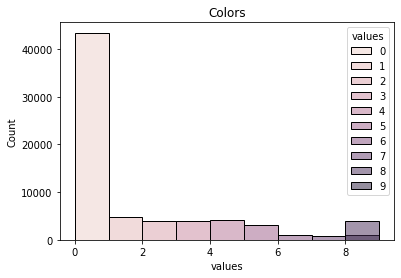

In [7]:
#Input color distribution (bincount):
#Output color distribution (bincount):

sns.histplot(df, x="values",hue="values", binwidth=1.0).set(title="Colors")

In [22]:
print(f"Number of training riddles: {len(training_tasks)}")

Number of training riddles: 400


In [26]:
i = 0
j = 0
for t in Xs_train:
    i += len(t)
for t in Xs_test:
    j += len(t)
print(f"Number of training examples: {i}; with test: {i+j}")

Number of training examples: 1301; with test: 1717


In [30]:
i = 0
for t in Xs_test:
    if len(t) > 1:
        i += 1
print(f"Number of riddles with multiple tests: {i}")

Number of riddles with multiple tests: 14


In [ ]:
#Train examples per riddle (bincount)

In [ ]:
# Heatmap of shapes
#Number of riddles with equal input and output shape: 262
#Number of riddles with strictly smaller output shape: 80
#Number of riddles with strictly greater output shape: 23
#Number of riddles with only single row/column outputs: 12

In [ ]:
#Number of colors per input (bincount):
#Number of colors per output (bincount):

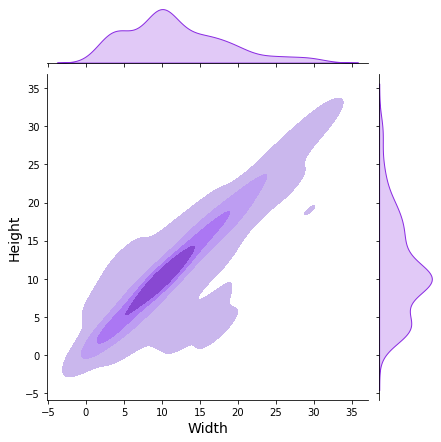

Max grid width, height = 30,30
Min grid width, height = 2,1


In [9]:
heights = [np.shape(matrix)[0] for matrix in matrices]
widths = [np.shape(matrix)[1] for matrix in matrices]
plot = sns.jointplot(x=widths, y=heights, kind="kde", levels=5, color="blueviolet", fill=True)
plot.set_axis_labels("Width", "Height", fontsize=14)
plt.show(plot)
print(f"Max grid width, height = {max(widths)},{max(heights)}")
print(f"Min grid width, height = {min(widths)},{min(heights)}")
#Top 10 input shapes (distinct shapes: 221):
#Top 10 output shapes (distinct shapes: 189):

### Graph isomorphism

### Tags

In [11]:
skill_series = pd.Series(
    [[] for name in sorted(os.listdir(training_path))],
    index = sorted(os.listdir(training_path))
)

# 0-5
skill_series['007bbfb7.json'] = ['image_repetition', 'fractal_repetition']
skill_series['00d62c1b.json'] = ['loop_filling']
skill_series['017c7c7b.json'] = ['recoloring', 'pattern_expansion', 'pattern_repetition', 'image_expansion']
skill_series['025d127b.json'] = ['pattern_modification']
skill_series['045e512c.json'] = ['pattern_expansion', 'direction_guessing']
skill_series['0520fde7.json'] = ['detect_wall', 'separate_images', 'pattern_intersection']

# 6-10
skill_series['05269061.json'] = ['image_filling', 'pattern_expansion', 'diagonals']
skill_series['05f2a901.json'] = ['pattern_moving', 'direction_guessing', 'bring_patterns_close']
skill_series['06df4c85.json'] = ['detect_grid', 'connect_the_dots', 'grid_coloring']
skill_series['08ed6ac7.json'] = ['measure_length', 'order_numbers', 'associate_colors_to_ranks', 'recoloring']
skill_series['09629e4f.json'] = ['detect_grid', 'separate_images', 'count_tiles', 'take_minimum', 'enlarge_image', 'create_grid', 'adapt_image_to_grid']

# 11-15
skill_series['0962bcdd.json'] = ['pattern_expansion']
skill_series['0a938d79.json'] = ['direction_guessing', 'draw_line_from_point', 'pattern_expansion']
skill_series['0b148d64.json'] = ['detect_grid', 'separate_images', 'find_the_intruder', 'crop']
skill_series['0ca9ddb6.json'] = ['pattern_expansion', 'associate_patterns_to_colors']
skill_series['0d3d703e.json'] = ['associate_colors_to_colors']

# 16-20
skill_series['0dfd9992.json'] = ['image_filling', 'pattern_expansion']
skill_series['0e206a2e.json'] = ['associate_patterns_to_patterns', 'pattern_repetition', 'pattern_rotation', 'pattern_reflection', 'pattern_juxtaposition']
skill_series['10fcaaa3.json'] = ['pattern_expansion', 'image_repetition']
skill_series['11852cab.json'] = ['pattern_expansion']
skill_series['1190e5a7.json'] = ['detect_grid', 'count_hor_lines', 'count_ver_lines', 'detect_background_color', 'color_guessing', 'create_image_from_info']

# 21-25
skill_series['137eaa0f.json'] = ['pattern_juxtaposition']
skill_series['150deff5.json'] = ['pattern_coloring', 'pattern_deconstruction', 'associate_colors_to_patterns']
skill_series['178fcbfb.json'] = ['direction_guessing', 'draw_line_from_point']
skill_series['1a07d186.json'] = ['bring_patterns_close', 'find_the_intruder']
skill_series['1b2d62fb.json'] = ['detect_wall', 'separate_images', 'pattern_intersection']

# 26-30
skill_series['1b60fb0c.json'] = ['pattern_deconstruction', 'pattern_rotation', 'pattern_expansion']
skill_series['1bfc4729.json'] = ['pattern_expansion']
skill_series['1c786137.json'] = ['detect_enclosure', 'crop']
skill_series['1caeab9d.json'] = ['pattern_moving', 'pattern_alignment']
skill_series['1cf80156.json'] = ['crop']

# 31-35
skill_series['1e0a9b12.json'] = ['pattern_moving', 'gravity']
skill_series['1e32b0e9.json'] = ['detect_grid', 'separate_images', 'image_repetition', 'pattern_completion']
skill_series['1f0c79e5.json'] = ['pattern_expansion', 'diagonals', 'direction_guessing']
skill_series['1f642eb9.json'] = ['image_within_image', 'projection_unto_rectangle']
skill_series['1f85a75f.json'] = ['crop', 'find_the_intruder']

# 36-40
skill_series['1f876c06.json'] = ['connect_the_dots', 'diagonals']
skill_series['1fad071e.json'] = ['count_patterns', 'associate_images_to_numbers']
skill_series['2013d3e2.json'] = ['pattern_deconstruction', 'crop']
skill_series['2204b7a8.json'] = ['proximity_guessing', 'recoloring']
skill_series['22168020.json'] = ['pattern_expansion']

# 41-45
skill_series['22233c11.json'] = ['pattern_expansion', 'size_guessing']
skill_series['2281f1f4.json'] = ['direction_guessing', 'draw_line_from_point', 'pattern_intersection']
skill_series['228f6490.json'] = ['pattern_moving', 'loop_filling', 'shape_guessing', 'x_marks_the_spot']
skill_series['22eb0ac0.json'] = ['connect_the_dots', 'color_matching']
skill_series['234bbc79.json'] = ['recoloring', 'bring_patterns_close', 'crop']

# 46-50
skill_series['23581191.json'] = ['draw_line_from_point', 'pattern_intersection']
skill_series['239be575.json'] = ['detect_connectedness', 'associate_images_to_bools']
skill_series['23b5c85d.json'] = ['measure_area', 'take_minimum', 'crop']
skill_series['253bf280.json'] = ['connect_the_dots', 'direction_guessing']
skill_series['25d487eb.json'] = ['draw_line_from_point', 'direction_guessing', 'color_guessing']

# 51-55
skill_series['25d8a9c8.json'] = ['detect_hor_lines', 'recoloring', 'remove_noise']
skill_series['25ff71a9.json'] = ['pattern_moving']
skill_series['264363fd.json'] = ['pattern_repetition', 'pattern_juxtaposition', 'draw_line_from_point']
skill_series['272f95fa.json'] = ['detect_grid', 'mimic_pattern', 'grid_coloring']
skill_series['27a28665.json'] = ['associate_colors_to_patterns', 'take_negative', 'associate_images_to_patterns']

# 56-60
skill_series['28bf18c6.json'] = ['crop', 'pattern_repetition']
skill_series['28e73c20.json'] = ['ex_nihilo', 'mimic_pattern']
skill_series['29623171.json'] = ['detect_grid', 'separate_images', 'count_tiles', 'take_maximum', 'grid_coloring']
skill_series['29c11459.json'] = ['draw_line_from_point', 'count_tiles']
skill_series['29ec7d0e.json'] = ['image_filling', 'pattern_expansion', 'detect_grid', 'pattern_repetition']

# 61-65
skill_series['2bcee788.json'] = ['pattern_reflection', 'direction_guessing', 'image_filling', 'background_filling']
skill_series['2bee17df.json'] = ['draw_line_from_border', 'count_tiles', 'take_maximum']
skill_series['2c608aff.json'] = ['draw_line_from_point', 'projection_unto_rectangle']
skill_series['2dc579da.json'] = ['detect_grid', 'find_the_intruder', 'crop']
skill_series['2dd70a9a.json'] = ['draw_line_from_point', 'direction_guessing', 'maze']

# 66-70
skill_series['2dee498d.json'] = ['detect_repetition', 'crop', 'divide_by_n']
skill_series['31aa019c.json'] = ['find_the_intruder', 'remove_noise', 'contouring']
skill_series['321b1fc6.json'] = ['pattern_repetition', 'pattern_juxtaposition']
skill_series['32597951.json'] = ['find_the_intruder', 'recoloring']
skill_series['3345333e.json'] = ['pattern_completion', 'pattern_reflection', 'remove_noise']

# 71-75
skill_series['3428a4f5.json'] = ['detect_wall', 'separate_images', 'pattern_differences']
skill_series['3618c87e.json'] = ['gravity']
skill_series['3631a71a.json'] = ['image_filling', 'pattern_expansion', 'pattern_rotation']
skill_series['363442ee.json'] = ['detect_wall', 'pattern_repetition', 'pattern_juxtaposition']
skill_series['36d67576.json'] = ['pattern_repetition', 'pattern_juxtaposition', 'pattern_reflection', 'pattern_rotation']

# 76-80
skill_series['36fdfd69.json'] = ['recoloring', 'rectangle_guessing']
skill_series['3906de3d.json'] = ['gravity']
skill_series['39a8645d.json'] = ['count_patterns', 'take_maximum', 'crop']
skill_series['39e1d7f9.json'] = ['detect_grid', 'pattern_repetition', 'grid_coloring']
skill_series['3aa6fb7a.json'] = ['pattern_completion', 'pattern_rotation']

# 81-85
skill_series['3ac3eb23.json'] = ['draw_pattern_from_point', 'pattern_repetition']
skill_series['3af2c5a8.json'] = ['image_repetition', 'image_reflection', 'image_rotation']
skill_series['3bd67248.json'] = ['draw_line_from_border', 'diagonals','pattern_repetition']
skill_series['3bdb4ada.json'] = ['recoloring','pattern_repetition', 'holes']
skill_series['3befdf3e.json'] = ['take_negative', 'pattern_expansion']

# 86-90
skill_series['3c9b0459.json'] = ['image_rotation']
skill_series['3de23699.json'] = ['take_negative', 'crop', 'rectangle_guessing']
skill_series['3e980e27.json'] = ['pattern_repetition', 'pattern_juxtaposition', 'direction_guessing', 'pattern_reflection']
skill_series['3eda0437.json'] = ['rectangle_guessing', 'recoloring', 'measure_area', 'take_maximum']
skill_series['3f7978a0.json'] = ['crop', 'rectangle_guessing', 'find_the_intruder']

# 91-95
skill_series['40853293.json'] = ['connect_the_dots']
skill_series['4093f84a.json'] = ['gravity', 'recoloring', 'projection_unto_rectangle']
skill_series['41e4d17e.json'] = ['draw_line_from_point', 'pattern_repetition']
skill_series['4258a5f9.json'] = ['pattern_repetition', 'contouring']
skill_series['4290ef0e.json'] = ['pattern_moving', 'concentric', 'crop']

# 96-100
skill_series['42a50994.json'] = ['remove_noise', 'count_tiles']
skill_series['4347f46a.json'] = ['loop_filling', 'color_guessing']
skill_series['444801d8.json'] = ['pattern_repetition', 'pattern_expansion', 'rectangle_guessing']
skill_series['445eab21.json'] = ['measure_area', 'take_maximum']
skill_series['447fd412.json'] = ['pattern_repetition', 'draw_pattern_from_point', 'pattern_resizing']

# 101-105
skill_series['44d8ac46.json'] = ['loop_filling', 'rectangle_guessing']
skill_series['44f52bb0.json'] = ['detect_symmetry', 'associate_images_to_bools']
skill_series['4522001f.json'] = ['image_rotation', 'pairwise_analogy']
skill_series['4612dd53.json'] = ['pattern_completion', 'rectangle_guessing']
skill_series['46442a0e.json'] = ['image_repetition', 'image_reflection']

# 106-110
skill_series['469497ad.json'] = ['image_resizing', 'draw_line_from_point', 'diagonals']
skill_series['46f33fce.json'] = ['pattern_resizing', 'image_resizing']
skill_series['47c1f68c.json'] = ['detect_grid', 'find_the_intruder', 'crop', 'recolor', 'color_guessing', 'image_repetition', 'image_reflection']
skill_series['484b58aa.json'] = ['image_filling', 'pattern_expansion', 'pattern_repetition']
skill_series['48d8fb45.json'] = ['find_the_intruder', 'crop']

# 111-115
skill_series['4938f0c2.json'] = ['pattern_expansion', 'pattern_rotation', 'pattern_reflection']
skill_series['496994bd.json'] = ['pattern_reflection']
skill_series['49d1d64f.json'] = ['pattern_expansion', 'image_expansion']
skill_series['4be741c5.json'] = ['summarize']
skill_series['4c4377d9.json'] = ['image_repetition', 'image_reflection']

# 116-120
skill_series['4c5c2cf0.json'] = ['pattern_expansion', 'pattern_rotation', 'pattern_reflection']
skill_series['50846271.json'] = ['pattern_completion', 'recoloring']
skill_series['508bd3b6.json'] = ['draw_line_from_point', 'direction_guessing', 'pattern_reflection']
skill_series['50cb2852.json'] = ['holes', 'rectangle_guessing']
skill_series['5117e062.json'] = ['find_the_intruder', 'crop', 'recoloring']

# 121-125
skill_series['5168d44c.json'] = ['direction_guessing', 'recoloring', 'contouring', 'pattern_moving']
skill_series['539a4f51.json'] = ['pattern_expansion', 'image_expansion']
skill_series['53b68214.json'] = ['pattern_expansion', 'image_expansion']
skill_series['543a7ed5.json'] = ['contouring', 'loop_filling']
skill_series['54d82841.json'] = ['pattern_expansion', 'gravity']

# 126-130
skill_series['54d9e175.json'] = ['detect_grid', 'separate_images', 'associate_images_to_images']
skill_series['5521c0d9.json'] = ['pattern_moving', 'measure_length']
skill_series['5582e5ca.json'] = ['count_tiles', 'dominant_color']
skill_series['5614dbcf.json'] = ['remove_noise', 'image_resizing']
skill_series['56dc2b01.json'] = ['gravity', 'direction_guessing', 'pattern_expansion']

# 131-135
skill_series['56ff96f3.json'] = ['pattern_completion', 'rectangle_guessing']
skill_series['57aa92db.json'] = ['draw_pattern_from_point', 'pattern_repetition', 'pattern_resizing']
skill_series['5ad4f10b.json'] = ['color_guessing', 'remove_noise', 'recoloring', 'crop', 'image_resizing']
skill_series['5bd6f4ac.json'] = ['rectangle_guessing', 'crop']
skill_series['5c0a986e.json'] = ['draw_line_from_point', 'diagonals', 'direction_guessing']

# 136-140
skill_series['5c2c9af4.json'] = ['rectangle_guessing', 'pattern_expansion']
skill_series['5daaa586.json'] = ['detect_grid', 'crop', 'draw_line_from_point', 'direction_guessing']
skill_series['60b61512.json'] = ['pattern_completion']
skill_series['6150a2bd.json'] = ['image_rotation']
skill_series['623ea044.json'] = ['draw_line_from_point', 'diagonals']

# 141-145
skill_series['62c24649.json'] = ['image_repetition', 'image_reflection', 'image_rotation']
skill_series['63613498.json'] = ['recoloring', 'compare_image', 'detect_wall']
skill_series['6430c8c4.json'] = ['detect_wall', 'separate_images', 'take_complement', 'pattern_intersection']
skill_series['6455b5f5.json'] = ['measure_area', 'take_maximum', 'take_minimum', 'loop_filling', 'associate_colors_to_ranks']
skill_series['662c240a.json'] = ['separate_images', 'detect_symmetry',  'find_the_intruder', 'crop']

# 146-150
skill_series['67385a82.json'] = ['recoloring', 'measure_area', 'associate_colors_to_bools']
skill_series['673ef223.json'] = ['recoloring', 'draw_line_from_point', 'portals']
skill_series['6773b310.json'] = ['detect_grid', 'separate_images', 'count_tiles', 'associate_colors_to_numbers']
skill_series['67a3c6ac.json'] = ['image_reflection']
skill_series['67a423a3.json'] = ['pattern_intersection', 'contouring']

# 151-155
skill_series['67e8384a.json'] = ['image_repetition', 'image_reflection', 'image_rotation']
skill_series['681b3aeb.json'] = ['pattern_moving', 'jigsaw', 'crop', 'bring_patterns_close']
skill_series['6855a6e4.json'] = ['pattern_moving', 'direction_guessing', 'x_marks_the_spot']
skill_series['68b16354.json'] = ['image_reflection']
skill_series['694f12f3.json'] = ['rectangle_guessing', 'loop_filling', 'measure_area', 'associate_colors_to_ranks']

# 156-160
skill_series['6a1e5592.json'] = ['pattern_moving', 'jigsaw', 'recoloring']
skill_series['6aa20dc0.json'] = ['pattern_repetition', 'pattern_juxtaposition', 'pattern_resizing']
skill_series['6b9890af.json'] = ['pattern_moving', 'pattern_resizing', 'crop', 'x_marks_the_spot']
skill_series['6c434453.json'] = ['replace_pattern']
skill_series['6cdd2623.json'] = ['connect_the_dots', 'find_the_intruder', 'remove_noise']

# 161-165
skill_series['6cf79266.json'] = ['rectangle_guessing', 'recoloring']
skill_series['6d0160f0.json'] = ['detect_grid', 'separate_image', 'find_the_intruder', 'pattern_moving']
skill_series['6d0aefbc.json'] = ['image_repetition', 'image_reflection']
skill_series['6d58a25d.json'] = ['draw_line_from_point']
skill_series['6d75e8bb.json'] = ['rectangle_guessing', 'pattern_completion']

# 166-170
skill_series['6e02f1e3.json'] = ['count_different_colors', 'associate_images_to_numbers']
skill_series['6e19193c.json'] = ['draw_line_from_point', 'direction_guessing', 'diagonals']
skill_series['6e82a1ae.json'] = ['recoloring', 'count_tiles', 'associate_colors_to_numbers']
skill_series['6ecd11f4.json'] = ['color_palette', 'recoloring', 'pattern_resizing', 'crop']
skill_series['6f8cd79b.json'] = ['ex_nihilo', 'contouring']

# 171-175
skill_series['6fa7a44f.json'] = ['image_repetition', 'image_reflection']
skill_series['72322fa7.json'] = ['pattern_repetition', 'pattern_juxtaposition']
skill_series['72ca375d.json'] = ['find_the_intruder', 'detect_symmetry', 'crop']
skill_series['73251a56.json'] = ['image_filling', 'diagonal_symmetry']
skill_series['7447852a.json'] = ['pattern_expansion', 'pairwise_analogy']

# 176-180
skill_series['7468f01a.json'] = ['crop', 'image_reflection']
skill_series['746b3537.json'] = ['crop', 'direction_guessing']
skill_series['74dd1130.json'] = ['image_reflection', 'diagonal_symmetry']
skill_series['75b8110e.json'] = ['separate_images', 'image_juxtaposition']
skill_series['760b3cac.json'] = ['pattern_reflection', 'direction_guessing']

# 181-185
skill_series['776ffc46.json'] = ['recoloring', 'associate_colors_to_patterns', 'detect_enclosure', 'find_the_intruder']
skill_series['77fdfe62.json'] = ['recoloring', 'color_guessing', 'detect_grid', 'crop']
skill_series['780d0b14.json'] = ['detect_grid', 'summarize']
skill_series['7837ac64.json'] = ['detect_grid', 'color_guessing', 'grid_coloring', 'crop', 'extrapolate_image_from_grid']
skill_series['794b24be.json'] = ['count_tiles', 'associate_images_to_numbers']

# 186-190
skill_series['7b6016b9.json'] = ['loop_filling', 'background_filling', 'color_guessing']
skill_series['7b7f7511.json'] = ['separate_images', 'detect_repetition', 'crop']
skill_series['7c008303.json'] = ['color_palette', 'detect_grid', 'recoloring', 'color_guessing', 'separate_images', 'crop']
skill_series['7ddcd7ec.json'] = ['draw_line_from_point', 'direction_guessing', 'diagonals']
skill_series['7df24a62.json'] = ['pattern_repetition', 'pattern_rotation', 'pattern_juxtaposition', 'out_of_boundary']

# 191-195
skill_series['7e0986d6.json'] = ['color_guessing', 'remove_noise']
skill_series['7f4411dc.json'] = ['rectangle_guessing', 'remove_noise']
skill_series['7fe24cdd.json'] = ['image_repetition', 'image_rotation']
skill_series['80af3007.json'] = ['crop', 'pattern_resizing', 'image_resizing', 'fractal_repetition']
skill_series['810b9b61.json'] = ['recoloring', 'detect_closed_curves']

# 196-200
skill_series['82819916.json'] = ['pattern_repetition', 'color_guessing', 'draw_line_from_point', 'associate_colors_to_colors']
skill_series['83302e8f.json'] = ['detect_grid', 'detect_closed_curves', 'rectangle_guessing', 'associate_colors_to_bools', 'loop_filling']
skill_series['834ec97d.json'] = ['draw_line_from_border', 'pattern_repetition', 'spacing', 'measure_distance_from_side']
skill_series['8403a5d5.json'] = ['draw_line_from_point', 'pattern_repetition', 'direction_guessing']
skill_series['846bdb03.json'] = ['pattern_moving', 'pattern_reflection', 'crop', 'color_matching', 'x_marks_the_spot']

# 201-205
skill_series['855e0971.json'] = ['draw_line_from_point', 'direction_guessing', 'separate_images', 'holes']
skill_series['85c4e7cd.json'] = ['color_guessing', 'recoloring', 'color_permutation']
skill_series['868de0fa.json'] = ['loop_filling', 'color_guessing', 'measure_area', 'even_or_odd', 'associate_colors_to_bools']
skill_series['8731374e.json'] = ['rectangle_guessing', 'crop', 'draw_line_from_point']
skill_series['88a10436.json'] = ['pattern_repetition', 'pattern_juxtaposition']

# 206-210
skill_series['88a62173.json'] = ['detect_grid', 'separate_images', 'find_the_intruder', 'crop']
skill_series['890034e9.json'] = ['pattern_repetition', 'rectangle_guessing', 'contouring']
skill_series['8a004b2b.json'] = ['pattern_repetition', 'pattern_resizing', 'pattern_juxtaposition', 'rectangle_guessing', 'crop']
skill_series['8be77c9e.json'] = ['image_repetition', 'image_reflection']
skill_series['8d5021e8.json'] = ['image_repetition', 'image_reflection']

# 211-215
skill_series['8d510a79.json'] = ['draw_line_from_point', 'detect_wall', 'direction_guessing', 'associate_colors_to_bools']
skill_series['8e1813be.json'] = ['recoloring', 'color_guessing', 'direction_guesing' 'crop', 'image_within_image']
skill_series['8e5a5113.json'] = ['detect_wall', 'separate_images', 'image_repetition', 'image_rotation']
skill_series['8eb1be9a.json'] = ['pattern_repetition', 'image_filling']
skill_series['8efcae92.json'] = ['separate_images', 'rectangle_guessing', 'count_tiles', 'take_maximum', 'crop']

# 216-220
skill_series['8f2ea7aa.json'] = ['crop', 'fractal_repetition']
skill_series['90c28cc7.json'] = ['crop', 'rectangle_guessing', 'summarize']
skill_series['90f3ed37.json'] = ['pattern_repetition', 'recoloring']
skill_series['913fb3ed.json'] = ['contouring', 'associate_colors_to_colors']
skill_series['91413438.json'] = ['count_tiles', 'algebra', 'image_repetition']

# 221-225
skill_series['91714a58.json'] = ['find_the_intruder', 'remove_noise']
skill_series['9172f3a0.json'] = ['image_resizing']
skill_series['928ad970.json'] = ['rectangle_guessing', 'color_guessing', 'draw_rectangle']
skill_series['93b581b8.json'] = ['pattern_expansion', 'color_guessing', 'out_of_boundary']
skill_series['941d9a10.json'] = ['detect_grid', 'loop_filling', 'pairwise_analogy']

# 226-230
skill_series['94f9d214.json'] = ['separate_images', 'take_complement', 'pattern_intersection']
skill_series['952a094c.json'] = ['rectangle_guessing', 'inside_out']
skill_series['9565186b.json'] = ['separate_shapes', 'count_tiles', 'recoloring', 'take_maximum', 'associate_color_to_bools']
skill_series['95990924.json'] = ['pattern_expansion']
skill_series['963e52fc.json'] = ['image_expansion', 'pattern_expansion']

# 231-235
skill_series['97999447.json'] = ['draw_line_from_point', 'pattern_expansion']
skill_series['97a05b5b.json'] = ['pattern_moving', 'pattern_juxtaposition', 'crop', 'shape_guessing']
skill_series['98cf29f8.json'] = ['pattern_moving', 'bring_patterns_close']
skill_series['995c5fa3.json'] = ['take_complement', 'detect_wall', 'separate_images', 'associate_colors_to_images', 'summarize']
skill_series['99b1bc43.json'] = ['take_complement', 'detect_wall', 'separate_images', 'pattern_intersection']

# 236-240
skill_series['99fa7670.json'] = ['draw_line_from_point', 'pattern_expansion']
skill_series['9aec4887.json'] = ['pattern_moving', 'x_marks_the_spot', 'crop', 'recoloring', 'color_guessing']
skill_series['9af7a82c.json'] = ['separate_images', 'count_tiles', 'summarize', 'order_numbers']
skill_series['9d9215db.json'] = ['pattern_expansion', 'pattern_reflection', 'pattern_rotation']
skill_series['9dfd6313.json'] = ['image_reflection', 'diagonal_symmetry']

# 241-245
skill_series['9ecd008a.json'] = ['image_filling', 'pattern_expansion', 'pattern_reflection', 'pattern_rotation', 'crop']
skill_series['9edfc990.json'] = ['background_filling', 'holes']
skill_series['9f236235.json'] = ['detect_grid', 'summarize', 'image_reflection']
skill_series['a1570a43.json'] = ['pattern_moving', 'rectangle_guessing', 'x_marks_the_spot']
skill_series['a2fd1cf0.json'] = ['connect_the_dots']

# 246-250
skill_series['a3325580.json'] = ['separate_shapes', 'count_tiles', 'take_maximum', 'summarize', 'remove_intruders']
skill_series['a3df8b1e.json'] = ['pattern_expansion', 'draw_line_from_point', 'diagonals', 'bounce']
skill_series['a416b8f3.json'] = ['image_repetition']
skill_series['a48eeaf7.json'] = ['pattern_moving', 'bring_patterns_close', 'gravity', 'direction_guessing']
skill_series['a5313dff.json'] = ['loop_filling']

# 251-255
skill_series['a5f85a15.json'] = ['recoloring', 'pattern_modification', 'pairwise_analogy']
skill_series['a61ba2ce.json'] = ['pattern_moving', 'bring_patterns_close', 'crop', 'jigsaw']
skill_series['a61f2674.json'] = ['separate_shapes', 'count_tiles', 'take_maximum', 'take_minimum', 'recoloring', 'associate_colors_to_ranks', 'remove_intruders']
skill_series['a64e4611.json'] = ['background_filling', 'rectangle_guessing']
skill_series['a65b410d.json'] = ['pattern_expansion', 'count_tiles', 'associate_colors_to_ranks']

# 256-260
skill_series['a68b268e.json'] = ['detect_grid', 'separate_images', 'pattern_juxtaposition']
skill_series['a699fb00.json'] = ['pattern_expansion', 'connect_the_dots']
skill_series['a740d043.json'] = ['crop', 'detect_background_color', 'recoloring']
skill_series['a78176bb.json'] = ['draw_parallel_line', 'direction_guessing', 'remove_intruders']
skill_series['a79310a0.json'] = ['pattern_moving', 'recoloring', 'pairwise_analogy']

# 261-265
skill_series['a85d4709.json'] = ['separate_images', 'associate_colors_to_images', 'summarize']
skill_series['a87f7484.json'] = ['separate_images', 'find_the_intruder', 'crop']
skill_series['a8c38be5.json'] = ['pattern_moving', 'jigsaw', 'crop']
skill_series['a8d7556c.json'] = ['recoloring', 'rectangle_guessing']
skill_series['a9f96cdd.json'] = ['replace_pattern', 'out_of_boundary']

# 266-270
skill_series['aabf363d.json'] = ['recoloring', 'color_guessing', 'remove_intruders']
skill_series['aba27056.json'] = ['pattern_expansion', 'draw_line_from_point', 'diagonals']
skill_series['ac0a08a4.json'] = ['image_resizing', 'count_tiles', 'size_guessing']
skill_series['ae3edfdc.json'] = ['bring_patterns_close', 'gravity']
skill_series['ae4f1146.json'] = ['separate_images', 'count_tiles', 'crop']

# 271-275
skill_series['aedd82e4.json'] = ['recoloring', 'separate_shapes', 'count_tiles', 'take_minimum', 'associate_colors_to_bools']
skill_series['af902bf9.json'] = ['ex_nihilo', 'x_marks_the_spot']
skill_series['b0c4d837.json'] = ['measure_length', 'associate_images_to_numbers']
skill_series['b190f7f5.json'] = ['separate_images', 'image_expasion', 'color_palette', 'image_resizing', 'replace_pattern']
skill_series['b1948b0a.json'] = ['recoloring', 'associate_colors_to_colors']

# 276-280
skill_series['b230c067.json'] = ['recoloring', 'separate_shapes', 'find_the_intruder', 'associate_colors_to_bools']
skill_series['b27ca6d3.json'] = ['find_the_intruder', 'count_tiles', 'contouring']
skill_series['b2862040.json'] = ['recoloring', 'detect_closed_curves', 'associate_colors_to_bools']
skill_series['b527c5c6.json'] = ['pattern_expansion', 'draw_line_from_point', 'contouring', 'direction_guessing', 'size_guessing']
skill_series['b548a754.json'] = ['pattern_expansion', 'pattern_modification', 'x_marks_the_spot']

# 281-285
skill_series['b60334d2.json'] = ['replace_pattern']
skill_series['b6afb2da.json'] = ['recoloring', 'replace_pattern', 'rectangle_guessing']
skill_series['b7249182.json'] = ['pattern_expansion']
skill_series['b775ac94.json'] = ['pattern_expansion', 'pattern_repetition', 'recoloring', 'pattern_rotation', 'pattern_reflection', 'direction_guessing', 'pattern_juxtaposition']
skill_series['b782dc8a.json'] = ['pattern_expansion', 'maze']

# 286-290
skill_series['b8825c91.json'] = ['pattern_completion', 'pattern_rotation', 'pattern_reflection']
skill_series['b8cdaf2b.json'] = ['pattern_expansion', 'draw_line_from_point', 'diagonals', 'pairwise_analogy']
skill_series['b91ae062.json'] = ['image_resizing', 'size_guessing', 'count_different_colors']
skill_series['b94a9452.json'] = ['crop', 'take_negative']
skill_series['b9b7f026.json'] = ['find_the_intruder', 'summarize']

# 291-295
skill_series['ba26e723.json'] = ['pattern_modification', 'pairwise_analogy', 'recoloring']
skill_series['ba97ae07.json'] = ['pattern_modification', 'pairwise_analogy', 'rettangle_guessing', 'recoloring']
skill_series['bb43febb.json'] = ['loop_filling', 'rettangle_guessing']
skill_series['bbc9ae5d.json'] = ['pattern_expansion', 'image_expansion']
skill_series['bc1d5164.json'] = ['pattern_moving', 'pattern_juxtaposition', 'crop', 'pairwise_analogy']

# 296-300
skill_series['bd4472b8.json'] = ['detect_wall', 'pattern_expansion', 'ex_nihilo', 'color_guessing', 'color_palette']
skill_series['bda2d7a6.json'] = ['recoloring', 'pairwise_analogy', 'pattern_modification', 'color_permutation']
skill_series['bdad9b1f.json'] = ['draw_line_from_point', 'direction_guessing', 'recoloring', 'take_intersection']
skill_series['be94b721.json'] = ['separate_shapes', 'count_tiles', 'take_maximum', 'crop']
skill_series['beb8660c.json'] = ['pattern_moving', 'count_tiles', 'order_numbers']

# 301-305
skill_series['c0f76784.json'] = ['loop_filling', 'measure_area', 'associate_colors_to_numbers']
skill_series['c1d99e64.json'] = ['draw_line_from_border', 'detect_grid']
skill_series['c3e719e8.json'] = ['image_repetition', 'image_expansion', 'count_different_colors', 'take_maximum']
skill_series['c3f564a4.json'] = ['pattern_expansion', 'image_filling']
skill_series['c444b776.json'] = ['detect_grid', 'separate_images', 'find_the_intruder', 'image_repetition']

# 306-310
skill_series['c59eb873.json'] = ['image_resizing']
skill_series['c8cbb738.json'] = ['pattern_moving', 'jigsaw', 'crop']
skill_series['c8f0f002.json'] = ['recoloring', 'associate_colors_to_colors']
skill_series['c909285e.json'] = ['find_the_intruder', 'crop', 'rectangle_guessing']
skill_series['c9e6f938.json'] = ['image_repetition', 'image_reflection']

# 311-315
skill_series['c9f8e694.json'] = ['recoloring', 'pattern_repetition', 'color_palette']
skill_series['caa06a1f.json'] = ['pattern_expansion', 'image_filling']
skill_series['cbded52d.json'] = ['detect_grid', 'separate_images', 'pattern_modification', 'pattern_repetition', 'pattern_juxtaposition', 'connect_the_dots']
skill_series['cce03e0d.json'] = ['image_repetition', 'image_expansion', 'pairwise_analogy']
skill_series['cdecee7f.json'] = ['summarize', 'pairwise_analogy']

# 316-320
skill_series['ce22a75a.json'] = ['replace_pattern']
skill_series['ce4f8723.json'] = ['detect_wall', 'separate_images', 'take_complement', 'take_intersection']
skill_series['ce602527.json'] = ['crop', 'size_guessing', 'shape_guessing', 'find_the_intruder', 'remove_intruder']
skill_series['ce9e57f2.json'] = ['recoloring', 'count_tiles', 'take_half']
skill_series['cf98881b.json'] = ['detect_wall', 'separate_images', 'pattern_juxtaposition']

# 321-325
skill_series['d037b0a7.json'] = ['pattern_expansion', 'draw_line_from_point']
skill_series['d06dbe63.json'] = ['pattern_expansion', 'pairwise_analogy']
skill_series['d07ae81c.json'] = ['draw_line_from_point', 'diagonals', 'color_guessing']
skill_series['d0f5fe59.json'] = ['separate_shapes', 'count_shapes', 'associate_images_to_numbers', 'pairwise_analogy']
skill_series['d10ecb37.json'] = ['crop']

# 326-330
skill_series['d13f3404.json'] = ['image_expansion', 'draw_line_from_point', 'diagonals']
skill_series['d22278a0.json'] = ['pattern_expansion', 'pairwise_analogy']
skill_series['d23f8c26.json'] = ['crop', 'image_expansion']
skill_series['d2abd087.json'] = ['separate_shapes', 'count_tiles', 'associate_colors_to_numbers', 'recoloring']
skill_series['d364b489.json'] = ['pattern_expansion']

# 331-335
skill_series['d406998b.json'] = ['recoloring', 'one_yes_one_no', 'cylindrical']
skill_series['d43fd935.json'] = ['draw_line_from_point', 'direction_guessing', 'projection_unto_rectangle']
skill_series['d4469b4b.json'] = ['dominant_color', 'associate_images_to_colors']
skill_series['d4a91cb9.json'] = ['connect_the_dots', 'direction_guessing']
skill_series['d4f3cd78.json'] = ['rectangle_guessing', 'recoloring', 'draw_line_from_point']

# 336-340
skill_series['d511f180.json'] = ['associate_colors_to_colors']
skill_series['d5d6de2d.json'] = ['loop_filling', 'replace_pattern', 'remove_intruders']
skill_series['d631b094.json'] = ['count_tiles', 'dominant_color', 'summarize']
skill_series['d687bc17.json'] = ['bring_patterns_close', 'gravity', 'direction_guessing', 'find_the_intruder', 'remove_intruders']
skill_series['d6ad076f.json'] = ['bridges', 'connect_the_dots', 'draw_line_from_point']

# 341-345
skill_series['d89b689b.json'] = ['pattern_juxtaposition', 'summarize', 'direction_guessing']
skill_series['d8c310e9.json'] = ['pattern_expansion', 'pattern_repetition', 'pattern_completion']
skill_series['d90796e8.json'] = ['replace_pattern']
skill_series['d9f24cd1.json'] = ['draw_line_from_point', 'gravity', 'obstacles']
skill_series['d9fac9be.json'] = ['find_the_intruder', 'summarize', 'x_marks_the_spot']

# 346-350
skill_series['dae9d2b5.json'] = ['pattern_juxtaposition', 'separate_images', 'recoloring']
skill_series['db3e9e38.json'] = ['pattern_expansion', 'out_of_boundary']
skill_series['db93a21d.json'] = ['contouring', 'draw_line_from_point', 'measure_area', 'measure_length', 'algebra']
skill_series['dbc1a6ce.json'] = ['connect_the_dots']
skill_series['dc0a314f.json'] = ['pattern_completion', 'crop']

# 351-355
skill_series['dc1df850.json'] = ['contouring', 'pattern_expansion', 'out_of_boundary']
skill_series['dc433765.json'] = ['pattern_moving', 'direction_guessing', 'only_one']
skill_series['ddf7fa4f.json'] = ['color_palette', 'recoloring']
skill_series['de1cd16c.json'] = ['separate_images', 'count_tiles', 'take_maximum', 'summarize']
skill_series['ded97339.json'] = ['connect_the_dots']

# 356-360
skill_series['e179c5f4.json'] = ['pattern_expansion', 'bouncing']
skill_series['e21d9049.json'] = ['pattern_expansion', 'draw_line_from_point', 'color_palette']
skill_series['e26a3af2.json'] = ['remove_noise', 'separate_images']
skill_series['e3497940.json'] = ['detect_wall', 'separate_images', 'image_reflection', 'image_juxtaposition']
skill_series['e40b9e2f.json'] = ['pattern_expansion', 'pattern_reflection', 'pattern_rotation']

# 361-365
skill_series['e48d4e1a.json'] = ['count_tiles', 'pattern_moving', 'detect_grid', 'out_of_boundary']
skill_series['e5062a87.json'] = ['pattern_repetition', 'pattern_juxtaposition']
skill_series['e509e548.json'] = ['recoloring', 'associate_colors_to_shapes', 'homeomorphism']
skill_series['e50d258f.json'] = ['separate_images', 'detect_background_color', 'crop', 'count_tiles', 'take_maximum']
skill_series['e6721834.json'] = ['pattern_moving', 'pattern_juxtaposition', 'crop']

# 366-370
skill_series['e73095fd.json'] = ['loop_filling', 'rectangle_guessing']
skill_series['e76a88a6.json'] = ['pattern_repetition', 'pattern_juxtaposition']
skill_series['e8593010.json'] = ['holes', 'count_tiles', 'loop_filling', 'associate_colors_to_numbers']
skill_series['e8dc4411.json'] = ['pattern_expansion', 'direction_guessing']
skill_series['e9614598.json'] = ['pattern_expansion', 'direction_guessing', 'measure_length']

# 371-375
skill_series['e98196ab.json'] = ['detect_wall', 'separate_images', 'image_juxtaposition']
skill_series['e9afcf9a.json'] = ['pattern_modification']
skill_series['ea32f347.json'] = ['separate_shapes', 'count_tiles', 'recoloring', 'associate_colors_to_ranks']
skill_series['ea786f4a.json'] = ['pattern_modification', 'draw_line_from_point', 'diagonals']
skill_series['eb281b96.json'] = ['image_repetition', 'image_reflection']

# 376-380
skill_series['eb5a1d5d.json'] = ['summarize']
skill_series['ec883f72.json'] = ['pattern_expansion', 'draw_line_from_point', 'diagonals']
skill_series['ecdecbb3.json'] = ['pattern_modification', 'draw_line_from_point']
skill_series['ed36ccf7.json'] = ['image_rotation']
skill_series['ef135b50.json'] = ['draw_line_from_point', 'bridges', 'connect_the_dots']

# 381-385
skill_series['f15e1fac.json'] = ['draw_line_from_point', 'gravity', 'obstacles', 'direction_guessing']
skill_series['f1cefba8.json'] = ['draw_line_from_point', 'pattern_modification']
skill_series['f25fbde4.json'] = ['crop', 'image_resizing']
skill_series['f25ffba3.json'] = ['pattern_repetition', 'pattern_reflection']
skill_series['f2829549.json'] = ['detect_wall', 'separate_images', 'take_complement', 'pattern_intersection']

# 386-390
skill_series['f35d900a.json'] = ['pattern_expansion']
skill_series['f5b8619d.json'] = ['pattern_expansion', 'draw_line_from_point', 'image_repetition']
skill_series['f76d97a5.json'] = ['take_negative', 'recoloring', 'associate_colors_to_colors']
skill_series['f8a8fe49.json'] = ['pattern_moving', 'pattern_reflection']
skill_series['f8b3ba0a.json'] = ['detect_grid', 'find_the_intruder', 'dominant_color', 'count_tiles', 'summarize', 'order_numbers']

# 391-395
skill_series['f8c80d96.json'] = ['pattern_expansion', 'background_filling']
skill_series['f8ff0b80.json'] = ['separate_shapes', 'count_tiles', 'summarize', 'order_numbers']
skill_series['f9012d9b.json'] = ['pattern_expansion', 'pattern_completion', 'crop']
skill_series['fafffa47.json'] = ['separate_images', 'take_complement', 'pattern_intersection']
skill_series['fcb5c309.json'] = ['rectangle_guessing', 'separate_images', 'count_tiles', 'take_maximum', 'crop', 'recoloring']

# 396-399
skill_series['fcc82909.json'] = ['pattern_expansion', 'separate_images', 'count_different_colors']
skill_series['feca6190.json'] = ['pattern_expansion', 'image_expansion', 'draw_line_from_point', 'diagonals']
skill_series['ff28f65a.json'] = ['count_shapes', 'associate_images_to_numbers']
skill_series['ff805c23.json'] = ['pattern_expansion', 'pattern_completion', 'crop']

print(skill_series.head(10))
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
skill_df = pd.DataFrame(mlb.fit_transform(skill_series), columns=mlb.classes_)

print("{} different tags were used.".format(len(skill_df.columns)))

007bbfb7.json               [image_repetition, fractal_repetition]
00d62c1b.json                                       [loop_filling]
017c7c7b.json    [recoloring, pattern_expansion, pattern_repeti...
025d127b.json                               [pattern_modification]
045e512c.json              [pattern_expansion, direction_guessing]
0520fde7.json    [detect_wall, separate_images, pattern_interse...
05269061.json        [image_filling, pattern_expansion, diagonals]
05f2a901.json    [pattern_moving, direction_guessing, bring_pat...
06df4c85.json       [detect_grid, connect_the_dots, grid_coloring]
08ed6ac7.json    [measure_length, order_numbers, associate_colo...
dtype: object
132 different tags were used.


On average, 2.7925 tags were used per task.


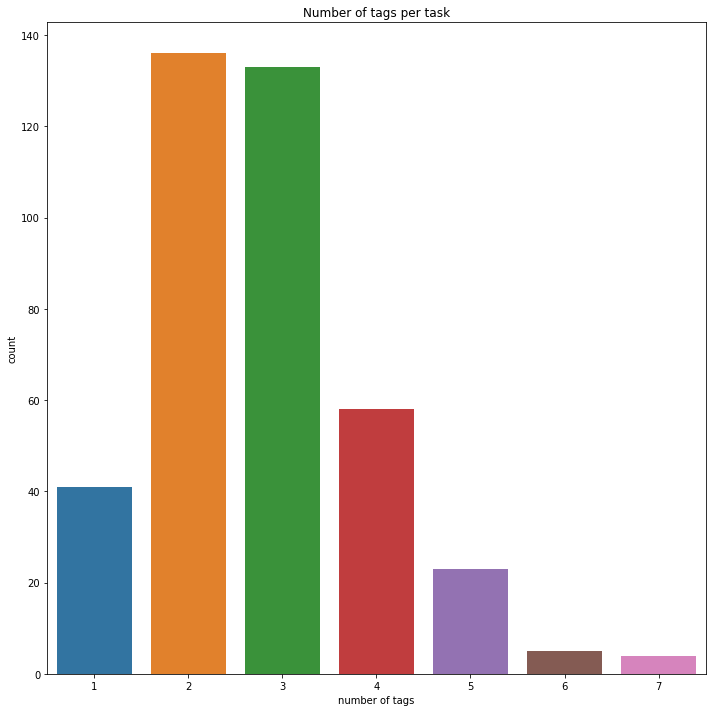

In [12]:
count_tags = pd.DataFrame({
    'task': skill_series.index,
    'count': skill_series.apply(len).values
})

print("On average, {} tags were used per task.".format(count_tags['count'].mean()))

barplot_df = pd.DataFrame({
    'number of tags': count_tags.groupby('count').count().index,
    'count': count_tags.groupby('count').count().task
})

plt.figure(figsize=(10, 10))
sns.barplot(x="number of tags", y="count", data=barplot_df)
plt.title('Number of tags per task')
plt.tight_layout()
plt.show()

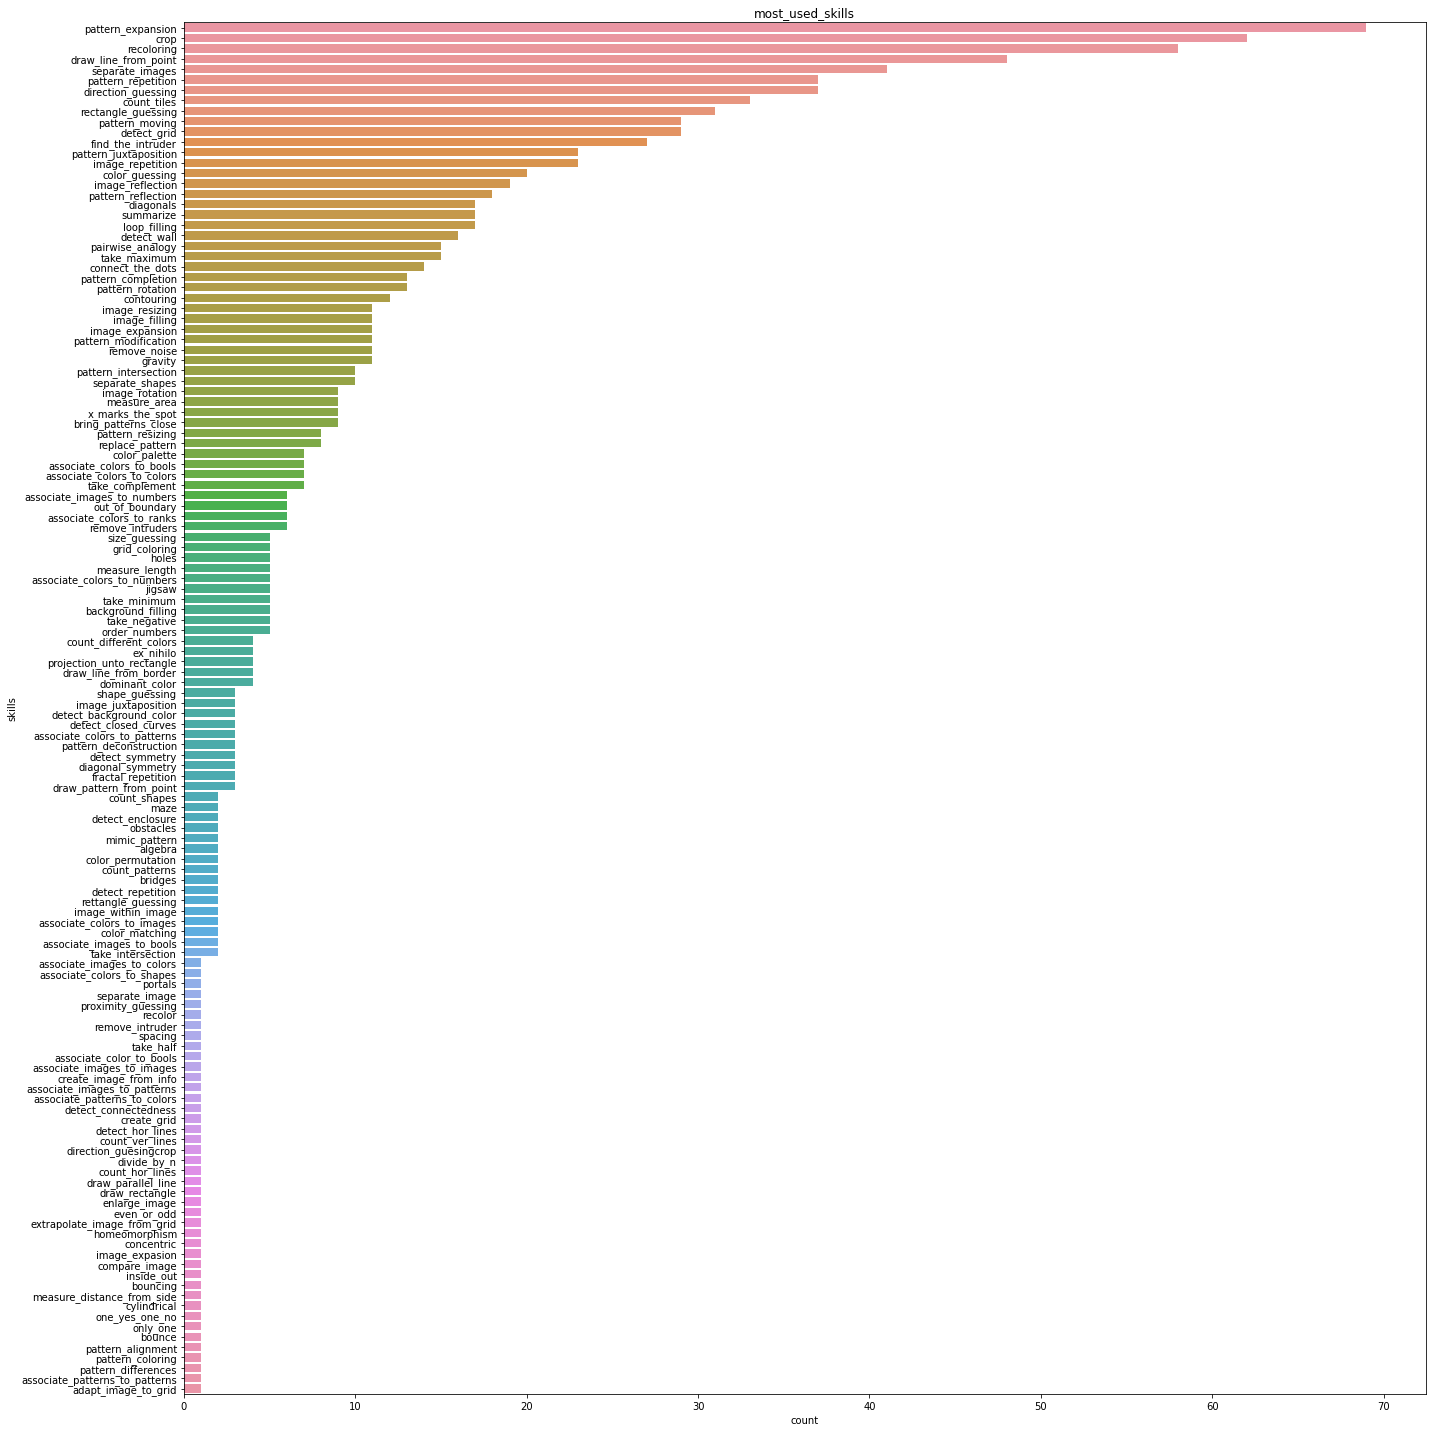

In [13]:
barplot_df = pd.DataFrame({
    'skills': [skill for skill in skill_df.columns],
    'count': [skill_df[skill].sum() for skill in skill_df.columns]
})
plt.figure(figsize=(20, 20))
sns.barplot(x="count", y="skills", data=barplot_df.sort_values(by='count', ascending=False))
plt.title('most_used_skills')
plt.tight_layout()
plt.show()

<AxesSubplot:>

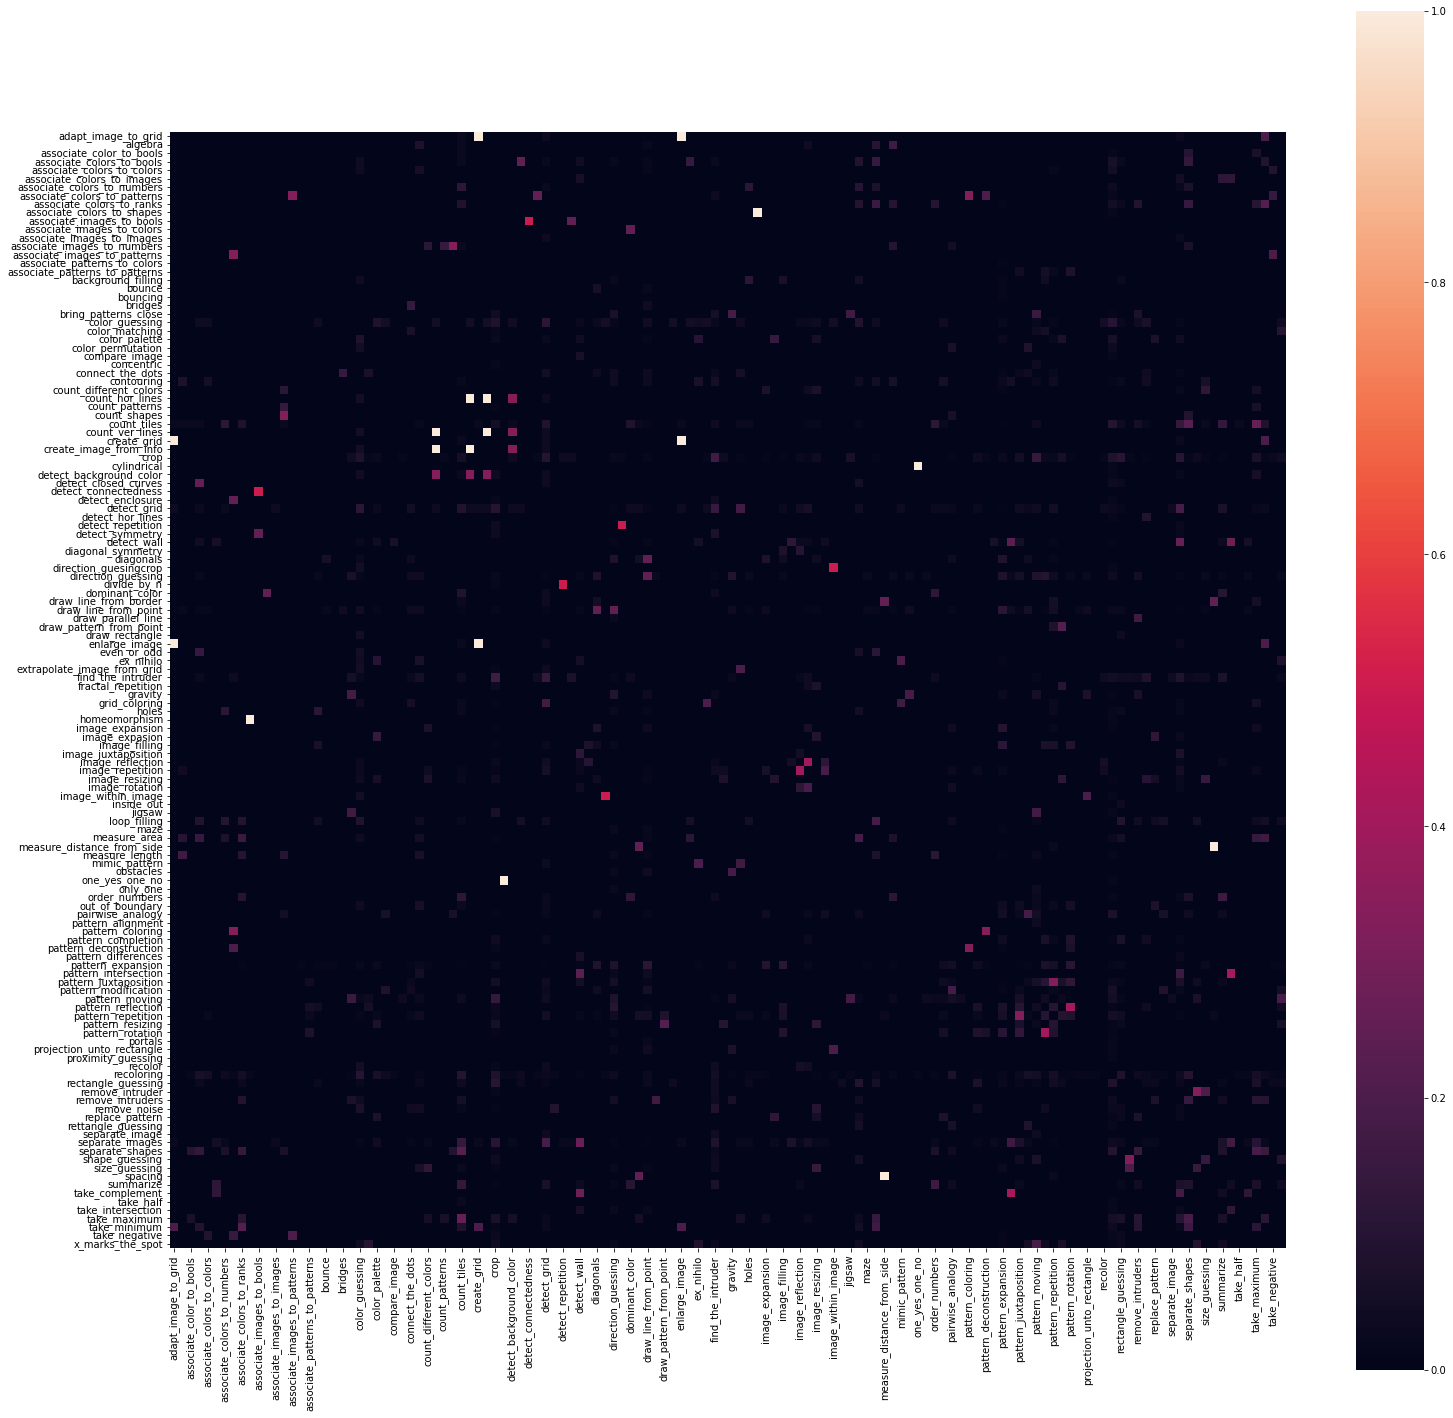

In [14]:
def count_pair(skill_a, skill_b):
    if skill_a != skill_b:
        intersection = skill_df[skill_a] * skill_df[skill_b]
        union = 1 - (1 - skill_df[skill_a]) * (1 - skill_df[skill_b])
        return intersection.sum() / union.sum()
    else:
        return 0 # ignore self correlation

mat = pd.DataFrame({col:[count_pair(col, col_b) for col_b in skill_df.columns] for col in skill_df.columns}, index=skill_df.columns)

plt.subplots(figsize=(25,25))
sns.heatmap(mat, square=True)
# TODO what are the most common tag pairs?

### Objects

In [15]:
COLORMAP = {0: 0, 1: 4, 2: 1, 3: 2, 4: 3, 5: 8, 6: 5, 7: 166, 8: 6, 9: 52}

class Board():
    __root__: list[list[int]]

    @property
    def data(self):
        return self.__root__
    
    def set_data(self, img):
        self.__root__ = img

    @property
    def data_flat(self):
        return list(itt.chain.from_iterable(self.data))

    @property
    def np(self) -> np.ndarray:
        return np.array(self.data, dtype=np.int64)

    @property
    def num_rows(self) -> int:
        return len(self.data)

    @property
    def num_cols(self) -> int:
        return len(self.data[0])

    @property
    def shape(self) -> tuple[int, int]:
        return (self.num_rows, self.num_cols)

    @property
    def flat(self) -> list[int]:
        return list(itt.chain.from_iterable(self.data))

    @property
    def unique_values(self) -> set[int]:
        return set(self.flat)

    @property
    def num_unique_values(self) -> int:
        return len(self.unique_values)

    def fmt_cell(self, row: int, col: int, colored=False) -> str:
        value = self.data[row][col]
        color = COLORMAP[value]
        value_str = f"{CELL_PADDING_STR}{value}{CELL_PADDING_STR}"
        if colored:
            return f"{fg(15)}{bg(color)}{value_str}{attr(0)}"
        else:
            return value_str

    def fmt_row(self, row: int, colored=False) -> str:
        return "".join(
            self.fmt_cell(row, col, colored=colored)
            for col in range(len(self.data[row]))
        )

    def fmt_empty_row(self):
        return "".join(
            f"{CELL_PADDING_STR} {CELL_PADDING_STR}" for _ in range(self.num_cols)
        )

    def fmt(self, colored=False) -> str:
        return "\n".join(
            self.fmt_row(row, colored=colored) for row in range(len(self.data))
        )

class Point:

    def __init__(self, *args):
        if len(args) == 0:
            x, y = 0, 0
        elif len(args) == 1 and isinstance(args[0], tuple) and len(args[0]) == 2:
            x, y = args[0]
        elif len(args) == 1 and isinstance(args[0], Point):
            x, y = args[0].x, args[0].y
        elif len(args) == 2 and type(args[0]) is int and type(args[1]) is int:
            x, y = args
        else:
            raise ValueError("Invalid arguments for Point constructor")

        self.x = int(x)
        self.y = int(y)

    def copy(self):
        return Point(self.x, self.y)

    def __add__(self, other):
        return Point(self.x + other.x, self.y + other.y)

    def __sub__(self, other):
        return Point(self.x - other.x, self.y - other.y)

    def __mul__(self, other):
        if isinstance(other, (int, float)):
            return Point(self.x * other, self.y * other)
        return Point(self.x * other.x, self.y * other.y)

    def __div__(self, f: int):
        assert self.x % f == 0 and self.y % f == 0
        return Point(self.x / f, self.y / f)

    def __floordiv__(self, f: int):
        return Point(self.x // f, self.y // f)

    def __eq__(self, other: object) -> bool:
        return self.x == other.x and self.y == other.y

    def __ne__(self, other: object) -> bool:
        return self.x != other.x or self.y != other.y

    def cross(self, other) -> int:
        return self.x * other.y - self.y * other.x

    def __str__(self):
        return f"({self.x}, {self.y})"

    def astuple(self):
        return self.x, self.y

    def __iter__(self):
        return iter(self.astuple())

    def __getitem__(self, key):
        if key == 0 or key == "x":
            return self.x
        elif key == 1 or key == "y":
            return self.y

        raise IndexError("Index out of range.")
        
class Image:
    @staticmethod
    def from_board(board: Board):
        return Image(Point(), Point(board.num_cols, board.num_rows), board.flat)

    def __init__(self, *args):
        if len(args) == 3:
            p = Point(args[0])
            sz = Point(args[1])
            mask = list(args[2])
        else:
            raise ValueError("Invalid number of arguments for Image constructor")

        self.p = p
        self.sz = sz
        self.mask = mask

    @property
    def x(self) -> int:
        return self.p.x

    @x.setter
    def x(self, value: int):
        self.p.x = value

    @property
    def y(self) -> int:
        return self.p.y

    @y.setter
    def y(self, value: int):
        self.p.y = value

    @property
    def w(self) -> int:
        return self.sz.x

    @w.setter
    def w(self, value: int):
        self.sz.x = value

    @property
    def h(self) -> int:
        return self.sz.y

    @h.setter
    def h(self, value: int):
        self.sz.y = value

    @property
    def area(self):
        return self.w * self.h

    def __getitem__(self, key) -> int:
        i, j = key
        assert i >= 0 and j >= 0 and i < self.h and j < self.w
        return self.mask[i * self.w + j]

    def __setitem__(self, key, value: int):
        i, j = key
        assert i >= 0 and j >= 0 and i < self.h and j < self.w
        self.mask[i * self.w + j] = value

    def safe(self, i: int, j: int) -> int:
        return 0 if i < 0 or j < 0 or i >= self.h or j >= self.w else self.mask[i * self.w + j]

    def __eq__(self, other: object) -> bool:
        return self.p == other.p and self.sz == other.sz and self.mask == other.mask

    def __ne__(self, other: object) -> bool:
        return not (self == other)

    def __lt__(self, other):
        if self.sz != other.sz:
            return (self.w, self.h) < (other.w, other.h)
        return self.mask < other.mask

    def __hash__(self):
        base = 137
        r = 1543
        r = r * base + self.w
        r = r * base + self.h
        r = r * base + self.x
        r = r * base + self.y
        for c in self.mask:
            r = r * base + c
        return r

    def __str__(self) -> str:
        return f"{self.x}:{self.y} {self.w}x{self.h}"

    def map(self, fn):
        mapped = [fn(i, j, self[i, j]) for i in range(self.h) for j in range(self.w)]
        return Image(self.p, self.sz, mapped)

    def copy(self):
        return Image(self.p, self.sz, self.mask.copy())

    @property
    def np(self) -> np.ndarray:
        return np.array(self.mask, dtype=np.int64).reshape(self.h, self.w)

    def to_board(self) -> Board:
        data = [[self[(i, j)] for j in range(self.w)] for i in range(self.h)]
        return Board.parse_obj(data)

    def fmt(self, colored=False) -> str:
        return self.to_board().fmt(colored=colored)

In [16]:
def full(*args):
    filling = 0
    if len(args) == 1:
        p = Point(0, 0)
        sz = Point(args[0])
    elif len(args) == 3:
        p = Point(args[0])
        sz = Point(args[1])
        filling = args[2]
    elif len(args) == 2:
        if type(args[1]) is int:
            p = Point(0, 0)
            sz = Point(args[0])
            filling = args[1]
        else:
            p = Point(args[0])
            sz = Point(args[1])
    else:
        raise ValueError("Invalid numer of arguments")
    return Image(p, sz, [filling] * (sz.x * sz.y))

def empty(*args):
    if len(args) == 1:
        sz = Point(args[0])
        return full(sz, 0)
    elif len(args) == 2:
        p = Point(args[0])
        sz = Point(args[1])
        return full(p, sz, 0)

def Col(id: int) -> Image:
    assert id >= 0 and id < 10
    return full((0, 0), (1, 1), id)

#icecuber DSL object function
def color_mask(img: Image) -> int:
    mask = 0
    for i in range(img.h):
        for j in range(img.w):
            mask |= 1 << img[i, j]
    return mask

def compress(img: Image, bg: Image = Col(0)):
    """Remove all border columns and rows which exclusively contain colors found in bg."""
    bg_mask = color_mask(bg)

    xmi, ymi = 1e9, 1e9
    xma, yma = 0, 0
    for i in range(img.h):
        for j in range(img.w):

            if (bg_mask >> img[i, j] & 1) == 0:
                xmi = min(xmi, j)
                xma = max(xma, j)
                ymi = min(ymi, i)
                yma = max(yma, i)

    if xmi == 1e9:
        return badImg

    ret = empty(img.p + Point(xmi, ymi), Point(xma - xmi + 1, yma - ymi + 1))
    for i in range(ymi, yma + 1):
        for j in range(xmi, xma + 1):
            ret[i - ymi, j - xmi] = img[i, j]

    return ret

def count_nonzero(img: Image) -> int:
    ans = 0
    for i in range(img.h):
        for j in range(img.w):
            ans += int(img[i, j] != 0)
    return ans

def split_all(img: Image) -> List[Image]:
    ret = []
    done = empty(img.p, img.sz)

    for i in range(img.h):
        for j in range(img.w):
            if done[i, j] == 0:
                toadd = empty(img.p, img.sz)

                def dfs(r: int, c: int, col: int) -> None:
                    if r < 0 or r >= img.h or c < 0 or c >= img.w or img[r, c] != col or done[r, c] != 0:
                        return
                    toadd[r, c] = img[r, c] + 1
                    done[r, c] = 1
                    for nr, nc in ((r + 1, c), (r - 1, c), (r, c + 1), (r, c - 1)):
                        dfs(nr, nc, col)

                dfs(i, j, img[i, j])
                toadd = compress(toadd)

                for y in range(toadd.h):
                    for x in range(toadd.w):
                        toadd[y, x] = max(0, toadd[y, x] - 1)

                if count_nonzero(toadd) > 0:
                    ret.append(toadd)
    return ret

In [17]:
icecuber_solved = {}

# 0-5
icecuber_solved['007bbfb7.json'] = True
icecuber_solved['00d62c1b.json'] = True
icecuber_solved['017c7c7b.json'] = False
icecuber_solved['025d127b.json'] = True
icecuber_solved['045e512c.json'] = False
icecuber_solved['0520fde7.json'] = True

# 6-10
icecuber_solved['05269061.json'] = True
icecuber_solved['05f2a901.json'] = False
icecuber_solved['06df4c85.json'] = True
icecuber_solved['08ed6ac7.json'] = False
icecuber_solved['09629e4f.json'] = True

# 11-15
icecuber_solved['0962bcdd.json'] = True
icecuber_solved['0a938d79.json'] = False
icecuber_solved['0b148d64.json'] = True
icecuber_solved['0ca9ddb6.json'] = False
icecuber_solved['0d3d703e.json'] = False

# 16-20
icecuber_solved['0dfd9992.json'] = True
icecuber_solved['0e206a2e.json'] = False
icecuber_solved['10fcaaa3.json'] = False
icecuber_solved['11852cab.json'] = False
icecuber_solved['1190e5a7.json'] = True

# 21-25
icecuber_solved['137eaa0f.json'] = False
icecuber_solved['150deff5.json'] = False
icecuber_solved['178fcbfb.json'] = True
icecuber_solved['1a07d186.json'] = False
icecuber_solved['1b2d62fb.json'] = True

# 26-30
icecuber_solved['1b60fb0c.json'] = False
icecuber_solved['1bfc4729.json'] = True
icecuber_solved['1c786137.json'] = True
icecuber_solved['1caeab9d.json'] = False
icecuber_solved['1cf80156.json'] = True

# 31-35
icecuber_solved['1e0a9b12.json'] = True
icecuber_solved['1e32b0e9.json'] = True
icecuber_solved['1f0c79e5.json'] = True
icecuber_solved['1f642eb9.json'] = False
icecuber_solved['1f85a75f.json'] = True

# 36-40
icecuber_solved['1f876c06.json'] = True
icecuber_solved['1fad071e.json'] = True
icecuber_solved['2013d3e2.json'] = True
icecuber_solved['2204b7a8.json'] = True
icecuber_solved['22168020.json'] = True

# 41-45
icecuber_solved['22233c11.json'] = False
icecuber_solved['2281f1f4.json'] = True
icecuber_solved['228f6490.json'] = True
icecuber_solved['22eb0ac0.json'] = True
icecuber_solved['234bbc79.json'] = False

# 46-50
icecuber_solved['23581191.json'] = False
icecuber_solved['239be575.json'] = True
icecuber_solved['23b5c85d.json'] = True
icecuber_solved['253bf280.json'] = True
icecuber_solved['25d487eb.json'] = True

# 51-55
icecuber_solved['25d8a9c8.json'] = False
icecuber_solved['25ff71a9.json'] = True
icecuber_solved['264363fd.json'] = False
icecuber_solved['272f95fa.json'] = True
icecuber_solved['27a28665.json'] = False

# 56-60
icecuber_solved['28bf18c6.json'] = True
icecuber_solved['28e73c20.json'] = False
icecuber_solved['29623171.json'] = True
icecuber_solved['29c11459.json'] = False
icecuber_solved['29ec7d0e.json'] = True

# 61-65
icecuber_solved['2bcee788.json'] = False
icecuber_solved['2bee17df.json'] = True
icecuber_solved['2c608aff.json'] = False
icecuber_solved['2dc579da.json'] = True
icecuber_solved['2dd70a9a.json'] = False

# 66-70
icecuber_solved['2dee498d.json'] = True
icecuber_solved['31aa019c.json'] = True
icecuber_solved['321b1fc6.json'] = False
icecuber_solved['32597951.json'] = True
icecuber_solved['3345333e.json'] = False

# 71-75
icecuber_solved['3428a4f5.json'] = True
icecuber_solved['3618c87e.json'] = True
icecuber_solved['3631a71a.json'] = False
icecuber_solved['363442ee.json'] = False
icecuber_solved['36d67576.json'] = False

# 76-80
icecuber_solved['36fdfd69.json'] = False
icecuber_solved['3906de3d.json'] = True
icecuber_solved['39a8645d.json'] = False
icecuber_solved['39e1d7f9.json'] = False
icecuber_solved['3aa6fb7a.json'] = True

# 81-85
icecuber_solved['3ac3eb23.json'] = False
icecuber_solved['3af2c5a8.json'] = True
icecuber_solved['3bd67248.json'] = True
icecuber_solved['3bdb4ada.json'] = False
icecuber_solved['3befdf3e.json'] = False

# 86-90
icecuber_solved['3c9b0459.json'] = True
icecuber_solved['3de23699.json'] = False
icecuber_solved['3e980e27.json'] = False
icecuber_solved['3eda0437.json'] = False
icecuber_solved['3f7978a0.json'] = False

# 91-95
icecuber_solved['40853293.json'] = True
icecuber_solved['4093f84a.json'] = False
icecuber_solved['41e4d17e.json'] = False
icecuber_solved['4258a5f9.json'] = True
icecuber_solved['4290ef0e.json'] = False

# 96-100
icecuber_solved['42a50994.json'] = True
icecuber_solved['4347f46a.json'] = True
icecuber_solved['444801d8.json'] = True
icecuber_solved['445eab21.json'] = True
icecuber_solved['447fd412.json'] = False

# 101-105
icecuber_solved['44d8ac46.json'] = False
icecuber_solved['44f52bb0.json'] = True
icecuber_solved['4522001f.json'] = False
icecuber_solved['4612dd53.json'] = False
icecuber_solved['46442a0e.json'] = False

# 106-110
icecuber_solved['469497ad.json'] = False
icecuber_solved['46f33fce.json'] = False
icecuber_solved['47c1f68c.json'] = True
icecuber_solved['484b58aa.json'] = False
icecuber_solved['48d8fb45.json'] = True

# 111-115
icecuber_solved['4938f0c2.json'] = False
icecuber_solved['496994bd.json'] = True
icecuber_solved['49d1d64f.json'] = True
icecuber_solved['4be741c5.json'] = True
icecuber_solved['4c4377d9.json'] = True

# 116-120
icecuber_solved['4c5c2cf0.json'] = False
icecuber_solved['50846271.json'] = False
icecuber_solved['508bd3b6.json'] = False
icecuber_solved['50cb2852.json'] = True
icecuber_solved['5117e062.json'] = True

# 121-125
icecuber_solved['5168d44c.json'] = False
icecuber_solved['539a4f51.json'] = False
icecuber_solved['53b68214.json'] = True
icecuber_solved['543a7ed5.json'] = True
icecuber_solved['54d82841.json'] = True

# 126-130
icecuber_solved['54d9e175.json'] = False
icecuber_solved['5521c0d9.json'] = False
icecuber_solved['5582e5ca.json'] = True
icecuber_solved['5614dbcf.json'] = True
icecuber_solved['56dc2b01.json'] = False

# 131-135
icecuber_solved['56ff96f3.json'] = True
icecuber_solved['57aa92db.json'] = False
icecuber_solved['5ad4f10b.json'] = True
icecuber_solved['5bd6f4ac.json'] = True
icecuber_solved['5c0a986e.json'] = False

# 136-140
icecuber_solved['5c2c9af4.json'] = False
icecuber_solved['5daaa586.json'] = False
icecuber_solved['60b61512.json'] = False
icecuber_solved['6150a2bd.json'] = True
icecuber_solved['623ea044.json'] = True

# 141-145
icecuber_solved['62c24649.json'] = True
icecuber_solved['63613498.json'] = True
icecuber_solved['6430c8c4.json'] = True
icecuber_solved['6455b5f5.json'] = True
icecuber_solved['662c240a.json'] = True

# 146-150
icecuber_solved['67385a82.json'] = True
icecuber_solved['673ef223.json'] = False
icecuber_solved['6773b310.json'] = False
icecuber_solved['67a3c6ac.json'] = True
icecuber_solved['67a423a3.json'] = False

# 151-155
icecuber_solved['67e8384a.json'] = True
icecuber_solved['681b3aeb.json'] = True
icecuber_solved['6855a6e4.json'] = False
icecuber_solved['68b16354.json'] = True
icecuber_solved['694f12f3.json'] = False

# 156-160
icecuber_solved['6a1e5592.json'] = False
icecuber_solved['6aa20dc0.json'] = False
icecuber_solved['6b9890af.json'] = True
icecuber_solved['6c434453.json'] = True
icecuber_solved['6cdd2623.json'] = True

# 161-165
icecuber_solved['6cf79266.json'] = False
icecuber_solved['6d0160f0.json'] = False
icecuber_solved['6d0aefbc.json'] = True
icecuber_solved['6d58a25d.json'] = True
icecuber_solved['6d75e8bb.json'] = True

# 166-170
icecuber_solved['6e02f1e3.json'] = False
icecuber_solved['6e19193c.json'] = False
icecuber_solved['6e82a1ae.json'] = False
icecuber_solved['6ecd11f4.json'] = False
icecuber_solved['6f8cd79b.json'] = True

# 171-175
icecuber_solved['6fa7a44f.json'] = True
icecuber_solved['72322fa7.json'] = False
icecuber_solved['72ca375d.json'] = False
icecuber_solved['73251a56.json'] = True
icecuber_solved['7447852a.json'] = False

# 176-180
icecuber_solved['7468f01a.json'] = True
icecuber_solved['746b3537.json'] = True
icecuber_solved['74dd1130.json'] = True
icecuber_solved['75b8110e.json'] = True
icecuber_solved['760b3cac.json'] = False

# 181-185
icecuber_solved['776ffc46.json'] = False
icecuber_solved['77fdfe62.json'] = False
icecuber_solved['780d0b14.json'] = False
icecuber_solved['7837ac64.json'] = False
icecuber_solved['794b24be.json'] = False

# 186-190
icecuber_solved['7b6016b9.json'] = True
icecuber_solved['7b7f7511.json'] = False
icecuber_solved['7c008303.json'] = False
icecuber_solved['7ddcd7ec.json'] = False
icecuber_solved['7df24a62.json'] = False

# 191-195
icecuber_solved['7e0986d6.json'] = False
icecuber_solved['7f4411dc.json'] = False
icecuber_solved['7fe24cdd.json'] = False
icecuber_solved['80af3007.json'] = True
icecuber_solved['810b9b61.json'] = True

# 196-200
icecuber_solved['82819916.json'] = False
icecuber_solved['83302e8f.json'] = True
icecuber_solved['834ec97d.json'] = False
icecuber_solved['8403a5d5.json'] = False
icecuber_solved['846bdb03.json'] = False

# 201-205
icecuber_solved['855e0971.json'] = False
icecuber_solved['85c4e7cd.json'] = False
icecuber_solved['868de0fa.json'] = False
icecuber_solved['8731374e.json'] = False
icecuber_solved['88a10436.json'] = False

# 206-210
icecuber_solved['88a62173.json'] = True
icecuber_solved['890034e9.json'] = False
icecuber_solved['8a004b2b.json'] = False
icecuber_solved['8be77c9e.json'] = True
icecuber_solved['8d5021e8.json'] = True

# 211-215
icecuber_solved['8d510a79.json'] = True
icecuber_solved['8e1813be.json'] = True
icecuber_solved['8e5a5113.json'] = True
icecuber_solved['8eb1be9a.json'] = True
icecuber_solved['8efcae92.json'] = True

# 216-220
icecuber_solved['8f2ea7aa.json'] = True
icecuber_solved['90c28cc7.json'] = True
icecuber_solved['90f3ed37.json'] = False
icecuber_solved['913fb3ed.json'] = False
icecuber_solved['91413438.json'] = False

# 221-225
icecuber_solved['91714a58.json'] = False
icecuber_solved['9172f3a0.json'] = True
icecuber_solved['928ad970.json'] = True
icecuber_solved['93b581b8.json'] = False
icecuber_solved['941d9a10.json'] = False

# 226-230
icecuber_solved['94f9d214.json'] = True
icecuber_solved['952a094c.json'] = True
icecuber_solved['9565186b.json'] = True
icecuber_solved['95990924.json'] = False
icecuber_solved['963e52fc.json'] = True

# 231-235
icecuber_solved['97999447.json'] = False
icecuber_solved['97a05b5b.json'] = False
icecuber_solved['98cf29f8.json'] = False
icecuber_solved['995c5fa3.json'] = False
icecuber_solved['99b1bc43.json'] = True

# 236-240
icecuber_solved['99fa7670.json'] = True
icecuber_solved['9aec4887.json'] = False
icecuber_solved['9af7a82c.json'] = False
icecuber_solved['9d9215db.json'] = False
icecuber_solved['9dfd6313.json'] = True

# 241-245
icecuber_solved['9ecd008a.json'] = False
icecuber_solved['9edfc990.json'] = False
icecuber_solved['9f236235.json'] = True
icecuber_solved['a1570a43.json'] = False
icecuber_solved['a2fd1cf0.json'] = True

# 246-250
icecuber_solved['a3325580.json'] = False
icecuber_solved['a3df8b1e.json'] = False
icecuber_solved['a416b8f3.json'] = True
icecuber_solved['a48eeaf7.json'] = False
icecuber_solved['a5313dff.json'] = True

# 251-255
icecuber_solved['a5f85a15.json'] = False
icecuber_solved['a61ba2ce.json'] = False
icecuber_solved['a61f2674.json'] = False
icecuber_solved['a64e4611.json'] = False
icecuber_solved['a65b410d.json'] = True

# 256-260
icecuber_solved['a68b268e.json'] = True
icecuber_solved['a699fb00.json'] = True
icecuber_solved['a740d043.json'] = True
icecuber_solved['a78176bb.json'] = False
icecuber_solved['a79310a0.json'] = False

# 261-265
icecuber_solved['a85d4709.json'] = False
icecuber_solved['a87f7484.json'] = True
icecuber_solved['a8c38be5.json'] = False
icecuber_solved['a8d7556c.json'] = False
icecuber_solved['a9f96cdd.json'] = False

# 266-270
icecuber_solved['aabf363d.json'] = True
icecuber_solved['aba27056.json'] = False
icecuber_solved['ac0a08a4.json'] = True
icecuber_solved['ae3edfdc.json'] = False
icecuber_solved['ae4f1146.json'] = True

# 271-275
icecuber_solved['aedd82e4.json'] = False
icecuber_solved['af902bf9.json'] = True
icecuber_solved['b0c4d837.json'] = False
icecuber_solved['b190f7f5.json'] = False
icecuber_solved['b1948b0a.json'] = True

# 276-280
icecuber_solved['b230c067.json'] = False
icecuber_solved['b27ca6d3.json'] = False
icecuber_solved['b2862040.json'] = True
icecuber_solved['b527c5c6.json'] = False
icecuber_solved['b548a754.json'] = True

# 281-285
icecuber_solved['b60334d2.json'] = False
icecuber_solved['b6afb2da.json'] = True
icecuber_solved['b7249182.json'] = False
icecuber_solved['b775ac94.json'] = False
icecuber_solved['b782dc8a.json'] = True

# 286-290
icecuber_solved['b8825c91.json'] = True
icecuber_solved['b8cdaf2b.json'] = False
icecuber_solved['b91ae062.json'] = True
icecuber_solved['b94a9452.json'] = True
icecuber_solved['b9b7f026.json'] = False

# 291-295
icecuber_solved['ba26e723.json'] = True
icecuber_solved['ba97ae07.json'] = True
icecuber_solved['bb43febb.json'] = True
icecuber_solved['bbc9ae5d.json'] = True
icecuber_solved['bc1d5164.json'] = True

# 296-300
icecuber_solved['bd4472b8.json'] = False
icecuber_solved['bda2d7a6.json'] = False
icecuber_solved['bdad9b1f.json'] = False
icecuber_solved['be94b721.json'] = True
icecuber_solved['beb8660c.json'] = False

# 301-305
icecuber_solved['c0f76784.json'] = False
icecuber_solved['c1d99e64.json'] = True
icecuber_solved['c3e719e8.json'] = True
icecuber_solved['c3f564a4.json'] = True
icecuber_solved['c444b776.json'] = False

# 306-310
icecuber_solved['c59eb873.json'] = True
icecuber_solved['c8cbb738.json'] = False
icecuber_solved['c8f0f002.json'] = True
icecuber_solved['c909285e.json'] = False
icecuber_solved['c9e6f938.json'] = True

# 311-315
icecuber_solved['c9f8e694.json'] = True
icecuber_solved['caa06a1f.json'] = False
icecuber_solved['cbded52d.json'] = False
icecuber_solved['cce03e0d.json'] = True
icecuber_solved['cdecee7f.json'] = False

# 316-320
icecuber_solved['ce22a75a.json'] = True
icecuber_solved['ce4f8723.json'] = True
icecuber_solved['ce602527.json'] = False
icecuber_solved['ce9e57f2.json'] = True
icecuber_solved['cf98881b.json'] = True

# 321-325
icecuber_solved['d037b0a7.json'] = True
icecuber_solved['d06dbe63.json'] = False
icecuber_solved['d07ae81c.json'] = False
icecuber_solved['d0f5fe59.json'] = False
icecuber_solved['d10ecb37.json'] = True

# 326-330
icecuber_solved['d13f3404.json'] = True
icecuber_solved['d22278a0.json'] = False
icecuber_solved['d23f8c26.json'] = True
icecuber_solved['d2abd087.json'] = False
icecuber_solved['d364b489.json'] = False

# 331-335
icecuber_solved['d406998b.json'] = False
icecuber_solved['d43fd935.json'] = False
icecuber_solved['d4469b4b.json'] = True
icecuber_solved['d4a91cb9.json'] = False
icecuber_solved['d4f3cd78.json'] = False

# 336-340
icecuber_solved['d511f180.json'] = True
icecuber_solved['d5d6de2d.json'] = True
icecuber_solved['d631b094.json'] = True
icecuber_solved['d687bc17.json'] = True
icecuber_solved['d6ad076f.json'] = True

# 341-345
icecuber_solved['d89b689b.json'] = True
icecuber_solved['d8c310e9.json'] = False
icecuber_solved['d90796e8.json'] = False
icecuber_solved['d9f24cd1.json'] = False
icecuber_solved['d9fac9be.json'] = True

# 346-350
icecuber_solved['dae9d2b5.json'] = True
icecuber_solved['db3e9e38.json'] = True
icecuber_solved['db93a21d.json'] = False
icecuber_solved['dbc1a6ce.json'] = True
icecuber_solved['dc0a314f.json'] = False

# 351-355
icecuber_solved['dc1df850.json'] = True
icecuber_solved['dc433765.json'] = True
icecuber_solved['ddf7fa4f.json'] = False
icecuber_solved['de1cd16c.json'] = True
icecuber_solved['ded97339.json'] = True

# 356-360
icecuber_solved['e179c5f4.json'] = False
icecuber_solved['e21d9049.json'] = True
icecuber_solved['e26a3af2.json'] = False
icecuber_solved['e3497940.json'] = True
icecuber_solved['e40b9e2f.json'] = False

# 361-365
icecuber_solved['e48d4e1a.json'] = False
icecuber_solved['e5062a87.json'] = False
icecuber_solved['e509e548.json'] = False
icecuber_solved['e50d258f.json'] = False
icecuber_solved['e6721834.json'] = False

# 366-370
icecuber_solved['e73095fd.json'] = False
icecuber_solved['e76a88a6.json'] = False
icecuber_solved['e8593010.json'] = True
icecuber_solved['e8dc4411.json'] = False
icecuber_solved['e9614598.json'] = False

# 371-375
icecuber_solved['e98196ab.json'] = True
icecuber_solved['e9afcf9a.json'] = True
icecuber_solved['ea32f347.json'] = False
icecuber_solved['ea786f4a.json'] = True
icecuber_solved['eb281b96.json'] = True

# 376-380
icecuber_solved['eb5a1d5d.json'] = True
icecuber_solved['ec883f72.json'] = False
icecuber_solved['ecdecbb3.json'] = False
icecuber_solved['ed36ccf7.json'] = True
icecuber_solved['ef135b50.json'] = True

# 381-385
icecuber_solved['f15e1fac.json'] = False
icecuber_solved['f1cefba8.json'] = False
icecuber_solved['f25fbde4.json'] = True
icecuber_solved['f25ffba3.json'] = True
icecuber_solved['f2829549.json'] = True

# 386-390
icecuber_solved['f35d900a.json'] = False
icecuber_solved['f5b8619d.json'] = True
icecuber_solved['f76d97a5.json'] = True
icecuber_solved['f8a8fe49.json'] = True
icecuber_solved['f8b3ba0a.json'] = True

# 391-395
icecuber_solved['f8c80d96.json'] = True
icecuber_solved['f8ff0b80.json'] = False
icecuber_solved['f9012d9b.json'] = False
icecuber_solved['fafffa47.json'] = True
icecuber_solved['fcb5c309.json'] = True

# 396-399
icecuber_solved['fcc82909.json'] = False
icecuber_solved['feca6190.json'] = True
icecuber_solved['ff28f65a.json'] = False
icecuber_solved['ff805c23.json'] = False

In [18]:
# Functions to plot tasks
def plot_one(ax, i,train_or_test,input_or_output):
    cmap = colors.ListedColormap(
        ['#000000', '#0074D9','#FF4136','#2ECC40','#FFDC00',
         '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
    norm = colors.Normalize(vmin=0, vmax=9)
    
    input_matrix = task[train_or_test][i][input_or_output]
    # Convert task images to Board and then to Image
    b = Board()
    b.set_data(input_matrix)
    img = Image.from_board(b)
    # Extract all objects
    img_objs = split_all(img)
    print(f"{len(img_objs)} objects")
    for i in img_objs:
        imask = i.np
        print(imask)
    
    # apply icecuber DSL and outline the objects in the images in white
    ax.imshow(input_matrix, cmap=cmap, norm=norm)
    ax.grid(True,which='both',color='lightgrey', linewidth=0.5)    
    ax.set_yticks([x-0.5 for x in range(1+len(input_matrix))])
    ax.set_xticks([x-0.5 for x in range(1+len(input_matrix[0]))])     
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_title(train_or_test + ' ' + input_or_output)
    
def plot_task(task):
    """
    Plots the first train and test pairs of a specified task,
    using same color scheme as the ARC app
    """    
    num_train = len(task['train'])
    fig, axs = plt.subplots(2, num_train, figsize=(3*num_train,3*2))
    for i in range(num_train):     
        plot_one(axs[0,i],i,'train','input')
        plot_one(axs[1,i],i,'train','output')        
    plt.tight_layout()
    plt.show()        
        
    num_test = len(task['test'])
    fig, axs = plt.subplots(2, num_test, figsize=(3*num_test,3*2))
    if num_test==1: 
        plot_one(axs[0],0,'test','input')
        plot_one(axs[1],0,'test','output')     
    else:
        for i in range(num_test):      
            plot_one(axs[0,i],i,'test','input')
            plot_one(axs[1,i],i,'test','output')  
    plt.tight_layout()
    plt.show()

## Visualize all training tasks, with tags + objects

007bbfb7.json
Icecuber solved? True
['image_repetition', 'fractal_repetition']
1 objects
[[0 7 7]
 [7 7 7]
 [0 7 7]]
1 objects
[[0 0 0 0 7 7 0 7 7]
 [0 0 0 7 7 7 7 7 7]
 [0 0 0 0 7 7 0 7 7]
 [0 7 7 0 7 7 0 7 7]
 [7 7 7 7 7 7 7 7 7]
 [0 7 7 0 7 7 0 7 7]
 [0 0 0 0 7 7 0 7 7]
 [0 0 0 7 7 7 7 7 7]
 [0 0 0 0 7 7 0 7 7]]
3 objects
[[4]]
[[4]]
[[4]]
9 objects
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
2 objects
[[2]
 [2]]
[[2]]
6 objects
[[2]
 [2]]
[[2]]
[[2]
 [2]]
[[2]
 [2]]
[[2]]
[[2]]
2 objects
[[6 6]
 [6 0]]
[[6 6]]
9 objects
[[6 6]
 [6 0]]
[[6 6]
 [6 0]]
[[0 6 6]
 [6 6 0]
 [6 0 0]]
[[6 6]]
[[6 6]]
[[6 6]
 [6 0]]
[[6 6]
 [6 0]]
[[6 6]]
[[6 6]]
2 objects
[[2 2 2]]
[[2 2]]
7 objects
[[2 2 2 2 2 2 2 2 2]]
[[2 2]]
[[2 2]]
[[2 2]]
[[2 2 2 2 2 2]]
[[2 2]]
[[2 2]]


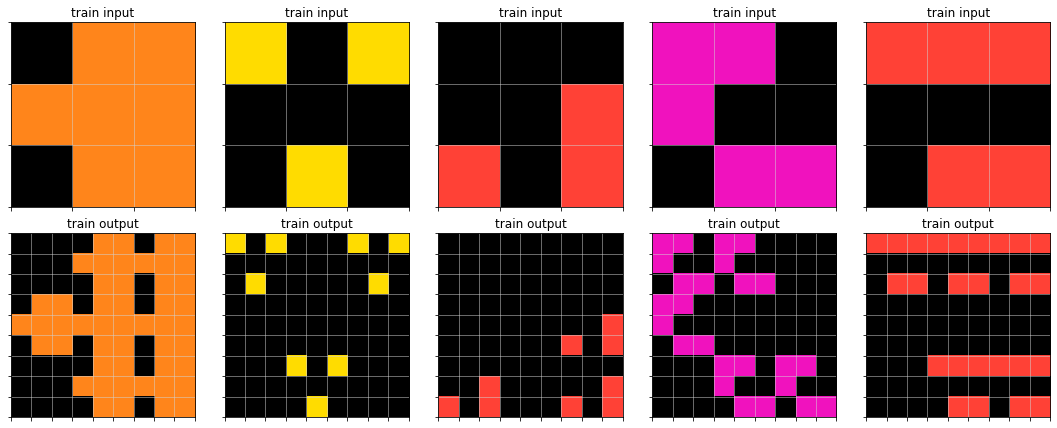

2 objects
[[7 0]
 [7 0]
 [7 7]]
[[7]
 [7]]
8 objects
[[7 0]
 [7 0]
 [7 7]
 [7 0]
 [7 0]
 [7 7]
 [7 0]
 [7 0]
 [7 7]]
[[7]
 [7]]
[[7 0]
 [7 0]
 [7 7]
 [7 0]
 [7 0]
 [7 7]]
[[7]
 [7]]
[[7]
 [7]]
[[7]
 [7]]
[[7 7 0]
 [7 7 0]
 [0 7 7]]
[[7]
 [7]]


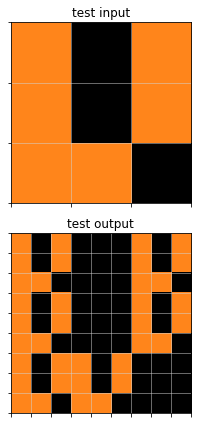

00d62c1b.json
Icecuber solved? True
['loop_filling']
6 objects
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
8 objects
[[3]]
[[3]]
[[4]]
[[3]]
[[3]]
[[4]]
[[3]]
[[3]]
9 objects
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3 0]
 [3 3]]
[[3]]
[[0 3 0]
 [3 3 3]
 [0 3 0]]
10 objects
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3 0]
 [3 3]]
[[4]]
[[3]]
[[0 3 0]
 [3 3 3]
 [0 3 0]]
11 objects
[[3]]
[[3 0]
 [3 3]]
[[3 3]]
[[3]]
[[3]]
[[3]
 [3]
 [3]
 [3]]
[[3 0]
 [3 3]
 [3 0]
 [3 0]]
[[3]]
[[3 3]]
[[3]]
[[3]]
13 objects
[[3]]
[[3 0]
 [3 3]]
[[3 3]]
[[3]]
[[3]]
[[3]
 [3]
 [3]
 [3]]
[[4 4]
 [4 4]
 [4 4]
 [4 4]]
[[3 0]
 [3 3]
 [3 0]
 [3 0]]
[[4]]
[[3]]
[[3 3]]
[[3]]
[[3]]
5 objects
[[3 3 3 3 0 0 0]
 [3 0 0 3 0 0 0]
 [3 0 0 3 0 3 0]
 [3 3 3 3 3 3 3]
 [0 3 0 0 0 0 3]
 [0 3 0 0 0 3 3]
 [0 3 3 0 0 3 0]
 [0 3 0 0 0 0 0]]
[[3]]
[[3]]
[[3]]
[[3]]
8 objects
[[3 3 3 3 0 0 0]
 [3 0 0 3 0 0 0]
 [3 0 0 3 0 3 0]
 [3 3 3 3 3 3 3]
 [0 3 0 0 0 0 3]
 [0 3 0 0 0 3 3]
 [0 3 3 0 0 3 0]
 [0 3 0 0 0 0 0]]
[[4 4]
 [4 4]]
[[4]]
[[3]]
[[4]]
[[3]

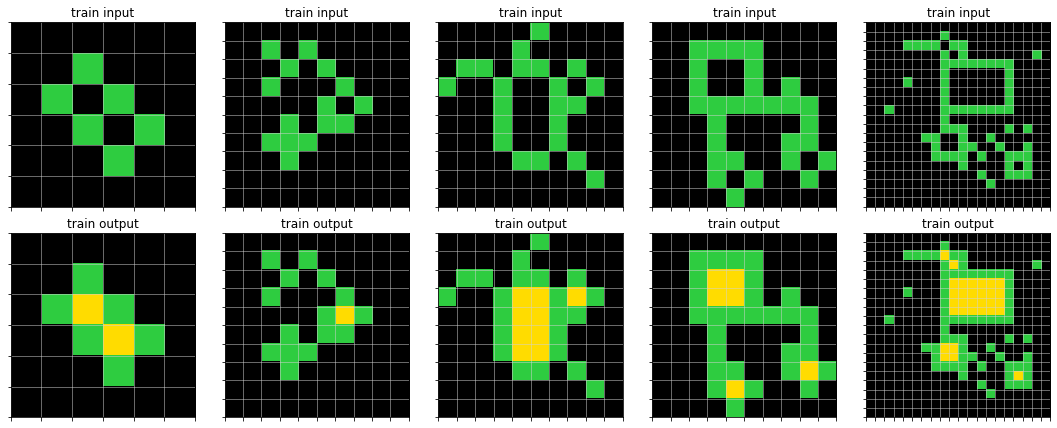

15 objects
[[3]]
[[3]]
[[3 3 0 0 0 0]
 [0 3 3 3 3 3]
 [0 3 0 0 0 0]
 [0 3 3 3 3 3]]
[[3]]
[[3 3]]
[[3]]
[[0 0 3]
 [3 3 3]]
[[0 0 0 0 0 3 3 3 3 3]
 [0 0 0 0 0 3 0 0 0 3]
 [0 0 0 0 0 3 0 0 0 3]
 [0 3 3 3 3 3 0 0 0 3]
 [0 3 0 0 0 3 0 0 0 3]
 [3 3 3 3 3 3 0 0 0 3]
 [0 3 0 0 0 3 3 3 3 3]
 [3 3 0 0 0 0 0 0 0 0]]
[[3 3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3 3 3 3 3 3]
 [0 3 0 0 0 3]
 [0 3 0 0 0 3]
 [0 3 3 3 3 3]]
23 objects
[[3]]
[[3]]
[[4]]
[[3 3 0 0 0 0]
 [0 3 3 3 3 3]
 [0 3 0 0 0 0]
 [0 3 3 3 3 3]]
[[3]]
[[3 3]]
[[4 4 4 4]]
[[3]]
[[4 4]]
[[0 0 3]
 [3 3 3]]
[[0 0 0 0 0 3 3 3 3 3]
 [0 0 0 0 0 3 0 0 0 3]
 [0 0 0 0 0 3 0 0 0 3]
 [0 3 3 3 3 3 0 0 0 3]
 [0 3 0 0 0 3 0 0 0 3]
 [3 3 3 3 3 3 0 0 0 3]
 [0 3 0 0 0 3 3 3 3 3]
 [3 3 0 0 0 0 0 0 0 0]]
[[4 4 4]
 [4 4 4]
 [4 4 4]
 [4 4 4]
 [4 4 4]]
[[4 4 4]]
[[3 3]]
[[4]]
[[3]]
[[3]]
[[4]]
[[3]]
[[3]]
[[3]]
[[3 3 3 3 3 3]
 [0 3 0 0 0 3]
 [0 3 0 0 0 3]
 [0 3 3 3 3 3]]
[[4 4 4]
 [4 4 4]]


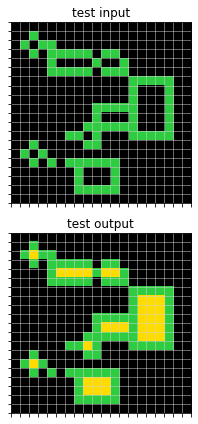

017c7c7b.json
Icecuber solved? False
['recoloring', 'pattern_expansion', 'pattern_repetition', 'image_expansion']
1 objects
[[0 1 0]
 [1 1 0]
 [0 1 0]
 [0 1 1]
 [0 1 0]
 [1 1 0]]
1 objects
[[0 2 0]
 [2 2 0]
 [0 2 0]
 [0 2 2]
 [0 2 0]
 [2 2 0]
 [0 2 0]
 [0 2 2]
 [0 2 0]]
9 objects
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
13 objects
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
1 objects
[[0 1]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [0 1]]
1 objects
[[0 2]
 [2 2]
 [0 2]
 [0 2]
 [2 2]
 [0 2]
 [0 2]
 [2 2]
 [0 2]]


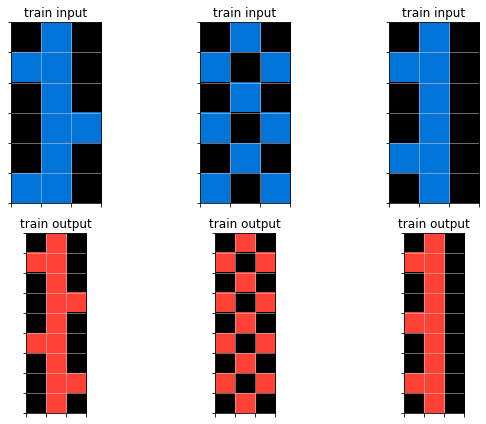

1 objects
[[1 1 1]
 [0 1 0]
 [0 1 0]
 [1 1 1]
 [0 1 0]
 [0 1 0]]
1 objects
[[2 2 2]
 [0 2 0]
 [0 2 0]
 [2 2 2]
 [0 2 0]
 [0 2 0]
 [2 2 2]
 [0 2 0]
 [0 2 0]]


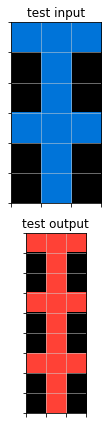

025d127b.json
Icecuber solved? True
['pattern_modification']
8 objects
[[6 6 6]
 [6 0 0]]
[[6]]
[[6]]
[[6]]
[[6]]
[[0 0 6]
 [6 6 6]]
[[2 2 2]
 [2 0 0]]
[[0 0 2]
 [2 2 2]]
5 objects
[[6 6 6]
 [6 0 0]]
[[6]]
[[6]]
[[0 0 6]
 [6 0 6]
 [6 6 6]]
[[2 2 2]
 [2 0 2]
 [2 2 2]]
6 objects
[[8 8 8 8 8]
 [8 0 0 0 0]]
[[8]]
[[8]]
[[8]]
[[8]]
[[0 0 0 0 8]
 [8 8 8 8 8]]
4 objects
[[8 8 8 8 8]
 [8 0 0 0 0]]
[[8]]
[[8]]
[[0 0 0 0 8]
 [8 0 0 0 8]
 [8 8 8 8 8]]


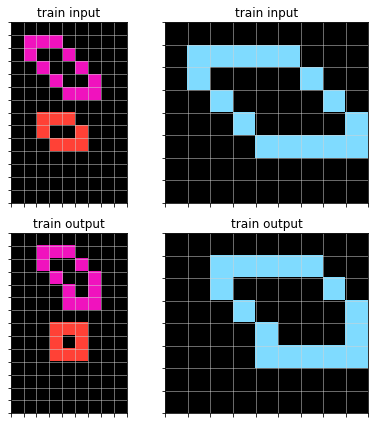

6 objects
[[4 4 4 4 4 4]
 [4 0 0 0 0 0]]
[[4]]
[[4]]
[[4]]
[[4]]
[[0 0 0 0 0 4]
 [4 4 4 4 4 4]]
4 objects
[[4 4 4 4 4 4]
 [4 0 0 0 0 0]]
[[4]]
[[4]]
[[0 0 0 0 0 4]
 [4 0 0 0 0 4]
 [4 4 4 4 4 4]]


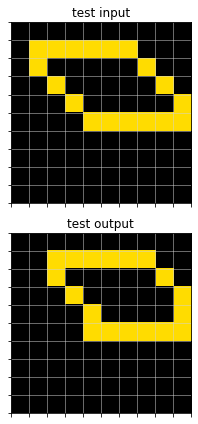

045e512c.json
Icecuber solved? False
['pattern_expansion', 'direction_guessing']
3 objects
[[8 8 8]
 [8 0 8]
 [8 8 8]]
[[3]
 [3]
 [3]]
[[2 2 2]]
7 objects
[[8 8 8]
 [8 0 8]
 [8 8 8]]
[[3 3 3]
 [3 0 3]
 [3 3 3]]
[[3 3 3]
 [3 0 3]
 [3 3 3]]
[[3 3 3]
 [3 0 3]
 [3 3 3]]
[[2 2 2]
 [2 0 2]
 [2 2 2]]
[[2 2 2]
 [2 0 2]
 [2 2 2]]
[[2 2 2]
 [2 0 2]
 [2 2 2]]
4 objects
[[4]]
[[0 1 0]
 [1 1 1]
 [0 1 0]]
[[2]]
[[4]]
8 objects
[[4 4 4]
 [0 4 0]]
[[0 4 0]
 [4 4 4]
 [0 4 0]]
[[2 0]
 [2 2]
 [2 0]]
[[0 2 0]
 [2 2 2]
 [0 2 0]]
[[0 2 0]
 [2 2 2]
 [0 2 0]]
[[0 1 0]
 [1 1 1]
 [0 1 0]]
[[0 4 0]
 [4 4 4]
 [0 4 0]]
[[0 4]
 [4 4]
 [0 4]]
5 objects
[[6]]
[[6]]
[[5 5]
 [5 0]]
[[0 5]
 [5 5]]
[[1 1]
 [1 0]]
12 objects
[[6]]
[[0 6]
 [6 6]]
[[6 6]
 [6 0]]
[[0 6]
 [6 6]]
[[5 5]
 [5 0]]
[[0 5]
 [5 5]]
[[1 1]
 [1 0]]
[[0 1]
 [1 1]]
[[1 1]
 [1 0]]
[[0 1]
 [1 1]]
[[1 1]
 [1 0]]
[[1]]


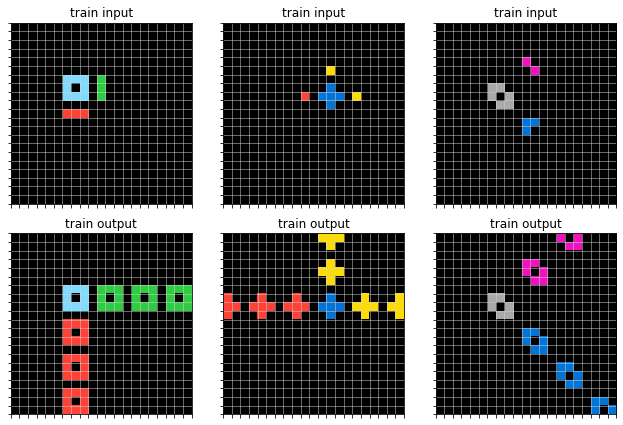

4 objects
[[4]
 [4]]
[[8 8 8]
 [8 0 8]
 [8 0 8]]
[[2]
 [2]
 [2]]
[[3 3 3]]
10 objects
[[4]
 [4]]
[[4]
 [4]]
[[4 4 4]
 [4 0 4]
 [4 0 4]]
[[8 8 8]
 [8 0 8]
 [8 0 8]]
[[2 2 2]
 [2 0 2]
 [2 0 2]]
[[2 2 2]
 [2 0 2]
 [2 0 2]]
[[2 2 2]
 [2 0 2]
 [2 0 2]]
[[3 3 3]
 [3 0 3]
 [3 0 3]]
[[3 3 3]
 [3 0 3]
 [3 0 3]]
[[3 3 3]
 [3 0 3]]


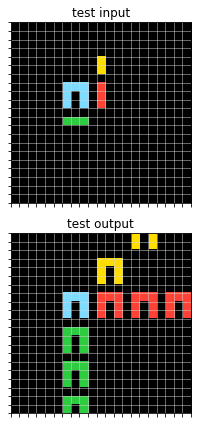

0520fde7.json
Icecuber solved? True
['detect_wall', 'separate_images', 'pattern_intersection']
5 objects
[[1]]
[[5]
 [5]
 [5]]
[[0 1 0]
 [1 1 1]]
[[1]]
[[1]]
1 objects
[[2]]
5 objects
[[1 1]]
[[5]
 [5]
 [5]]
[[0 1 0]
 [1 1 1]
 [0 1 0]]
[[1]]
[[1 1]]
3 objects
[[2]]
[[2]]
[[2]]
5 objects
[[1]]
[[5]
 [5]
 [5]]
[[1 1 0]
 [0 1 1]]
[[1]
 [1]]
[[1]
 [1]]
2 objects
[[2]]
[[2]]


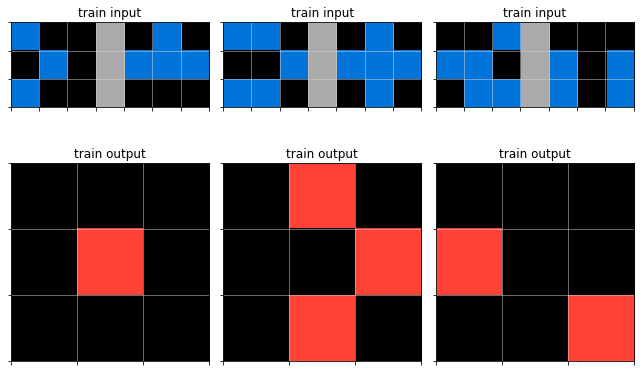

9 objects
[[1]]
[[1]]
[[5]
 [5]
 [5]]
[[1]
 [1]]
[[1]
 [1]]
[[1]]
[[1]]
[[1]]
[[1]]
2 objects
[[2]]
[[2]]


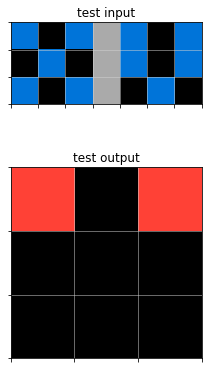

05269061.json
Icecuber solved? True
['image_filling', 'pattern_expansion', 'diagonals']
6 objects
[[2]]
[[8]]
[[3]]
[[8]]
[[3]]
[[3]]
49 objects
[[2]]
[[8]]
[[3]]
[[2]]
[[8]]
[[3]]
[[2]]
[[8]]
[[3]]
[[2]]
[[8]]
[[3]]
[[2]]
[[8]]
[[3]]
[[2]]
[[8]]
[[3]]
[[2]]
[[8]]
[[3]]
[[2]]
[[8]]
[[3]]
[[2]]
[[8]]
[[3]]
[[2]]
[[8]]
[[3]]
[[2]]
[[8]]
[[3]]
[[2]]
[[8]]
[[3]]
[[2]]
[[8]]
[[3]]
[[2]]
[[8]]
[[3]]
[[2]]
[[8]]
[[3]]
[[2]]
[[8]]
[[3]]
[[2]]
12 objects
[[1]]
[[1]]
[[2]]
[[1]]
[[2]]
[[4]]
[[1]]
[[2]]
[[4]]
[[1]]
[[2]]
[[4]]
49 objects
[[2]]
[[4]]
[[1]]
[[2]]
[[4]]
[[1]]
[[2]]
[[4]]
[[1]]
[[2]]
[[4]]
[[1]]
[[2]]
[[4]]
[[1]]
[[2]]
[[4]]
[[1]]
[[2]]
[[4]]
[[1]]
[[2]]
[[4]]
[[1]]
[[2]]
[[4]]
[[1]]
[[2]]
[[4]]
[[1]]
[[2]]
[[4]]
[[1]]
[[2]]
[[4]]
[[1]]
[[2]]
[[4]]
[[1]]
[[2]]
[[4]]
[[1]]
[[2]]
[[4]]
[[1]]
[[2]]
[[4]]
[[1]]
[[2]]
15 objects
[[8]]
[[3]]
[[8]]
[[3]]
[[8]]
[[3]]
[[8]]
[[3]]
[[4]]
[[8]]
[[3]]
[[4]]
[[3]]
[[4]]
[[4]]
49 objects
[[4]]
[[8]]
[[3]]
[[4]]
[[8]]
[[3]]
[[4]]
[[8]]
[[3]]
[[4]]
[

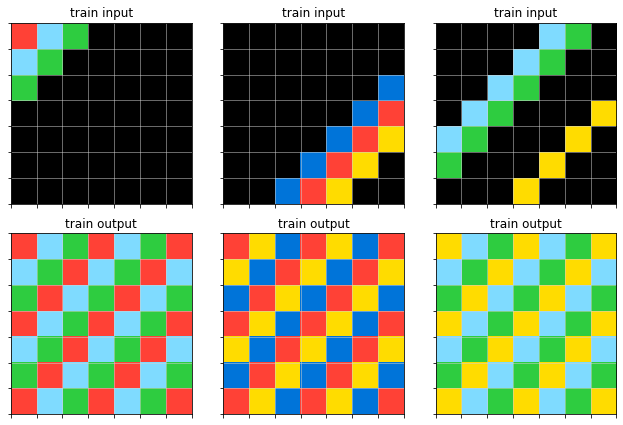

11 objects
[[1]]
[[2]]
[[1]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[4]]
[[2]]
[[4]]
49 objects
[[2]]
[[1]]
[[4]]
[[2]]
[[1]]
[[4]]
[[2]]
[[1]]
[[4]]
[[2]]
[[1]]
[[4]]
[[2]]
[[1]]
[[4]]
[[2]]
[[1]]
[[4]]
[[2]]
[[1]]
[[4]]
[[2]]
[[1]]
[[4]]
[[2]]
[[1]]
[[4]]
[[2]]
[[1]]
[[4]]
[[2]]
[[1]]
[[4]]
[[2]]
[[1]]
[[4]]
[[2]]
[[1]]
[[4]]
[[2]]
[[1]]
[[4]]
[[2]]
[[1]]
[[4]]
[[2]]
[[1]]
[[4]]
[[2]]


05f2a901.json
Icecuber solved? False
['pattern_moving', 'direction_guessing', 'bring_patterns_close']
2 objects
[[0 2 2 2]
 [2 2 0 2]]
[[8 8]
 [8 8]]
2 objects
[[0 2 2 2]
 [2 2 0 2]]
[[8 8]
 [8 8]]
2 objects
[[0 2 2]
 [0 2 2]
 [2 2 2]
 [0 2 2]]
[[8 8]
 [8 8]]
2 objects
[[0 2 2]
 [0 2 2]
 [2 2 2]
 [0 2 2]]
[[8 8]
 [8 8]]
2 objects
[[8 8]
 [8 8]]
[[0 0 2 2 2]
 [2 2 2 2 2]
 [0 2 2 0 0]]
2 objects
[[8 8]
 [8 8]]
[[0 0 2 2 2]
 [2 2 2 2 2]
 [0 2 2 0 0]]


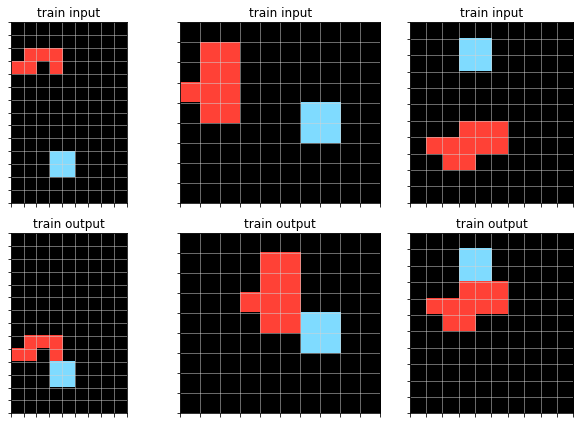

2 objects
[[2 0]
 [2 2]
 [2 2]
 [0 2]]
[[8 8]
 [8 8]]
2 objects
[[2 0]
 [2 2]
 [2 2]
 [0 2]]
[[8 8]
 [8 8]]


06df4c85.json
Icecuber solved? True
['detect_grid', 'connect_the_dots', 'grid_coloring']
7 objects
[[0 0 8 0 0 8 0 0 8 0 0 8 0 0 8 0 0 8 0 0]
 [0 0 8 0 0 8 0 0 8 0 0 8 0 0 8 0 0 8 0 0]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
 [0 0 8 0 0 8 0 0 8 0 0 8 0 0 8 0 0 8 0 0]
 [0 0 8 0 0 8 0 0 8 0 0 8 0 0 8 0 0 8 0 0]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
 [0 0 8 0 0 8 0 0 8 0 0 8 0 0 8 0 0 8 0 0]
 [0 0 8 0 0 8 0 0 8 0 0 8 0 0 8 0 0 8 0 0]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
 [0 0 8 0 0 8 0 0 8 0 0 8 0 0 8 0 0 8 0 0]
 [0 0 8 0 0 8 0 0 8 0 0 8 0 0 8 0 0 8 0 0]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
 [0 0 8 0 0 8 0 0 8 0 0 8 0 0 8 0 0 8 0 0]
 [0 0 8 0 0 8 0 0 8 0 0 8 0 0 8 0 0 8 0 0]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
 [0 0 8 0 0 8 0 0 8 0 0 8 0 0 8 0 0 8 0 0]
 [0 0 8 0 0 8 0 0 8 0 0 8 0 0 8 0 0 8 0 0]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
 [0 0 8 0 0 8 0 0 8 0 0 8 0 0 8 0 0 8 0 0]
 [0 0 8 0 0 8 0 0 8 0 0 8 0 0 8 0 0 8 0 0]]
[[2 2]
 [2 2]]
[[2 2]
 [2 2]]
[[1 1]
 [1

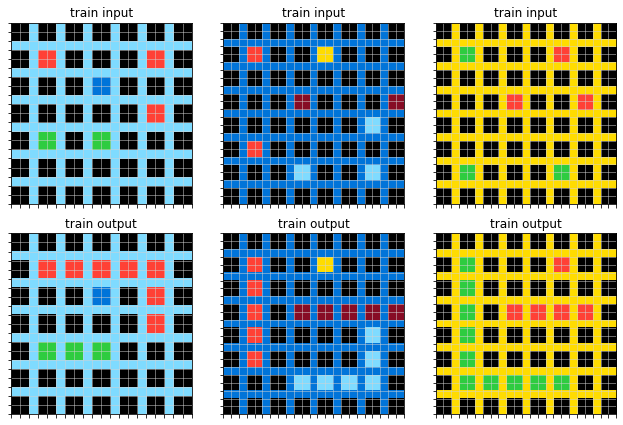

7 objects
[[0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0]
 [0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0]
 [4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
 [0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0]
 [0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0]
 [4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
 [0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0]
 [0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0]
 [4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
 [0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0]
 [0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0]
 [4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
 [0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0]
 [0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0]
 [4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
 [0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0]
 [0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0]
 [4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]


08ed6ac7.json
Icecuber solved? False
['measure_length', 'order_numbers', 'associate_colors_to_ranks', 'recoloring']
4 objects
[[5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]]
[[5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]]
[[5]
 [5]
 [5]
 [5]
 [5]
 [5]]
[[5]
 [5]
 [5]]
4 objects
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]]
[[3]
 [3]
 [3]
 [3]
 [3]
 [3]]
[[4]
 [4]
 [4]]
4 objects
[[5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]]
[[5]
 [5]
 [5]
 [5]
 [5]]
[[5]
 [5]
 [5]
 [5]]
[[5]
 [5]]
4 objects
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[2]
 [2]
 [2]
 [2]
 [2]]
[[3]
 [3]
 [3]
 [3]]
[[4]
 [4]]


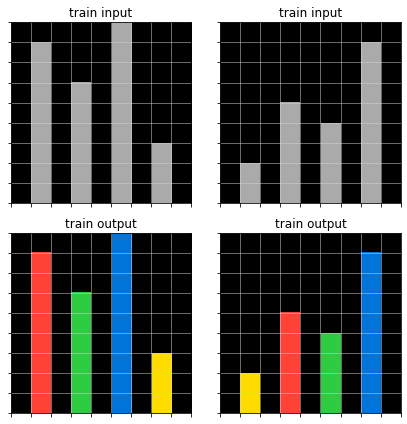

4 objects
[[5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]]
[[5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]]
[[5]
 [5]
 [5]
 [5]
 [5]]
[[5]
 [5]
 [5]]
4 objects
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]]
[[3]
 [3]
 [3]
 [3]
 [3]]
[[4]
 [4]
 [4]]


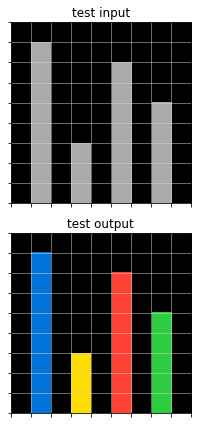

09629e4f.json
Icecuber solved? True
['detect_grid', 'separate_images', 'count_tiles', 'take_minimum', 'enlarge_image', 'create_grid', 'adapt_image_to_grid']
45 objects
[[2]]
[[0 0 0 5 0 0 0 5 0 0 0]
 [0 0 0 5 0 0 0 5 0 0 0]
 [0 0 0 5 0 0 0 5 0 0 0]
 [5 5 5 5 5 5 5 5 5 5 5]
 [0 0 0 5 0 0 0 5 0 0 0]
 [0 0 0 5 0 0 0 5 0 0 0]
 [0 0 0 5 0 0 0 5 0 0 0]
 [5 5 5 5 5 5 5 5 5 5 5]
 [0 0 0 5 0 0 0 5 0 0 0]
 [0 0 0 5 0 0 0 5 0 0 0]
 [0 0 0 5 0 0 0 5 0 0 0]]
[[6]]
[[2]]
[[4]]
[[4]]
[[3]]
[[4]]
[[8]]
[[3]]
[[6]]
[[6]]
[[3]]
[[8]]
[[2]]
[[3]]
[[8]]
[[6]]
[[2]]
[[4]]
[[8]]
[[4]]
[[4]]
[[6]]
[[6]]
[[2]]
[[3]]
[[8]]
[[3]]
[[2]]
[[3]]
[[6]]
[[2]]
[[6]]
[[2]]
[[4]]
[[8]]
[[8]]
[[8]]
[[4]]
[[6]]
[[3]]
[[2]]
[[3]]
[[4]]
5 objects
[[2 2 2]
 [2 2 2]
 [2 2 2]]
[[0 0 0 5 0 0 0 5 0 0 0]
 [0 0 0 5 0 0 0 5 0 0 0]
 [0 0 0 5 0 0 0 5 0 0 0]
 [5 5 5 5 5 5 5 5 5 5 5]
 [0 0 0 5 0 0 0 5 0 0 0]
 [0 0 0 5 0 0 0 5 0 0 0]
 [0 0 0 5 0 0 0 5 0 0 0]
 [5 5 5 5 5 5 5 5 5 5 5]
 [0 0 0 5 0 0 0 5 0 0 0]
 [0 0 0 5 0 0 0 5 0 0 0]
 [0 

45 objects
[[6]]
[[4]]
[[0 0 0 5 0 0 0 5 0 0 0]
 [0 0 0 5 0 0 0 5 0 0 0]
 [0 0 0 5 0 0 0 5 0 0 0]
 [5 5 5 5 5 5 5 5 5 5 5]
 [0 0 0 5 0 0 0 5 0 0 0]
 [0 0 0 5 0 0 0 5 0 0 0]
 [0 0 0 5 0 0 0 5 0 0 0]
 [5 5 5 5 5 5 5 5 5 5 5]
 [0 0 0 5 0 0 0 5 0 0 0]
 [0 0 0 5 0 0 0 5 0 0 0]
 [0 0 0 5 0 0 0 5 0 0 0]]
[[3]]
[[4]]
[[3]]
[[2]]
[[8]]
[[6]]
[[8]]
[[2]]
[[2]]
[[8]]
[[4]]
[[6]]
[[3]]
[[2]]
[[3]]
[[3]]
[[6]]
[[2]]
[[3]]
[[4]]
[[6]]
[[8]]
[[4]]
[[2]]
[[4]]
[[8]]
[[6]]
[[8]]
[[2]]
[[4]]
[[6]]
[[4]]
[[2]]
[[8]]
[[6]]
[[3]]
[[3]]
[[4]]
[[6]]
[[2]]
[[8]]
[[3]]
5 objects
[[0 0 0 5 0 0 0 5 0 0 0]
 [0 0 0 5 0 0 0 5 0 0 0]
 [0 0 0 5 0 0 0 5 0 0 0]
 [5 5 5 5 5 5 5 5 5 5 5]
 [0 0 0 5 0 0 0 5 0 0 0]
 [0 0 0 5 0 0 0 5 0 0 0]
 [0 0 0 5 0 0 0 5 0 0 0]
 [5 5 5 5 5 5 5 5 5 5 5]
 [0 0 0 5 0 0 0 5 0 0 0]
 [0 0 0 5 0 0 0 5 0 0 0]
 [0 0 0 5 0 0 0 5 0 0 0]]
[[2 2 2]
 [2 2 2]
 [2 2 2]]
[[4 4 4]
 [4 4 4]
 [4 4 4]]
[[6 6 6]
 [6 6 6]
 [6 6 6]]
[[3 3 3]
 [3 3 3]
 [3 3 3]]


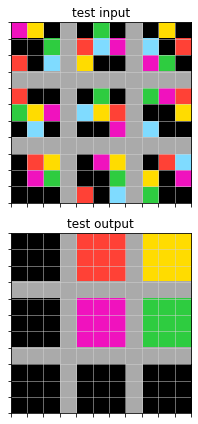

0962bcdd.json
Icecuber solved? True
['pattern_expansion']
10 objects
[[7]]
[[7]]
[[2]]
[[7]]
[[7]]
[[7]]
[[7]]
[[2]]
[[7]]
[[7]]
26 objects
[[2]]
[[7]
 [7]]
[[2]]
[[2]]
[[2]]
[[7 7]]
[[2]]
[[7 7]]
[[2]]
[[7]
 [7]]
[[2]]
[[2]]
[[2]]
[[2]]
[[7]
 [7]]
[[2]]
[[2]]
[[2]]
[[7 7]]
[[2]]
[[7 7]]
[[2]]
[[7]
 [7]]
[[2]]
[[2]]
[[2]]
10 objects
[[8]]
[[8]]
[[6]]
[[8]]
[[8]]
[[8]]
[[8]]
[[6]]
[[8]]
[[8]]
26 objects
[[6]]
[[8]
 [8]]
[[6]]
[[6]]
[[6]]
[[8 8]]
[[6]]
[[8 8]]
[[6]]
[[8]
 [8]]
[[6]]
[[6]]
[[6]]
[[6]]
[[8]
 [8]]
[[6]]
[[6]]
[[6]]
[[8 8]]
[[6]]
[[8 8]]
[[6]]
[[8]
 [8]]
[[6]]
[[6]]
[[6]]


10 objects
[[3]]
[[3]]
[[4]]
[[3]]
[[3]]
[[3]]
[[3]]
[[4]]
[[3]]
[[3]]
26 objects
[[4]]
[[3]
 [3]]
[[4]]
[[4]]
[[4]]
[[3 3]]
[[4]]
[[3 3]]
[[4]]
[[3]
 [3]]
[[4]]
[[4]]
[[4]]
[[4]]
[[3]
 [3]]
[[4]]
[[4]]
[[4]]
[[3 3]]
[[4]]
[[3 3]]
[[4]]
[[3]
 [3]]
[[4]]
[[4]]
[[4]]


0a938d79.json
Icecuber solved? False
['direction_guessing', 'draw_line_from_point', 'pattern_expansion']
2 objects
[[2]]
[[8]]
10 objects
[[2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]]
[[8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]]
[[2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]]
[[8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]]
[[2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]]
[[8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]]
[[2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]]
[[8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]]
[[2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]]
[[8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]]
2 objects
[[1]]
[[3]]
6 objects
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]]
2 objects
[[2]]
[[3]]
9 objects
[[2 2 2 2 2 2 2 2 2]]
[[3 3 3 3 3 3 3 3 3]]
[[2 2 2 2 2 2 2 2 2]]
[[3 3 

2 objects
[[3]]
[[4]]
5 objects
[[3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]]
[[4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]]
[[3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]]
[[4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]]
[[3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]]


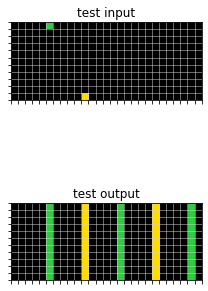

0b148d64.json
Icecuber solved? True
['detect_grid', 'separate_images', 'find_the_intruder', 'crop']
16 objects
[[8 8 8 8 8 0 8 8 8 8]
 [8 0 0 8 0 0 0 8 8 8]
 [8 8 8 0 0 0 8 8 8 8]
 [8 8 0 8 8 8 8 0 8 8]
 [8 8 8 8 0 8 8 0 8 8]
 [0 0 0 8 8 0 8 0 0 8]
 [8 8 8 8 0 0 8 0 0 0]
 [8 0 0 8 0 0 8 8 0 0]
 [8 8 8 8 8 8 0 8 0 0]]
[[8 8 8 8 0 8 8]
 [8 8 8 0 0 0 8]
 [8 8 0 8 8 8 8]
 [8 8 0 0 0 8 8]
 [8 8 8 0 8 8 8]
 [8 0 0 0 8 0 0]
 [8 8 8 0 8 8 8]
 [8 0 8 8 8 8 8]
 [8 8 8 8 8 0 0]]
[[8]]
[[8]]
[[8]]
[[0 2 2 2 0 0 2 2 2 2]
 [0 0 2 2 2 0 0 2 2 2]
 [0 2 2 2 2 2 2 0 2 0]
 [2 2 2 2 0 2 2 2 2 2]
 [2 2 2 2 2 2 0 2 0 0]
 [2 2 2 2 2 0 0 0 0 0]
 [2 2 0 2 2 0 0 0 0 0]
 [0 2 2 0 0 2 2 0 0 2]
 [2 2 2 2 2 2 2 2 2 2]
 [2 0 2 2 0 2 2 2 2 2]]
[[8 8 0 8 8 0 0]
 [8 8 8 8 0 0 0]
 [8 8 8 0 0 0 0]
 [8 8 0 8 8 8 0]
 [8 8 8 8 8 0 0]
 [8 0 8 0 8 8 8]
 [8 8 0 0 0 0 8]
 [8 0 0 0 0 0 0]]
[[8]]
[[2]]
[[8]]
[[8]]
[[2]]
[[2 2]]
[[8]]
[[8 8 0]
 [0 8 8]
 [8 8 8]]
[[0 8 8]
 [8 8 8]]
4 objects
[[0 2 2 2 0 0 2 2 2 2]
 [0 0 2 2 2 0 0 2

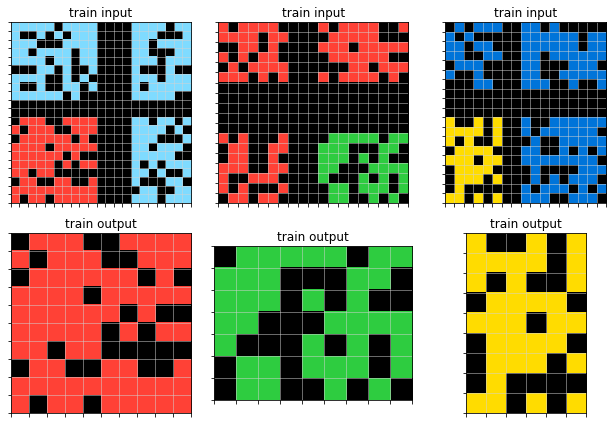

16 objects
[[1 1 1 1]
 [1 0 1 0]
 [1 1 0 0]]
[[0 0 0 0 0 1]
 [0 0 0 0 1 1]
 [0 0 0 1 1 0]
 [0 0 0 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]]
[[3]]
[[3 3 3 3 3 3]
 [0 3 3 3 0 0]
 [0 3 3 3 3 0]
 [0 3 3 0 3 0]
 [0 3 3 3 0 0]
 [0 0 0 3 0 0]]
[[3]]
[[3 3]
 [0 3]
 [3 3]]
[[3 3]
 [0 3]]
[[3]]
[[3]
 [3]]
[[3 3 3]
 [0 3 0]]
[[0 0 0 3 0 0 0]
 [0 0 3 3 3 0 0]
 [0 0 0 3 0 0 0]
 [3 3 3 3 3 3 0]
 [0 3 3 3 0 3 3]]
[[3]]
[[3]]
[[0 3 3 0 0]
 [3 3 3 3 3]
 [3 0 3 0 3]
 [0 3 3 0 0]]
[[3]]
[[3]
 [3]]
2 objects
[[1 1 1 1]
 [1 0 1 0]
 [1 1 0 0]]
[[0 0 0 0 0 1]
 [0 0 0 0 1 1]
 [0 0 0 1 1 0]
 [0 0 0 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]]


0ca9ddb6.json
Icecuber solved? False
['pattern_expansion', 'associate_patterns_to_colors']
2 objects
[[2]]
[[1]]
10 objects
[[4]]
[[4]]
[[2]]
[[4]]
[[4]]
[[7]]
[[7]]
[[1]]
[[7]]
[[7]]
5 objects
[[8]]
[[2]]
[[1]]
[[1]]
[[2]]
21 objects
[[8]]
[[4]]
[[4]]
[[7]]
[[2]]
[[7]]
[[1]]
[[7]]
[[4]]
[[4]]
[[7]]
[[7]]
[[4]]
[[4]]
[[7]]
[[1]]
[[7]]
[[2]]
[[7]]
[[4]]
[[4]]
3 objects
[[2]]
[[6]]
[[1]]
11 objects
[[4]]
[[4]]
[[2]]
[[4]]
[[4]]
[[6]]
[[7]]
[[7]]
[[1]]
[[7]]
[[7]]


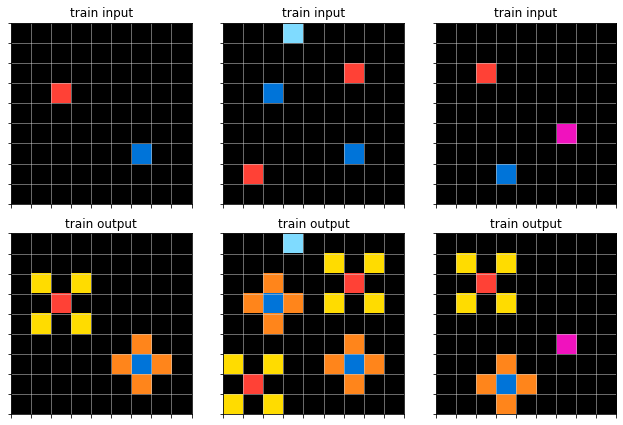

5 objects
[[1]]
[[2]]
[[8]]
[[6]]
[[2]]
17 objects
[[7]]
[[4]]
[[4]]
[[7]]
[[1]]
[[7]]
[[2]]
[[7]]
[[4]]
[[4]]
[[8]]
[[4]]
[[4]]
[[6]]
[[2]]
[[4]]
[[4]]


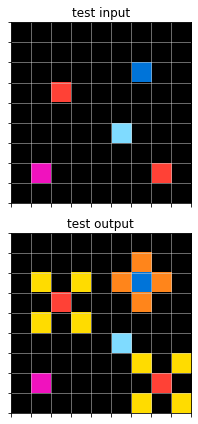

0d3d703e.json
Icecuber solved? False
['associate_colors_to_colors']
3 objects
[[3]
 [3]
 [3]]
[[1]
 [1]
 [1]]
[[2]
 [2]
 [2]]
3 objects
[[4]
 [4]
 [4]]
[[5]
 [5]
 [5]]
[[6]
 [6]
 [6]]
3 objects
[[2]
 [2]
 [2]]
[[3]
 [3]
 [3]]
[[8]
 [8]
 [8]]
3 objects
[[6]
 [6]
 [6]]
[[4]
 [4]
 [4]]
[[9]
 [9]
 [9]]
3 objects
[[5]
 [5]
 [5]]
[[8]
 [8]
 [8]]
[[6]
 [6]
 [6]]
3 objects
[[1]
 [1]
 [1]]
[[9]
 [9]
 [9]]
[[2]
 [2]
 [2]]
3 objects
[[9]
 [9]
 [9]]
[[4]
 [4]
 [4]]
[[2]
 [2]
 [2]]
3 objects
[[8]
 [8]
 [8]]
[[3]
 [3]
 [3]]
[[6]
 [6]
 [6]]


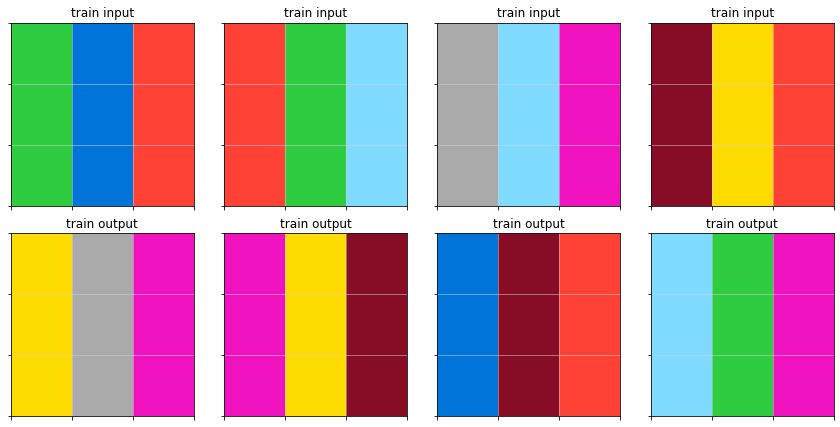

3 objects
[[8]
 [8]
 [8]]
[[1]
 [1]
 [1]]
[[3]
 [3]
 [3]]
3 objects
[[9]
 [9]
 [9]]
[[5]
 [5]
 [5]]
[[4]
 [4]
 [4]]


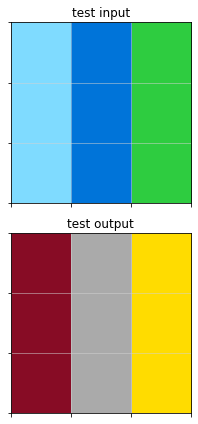

0dfd9992.json
Icecuber solved? True
['image_filling', 'pattern_expansion']
395 objects
[[3]]
[[6]]
[[5]]
[[6]]
[[3]]
[[2]]
[[3]]
[[6]]
[[5]]
[[6]]
[[3]]
[[2]]
[[3]]
[[6]]
[[5]]
[[6]]
[[3]]
[[2]]
[[3]]
[[6]]
[[5]]
[[6]]
[[3]]
[[2]]
[[3]]
[[6]]
[[5]]
[[6]]
[[3]]
[[2]]
[[3]]
[[6]]
[[5]]
[[6]]
[[3]]
[[2]]
[[3]]
[[6]]
[[5]]
[[6]]
[[3]]
[[2]]
[[5]]
[[2]]
[[1]]
[[2]]
[[5]]
[[4]]
[[5]]
[[2]]
[[1]]
[[2]]
[[5]]
[[4]]
[[5]]
[[2]]
[[1]]
[[2]]
[[5]]
[[4]]
[[5]]
[[2]]
[[1]]
[[6]]
[[3]]
[[2]]
[[3]]
[[6]]
[[5]]
[[6]]
[[3]]
[[2]]
[[3]]
[[6]]
[[5]]
[[6]]
[[3]]
[[2]]
[[3]]
[[6]]
[[5]]
[[6]]
[[3]]
[[2]]
[[3]]
[[6]]
[[5]]
[[6]]
[[3]]
[[2]]
[[3]]
[[6]]
[[5]]
[[6]]
[[3]]
[[2]]
[[3]]
[[6]]
[[5]]
[[5]]
[[2]]
[[5]]
[[4]]
[[5]]
[[2]]
[[1]]
[[2]]
[[5]]
[[2]]
[[1]]
[[2]]
[[5]]
[[4]]
[[4]]
[[3]]
[[6]]
[[5]]
[[6]]
[[3]]
[[2]]
[[3]]
[[2]]
[[3]]
[[6]]
[[5]]
[[5]]
[[6]]
[[3]]
[[2]]
[[3]]
[[6]]
[[5]]
[[6]]
[[5]]
[[6]]
[[3]]
[[2]]
[[3]]
[[6]]
[[5]]
[[6]]
[[3]]
[[2]]
[[5]]
[[2]]
[[1]]
[[2]]
[[5]]
[[4]]
[[5]]
[[4]]
[[5]]
[

441 objects
[[3]]
[[2]]
[[3]]
[[6]]
[[3]]
[[2]]
[[3]]
[[6]]
[[3]]
[[2]]
[[3]]
[[6]]
[[3]]
[[2]]
[[3]]
[[6]]
[[3]]
[[2]]
[[3]]
[[6]]
[[3]]
[[2]]
[[1]]
[[2]]
[[5]]
[[2]]
[[1]]
[[2]]
[[5]]
[[2]]
[[1]]
[[2]]
[[5]]
[[2]]
[[1]]
[[2]]
[[5]]
[[2]]
[[1]]
[[2]]
[[5]]
[[2]]
[[3]]
[[2]]
[[3]]
[[6]]
[[3]]
[[2]]
[[3]]
[[6]]
[[3]]
[[2]]
[[3]]
[[6]]
[[3]]
[[2]]
[[3]]
[[6]]
[[3]]
[[2]]
[[3]]
[[6]]
[[3]]
[[6]]
[[5]]
[[6]]
[[1]]
[[6]]
[[5]]
[[6]]
[[1]]
[[6]]
[[5]]
[[6]]
[[1]]
[[6]]
[[5]]
[[6]]
[[1]]
[[6]]
[[5]]
[[6]]
[[1]]
[[6]]
[[3]]
[[2]]
[[3]]
[[6]]
[[3]]
[[2]]
[[3]]
[[6]]
[[3]]
[[2]]
[[3]]
[[6]]
[[3]]
[[2]]
[[3]]
[[6]]
[[3]]
[[2]]
[[3]]
[[6]]
[[3]]
[[2]]
[[1]]
[[2]]
[[5]]
[[2]]
[[1]]
[[2]]
[[5]]
[[2]]
[[1]]
[[2]]
[[5]]
[[2]]
[[1]]
[[2]]
[[5]]
[[2]]
[[1]]
[[2]]
[[5]]
[[2]]
[[3]]
[[2]]
[[3]]
[[6]]
[[3]]
[[2]]
[[3]]
[[6]]
[[3]]
[[2]]
[[3]]
[[6]]
[[3]]
[[2]]
[[3]]
[[6]]
[[3]]
[[2]]
[[3]]
[[6]]
[[3]]
[[6]]
[[5]]
[[6]]
[[1]]
[[6]]
[[5]]
[[6]]
[[1]]
[[6]]
[[5]]
[[6]]
[[1]]
[[6]]
[[5]]
[[6]]
[[1]]
[[6]]
[[5]

324 objects
[[9]]
[[6]]
[[5]]
[[6]]
[[9]]
[[5]]
[[3 3]]
[[5]]
[[9]]
[[6]]
[[5]]
[[6]]
[[9]]
[[5]]
[[3 3]]
[[5]]
[[9]]
[[6]]
[[5]]
[[6]]
[[3]]
[[2]]
[[3]]
[[6]]
[[2]]
[[9 9]]
[[2]]
[[2]]
[[9 9]]
[[2]]
[[6]]
[[3]]
[[2]]
[[5]]
[[2]]
[[1]]
[[2]]
[[5]]
[[1]]
[[8 8]]
[[1]]
[[1]]
[[8 8]]
[[1]]
[[5]]
[[2]]
[[1]]
[[6]]
[[3]]
[[2]]
[[3]]
[[6]]
[[2]]
[[9 9]]
[[2]]
[[2]]
[[9 9]]
[[2]]
[[6]]
[[3]]
[[2]]
[[9]]
[[6]]
[[5]]
[[6]]
[[9]]
[[5]]
[[3 3]]
[[5]]
[[9]]
[[6]]
[[5]]
[[6]]
[[9]]
[[5]]
[[3 3]]
[[5]]
[[9]]
[[6]]
[[5]]
[[5]]
[[2]]
[[1]]
[[2]]
[[5]]
[[1]]
[[8 8]]
[[1]]
[[5]]
[[2]]
[[1]]
[[2]]
[[5]]
[[1]]
[[8 8]]
[[1]]
[[5]]
[[2]]
[[1]]
[[3]
 [3]]
[[9]
 [9]]
[[8]
 [8]]
[[9]
 [9]]
[[3]
 [3]]
[[8]
 [8]]
[[6 6]
 [6 6]]
[[8]
 [8]]
[[3]
 [3]]
[[9]
 [9]]
[[8]
 [8]]
[[9]
 [9]]
[[3]
 [3]]
[[8]
 [8]]
[[6 6]
 [6 6]]
[[8]
 [8]]
[[3]
 [3]]
[[9]
 [9]]
[[8]
 [8]]
[[5]]
[[2]]
[[1]]
[[2]]
[[1]]
[[5]]
[[2]]
[[1]]
[[2]]
[[5]]
[[1]]
[[8 8]]
[[1]]
[[5]]
[[2]]
[[1]]
[[9]]
[[6]]
[[5]]
[[6]]
[[5]]
[[9]]
[[6]]
[[5]]
[[6]]
[

0e206a2e.json
Icecuber solved? False
['associate_patterns_to_patterns', 'pattern_repetition', 'pattern_rotation', 'pattern_reflection', 'pattern_juxtaposition']
18 objects
[[8]
 [8]]
[[3]]
[[1]]
[[4]]
[[8]]
[[4]]
[[8]]
[[3]]
[[1]]
[[3]]
[[8 0]
 [8 8]
 [8 0]]
[[8]]
[[4]]
[[1]]
[[8]]
[[4]]
[[1]]
[[3]]
12 objects
[[8]]
[[4]]
[[8]]
[[0 8 0]
 [8 8 8]]
[[3]]
[[1]]
[[1]]
[[8]]
[[8 8]]
[[4]]
[[3]]
[[8]]
9 objects
[[2]]
[[4]]
[[3 3]
 [3 0]
 [3 0]
 [3 0]]
[[3]]
[[1]]
[[3]]
[[4]]
[[1]]
[[2]]
6 objects
[[3]]
[[4]]
[[1]]
[[3 3 3 3]
 [0 0 0 3]]
[[2]]
[[3]]
11 objects
[[4]]
[[8]]
[[8]]
[[1]]
[[8 8 8]]
[[2]]
[[8]]
[[8]]
[[1]]
[[2]]
[[4]]
8 objects
[[8]]
[[1]]
[[8 8 8]]
[[2]]
[[8]]
[[8]]
[[8]]
[[4]]


21 objects
[[5]]
[[5]]
[[1]]
[[5 5]]
[[4]]
[[0 5 0]
 [5 5 5]]
[[5]]
[[2]]
[[5]]
[[2]]
[[5]]
[[5]]
[[4]]
[[5]]
[[1]]
[[2]]
[[4]]
[[1]]
[[4]]
[[1]]
[[2]]
15 objects
[[5]]
[[2]]
[[5]]
[[4]]
[[5]]
[[5]]
[[1]]
[[4]]
[[5]]
[[5]
 [5]]
[[0 5]
 [5 5]
 [0 5]]
[[5]]
[[1]]
[[5]]
[[2]]


10fcaaa3.json
Icecuber solved? False
['pattern_expansion', 'image_repetition']
1 objects
[[5]]
12 objects
[[8]]
[[8]]
[[8]]
[[8]]
[[5]]
[[5]]
[[8]]
[[8]]
[[8]]
[[8]]
[[5]]
[[5]]
2 objects
[[6]]
[[6]]
10 objects
[[6]]
[[6]]
[[8 8 8 8 8 8 8 8]
 [0 0 0 8 0 0 0 8]]
[[6]]
[[6]]
[[8 0 0 0 8 0 0 0]
 [8 8 8 8 8 8 8 8]]
[[6]]
[[6]]
[[6]]
[[6]]
2 objects
[[4]]
[[4]]
20 objects
[[8]]
[[8 8]]
[[8]]
[[4]]
[[4]]
[[8]]
[[0 8 8]
 [8 8 0]]
[[8]]
[[8]]
[[4]]
[[4]]
[[8 8 8 8 8 8]]
[[4]]
[[4]]
[[8]]
[[0 8 8]
 [8 8 0]]
[[8]]
[[8]]
[[4]]
[[4]]
1 objects
[[2]]
20 objects
[[8]]
[[8]]
[[8]]
[[8]]
[[2]]
[[2]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[2]]
[[2]]
[[8]]
[[8]]
[[8]]
[[8]]


3 objects
[[3]]
[[3]]
[[3]]
28 objects
[[3]]
[[3]]
[[8]]
[[8]
 [8]]
[[8]]
[[8]
 [8]]
[[8]]
[[8]]
[[3]]
[[3]]
[[8]
 [8]
 [8]
 [8]]
[[8]
 [8]
 [8]
 [8]
 [8]]
[[8 8]
 [0 8]
 [0 8]
 [0 8]]
[[8]
 [8]
 [8]
 [8]
 [8]]
[[8]]
[[3]
 [3]]
[[3]
 [3]]
[[8]]
[[8]]
[[3]]
[[3]]
[[8]]
[[8]]
[[8 8]]
[[8]]
[[8]]
[[3]]
[[3]]


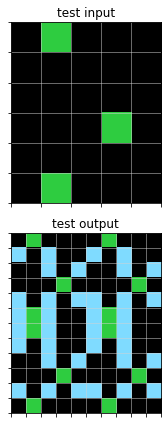

11852cab.json
Icecuber solved? False
['pattern_expansion']
10 objects
[[3]]
[[8]]
[[2]]
[[2]]
[[8]]
[[3]]
[[8]]
[[2]]
[[2]]
[[8]]
13 objects
[[3]]
[[8]]
[[3]]
[[2]]
[[2]]
[[8]]
[[3]]
[[8]]
[[2]]
[[2]]
[[3]]
[[8]]
[[3]]
10 objects
[[2]]
[[3]]
[[4]]
[[4]]
[[3]]
[[4]]
[[3]]
[[4]]
[[4]]
[[3]]
13 objects
[[2]]
[[3]]
[[2]]
[[4]]
[[4]]
[[3]]
[[4]]
[[3]]
[[4]]
[[4]]
[[2]]
[[3]]
[[2]]
10 objects
[[8]]
[[8]]
[[8]]
[[4]]
[[8]]
[[1]]
[[8]]
[[8]]
[[8]]
[[8]]
13 objects
[[8]]
[[8]]
[[8]]
[[4]]
[[4]]
[[8]]
[[1]]
[[8]]
[[4]]
[[4]]
[[8]]
[[8]]
[[8]]


10 objects
[[1]]
[[4]]
[[1]]
[[2]]
[[2]]
[[1]]
[[2]]
[[2]]
[[1]]
[[1]]
13 objects
[[1]]
[[4]]
[[1]]
[[2]]
[[2]]
[[4]]
[[1]]
[[4]]
[[2]]
[[2]]
[[1]]
[[4]]
[[1]]


1190e5a7.json
Icecuber solved? True
['detect_grid', 'count_hor_lines', 'count_ver_lines', 'detect_background_color', 'color_guessing', 'create_image_from_info']
9 objects
[[3]
 [3]]
[[0 7 0 0 0 0 0 0 0 0 7 0 0 7 0]
 [0 7 0 0 0 0 0 0 0 0 7 0 0 7 0]
 [7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [0 7 0 0 0 0 0 0 0 0 7 0 0 7 0]
 [0 7 0 0 0 0 0 0 0 0 7 0 0 7 0]
 [0 7 0 0 0 0 0 0 0 0 7 0 0 7 0]
 [0 7 0 0 0 0 0 0 0 0 7 0 0 7 0]
 [0 7 0 0 0 0 0 0 0 0 7 0 0 7 0]
 [0 7 0 0 0 0 0 0 0 0 7 0 0 7 0]
 [0 7 0 0 0 0 0 0 0 0 7 0 0 7 0]
 [0 7 0 0 0 0 0 0 0 0 7 0 0 7 0]
 [0 7 0 0 0 0 0 0 0 0 7 0 0 7 0]
 [0 7 0 0 0 0 0 0 0 0 7 0 0 7 0]
 [0 7 0 0 0 0 0 0 0 0 7 0 0 7 0]
 [0 7 0 0 0 0 0 0 0 0 7 0 0 7 0]]
[[3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3]]
[[3 3]
 [3 3]]
[[3]
 [3]]
[[3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]]
[[3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3]
 [3 3 

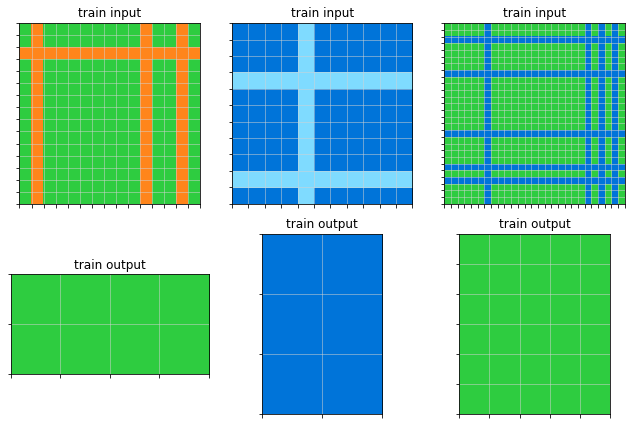

16 objects
[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 5 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 5 0]
 [5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 5 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 5 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 5 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 5 0]
 [5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 5 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 5 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 5 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 5 0]
 [5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 5 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 5 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 5 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 5 0]
 [5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 5 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0

137eaa0f.json
Icecuber solved? False
['pattern_juxtaposition']
6 objects
[[6 6]]
[[5]]
[[5]]
[[4 4]]
[[7]
 [7]]
[[5]]
4 objects
[[6 6]]
[[7]
 [7]]
[[5]]
[[4 4]]
9 objects
[[6]]
[[5]]
[[7]]
[[5]]
[[7]]
[[5]]
[[2 2]]
[[3 3 3]]
[[5]]
6 objects
[[6]]
[[2 2]]
[[7]]
[[5]]
[[7]]
[[3 3 3]]
7 objects
[[1 1]]
[[1]]
[[5]]
[[5]]
[[2]
 [2]]
[[5]]
[[9 9]]
5 objects
[[1 1]]
[[1]]
[[5]]
[[2]
 [2]]
[[9 9]]


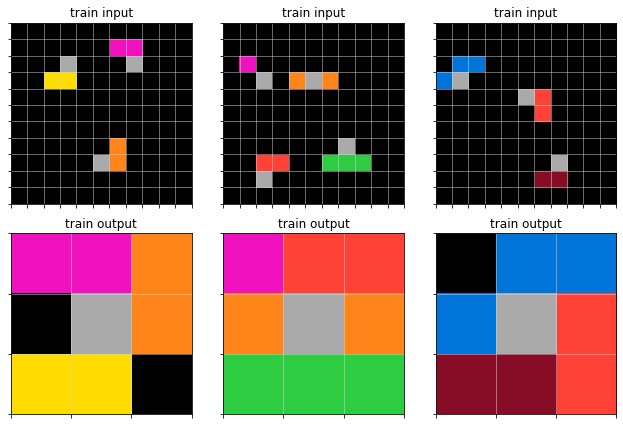

10 objects
[[9]]
[[9]
 [9]]
[[5]]
[[4]]
[[5]]
[[4]]
[[8]]
[[5]]
[[5]]
[[2 2]]
7 objects
[[4]]
[[9]]
[[8]]
[[9]
 [9]]
[[5]]
[[4]]
[[2 2]]


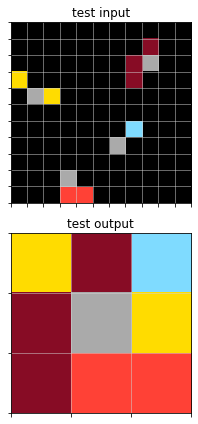

150deff5.json
Icecuber solved? False
['pattern_coloring', 'pattern_deconstruction', 'associate_colors_to_patterns']
1 objects
[[5 5 0 0 0 0]
 [5 5 5 5 5 0]
 [0 5 5 5 0 0]
 [0 5 5 5 5 5]
 [0 5 0 0 5 5]
 [0 0 0 5 5 5]]
5 objects
[[8 8]
 [8 8]]
[[2 2 2]]
[[2]
 [2]
 [2]]
[[8 8 0 0]
 [8 8 8 8]
 [0 0 8 8]]
[[2 2 2]]
1 objects
[[5 5 5 5 5 5]
 [5 5 5 5 5 5]
 [0 0 5 0 0 5]
 [0 0 0 5 5 5]
 [0 0 0 5 5 5]
 [0 0 0 5 0 0]]
6 objects
[[8 8]
 [8 8]]
[[2]
 [2]
 [2]]
[[8 8]
 [8 8]]
[[2]
 [2]
 [2]]
[[2]
 [2]
 [2]]
[[8 8]
 [8 8]]
2 objects
[[5 5 5 5 5]
 [0 0 0 5 5]]
[[5 0 0]
 [5 5 5]
 [5 5 5]]
4 objects
[[2 2 2]]
[[8 8]
 [8 8]]
[[2]
 [2]
 [2]]
[[8 8]
 [8 8]]


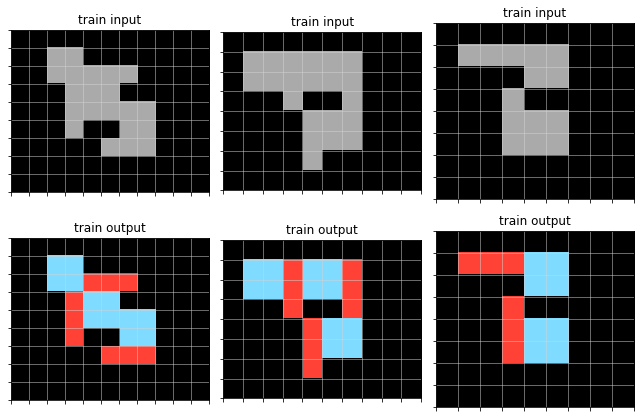

1 objects
[[0 5 5 0 5 5 5]
 [0 5 5 0 0 5 0]
 [5 5 5 5 5 5 0]
 [0 0 0 5 5 5 0]
 [0 0 5 5 5 0 0]
 [0 0 0 0 5 5 0]
 [0 0 0 0 5 5 0]]
6 objects
[[8 8]
 [8 8]]
[[2 2 2]
 [0 2 0]
 [0 2 0]
 [0 2 0]]
[[2 2 2]]
[[8 8]
 [8 8]]
[[2 2 2]]
[[8 8]
 [8 8]]


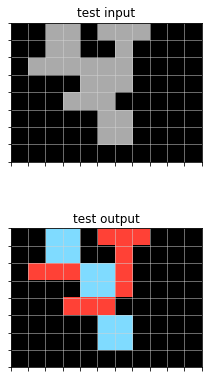

178fcbfb.json
Icecuber solved? True
['direction_guessing', 'draw_line_from_point']
3 objects
[[2]]
[[3]]
[[1]]
5 objects
[[2]
 [2]
 [2]
 [2]]
[[3 3 3 3 3 3 3 3 3]]
[[2]]
[[1 1 1 1 1 1 1 1 1]]
[[2]
 [2]]
4 objects
[[3]]
[[3]]
[[1]]
[[2]]
7 objects
[[2]]
[[3 3 3 3 3 3 3 3]]
[[2]
 [2]]
[[3 3 3 3 3 3 3 3]]
[[2]]
[[1 1 1 1 1 1 1 1]]
[[2]
 [2]
 [2]]
5 objects
[[1]]
[[3]]
[[3]]
[[2]]
[[2]]
11 objects
[[2]]
[[2]]
[[1 1 1 1 1 1 1 1 1 1 1]]
[[2]]
[[2]]
[[3 3 3 3 3 3 3 3 3 3 3]]
[[2]
 [2]]
[[2]
 [2]]
[[3 3 3 3 3 3 3 3 3 3 3]]
[[2]
 [2]
 [2]]
[[2]
 [2]
 [2]]


6 objects
[[3]]
[[2]]
[[3]]
[[2]]
[[1]]
[[1]]
12 objects
[[3 3 3 3 3 3 3 3 3 3 3]]
[[2]
 [2]]
[[2]
 [2]]
[[3 3 3 3 3 3 3 3 3 3 3]]
[[2]
 [2]
 [2]]
[[2]
 [2]
 [2]]
[[1 1 1 1 1 1 1 1 1 1 1]]
[[2]]
[[2]]
[[1 1 1 1 1 1 1 1 1 1 1]]
[[2]
 [2]]
[[2]
 [2]]


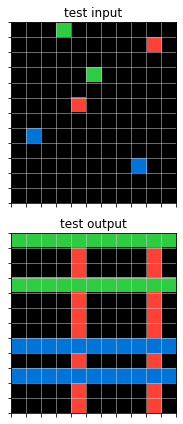

1a07d186.json
Icecuber solved? False
['bring_patterns_close', 'find_the_intruder']
7 objects
[[3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]]
[[4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]]
[[4]]
[[3]]
[[4]]
[[2]]
[[3]]
2 objects
[[3 0]
 [3 0]
 [3 0]
 [3 3]
 [3 0]
 [3 0]
 [3 0]
 [3 0]
 [3 0]
 [3 0]
 [3 0]
 [3 3]
 [3 0]
 [3 0]
 [3 0]
 [3 0]
 [3 0]
 [3 0]]
[[0 4]
 [0 4]
 [0 4]
 [4 4]
 [0 4]
 [0 4]
 [0 4]
 [4 4]
 [0 4]
 [0 4]
 [0 4]
 [0 4]
 [0 4]
 [0 4]
 [0 4]
 [0 4]
 [0 4]
 [0 4]]
8 objects
[[2]]
[[4]]
[[2 2 2 2 2 2 2 2 2 2 2 2 2 2]]
[[1]]
[[2]]
[[1 1 1 1 1 1 1 1 1 1 1 1 1 1]]
[[1]]
[[2]]
2 objects
[[0 0 0 2 0 0 0 0 0 0 0 0 0 0]
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2]
 [0 0 0 0 0 0 2 0 0 0 2 0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0]]
6 objects
[[1]]
[[8]]
[[8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]]
[[8]]
[[8]]
[[1]]
1 objects
[[0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0]
 [

14 objects
[[2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]]
[[3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]]
[[4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]]
[[2]]
[[8]]
[[8]]
[[4]]
[[3]]
[[2]]
[[8]]
[[8]]
[[3]]
[[4]]
[[3]]
3 objects
[[0 2 0]
 [0 2 0]
 [0 2 2]
 [0 2 0]
 [0 2 0]
 [0 2 0]
 [0 2 0]
 [0 2 0]
 [0 2 0]
 [0 2 0]
 [2 2 0]
 [0 2 0]
 [0 2 0]
 [0 2 0]
 [0 2 0]
 [0 2 0]
 [0 2 0]
 [0 2 0]
 [0 2 0]]
[[0 3 0]
 [0 3 0]
 [0 3 0]
 [0 3 0]
 [0 3 0]
 [0 3 0]
 [0 3 0]
 [0 3 0]
 [0 3 0]
 [0 3 3]
 [0 3 0]
 [0 3 0]
 [0 3 0]
 [0 3 0]
 [0 3 0]
 [3 3 0]
 [0 3 0]
 [0 3 3]
 [0 3 0]]
[[0 4 0]
 [0 4 0]
 [0 4 0]
 [0 4 0]
 [0 4 0]
 [0 4 0]
 [0 4 0]
 [4 4 0]
 [0 4 0]
 [0 4 0]
 [0 4 0]
 [0 4 0]
 [0 4 0]
 [0 4 0]
 [0 4 0]
 [0 4 4]
 [0 4 0]
 [0 4 0]
 [0 4 0]]


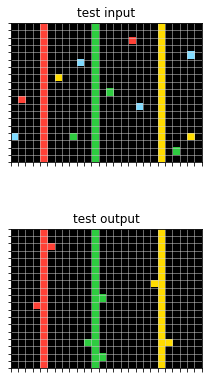

1b2d62fb.json
Icecuber solved? True
['detect_wall', 'separate_images', 'pattern_intersection']
5 objects
[[9 9]
 [0 9]
 [0 9]]
[[1]
 [1]
 [1]
 [1]
 [1]]
[[9 9 9]
 [9 9 0]
 [9 9 0]
 [9 0 0]
 [9 9 9]]
[[9]]
[[9 9]]
1 objects
[[8 8]]
5 objects
[[1]
 [1]
 [1]
 [1]
 [1]]
[[9 0 0]
 [9 9 9]
 [9 9 9]
 [9 9 9]
 [9 9 9]]
[[9]]
[[0 9]
 [9 9]]
[[9 9]]
1 objects
[[8 8]]
8 objects
[[9]
 [9]
 [9]]
[[1]
 [1]
 [1]
 [1]
 [1]]
[[9]]
[[9]]
[[9]]
[[9]]
[[9 9]
 [0 9]]
[[9 9]
 [9 0]]
3 objects
[[8]]
[[0 8]
 [8 8]]
[[8]
 [8]]
7 objects
[[9 9]]
[[1]
 [1]
 [1]
 [1]
 [1]]
[[9 0 0]
 [9 0 0]
 [9 9 9]]
[[9]]
[[9 0 0]
 [9 9 9]
 [0 9 0]]
[[9]]
[[9]]
3 objects
[[8 8]]
[[8]]
[[0 8]
 [8 8]]
5 objects
[[0 9 9]
 [9 0 9]
 [9 9 9]
 [9 0 0]
 [9 9 9]]
[[1]
 [1]
 [1]
 [1]
 [1]]
[[9 0 9]
 [9 9 9]
 [0 0 9]]
[[9]]
[[9]]
1 objects
[[8 8]]


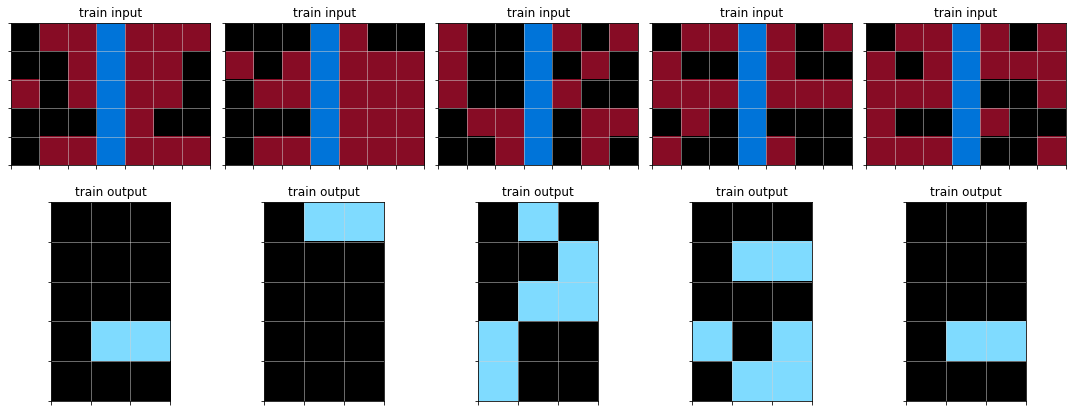

6 objects
[[9 9 0]
 [0 9 9]
 [9 9 0]
 [9 9 9]
 [0 9 9]]
[[1]
 [1]
 [1]
 [1]
 [1]]
[[9]]
[[9]]
[[9]]
[[0 9]
 [9 9]]
4 objects
[[8]]
[[8]]
[[8]]
[[8]]


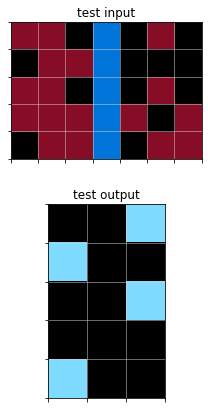

1b60fb0c.json
Icecuber solved? False
['pattern_deconstruction', 'pattern_rotation', 'pattern_expansion']
1 objects
[[1 1 1 0 0 0]
 [0 1 1 0 0 0]
 [0 1 0 0 0 1]
 [0 1 1 1 1 1]
 [0 1 1 0 1 1]
 [0 0 1 0 0 0]
 [0 1 1 0 0 0]
 [0 1 1 1 0 0]]
2 objects
[[1 1 1 0 0 0]
 [0 1 1 0 0 0]
 [0 1 0 0 0 1]
 [0 1 1 1 1 1]
 [0 1 1 0 1 1]
 [0 0 1 0 0 0]
 [0 1 1 0 0 0]
 [0 1 1 1 0 0]]
[[2 2 0]
 [2 2 2]
 [2 0 0]]
1 objects
[[1 1 1 1 1 0 0]
 [1 1 1 1 1 0 0]
 [0 0 1 0 0 1 1]
 [0 0 1 0 0 1 1]
 [0 0 1 1 1 1 1]
 [0 0 1 0 0 1 1]
 [0 0 1 0 0 1 1]
 [1 1 1 1 1 0 0]
 [1 1 1 1 1 0 0]]
2 objects
[[1 1 1 1 1 0 0]
 [1 1 1 1 1 0 0]
 [0 0 1 0 0 1 1]
 [0 0 1 0 0 1 1]
 [0 0 1 1 1 1 1]
 [0 0 1 0 0 1 1]
 [0 0 1 0 0 1 1]
 [1 1 1 1 1 0 0]
 [1 1 1 1 1 0 0]]
[[2 2 0 0]
 [2 2 0 0]
 [2 2 2 2]
 [2 2 0 0]
 [2 2 0 0]]
1 objects
[[1 1 1 1 1 0 0]
 [0 0 1 0 0 0 0]
 [0 1 1 1 0 0 1]
 [0 0 1 0 1 0 1]
 [0 0 1 1 1 1 1]
 [0 0 1 0 1 0 1]
 [0 1 1 1 0 0 1]
 [0 0 1 0 0 0 0]
 [1 1 1 1 1 0 0]]
2 objects
[[1 1 1 1 1 0 0]
 [0 0 1 0 0 0 0]
 [0 1 1 1 0 0

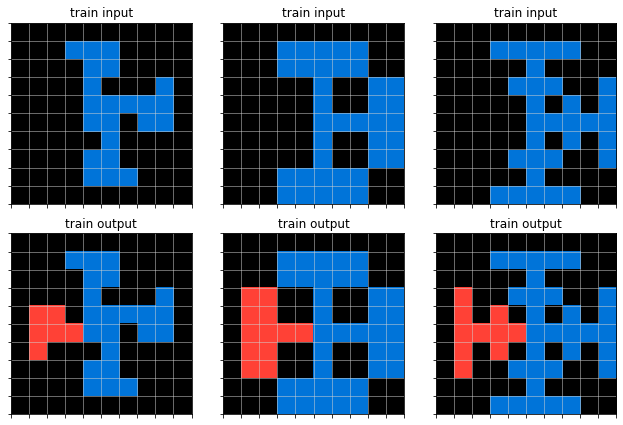

1 objects
[[0 0 1 0 0 0 0 0]
 [1 1 1 1 1 0 0 0]
 [0 0 1 1 0 0 1 0]
 [0 0 1 0 0 0 1 0]
 [0 0 1 1 1 1 1 1]
 [0 0 1 1 0 1 1 0]
 [0 0 0 1 0 0 1 0]
 [0 0 1 1 0 0 0 0]
 [0 1 1 1 1 1 0 0]
 [0 0 0 1 0 0 0 0]]
2 objects
[[0 0 1 0 0 0 0 0]
 [1 1 1 1 1 0 0 0]
 [0 0 1 1 0 0 1 0]
 [0 0 1 0 0 0 1 0]
 [0 0 1 1 1 1 1 1]
 [0 0 1 1 0 1 1 0]
 [0 0 0 1 0 0 1 0]
 [0 0 1 1 0 0 0 0]
 [0 1 1 1 1 1 0 0]
 [0 0 0 1 0 0 0 0]]
[[0 2 0 0]
 [0 2 2 0]
 [2 2 2 2]
 [0 2 0 0]
 [0 2 0 0]]


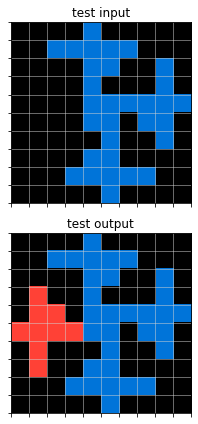

1bfc4729.json
Icecuber solved? True
['pattern_expansion']
2 objects
[[6]]
[[7]]
2 objects
[[6 6 6 6 6 6 6 6 6 6]
 [6 0 0 0 0 0 0 0 0 6]
 [6 6 6 6 6 6 6 6 6 6]
 [6 0 0 0 0 0 0 0 0 6]
 [6 0 0 0 0 0 0 0 0 6]]
[[7 0 0 0 0 0 0 0 0 7]
 [7 0 0 0 0 0 0 0 0 7]
 [7 7 7 7 7 7 7 7 7 7]
 [7 0 0 0 0 0 0 0 0 7]
 [7 7 7 7 7 7 7 7 7 7]]
2 objects
[[1]]
[[4]]
2 objects
[[1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 1]]
[[4 0 0 0 0 0 0 0 0 4]
 [4 0 0 0 0 0 0 0 0 4]
 [4 4 4 4 4 4 4 4 4 4]
 [4 0 0 0 0 0 0 0 0 4]
 [4 4 4 4 4 4 4 4 4 4]]


2 objects
[[2]]
[[8]]
2 objects
[[2 2 2 2 2 2 2 2 2 2]
 [2 0 0 0 0 0 0 0 0 2]
 [2 2 2 2 2 2 2 2 2 2]
 [2 0 0 0 0 0 0 0 0 2]
 [2 0 0 0 0 0 0 0 0 2]]
[[8 0 0 0 0 0 0 0 0 8]
 [8 0 0 0 0 0 0 0 0 8]
 [8 8 8 8 8 8 8 8 8 8]
 [8 0 0 0 0 0 0 0 0 8]
 [8 8 8 8 8 8 8 8 8 8]]


1c786137.json
Icecuber solved? True
['detect_enclosure', 'crop']
209 objects
[[3 0]
 [3 3]]
[[8 8]]
[[3]]
[[8 8]]
[[8]
 [8]]
[[3 0]
 [3 3]
 [3 0]]
[[1 1 1 0 0]
 [0 0 1 1 0]
 [0 0 0 1 0]
 [0 0 0 1 1]]
[[8 8]
 [0 8]]
[[3]
 [3]]
[[8]]
[[3]]
[[8]]
[[5]]
[[3]]
[[3]
 [3]]
[[8]]
[[1]]
[[1]]
[[8]]
[[3]]
[[1]]
[[5]]
[[1]]
[[3]]
[[1 1]]
[[8]]
[[8]]
[[3]]
[[8 8]]
[[5 5]]
[[5]]
[[3]]
[[8]]
[[2 2 2 2 2 2 2 2 2 2]
 [2 0 0 0 0 0 0 0 0 2]
 [2 0 0 0 0 0 0 0 0 2]
 [2 0 0 0 0 0 0 0 0 2]
 [2 0 0 0 0 0 0 0 0 2]
 [2 0 0 0 0 0 0 0 0 2]
 [2 0 0 0 0 0 0 0 0 2]
 [2 2 2 2 2 2 2 2 2 2]]
[[3]]
[[3]]
[[1]]
[[3 3]]
[[8]]
[[0 3 3 3 3]
 [0 3 0 3 0]
 [3 3 0 0 0]]
[[8]]
[[3 3]]
[[1]]
[[8]]
[[8]]
[[1]]
[[1]
 [1]]
[[8]]
[[1]]
[[1 1]]
[[5]]
[[3 3]
 [3 3]]
[[8]]
[[1]
 [1]]
[[8]]
[[3]]
[[1]]
[[8 8]]
[[5]]
[[1]]
[[3]
 [3]]
[[5]]
[[3]]
[[1]]
[[1]]
[[5]
 [5]]
[[1]]
[[3]]
[[1]]
[[1 1]]
[[8 8]]
[[5]]
[[0 3]
 [3 3]
 [3 0]]
[[8]
 [8]]
[[8]]
[[3 3 3]]
[[8]]
[[3]]
[[8 8]]
[[3 3]]
[[1 1 1]]
[[5]]
[[8]
 [8]
 [8]]
[[1]
 [1]]
[[3 3 3]]
[

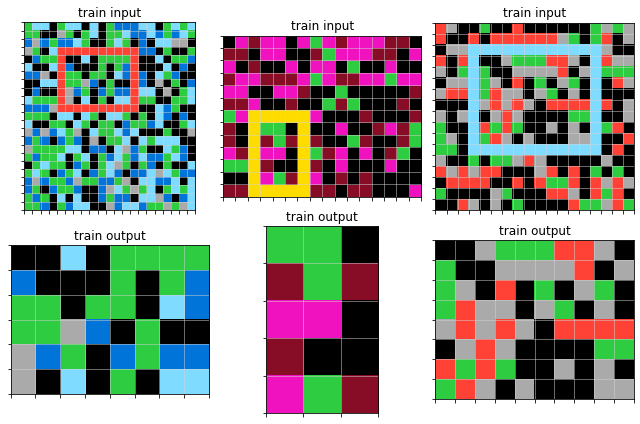

92 objects
[[0 8 0]
 [0 8 8]
 [8 8 0]]
[[1 1]
 [0 1]
 [1 1]]
[[8]]
[[8]]
[[8]]
[[8]]
[[1]]
[[1 1 0]
 [0 1 1]
 [0 1 0]]
[[2]]
[[8]
 [8]]
[[1 1]]
[[2]]
[[2]]
[[8 8]
 [0 8]]
[[8 0 0]
 [8 8 8]]
[[1]]
[[1]]
[[1]]
[[8]]
[[1]]
[[1 1]]
[[8]]
[[0 8]
 [0 8]
 [8 8]
 [0 8]]
[[3 3 3 3 3 3 3 3 3 3 3]
 [3 0 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 0 0 0 3]
 [3 3 3 3 3 3 3 3 3 3 3]]
[[2]]
[[1]]
[[2]]
[[8]]
[[1 1 1]]
[[1]]
[[8]
 [8]]
[[1]]
[[8]]
[[2]]
[[8]]
[[0 0 1]
 [0 1 1]
 [1 1 0]]
[[2]]
[[8]]
[[1]]
[[0 8]
 [8 8]]
[[1]]
[[2]]
[[2]]
[[8]]
[[1]]
[[8]]
[[1]
 [1]]
[[0 8 8]
 [0 8 8]
 [8 8 0]]
[[8]]
[[1]]
[[8]]
[[2]]
[[1]
 [1]]
[[1]]
[[0 8 0 0 0]
 [8 8 8 8 8]
 [0 0 0 8 8]]
[[2]]
[[8 0]
 [8 8]
 [8 0]
 [8 0]]
[[8 8]]
[[2]]
[[1 1 1]
 [1 0 0]]
[[8]]
[[2]]
[[8]]
[[2]]
[[8 8]]
[[1]]
[[2]]
[[2]]
[[1]]
[[8]
 [8]
 [8]
 [8]]
[[1 1]
 [1 0]
 [1 0]]
[[2]]
[[8 8]
 [8 0]
 [8 0]]

1caeab9d.json
Icecuber solved? False
['pattern_moving', 'pattern_alignment']
3 objects
[[2 2]
 [2 2]]
[[1 1]
 [1 1]]
[[4 4]
 [4 4]]
3 objects
[[2 2]
 [2 2]]
[[4 4]
 [4 4]]
[[1 1]
 [1 1]]
3 objects
[[4 4 4]
 [4 4 4]]
[[2 2 2]
 [2 2 2]]
[[1 1 1]
 [1 1 1]]
3 objects
[[2 2 2]
 [2 2 2]]
[[1 1 1]
 [1 1 1]]
[[4 4 4]
 [4 4 4]]
3 objects
[[2]
 [2]]
[[1]
 [1]]
[[4]
 [4]]
3 objects
[[1]
 [1]]
[[2]
 [2]]
[[4]
 [4]]


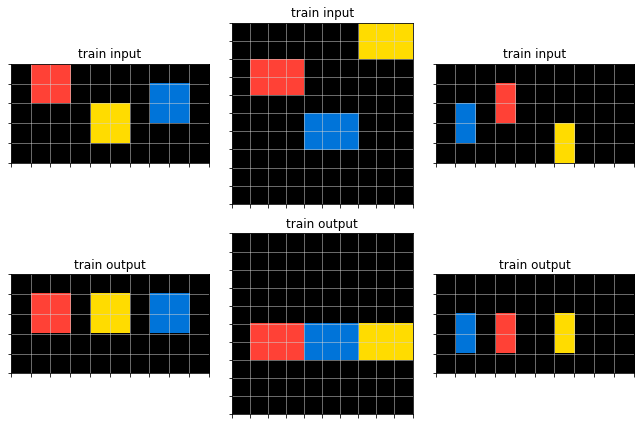

6 objects
[[2 2]
 [2 2]]
[[1 1]
 [1 1]]
[[2]]
[[1]]
[[4 4]
 [4 4]]
[[4]]
6 objects
[[1 1]
 [1 1]]
[[4 4]
 [4 4]]
[[2 2]
 [2 2]]
[[1]]
[[4]]
[[2]]


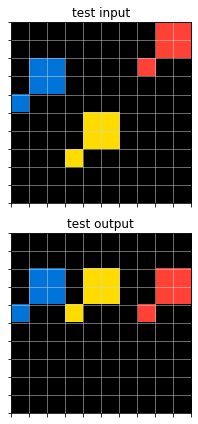

1cf80156.json
Icecuber solved? True
['crop']
1 objects
[[0 2 2 2]
 [0 0 2 0]
 [2 2 2 0]
 [2 0 2 0]]
1 objects
[[0 2 2 2]
 [0 0 2 0]
 [2 2 2 0]
 [2 0 2 0]]
1 objects
[[1 0 0]
 [1 1 0]
 [0 1 0]
 [1 1 1]
 [0 0 1]]
1 objects
[[1 0 0]
 [1 1 0]
 [0 1 0]
 [1 1 1]
 [0 0 1]]
1 objects
[[0 8 0 8 0]
 [8 8 8 8 0]
 [0 0 0 8 8]]
1 objects
[[0 8 0 8 0]
 [8 8 8 8 0]
 [0 0 0 8 8]]


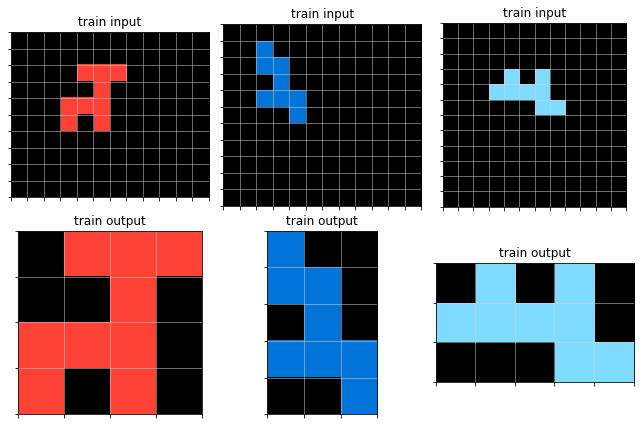

1 objects
[[0 0 6 6 6 6]
 [0 0 6 0 0 0]
 [6 0 6 0 0 0]
 [6 6 6 6 0 0]]
1 objects
[[0 0 6 6 6 6]
 [0 0 6 0 0 0]
 [6 0 6 0 0 0]
 [6 6 6 6 0 0]]


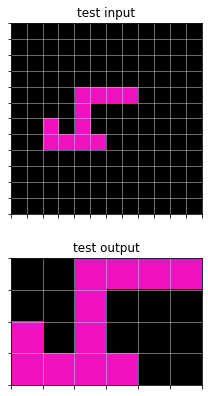

1e0a9b12.json
Icecuber solved? True
['pattern_moving', 'gravity']
5 objects
[[4]]
[[9]]
[[4]]
[[6]]
[[1]]
4 objects
[[4]
 [4]]
[[1]]
[[6]]
[[9]]
5 objects
[[9]]
[[8]]
[[4]
 [4]
 [4]]
[[7]
 [7]]
[[8]]
4 objects
[[4]
 [4]
 [4]]
[[7]
 [7]]
[[8]
 [8]]
[[9]]
6 objects
[[1]]
[[3]
 [3]]
[[1]]
[[2]]
[[6]]
[[3]]
4 objects
[[3]
 [3]
 [3]]
[[1]
 [1]]
[[6]]
[[2]]


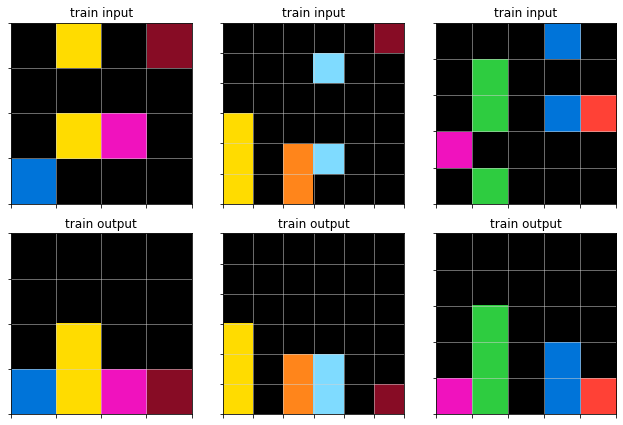

8 objects
[[2]]
[[4]]
[[3]]
[[5]]
[[6]]
[[5]
 [5]]
[[2]]
[[4]]
5 objects
[[5]
 [5]
 [5]]
[[2]
 [2]]
[[4]
 [4]]
[[6]]
[[3]]


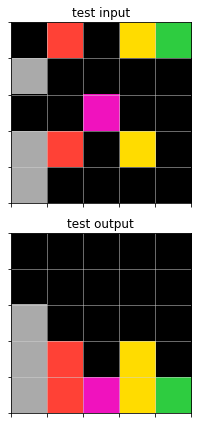

1e32b0e9.json
Icecuber solved? True
['detect_grid', 'separate_images', 'image_repetition', 'pattern_completion']
8 objects
[[0 0 0 0 0 8 0 0 0 0 0 8 0 0 0 0 0]
 [0 0 0 0 0 8 0 0 0 0 0 8 0 0 0 0 0]
 [0 0 0 0 0 8 0 0 0 0 0 8 0 0 0 0 0]
 [0 0 0 0 0 8 0 0 0 0 0 8 0 0 0 0 0]
 [0 0 0 0 0 8 0 0 0 0 0 8 0 0 0 0 0]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
 [0 0 0 0 0 8 0 0 0 0 0 8 0 0 0 0 0]
 [0 0 0 0 0 8 0 0 0 0 0 8 0 0 0 0 0]
 [0 0 0 0 0 8 0 0 0 0 0 8 0 0 0 0 0]
 [0 0 0 0 0 8 0 0 0 0 0 8 0 0 0 0 0]
 [0 0 0 0 0 8 0 0 0 0 0 8 0 0 0 0 0]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
 [0 0 0 0 0 8 0 0 0 0 0 8 0 0 0 0 0]
 [0 0 0 0 0 8 0 0 0 0 0 8 0 0 0 0 0]
 [0 0 0 0 0 8 0 0 0 0 0 8 0 0 0 0 0]
 [0 0 0 0 0 8 0 0 0 0 0 8 0 0 0 0 0]
 [0 0 0 0 0 8 0 0 0 0 0 8 0 0 0 0 0]]
[[0 2 0]
 [2 2 2]
 [0 2 0]]
[[2 2 2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[0 2 0]
 [2 2 2]
 [0 2 0]]
16 objects
[[0 0 0 0 0 8 0 0 0 0 0 8 0 0 0 0 0]
 [0 0 0 0 0 8 0 0 0 0 0 8 0 0 0 0 0]
 [0 0 0 0 0 8 0 0 0 0 0 8 0 0 0 0 0]
 [0 0 0 0 0 8 0 0 0 0 0 8 0 0 0 0 0

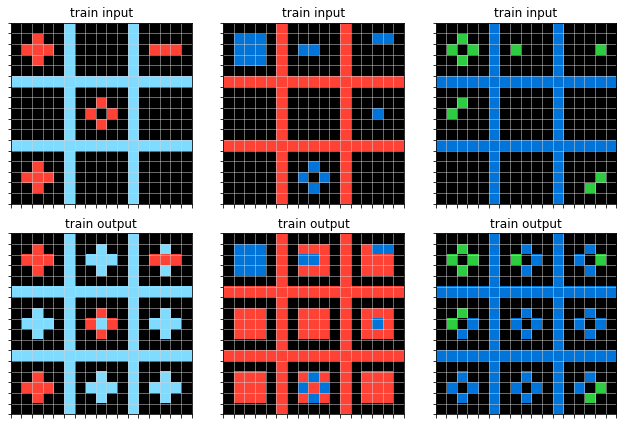

10 objects
[[0 0 0 0 0 9 0 0 0 0 0 9 0 0 0 0 0]
 [0 0 0 0 0 9 0 0 0 0 0 9 0 0 0 0 0]
 [0 0 0 0 0 9 0 0 0 0 0 9 0 0 0 0 0]
 [0 0 0 0 0 9 0 0 0 0 0 9 0 0 0 0 0]
 [0 0 0 0 0 9 0 0 0 0 0 9 0 0 0 0 0]
 [9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9]
 [0 0 0 0 0 9 0 0 0 0 0 9 0 0 0 0 0]
 [0 0 0 0 0 9 0 0 0 0 0 9 0 0 0 0 0]
 [0 0 0 0 0 9 0 0 0 0 0 9 0 0 0 0 0]
 [0 0 0 0 0 9 0 0 0 0 0 9 0 0 0 0 0]
 [0 0 0 0 0 9 0 0 0 0 0 9 0 0 0 0 0]
 [9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9]
 [0 0 0 0 0 9 0 0 0 0 0 9 0 0 0 0 0]
 [0 0 0 0 0 9 0 0 0 0 0 9 0 0 0 0 0]
 [0 0 0 0 0 9 0 0 0 0 0 9 0 0 0 0 0]
 [0 0 0 0 0 9 0 0 0 0 0 9 0 0 0 0 0]
 [0 0 0 0 0 9 0 0 0 0 0 9 0 0 0 0 0]]
[[4 4 4]
 [4 0 4]
 [4 4 4]]
[[4 4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4 4]]
[[4]]
[[4]]
22 objects
[[0 0 0 0 0 9 0 0 0 0 0 9 0 0 0 0 0]
 [0 0 0 0 0 9 0 0 0 0 0 9 0 0 0 0 0]
 [0 0 0 0 0 9 0 0 0 0 0 9 0 0 0 0 0]
 [0 0 0 0 0 9 0 0 0 0 0 9 0 0 0 0 0]
 [0 0 0 0 0 9 0 0 0 0 0 9 0 0 0 0 0]
 [9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9]
 [0 0 0 0 0 9 0 0 0 0 0 9 0 0 0 0 0]
 [0 0 0 0

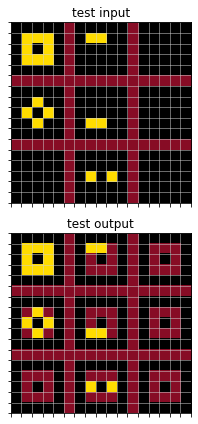

1f0c79e5.json
Icecuber solved? True
['pattern_expansion', 'diagonals', 'direction_guessing']
2 objects
[[4 0]
 [4 4]]
[[2]]
1 objects
[[0 0 0 0 4 4 4]
 [0 0 0 4 4 4 0]
 [0 0 4 4 4 0 0]
 [0 4 4 4 0 0 0]
 [4 4 4 0 0 0 0]
 [4 4 0 0 0 0 0]]
2 objects
[[3 3]
 [3 0]]
[[2]]
1 objects
[[3 3 0 0 0 0 0]
 [3 3 3 0 0 0 0]
 [0 3 3 3 0 0 0]
 [0 0 3 3 3 0 0]
 [0 0 0 3 3 3 0]
 [0 0 0 0 3 3 3]
 [0 0 0 0 0 3 3]
 [0 0 0 0 0 0 3]]
4 objects
[[6]]
[[2]]
[[2]]
[[6]]
1 objects
[[0 0 0 0 0 0 6 6 6]
 [0 0 0 0 0 6 6 6 0]
 [0 0 0 0 6 6 6 0 0]
 [0 0 0 6 6 6 0 0 0]
 [0 0 6 6 6 0 0 0 0]
 [0 6 6 6 0 0 0 0 0]
 [6 6 6 0 0 0 0 0 0]
 [6 6 0 0 0 0 0 0 0]
 [6 0 0 0 0 0 0 0 0]]
2 objects
[[2 2]
 [2 0]]
[[7]]
1 objects
[[7 7 0 0 0 0 7 7 7]
 [7 7 7 0 0 7 7 7 0]
 [0 7 7 7 7 7 7 0 0]
 [0 0 7 7 7 7 0 0 0]
 [0 0 7 7 7 0 0 0 0]
 [0 7 7 7 0 0 0 0 0]
 [7 7 7 0 0 0 0 0 0]
 [7 7 0 0 0 0 0 0 0]
 [7 0 0 0 0 0 0 0 0]]


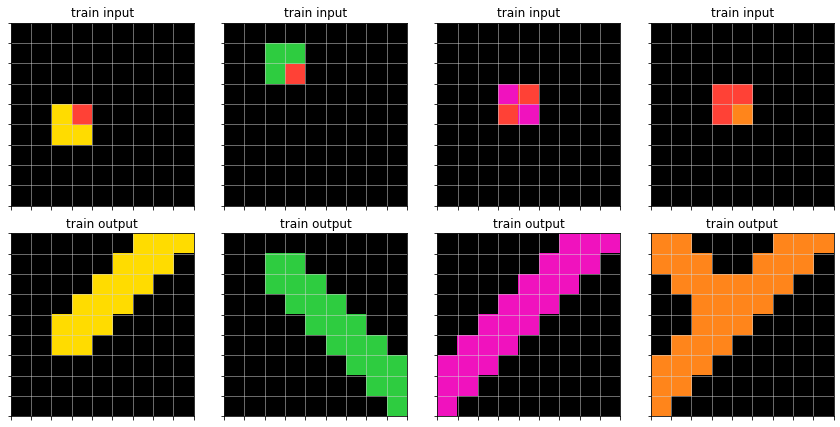

2 objects
[[2 2]
 [0 2]]
[[8]]
1 objects
[[8 8 8 0 0 8 8]
 [0 8 8 8 8 8 8]
 [0 0 8 8 8 8 0]
 [0 0 0 8 8 8 0]
 [0 0 0 0 8 8 8]
 [0 0 0 0 0 8 8]
 [0 0 0 0 0 0 8]]


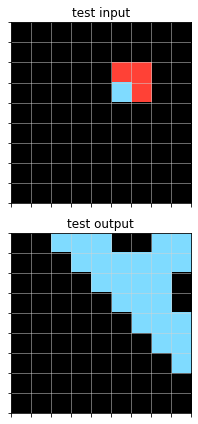

1f642eb9.json
Icecuber solved? False
['image_within_image', 'projection_unto_rectangle']
4 objects
[[9]]
[[8 8]
 [8 8]
 [8 8]
 [8 8]]
[[6]]
[[4]]
7 objects
[[9]]
[[9]]
[[0 8]
 [8 8]
 [8 8]]
[[6]]
[[6]]
[[4]]
[[4]]
6 objects
[[7]]
[[6]]
[[8 8 8]
 [8 8 8]
 [8 8 8]
 [8 8 8]
 [8 8 8]]
[[2]]
[[3]]
[[1]]
11 objects
[[7]]
[[6]]
[[6]]
[[7]]
[[0 0 8]
 [8 8 8]
 [8 8 0]
 [8 8 8]
 [0 8 0]]
[[2]]
[[2]]
[[3]]
[[3]]
[[1]]
[[1]]
7 objects
[[4]]
[[8 8 8]
 [8 8 8]
 [8 8 8]
 [8 8 8]
 [8 8 8]]
[[6]]
[[3]]
[[2]]
[[2]]
[[7]]
13 objects
[[4]]
[[4]]
[[0 8 0]
 [0 8 8]
 [8 8 8]
 [0 8 8]
 [0 8 0]]
[[6]]
[[6]]
[[3]]
[[3]]
[[2]]
[[2]]
[[7]]
[[2]]
[[2]]
[[7]]


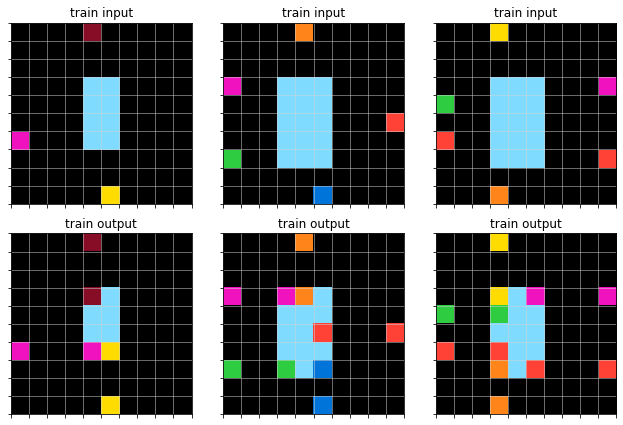

8 objects
[[6]]
[[2]]
[[9]]
[[8 8 8 8]
 [8 8 8 8]
 [8 8 8 8]
 [8 8 8 8]]
[[7]]
[[3]]
[[4]]
[[6]]
15 objects
[[6]]
[[2]]
[[9]]
[[9]]
[[6]]
[[0 0 8 0]
 [8 8 8 0]
 [0 8 8 8]
 [0 8 0 8]]
[[2]]
[[7]]
[[7]]
[[3]]
[[3]]
[[4]]
[[4]]
[[6]]
[[6]]


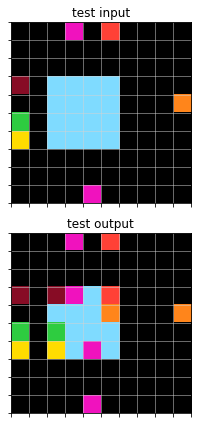

1f85a75f.json
Icecuber solved? True
['crop', 'find_the_intruder']
87 objects
[[1]]
[[1]]
[[5]]
[[5]]
[[5]]
[[1]]
[[5]
 [5]]
[[5]]
[[1]]
[[5]]
[[1]]
[[1 1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[5]
 [5]]
[[1]]
[[1]]
[[5]]
[[1]]
[[5]]
[[1]]
[[1]]
[[5]]
[[1]]
[[5]]
[[1]]
[[5]]
[[1]]
[[3 3 0]
 [3 3 3]
 [3 0 3]
 [3 3 3]
 [0 3 3]]
[[1]]
[[5]]
[[5]]
[[1]]
[[1 1]]
[[1]]
[[1]]
[[5]]
[[1]]
[[5]]
[[5]]
[[5]]
[[5]]
[[5]]
[[1]]
[[1]]
[[5]]
[[1]]
[[1]]
[[1]]
[[5]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[5]]
[[1]]
[[5]]
[[1]]
[[1]]
[[5]]
[[1]]
[[1]]
[[1]]
[[5]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[5]]
[[1]]
[[1]]
[[5]]
[[1]]
[[1]]
[[5]]
[[1 1]]
[[5]
 [5]]
[[5]]
[[5]]
[[5]]
[[5]]
[[1]]
1 objects
[[3 3 0]
 [3 3 3]
 [3 0 3]
 [3 3 3]
 [0 3 3]]
37 objects
[[2 2]]
[[2]]
[[2]]
[[2]
 [2]]
[[2]
 [2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]
 [2]]
[[2]
 [2]]
[[2]]
[[2]]
[[0 4 0]
 [4 4 4]
 [0 4 4]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]
 [2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2 2]]
[[2]]
[[2]]


113 objects
[[1]]
[[3]]
[[8]]
[[3]]
[[8]]
[[8]]
[[3]]
[[8]]
[[0 8 0]
 [8 8 8]]
[[1 1]]
[[1]]
[[1]]
[[3]
 [3]]
[[8]]
[[8]]
[[1]]
[[8]]
[[3]]
[[8]]
[[1]]
[[3]]
[[1]]
[[8]]
[[8]]
[[3]]
[[8]]
[[8]]
[[8]]
[[1]
 [1]]
[[1 1]]
[[8]
 [8]
 [8]]
[[8 8]]
[[3]]
[[8]]
[[3]
 [3]]
[[1]]
[[1]]
[[8]]
[[3]]
[[1]]
[[8]]
[[1]]
[[8]]
[[3]]
[[8]]
[[3]]
[[8]]
[[1]]
[[1]]
[[3]]
[[3]]
[[0 2 2 2]
 [2 2 0 2]
 [2 2 0 2]
 [0 2 2 2]]
[[1]]
[[8]]
[[1]]
[[1]]
[[3]]
[[1]]
[[3]]
[[8]]
[[3]]
[[1]]
[[3]]
[[8]]
[[1 1]]
[[8]]
[[3]]
[[8]
 [8]]
[[8]]
[[3]]
[[3]]
[[3]]
[[3]]
[[1]
 [1]]
[[3]]
[[3]]
[[1]]
[[8]]
[[3]]
[[1]]
[[3]]
[[1]]
[[3]]
[[3]]
[[1]]
[[3]]
[[8]]
[[8]]
[[8]]
[[1 1 1]]
[[8]]
[[1]]
[[8]]
[[8]]
[[8]]
[[1]]
[[8]]
[[3]]
[[3]]
[[1]]
[[3]
 [3]]
[[1]]
[[1]]
[[8]]
[[3]]
[[1]]
[[1]]
[[3]]
[[3]
 [3]]
[[8]]
[[8]]
[[3]]
[[3]]
1 objects
[[0 2 2 2]
 [2 2 0 2]
 [2 2 0 2]
 [0 2 2 2]]


1f876c06.json
Icecuber solved? True
['connect_the_dots', 'diagonals']
6 objects
[[2]]
[[6]]
[[2]]
[[6]]
[[4]]
[[4]]
13 objects
[[2]]
[[6]]
[[2]]
[[6]]
[[2]]
[[6]]
[[6]]
[[6]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
8 objects
[[9]]
[[3]]
[[8]]
[[3]]
[[9]]
[[7]]
[[8]]
[[7]]
18 objects
[[9]]
[[3]]
[[9]]
[[3]]
[[9]]
[[8]]
[[3]]
[[9]]
[[8]]
[[8]]
[[8]]
[[7]]
[[8]]
[[7]]
[[8]]
[[7]]
[[7]]
[[7]]
8 objects
[[6]]
[[8]]
[[4]]
[[6]]
[[8]]
[[9]]
[[4]]
[[9]]
19 objects
[[6]]
[[8]]
[[6]]
[[8]]
[[6]]
[[4]]
[[8]]
[[6]]
[[4]]
[[8]]
[[4]]
[[8]]
[[9]]
[[4]]
[[9]]
[[4]]
[[9]]
[[9]]
[[9]]


10 objects
[[3]]
[[9]]
[[7]]
[[3]]
[[9]]
[[6]]
[[4]]
[[6]]
[[7]]
[[4]]
24 objects
[[3]]
[[9]]
[[7]]
[[3]]
[[9]]
[[7]]
[[3]]
[[9]]
[[7]]
[[3]]
[[9]]
[[6]]
[[7]]
[[6]]
[[7]]
[[4]]
[[6]]
[[7]]
[[4]]
[[6]]
[[7]]
[[4]]
[[4]]
[[4]]


1fad071e.json
Icecuber solved? True
['count_patterns', 'associate_images_to_numbers']
9 objects
[[2 2]
 [2 2]]
[[1]]
[[1 1]
 [1 1]]
[[2 2]
 [2 2]]
[[1]]
[[2 2]
 [2 2]]
[[1 1]
 [1 1]]
[[1]]
[[1]]
1 objects
[[1 1]]
12 objects
[[1 1]
 [1 1]]
[[2]]
[[2]]
[[1 1]
 [1 1]]
[[2]]
[[1]]
[[1 1]
 [1 1]]
[[2 2]
 [2 2]]
[[2]]
[[2 2]
 [2 2]]
[[1 1]
 [1 1]]
[[1]]
1 objects
[[1 1 1 1]]
11 objects
[[2 2]
 [2 2]]
[[1 1]
 [1 1]]
[[1 1]
 [1 1]]
[[1]]
[[2 2]
 [2 2]]
[[1 1]
 [1 1]]
[[1]]
[[2]]
[[1 1]
 [1 1]]
[[2 2]
 [2 2]]
[[1]]
1 objects
[[1 1 1 1]]


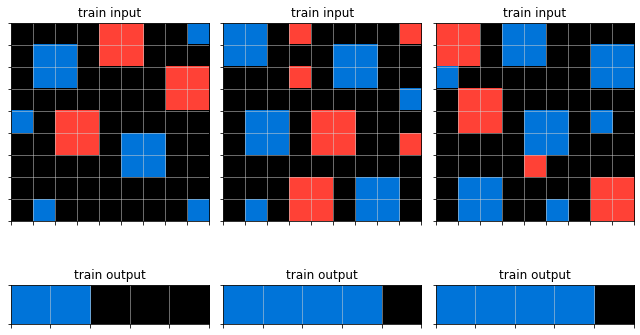

10 objects
[[2 2]
 [2 2]]
[[1]]
[[1 1]
 [1 1]]
[[1]]
[[1 1]
 [1 1]]
[[2 2]
 [2 2]]
[[1]]
[[2 2]
 [2 2]]
[[2 2]
 [2 2]]
[[1 1]
 [1 1]]
1 objects
[[1 1 1]]


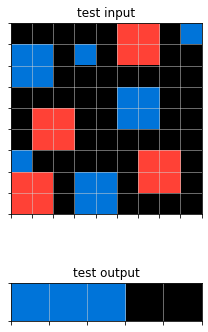

2013d3e2.json
Icecuber solved? True
['pattern_deconstruction', 'crop']
13 objects
[[7 7]]
[[6]]
[[8 8]]
[[6]]
[[7]
 [7]]
[[8]
 [8]]
[[4 4]
 [4 4]]
[[8]
 [8]]
[[7]
 [7]]
[[6]]
[[8 8]]
[[6]]
[[7 7]]
6 objects
[[7]]
[[6]]
[[8]]
[[7]]
[[8]]
[[4]]
17 objects
[[1]]
[[1]]
[[3]]
[[6]]
[[5]]
[[3]]
[[5]]
[[2 2]
 [2 2]]
[[6]]
[[6]]
[[5]]
[[3]]
[[5]]
[[6]]
[[3]]
[[1]]
[[1]]
5 objects
[[1]]
[[3]]
[[6]]
[[5]]
[[2]]


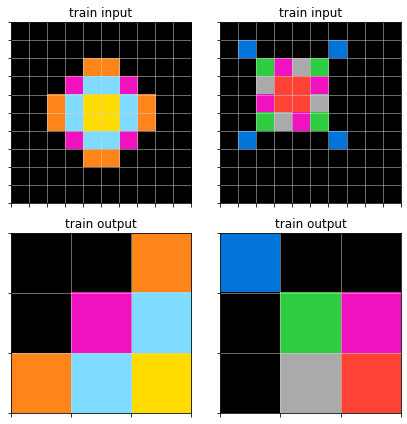

9 objects
[[8]
 [8]]
[[4 4]]
[[4]
 [4]]
[[8 8]]
[[3 3]
 [3 3]]
[[4]
 [4]]
[[8 8]]
[[8]
 [8]]
[[4 4]]
3 objects
[[4 4]]
[[8 8]]
[[3]]


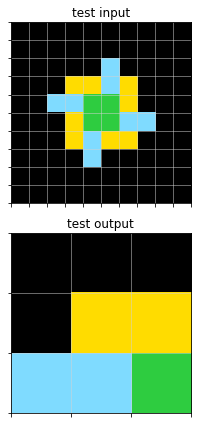

2204b7a8.json
Icecuber solved? True
['proximity_guessing', 'recoloring']
5 objects
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]]
[[3]]
[[3]]
[[3]]
5 objects
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]]
[[2]]
[[1]]
[[1]]
7 objects
[[4 4 4 4 4 4 4 4 4 4]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[7 7 7 7 7 7 7 7 7 7]]
7 objects
[[4 4 4 4 4 4 4 4 4 4]]
[[4]]
[[4]]
[[4]]
[[7]]
[[7]]
[[7 7 7 7 7 7 7 7 7 7]]
8 objects
[[8 8 8 8 8 8 8 8 8 8]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[9 9 9 9 9 9 9 9 9 9]]
8 objects
[[8 8 8 8 8 8 8 8 8 8]]
[[8]]
[[8]]
[[8]]
[[9]]
[[9]]
[[9]]
[[9 9 9 9 9 9 9 9 9 9]]


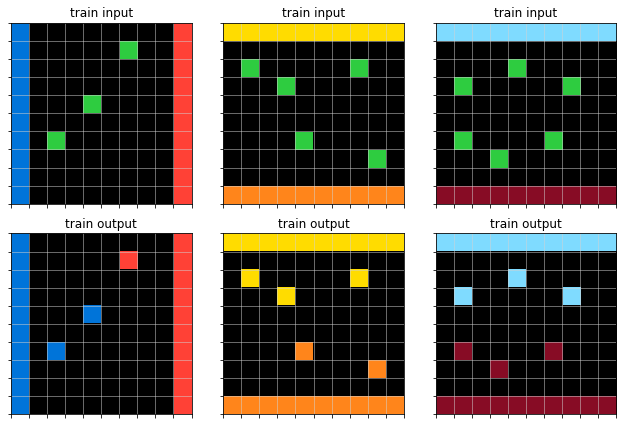

11 objects
[[5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]]
[[3]]
[[4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
9 objects
[[5 5]
 [5 0]
 [5 0]
 [5 0]
 [5 0]
 [5 0]
 [5 0]
 [5 0]
 [5 0]
 [5 0]]
[[0 4]
 [4 4]
 [0 4]
 [0 4]
 [0 4]
 [0 4]
 [0 4]
 [0 4]
 [0 4]
 [0 4]]
[[4]]
[[5]]
[[4]]
[[5]]
[[5]]
[[5]]
[[4]]


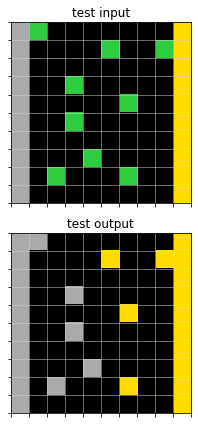

22168020.json
Icecuber solved? True
['pattern_expansion']
7 objects
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3 3]
 [3 3]]
1 objects
[[3 3 3 3 3 3 3 3]
 [0 3 3 3 3 3 3 0]
 [0 0 3 3 3 3 0 0]
 [0 0 0 3 3 0 0 0]
 [0 0 0 3 3 0 0 0]]
10 objects
[[1]]
[[1]]
[[1]]
[[1]]
[[1 1]
 [1 1]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4 4]
 [4 4]]
2 objects
[[1 1 1 1 1 1]
 [0 1 1 1 1 0]
 [0 0 1 1 0 0]
 [0 0 1 1 0 0]]
[[4 4 4 4 4 4]
 [0 4 4 4 4 0]
 [0 0 4 4 0 0]
 [0 0 4 4 0 0]]
12 objects
[[6]]
[[6]]
[[6]]
[[6]]
[[6 6]
 [6 6]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8 8]
 [8 8]]
2 objects
[[6 6 6 6 6 6]
 [0 6 6 6 6 0]
 [0 0 6 6 0 0]
 [0 0 6 6 0 0]]
[[8 8 8 8 8 8 8 8]
 [0 8 8 8 8 8 8 0]
 [0 0 8 8 8 8 0 0]
 [0 0 0 8 8 0 0 0]
 [0 0 0 8 8 0 0 0]]


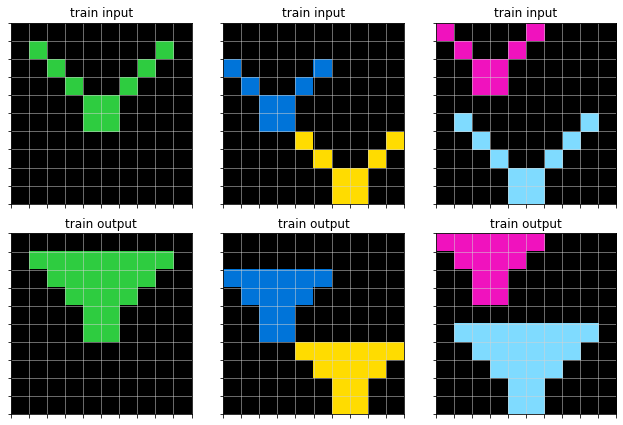

13 objects
[[4]]
[[4]]
[[4 4]
 [4 4]]
[[7]]
[[7]]
[[7]]
[[7]]
[[7 7]
 [7 7]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3 3]
 [3 3]]
3 objects
[[4 4 4 4]
 [0 4 4 0]
 [0 4 4 0]]
[[7 7 7 7 7 7]
 [0 7 7 7 7 0]
 [0 0 7 7 0 0]
 [0 0 7 7 0 0]]
[[3 3 3 3 3 3]
 [0 3 3 3 3 0]
 [0 0 3 3 0 0]
 [0 0 3 3 0 0]]


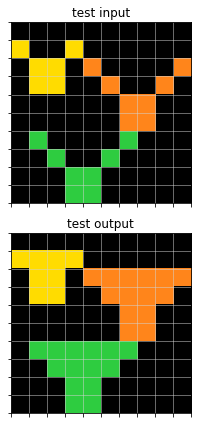

22233c11.json
Icecuber solved? False
['pattern_expansion', 'size_guessing']
4 objects
[[3]]
[[3]]
[[3]]
[[3]]
8 objects
[[8]]
[[3]]
[[3]]
[[8]]
[[8]]
[[3]]
[[3]]
[[8]]
2 objects
[[3 3]
 [3 3]]
[[3 3]
 [3 3]]
4 objects
[[8]
 [8]]
[[3 3]
 [3 3]]
[[3 3]
 [3 3]]
[[8 8]
 [8 8]]
2 objects
[[3]]
[[3]]
4 objects
[[8]]
[[3]]
[[3]]
[[8]]


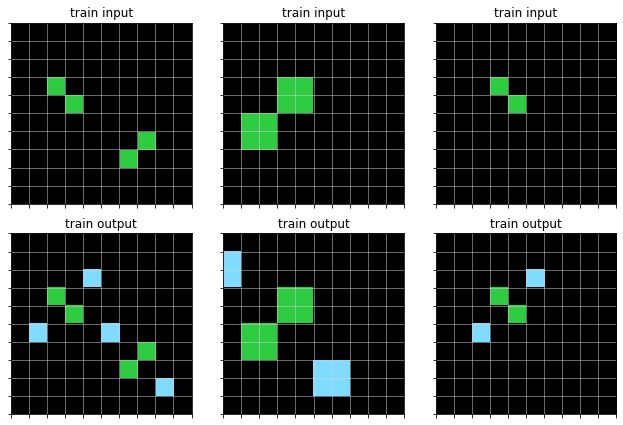

2 objects
[[3 3 3]
 [3 3 3]
 [3 3 3]]
[[3 3 3]
 [3 3 3]
 [3 3 3]]
4 objects
[[8 8 8]
 [8 8 8]]
[[3 3 3]
 [3 3 3]
 [3 3 3]]
[[3 3 3]
 [3 3 3]
 [3 3 3]]
[[8]
 [8]]


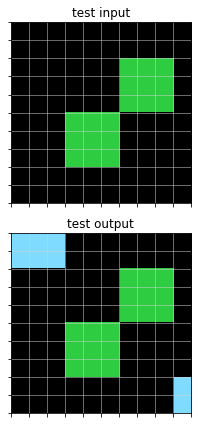

2281f1f4.json
Icecuber solved? True
['direction_guessing', 'draw_line_from_point', 'pattern_intersection']
5 objects
[[5]]
[[5]]
[[5]]
[[5]]
[[5]]
11 objects
[[5]]
[[5]]
[[5]]
[[2]]
[[2]]
[[2]]
[[5]]
[[2]]
[[2]]
[[2]]
[[5]]
6 objects
[[5]]
[[5 5]]
[[5]]
[[5]]
[[5]]
[[5]]
15 objects
[[5]]
[[5 5]]
[[5]]
[[2]]
[[2 2]]
[[2]]
[[5]]
[[2]]
[[2 2]]
[[2]]
[[5]]
[[2]]
[[2 2]]
[[2]]
[[5]]
6 objects
[[5 5]]
[[5]]
[[5 5]]
[[5]
 [5]]
[[5]]
[[5]]
15 objects
[[5 5]]
[[5]]
[[5 5]]
[[2 2]
 [2 2]]
[[2]
 [2]]
[[2 2]
 [2 2]]
[[5]
 [5]]
[[2 2]]
[[2]]
[[2 2]]
[[5]]
[[2 2]]
[[2]]
[[2 2]]
[[5]]


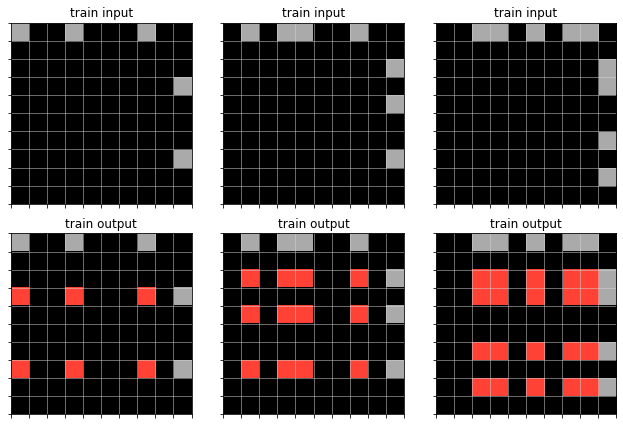

8 objects
[[5]]
[[5 5]]
[[5]]
[[5]]
[[5]
 [5]]
[[5]]
[[5]]
[[5]]
24 objects
[[5]]
[[5 5]]
[[5]]
[[5]]
[[2]
 [2]]
[[2 2]
 [2 2]]
[[2]
 [2]]
[[2]
 [2]]
[[5]
 [5]]
[[2]]
[[2 2]]
[[2]]
[[2]]
[[5]]
[[2]]
[[2 2]]
[[2]]
[[2]]
[[5]]
[[2]]
[[2 2]]
[[2]]
[[2]]
[[5]]


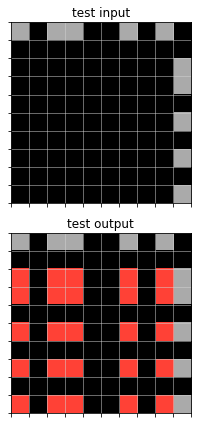

228f6490.json
Icecuber solved? True
['pattern_moving', 'loop_filling', 'shape_guessing', 'x_marks_the_spot']
8 objects
[[7]]
[[7 7]]
[[5 5 5 5 5]
 [5 0 0 5 5]
 [5 0 0 5 5]
 [5 5 5 5 5]
 [5 5 5 5 5]]
[[6 6]]
[[7]]
[[7]]
[[5 5 5 5 5]
 [5 5 0 0 5]
 [5 5 5 5 5]]
[[8 8]
 [8 8]]
8 objects
[[7]]
[[7 7]]
[[5 5 5 5 5]
 [5 0 0 5 5]
 [5 0 0 5 5]
 [5 5 5 5 5]
 [5 5 5 5 5]]
[[8 8]
 [8 8]]
[[7]]
[[7]]
[[5 5 5 5 5]
 [5 5 0 0 5]
 [5 5 5 5 5]]
[[6 6]]
7 objects
[[5 5 5 5 5]
 [5 0 0 0 5]
 [5 5 5 0 5]
 [5 5 5 5 5]]
[[9 9 9 9]
 [9 9 9 9]]
[[0 6]
 [6 6]]
[[6]]
[[3 3 3]
 [0 0 3]]
[[5 5 5 5 5 5]
 [5 0 0 0 0 5]
 [5 0 0 0 0 5]
 [5 5 5 5 5 5]]
[[6 6]
 [6 6]]
7 objects
[[5 5 5 5 5]
 [5 0 0 0 5]
 [5 5 5 0 5]
 [5 5 5 5 5]]
[[3 3 3]
 [0 0 3]]
[[0 6]
 [6 6]]
[[6]]
[[5 5 5 5 5 5]
 [5 0 0 0 0 5]
 [5 0 0 0 0 5]
 [5 5 5 5 5 5]]
[[9 9 9 9]
 [9 9 9 9]]
[[6 6]
 [6 6]]
8 objects
[[2 2 0]
 [2 2 2]]
[[5 5 5 5 5 5]
 [5 0 0 0 5 5]
 [5 5 5 0 0 5]
 [5 5 5 5 5 5]]
[[4 4]
 [0 4]]
[[4]]
[[5 5 5 5 5]
 [5 5 5 5 5]
 [5 0 0 5 5]
 [5 0 0

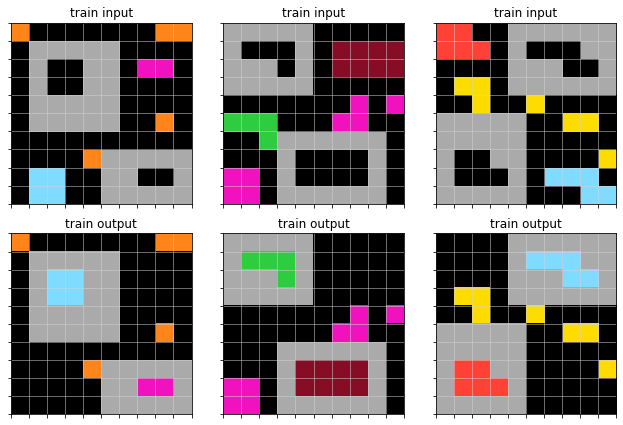

11 objects
[[5 5 5 5 5]
 [5 0 0 0 5]
 [5 5 0 5 5]
 [5 5 5 5 5]
 [5 5 5 5 5]]
[[2]]
[[2]]
[[4 4 4]]
[[2]]
[[7 7 7]
 [0 7 0]]
[[2]]
[[2]]
[[5 5 5 5 5 5 5]
 [5 0 0 0 5 5 5]
 [5 5 5 5 5 5 5]]
[[2]]
[[2]]
11 objects
[[5 5 5 5 5]
 [5 0 0 0 5]
 [5 5 0 5 5]
 [5 5 5 5 5]
 [5 5 5 5 5]]
[[2]]
[[2]]
[[7 7 7]
 [0 7 0]]
[[2]]
[[2]]
[[2]]
[[5 5 5 5 5 5 5]
 [5 0 0 0 5 5 5]
 [5 5 5 5 5 5 5]]
[[2]]
[[4 4 4]]
[[2]]


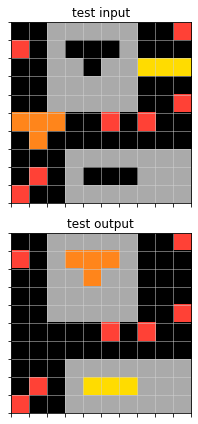

22eb0ac0.json
Icecuber solved? True
['connect_the_dots', 'color_matching']
8 objects
[[9]]
[[6]]
[[8]]
[[9]]
[[4]]
[[4]]
[[6]]
[[8]]
7 objects
[[9]]
[[6]]
[[8]]
[[9]]
[[4 4 4 4 4 4 4 4 4 4]]
[[6]]
[[8]]
10 objects
[[8]]
[[8]]
[[4]]
[[2]]
[[3]]
[[4]]
[[1]]
[[1]]
[[2]]
[[3]]
8 objects
[[8 8 8 8 8 8 8 8 8 8]]
[[4]]
[[2]]
[[3]]
[[4]]
[[1 1 1 1 1 1 1 1 1 1]]
[[2]]
[[3]]
8 objects
[[2]]
[[8]]
[[3]]
[[4]]
[[5]]
[[3]]
[[8]]
[[2]]
8 objects
[[2]]
[[8]]
[[3]]
[[4]]
[[5]]
[[3]]
[[8]]
[[2]]


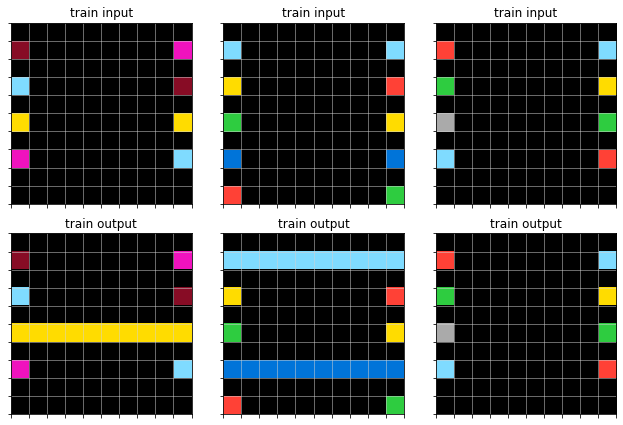

10 objects
[[4]]
[[2]]
[[3]]
[[3]]
[[2]]
[[9]]
[[6]]
[[6]]
[[9]]
[[4]]
8 objects
[[4]]
[[2]]
[[3 3 3 3 3 3 3 3 3 3]]
[[2]]
[[9]]
[[6 6 6 6 6 6 6 6 6 6]]
[[9]]
[[4]]


234bbc79.json
Icecuber solved? False
['recoloring', 'bring_patterns_close', 'crop']
7 objects
[[5]]
[[2 2]]
[[5]]
[[1]]
[[5]]
[[2 2]]
[[5]]
3 objects
[[0 2]
 [2 2]]
[[1 1]
 [0 1]]
[[2 2 2]]
7 objects
[[5]]
[[1]]
[[5]]
[[2 2]]
[[3 3 3]
 [3 0 0]]
[[5]]
[[5]]
3 objects
[[2 2]
 [0 2]]
[[0 3 3 3]
 [3 3 0 0]]
[[1 1 1]]
7 objects
[[5]]
[[2 2 2]]
[[5]]
[[8 8]]
[[5]]
[[5]]
[[6 6]]
3 objects
[[2 2 2]
 [0 0 2]]
[[0 0 8]
 [8 8 8]]
[[6 6 6]]
7 objects
[[0 1]
 [1 1]]
[[5]]
[[2 2]
 [2 0]]
[[5]]
[[2]]
[[5]]
[[5]]
2 objects
[[0 1 1]
 [1 1 0]]
[[2 2 0 2 2]
 [0 2 2 2 0]]


10 objects
[[5]]
[[5]]
[[1]
 [1]]
[[5]]
[[5]]
[[8]
 [8]]
[[2 2]]
[[5]]
[[3]]
[[5]]
4 objects
[[0 2]
 [2 2]]
[[1 1]
 [0 1]
 [0 1]]
[[0 3]
 [3 3]]
[[8 8]
 [0 8]]


23581191.json
Icecuber solved? False
['draw_line_from_point', 'pattern_intersection']
2 objects
[[8]]
[[7]]
8 objects
[[0 0 8 0 0 0]
 [0 0 8 0 0 0]
 [8 8 8 8 8 8]
 [0 0 8 0 0 0]
 [0 0 8 0 0 0]
 [0 0 8 0 0 0]]
[[7]
 [7]]
[[2]]
[[8 8]]
[[0 0 0 7 0 0]
 [0 0 0 7 0 0]
 [0 0 0 7 0 0]
 [7 7 7 7 7 7]
 [0 0 0 7 0 0]
 [0 0 0 7 0 0]]
[[7 7]]
[[2]]
[[8]
 [8]]
2 objects
[[8]]
[[7]]
8 objects
[[0 0 0 8 0 0]
 [8 8 8 8 8 8]
 [0 0 0 8 0 0]
 [0 0 0 8 0 0]
 [0 0 0 8 0 0]
 [0 0 0 8 0 0]
 [0 0 0 8 0 0]]
[[7]]
[[2]]
[[8 8]]
[[0 0 7 0 0]
 [0 0 7 0 0]
 [0 0 7 0 0]
 [0 0 7 0 0]
 [0 0 7 0 0]
 [7 7 7 7 7]
 [0 0 7 0 0]]
[[7 7 7]]
[[2]]
[[8]]


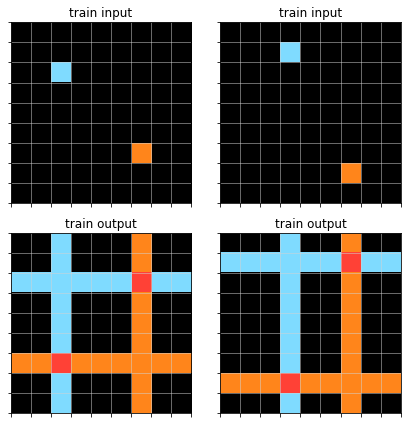

2 objects
[[8]]
[[7]]
8 objects
[[7]]
[[0 0 8 0 0 0 0]
 [8 8 8 8 8 8 8]
 [0 0 8 0 0 0 0]
 [0 0 8 0 0 0 0]
 [0 0 8 0 0 0 0]
 [0 0 8 0 0 0 0]]
[[8]]
[[2]]
[[0 7 0 0]
 [0 7 0 0]
 [0 7 0 0]
 [0 7 0 0]
 [7 7 7 7]
 [0 7 0 0]
 [0 7 0 0]]
[[2]]
[[7 7 7 7]]
[[8]
 [8]]


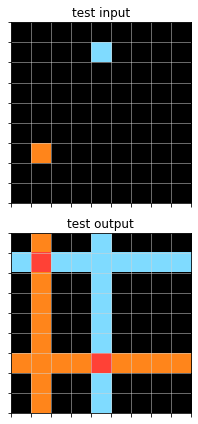

239be575.json
Icecuber solved? True
['detect_connectedness', 'associate_images_to_bools']
6 objects
[[8]
 [8]]
[[8]]
[[2 2]
 [2 2]]
[[8]]
[[2 2]
 [2 2]]
[[8 8]]
0 objects
6 objects
[[8]]
[[2 2]
 [2 2]]
[[0 8 8 8]
 [8 8 0 0]
 [8 0 0 0]]
[[2 2]
 [2 2]]
[[8]]
[[8]]
1 objects
[[8]]
9 objects
[[8]]
[[2 2]
 [2 2]]
[[8 8]]
[[8]]
[[8 8 0 0]
 [0 8 0 0]
 [0 8 8 8]]
[[8]]
[[8]]
[[8]
 [8]]
[[2 2]
 [2 2]]
1 objects
[[8]]
9 objects
[[8 8 0]
 [0 8 8]]
[[2 2]
 [2 2]]
[[8]]
[[8]]
[[8]]
[[8]]
[[2 2]
 [2 2]]
[[0 8]
 [8 8]]
[[8]
 [8]]
0 objects
10 objects
[[8]]
[[8]
 [8]]
[[2 2]
 [2 2]]
[[8]]
[[8]
 [8]]
[[8]]
[[2 2]
 [2 2]]
[[8]]
[[8]]
[[8]]
1 objects
[[8]]
10 objects
[[8]
 [8]]
[[2 2]
 [2 2]]
[[8]]
[[8]]
[[8]
 [8]]
[[2 2]
 [2 2]]
[[8]]
[[8]]
[[8 8]]
[[8]]
0 objects


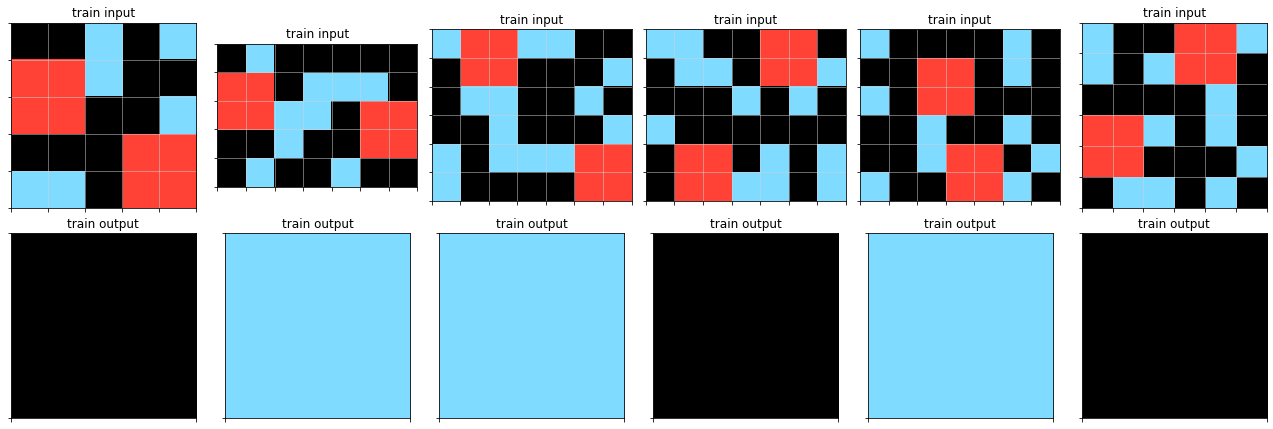

11 objects
[[2 2]
 [2 2]]
[[8 8]
 [0 8]]
[[8]]
[[8 8 0 0]
 [0 8 8 8]
 [0 0 8 0]
 [0 0 8 0]]
[[8]]
[[8]]
[[8]]
[[2 2]
 [2 2]]
[[8]]
[[8]]
[[8]]
1 objects
[[8]]
10 objects
[[8]]
[[0 0 8]
 [8 8 8]
 [8 0 0]]
[[2 2]
 [2 2]]
[[8]]
[[8]]
[[8]]
[[2 2]
 [2 2]]
[[8]]
[[8]]
[[8 8]]
0 objects


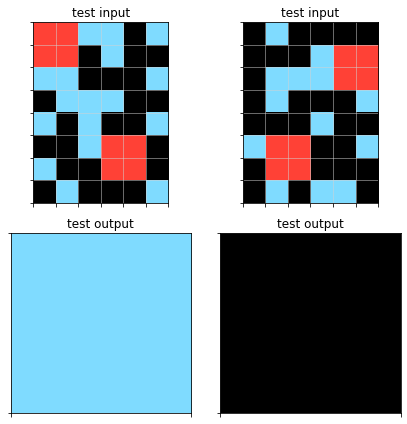

23b5c85d.json
Icecuber solved? True
['measure_area', 'take_minimum', 'crop']
2 objects
[[2 2 2 2 2 2]
 [2 2 2 2 2 2]
 [2 2 2 2 2 2]
 [2 2 2 2 2 2]
 [2 2 0 0 0 2]
 [2 2 0 0 0 2]]
[[8 8 8]
 [8 8 8]
 [8 8 8]]
1 objects
[[8 8 8]
 [8 8 8]
 [8 8 8]]
5 objects
[[8 8 8 8 8 8 8]
 [0 0 0 0 8 8 8]
 [0 0 0 0 8 8 8]
 [0 0 0 0 8 8 8]
 [0 0 0 0 8 8 8]
 [8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8]]
[[3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3]
 [3 3 3 0 0 0 0 0]
 [3 3 3 0 0 0 0 0]]
[[4 4 4 4 4 4]
 [4 4 4 4 4 4]
 [4 4 4 4 4 4]
 [4 4 4 4 4 4]]
[[2 2 2 2 2 2]
 [2 2 2 2 2 2]
 [2 2 2 2 2 2]
 [2 2 2 2 2 2]
 [2 2 2 2 2 2]]
[[1 1 1]
 [1 1 1]]
1 objects
[[1 1 1]
 [1 1 1]]
3 objects
[[2 2 2]
 [2 2 2]
 [2 2 2]
 [2 2 2]]
[[3 3 3 3]
 [3 3 3 3]
 [3 3 3 3]
 [3 3 3 3]
 [3 3 3 0]
 [3 3 3 0]
 [3 3 3 0]
 [3 3 3 3]
 [3 3 3 3]]
[[6 6]
 [6 6]
 [6 6]]
1 objects
[[6 6]
 [6 6]
 [6 6]]
3 objects
[[2 2 2 2 2 2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2 2 2 2 2 2]


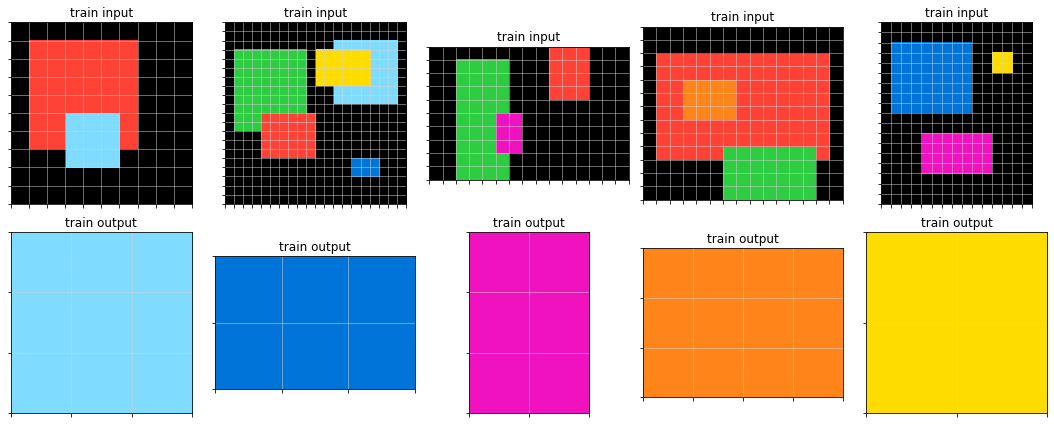

4 objects
[[1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]]
[[4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4]
 [0 4 4 4 4 4 4 4]
 [0 4 4 4 4 4 4 4]
 [0 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4]]
[[6 6 6]
 [6 6 6]
 [6 6 6]]
[[3 3 3 3 3]
 [3 3 3 3 3]
 [3 3 3 3 3]
 [3 3 3 3 3]]
1 objects
[[6 6 6]
 [6 6 6]
 [6 6 6]]


253bf280.json
Icecuber solved? True
['connect_the_dots', 'direction_guessing']
2 objects
[[8]]
[[8]]
3 objects
[[8]]
[[3 3 3 3 3 3]]
[[8]]
4 objects
[[8]]
[[8]]
[[8]]
[[8]]
6 objects
[[8]]
[[3]
 [3]
 [3]
 [3]
 [3]]
[[8]]
[[3]
 [3]
 [3]]
[[8]]
[[8]]
4 objects
[[8]]
[[8]]
[[8]]
[[8]]
6 objects
[[8]]
[[3 3 3 3 3 3 3]]
[[8]]
[[8]]
[[3 3 3 3]]
[[8]]
2 objects
[[8]]
[[8]]
3 objects
[[8]]
[[3]
 [3]
 [3]
 [3]
 [3]]
[[8]]
1 objects
[[8]]
1 objects
[[8]]
2 objects
[[8]]
[[8]]
2 objects
[[8]]
[[8]]
3 objects
[[8]]
[[8]]
[[8]]
4 objects
[[8]]
[[3]
 [3]
 [3]
 [3]]
[[8]]
[[8]]
5 objects
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
7 objects
[[8]]
[[3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]]
[[8]]
[[3 3 3]]
[[8]]
[[8]]
[[8]]


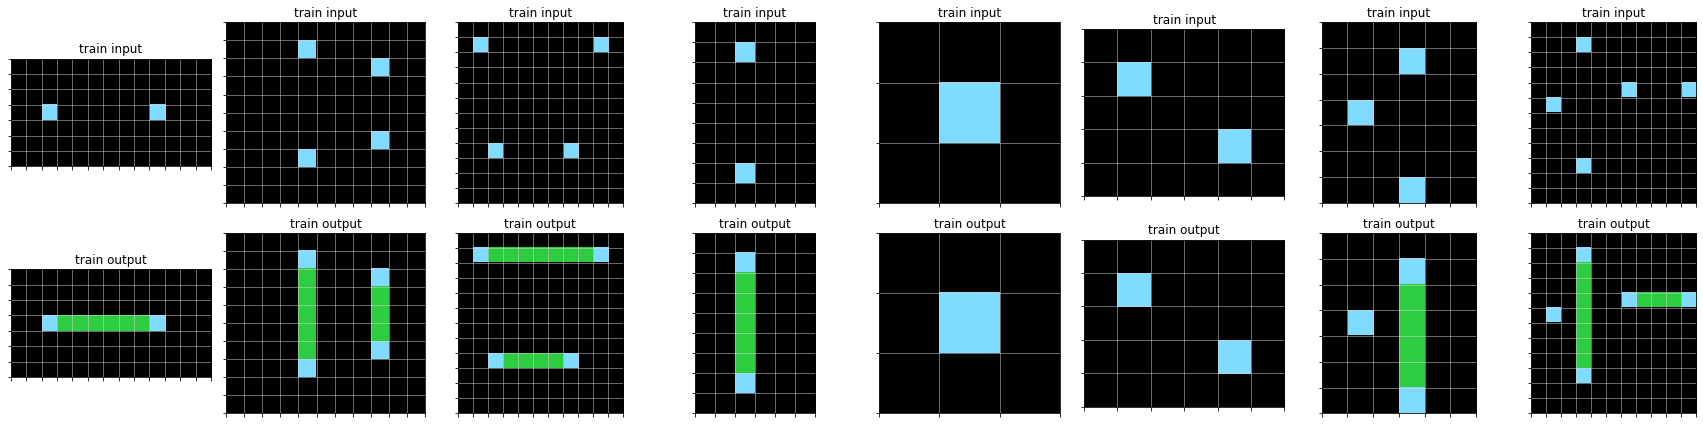

7 objects
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
10 objects
[[8]]
[[3 3 3 3 3 3 3]]
[[8]]
[[8]]
[[3 3 3 3 3]]
[[8]]
[[8]]
[[3]
 [3]]
[[8]]
[[8]]


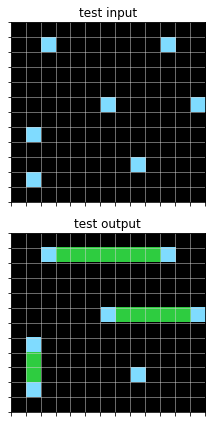

25d487eb.json
Icecuber solved? True
['draw_line_from_point', 'direction_guessing', 'color_guessing']
2 objects
[[2 0 0]
 [2 2 0]
 [0 2 2]
 [2 2 0]
 [2 0 0]]
[[1]]
3 objects
[[2 0 0]
 [2 2 0]
 [0 2 2]
 [2 2 0]
 [2 0 0]]
[[1]]
[[1 1 1 1 1 1 1 1 1]]
2 objects
[[0 0 0 8 0 0 0]
 [0 0 8 8 8 0 0]
 [0 8 8 8 8 8 0]
 [8 8 8 0 8 8 8]]
[[3]]
3 objects
[[3]
 [3]
 [3]
 [3]
 [3]]
[[0 0 0 8 0 0 0]
 [0 0 8 8 8 0 0]
 [0 8 8 8 8 8 0]
 [8 8 8 0 8 8 8]]
[[3]]
2 objects
[[3 3 0 3 3]
 [0 3 3 3 0]
 [0 0 3 0 0]]
[[2]]
3 objects
[[3 3 0 3 3]
 [0 3 3 3 0]
 [0 0 3 0 0]]
[[2]]
[[2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]]


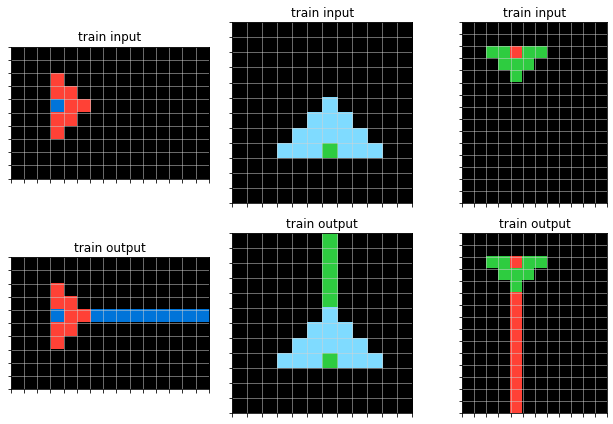

2 objects
[[0 0 0 4 0 0 0]
 [0 0 4 4 4 0 0]
 [0 4 4 4 4 4 0]
 [4 4 4 0 4 4 4]]
[[8]]
3 objects
[[8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]]
[[0 0 0 4 0 0 0]
 [0 0 4 4 4 0 0]
 [0 4 4 4 4 4 0]
 [4 4 4 0 4 4 4]]
[[8]]


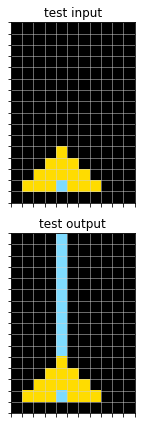

25d8a9c8.json
Icecuber solved? False
['detect_hor_lines', 'recoloring', 'remove_noise']
4 objects
[[4 4 4]]
[[2]
 [2]]
[[3 0]
 [3 3]]
[[2]]
1 objects
[[5 5 5]]
5 objects
[[7]]
[[3 3]]
[[6 6 6]]
[[3]]
[[7 7]]
1 objects
[[5 5 5]]
5 objects
[[2]]
[[9]]
[[2]]
[[4 4 4]]
[[9 9 9]]
1 objects
[[5 5 5]
 [5 5 5]]
3 objects
[[2 2]
 [2 2]]
[[4]
 [4]]
[[1 1 1]]
1 objects
[[5 5 5]]


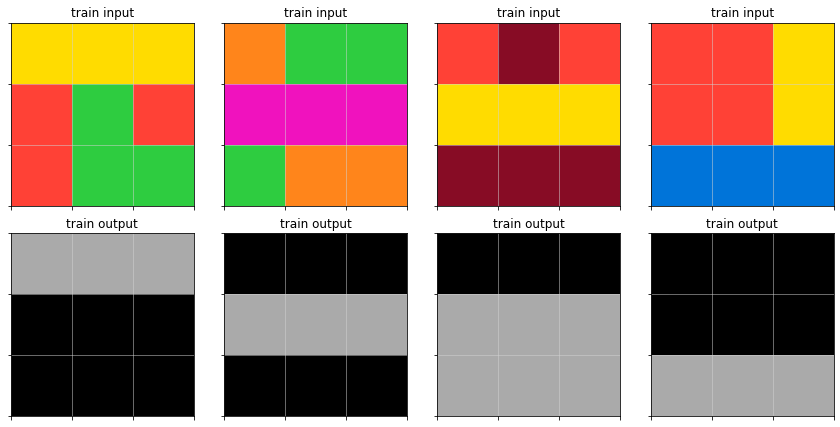

5 objects
[[4 4 4]]
[[3]]
[[2]]
[[3]]
[[8 8 8]]
2 objects
[[5 5 5]]
[[5 5 5]]


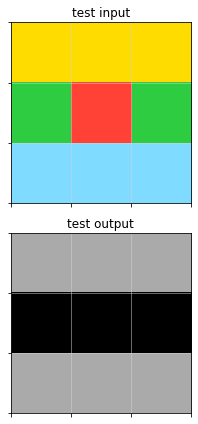

25ff71a9.json
Icecuber solved? True
['pattern_moving']
1 objects
[[1 1 1]]
1 objects
[[1 1 1]]
1 objects
[[1 1 1]]
1 objects
[[1 1 1]]
1 objects
[[0 1]
 [1 1]]
1 objects
[[0 1]
 [1 1]]
1 objects
[[2 2]
 [0 2]]
1 objects
[[2 2]
 [0 2]]


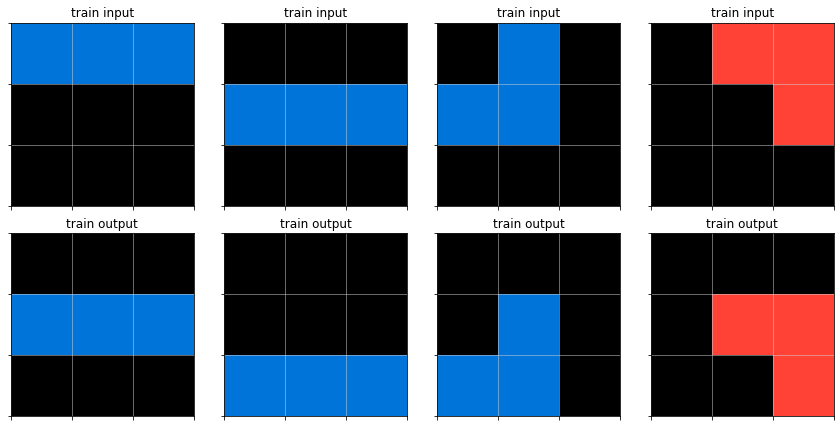

1 objects
[[2]
 [2]]
1 objects
[[2]
 [2]]
1 objects
[[1]]
1 objects
[[1]]


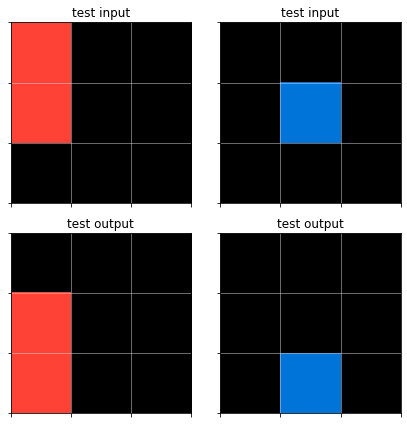

264363fd.json
Icecuber solved? False
['pattern_repetition', 'pattern_juxtaposition', 'draw_line_from_point']
14 objects
[[8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
 [8 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 8 8 8 8 8 8 8 8 8 8]
 [8 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 8 8 8 8 8 0 8 8 8 8]
 [8 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 8 8 8 8 0 0 0 8 8 8]
 [8 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 8 8 8 0 0 0 0 0 8 8]
 [8 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 8 8 8 8 0 0 0 8 8 8]
 [8 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 8 8 8 8 8 0 8 8 8 8]
 [8 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 8 8 8 8 8 8 8 8 8 8]
 [8 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 8 8 8 8 8 8 8 8 8 8]
 [8 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 8 8 8 8 8 8 8 8 8 8]
 [8 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 8 8 8 8 8 8 8 8 8 8]
 [8 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 8 8 8 8 8 8 8 8 8 8]
 [8 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 8 8 8 8 8 8 8 8 8 8]
 [8 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 8 8 8 8 8 8 8 8 8 8

28 objects
[[8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 8 8]
 [8 8 8 8 8 8 8 8 8 8 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 8 8]
 [8 8 8 8 8 8 8 8 8 8 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 8 8]
 [8 8 8 8 8 8 8 8 8 8 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 8 8]
 [8 8 8 8 8 8 8 8 8 8 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 8 8]
 [8 8 8 8 8 8 8 8 8 8 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 8 8]
 [8 8 8 8 8 8 8 8 8 8 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 8 8]
 [8 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 8 8]
 [8 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 8 8]
 [8 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 8 8]
 [8 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 8 8]
 [8 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 8 8]
 [8 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 8 8]
 [8 0 0 0 0 0 0 0 0 0 8 8 8 8 8 8 8 8 8 8 8 

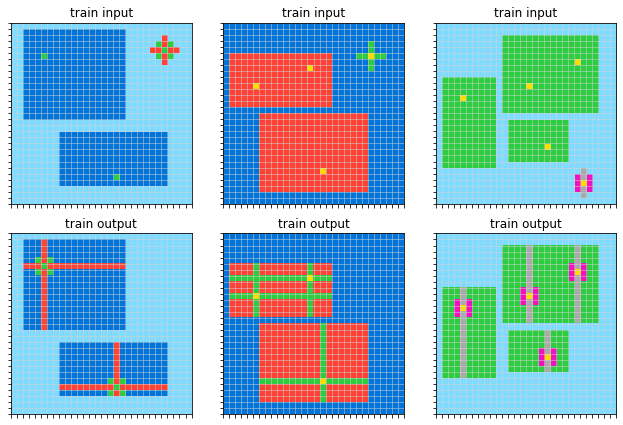

11 objects
[[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
 [4 4 4 0 0 0 0 0 0 0 0 0 0 0 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
 [4 4 4 0 0 0 0 0 0 0 0 0 0 0 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
 [4 4 4 0 0 0 0 0 0 0 0 0 0 0 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
 [4 4 4 0 0 0 0 0 0 0 0 0 0 0 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
 [4 4 4 0 0 0 0 0 0 0 0 0 0 0 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
 [4 4 4 0 0 0 0 0 0 0 0 0 0 0 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
 [4 4 4 0 0 0 0 0 0 0 0 0 0 0 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
 [4 4 4 0 0 0 0 0 0 0 0 0 0 0 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
 [4 4 4 0 0 0 0 0 0 0 0 0 0 0 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
 [4 4 4 0 0 0 0 0 0 0 0 0 0 0 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4 4 4 4 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4]
 [4 4 4 4 4 4 4 4 4 4 4 4 0 0 0 0 0 0 0 0 0 

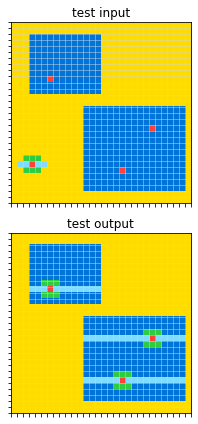

272f95fa.json
Icecuber solved? True
['detect_grid', 'mimic_pattern', 'grid_coloring']
1 objects
[[0 0 0 0 8 0 0 0 0 0 0 8 0 0 0 0 0 0 0]
 [0 0 0 0 8 0 0 0 0 0 0 8 0 0 0 0 0 0 0]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
 [0 0 0 0 8 0 0 0 0 0 0 8 0 0 0 0 0 0 0]
 [0 0 0 0 8 0 0 0 0 0 0 8 0 0 0 0 0 0 0]
 [0 0 0 0 8 0 0 0 0 0 0 8 0 0 0 0 0 0 0]
 [0 0 0 0 8 0 0 0 0 0 0 8 0 0 0 0 0 0 0]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
 [0 0 0 0 8 0 0 0 0 0 0 8 0 0 0 0 0 0 0]
 [0 0 0 0 8 0 0 0 0 0 0 8 0 0 0 0 0 0 0]
 [0 0 0 0 8 0 0 0 0 0 0 8 0 0 0 0 0 0 0]
 [0 0 0 0 8 0 0 0 0 0 0 8 0 0 0 0 0 0 0]
 [0 0 0 0 8 0 0 0 0 0 0 8 0 0 0 0 0 0 0]
 [0 0 0 0 8 0 0 0 0 0 0 8 0 0 0 0 0 0 0]
 [0 0 0 0 8 0 0 0 0 0 0 8 0 0 0 0 0 0 0]
 [0 0 0 0 8 0 0 0 0 0 0 8 0 0 0 0 0 0 0]
 [0 0 0 0 8 0 0 0 0 0 0 8 0 0 0 0 0 0 0]
 [0 0 0 0 8 0 0 0 0 0 0 8 0 0 0 0 0 0 0]]
6 objects
[[0 0 0 0 8 0 0 0 0 0 0 8 0 0 0 0 0 0 0]
 [0 0 0 0 8 0 0 0 0 0 0 8 0 0 0 0 0 0 0]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
 [0 0 0 0 8 0 0 0 0 0 0 8 0 0 0 

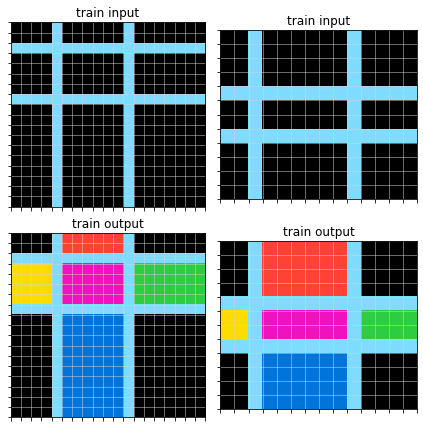

1 objects
[[0 0 0 8 0 0 0 0 8 0 0 0 0 0 0]
 [0 0 0 8 0 0 0 0 8 0 0 0 0 0 0]
 [0 0 0 8 0 0 0 0 8 0 0 0 0 0 0]
 [0 0 0 8 0 0 0 0 8 0 0 0 0 0 0]
 [0 0 0 8 0 0 0 0 8 0 0 0 0 0 0]
 [0 0 0 8 0 0 0 0 8 0 0 0 0 0 0]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
 [0 0 0 8 0 0 0 0 8 0 0 0 0 0 0]
 [0 0 0 8 0 0 0 0 8 0 0 0 0 0 0]
 [0 0 0 8 0 0 0 0 8 0 0 0 0 0 0]
 [0 0 0 8 0 0 0 0 8 0 0 0 0 0 0]
 [0 0 0 8 0 0 0 0 8 0 0 0 0 0 0]
 [0 0 0 8 0 0 0 0 8 0 0 0 0 0 0]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
 [0 0 0 8 0 0 0 0 8 0 0 0 0 0 0]
 [0 0 0 8 0 0 0 0 8 0 0 0 0 0 0]
 [0 0 0 8 0 0 0 0 8 0 0 0 0 0 0]]
6 objects
[[0 0 0 8 0 0 0 0 8 0 0 0 0 0 0]
 [0 0 0 8 0 0 0 0 8 0 0 0 0 0 0]
 [0 0 0 8 0 0 0 0 8 0 0 0 0 0 0]
 [0 0 0 8 0 0 0 0 8 0 0 0 0 0 0]
 [0 0 0 8 0 0 0 0 8 0 0 0 0 0 0]
 [0 0 0 8 0 0 0 0 8 0 0 0 0 0 0]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
 [0 0 0 8 0 0 0 0 8 0 0 0 0 0 0]
 [0 0 0 8 0 0 0 0 8 0 0 0 0 0 0]
 [0 0 0 8 0 0 0 0 8 0 0 0 0 0 0]
 [0 0 0 8 0 0 0 0 8 0 0 0 0 0 0]
 [0 0 0 8 0 0 0 0 8 0 0 0 0 0 0]
 [0 0 0 8 0 0 0 0 8 0 

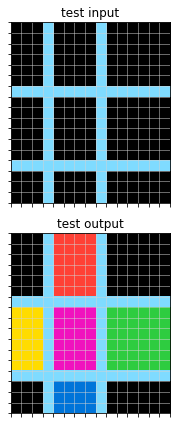

27a28665.json
Icecuber solved? False
['associate_colors_to_patterns', 'take_negative', 'associate_images_to_patterns']
3 objects
[[5 5]
 [5 0]]
[[5]]
[[5]]
1 objects
[[1]]
5 objects
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
1 objects
[[2]]
5 objects
[[5]]
[[5]]
[[5]]
[[5]]
[[5]]
1 objects
[[2]]
2 objects
[[1 1]
 [1 1]]
[[1]]
1 objects
[[3]]
2 objects
[[8 8]
 [8 8]]
[[8]]
1 objects
[[3]]
3 objects
[[4 4]
 [4 0]]
[[4]]
[[4]]
1 objects
[[1]]
1 objects
[[0 5 0]
 [5 5 5]
 [0 5 0]]
1 objects
[[6]]


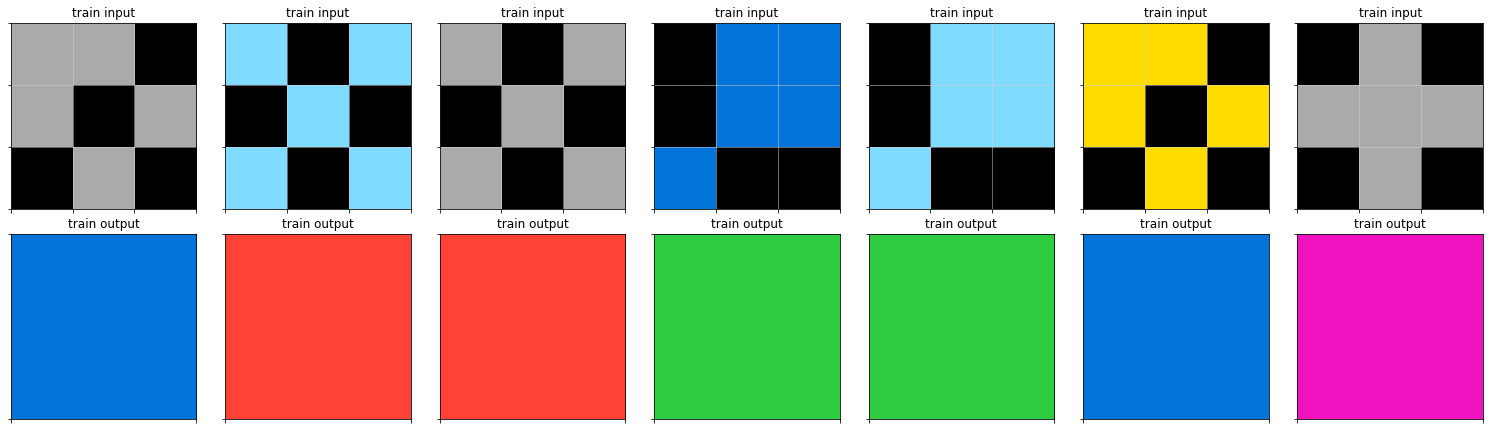

1 objects
[[0 8 0]
 [8 8 8]
 [0 8 0]]
1 objects
[[6]]
3 objects
[[7 7]
 [7 0]]
[[7]]
[[7]]
1 objects
[[1]]
5 objects
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
1 objects
[[2]]


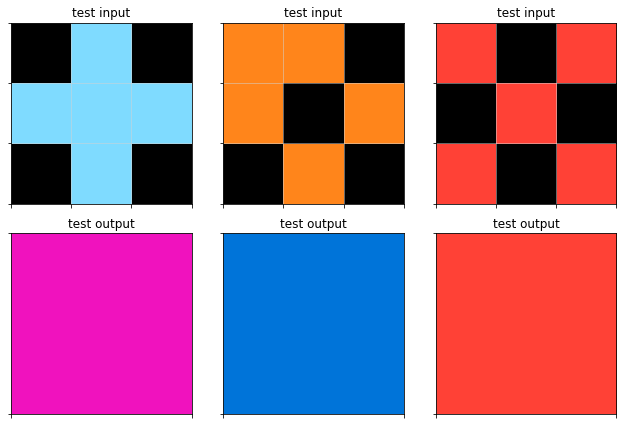

28bf18c6.json
Icecuber solved? True
['crop', 'pattern_repetition']
1 objects
[[8 8 0]
 [0 8 0]
 [8 8 8]]
1 objects
[[8 8 0 8 8 0]
 [0 8 0 0 8 0]
 [8 8 8 8 8 8]]
1 objects
[[0 2 0]
 [2 2 2]
 [2 2 0]]
1 objects
[[0 2 0 0 2 0]
 [2 2 2 2 2 2]
 [2 2 0 2 2 0]]
3 objects
[[1 1]]
[[1]]
[[1]]
6 objects
[[1 1]]
[[1 1]]
[[1]]
[[1]]
[[1]]
[[1]]


1 objects
[[0 0 3]
 [3 3 3]
 [3 0 0]]
1 objects
[[0 0 3 0 0 3]
 [3 3 3 3 3 3]
 [3 0 0 3 0 0]]


28e73c20.json
Icecuber solved? False
['ex_nihilo', 'mimic_pattern']
0 objects
1 objects
[[3 3 3 3 3 3]
 [0 0 0 0 0 3]
 [3 3 3 3 0 3]
 [3 0 3 3 0 3]
 [3 0 0 0 0 3]
 [3 3 3 3 3 3]]
0 objects
1 objects
[[3 3 3 3 3 3 3 3]
 [0 0 0 0 0 0 0 3]
 [3 3 3 3 3 3 0 3]
 [3 0 0 0 0 3 0 3]
 [3 0 3 3 0 3 0 3]
 [3 0 3 3 3 3 0 3]
 [3 0 0 0 0 0 0 3]
 [3 3 3 3 3 3 3 3]]
0 objects
1 objects
[[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [3 3 3 3 3 3 3 3 3 3 3 3 3 0 3]
 [3 0 0 0 0 0 0 0 0 0 0 0 3 0 3]
 [3 0 3 3 3 3 3 3 3 3 3 0 3 0 3]
 [3 0 3 0 0 0 0 0 0 0 3 0 3 0 3]
 [3 0 3 0 3 3 3 3 3 0 3 0 3 0 3]
 [3 0 3 0 3 0 0 0 3 0 3 0 3 0 3]
 [3 0 3 0 3 0 3 3 3 0 3 0 3 0 3]
 [3 0 3 0 3 0 0 0 0 0 3 0 3 0 3]
 [3 0 3 0 3 3 3 3 3 3 3 0 3 0 3]
 [3 0 3 0 0 0 0 0 0 0 0 0 3 0 3]
 [3 0 3 3 3 3 3 3 3 3 3 3 3 0 3]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]]
0 objects
1 objects
[[3 3 3 3 3 3 3 3 3 3 3 3 3]
 [0 0 0 0 0 0 0 0 0 0 0 0 3]
 [3 3 3 3 3 3 3 3 3 3 3 0 3]
 [3 0 0 0 0 0 0 0 0 0 3 0

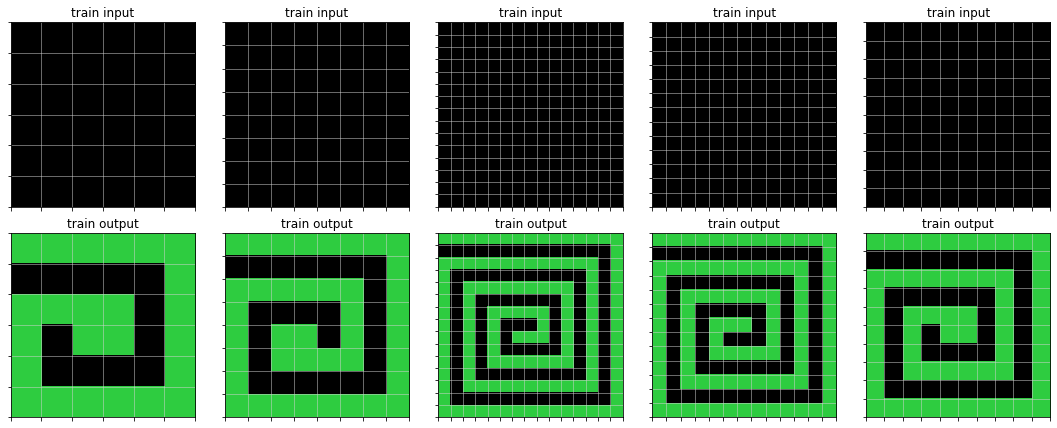

0 objects
1 objects
[[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 3]
 [3 0 3 3 3 3 3 3 3 3 3 3 3 3 0 3 0 3]
 [3 0 3 0 0 0 0 0 0 0 0 0 0 3 0 3 0 3]
 [3 0 3 0 3 3 3 3 3 3 3 3 0 3 0 3 0 3]
 [3 0 3 0 3 0 0 0 0 0 0 3 0 3 0 3 0 3]
 [3 0 3 0 3 0 3 3 3 3 0 3 0 3 0 3 0 3]
 [3 0 3 0 3 0 3 0 3 3 0 3 0 3 0 3 0 3]
 [3 0 3 0 3 0 3 0 0 0 0 3 0 3 0 3 0 3]
 [3 0 3 0 3 0 3 3 3 3 3 3 0 3 0 3 0 3]
 [3 0 3 0 3 0 0 0 0 0 0 0 0 3 0 3 0 3]
 [3 0 3 0 3 3 3 3 3 3 3 3 3 3 0 3 0 3]
 [3 0 3 0 0 0 0 0 0 0 0 0 0 0 0 3 0 3]
 [3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]]


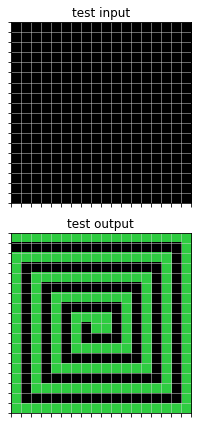

29623171.json
Icecuber solved? True
['detect_grid', 'separate_images', 'count_tiles', 'take_maximum', 'grid_coloring']
9 objects
[[0 0 0 5 0 0 0 5 0 0 0]
 [0 0 0 5 0 0 0 5 0 0 0]
 [0 0 0 5 0 0 0 5 0 0 0]
 [5 5 5 5 5 5 5 5 5 5 5]
 [0 0 0 5 0 0 0 5 0 0 0]
 [0 0 0 5 0 0 0 5 0 0 0]
 [0 0 0 5 0 0 0 5 0 0 0]
 [5 5 5 5 5 5 5 5 5 5 5]
 [0 0 0 5 0 0 0 5 0 0 0]
 [0 0 0 5 0 0 0 5 0 0 0]
 [0 0 0 5 0 0 0 5 0 0 0]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
2 objects
[[0 0 0 5 0 0 0 5 0 0 0]
 [0 0 0 5 0 0 0 5 0 0 0]
 [0 0 0 5 0 0 0 5 0 0 0]
 [5 5 5 5 5 5 5 5 5 5 5]
 [0 0 0 5 0 0 0 5 0 0 0]
 [0 0 0 5 0 0 0 5 0 0 0]
 [0 0 0 5 0 0 0 5 0 0 0]
 [5 5 5 5 5 5 5 5 5 5 5]
 [0 0 0 5 0 0 0 5 0 0 0]
 [0 0 0 5 0 0 0 5 0 0 0]
 [0 0 0 5 0 0 0 5 0 0 0]]
[[1 1 1]
 [1 1 1]
 [1 1 1]]
11 objects
[[0 0 0 5 0 0 0 5 0 0 0]
 [0 0 0 5 0 0 0 5 0 0 0]
 [0 0 0 5 0 0 0 5 0 0 0]
 [5 5 5 5 5 5 5 5 5 5 5]
 [0 0 0 5 0 0 0 5 0 0 0]
 [0 0 0 5 0 0 0 5 0 0 0]
 [0 0 0 5 0 0 0 5 0 0 0]
 [5 5 5 5 5 5 5 5 5 5 5]
 [0 0 0 5 0 0 0 5 0 0 

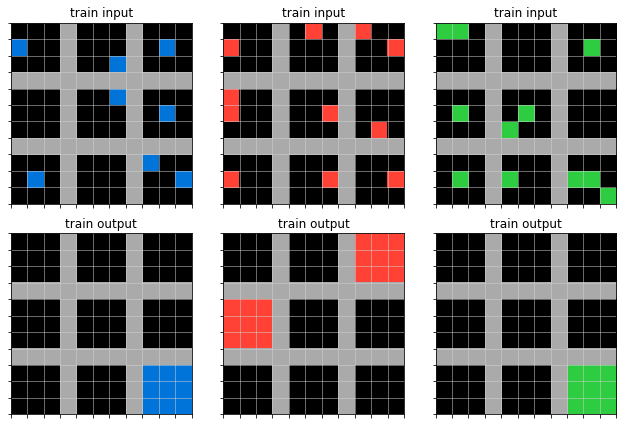

16 objects
[[4 4]
 [0 4]]
[[0 0 0 5 0 0 0 5 0 0 0]
 [0 0 0 5 0 0 0 5 0 0 0]
 [0 0 0 5 0 0 0 5 0 0 0]
 [5 5 5 5 5 5 5 5 5 5 5]
 [0 0 0 5 0 0 0 5 0 0 0]
 [0 0 0 5 0 0 0 5 0 0 0]
 [0 0 0 5 0 0 0 5 0 0 0]
 [5 5 5 5 5 5 5 5 5 5 5]
 [0 0 0 5 0 0 0 5 0 0 0]
 [0 0 0 5 0 0 0 5 0 0 0]
 [0 0 0 5 0 0 0 5 0 0 0]]
[[4]]
[[4 4]
 [0 4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4 4]]
3 objects
[[4 4 4]
 [4 4 4]
 [4 4 4]]
[[0 0 0 5 0 0 0 5 0 0 0]
 [0 0 0 5 0 0 0 5 0 0 0]
 [0 0 0 5 0 0 0 5 0 0 0]
 [5 5 5 5 5 5 5 5 5 5 5]
 [0 0 0 5 0 0 0 5 0 0 0]
 [0 0 0 5 0 0 0 5 0 0 0]
 [0 0 0 5 0 0 0 5 0 0 0]
 [5 5 5 5 5 5 5 5 5 5 5]
 [0 0 0 5 0 0 0 5 0 0 0]
 [0 0 0 5 0 0 0 5 0 0 0]
 [0 0 0 5 0 0 0 5 0 0 0]]
[[4 4 4]
 [4 4 4]
 [4 4 4]]


29c11459.json
Icecuber solved? False
['draw_line_from_point', 'count_tiles']
2 objects
[[1]]
[[2]]
3 objects
[[1 1 1 1 1]]
[[5]]
[[2 2 2 2 2]]
2 objects
[[3]]
[[7]]
3 objects
[[3 3 3 3 3]]
[[5]]
[[7 7 7 7 7]]


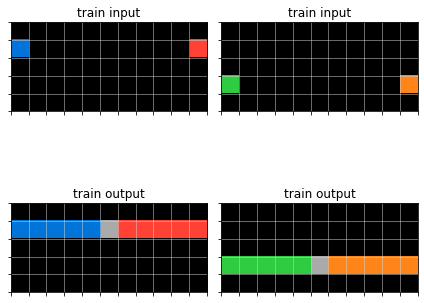

4 objects
[[4]]
[[8]]
[[6]]
[[9]]
6 objects
[[4 4 4 4 4]]
[[5]]
[[8 8 8 8 8]]
[[6 6 6 6 6]]
[[5]]
[[9 9 9 9 9]]


29ec7d0e.json
Icecuber solved? True
['image_filling', 'pattern_expansion', 'detect_grid', 'pattern_repetition']
180 objects
[[1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0]
 [1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0]
 [1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0]
 [1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0]
 [1 1 1 1 1 1 0 0 1 1 1 0 0 0 1 1 1 1]
 [1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0]
 [1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0]
 [1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0]
 [1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0]
 [0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0]
 [0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0]
 [1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0]
 [1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0]
 [1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0]]
[[2]]
[[3]]
[[2]]
[[3]]
[[4]]
[[5]]
[[2]]
[[3]]
[[4]]
[[5]]
[[2]]
[[3]]
[[3]]
[[5]]
[[3]]
[[5]]
[[2]]
[[4]]
[[5]]
[[2]]
[[4]]
[[3]]
[[5]]
[[4]]
[[2]]
[[5]]
[[3]]
[[4]]
[[2]]

205 objects
[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0]
 [1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0]
 [1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0]
 [1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0]
 [1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0]
 [1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0]
 [1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0]
 [1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0]
 [1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0]
 [1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0]
 [1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0]
 [1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0]
 [1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0]
 [1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0]
 [1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0]]
[[2]]
[[3]]
[[4]]
[[5]]
[[6]]
[[7]]
[[8]]
[[2]]
[[3]]
[[4]]
[[5]]
[[6]]
[[7]]
[[8]]
[[2]]
[[3]]
[[5]]
[[7]]
[[1]]
[[3]]
[[5]]
[[7]]
[[3]]
[[5]]
[[7]]
[[1]]
[[3]]
[[5]]
[[7]]
[[3]]
[[4]]
[[7]]
[[2]]
[[5]]
[[8]]
[[3]]
[[6]]
[[4]]
[[7]]
[[2]]
[[5]]
[[8]]
[[4]]
[[5]]
[[1]]
[[5]]
[[1]]
[[5

213 objects
[[1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]]
[[1 1]]
[[2]]
[[3]]
[[4]]
[[5]]
[[6]]
[[7]]
[[8]]
[[9]]
[[2]]
[[3]]
[[4]]
[[8]]
[[9]]
[[3]]
[[5]]
[[7]]
[[9]]
[[2]]
[[4]]
[[6]]
[[8]]
[[3]]
[[5]]
[[7]]
[[6]]
[[8]]
[[4]]
[[7]]
[[1]]
[[4]]
[[7]]
[[1]]
[[4]]
[[7]]
[[4]]
[[7]]
[[1]]
[[4]]
[[7]]
[[1]]
[[4]]
[[7]]
[[5]]
[[9]]
[[4]]
[[8]]
[

2bcee788.json
Icecuber solved? False
['pattern_reflection', 'direction_guessing', 'image_filling', 'background_filling']
2 objects
[[0 0 4]
 [4 4 4]
 [0 0 4]]
[[2]
 [2]
 [2]]
2 objects
[[3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 0 0 3 3 3 3]
 [3 3 0 0 0 0 0 0 3 3]
 [3 3 3 3 0 0 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3]]
[[0 0 4 4 0 0]
 [4 4 4 4 4 4]
 [0 0 4 4 0 0]]
2 objects
[[2 2]]
[[6 6 0]
 [0 6 0]
 [0 6 6]]
2 objects
[[3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 0 0 3 3 3 3]
 [3 3 3 3 0 3 3 3 3 3]
 [3 3 3 0 0 3 3 3 3 3]
 [3 3 3 0 0 3 3 3 3 3]
 [3 3 3 3 0 3 3 3 3 3]
 [3 3 3 3 0 0 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3]]
[[0 6 6]
 [0 6 0]
 [6 6 0]
 [6 6 0]
 [0 6 0]
 [0 6 6]]
2 objects
[[2]
 [2]]
[[7 0]
 [7 7]]
2 objects
[[3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3]
 [3 3 3 0 0 3 3 3 3 3]
 [3 3 0 0 0 0 3 3 3 3]
 [3 3 3 3 3 

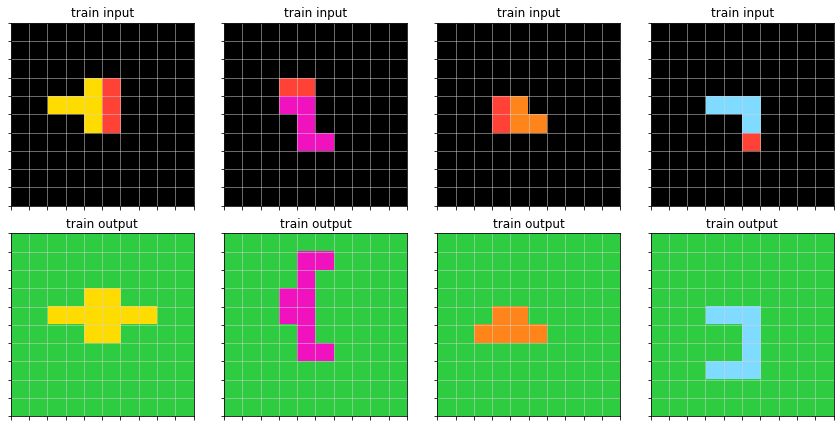

2 objects
[[1 0]
 [1 1]
 [0 1]]
[[2]
 [2]]
2 objects
[[3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 0 3 3 0 3 3]
 [3 3 3 3 0 0 0 0 3 3]
 [3 3 3 3 3 0 0 3 3 3]
 [3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3]]
[[1 0 0 1]
 [1 1 1 1]
 [0 1 1 0]]


2bee17df.json
Icecuber solved? True
['draw_line_from_border', 'count_tiles', 'take_maximum']
2 objects
[[2 2 2 2 2 2 2 2 2 2 2 2]
 [0 0 0 0 2 2 0 2 2 2 2 2]
 [0 0 0 0 0 2 0 0 2 2 0 2]
 [0 0 0 0 0 0 0 0 0 0 0 2]
 [0 0 0 0 0 0 0 0 0 0 0 2]
 [0 0 0 0 0 0 0 0 0 0 0 2]
 [0 0 0 0 0 0 0 0 0 0 0 2]]
[[8 0 0 0 0 0 0 0 0 0 0 0]
 [8 0 0 0 0 0 0 0 0 0 0 0]
 [8 0 0 0 0 0 0 0 0 0 0 0]
 [8 0 0 0 0 0 0 0 0 0 0 0]
 [8 0 0 0 0 0 0 0 0 0 0 0]
 [8 0 0 0 0 0 0 0 0 0 0 0]
 [8 0 0 0 0 0 0 0 0 0 0 8]
 [8 0 0 0 0 0 0 0 0 0 0 8]
 [8 8 0 0 0 0 8 8 0 0 0 8]
 [8 8 8 0 0 8 8 8 0 0 8 8]
 [8 8 8 8 8 8 8 8 8 8 8 8]]
3 objects
[[2 2 2 2 2 2 2 2 2 2 2 2]
 [0 0 0 0 2 2 0 2 2 2 2 2]
 [0 0 0 0 0 2 0 0 2 2 0 2]
 [0 0 0 0 0 0 0 0 0 0 0 2]
 [0 0 0 0 0 0 0 0 0 0 0 2]
 [0 0 0 0 0 0 0 0 0 0 0 2]
 [0 0 0 0 0 0 0 0 0 0 0 2]]
[[8 0 0 0 0 0 0 0 0 0 0 0]
 [8 0 0 0 0 0 0 0 0 0 0 0]
 [8 0 0 0 0 0 0 0 0 0 0 0]
 [8 0 0 0 0 0 0 0 0 0 0 0]
 [8 0 0 0 0 0 0 0 0 0 0 0]
 [8 0 0 0 0 0 0 0 0 0 0 0]
 [8 0 0 0 0 0 0 0 0 0 0 8]
 [8 0 0 0 0 0 0 0 0 

2 objects
[[8 8 8 8 8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 0 0 8 8 8 0 0 8 0 0]
 [8 8 8 0 0 0 0 0 0 0 0 0 0 0]
 [8 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [8 8 8 0 0 0 0 0 0 0 0 0 0 0]
 [8 8 0 0 0 0 0 0 0 0 0 0 0 0]
 [8 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [8 8 0 0 0 0 0 0 0 0 0 0 0 0]
 [8 8 0 0 0 0 0 0 0 0 0 0 0 0]
 [8 8 0 0 0 0 0 0 0 0 0 0 0 0]
 [8 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [8 8 0 0 0 0 0 0 0 0 0 0 0 0]
 [8 8 0 0 0 0 0 0 0 0 0 0 0 0]
 [8 0 0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 2 2]
 [0 0 0 0 0 0 0 0 0 0 0 0 2]
 [0 0 0 0 0 0 0 0 0 0 0 0 2]
 [0 0 0 0 0 0 0 0 0 0 0 2 2]
 [0 0 0 0 0 0 0 0 0 0 2 2 2]
 [0 0 0 0 0 0 0 0 0 0 0 0 2]
 [0 0 0 0 0 0 0 0 0 0 0 0 2]
 [0 0 0 0 0 0 0 0 0 0 0 0 2]
 [0 0 0 0 0 0 0 0 0 0 0 0 2]
 [0 0 0 0 0 0 0 0 0 0 0 0 2]
 [0 0 0 0 0 0 0 0 0 0 0 2 2]
 [0 0 2 0 2 2 0 0 0 0 2 2 2]
 [2 2 2 2 2 2 2 2 2 2 2 2 2]]
3 objects
[[8 8 8 8 8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 0 0 8 8 8 0 0 8 0 0]
 [8 8 8 0 0 0 0 0 0 0 0 0 0 0]
 [8 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [8 8 8 0 0 0 0 0 0 0 0 0 0 0]
 [8 8 0 0 0 

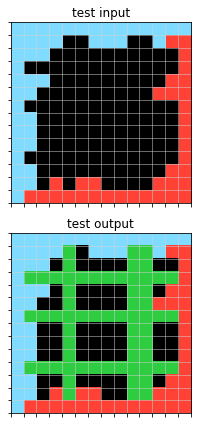

2c608aff.json
Icecuber solved? False
['draw_line_from_point', 'projection_unto_rectangle']
4 objects
[[8 8 8 8 8 8 8 8 8 8 8 8]
 [8 8 0 0 0 8 8 8 8 8 8 8]
 [8 8 0 0 0 8 8 8 8 8 8 8]
 [8 8 0 0 0 8 8 8 8 0 8 8]
 [8 8 0 0 0 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 0 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8 8 8]]
[[3 3 3]
 [3 3 3]
 [3 3 3]
 [3 3 3]]
[[4]]
[[4]]
4 objects
[[8 8 8 8 8 8 8 8 8 8 8 8]
 [8 8 0 0 0 8 8 8 8 8 8 8]
 [8 8 0 0 0 8 8 8 8 8 8 8]
 [8 8 0 0 0 0 0 0 0 0 8 8]
 [8 8 0 0 0 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 0 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8 8 8]]
[[3 3 3]
 [3 3 3]
 [3 3 3]
 [3 3 3]]
[[4 4 4 4 4]]
[[4]]
3 objects
[[2 2 2 2 2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2 2 2 2 2]
 [2 2 2 0 0 0 2 2 2 2 2 2]
 [2 2 2 0 0 0 2 2 2 2 2 2]
 [2 2 2 0 0 0 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2 2 2 2 2]
 [2 2 2 0 2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2 2 2 2 2]]
[[1 1 1]
 [1 1

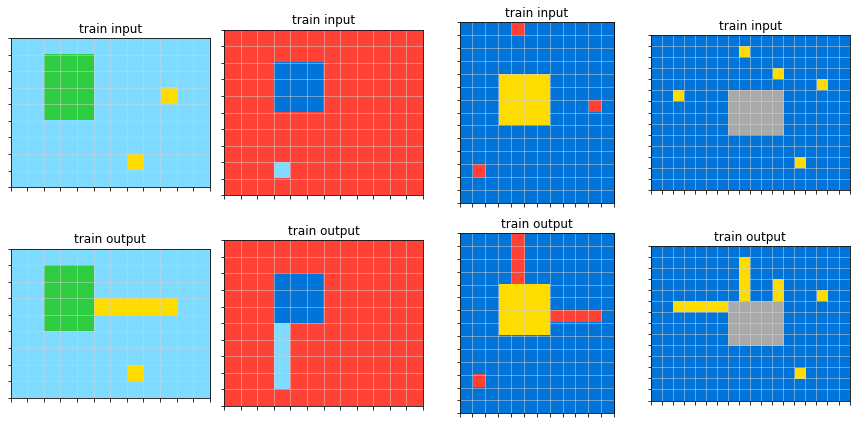

11 objects
[[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2]
 [2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2]
 [2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 2 2 2 2 0 2]
 [2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 2 2 2 2 2 2]
 [2 2 0 2 2 2 2 0 0 0 0 0 0 0 0 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2]
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
 [2 2 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]]
[[1]]
[[1]]
[[1]]
[[1]]
[[8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 

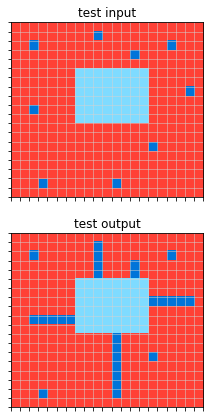

2dc579da.json
Icecuber solved? True
['detect_grid', 'find_the_intruder', 'crop']
6 objects
[[8 8]
 [8 8]]
[[0 0 3 0 0]
 [0 0 3 0 0]
 [3 3 3 3 3]
 [0 0 3 0 0]
 [0 0 3 0 0]]
[[8 8]
 [8 8]]
[[8 8]
 [0 8]]
[[8 8]
 [8 8]]
[[4]]
2 objects
[[8 8]
 [0 8]]
[[4]]
6 objects
[[4 4 4]
 [4 4 4]
 [4 4 4]]
[[0 0 0 2 0 0 0]
 [0 0 0 2 0 0 0]
 [0 0 0 2 0 0 0]
 [2 2 2 2 2 2 2]
 [0 0 0 2 0 0 0]
 [0 0 0 2 0 0 0]
 [0 0 0 2 0 0 0]]
[[4 4 4]
 [4 0 4]
 [4 4 4]]
[[1]]
[[4 4 4]
 [4 4 4]
 [4 4 4]]
[[4 4 4]
 [4 4 4]
 [4 4 4]]
2 objects
[[4 4 4]
 [4 0 4]
 [4 4 4]]
[[1]]
6 objects
[[3 3 3 3 3]
 [3 3 3 3 3]
 [3 0 3 3 3]
 [3 3 3 3 3]
 [3 3 3 3 3]]
[[0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]]
[[3 3 3 3 3]
 [3 3 3 3 3]
 [3 3 3 3 3]
 [3 3 3 3 3]
 [3 3 3 3 3]]
[[8]]
[[3 3 3 3 3]
 [3 3 3 3 3]
 [3 

5 objects
[[1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]]
[[1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 0 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]]
[[2]]
[[1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]]
[[1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]]
2 objects
[[1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 0 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]]
[[2]]


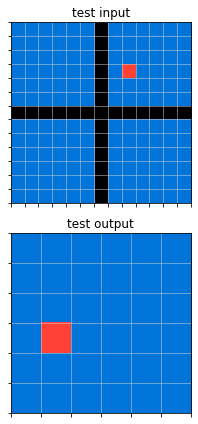

2dd70a9a.json
Icecuber solved? False
['draw_line_from_point', 'direction_guessing', 'maze']
38 objects
[[8 8 8 8 8]
 [0 0 0 8 0]]
[[8]]
[[0 0 0 8 8 8]
 [0 0 0 8 0 8]
 [0 0 8 8 8 0]
 [8 8 8 8 8 8]
 [0 8 0 8 0 0]
 [0 0 0 8 0 0]]
[[8]]
[[8]]
[[0 8 0 0 0]
 [8 8 8 8 8]
 [8 0 8 8 0]
 [8 0 0 8 8]
 [0 0 0 8 0]]
[[8]]
[[8]]
[[2]
 [2]]
[[8]]
[[8 0]
 [8 8]
 [8 8]
 [8 8]]
[[8]]
[[8]]
[[8]
 [8]]
[[8]]
[[8]]
[[8 8 8]]
[[8 0 0 8 0 8 8 0 0 0]
 [8 8 8 8 8 8 8 8 8 8]
 [0 8 8 8 0 8 0 0 8 8]
 [0 0 8 0 0 0 0 0 0 8]
 [0 0 0 0 0 0 0 0 0 8]]
[[8]]
[[8]]
[[0 0 8 8 8]
 [0 0 8 8 0]
 [0 0 0 8 0]
 [0 0 8 8 8]
 [0 0 0 8 0]
 [0 0 0 8 0]
 [0 0 0 8 0]
 [8 8 8 8 0]]
[[8]]
[[3]
 [3]]
[[8]]
[[8]]
[[0 0 8 0]
 [8 8 8 8]
 [8 0 8 0]]
[[8]]
[[8]]
[[8 8]]
[[8]]
[[8]]
[[8 8]]
[[8]]
[[8]]
[[8 8 8]]
[[8]]
[[8]]
[[8 8 8]]
38 objects
[[8 8 8 8 8]
 [0 0 0 8 0]]
[[8]]
[[0 0 0 8 8 8]
 [0 0 0 8 0 8]
 [0 0 8 8 8 0]
 [8 8 8 8 8 8]
 [0 8 0 8 0 0]
 [0 0 0 8 0 0]]
[[8]]
[[8]]
[[0 8 0 0 0]
 [8 8 8 8 8]
 [8 0 8 8 0]
 [8 0 0 8 8]
 [0 0 0 8 0]]

20 objects
[[8 8 8 8]
 [8 0 0 0]]
[[8 8]]
[[0 8]
 [8 8]]
[[2 2]]
[[8]]
[[8]
 [8]]
[[8]]
[[8]
 [8]]
[[8]]
[[8]]
[[8]]
[[8]
 [8]
 [8]
 [8]]
[[8]]
[[0 8]
 [8 8]]
[[3 3]]
[[8]]
[[8 8]
 [8 0]]
[[8 8]]
[[8]]
[[8]]
20 objects
[[8 8 8 8]
 [8 0 0 0]]
[[8 8]]
[[0 8]
 [8 8]]
[[2 2]]
[[0 0 0 0 0 3 3]
 [0 0 0 0 0 0 3]
 [0 0 0 0 0 0 3]
 [0 0 0 0 0 0 3]
 [0 0 0 0 0 0 3]
 [0 0 0 0 0 0 3]
 [3 3 3 3 3 3 3]]
[[8]]
[[8]
 [8]]
[[8]]
[[8]
 [8]]
[[8]]
[[8]]
[[8]]
[[8]
 [8]
 [8]
 [8]]
[[8]]
[[0 8]
 [8 8]]
[[8]]
[[8 8]
 [8 0]]
[[8 8]]
[[8]]
[[8]]


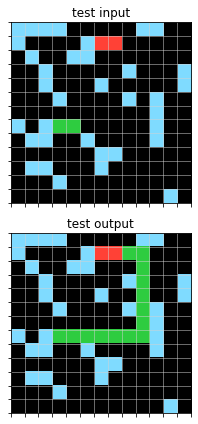

2dee498d.json
Icecuber solved? True
['detect_repetition', 'crop', 'divide_by_n']
9 objects
[[4]]
[[0 5 0 0 5 0 0 5 0]
 [5 5 5 5 5 5 5 5 5]
 [0 5 0 0 5 0 0 5 0]]
[[1 1]]
[[4 4]]
[[1]]
[[1]]
[[4 4]]
[[1 1]]
[[4]]
5 objects
[[4]]
[[0 5 0]
 [5 5 5]
 [0 5 0]]
[[1]]
[[1]]
[[4]]
28 objects
[[2]]
[[1]]
[[2]]
[[1]]
[[2]]
[[1]]
[[4]
 [4]]
[[2]]
[[1]]
[[4 4]
 [4 4]]
[[2]]
[[1]]
[[4 4]
 [4 4]]
[[2]]
[[1]]
[[4]
 [4]]
[[1]]
[[2]]
[[1]]
[[2]]
[[1]]
[[2]]
[[1]]
[[2]]
[[1]]
[[2]]
[[1]]
[[2]]
10 objects
[[2]]
[[1]]
[[4]
 [4]]
[[2]]
[[1]]
[[4]
 [4]]
[[1]]
[[2]]
[[1]]
[[2]]
9 objects
[[2]
 [2]]
[[1]]
[[2]
 [2]]
[[1]]
[[2]
 [2]]
[[1]]
[[3]]
[[3]]
[[3]]
3 objects
[[2]
 [2]]
[[1]]
[[3]]


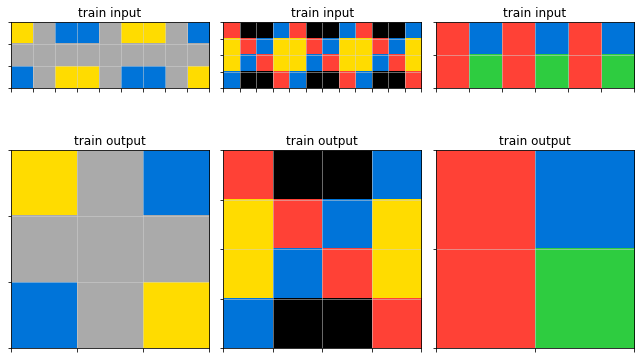

9 objects
[[0 2 0 0 0]
 [2 2 0 0 0]
 [0 2 2 2 0]
 [0 0 0 2 2]
 [0 0 0 2 0]]
[[4 4]
 [4 4]]
[[0 2 0 0 0]
 [2 2 0 0 0]
 [0 2 2 2 0]
 [0 0 0 2 2]
 [0 0 0 2 0]]
[[4 4]
 [4 4]]
[[0 2 0 0 0]
 [2 2 0 0 0]
 [0 2 2 2 0]
 [0 0 0 2 2]
 [0 0 0 2 0]]
[[4 4]
 [4 4]]
[[1 1]
 [1 1]]
[[1 1]
 [1 1]]
[[1 1]
 [1 1]]
3 objects
[[0 2 0 0 0]
 [2 2 0 0 0]
 [0 2 2 2 0]
 [0 0 0 2 2]
 [0 0 0 2 0]]
[[4 4]
 [4 4]]
[[1 1]
 [1 1]]


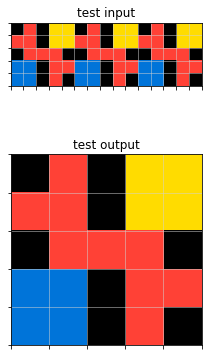

31aa019c.json
Icecuber solved? True
['find_the_intruder', 'remove_noise', 'contouring']
16 objects
[[1]]
[[5]]
[[2]]
[[2]]
[[1]]
[[1]]
[[5]]
[[8]]
[[4]]
[[5]]
[[1]
 [1]]
[[1]]
[[8]]
[[1]]
[[3]]
[[3]]
2 objects
[[2 2 2]
 [2 0 2]
 [2 2 2]]
[[4]]
26 objects
[[2]]
[[7 7]]
[[1]]
[[3]]
[[3]]
[[9]]
[[3]]
[[7]]
[[1]]
[[6]]
[[9]]
[[1]]
[[9]]
[[2]]
[[3]]
[[5]]
[[7]]
[[3]]
[[1]]
[[4 4]]
[[1]]
[[5]]
[[5]]
[[3]]
[[4]]
[[5]]
2 objects
[[2 2 2]
 [2 0 2]
 [2 2 2]]
[[6]]
15 objects
[[6]]
[[8]]
[[2]
 [2]]
[[8]]
[[7]]
[[2]]
[[5]]
[[9]
 [9]]
[[1]]
[[1]]
[[6]]
[[1]]
[[7]]
[[3]]
[[5]]
2 objects
[[2 2 2]
 [2 0 2]
 [2 2 2]]
[[3]]


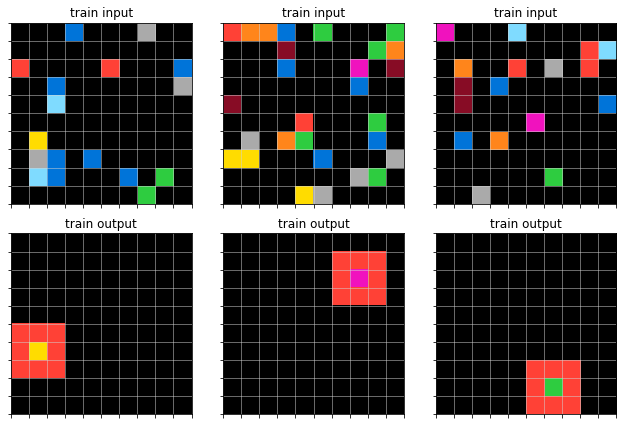

30 objects
[[2]]
[[5]]
[[7]]
[[5]]
[[6]]
[[2]]
[[3]]
[[8]]
[[3]]
[[8]]
[[7]]
[[4]]
[[7 7]]
[[4]]
[[4]]
[[8]]
[[7]]
[[9]]
[[4]]
[[5 5]]
[[3]]
[[6]]
[[7]]
[[7]]
[[3]]
[[2]]
[[1]]
[[1]]
[[6]]
[[7]]
2 objects
[[2 2 2]
 [2 0 2]
 [2 2 2]]
[[9]]


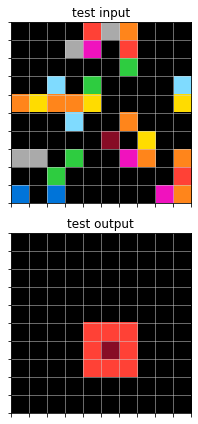

321b1fc6.json
Icecuber solved? False
['pattern_repetition', 'pattern_juxtaposition']
7 objects
[[7]]
[[6]]
[[9]]
[[4]]
[[8 8]
 [8 8]]
[[8 8]
 [8 8]]
[[8 8]
 [8 8]]
12 objects
[[7]]
[[6]]
[[9]]
[[4]]
[[7]]
[[6]]
[[9]]
[[4]]
[[7]]
[[6]]
[[9]]
[[4]]
5 objects
[[8 8 0]
 [8 8 8]]
[[8 8 0]
 [8 8 8]]
[[7 7]]
[[6 6 6]]
[[8 8 0]
 [8 8 8]]
6 objects
[[7 7]]
[[6 6 6]]
[[7 7]]
[[6 6 6]]
[[7 7]]
[[6 6 6]]


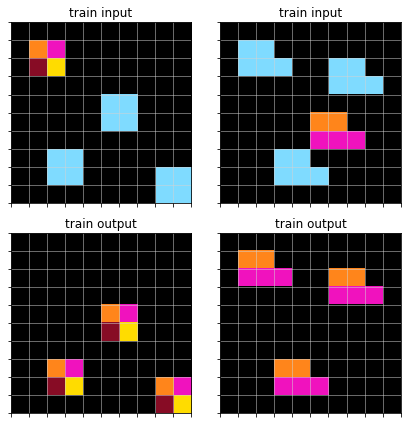

6 objects
[[0 8 8 0]
 [8 8 8 8]
 [0 0 8 0]]
[[0 8 8 0]
 [8 8 8 8]
 [0 0 8 0]]
[[4 4]
 [4 0]]
[[3]]
[[3 3]
 [3 0]]
[[0 8 8 0]
 [8 8 8 8]
 [0 0 8 0]]
9 objects
[[4 4]
 [4 0]]
[[4 4]
 [4 0]]
[[3]]
[[3 3]
 [3 0]]
[[3]]
[[3 3]
 [3 0]]
[[4 4]
 [4 0]]
[[3]]
[[3 3]
 [3 0]]


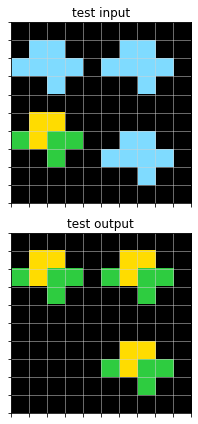

32597951.json
Icecuber solved? True
['find_the_intruder', 'recoloring']
41 objects
[[1 1]]
[[1 1 1]]
[[1 1 1]]
[[1 1 1]]
[[1 1]]
[[8 8 8 8 8]
 [0 0 8 0 0]
 [8 8 8 8 8]
 [0 8 0 0 0]
 [8 8 8 8 8]]
[[1 1 1]]
[[1 1 1]]
[[1 1 1]]
[[1 1 1]]
[[1]]
[[1 1]]
[[1 1 1]]
[[1 1 1]]
[[1 1 1]]
[[1 1]]
[[1 1 1]]
[[1 1 1]]
[[1 1 1]]
[[1 1 1]]
[[1]]
[[1 1]]
[[1 1 1]]
[[1 1 1]]
[[1 1 1]]
[[1 1]]
[[1 1 1]]
[[1 1 1]]
[[1 1 1]]
[[1 1 1]]
[[1]]
[[1 1]]
[[1 1 1]]
[[1 1 1]]
[[1 1 1]]
[[1 1]]
[[1 1 1]]
[[1 1 1]]
[[1 1 1]]
[[1 1 1]]
[[1]]
44 objects
[[1 1]]
[[1 1 1]]
[[1 1 1]]
[[1 1 1]]
[[1 1]]
[[8 8 8 8 8]
 [0 0 8 0 0]
 [8 8 8 8 8]
 [0 8 0 0 0]
 [8 8 8 8 8]]
[[1 1 1]]
[[1]]
[[3 3]]
[[3 3]]
[[1]]
[[1 1 1]]
[[1]]
[[1 1]]
[[1 1]]
[[3]]
[[3 3 3]]
[[1 1 1]]
[[1 1]]
[[1 1 1]]
[[1 1 1]]
[[1 1 1]]
[[1 1 1]]
[[1]]
[[1 1]]
[[1 1 1]]
[[1 1 1]]
[[1 1 1]]
[[1 1]]
[[1 1 1]]
[[1 1 1]]
[[1 1 1]]
[[1 1 1]]
[[1]]
[[1 1]]
[[1 1 1]]
[[1 1 1]]
[[1 1 1]]
[[1 1]]
[[1 1 1]]
[[1 1 1]]
[[1 1 1]]
[[1 1 1]]
[[1]]
46 objects
[[1 0]
 [1 1]]


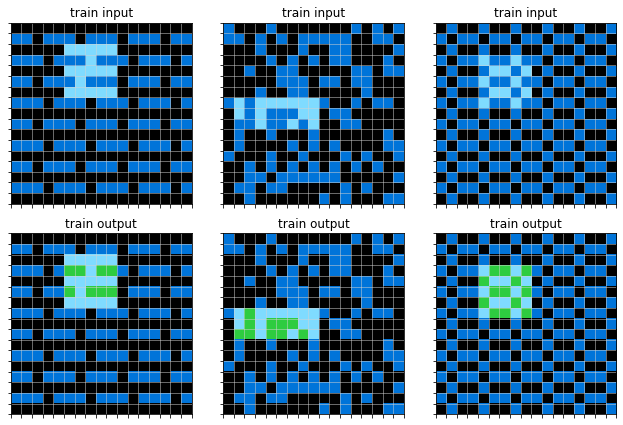

101 objects
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[8 0 0 0]
 [8 8 0 0]
 [0 8 8 0]
 [0 0 8 8]]
[[1]]
[[8 8 0 0]
 [0 8 8 0]
 [0 0 8 8]
 [0 0 0 8]]
[[1]]
[[8]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[8]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
101 objects
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]

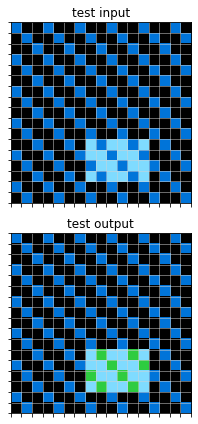

3345333e.json
Icecuber solved? False
['pattern_completion', 'pattern_reflection', 'remove_noise']
3 objects
[[6 6 0 0 0]
 [6 6 0 0 0]
 [0 6 6 0 0]
 [0 0 6 0 0]
 [0 0 6 6 0]
 [0 6 6 6 6]
 [0 6 0 0 6]
 [0 6 6 6 6]
 [0 0 6 6 0]]
[[6 6]]
[[1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]]
1 objects
[[6 6 0 0 6 6]
 [6 6 0 0 6 6]
 [0 6 6 6 6 0]
 [0 0 6 6 0 0]
 [0 0 6 6 0 0]
 [0 6 6 6 6 0]
 [0 6 0 0 6 0]
 [0 6 6 6 6 0]
 [0 0 6 6 0 0]]
3 objects
[[2]]
[[0 0 0 0 0 2 0 0]
 [0 0 0 2 2 2 2 0]
 [0 0 0 2 2 2 2 2]
 [0 0 0 2 2 0 2 0]
 [0 0 0 0 0 0 2 0]
 [0 2 2 2 2 2 2 0]
 [2 2 0 2 2 0 2 2]
 [2 2 0 0 0 0 2 2]]
[[3 3 3 3]
 [3 3 3 3]
 [3 3 3 3]
 [3 3 3 3]]
1 objects
[[0 0 2 0 0 2 0 0]
 [0 2 2 2 2 2 2 0]
 [2 2 2 2 2 2 2 2]
 [0 2 0 2 2 0 2 0]
 [0 2 0 0 0 0 2 0]
 [0 2 2 2 2 2 2 0]
 [2 2 0 2 2 0 2 2]
 [2 2 0 0 0 0 2 2]]


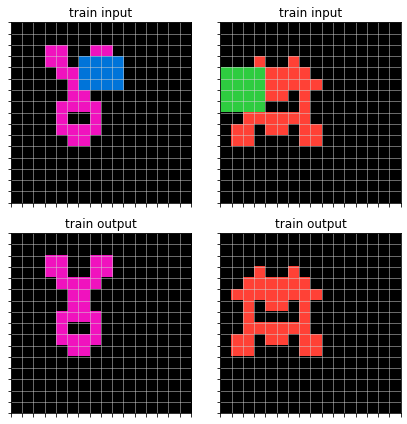

6 objects
[[5]]
[[5]]
[[8 8 8 8]
 [8 8 8 8]
 [8 8 8 8]
 [8 8 8 8]
 [8 8 8 8]]
[[5 5 5]]
[[0 0 0 0 5 0]
 [0 0 0 0 5 5]
 [5 5 5 5 5 5]
 [0 5 0 0 0 0]
 [5 5 5 5 5 5]
 [0 5 0 5 5 0]
 [0 0 0 5 0 0]]
[[5 5]
 [0 5]]
4 objects
[[5]]
[[5]]
[[0 5 0 0 0 0 0 5 0]
 [5 5 0 0 0 0 0 5 5]
 [5 5 5 5 5 5 5 5 5]
 [0 0 0 0 5 0 0 0 0]
 [5 5 5 5 5 5 5 5 5]
 [0 5 5 0 5 0 5 5 0]
 [0 0 5 0 0 0 5 0 0]]
[[5 5 5]]


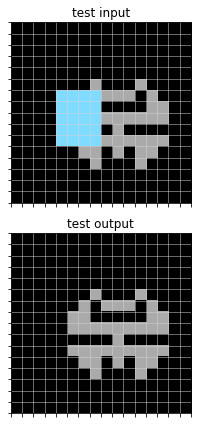

3428a4f5.json
Icecuber solved? True
['detect_wall', 'separate_images', 'pattern_differences']
9 objects
[[2 2]
 [0 2]
 [2 2]
 [0 2]
 [0 2]]
[[2]]
[[2 0]
 [2 2]]
[[2]]
[[4 4 4 4 4]]
[[2 0]
 [2 2]
 [2 0]]
[[2]
 [2]]
[[2 2]
 [2 0]]
[[2]]
3 objects
[[3 0 0 3 3]
 [3 3 3 0 3]
 [0 0 3 3 3]
 [3 3 3 0 3]]
[[3]
 [3]]
[[3 3]]
8 objects
[[0 2 2 2 2]
 [0 0 0 0 2]
 [0 0 2 2 2]
 [0 0 2 2 0]
 [2 2 2 2 0]
 [2 2 0 0 0]]
[[2]]
[[2]]
[[4 4 4 4 4]]
[[2]]
[[2]]
[[2]]
[[0 0 2]
 [2 0 2]
 [2 2 2]]
2 objects
[[3 3 3 3]
 [0 3 0 3]
 [0 3 3 0]
 [0 3 0 0]
 [0 3 0 0]
 [0 3 3 3]]
[[3]
 [3]]
13 objects
[[2 2]
 [2 0]
 [2 0]]
[[0 2 2]
 [2 2 2]]
[[0 2 0]
 [2 2 2]
 [2 0 2]]
[[2]]
[[2]]
[[4 4 4 4 4]]
[[2]]
[[2 2]
 [0 2]]
[[2]]
[[2 2]]
[[2]]
[[0 2]
 [2 2]
 [0 2]]
[[2 0]
 [2 2]]
6 objects
[[3]]
[[3]]
[[3]]
[[3 0 0 0]
 [3 3 3 3]
 [0 3 3 0]]
[[3 0]
 [3 3]]
[[3]]
8 objects
[[0 2 0 2 0]
 [2 2 0 2 2]
 [0 2 2 2 0]
 [0 2 2 0 0]
 [0 2 2 2 2]
 [0 0 2 0 2]]
[[2]]
[[4 4 4 4 4]]
[[2]]
[[0 2 2 2]
 [2 2 0 0]
 [0 2 0 0]]
[[2 0]
 [2 0]
 [2 

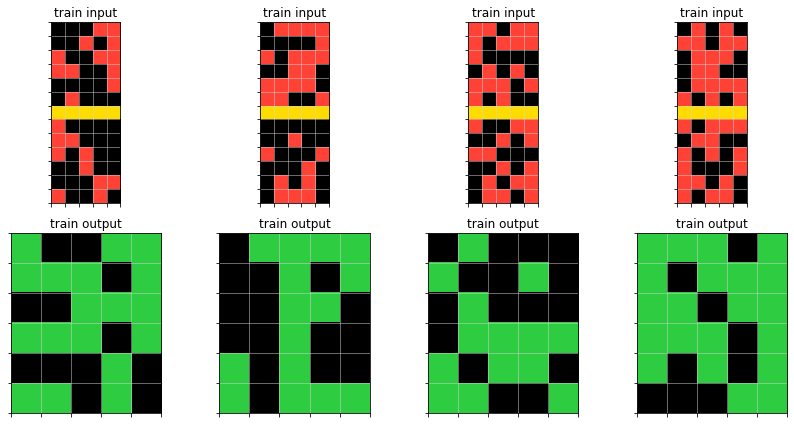

6 objects
[[2 0 0 0 0]
 [2 0 0 0 0]
 [2 2 2 0 0]
 [2 2 2 2 2]
 [0 2 2 0 0]
 [2 2 2 2 2]]
[[2 2 0]
 [0 2 2]]
[[4 4 4 4 4]]
[[2 2]
 [0 2]
 [0 2]]
[[2 0 0 0 0]
 [2 2 2 0 0]
 [0 2 2 0 0]
 [0 0 2 2 0]
 [0 0 2 2 2]]
[[2]
 [2]]
6 objects
[[3]]
[[3]]
[[3]]
[[3]]
[[0 3]
 [3 3]
 [3 0]]
[[3 0]
 [3 3]
 [0 3]]
10 objects
[[2]
 [2]]
[[2]
 [2]]
[[2]
 [2]]
[[0 0 0 2]
 [0 2 2 2]
 [2 0 2 2]
 [2 2 2 0]]
[[2]]
[[4 4 4 4 4]]
[[2 2 0 0 0]
 [0 2 2 2 2]
 [0 0 2 2 0]]
[[2 0]
 [2 2]]
[[2]]
[[2]]
5 objects
[[0 3 3]
 [3 3 0]]
[[3]]
[[3]]
[[3 0 0]
 [3 3 0]
 [0 3 3]
 [0 0 3]]
[[3 3 0]
 [0 3 3]]


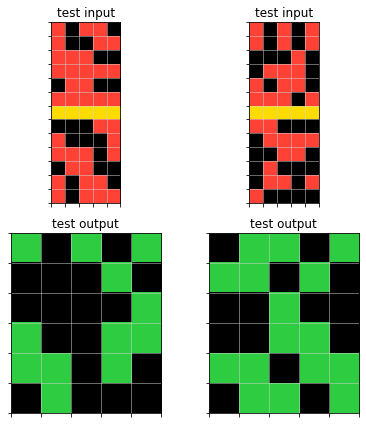

3618c87e.json
Icecuber solved? True
['gravity']
2 objects
[[1]]
[[0 0 5 0 0]
 [5 5 5 5 5]]
4 objects
[[5]]
[[5 5]]
[[1]]
[[5 5]]
3 objects
[[1]]
[[1]]
[[0 5 0 5 0]
 [5 5 5 5 5]]
7 objects
[[5]]
[[5]]
[[5]]
[[1]]
[[5]]
[[1]]
[[5]]
3 objects
[[1]]
[[1]]
[[0 5 0 0 5]
 [5 5 5 5 5]]
6 objects
[[5]]
[[5]]
[[5]]
[[1]]
[[5 5]]
[[1]]


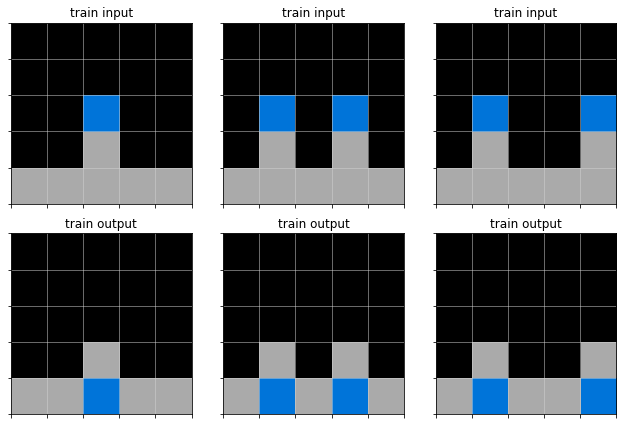

3 objects
[[1]]
[[1]]
[[0 0 5 0 5]
 [5 5 5 5 5]]
6 objects
[[5]]
[[5]]
[[5 5]]
[[1]]
[[5]]
[[1]]


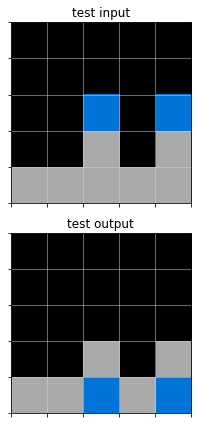

3631a71a.json
Icecuber solved? False
['image_filling', 'pattern_expansion', 'pattern_rotation']
178 objects
[[6 6]
 [6 6]]
[[5 5]
 [5 0]]
[[1]]
[[1]]
[[5 5]
 [0 5]]
[[6 6]
 [6 6]]
[[5]]
[[1]]
[[7 7]]
[[1]]
[[5]]
[[7 7]
 [7 7]]
[[7]]
[[5 5]
 [5 0]]
[[4]]
[[4]]
[[5 5]
 [0 5]]
[[7]]
[[7 7]
 [7 7]]
[[7]]
[[4]]
[[7]]
[[2 2]]
[[7]]
[[4]]
[[7]]
[[1]]
[[7]]
[[4]]
[[4]]
[[7]]
[[1]]
[[5]]
[[1]]
[[7]]
[[7]]
[[7]]
[[7]]
[[9 9 9 9 9 9 9 9]
 [9 9 9 9 9 9 9 9]
 [9 9 9 9 9 9 9 9]
 [9 9 9 9 9 9 9 9]
 [9 9 9 9 9 9 9 9]
 [9 9 9 9 9 9 9 9]
 [9 9 9 9 9 9 0 0]
 [9 9 9 9 9 9 0 0]]
[[7]]
[[3]]
[[4]]
[[8]]
[[8]]
[[4]]
[[7]]
[[7]]
[[2]]
[[2]]
[[9 9 9 9 9 9 9]
 [9 9 9 9 9 9 9]
 [9 9 9 9 9 9 9]]
[[4]]
[[4]]
[[7]]
[[8]]
[[9 9 9 9 9 9 9]
 [9 9 9 9 9 9 9]
 [9 9 9 9 9 9 9]
 [9 9 9 9 9 9 9]
 [9 9 9 9 9 9 9]
 [9 9 9 9 9 9 9]]
[[4]]
[[5]]
[[5]]
[[5]]
[[4]]
[[7]]
[[2]]
[[5]]
[[5]]
[[4]]
[[1]]
[[7]]
[[4]]
[[1]]
[[1]]
[[7]]
[[7]]
[[7]]
[[7]]
[[4]]
[[8]]
[[7]]
[[7]]
[[8]]
[[4]]
[[7]
 [7]]
[[2]
 [2]]
[[7]
 [7]]
[[1 1 0 0 0 0

213 objects
[[5]]
[[5]]
[[8 8]
 [8 0]]
[[0 4 4 4]
 [4 4 4 4]]
[[4 4 4 0]
 [4 4 4 4]]
[[8 8]
 [0 8]]
[[5]]
[[5]]
[[5]]
[[3 3]]
[[5]]
[[0 1]
 [1 1]]
[[4 4]
 [4 0]]
[[0 4]
 [4 4]
 [4 4]
 [4 4]]
[[2]]
[[8 8 8 8]
 [8 0 0 8]]
[[2]]
[[4 0]
 [4 4]
 [4 4]
 [4 4]]
[[4 4]
 [0 4]]
[[1 0]
 [1 1]]
[[3]]
[[3]]
[[5]]
[[1]]
[[8 8]
 [8 8]]
[[0 7 7 0]
 [7 7 7 7]]
[[8 8]
 [8 8]]
[[1]]
[[5]]
[[1]]
[[3]]
[[3]]
[[1]]
[[4 4]
 [4 0]]
[[1]]
[[8 8]
 [8 0]]
[[0 7]
 [7 7]]
[[5 5]]
[[7 0]
 [7 7]]
[[8 8]
 [0 8]]
[[1]]
[[4 4]
 [0 4]]
[[1]]
[[3]]
[[5]
 [5]]
[[5]
 [5]]
[[3]]
[[1]]
[[8 8]
 [8 0]]
[[0 4 4 4]
 [4 4 4 4]]
[[2 2]
 [2 0]]
[[1]]
[[4]]
[[4]]
[[1]]
[[2 2]
 [0 2]]
[[4 4 4 0]
 [4 4 4 4]]
[[3]]
[[5 5]]
[[3]]
[[0 4]
 [4 4]
 [4 4]
 [4 4]]
[[2]]
[[8 8]
 [8 0]]
[[1]]
[[3]]
[[5]]
[[6 6]]
[[5]]
[[3]]
[[1]]
[[8 8]
 [0 8]]
[[2]]
[[3]]
[[3]]
[[5]]
[[6]]
[[6]]
[[5]]
[[3]]
[[3]]
[[8 8]
 [8 8]]
[[0 7]
 [7 7]]
[[4]]
[[5]]
[[0 6]
 [6 6]]
[[7]]
[[7]]
[[6 0]
 [6 6]]
[[5]]
[[4]]
[[7 0]
 [7 7]]
[[8 8]
 [8 8]]
[[3]]
[[5]]
[[7 7]]
[[

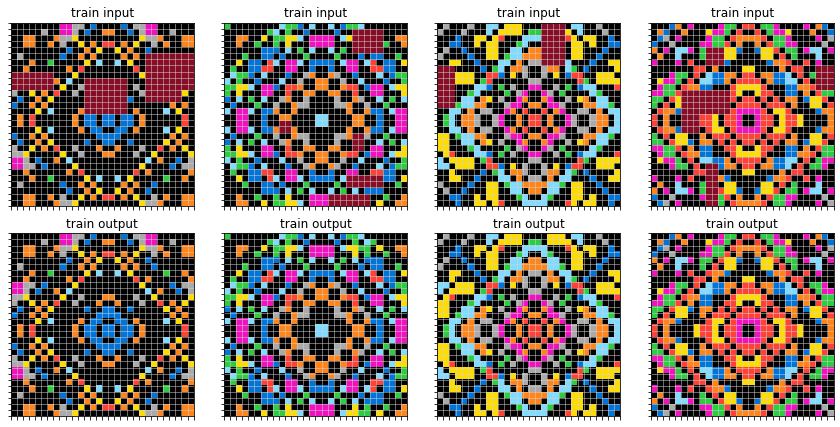

203 objects
[[8]]
[[7]]
[[7 7]
 [7 7]]
[[1 1]
 [1 1]]
[[0 3]
 [3 3]]
[[0 6]
 [6 6]]
[[0 8]
 [8 8]]
[[8 0]
 [8 8]]
[[6 0]
 [6 6]]
[[3 0]
 [3 3]]
[[1 1]
 [1 1]]
[[7 7]
 [7 7]]
[[7]]
[[8]]
[[9 9 9 9 9 9 9]
 [9 9 9 9 9 9 9]
 [9 9 9 9 9 9 9]]
[[8]]
[[0 6]
 [6 6]]
[[7 7]
 [7 7]]
[[6 6]]
[[7 7]]
[[6]]
[[8]]
[[1 1]
 [1 1]]
[[2]]
[[6]]
[[6]]
[[9 9 9 9 9 0 0]
 [9 9 9 9 9 0 0]
 [9 9 9 9 9 0 0]
 [9 9 9 9 9 0 0]
 [9 9 9 9 9 9 9]
 [0 0 9 9 9 9 9]
 [0 0 9 9 9 9 9]
 [0 0 9 9 9 9 9]
 [0 0 9 9 9 9 9]]
[[8]]
[[0 6]
 [6 6]]
[[0 8]
 [8 8]]
[[6 6]
 [6 6]]
[[6 6]
 [6 6]]
[[1 1]
 [1 1]]
[[7 7]]
[[1 1]]
[[5]]
[[6]]
[[5]]
[[1 1]
 [1 1]]
[[8]]
[[0 6]
 [6 6]]
[[2]]
[[6]]
[[5 5 5 5]
 [5 0 0 5]]
[[2]]
[[6]]
[[8]]
[[8]]
[[2]]
[[6]]
[[6]]
[[8]]
[[0 3]
 [3 3]]
[[0 6]
 [6 6]]
[[0 8]
 [8 8]]
[[6]]
[[3]]
[[3]]
[[6]]
[[6 0]
 [6 6]]
[[6]]
[[5]]
[[3 3]]
[[5]]
[[8]]
[[0 6]
 [6 6]]
[[7 7]
 [7 7]]
[[6]]
[[3]]
[[0 6 6 0]
 [6 6 6 6]]
[[3]]
[[7 7]
 [7 7]]
[[6]]
[[5]]
[[3]]
[[3]]
[[0 8]
 [8 8]]
[[6 6]
 [6 6]]
[[6]]
[[3]]
[[4]]
[[3

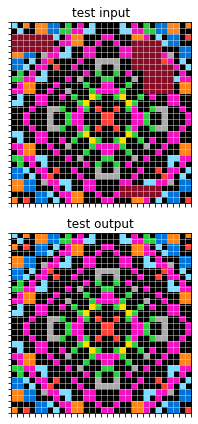

363442ee.json
Icecuber solved? False
['detect_wall', 'pattern_repetition', 'pattern_juxtaposition']
10 objects
[[4]]
[[2 2]
 [0 2]]
[[5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]]
[[2]]
[[6]]
[[1]]
[[6]]
[[4 4]]
[[1]]
[[1]]
25 objects
[[4]]
[[2 2]
 [0 2]]
[[5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]]
[[4]]
[[2 2]
 [0 2]]
[[2]]
[[6]]
[[2]]
[[6]]
[[6]]
[[4 4]]
[[6]]
[[4 4]]
[[4]]
[[2 2]
 [0 2]]
[[2]]
[[6]]
[[6]]
[[4 4]]
[[4]]
[[2 2]
 [0 2]]
[[2]]
[[6]]
[[6]]
[[4 4]]
11 objects
[[2]
 [2]]
[[7]]
[[0 3]
 [3 3]]
[[5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]]
[[1]]
[[3]]
[[7 7]]
[[1]]
[[1]]
[[1]]
[[1]]
30 objects
[[2]
 [2]]
[[7]]
[[0 3]
 [3 3]]
[[5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]]
[[2]
 [2]]
[[7]]
[[0 3]
 [3 3]]
[[3]]
[[7 7]]
[[3]]
[[7 7]]
[[2]
 [2]]
[[7]]
[[0 3]
 [3 3]]
[[2]
 [2]]
[[7]]
[[0 3]
 [3 3]]
[[3]]
[[7 7]
 [7 0]]
[[3]]
[[7 7]]
[[2]
 [2]]
[[0 3]
 [3 3]]
[[2]
 [2]]
[[7]]
[[0 3]
 [3 3]]
[[3]]
[[7 7]]
[[3]]
[[7 7]]
11 objects
[[3]]
[[8]
 [8]]
[[6]]
[[5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [

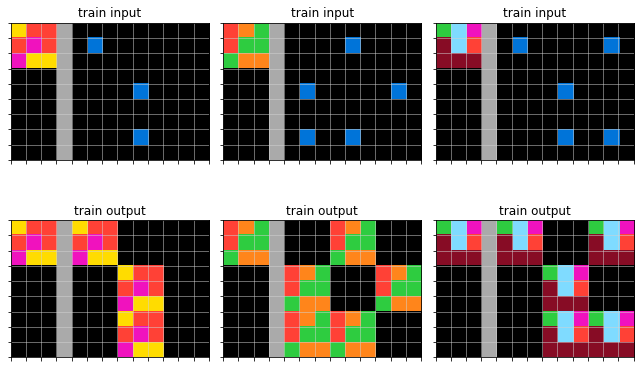

13 objects
[[3 3]]
[[9]]
[[5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]]
[[8]
 [8]]
[[4 4]]
[[1]]
[[1]]
[[9]]
[[8]]
[[1]]
[[1]]
[[1]]
[[1]]
41 objects
[[3 3]]
[[9]]
[[5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]]
[[3 3]]
[[9]]
[[3 3]]
[[9]]
[[8]
 [8]]
[[4 4]]
[[8]
 [8]]
[[4 4]]
[[0 8]
 [8 8]]
[[4 4]]
[[9]]
[[8]]
[[9]]
[[9]]
[[8]]
[[3 3]]
[[9]]
[[3 3]]
[[9]]
[[8]
 [8]]
[[4 4]]
[[8]
 [8]]
[[4 4]]
[[9]]
[[8]]
[[9]]
[[8]]
[[3 3]]
[[9]]
[[3 3]]
[[9]]
[[8]
 [8]]
[[4 4]]
[[0 8]
 [8 8]]
[[4 4]]
[[9]]
[[9]]
[[8]]


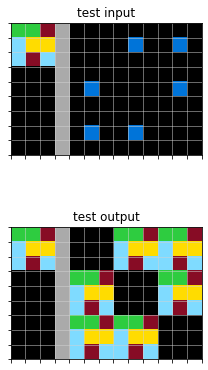

36d67576.json
Icecuber solved? False
['pattern_repetition', 'pattern_juxtaposition', 'pattern_reflection', 'pattern_rotation']
11 objects
[[1]]
[[1]]
[[2]]
[[4 4 4 4 4]]
[[4]
 [4]
 [4]
 [4]
 [4]]
[[3]]
[[3]]
[[3]]
[[2]]
[[4 4 4 4 4]]
[[2]]
21 objects
[[1]]
[[1]]
[[2]]
[[4 4 4 4 4]]
[[3]]
[[4]
 [4]
 [4]
 [4]
 [4]]
[[3]]
[[3]]
[[3]]
[[1]]
[[3]]
[[1]]
[[3]]
[[2]]
[[3]]
[[3]]
[[3]]
[[4 4 4 4 4]]
[[2]]
[[1]]
[[1]]
9 objects
[[2]]
[[4 4 4]
 [0 0 4]
 [0 0 4]]
[[1]]
[[3 3]]
[[3]]
[[2]]
[[4 4 4]
 [4 0 0]
 [4 0 0]]
[[0 0 4]
 [0 0 4]
 [4 4 4]]
[[2]]
15 objects
[[2]]
[[4 4 4]
 [0 0 4]
 [0 0 4]]
[[1]]
[[3 3]]
[[3]]
[[2]]
[[1]]
[[4 4 4]
 [4 0 0]
 [4 0 0]]
[[3]]
[[3 3]]
[[3]
 [3]]
[[0 0 4]
 [0 0 4]
 [4 4 4]]
[[2]]
[[3]]
[[1]]
9 objects
[[0 4 0]
 [4 4 4]
 [0 4 0]]
[[2]]
[[1]]
[[3]]
[[1]]
[[2]]
[[0 4 0]
 [4 4 4]
 [0 4 0]]
[[0 4 0]
 [4 4 4]
 [0 4 0]]
[[2]]
15 objects
[[0 4 0]
 [4 4 4]
 [0 4 0]]
[[2]]
[[1]]
[[3]]
[[1]]
[[2]]
[[0 4 0]
 [4 4 4]
 [0 4 0]]
[[1]]
[[3]]
[[1]]
[[1]]
[[0 4 0]
 [4 4 4]
 [0 4 0]]


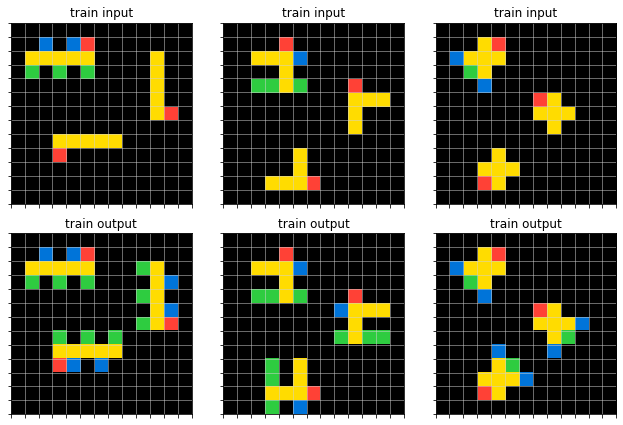

16 objects
[[1]]
[[3]]
[[4 4]
 [4 0]]
[[2]]
[[4 4]
 [0 4]]
[[0 4]
 [4 4]]
[[3]]
[[4 0]
 [4 4]]
[[1]]
[[2]]
[[4 4]
 [4 0]]
[[2]]
[[4 4]
 [0 4]]
[[0 4]
 [4 4]]
[[4 0]
 [4 4]]
[[2]]
28 objects
[[1]]
[[3]]
[[4 4]
 [4 0]]
[[2]]
[[4 4]
 [0 4]]
[[1]]
[[0 4]
 [4 4]]
[[3]]
[[4 0]
 [4 4]]
[[3]]
[[1]]
[[2]]
[[1]]
[[3]]
[[3]]
[[1]]
[[1]]
[[4 4]
 [4 0]]
[[2]]
[[4 4]
 [0 4]]
[[3]]
[[0 4]
 [4 4]]
[[3]]
[[4 0]
 [4 4]]
[[2]]
[[1]]
[[3]]
[[1]]


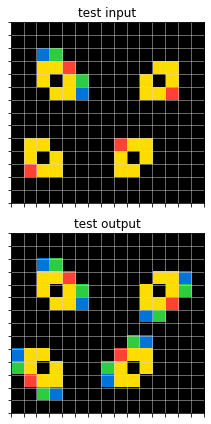

36fdfd69.json
Icecuber solved? False
['recoloring', 'rectangle_guessing']
41 objects
[[1 0 0]
 [1 1 0]
 [1 1 1]
 [1 0 0]]
[[0 0 1 1 0 0]
 [1 1 1 1 1 1]
 [0 1 0 0 0 0]]
[[1 0 0 0 0]
 [1 1 1 0 0]
 [0 0 1 1 0]
 [0 1 1 1 1]
 [0 1 1 0 0]]
[[1]]
[[2]]
[[0 1 0]
 [1 1 1]
 [1 0 0]]
[[2]]
[[0 2 2 2 2]
 [2 2 2 2 2]]
[[2]]
[[0 0 1]
 [1 1 1]
 [0 1 0]
 [0 1 0]]
[[0 1 1 1]
 [1 1 0 0]
 [0 1 0 0]
 [0 1 0 0]]
[[0 0 1 0]
 [1 1 1 1]]
[[1]
 [1]]
[[1]]
[[1 1]
 [1 0]]
[[1]]
[[1 0]
 [1 1]]
[[1]]
[[0 2]
 [2 2]]
[[1 0]
 [1 1]]
[[1]]
[[1]]
[[0 1]
 [1 1]]
[[1 1]]
[[1 1]]
[[2]]
[[0 0 1 0 1 0]
 [0 1 1 1 1 1]
 [1 1 0 1 0 0]
 [0 0 0 1 1 0]
 [0 0 0 0 1 0]]
[[2]]
[[2]]
[[1]]
[[1 0 0 0 0]
 [1 1 0 0 1]
 [1 0 1 1 1]
 [1 1 1 0 0]
 [0 0 1 1 0]
 [0 0 1 1 1]
 [0 0 0 0 1]]
[[2]]
[[2 2]]
[[1]]
[[1]]
[[1]]
[[1 0 0]
 [1 1 1]
 [1 1 1]]
[[1 0]
 [1 1]]
[[1]]
[[1]]
[[1]]
47 objects
[[1 0]
 [1 1]
 [1 1]
 [1 0]]
[[1 1]]
[[1 0 0 0 0]
 [1 1 1 0 0]
 [0 0 1 1 0]
 [0 1 1 1 1]
 [0 1 1 0 0]]
[[1]]
[[2]]
[[4 4 4 4 4 4]
 [0 4 0 0 0 0]]
[[0 1 0]

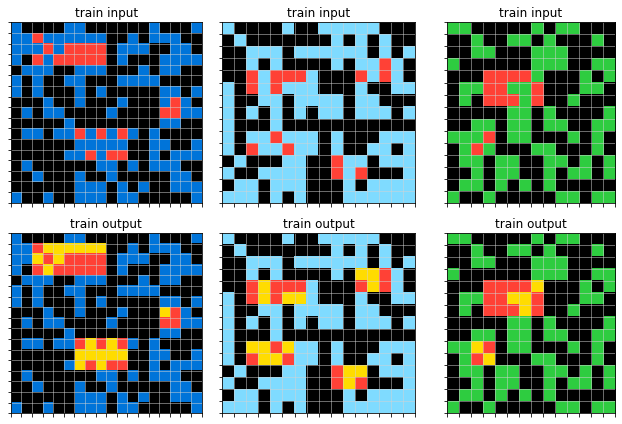

42 objects
[[9 9 9]
 [0 0 9]]
[[9 9 0 0 0 0 0 0 0 0]
 [0 9 0 0 0 0 0 0 0 0]
 [9 9 9 0 0 9 0 0 9 0]
 [0 9 9 9 9 9 9 0 9 0]
 [9 9 0 9 0 0 9 9 9 9]]
[[9]]
[[9]]
[[2 0]
 [2 2]]
[[9]]
[[2 2]]
[[9]]
[[9 9]]
[[2]]
[[0 9 9 0]
 [9 9 9 9]]
[[9]]
[[9]
 [9]
 [9]]
[[2 0 2 2]
 [2 2 2 2]]
[[9]]
[[0 0 0 0 0 0 0 0 0 0 9 0 0]
 [0 0 0 0 0 0 0 0 0 0 9 0 0]
 [0 0 0 0 0 0 0 0 9 0 9 9 0]
 [0 0 0 0 0 0 0 9 9 9 9 9 0]
 [9 9 0 0 0 0 0 9 9 0 0 9 9]
 [0 9 9 0 0 0 0 0 9 0 0 9 0]
 [0 9 9 0 0 9 0 9 9 9 0 0 0]
 [9 0 9 9 0 9 9 9 0 0 0 0 0]
 [9 9 9 9 9 9 0 0 0 0 0 0 0]
 [0 9 9 9 9 9 9 0 0 0 0 0 0]
 [0 9 0 9 0 0 9 9 0 0 0 0 0]]
[[0 9 0 0]
 [9 9 0 0]
 [0 9 9 9]
 [0 9 0 0]]
[[9]]
[[9 9]
 [0 9]
 [0 9]]
[[9]]
[[9]]
[[0 0 0 0 9]
 [0 9 9 9 9]
 [9 9 9 0 9]
 [0 9 9 9 0]
 [0 0 0 9 0]]
[[9]]
[[9]]
[[2]]
[[2]]
[[9]
 [9]]
[[2 2]
 [2 0]
 [2 2]]
[[9]]
[[2 2]]
[[9]]
[[9]]
[[2]]
[[9 9]]
[[2]]
[[9]]
[[9]]
[[9]]
[[2 2]]
[[0 0 9]
 [9 9 9]]
[[9]]
[[9]]
47 objects
[[9 9 9]]
[[9 9 0 0 0 0 0 0 0 0]
 [0 9 0 0 0 0 0 0 0 0]
 [9 9 9 0 0 9 0 0 9 0

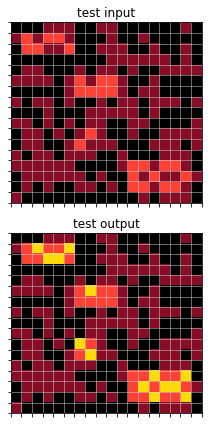

3906de3d.json
Icecuber solved? True
['gravity']
2 objects
[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 0 1 1]
 [1 1 0 1 1]]
[[2]
 [2]
 [2]]
2 objects
[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 0 1 1]
 [1 1 0 1 1]]
[[2]
 [2]
 [2]]
3 objects
[[1 1 1 1 1 1 1]
 [1 1 0 1 1 1 1]
 [1 1 0 1 0 1 1]
 [1 1 0 1 0 1 1]
 [0 0 0 0 0 1 1]]
[[2]
 [2]
 [2]
 [2]]
[[2]]
3 objects
[[1 1 1 1 1 1 1]
 [1 1 0 1 1 1 1]
 [1 1 0 1 0 1 1]
 [1 1 0 1 0 1 1]
 [0 0 0 0 0 1 1]]
[[2]]
[[2]
 [2]
 [2]
 [2]]
4 objects
[[1 1 1 1 1 1 1 1 1]
 [1 1 0 1 1 1 1 1 1]
 [1 1 0 1 1 1 1 0 1]
 [1 1 0 0 1 0 1 0 1]]
[[2]
 [2]
 [2]
 [2]]
[[2 0]
 [2 2]
 [2 2]]
[[2]
 [2]
 [2]]
4 objects
[[1 1 1 1 1 1 1 1 1]
 [1 1 0 1 1 1 1 1 1]
 [1 1 0 1 1 1 1 0 1]
 [1 1 0 0 1 0 1 0 1]]
[[2 0]
 [2 0]
 [2 2]
 [0 2]]
[[2]
 [2]
 [2]]
[[2]
 [2]
 [2]
 [2]]


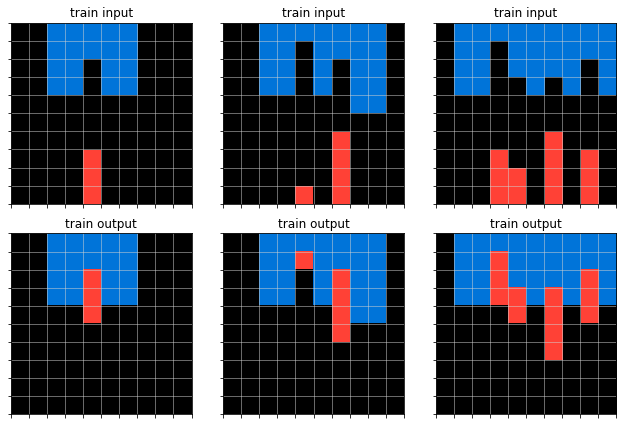

4 objects
[[1 1 1 1 1 1 1 1 1]
 [1 0 1 1 1 1 1 0 1]
 [1 0 1 0 1 0 1 0 1]
 [1 0 1 0 0 0 1 0 1]
 [0 0 1 0 0 0 0 0 1]]
[[2]
 [2]
 [2]
 [2]
 [2]
 [2]]
[[0 2 0]
 [0 2 0]
 [2 2 0]
 [2 2 2]]
[[2]
 [2]
 [2]]
5 objects
[[1 1 1 1 1 1 1 1 1]
 [1 0 1 1 1 1 1 0 1]
 [1 0 1 0 1 0 1 0 1]
 [1 0 1 0 0 0 1 0 1]
 [0 0 1 0 0 0 0 0 1]]
[[2]
 [2]
 [2]]
[[2]
 [2]
 [2]
 [2]
 [2]
 [2]]
[[2 0]
 [2 2]
 [0 2]
 [0 2]
 [0 2]]
[[2]]


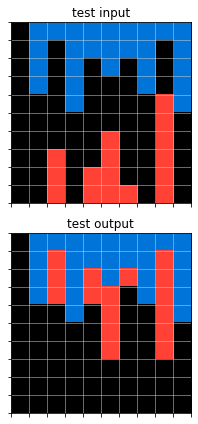

39a8645d.json
Icecuber solved? False
['count_patterns', 'take_maximum', 'crop']
21 objects
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[2]
 [2]]
[[2]
 [2]]
[[8]]
[[8]]
[[8]]
[[2]]
[[2]
 [2]]
[[2]
 [2]]
[[2]]
5 objects
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
20 objects
[[1 0 1]
 [1 1 1]
 [0 1 0]]
[[4]]
[[4 4]]
[[4]]
[[4]]
[[4 4]]
[[2]]
[[2]]
[[4]]
[[1 0 1]
 [1 1 1]
 [0 1 0]]
[[2]]
[[2]]
[[2]]
[[4]]
[[4 4]]
[[4]]
[[4]]
[[4 4]]
[[1 0 1]
 [1 1 1]
 [0 1 0]]
[[4]]
3 objects
[[4]]
[[4 4]]
[[4]]
4 objects
[[0 8 0]
 [8 8 8]
 [0 8 0]]
[[6 6]
 [6 6]]
[[6]]
[[0 8 0]
 [8 8 8]
 [0 8 0]]
1 objects
[[0 8 0]
 [8 8 8]
 [0 8 0]]


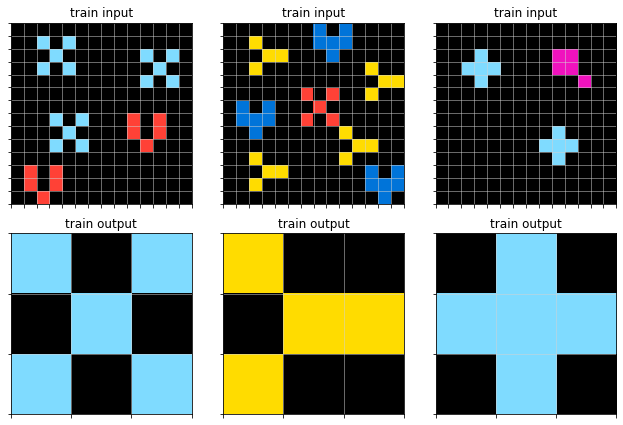

13 objects
[[3]]
[[0 3]
 [3 3]
 [0 3]]
[[0 2 0]
 [2 2 2]
 [2 2 0]]
[[3]]
[[8]]
[[0 2 0]
 [2 2 2]
 [2 2 0]]
[[8]]
[[8]]
[[8]]
[[0 2 0]
 [2 2 2]
 [2 2 0]]
[[3]]
[[0 3]
 [3 3]
 [0 3]]
[[3]]
1 objects
[[0 2 0]
 [2 2 2]
 [2 2 0]]


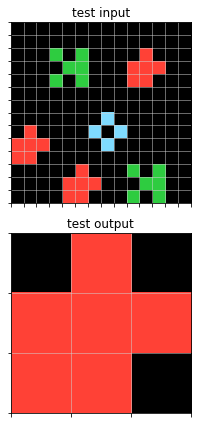

39e1d7f9.json
Icecuber solved? False
['detect_grid', 'pattern_repetition', 'grid_coloring']
7 objects
[[0 0 0 0 8 0 0 0 0 8 0 0 0 0 8 0 0 0 0 8 0 0 0 0]
 [0 0 0 0 8 0 0 0 0 8 0 0 0 0 8 0 0 0 0 8 0 0 0 0]
 [0 0 0 0 8 0 0 0 0 8 0 0 0 0 8 0 0 0 0 8 0 0 0 0]
 [0 0 0 0 8 0 0 0 0 8 0 0 0 0 8 0 0 0 0 8 0 0 0 0]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
 [0 0 0 0 8 0 0 0 0 8 0 0 0 0 8 0 0 0 0 8 0 0 0 0]
 [0 0 0 0 8 0 0 0 0 8 0 0 0 0 8 0 0 0 0 8 0 0 0 0]
 [0 0 0 0 8 0 0 0 0 8 0 0 0 0 8 0 0 0 0 8 0 0 0 0]
 [0 0 0 0 8 0 0 0 0 8 0 0 0 0 8 0 0 0 0 8 0 0 0 0]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
 [0 0 0 0 8 0 0 0 0 8 0 0 0 0 8 0 0 0 0 8 0 0 0 0]
 [0 0 0 0 8 0 0 0 0 8 0 0 0 0 8 0 0 0 0 8 0 0 0 0]
 [0 0 0 0 8 0 0 0 0 8 0 0 0 0 8 0 0 0 0 8 0 0 0 0]
 [0 0 0 0 8 0 0 0 0 8 0 0 0 0 8 0 0 0 0 8 0 0 0 0]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
 [0 0 0 0 8 0 0 0 0 8 0 0 0 0 8 0 0 0 0 8 0 0 0 0]
 [0 0 0 0 8 0 0 0 0 8 0 0 0 0 8 0 0 0 0 8 0 0 0 0]
 [0 0 0 0 8 0 0 0 0 8 0 0 0 0 8

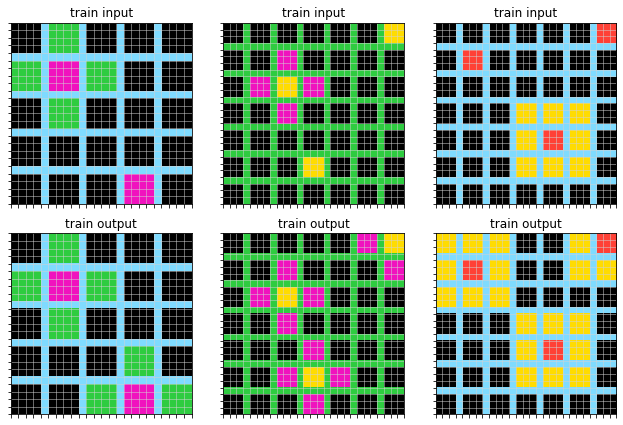

13 objects
[[0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0]
 [0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0]
 [4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
 [0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0]
 [0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0]
 [4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
 [0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0]
 [0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0]
 [4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
 [0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0]
 [0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0]
 [4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
 [0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0]
 [0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0]
 [4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
 [0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0]
 [0 0 4 0 0 4

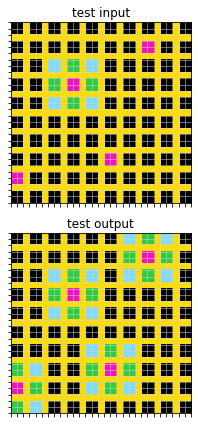

3aa6fb7a.json
Icecuber solved? True
['pattern_completion', 'pattern_rotation']
2 objects
[[8 0]
 [8 8]]
[[8 8]
 [0 8]]
4 objects
[[8 0]
 [8 8]]
[[1]]
[[8 8]
 [0 8]]
[[1]]
3 objects
[[8 8]
 [0 8]]
[[8 0]
 [8 8]]
[[0 8]
 [8 8]]
6 objects
[[8 8]
 [0 8]]
[[1]]
[[8 0]
 [8 8]]
[[1]]
[[1]]
[[0 8]
 [8 8]]


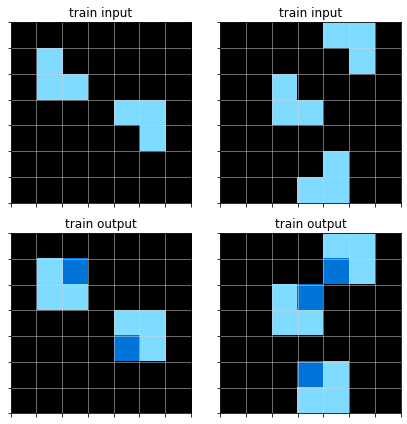

4 objects
[[8 8]
 [0 8]]
[[8 8]
 [8 0]]
[[8 0]
 [8 8]]
[[0 8]
 [8 8]]
8 objects
[[8 8]
 [0 8]]
[[8 8]
 [8 0]]
[[1]]
[[1]]
[[8 0]
 [8 8]]
[[1]]
[[1]]
[[0 8]
 [8 8]]


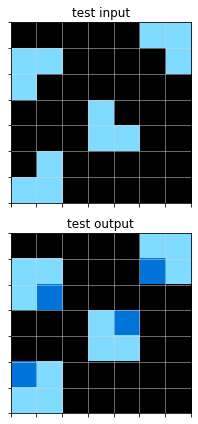

3ac3eb23.json
Icecuber solved? False
['draw_pattern_from_point', 'pattern_repetition']
2 objects
[[2]]
[[8]]
18 objects
[[2]]
[[8]]
[[2]]
[[2]]
[[8]]
[[8]]
[[2]]
[[8]]
[[2]]
[[2]]
[[8]]
[[8]]
[[2]]
[[8]]
[[2]]
[[2]]
[[8]]
[[8]]
1 objects
[[4]]
9 objects
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]


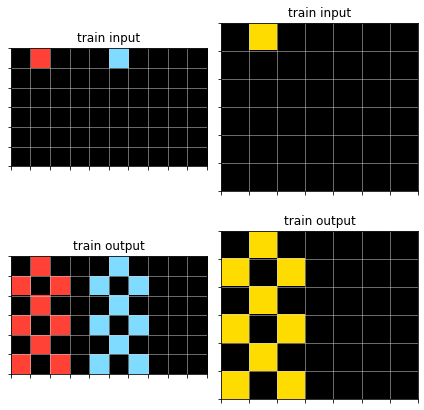

3 objects
[[3]]
[[6]]
[[7]]
27 objects
[[3]]
[[6]]
[[7]]
[[3]]
[[3]]
[[6]]
[[6]]
[[7]]
[[7]]
[[3]]
[[6]]
[[7]]
[[3]]
[[3]]
[[6]]
[[6]]
[[7]]
[[7]]
[[3]]
[[6]]
[[7]]
[[3]]
[[3]]
[[6]]
[[6]]
[[7]]
[[7]]


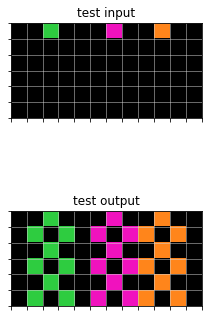

3af2c5a8.json
Icecuber solved? True
['image_repetition', 'image_reflection', 'image_rotation']
4 objects
[[8]]
[[8]]
[[8]]
[[8]]
12 objects
[[8]]
[[8]]
[[8]]
[[8 8]]
[[8]]
[[8]
 [8]]
[[8]
 [8]]
[[8]]
[[8 8]]
[[8]]
[[8]]
[[8]]
2 objects
[[3 3]
 [0 3]]
[[0 3 0]
 [3 3 3]]
4 objects
[[3 3 3 3]
 [0 3 3 0]]
[[0 3 0]
 [3 3 3]
 [3 3 3]
 [0 3 0]]
[[0 3 0]
 [3 3 3]
 [3 3 3]
 [0 3 0]]
[[0 3 3 0]
 [3 3 3 3]]
1 objects
[[3 3 3 3]
 [3 0 0 0]
 [3 0 0 0]]
1 objects
[[3 3 3 3 3 3 3 3]
 [3 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 3]
 [3 3 3 3 3 3 3 3]]


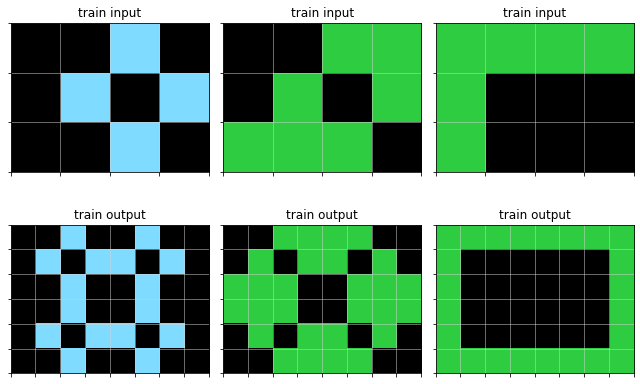

3 objects
[[4]]
[[4]]
[[4 4]]
8 objects
[[4]]
[[4]]
[[4 4]]
[[4 4]
 [4 4]]
[[4 4]
 [4 4]]
[[4 4]]
[[4]]
[[4]]


3bd67248.json
Icecuber solved? True
['draw_line_from_border', 'diagonals', 'pattern_repetition']
1 objects
[[6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]]
16 objects
[[6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[4 4 4 4 4 4 4 4 4 4 4 4 4 4]]
1 objects
[[5]
 [5]
 [5]]
4 objects
[[5]
 [5]
 [5]]
[[2]]
[[2]]
[[4 4]]
1 objects
[[8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]]
8 objects
[[8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[4 4 4 4 4 4]]


1 objects
[[3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]]
11 objects
[[3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[4 4 4 4 4 4 4 4 4]]


3bdb4ada.json
Icecuber solved? False
['recoloring', 'pattern_repetition', 'holes']
2 objects
[[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]]
[[8 8 8 8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8 8 8 8]]
2 objects
[[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
 [4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4]
 [4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]]
[[8 8 8 8 8 8 8 8 8 8 8 8 8]
 [8 0 8 0 8 0 8 0 8 0 8 0 8]
 [8 8 8 8 8 8 8 8 8 8 8 8 8]]
2 objects
[[1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1]]
[[7 7 7 7 7 7 7 7 7 7 7]
 [7 7 7 7 7 7 7 7 7 7 7]
 [7 7 7 7 7 7 7 7 7 7 7]]
2 objects
[[1 1 1 1 1 1 1 1 1]
 [1 0 1 0 1 0 1 0 1]
 [1 1 1 1 1 1 1 1 1]]
[[7 7 7 7 7 7 7 7 7 7 7]
 [7 0 7 0 7 0 7 0 7 0 7]
 [7 7 7 7 7 7 7 7 7 7 7]]


3 objects
[[5 5 5 5 5 5 5]
 [5 5 5 5 5 5 5]
 [5 5 5 5 5 5 5]]
[[4 4 4 4 4 4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4 4 4 4 4 4]]
[[8 8 8 8 8]
 [8 8 8 8 8]
 [8 8 8 8 8]]
3 objects
[[5 5 5 5 5 5 5]
 [5 0 5 0 5 0 5]
 [5 5 5 5 5 5 5]]
[[4 4 4 4 4 4 4 4 4 4 4 4 4]
 [4 0 4 0 4 0 4 0 4 0 4 0 4]
 [4 4 4 4 4 4 4 4 4 4 4 4 4]]
[[8 8 8 8 8]
 [8 0 8 0 8]
 [8 8 8 8 8]]


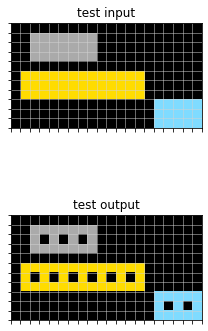

3befdf3e.json
Icecuber solved? False
['take_negative', 'pattern_expansion']
2 objects
[[4 4 4]
 [4 0 4]
 [4 4 4]]
[[6]]
6 objects
[[4 4 4]]
[[4]
 [4]
 [4]]
[[6 6 6]
 [6 0 6]
 [6 6 6]]
[[4]
 [4]
 [4]]
[[4]]
[[4 4 4]]
2 objects
[[2 2 2 2]
 [2 0 0 2]
 [2 0 0 2]
 [2 2 2 2]]
[[7 7]
 [7 7]]
6 objects
[[2 2 2 2]
 [2 2 2 2]]
[[2 2]
 [2 2]
 [2 2]
 [2 2]]
[[7 7 7 7]
 [7 0 0 7]
 [7 0 0 7]
 [7 7 7 7]]
[[2 2]
 [2 2]
 [2 2]
 [2 2]]
[[2 2]
 [2 2]]
[[2 2 2 2]
 [2 2 2 2]]
2 objects
[[3 3 3 3]
 [3 0 0 3]
 [3 0 0 3]
 [3 3 3 3]]
[[1 1]
 [1 1]]
6 objects
[[3 3 3 3]
 [3 3 3 3]]
[[3 3]
 [3 3]
 [3 3]
 [3 3]]
[[1 1 1 1]
 [1 0 0 1]
 [1 0 0 1]
 [1 1 1 1]]
[[3 3]
 [3 3]
 [3 3]
 [3 3]]
[[3 3]
 [3 3]]
[[3 3 3 3]
 [3 3 3 3]]


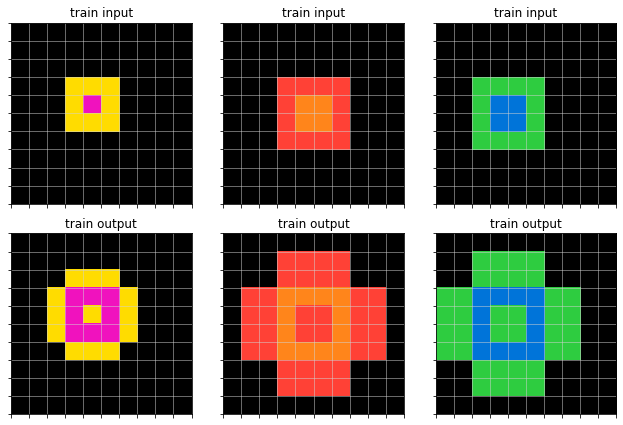

4 objects
[[8 8 8]
 [8 0 8]
 [8 8 8]]
[[3]]
[[8 8 8 8]
 [8 0 0 8]
 [8 0 0 8]
 [8 8 8 8]]
[[3 3]
 [3 3]]
12 objects
[[8 8 8]]
[[8]
 [8]
 [8]]
[[3 3 3]
 [3 0 3]
 [3 3 3]]
[[8]
 [8]
 [8]]
[[8]]
[[8 8 8]]
[[8 8 8 8]
 [8 8 8 8]]
[[8 8]
 [8 8]
 [8 8]
 [8 8]]
[[3 3 3 3]
 [3 0 0 3]
 [3 0 0 3]
 [3 3 3 3]]
[[8 8]
 [8 8]
 [8 8]
 [8 8]]
[[8 8]
 [8 8]]
[[8 8 8 8]
 [8 8 8 8]]


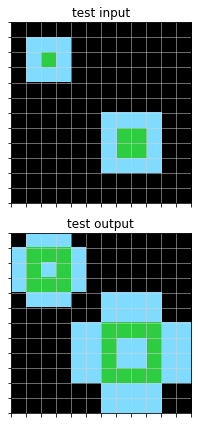

3c9b0459.json
Icecuber solved? True
['image_rotation']
6 objects
[[2 2]
 [2 0]
 [2 0]]
[[1]]
[[1]]
[[2]]
[[8]]
[[1]]
6 objects
[[1]]
[[8]]
[[0 2]
 [0 2]
 [2 2]]
[[2]]
[[1]]
[[1]]
6 objects
[[9]]
[[2]]
[[0 4]
 [4 4]]
[[2]
 [2]]
[[9]]
[[2]]
6 objects
[[2]]
[[9]]
[[2]
 [2]]
[[4 4]
 [4 0]]
[[2]]
[[9]]
3 objects
[[8 8 8]
 [0 0 8]]
[[5 5 0]
 [0 5 5]]
[[8]]
3 objects
[[5 5 0]
 [0 5 5]]
[[8]]
[[8 0 0]
 [8 8 8]]
5 objects
[[3]]
[[2]]
[[0 0 9]
 [9 9 9]]
[[2]]
[[3 3]]
5 objects
[[3 3]]
[[2]]
[[9 9 9]
 [9 0 0]]
[[2]]
[[3]]


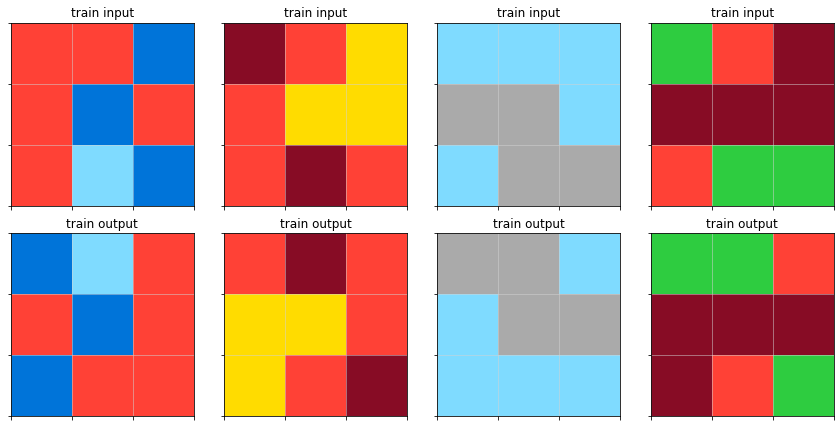

4 objects
[[6 0]
 [6 6]
 [0 6]]
[[4 4]
 [0 4]]
[[4]]
[[7]]
4 objects
[[7]]
[[6 0]
 [6 6]
 [0 6]]
[[4]]
[[4 0]
 [4 4]]


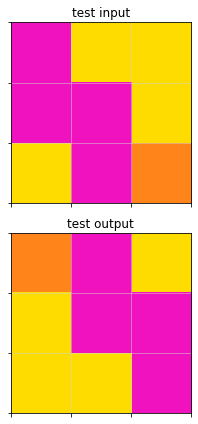

3de23699.json
Icecuber solved? False
['take_negative', 'crop', 'rectangle_guessing']
5 objects
[[4]]
[[4]]
[[0 2 0]
 [2 2 2]
 [0 2 2]]
[[4]]
[[4]]
1 objects
[[0 4 0]
 [4 4 4]
 [0 4 4]]
8 objects
[[3]]
[[3]]
[[2 2]
 [2 2]]
[[2]]
[[2]]
[[2]]
[[3]]
[[3]]
4 objects
[[3 3]
 [3 3]]
[[3]]
[[3]]
[[3]]
5 objects
[[6]]
[[6]]
[[0 8 0]
 [0 8 0]
 [8 8 8]
 [0 8 8]]
[[6]]
[[6]]
1 objects
[[0 6 0]
 [0 6 0]
 [6 6 6]
 [0 6 6]]
7 objects
[[8]]
[[8]]
[[0 4 4]
 [4 4 0]]
[[4]
 [4]]
[[4]]
[[8]]
[[8]]
3 objects
[[0 8 8]
 [8 8 0]]
[[8]
 [8]]
[[8]]


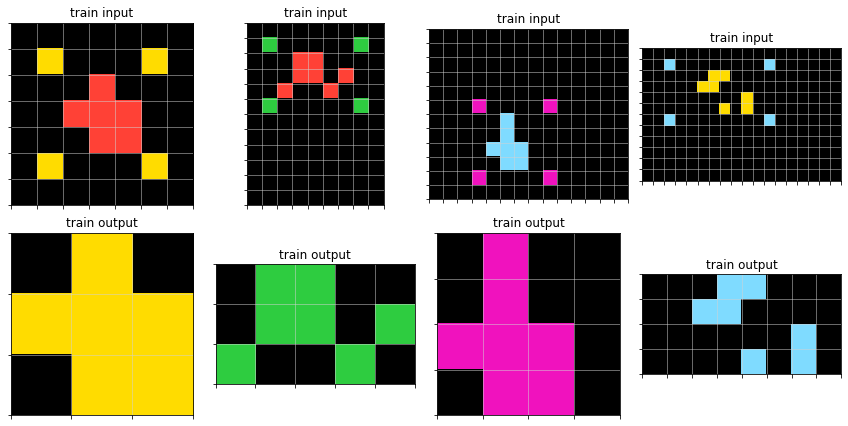

9 objects
[[2]]
[[2]]
[[3]
 [3]]
[[3 3]]
[[3 0 0]
 [3 3 3]
 [0 0 3]]
[[3]
 [3]]
[[3 3]]
[[2]]
[[2]]
5 objects
[[2]
 [2]]
[[2 2]]
[[2 0 0]
 [2 2 2]
 [0 0 2]]
[[2]
 [2]]
[[2 2]]


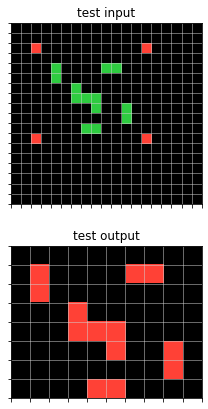

3e980e27.json
Icecuber solved? False
['pattern_repetition', 'pattern_juxtaposition', 'direction_guessing', 'pattern_reflection']
4 objects
[[2]]
[[0 1]
 [1 1]]
[[1]]
[[2]]
6 objects
[[2]]
[[0 1]
 [1 1]]
[[1]]
[[1 0]
 [1 1]]
[[2]]
[[1]]
6 objects
[[4]]
[[4 0]
 [4 4]]
[[3]]
[[4]]
[[3]]
[[3]]
12 objects
[[4]]
[[4 0]
 [4 4]]
[[3]]
[[4]]
[[4]]
[[4 0]
 [4 4]]
[[3]]
[[4]]
[[4]]
[[4 0]
 [4 4]]
[[3]]
[[4]]
8 objects
[[2]]
[[3]]
[[8 8]]
[[8]]
[[4]]
[[2]]
[[3]]
[[4 4]]
12 objects
[[2]]
[[4]]
[[3]]
[[8 8]]
[[4 4]]
[[8]]
[[4]]
[[2]]
[[3]]
[[8 8]]
[[4 4]]
[[8]]
8 objects
[[4 4 4]
 [0 0 4]
 [0 0 4]]
[[2]]
[[2]]
[[1 1]
 [0 1]]
[[1]]
[[3]]
[[3]]
[[2]]
12 objects
[[4 4 4]
 [4 0 0]
 [4 0 0]]
[[4 4 4]
 [0 0 4]
 [0 0 4]]
[[2]]
[[2]]
[[1 1]
 [0 1]]
[[1 1]
 [0 1]]
[[1]]
[[3]]
[[1]]
[[3]]
[[4 4 4]
 [4 0 0]
 [4 0 0]]
[[2]]


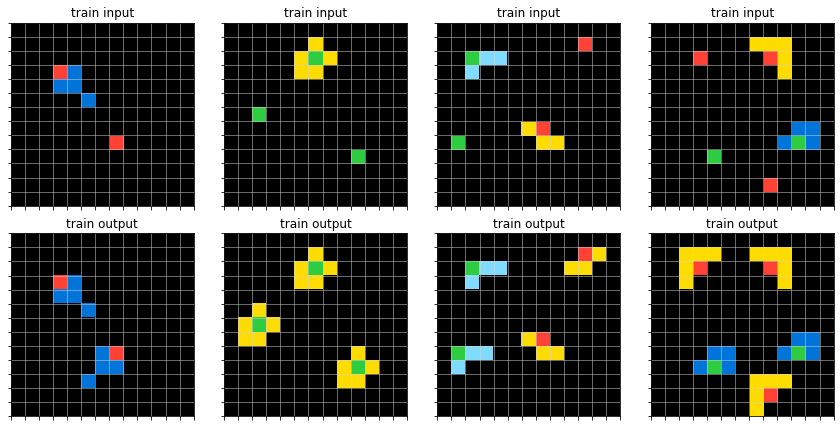

10 objects
[[1]]
[[3]]
[[2]]
[[1 0]
 [1 1]]
[[2]]
[[8 8 8]
 [0 0 8]]
[[3]]
[[8]]
[[2]]
[[3]]
18 objects
[[8 8 8]
 [0 0 8]]
[[1]]
[[1]]
[[3]]
[[2]]
[[0 1]
 [1 1]]
[[1 0]
 [1 1]]
[[2]]
[[8]]
[[8 8 8]
 [0 0 8]]
[[3]]
[[8]]
[[1]]
[[2]]
[[0 1]
 [1 1]]
[[8 8 8]
 [0 0 8]]
[[3]]
[[8]]


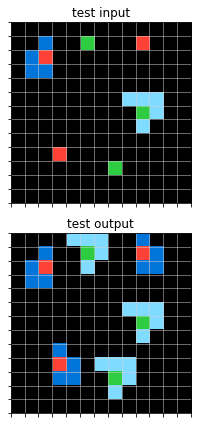

3eda0437.json
Icecuber solved? False
['rectangle_guessing', 'recoloring', 'measure_area', 'take_maximum']
10 objects
[[5]]
[[0 1 1 1 1 1]
 [0 1 0 1 0 0]
 [1 1 0 0 0 0]]
[[5]]
[[1 1]]
[[0 1 0]
 [1 1 1]
 [1 0 0]]
[[0 1]
 [0 1]
 [1 1]]
[[0 0 0 1 0]
 [1 1 1 1 1]
 [0 1 0 0 0]]
[[1 1 1 1 0]
 [1 0 1 1 1]]
[[1 1 1]
 [0 1 1]]
[[1]]
11 objects
[[5]]
[[0 1 1 1 1 1]
 [0 1 0 1 0 0]
 [1 1 0 0 0 0]]
[[5]]
[[1 1]]
[[0 1 0]
 [1 1 1]
 [1 0 0]]
[[0 1]
 [0 1]
 [1 1]]
[[0 0 0 1 0]
 [1 1 1 1 1]
 [0 1 0 0 0]]
[[1 1 1 1 0]
 [1 0 1 1 1]]
[[1 1 1]
 [0 1 1]]
[[6 6 6 6]
 [6 6 6 6]]
[[1]]
8 objects
[[1 1 1 0 0 1 1]
 [1 1 1 0 1 1 0]
 [0 0 1 1 1 0 0]
 [0 0 0 1 0 0 0]]
[[1 1 1 1]
 [1 0 1 0]]
[[0 1 0 1]
 [0 1 1 1]
 [1 1 1 0]
 [1 1 1 1]]
[[0 0 1 1]
 [0 1 1 0]
 [1 1 1 0]]
[[1 0]
 [1 1]]
[[1]]
[[1]]
[[1]]
9 objects
[[1 1 1 0 0 1 1]
 [1 1 1 0 1 1 0]
 [0 0 1 1 1 0 0]
 [0 0 0 1 0 0 0]]
[[1 1 1 1]
 [1 0 1 0]]
[[6 6 6]
 [6 6 6]]
[[0 1 0 1]
 [0 1 1 1]
 [1 1 1 0]
 [1 1 1 1]]
[[0 0 1 1]
 [0 1 1 0]
 [1 1 1 0]]
[[1 0]
 [1 1]]
[[1]

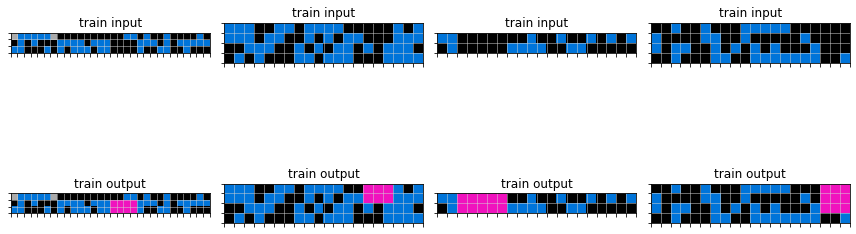

9 objects
[[1 0 1 0]
 [1 1 1 1]
 [0 1 1 1]]
[[1]]
[[1]]
[[0 1 1 0 1 0]
 [1 1 1 1 1 0]
 [0 0 1 1 1 1]
 [0 0 0 0 0 1]]
[[1]]
[[0 0 0 1 1]
 [1 1 0 1 0]
 [1 1 1 1 1]]
[[1 1 0]
 [0 1 1]
 [1 1 0]]
[[1 1]]
[[1 1]]
10 objects
[[6 6 6]
 [6 6 6]
 [6 6 6]]
[[1 0 1 0]
 [1 1 1 1]
 [0 1 1 1]]
[[1]]
[[1]]
[[0 1 1 0 1 0]
 [1 1 1 1 1 0]
 [0 0 1 1 1 1]
 [0 0 0 0 0 1]]
[[1]]
[[0 0 0 1 1]
 [1 1 0 1 0]
 [1 1 1 1 1]]
[[1 1 0]
 [0 1 1]
 [1 1 0]]
[[1 1]]
[[1 1]]


3f7978a0.json
Icecuber solved? False
['crop', 'rectangle_guessing', 'find_the_intruder']
12 objects
[[8]]
[[8]]
[[8]]
[[5]
 [5]
 [5]]
[[5]
 [5]
 [5]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
7 objects
[[8]]
[[8]]
[[5]
 [5]
 [5]]
[[5]
 [5]
 [5]]
[[8]]
[[8]]
[[8]]
14 objects
[[8]]
[[8]]
[[8]]
[[0 8]
 [8 8]]
[[8]]
[[8]]
[[8]]
[[5]
 [5]
 [5]]
[[5]
 [5]
 [5]]
[[8 8]]
[[8]]
[[8]]
[[8 0]
 [8 8]]
[[8]]
8 objects
[[8]]
[[8]]
[[5]
 [5]
 [5]]
[[5]
 [5]
 [5]]
[[8 8]]
[[8]]
[[8]]
[[8]]
17 objects
[[8 8]]
[[8]]
[[8]]
[[5]
 [5]
 [5]
 [5]]
[[5]
 [5]
 [5]
 [5]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]
 [8]]
[[8 8]]
[[8]]
[[8]]
8 objects
[[8]]
[[8]]
[[5]
 [5]
 [5]
 [5]]
[[5]
 [5]
 [5]
 [5]]
[[8]]
[[8]]
[[8]]
[[8]]


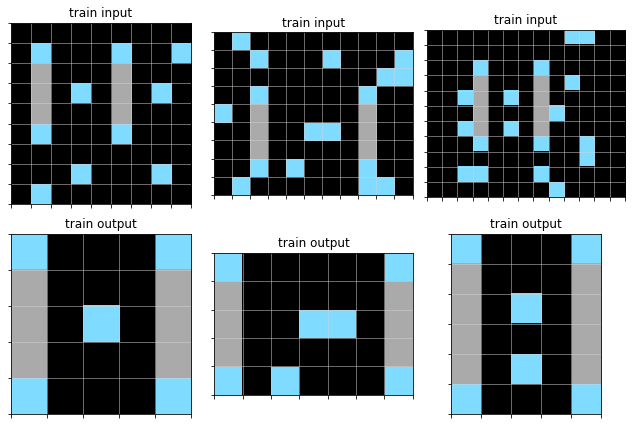

21 objects
[[8]]
[[8]]
[[8]]
[[8]]
[[5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]]
[[8]]
[[5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
9 objects
[[8]]
[[8]]
[[5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]]
[[8]]
[[5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]]
[[8]]
[[8]]
[[8]]
[[8]]


40853293.json
Icecuber solved? True
['connect_the_dots']
10 objects
[[2]]
[[3]]
[[3]]
[[8]]
[[2]]
[[8]]
[[6]]
[[5]]
[[5]]
[[6]]
7 objects
[[2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]]
[[3 3 3]]
[[3 3 3 3 3]]
[[8]
 [8]
 [8]
 [8]
 [8]
 [8]]
[[6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]]
[[5 5]]
[[5 5 5]]
10 objects
[[4]]
[[3]]
[[3]]
[[7]]
[[7]]
[[4]]
[[9]]
[[8]]
[[8]]
[[9]]
8 objects
[[4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]]
[[3]]
[[3 3 3 3]]
[[7]]
[[7 7]]
[[9]
 [9]
 [9]
 [9]
 [9]
 [9]
 [9]]
[[8 8 8 8]]
[[8]]


10 objects
[[3]]
[[5]]
[[2]]
[[2]]
[[7]]
[[7]]
[[5]]
[[8]]
[[8]]
[[3]]
8 objects
[[3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]]
[[5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]]
[[2 2]]
[[2 2 2 2 2]]
[[2 2 2 2 2 2 2]]
[[7 7]]
[[7 7 7 7]]
[[8 8 8 8 8 8 8]]


4093f84a.json
Icecuber solved? False
['gravity', 'recoloring', 'projection_unto_rectangle']
8 objects
[[2]]
[[2]]
[[2]]
[[5 5 5 5 5 5 5 5 5 5 5 5 5 5]
 [5 5 5 5 5 5 5 5 5 5 5 5 5 5]
 [5 5 5 5 5 5 5 5 5 5 5 5 5 5]
 [5 5 5 5 5 5 5 5 5 5 5 5 5 5]]
[[2]]
[[2]]
[[2]]
[[2]]
1 objects
[[0 0 5 0 0 0 0 0 5 0 5 0 0 0]
 [5 5 5 5 5 5 5 5 5 5 5 5 5 5]
 [5 5 5 5 5 5 5 5 5 5 5 5 5 5]
 [5 5 5 5 5 5 5 5 5 5 5 5 5 5]
 [5 5 5 5 5 5 5 5 5 5 5 5 5 5]
 [0 5 0 0 5 0 0 0 0 5 0 5 0 0]]
12 objects
[[5 5 5 5 5]
 [5 5 5 5 5]
 [5 5 5 5 5]
 [5 5 5 5 5]
 [5 5 5 5 5]
 [5 5 5 5 5]
 [5 5 5 5 5]
 [5 5 5 5 5]
 [5 5 5 5 5]
 [5 5 5 5 5]
 [5 5 5 5 5]
 [5 5 5 5 5]
 [5 5 5 5 5]
 [5 5 5 5 5]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
1 objects
[[0 5 5 5 5 5 5 0]
 [0 5 5 5 5 5 5 0]
 [5 5 5 5 5 5 5 0]
 [0 5 5 5 5 5 0 0]
 [5 5 5 5 5 5 0 0]
 [0 5 5 5 5 5 0 0]
 [0 5 5 5 5 5 5 5]
 [5 5 5 5 5 5 0 0]
 [0 5 5 5 5 5 0 0]
 [5 5 5 5 5 5 5 0]
 [0 5 5 5 5 5 0 0]
 [0 5 5 5 5 5 0 0]
 [0 5 5 5 5 5 5 0]
 [0 5 5 5 5 5 0 0

11 objects
[[5 5]
 [5 5]
 [5 5]
 [5 5]
 [5 5]
 [5 5]
 [5 5]
 [5 5]
 [5 5]
 [5 5]
 [5 5]
 [5 5]
 [5 5]
 [5 5]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
1 objects
[[0 0 5 5 0 0]
 [0 5 5 5 5 0]
 [0 0 5 5 0 0]
 [0 5 5 5 0 0]
 [0 5 5 5 0 0]
 [0 0 5 5 0 0]
 [0 0 5 5 5 5]
 [0 0 5 5 0 0]
 [0 0 5 5 0 0]
 [0 0 5 5 0 0]
 [0 0 5 5 0 0]
 [5 5 5 5 5 0]
 [0 0 5 5 0 0]
 [0 0 5 5 5 0]]


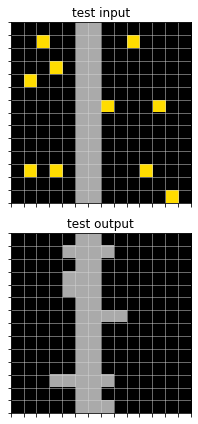

41e4d17e.json
Icecuber solved? False
['draw_line_from_point', 'pattern_repetition']
3 objects
[[8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
 [8 8 8 0 0 0 0 0 8 8 8 8 8 8 8]
 [8 8 8 0 0 0 0 0 8 8 8 8 8 8 8]
 [8 8 8 0 0 0 0 0 8 8 8 8 8 8 8]
 [8 8 8 0 0 0 0 0 8 8 8 8 8 8 8]
 [8 8 8 0 0 0 0 0 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]]
[[1 1 1 1 1]
 [1 0 0 0 1]
 [1 0 0 0 1]
 [1 0 0 0 1]
 [1 1 1 1 1]]
[[8 8 8]
 [8 8 8]
 [8 8 8]]
14 objects
[[8 8 8 8 8]
 [8 8 8 0 0]
 [8 8 8 0 0]]
[[6]]
[[8 8 8 8 8 8 8 8 8]
 [0 0 8 8 8 8 8 8 8]
 [0 0 8 8 8 8 8 8 8]]
[[1 1 1 1 1]
 [1 0 0 0 1]
 [1 0 0 0 1]
 [1 0 0 0 1]
 [1 1 1 1 1]]
[[8]]
[[0 6 0]
 [6 6 6]
 [0 6 0]]
[[8]]
[[6 6 6]]
[[6 6 6 6 6 6 6]]
[[8 8 8 0 0]
 [8 8 8 0 0]
 [8 8 8 8 8]
 [8 8 8 8 8]
 [8 8 8 8

5 objects
[[8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 0 0 0 0 0 8 8 8 8]
 [8 8 8 8 8 8 0 0 0 0 0 8 8 8 8]
 [8 8 8 8 8 8 0 0 0 0 0 8 8 8 8]
 [8 8 8 8 8 8 0 0 0 0 0 8 8 8 8]
 [8 8 8 8 8 8 0 0 0 0 0 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
 [8 8 8 0 0 0 0 0 8 8 8 8 8 8 8]
 [8 8 8 0 0 0 0 0 8 8 8 8 8 8 8]
 [8 8 8 0 0 0 0 0 8 8 8 8 8 8 8]
 [8 8 8 0 0 0 0 0 8 8 8 8 8 8 8]
 [8 8 8 0 0 0 0 0 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]]
[[1 1 1 1 1]
 [1 0 0 0 1]
 [1 0 0 0 1]
 [1 0 0 0 1]
 [1 1 1 1 1]]
[[8 8 8]
 [8 8 8]
 [8 8 8]]
[[1 1 1 1 1]
 [1 0 0 0 1]
 [1 0 0 0 1]
 [1 0 0 0 1]
 [1 1 1 1 1]]
[[8 8 8]
 [8 8 8]
 [8 8 8]]
27 objects
[[8 8 8 8 8]
 [8 8 8 8 8]
 [8 8 8 8 8]]
[[0 0 0 0 0 6]
 [0 0 0 0 0 6]
 [0 0 0 0 0 6]
 [6 6 6 6 6 6]
 [0 0 0 0 0 6]
 [0 0 0 0 0 6]
 [0 0 0 0 0 6]
 [0 0 0 0 0 6]
 [0 0 0 0 0 6]]
[[8 8]]
[[6]]
[[8 8 8 8 8 8]
 [0 0 8 8 8 8]
 [0 0 8 8 8 8]]
[[1 1 1 1 1]
 [1 0 0 0 1]
 [1 0 0 0 1]
 [1 0 0 0 1]
 [1 1 1

4258a5f9.json
Icecuber solved? True
['pattern_repetition', 'contouring']
3 objects
[[5]]
[[5]]
[[5]]
5 objects
[[1 1 1]
 [1 0 1]
 [1 1 1]]
[[5]]
[[0 0 1 1 1]
 [0 0 1 0 1]
 [0 0 1 1 1]
 [1 1 1 0 0]
 [1 0 1 0 0]
 [1 1 1 0 0]]
[[5]]
[[5]]
4 objects
[[5]]
[[5]]
[[5]]
[[5]]
8 objects
[[1 1 1]
 [1 0 1]
 [1 1 1]]
[[1 1 1]
 [1 0 1]
 [1 1 1]]
[[5]]
[[5]]
[[1 1 1]
 [1 0 1]
 [1 1 1]]
[[5]]
[[1 1 1]
 [1 0 1]
 [1 1 1]]
[[5]]


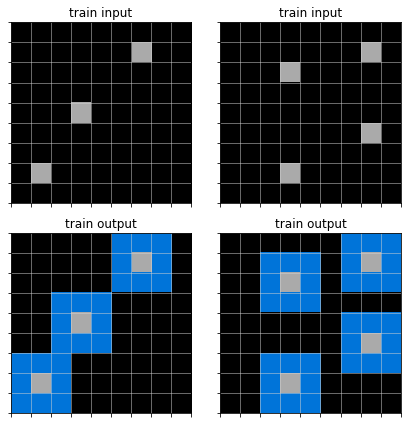

5 objects
[[5]]
[[5]]
[[5]]
[[5]]
[[5]]
7 objects
[[1 1 1 0 0 0 0]
 [1 0 1 0 0 0 0]
 [1 1 1 0 0 0 0]
 [0 0 1 1 1 0 0]
 [0 0 1 0 1 0 0]
 [0 0 1 1 1 0 0]
 [1 1 1 0 1 1 1]
 [1 0 1 0 1 0 1]
 [1 1 1 0 1 1 1]]
[[5]]
[[1 1 1]
 [1 0 1]
 [1 1 1]]
[[5]]
[[5]]
[[5]]
[[5]]


4290ef0e.json
Icecuber solved? False
['pattern_moving', 'concentric', 'crop']
11 objects
[[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4 4 4 4 4 0 0 0 4 4]
 [4 4 4 0 0 4 0 0 4 4 4 4 0 0 0 4 4]
 [4 4 4 0 4 4 4 0 4 4 4 4 0 0 0 4 4]
 [4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
 [4 4 4 0 4 4 4 0 4 4 4 4 4 4 4 4 4]
 [4 4 4 0 0 4 0 0 4 4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4 4 4 0 0 4 4 4 0 0]
 [4 4 4 4 4 4 4 4 4 4 0 4 4 4 4 4 0]
 [4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4 4 4 0 4 4 4 4 4 0]]
[[3 3 3]
 [3 0 3]
 [3 3 3]]
[[1 1]
 [1 0]]
[[1 1]
 [0 1]]
[[4]]
[[1 0]
 [1 1]]
[[0 1]
 [1 1]]
[[6 6]
 [6 0]]
[[6 6]
 [0 6]]
[[6]]
[[6]]
14 objects
[[6 6]
 [6 0]]
[[4 4 4]
 [0 4 0]]
[[6 6]
 [0 6]]
[[1 1]
 [1 0]]
[[1 1]
 [0 1]]
[[4 0]
 [4 4]
 [4 0]]
[[3 3 3]
 [3 0 3]
 [3 3 3]]
[[0 4]
 [4 4]
 [0 4]]
[[4]]
[[1 0]
 [1 1]]
[[0 1]
 [1 1]]
[[6 0]
 [6 6]]
[[0 4 0]
 [4 4 4]]
[[0 6]
 [6 6]]
11 objects
[[8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8

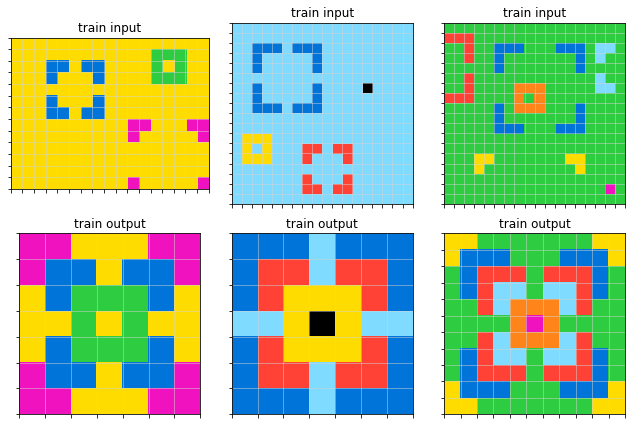

13 objects
[[1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1]
 [1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1]
 [1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1]
 [1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1]
 [1 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 1 1 1]
 [1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1]
 [1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1]]
[[4]]
[[4 0 0 0 0]
 [4 0 0 0 0]
 [4 0 0 0 0]
 [4 0 0 0 0]
 [4 4 4 4 4]]
[[8 8 8]
 [8 0 8]
 [8 8 8]]
[[1]]
[[3 3]
 [3 0]]
[[3 3]
 [0 3]]
[[3 0]
 [3 3]]
[[0 3]
 [3 3]]
[[6 6]
 [6 0]]
[[2 2 2]
 [2 0 0]
 [2 0 0]]


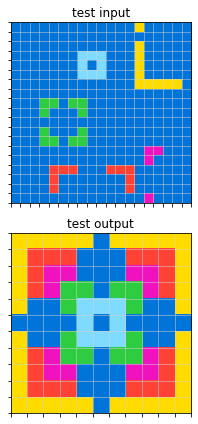

42a50994.json
Icecuber solved? True
['remove_noise', 'count_tiles']
18 objects
[[8]]
[[8]]
[[8]
 [8]]
[[8]]
[[8]]
[[8 8]
 [0 8]]
[[8]]
[[8]]
[[8]]
[[8 0]
 [8 8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
7 objects
[[8]]
[[8]]
[[8]
 [8]]
[[8 8]
 [0 8]]
[[8]]
[[8 0]
 [8 8]]
[[8]]
24 objects
[[6]]
[[6]]
[[6]]
[[6]]
[[6]]
[[6]
 [6]
 [6]]
[[6]]
[[6]]
[[6]]
[[6]]
[[6]]
[[6]]
[[6]]
[[6]]
[[6]]
[[6]]
[[6]]
[[6 6]]
[[6]]
[[6]
 [6]]
[[6]]
[[6]]
[[6]]
[[6 6]]
11 objects
[[6]]
[[6]]
[[6]]
[[6]
 [6]
 [6]]
[[6]]
[[6]]
[[6]]
[[6]]
[[6 6]]
[[6]
 [6]]
[[6 6]]
28 objects
[[5]]
[[5]]
[[5]]
[[5]]
[[5]]
[[5]]
[[0 5]
 [0 5]
 [5 5]]
[[5]]
[[5 5]]
[[5]]
[[5]]
[[5]]
[[5]]
[[5]
 [5]]
[[5]]
[[5]]
[[5 5]]
[[5]
 [5]]
[[5 5]]
[[5]
 [5]]
[[5]
 [5]]
[[5]]
[[5 0]
 [5 5]]
[[5]]
[[5]]
[[5]]
[[5]]
[[5]]
18 objects
[[5]]
[[5]]
[[0 5]
 [0 5]
 [5 5]]
[[5]]
[[5 5]]
[[5]]
[[5]]
[[5]
 [5]]
[[5 5]]
[[5]
 [5]]
[[5 5]]
[[5]
 [5]]
[[5]
 [5]]
[[5 0]
 [5 5]]
[[5]]
[[5]]
[[5]]
[[5]]
24 objects
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4 

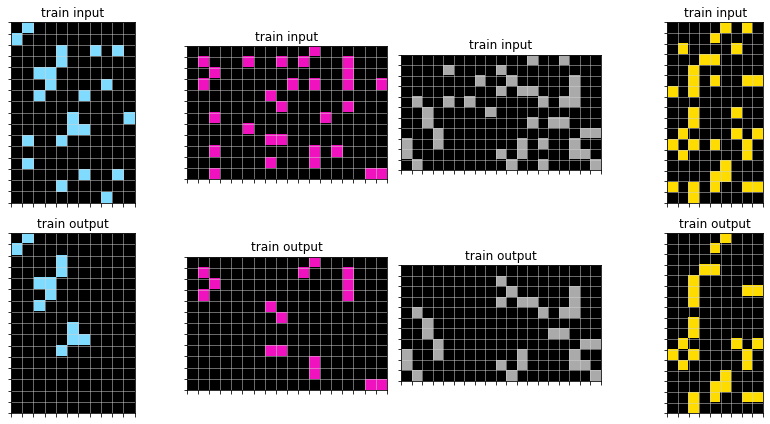

34 objects
[[3]]
[[3]]
[[0 0 0 3]
 [3 3 3 3]]
[[3]
 [3]]
[[3]
 [3]]
[[3]]
[[3]
 [3]]
[[3]]
[[3 3 3]
 [0 3 0]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3 3]]
[[3]]
[[3 3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3 0 3]
 [3 3 3]
 [3 0 0]]
[[3 3]]
[[3]
 [3]
 [3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3 3]]
[[3]]
[[3 3]]
22 objects
[[3]]
[[0 0 0 3]
 [3 3 3 3]]
[[3]
 [3]]
[[3]
 [3]]
[[3]]
[[3]
 [3]]
[[3 3 3]
 [0 3 0]]
[[3 3]]
[[3 3]]
[[3]]
[[3]]
[[3 0 3]
 [3 3 3]
 [3 0 0]]
[[3 3]]
[[3]
 [3]
 [3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3 3]]
[[3]]
[[3 3]]


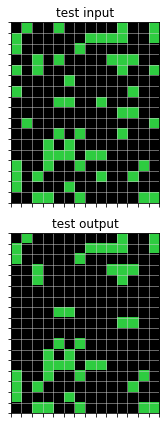

4347f46a.json
Icecuber solved? True
['loop_filling', 'color_guessing']
4 objects
[[8 8 8 8]
 [8 8 8 8]
 [8 8 8 8]]
[[3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3]]
[[6 6 6 6 6 6 6]
 [6 6 6 6 6 6 6]
 [6 6 6 6 6 6 6]
 [6 6 6 6 6 6 6]]
[[7 7 7]
 [7 7 7]
 [7 7 7]
 [7 7 7]
 [7 7 7]]
4 objects
[[8 8 8 8]
 [8 0 0 8]
 [8 8 8 8]]
[[3 3 3 3 3 3 3]
 [3 0 0 0 0 0 3]
 [3 0 0 0 0 0 3]
 [3 0 0 0 0 0 3]
 [3 3 3 3 3 3 3]]
[[6 6 6 6 6 6 6]
 [6 0 0 0 0 0 6]
 [6 0 0 0 0 0 6]
 [6 6 6 6 6 6 6]]
[[7 7 7]
 [7 0 7]
 [7 0 7]
 [7 0 7]
 [7 7 7]]
1 objects
[[2 2 2 2 2]
 [2 2 2 2 2]
 [2 2 2 2 2]
 [2 2 2 2 2]]
1 objects
[[2 2 2 2 2]
 [2 0 0 0 2]
 [2 0 0 0 2]
 [2 2 2 2 2]]
2 objects
[[5 5 5 5 5 5 5 5]
 [5 5 5 5 5 5 5 5]
 [5 5 5 5 5 5 5 5]
 [5 5 5 5 5 5 5 5]]
[[4 4 4 4 4 4]
 [4 4 4 4 4 4]
 [4 4 4 4 4 4]
 [4 4 4 4 4 4]]
2 objects
[[5 5 5 5 5 5 5 5]
 [5 0 0 0 0 0 0 5]
 [5 0 0 0 0 0 0 5]
 [5 5 5 5 5 5 5 5]]
[[4 4 4 4 4 4]
 [4 0 0 0 0 4]
 [4 0 0 0 0 4]
 [4 4 4 4 4 4]]


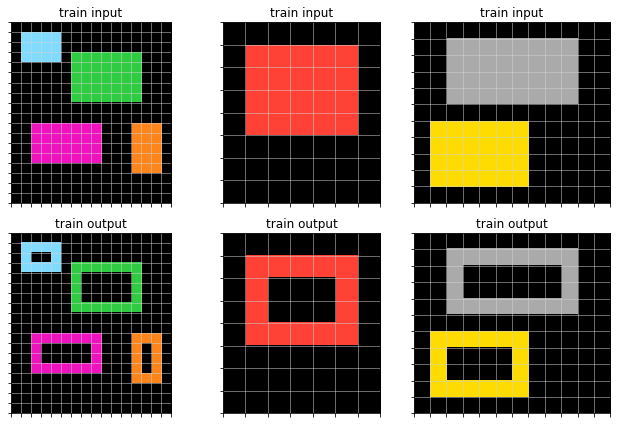

5 objects
[[8 8 8 8 8 8]
 [8 8 8 8 8 8]
 [8 8 8 8 8 8]]
[[6 6 6 6]
 [6 6 6 6]
 [6 6 6 6]]
[[4 4 4 4 4 4]
 [4 4 4 4 4 4]
 [4 4 4 4 4 4]
 [4 4 4 4 4 4]
 [4 4 4 4 4 4]
 [4 4 4 4 4 4]
 [4 4 4 4 4 4]]
[[1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]]
[[3 3 3 3 3]
 [3 3 3 3 3]
 [3 3 3 3 3]]
5 objects
[[8 8 8 8 8 8]
 [8 0 0 0 0 8]
 [8 8 8 8 8 8]]
[[6 6 6 6]
 [6 0 0 6]
 [6 6 6 6]]
[[4 4 4 4 4 4]
 [4 0 0 0 0 4]
 [4 0 0 0 0 4]
 [4 0 0 0 0 4]
 [4 0 0 0 0 4]
 [4 0 0 0 0 4]
 [4 4 4 4 4 4]]
[[1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1]]
[[3 3 3 3 3]
 [3 0 0 0 3]
 [3 3 3 3 3]]


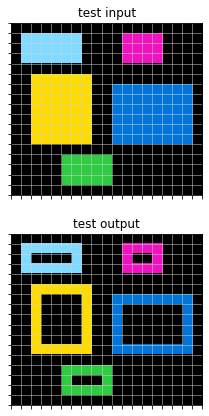

444801d8.json
Icecuber solved? True
['pattern_repetition', 'pattern_expansion', 'rectangle_guessing']
2 objects
[[1 1 0 1 1]
 [1 0 0 0 1]
 [1 0 0 0 1]
 [1 0 0 0 1]
 [1 1 1 1 1]]
[[2]]
2 objects
[[2 2 2 2 2]
 [0 0 2 0 0]
 [0 2 2 2 0]
 [0 2 2 2 0]
 [0 2 2 2 0]]
[[1 1 0 1 1]
 [1 0 0 0 1]
 [1 0 0 0 1]
 [1 0 0 0 1]
 [1 1 1 1 1]]
4 objects
[[1 1 0 1 1]
 [1 0 0 0 1]
 [1 0 0 0 1]
 [1 1 1 1 1]]
[[2]]
[[1 1 0 1 1]
 [1 0 0 0 1]
 [1 1 1 1 1]]
[[3]]
4 objects
[[2 2 2 2 2]
 [0 0 2 0 0]
 [0 2 2 2 0]
 [0 2 2 2 0]]
[[1 1 0 1 1]
 [1 0 0 0 1]
 [1 0 0 0 1]
 [1 1 1 1 1]]
[[3 3 3 3 3]
 [0 0 3 0 0]
 [0 3 3 3 0]]
[[1 1 0 1 1]
 [1 0 0 0 1]
 [1 1 1 1 1]]
4 objects
[[1 1 0 1 1]
 [1 0 0 0 1]
 [1 0 0 0 1]
 [1 1 1 1 1]]
[[6]]
[[1 1 0 1 1]
 [1 0 0 0 1]
 [1 1 1 1 1]]
[[8]]
4 objects
[[6 6 6 6 6]
 [0 0 6 0 0]
 [0 6 6 6 0]
 [0 6 6 6 0]]
[[1 1 0 1 1]
 [1 0 0 0 1]
 [1 0 0 0 1]
 [1 1 1 1 1]]
[[8 8 8 8 8]
 [0 0 8 0 0]
 [0 8 8 8 0]]
[[1 1 0 1 1]
 [1 0 0 0 1]
 [1 1 1 1 1]]


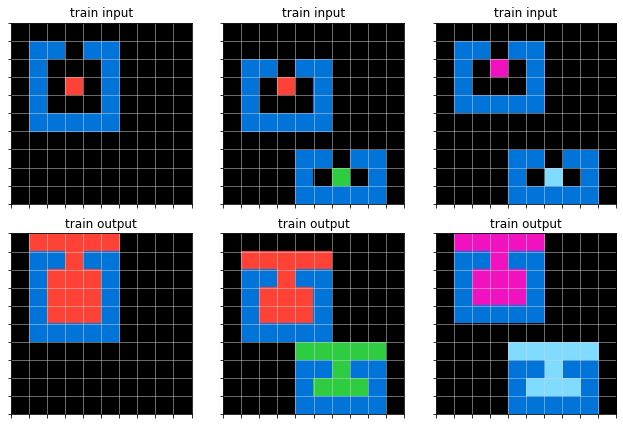

4 objects
[[1 1 0 1 1]
 [1 0 0 0 1]
 [1 0 0 0 1]
 [1 1 1 1 1]]
[[4]]
[[1 1 0 1 1]
 [1 0 0 0 1]
 [1 0 0 0 1]
 [1 1 1 1 1]]
[[7]]
4 objects
[[4 4 4 4 4]
 [0 0 4 0 0]
 [0 4 4 4 0]
 [0 4 4 4 0]]
[[1 1 0 1 1]
 [1 0 0 0 1]
 [1 0 0 0 1]
 [1 1 1 1 1]]
[[7 7 7 7 7]
 [0 0 7 0 0]
 [0 7 7 7 0]
 [0 7 7 7 0]]
[[1 1 0 1 1]
 [1 0 0 0 1]
 [1 0 0 0 1]
 [1 1 1 1 1]]


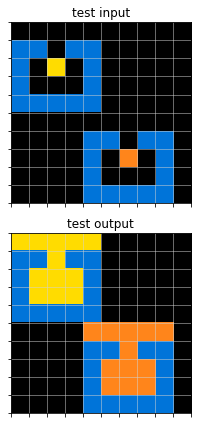

445eab21.json
Icecuber solved? True
['measure_area', 'take_maximum']
2 objects
[[7 7 7 7]
 [7 0 0 7]
 [7 0 0 7]
 [7 7 7 7]]
[[8 8 8 8 8]
 [8 0 0 0 8]
 [8 0 0 0 8]
 [8 8 8 8 8]]
1 objects
[[8 8]
 [8 8]]
2 objects
[[6 6 6 6 6]
 [6 0 0 0 6]
 [6 0 0 0 6]
 [6 6 6 6 6]]
[[7 7 7 7 7 7]
 [7 0 0 0 0 7]
 [7 0 0 0 0 7]
 [7 7 7 7 7 7]]
1 objects
[[7 7]
 [7 7]]
2 objects
[[4 4 4 4 4 4]
 [4 0 0 0 0 4]
 [4 0 0 0 0 4]
 [4 0 0 0 0 4]
 [4 0 0 0 0 4]
 [4 0 0 0 0 4]
 [4 4 4 4 4 4]]
[[2 2 2]
 [2 0 2]
 [2 2 2]]
1 objects
[[4 4]
 [4 4]]


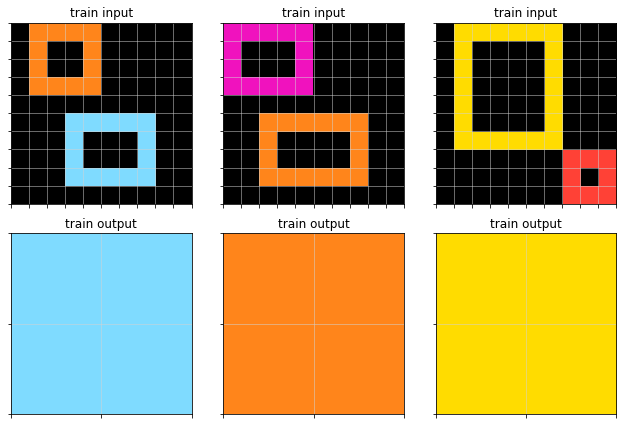

2 objects
[[3 3 3 3 3]
 [3 0 0 0 3]
 [3 0 0 0 3]
 [3 0 0 0 3]
 [3 0 0 0 3]
 [3 0 0 0 3]
 [3 0 0 0 3]
 [3 0 0 0 3]
 [3 3 3 3 3]]
[[9 9 9 9]
 [9 0 0 9]
 [9 0 0 9]
 [9 0 0 9]
 [9 0 0 9]
 [9 0 0 9]
 [9 0 0 9]
 [9 0 0 9]
 [9 0 0 9]
 [9 9 9 9]]
1 objects
[[3 3]
 [3 3]]


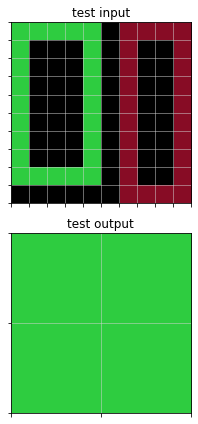

447fd412.json
Icecuber solved? False
['pattern_repetition', 'draw_pattern_from_point', 'pattern_resizing']
5 objects
[[2]]
[[1 1 0]
 [0 1 0]
 [1 1 1]]
[[2]]
[[2 2]
 [2 2]]
[[2 2]
 [2 2]]
6 objects
[[2]]
[[1 1 0]
 [0 1 0]
 [1 1 1]]
[[2]]
[[2 2]
 [2 2]]
[[1 1 1 1 0 0]
 [1 1 1 1 0 0]
 [0 0 1 1 0 0]
 [0 0 1 1 0 0]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]]
[[2 2]
 [2 2]]
7 objects
[[2]]
[[1 1 1]
 [0 1 0]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
9 objects
[[2]]
[[1 1 1]
 [0 1 0]]
[[2]]
[[2]]
[[1 1 1]
 [0 1 0]]
[[2]]
[[1 1 1]
 [0 1 0]]
[[2]]
[[2]]
3 objects
[[1 1 1]]
[[2]]
[[2 2 2]
 [2 2 2]
 [2 2 2]]
4 objects
[[1 1 1]]
[[2]]
[[1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]]
[[2 2 2]
 [2 2 2]
 [2 2 2]]


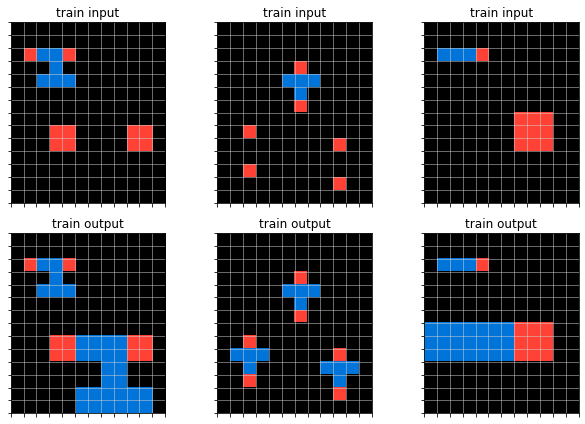

5 objects
[[1 0 0]
 [1 0 0]
 [1 1 1]]
[[2]]
[[2]]
[[2 2 2]
 [2 2 2]
 [2 2 2]]
[[2 2]
 [2 2]]
8 objects
[[1 0 0]
 [1 0 0]
 [1 1 1]]
[[1 0 0]
 [1 0 0]
 [1 1 1]]
[[2]]
[[2]]
[[1 1 1 0 0 0 0 0 0]
 [1 1 1 0 0 0 0 0 0]
 [1 1 1 0 0 0 0 0 0]
 [1 1 1 0 0 0 0 0 0]
 [1 1 1 0 0 0 0 0 0]
 [1 1 1 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1]]
[[2 2 2]
 [2 2 2]
 [2 2 2]]
[[1 1 0 0 0 0]
 [1 1 0 0 0 0]
 [1 1 0 0 0 0]
 [1 1 0 0 0 0]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]]
[[2 2]
 [2 2]]


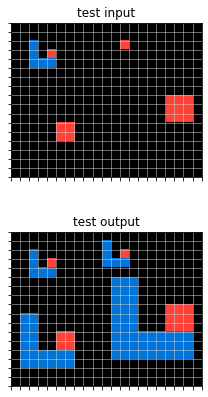

44d8ac46.json
Icecuber solved? False
['loop_filling', 'rectangle_guessing']
3 objects
[[5 5 5 5]
 [5 0 0 5]
 [5 0 0 5]
 [5 5 5 5]]
[[5 5 5 5]
 [5 0 5 5]
 [5 0 0 5]
 [5 5 5 5]]
[[5 5 5 5]
 [5 5 5 5]
 [5 0 5 5]
 [5 5 5 5]]
5 objects
[[5 5 5 5]
 [5 0 0 5]
 [5 0 0 5]
 [5 5 5 5]]
[[2 2]
 [2 2]]
[[5 5 5 5]
 [5 0 5 5]
 [5 0 0 5]
 [5 5 5 5]]
[[5 5 5 5]
 [5 5 5 5]
 [5 0 5 5]
 [5 5 5 5]]
[[2]]
3 objects
[[5 5 5 5]
 [5 5 0 5]
 [5 5 5 5]
 [5 5 5 5]]
[[5 5 5 5 5 5]
 [5 0 0 0 0 5]
 [5 0 0 0 0 5]
 [5 0 0 0 0 5]
 [5 0 0 0 0 5]
 [5 5 5 5 5 5]]
[[5 5 5 5 5]
 [5 5 5 5 5]
 [5 0 0 5 5]
 [5 0 0 5 5]
 [5 5 5 5 5]]
6 objects
[[5 5 5 5]
 [5 5 0 5]
 [5 5 5 5]
 [5 5 5 5]]
[[2]]
[[5 5 5 5 5 5]
 [5 0 0 0 0 5]
 [5 0 0 0 0 5]
 [5 0 0 0 0 5]
 [5 0 0 0 0 5]
 [5 5 5 5 5 5]]
[[2 2 2 2]
 [2 2 2 2]
 [2 2 2 2]
 [2 2 2 2]]
[[5 5 5 5 5]
 [5 5 5 5 5]
 [5 0 0 5 5]
 [5 0 0 5 5]
 [5 5 5 5 5]]
[[2 2]
 [2 2]]
3 objects
[[5 5 5 5 5]
 [5 0 0 0 5]
 [5 0 0 0 5]
 [5 0 0 0 5]
 [5 0 0 0 5]
 [5 5 5 5 5]]
[[5 5 5 5]
 [5 0 0 5]
 [5 0 0 5]
 

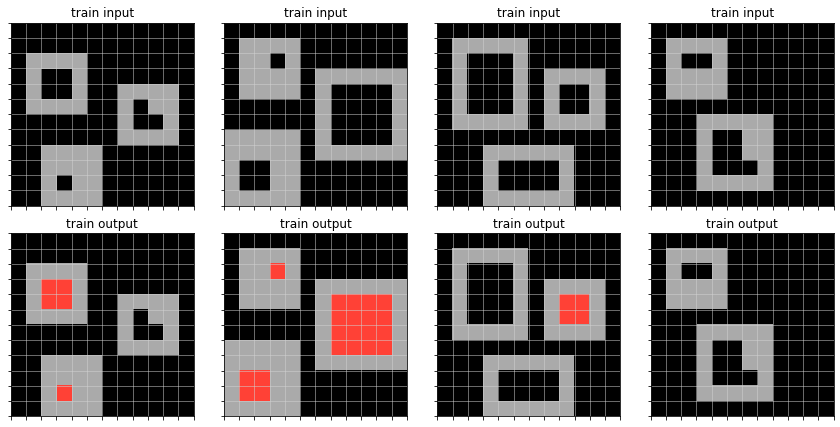

3 objects
[[5 5 5 5 5]
 [5 0 0 0 5]
 [5 0 0 0 5]
 [5 0 0 0 5]
 [5 5 5 5 5]]
[[5 5 5 5]
 [5 5 0 5]
 [5 0 0 5]
 [5 0 0 5]
 [5 5 5 5]]
[[5 5 5 5 5 5]
 [5 0 0 0 0 5]
 [5 0 0 0 0 5]
 [5 5 5 5 5 5]]
4 objects
[[5 5 5 5 5]
 [5 0 0 0 5]
 [5 0 0 0 5]
 [5 0 0 0 5]
 [5 5 5 5 5]]
[[5 5 5 5]
 [5 5 0 5]
 [5 0 0 5]
 [5 0 0 5]
 [5 5 5 5]]
[[2 2 2]
 [2 2 2]
 [2 2 2]]
[[5 5 5 5 5 5]
 [5 0 0 0 0 5]
 [5 0 0 0 0 5]
 [5 5 5 5 5 5]]


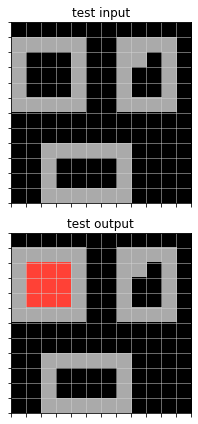

44f52bb0.json
Icecuber solved? True
['detect_symmetry', 'associate_images_to_bools']
5 objects
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
1 objects
[[1]]
2 objects
[[2]
 [2]]
[[2]]
1 objects
[[7]]
2 objects
[[2]
 [2]
 [2]]
[[2]
 [2]
 [2]]
1 objects
[[1]]
2 objects
[[2]]
[[2]]
1 objects
[[1]]
1 objects
[[2 2 0]
 [0 2 2]]
1 objects
[[7]]
1 objects
[[2 2]
 [0 2]]
1 objects
[[7]]


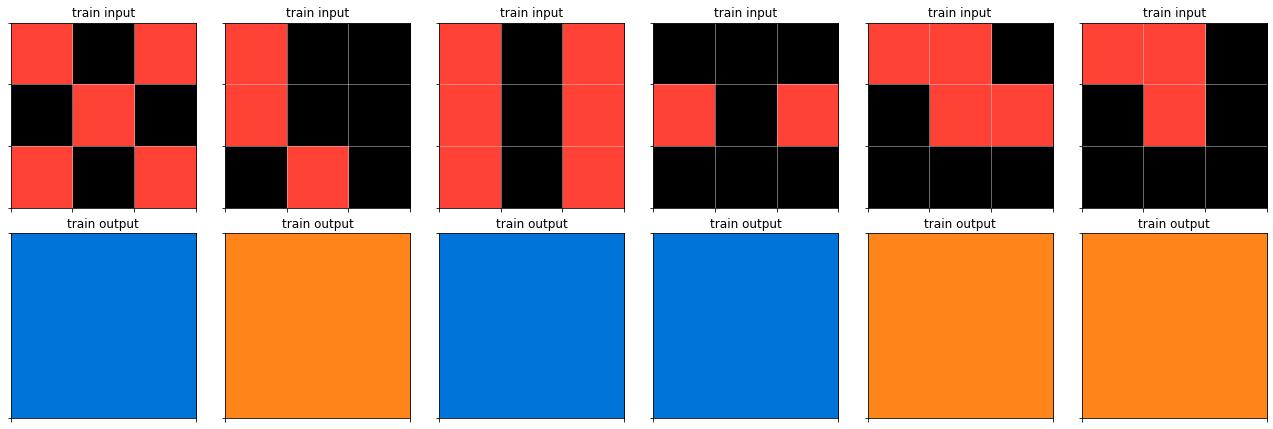

1 objects
[[2 0 2]
 [2 2 2]
 [2 0 2]]
1 objects
[[1]]
1 objects
[[2]
 [2]]
1 objects
[[7]]


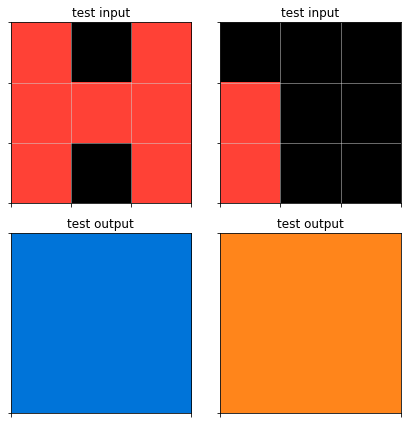

4522001f.json
Icecuber solved? False
['image_rotation', 'pairwise_analogy']
2 objects
[[3 3]
 [3 0]]
[[2]]
2 objects
[[3 3 3 3]
 [3 3 3 3]
 [3 3 3 3]
 [3 3 3 3]]
[[3 3 3 3]
 [3 3 3 3]
 [3 3 3 3]
 [3 3 3 3]]
2 objects
[[2]]
[[0 3]
 [3 3]]
2 objects
[[3 3 3 3]
 [3 3 3 3]
 [3 3 3 3]
 [3 3 3 3]]
[[3 3 3 3]
 [3 3 3 3]
 [3 3 3 3]
 [3 3 3 3]]


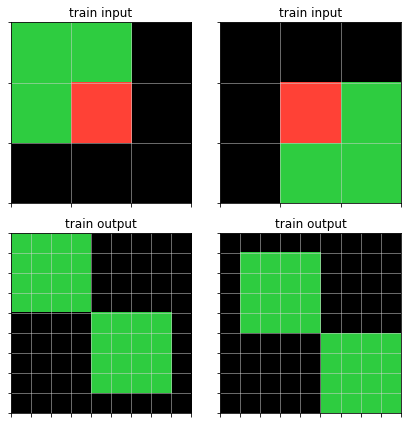

2 objects
[[3 3]
 [0 3]]
[[2]]
2 objects
[[3 3 3 3]
 [3 3 3 3]
 [3 3 3 3]
 [3 3 3 3]]
[[3 3 3 3]
 [3 3 3 3]
 [3 3 3 3]
 [3 3 3 3]]


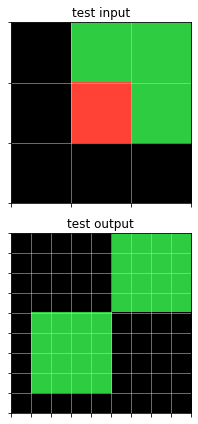

4612dd53.json
Icecuber solved? False
['pattern_completion', 'rectangle_guessing']
8 objects
[[1]
 [1]]
[[1]]
[[1 1]]
[[1]]
[[1]]
[[0 1]
 [0 1]
 [1 1]]
[[1 0]
 [1 1]]
[[1 1]]
16 objects
[[1]
 [1]]
[[2]]
[[1]]
[[2 2]]
[[1 1]]
[[2]]
[[1]]
[[2]]
[[2]
 [2]
 [2]]
[[1]]
[[2]]
[[0 1]
 [0 1]
 [1 1]]
[[1 0]
 [1 1]]
[[2 2]]
[[1 1]]
[[2]]
7 objects
[[1 1 1]
 [1 0 0]]
[[1 1]
 [0 1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]
 [1]]
[[0 0 1 0]
 [1 1 1 1]]
[[1]]
15 objects
[[1 1 1]
 [1 0 0]]
[[2 2]]
[[1 1]
 [0 1]]
[[2]]
[[2]]
[[1]
 [1]]
[[2]]
[[1]
 [1]]
[[1]
 [1]
 [1]]
[[2]]
[[2]]
[[0 0 1 0]
 [1 1 1 1]]
[[2]]
[[1]]
[[2]]
10 objects
[[1 1]
 [1 0]]
[[1 1]]
[[1 1 1]
 [0 0 1]]
[[1 0]
 [1 1]
 [1 0]]
[[1]]
[[1]]
[[1 1]]
[[0 1]
 [0 1]
 [1 1]]
[[1 1]]
[[1 1]]
20 objects
[[1 1]
 [1 0]]
[[2]]
[[1 1]]
[[2]]
[[1 1 1]
 [0 0 1]]
[[2]]
[[2]]
[[1 0]
 [1 1]
 [1 0]]
[[1]]
[[2]]
[[1]]
[[2]]
[[1 1]]
[[2 2]]
[[0 1]
 [0 1]
 [1 1]]
[[2]]
[[1 1]]
[[2]]
[[1 1]]
[[2 2]]


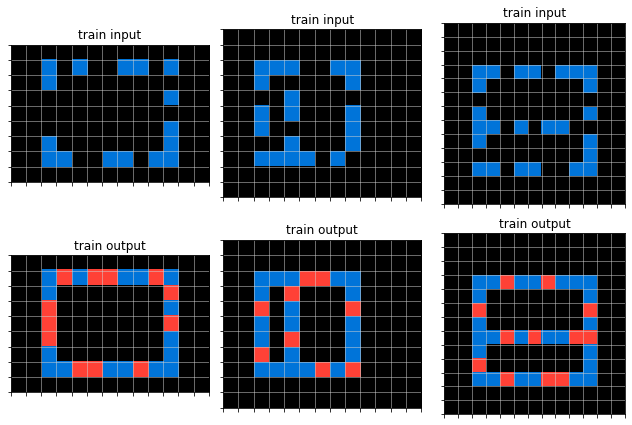

12 objects
[[1]
 [1]]
[[1 1]]
[[1]]
[[1 1]
 [0 1]]
[[1]
 [1]]
[[0 1]
 [1 1]]
[[1]]
[[1]]
[[1]
 [1]]
[[0 1]
 [1 1]]
[[1 1]]
[[1]]
25 objects
[[1]
 [1]]
[[2]]
[[1 1]]
[[2]]
[[1]]
[[2]]
[[1 1]
 [0 1]]
[[2]
 [2]]
[[2]
 [2]]
[[1]
 [1]]
[[0 1]
 [1 1]]
[[2]]
[[1]]
[[2]]
[[1]]
[[2 2]]
[[2]]
[[2]]
[[1]
 [1]]
[[0 1]
 [1 1]]
[[2]]
[[1 1]]
[[2]]
[[1]]
[[2]]


46442a0e.json
Icecuber solved? False
['image_repetition', 'image_reflection']
4 objects
[[8]]
[[6]]
[[6]]
[[8]]
9 objects
[[8]]
[[6 6]]
[[8]]
[[6]
 [6]]
[[8 8]
 [8 8]]
[[6]
 [6]]
[[8]]
[[6 6]]
[[8]]
2 objects
[[7 7]
 [7 7]]
[[0 0 8]
 [0 0 8]
 [8 8 8]]
5 objects
[[7 7]
 [7 7]]
[[0 0 8 8 0 0]
 [0 0 8 8 0 0]
 [8 8 8 8 8 8]
 [8 8 8 8 8 8]
 [0 0 8 8 0 0]
 [0 0 8 8 0 0]]
[[7 7]
 [7 7]]
[[7 7]
 [7 7]]
[[7 7]
 [7 7]]
3 objects
[[6]
 [6]
 [6]]
[[9 9]]
[[4 4]
 [4 4]]
9 objects
[[6]
 [6]
 [6]]
[[9 9]]
[[6 6 6]]
[[4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]]
[[9]
 [9]]
[[9]
 [9]]
[[6]
 [6]
 [6]]
[[6 6 6]]
[[9 9]]


9 objects
[[1]]
[[4]]
[[1]]
[[4]]
[[9]]
[[4]]
[[9]]
[[1]]
[[9]]
33 objects
[[1]]
[[4]]
[[1]]
[[9]]
[[4]]
[[1]]
[[4]]
[[9]]
[[4]]
[[1]]
[[9]]
[[4]]
[[9]]
[[1]]
[[9 9]
 [9 9]]
[[4]]
[[1]]
[[1]]
[[4]]
[[1]]
[[9]]
[[4]]
[[9]]
[[1]]
[[4]]
[[9]]
[[4]]
[[1]]
[[4]]
[[9]]
[[1]]
[[4]]
[[1]]


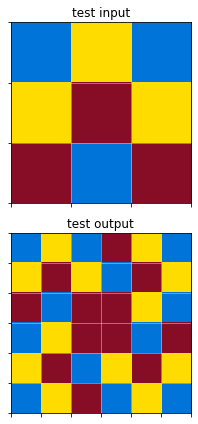

469497ad.json
Icecuber solved? False
['image_resizing', 'draw_line_from_point', 'diagonals']
2 objects
[[0 0 0 0 3]
 [0 0 0 0 3]
 [0 0 0 0 3]
 [0 0 0 0 3]
 [3 3 3 3 3]]
[[8 8]
 [8 8]]
10 objects
[[2]]
[[2]]
[[0 0 0 0 0 0 0 0 3 3]
 [0 0 0 0 0 0 0 0 3 3]
 [0 0 0 0 0 0 0 0 3 3]
 [0 0 0 0 0 0 0 0 3 3]
 [0 0 0 0 0 0 0 0 3 3]
 [0 0 0 0 0 0 0 0 3 3]
 [0 0 0 0 0 0 0 0 3 3]
 [0 0 0 0 0 0 0 0 3 3]
 [3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3]]
[[2]]
[[2]]
[[8 8 8 8]
 [8 8 8 8]
 [8 8 8 8]
 [8 8 8 8]]
[[2]]
[[2]]
[[2]]
[[2]]
4 objects
[[7]
 [7]]
[[4 4]
 [4 4]]
[[0 0 6]
 [0 0 6]
 [6 6 6]]
[[7 7]]
10 objects
[[2]]
[[7 7 7]
 [7 7 7]
 [7 7 7]
 [7 7 7]
 [7 7 7]]
[[2]]
[[2]]
[[4 4 4 4 4 4]
 [4 4 4 4 4 4]
 [4 4 4 4 4 4]
 [4 4 4 4 4 4]
 [4 4 4 4 4 4]
 [4 4 4 4 4 4]]
[[0 0 0 0 0 0 6 6 6]
 [0 0 0 0 0 0 6 6 6]
 [0 0 0 0 0 0 6 6 6]
 [0 0 0 0 0 0 6 6 6]
 [0 0 0 0 0 0 6 6 6]
 [0 0 0 0 0 0 6 6 6]
 [0 0 0 0 0 0 6 6 6]
 [6 6 6 6 6 6 6 6 6]
 [6 6 6 6 6 6 6 6 6]
 [6 6 6 6 6 6 6 6 6]]
[[2]]
[[2]]
[[2]]
[[7 7 7 7 7 7]

8 objects
[[6 6]
 [6 6]]
[[8]
 [8]]
[[1]]
[[7]]
[[8 8]]
[[1]]
[[7]]
[[9]]
18 objects
[[6 6 6 6 6 6 6 6 6 6]
 [6 6 6 6 6 6 6 6 6 6]
 [6 6 6 6 6 6 6 6 6 6]
 [6 6 6 6 6 6 6 6 6 6]
 [6 6 6 6 6 6 6 6 6 6]
 [6 6 6 6 6 6 6 6 6 6]
 [6 6 6 6 6 6 6 6 6 6]
 [6 6 6 6 6 6 6 6 6 6]
 [6 6 6 6 6 6 6 6 6 6]
 [6 6 6 6 6 6 6 6 6 6]]
[[8 8 8 8 8]
 [8 8 8 8 8]
 [8 8 8 8 8]
 [8 8 8 8 8]
 [8 8 8 8 8]
 [8 8 8 8 8]
 [8 8 8 8 8]
 [8 8 8 8 8]
 [8 8 8 8 8]
 [8 8 8 8 8]]
[[2]]
[[2]]
[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[7 7 7 7 7]
 [7 7 7 7 7]
 [7 7 7 7 7]
 [7 7 7 7 7]
 [7 7 7 7 7]]
[[8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8]]
[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]
[[7 7 7 7 7]
 [7 7 7 7 7]
 [7 7 7 7 7]
 [7 7 7 7 7]
 [7 7 7 7 7]]
[[9 9 9 9 9]
 [9 9 9 9 9]
 [9 9 9 9 9]
 [9 9 9 9 9]
 [9 9 9 9 9]]


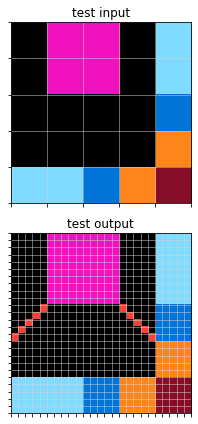

46f33fce.json
Icecuber solved? False
['pattern_resizing', 'image_resizing']
6 objects
[[2]]
[[4]]
[[1]]
[[3]]
[[4]]
[[3]]
6 objects
[[2 2 2 2]
 [2 2 2 2]
 [2 2 2 2]
 [2 2 2 2]]
[[4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]]
[[1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]]
[[3 3 3 3]
 [3 3 3 3]
 [3 3 3 3]
 [3 3 3 3]]
[[4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]]
[[3 3 3 3]
 [3 3 3 3]
 [3 3 3 3]
 [3 3 3 3]]
6 objects
[[1]]
[[3]]
[[4]]
[[8]]
[[2]]
[[2]]
5 objects
[[1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]]
[[3 3 3 3]
 [3 3 3 3]
 [3 3 3 3]
 [3 3 3 3]]
[[4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]]
[[8 8 8 8]
 [8 8 8 8]
 [8 8 8 8]
 [8 8 8 8]]
[[2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2]]
5 objects
[[3]]
[[2]]
[[1]]
[[1]]
[[4]]
4 objects
[[3 3 3 3]
 [3 3 3 3]
 [3 3 3 3]
 [3 3 3 3]]
[[2 2 2 2]
 [2 2 2 2]
 [2 2 2 2]
 [2 2 2 2]]
[[1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]]
[[4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]]


5 objects
[[6]]
[[1]]
[[3]]
[[4]]
[[2]]
5 objects
[[6 6 6 6]
 [6 6 6 6]
 [6 6 6 6]
 [6 6 6 6]]
[[1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]]
[[3 3 3 3]
 [3 3 3 3]
 [3 3 3 3]
 [3 3 3 3]]
[[4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]]
[[2 2 2 2]
 [2 2 2 2]
 [2 2 2 2]
 [2 2 2 2]]


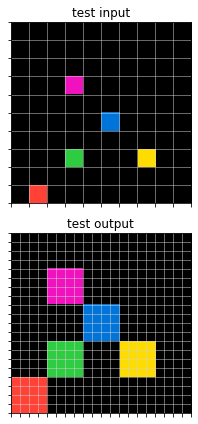

47c1f68c.json
Icecuber solved? True
['detect_grid', 'find_the_intruder', 'crop', 'recolor', 'color_guessing', 'image_repetition', 'image_reflection']
2 objects
[[0 0 0 0 0 2 0 0 0 0 0]
 [0 0 0 0 0 2 0 0 0 0 0]
 [0 0 0 0 0 2 0 0 0 0 0]
 [0 0 0 0 0 2 0 0 0 0 0]
 [0 0 0 0 0 2 0 0 0 0 0]
 [2 2 2 2 2 2 2 2 2 2 2]
 [0 0 0 0 0 2 0 0 0 0 0]
 [0 0 0 0 0 2 0 0 0 0 0]
 [0 0 0 0 0 2 0 0 0 0 0]
 [0 0 0 0 0 2 0 0 0 0 0]
 [0 0 0 0 0 2 0 0 0 0 0]]
[[0 1 0]
 [1 1 0]
 [0 1 1]]
4 objects
[[0 2 0]
 [2 2 0]
 [0 2 2]]
[[0 2 0]
 [0 2 2]
 [2 2 0]]
[[0 2 2]
 [2 2 0]
 [0 2 0]]
[[2 2 0]
 [0 2 2]
 [0 2 0]]
3 objects
[[3 0]
 [3 3]
 [3 0]]
[[3]]
[[0 0 0 0 8 0 0 0 0]
 [0 0 0 0 8 0 0 0 0]
 [0 0 0 0 8 0 0 0 0]
 [0 0 0 0 8 0 0 0 0]
 [8 8 8 8 8 8 8 8 8]
 [0 0 0 0 8 0 0 0 0]
 [0 0 0 0 8 0 0 0 0]
 [0 0 0 0 8 0 0 0 0]
 [0 0 0 0 8 0 0 0 0]]
8 objects
[[8 0]
 [8 8]
 [8 0]]
[[8]]
[[8]]
[[0 8]
 [8 8]
 [0 8]]
[[8 0]
 [8 8]
 [8 0]]
[[0 8]
 [8 8]
 [0 8]]
[[8]]
[[8]]
3 objects
[[2]]
[[0 0 0 4 0 0 0]
 [0 0 0 4 0 0 0]
 [0 0 0 4 0 0 

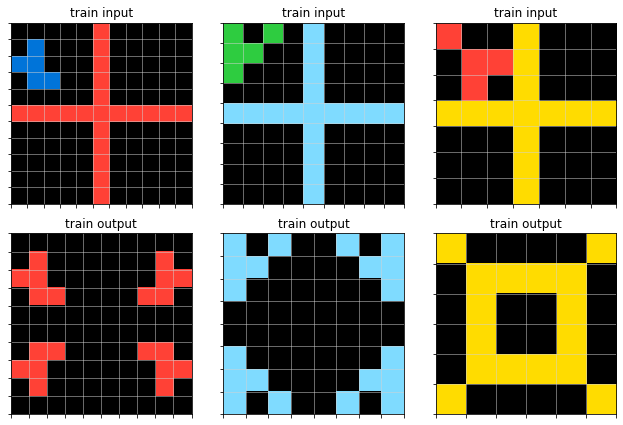

5 objects
[[8]]
[[0 0 0 0 0 0 3 0 0 0 0 0 0]
 [0 0 0 0 0 0 3 0 0 0 0 0 0]
 [0 0 0 0 0 0 3 0 0 0 0 0 0]
 [0 0 0 0 0 0 3 0 0 0 0 0 0]
 [0 0 0 0 0 0 3 0 0 0 0 0 0]
 [0 0 0 0 0 0 3 0 0 0 0 0 0]
 [3 3 3 3 3 3 3 3 3 3 3 3 3]
 [0 0 0 0 0 0 3 0 0 0 0 0 0]
 [0 0 0 0 0 0 3 0 0 0 0 0 0]
 [0 0 0 0 0 0 3 0 0 0 0 0 0]
 [0 0 0 0 0 0 3 0 0 0 0 0 0]
 [0 0 0 0 0 0 3 0 0 0 0 0 0]
 [0 0 0 0 0 0 3 0 0 0 0 0 0]]
[[8]]
[[8]]
[[8 0]
 [8 0]
 [8 8]]
16 objects
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3 0]
 [3 0]
 [3 3]]
[[0 3]
 [0 3]
 [3 3]]
[[3]]
[[3 3]
 [3 0]
 [3 0]]
[[3 3]
 [0 3]
 [0 3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]


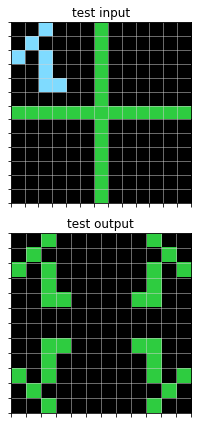

484b58aa.json
Icecuber solved? False
['image_filling', 'pattern_expansion', 'pattern_repetition']
782 objects
[[5]]
[[4]]
[[5]]
[[6]]
[[1]]
[[2]]
[[5]]
[[4]]
[[5]]
[[6]]
[[1]]
[[2]]
[[5]]
[[4]]
[[5]]
[[6]]
[[1]]
[[2]]
[[5]]
[[4]]
[[5]]
[[6]]
[[1]]
[[2]]
[[5]]
[[4]]
[[5]]
[[6]]
[[1]]
[[4]]
[[5]]
[[2]]
[[1]]
[[2]]
[[3]]
[[4]]
[[5]]
[[2]]
[[1]]
[[2]]
[[3]]
[[4]]
[[5]]
[[2]]
[[1]]
[[2]]
[[3]]
[[4]]
[[5]]
[[2]]
[[1]]
[[2]]
[[3]]
[[4]]
[[5]]
[[2]]
[[1]]
[[2]]
[[5]]
[[6]]
[[1]]
[[2]]
[[5]]
[[4]]
[[5]]
[[6]]
[[1]]
[[2]]
[[5]]
[[4]]
[[5]]
[[6]]
[[1]]
[[2]]
[[5]]
[[4]]
[[5]]
[[6]]
[[1]]
[[2]]
[[5]]
[[4]]
[[5]]
[[6]]
[[1]]
[[2]]
[[5]]
[[2]]
[[1]]
[[2]]
[[3]]
[[4]]
[[5]]
[[2]]
[[3]]
[[4]]
[[5]]
[[2]]
[[1]]
[[2]]
[[3]]
[[4]]
[[5]]
[[2]]
[[1]]
[[2]]
[[3]]
[[4]]
[[5]]
[[2]]
[[1]]
[[2]]
[[3]]
[[4]]
[[1]]
[[2]]
[[5]]
[[4]]
[[5]]
[[6]]
[[5]]
[[4]]
[[5]]
[[6]]
[[1]]
[[2]]
[[5]]
[[4]]
[[5]]
[[6]]
[[1]]
[[2]]
[[5]]
[[4]]
[[5]]
[[6]]
[[1]]
[[2]]
[[5]]
[[4]]
[[5]]
[[2]]
[[1]]
[[4]]
[[5]]
[[2]]
[[1]]
[[2]]
[[

542 objects
[[5]]
[[4]]
[[2]]
[[1]]
[[2 2]]
[[5]
 [5]]
[[3]]
[[2]
 [2]]
[[7]]
[[1]]
[[0 2]
 [2 2]]
[[3]]
[[6]]
[[2]
 [2]
 [2]]
[[6]]
[[2]]
[[1]]
[[2]]
[[5]]
[[2]
 [2]
 [2]
 [2]]
[[5 5]]
[[7]]
[[1]]
[[2 2]
 [0 2]
 [0 2]
 [0 2]
 [0 2]]
[[4]]
[[3]]
[[5]]
[[7]]
[[4]]
[[1]]
[[5]
 [5]]
[[3]]
[[7]]
[[1]]
[[0 2]
 [2 2]]
[[3]]
[[6]]
[[6]]
[[2]]
[[1]]
[[2]]
[[5]]
[[5 5]]
[[3]
 [3]]
[[2]]
[[3]]
[[7]]
[[1]]
[[2]]
[[5]]
[[7]]
[[4]]
[[1]]
[[5]
 [5]]
[[3]]
[[7]]
[[1]]
[[0 2]
 [2 2]]
[[3]]
[[6]]
[[6]]
[[2]]
[[7]
 [7]]
[[2]]
[[1]]
[[0 2]
 [2 2]
 [0 2]
 [0 2]
 [0 2]
 [0 2]]
[[3 3]
 [0 3]]
[[2]]
[[3]]
[[7]]
[[1]]
[[2]]
[[5]]
[[7]]
[[4]]
[[1]]
[[5]
 [5]]
[[3]]
[[7]]
[[1]]
[[5]]
[[1]]
[[4]]
[[7]
 [7]]
[[2]]
[[1]]
[[0 2]
 [2 2]
 [0 2]
 [0 2]
 [0 2]
 [0 2]]
[[3 3]
 [0 3]]
[[2]]
[[3]]
[[7]]
[[1]]
[[2]]
[[5]]
[[7]]
[[4]]
[[1]]
[[2]]
[[3]]
[[6]]
[[2]
 [2]
 [2]]
[[6]]
[[2]]
[[1]]
[[2]]
[[5]]
[[5 5]]
[[1]]
[[4]]
[[7]
 [7]]
[[2]]
[[1]]
[[0 2]
 [2 2]
 [0 2]
 [0 2]
 [0 2]
 [0 2]]
[[3 3]
 [0 3]]
[[2]]
[[3]]
[[7]]
[[1

735 objects
[[1]]
[[2]]
[[1]]
[[4]]
[[1]]
[[6]]
[[1]]
[[8]]
[[1]]
[[2]]
[[1]]
[[4]]
[[1]]
[[6]]
[[1]]
[[8]]
[[1]]
[[2]]
[[1]]
[[4]]
[[1]]
[[6]]
[[1]]
[[8]]
[[1]]
[[2]]
[[1]]
[[4]]
[[1]]
[[2]]
[[1]]
[[2]]
[[1]]
[[2]]
[[1]]
[[2]]
[[1]]
[[2]]
[[1]]
[[2]]
[[1]]
[[2]]
[[1]]
[[2]]
[[1]]
[[2]]
[[1]]
[[2]]
[[1]]
[[2]]
[[1]]
[[2]]
[[1]]
[[2]]
[[1]]
[[2]]
[[1]]
[[2]]
[[1]]
[[4]]
[[1]]
[[6]]
[[1]]
[[8]]
[[1]]
[[2]]
[[1]]
[[4]]
[[1]]
[[6]]
[[1]]
[[8]]
[[1]]
[[2]]
[[1]]
[[4]]
[[1]]
[[6]]
[[1]]
[[8]]
[[1]]
[[2]]
[[1]]
[[4]]
[[1]]
[[6]]
[[1]]
[[2]]
[[1]]
[[2]]
[[1]]
[[2]]
[[1]]
[[2]]
[[1]]
[[2]]
[[1]]
[[2]]
[[1]]
[[2]]
[[1]]
[[2]]
[[1]]
[[2]]
[[1]]
[[2]]
[[1]]
[[2]]
[[1]]
[[2]]
[[1]]
[[2]]
[[1]]
[[2]]
[[1]]
[[2]]
[[1]]
[[6]]
[[1]]
[[8]]
[[1]]
[[2]]
[[2]]
[[1]]
[[4]]
[[1]]
[[6]]
[[1]]
[[8]]
[[1]]
[[2]]
[[1]]
[[4]]
[[1]]
[[6]]
[[1]]
[[8]]
[[1]]
[[2]]
[[1]]
[[2]]
[[1]]
[[2]]
[[1]]
[[1]]
[[2]]
[[1]]
[[2]]
[[1]]
[[2]]
[[1]]
[[2]]
[[1]]
[[2]]
[[1]]
[[2]]
[[1]]
[[2]]
[[1]]
[[2]]
[[1]]
[[8]]
[[1]]
[[2]]
[[1]

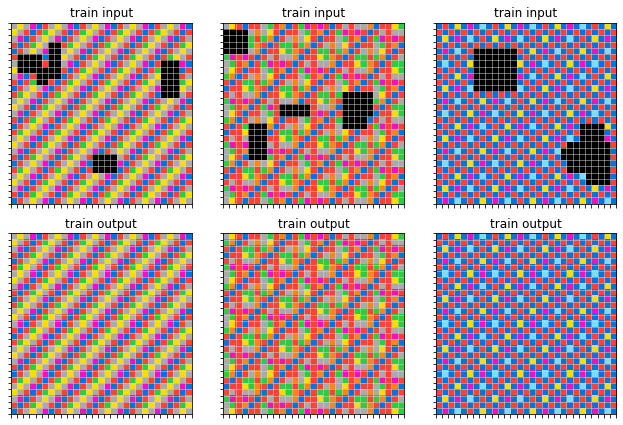

682 objects
[[8]]
[[1]]
[[2]
 [2]]
[[6]]
[[1]]
[[2]]
[[1]]
[[2]]
[[5]]
[[1]]
[[2]]
[[9]]
[[1]]
[[2]]
[[8]]
[[1]]
[[2]
 [2]]
[[6]]
[[1]]
[[2 2]]
[[1]]
[[0 2]
 [2 2]]
[[3]]
[[1]]
[[1]]
[[8]]
[[1]]
[[5]]
[[9]]
[[8]
 [8]]
[[9]]
[[1]]
[[5]]
[[9]]
[[1]]
[[8]]
[[1]]
[[5]]
[[9]]
[[1]]
[[1]]
[[8]
 [8]]
[[5]
 [5]]
[[3]]
[[1]]
[[8]]
[[2]]
[[1]]
[[1]]
[[8]]
[[9]]
[[1]]
[[5]
 [5]]
[[3]]
[[1]]
[[8]]
[[2]]
[[1]]
[[2]]
[[6]]
[[1]]
[[5]]
[[1]]
[[2]
 [2]]
[[9]]
[[1]]
[[2]]
[[1]]
[[2 2]]
[[1]]
[[2]]
[[1]]
[[2]
 [2]]
[[9]]
[[1]]
[[2]]
[[8]]
[[1]]
[[2]
 [2]]
[[6]]
[[1]]
[[1]]
[[5]]
[[1]]
[[2]]
[[9]]
[[5]]
[[9]]
[[1]]
[[2]]
[[9]]
[[1]]
[[5]]
[[1]]
[[2]]
[[9]]
[[1]]
[[8]]
[[1]]
[[5]]
[[8]]
[[9]]
[[1]]
[[2]]
[[5]]
[[1]]
[[5]
 [5]]
[[3]]
[[1]]
[[8]]
[[2]]
[[1]]
[[2]]
[[6]]
[[1]]
[[8]]
[[9]]
[[1]]
[[2]]
[[5]]
[[1]]
[[5]
 [5]]
[[3]]
[[1]]
[[8]]
[[2]]
[[2]]
[[1]]
[[0 2]
 [2 2]]
[[3]]
[[1]]
[[2]]
[[1]]
[[2]
 [2]]
[[9]]
[[1]]
[[2]]
[[8]]
[[1]]
[[2 2]]
[[1]]
[[0 2]
 [2 2]]
[[3]]
[[1]]
[[2]]
[[1]]
[[2]
 [2]]
[[9]]
[[

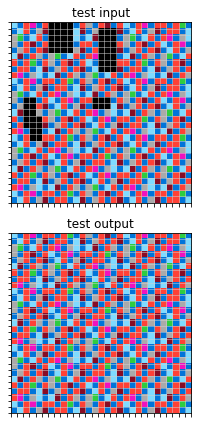

48d8fb45.json
Icecuber solved? True
['find_the_intruder', 'crop']
4 objects
[[0 1 1]
 [1 1 0]
 [0 1 0]]
[[5]]
[[0 1 0]
 [1 1 1]
 [0 1 1]]
[[0 1 1]
 [1 1 1]
 [0 1 1]]
1 objects
[[0 1 0]
 [1 1 1]
 [0 1 1]]
7 objects
[[5]]
[[4 4]]
[[4]]
[[4]]
[[4]]
[[0 4]
 [4 4]]
[[4]]
3 objects
[[4 4]]
[[4]]
[[4]]
5 objects
[[2 2]
 [0 2]]
[[2]]
[[2]]
[[5]]
[[0 2 2]
 [2 2 0]
 [0 2 0]]
1 objects
[[0 2 2]
 [2 2 0]
 [0 2 0]]


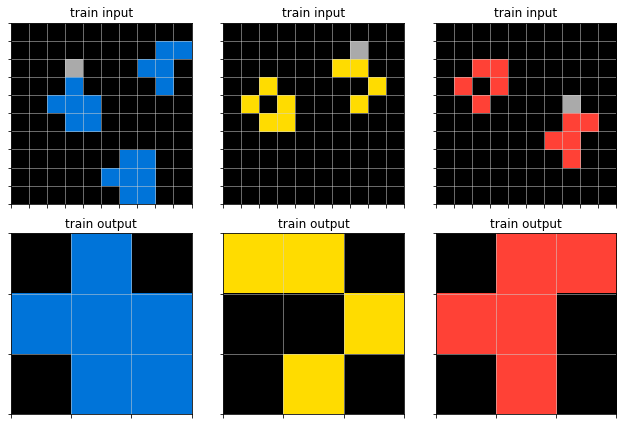

4 objects
[[5]]
[[0 3 0]
 [3 3 0]
 [0 3 3]]
[[0 3]
 [3 3]
 [0 3]]
[[0 3 0]
 [3 3 3]
 [0 3 3]]
1 objects
[[0 3 0]
 [3 3 0]
 [0 3 3]]


4938f0c2.json
Icecuber solved? False
['pattern_expansion', 'pattern_rotation', 'pattern_reflection']
2 objects
[[2 0 0 2]
 [2 0 0 2]
 [2 0 0 2]
 [2 2 2 2]]
[[3 3]
 [3 3]]
5 objects
[[2 0 0 2]
 [2 0 0 2]
 [2 0 0 2]
 [2 2 2 2]]
[[2 0 0 2]
 [2 0 0 2]
 [2 0 0 2]
 [2 2 2 2]]
[[3 3]
 [3 3]]
[[2 2 2 2]
 [2 0 0 2]
 [2 0 0 2]
 [2 0 0 2]]
[[2 2 2 2]
 [2 0 0 2]
 [2 0 0 2]
 [2 0 0 2]]
3 objects
[[2 2]
 [2 0]]
[[0 2]
 [2 2]]
[[3 3]
 [3 3]]
9 objects
[[2 2]
 [2 0]]
[[2 2]
 [0 2]]
[[0 2]
 [2 2]]
[[2 0]
 [2 2]]
[[3 3]
 [3 3]]
[[2 2]
 [0 2]]
[[2 2]
 [2 0]]
[[2 0]
 [2 2]]
[[0 2]
 [2 2]]
9 objects
[[2 0 0]
 [2 0 0]
 [2 2 2]]
[[2]]
[[2]]
[[0 0 2]
 [0 0 2]
 [2 2 2]]
[[3 3]
 [3 3]]
[[2 2 2]
 [2 0 0]
 [2 0 0]]
[[2 2 2]
 [0 0 2]
 [0 0 2]]
[[2]]
[[2]]
9 objects
[[2 0 0]
 [2 0 0]
 [2 2 2]]
[[2]]
[[2]]
[[0 0 2]
 [0 0 2]
 [2 2 2]]
[[3 3]
 [3 3]]
[[2 2 2]
 [2 0 0]
 [2 0 0]]
[[2 2 2]
 [0 0 2]
 [0 0 2]]
[[2]]
[[2]]


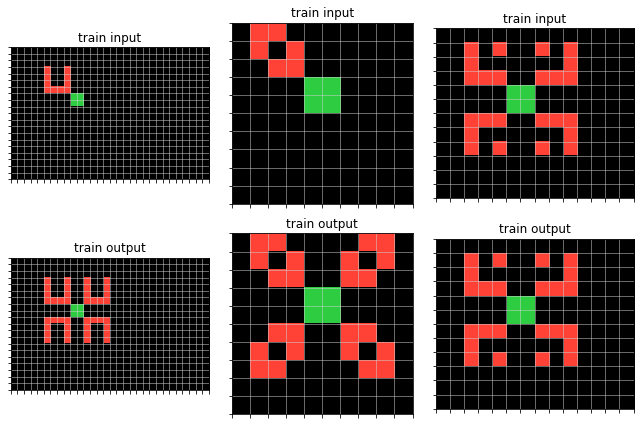

3 objects
[[2 2 2 2]
 [0 2 0 0]]
[[2 0]
 [2 2]]
[[3 3]
 [3 3]]
9 objects
[[2 2 2 2]
 [0 2 0 0]]
[[2 2 2 2]
 [0 0 2 0]]
[[2 0]
 [2 2]]
[[0 2]
 [2 2]]
[[3 3]
 [3 3]]
[[2 2]
 [2 0]]
[[2 2]
 [0 2]]
[[0 2 0 0]
 [2 2 2 2]]
[[0 0 2 0]
 [2 2 2 2]]


496994bd.json
Icecuber solved? True
['pattern_reflection']
2 objects
[[2 2 2]
 [2 2 2]]
[[3 3 3]]
4 objects
[[2 2 2]
 [2 2 2]]
[[3 3 3]]
[[3 3 3]]
[[2 2 2]
 [2 2 2]]
2 objects
[[2 2 2 2 2]]
[[8 8 8 8 8]]
4 objects
[[2 2 2 2 2]]
[[8 8 8 8 8]]
[[8 8 8 8 8]]
[[2 2 2 2 2]]


2 objects
[[3 3 3 3 3 3]]
[[5 5 5 5 5 5]
 [5 5 5 5 5 5]]
4 objects
[[3 3 3 3 3 3]]
[[5 5 5 5 5 5]
 [5 5 5 5 5 5]]
[[5 5 5 5 5 5]
 [5 5 5 5 5 5]]
[[3 3 3 3 3 3]]


49d1d64f.json
Icecuber solved? True
['pattern_expansion', 'image_expansion']
4 objects
[[1]]
[[2]]
[[3]]
[[8]]
4 objects
[[0 1]
 [1 1]]
[[2 0]
 [2 2]]
[[3 3]
 [0 3]]
[[8 8]
 [8 0]]
6 objects
[[1]]
[[8]]
[[4]]
[[8]]
[[3]]
[[8]]
6 objects
[[0 1]
 [1 1]]
[[8]
 [8]]
[[4 0]
 [4 4]]
[[8 8]
 [0 8]]
[[3]
 [3]]
[[8 8]
 [8 0]]
8 objects
[[2]]
[[1]]
[[4]]
[[8]]
[[2]]
[[3]]
[[2]]
[[8]]
8 objects
[[0 2]
 [2 2]]
[[1]
 [1]]
[[4 0]
 [4 4]]
[[8 8]]
[[2 2]]
[[3 3]
 [0 3]]
[[2]
 [2]]
[[8 8]
 [8 0]]


5 objects
[[2]]
[[8]]
[[1]]
[[4]
 [4]]
[[3]]
5 objects
[[0 2]
 [2 2]]
[[8 0]
 [8 8]]
[[1 1]]
[[4 4]
 [4 4]
 [4 0]]
[[3 3]
 [0 3]]


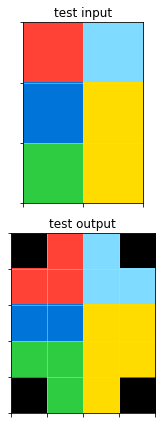

4be741c5.json
Icecuber solved? True
['summarize']
3 objects
[[4 4 4 4 4 4 4 0]
 [4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 0]
 [4 4 4 4 4 4 0 0]
 [4 4 4 4 4 4 0 0]
 [4 4 4 4 4 4 4 0]
 [4 4 4 4 4 4 4 0]
 [4 4 4 4 4 0 0 0]
 [4 4 4 4 4 0 0 0]
 [4 4 4 4 0 0 0 0]
 [4 4 4 4 0 0 0 0]
 [4 4 4 4 4 0 0 0]
 [4 4 4 4 4 4 0 0]]
[[0 0 0 2 2 2 2 2 2 2]
 [0 0 0 0 2 2 2 2 0 0]
 [0 0 0 0 2 2 2 2 0 0]
 [0 0 0 2 2 2 2 2 0 0]
 [0 0 2 2 2 2 2 2 2 0]
 [0 0 2 2 2 2 2 2 0 0]
 [0 0 0 2 2 2 2 2 0 0]
 [0 0 0 2 2 2 2 2 2 0]
 [0 2 2 2 2 2 2 2 2 2]
 [0 2 2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2 2 0]
 [2 2 2 2 2 2 2 2 0 0]
 [0 2 2 2 2 2 2 2 0 0]
 [0 0 2 2 2 2 2 2 2 0]]
[[0 0 8 8]
 [8 8 8 8]
 [8 8 8 8]
 [8 8 8 8]
 [0 8 8 8]
 [8 8 8 8]
 [8 8 8 8]
 [0 8 8 8]
 [0 0 8 8]
 [0 0 8 8]
 [0 8 8 8]
 [8 8 8 8]
 [8 8 8 8]
 [0 8 8 8]]
3 objects
[[4]]
[[2]]
[[8]]
3 objects
[[2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2]
 [2 0 0 0 2 2 0]]
[[0 8 8 8 0 0 8]
 [8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8]
 [8 8 8 0 0 8 8]
 [0 8 0 0 0 0 0]]
[[

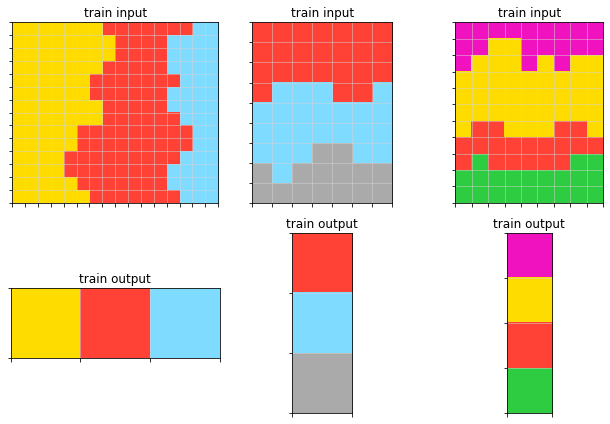

4 objects
[[3 3 3 3 0 0]
 [3 3 3 0 0 0]
 [3 3 3 3 3 0]
 [3 3 3 3 3 0]
 [3 3 3 3 0 0]
 [3 3 3 3 3 0]
 [3 3 3 0 0 0]
 [3 3 3 3 0 0]
 [3 3 3 3 0 0]
 [3 3 3 0 0 0]
 [3 3 3 0 0 0]
 [3 3 3 3 0 0]
 [3 3 3 3 3 0]
 [3 3 3 3 3 3]]
[[0 2 2 2 2 2]
 [2 2 2 2 2 0]
 [0 0 2 2 0 0]
 [0 0 2 2 0 0]
 [0 2 2 2 2 2]
 [0 0 2 2 2 2]
 [2 2 2 2 2 0]
 [0 2 2 2 2 0]
 [0 2 2 2 2 0]
 [2 2 2 2 2 2]
 [2 2 2 2 2 2]
 [0 2 2 2 2 0]
 [0 0 2 2 2 0]
 [0 0 0 2 2 2]]
[[0 0 1 1 1 0]
 [0 1 1 1 0 0]
 [1 1 1 0 0 0]
 [1 1 1 1 0 0]
 [0 0 1 1 1 0]
 [0 0 1 1 1 1]
 [0 1 1 1 1 0]
 [0 1 1 1 0 0]
 [0 1 1 1 1 0]
 [0 0 1 1 1 0]
 [0 0 1 1 0 0]
 [0 1 1 1 1 0]
 [0 1 1 1 1 0]
 [0 0 1 1 1 0]]
[[0 0 8 8]
 [0 8 8 8]
 [8 8 8 8]
 [0 8 8 8]
 [0 0 8 8]
 [0 0 0 8]
 [0 0 8 8]
 [0 8 8 8]
 [0 0 8 8]
 [0 0 8 8]
 [0 8 8 8]
 [0 0 8 8]
 [0 0 8 8]
 [0 0 8 8]]
4 objects
[[3]]
[[2]]
[[1]]
[[8]]


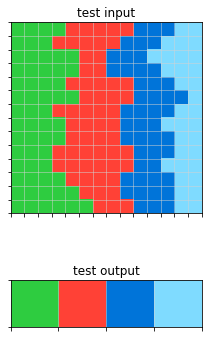

4c4377d9.json
Icecuber solved? True
['image_repetition', 'image_reflection']
5 objects
[[9 9]]
[[5]]
[[0 9]
 [9 9]
 [9 9]]
[[5 5]
 [0 5]]
[[9]]
7 objects
[[9]]
[[0 5]
 [5 5]]
[[9 9]
 [9 9]
 [0 9]
 [0 9]
 [9 9]
 [9 9]]
[[9 9]
 [9 9]]
[[5]
 [5]]
[[5 5]
 [0 5]]
[[9]]
4 objects
[[4]]
[[0 1 1 0]
 [1 1 1 1]
 [0 0 0 1]]
[[4]]
[[4 4 4]]
5 objects
[[4 4 4]]
[[0 0 0 1]
 [1 1 1 1]
 [0 1 1 0]
 [0 1 1 0]
 [1 1 1 1]
 [0 0 0 1]]
[[4]
 [4]]
[[4]
 [4]]
[[4 4 4]]
4 objects
[[9 0]
 [9 9]]
[[4]]
[[9]]
[[0 0 0 4]
 [0 0 4 4]
 [4 4 4 4]]
4 objects
[[4 4 4 4]
 [0 0 4 4]
 [0 0 0 4]
 [0 0 0 4]
 [0 0 4 4]
 [4 4 4 4]]
[[9 9]
 [9 0]
 [9 0]
 [9 9]]
[[4]
 [4]]
[[9]
 [9]]
3 objects
[[3 3]
 [3 0]]
[[0 0 5 5]
 [0 5 5 0]
 [5 5 0 0]]
[[0 3]
 [3 3]]
4 objects
[[5 5 0 0]
 [0 5 5 0]
 [0 0 5 5]
 [0 0 5 5]
 [0 5 5 0]
 [5 5 0 0]]
[[3 3]
 [0 3]]
[[3 0]
 [3 3]
 [3 3]
 [3 0]]
[[0 3]
 [3 3]]


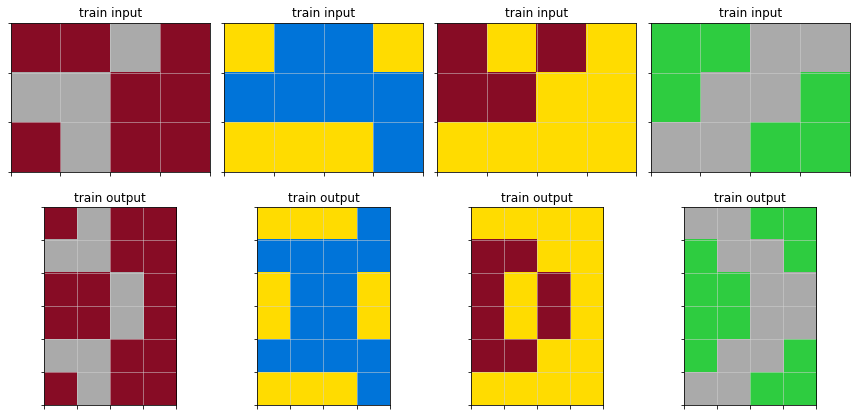

3 objects
[[4 4 0 0]
 [4 4 4 4]
 [4 4 0 0]]
[[9 9]]
[[9 9]]
4 objects
[[4 4 0 0]
 [4 4 4 4]
 [4 4 0 0]
 [4 4 0 0]
 [4 4 4 4]
 [4 4 0 0]]
[[9 9]]
[[9 9]
 [9 9]]
[[9 9]]


4c5c2cf0.json
Icecuber solved? False
['pattern_expansion', 'pattern_rotation', 'pattern_reflection']
8 objects
[[2 0]
 [2 2]]
[[0 0 2]
 [0 0 2]
 [0 2 2]
 [2 2 0]]
[[2]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
17 objects
[[2 0]
 [2 2]]
[[0 0 2]
 [0 0 2]
 [0 2 2]
 [2 2 0]]
[[2 0 0]
 [2 0 0]
 [2 2 0]
 [0 2 2]]
[[0 2]
 [2 2]]
[[2]]
[[4]]
[[4]]
[[2]]
[[4]]
[[2]]
[[4]]
[[4]]
[[2]]
[[2 2 0]
 [0 2 2]
 [0 0 2]
 [0 0 2]]
[[0 2 2]
 [2 2 0]
 [2 0 0]
 [2 0 0]]
[[2 2]
 [2 0]]
[[2 2]
 [0 2]]
6 objects
[[0 0 8 0]
 [0 8 8 8]
 [8 8 8 0]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
9 objects
[[0 8 0 0]
 [8 8 8 0]
 [0 8 8 8]]
[[0 0 8 0]
 [0 8 8 8]
 [8 8 8 0]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[0 8 8 8]
 [8 8 8 0]
 [0 8 0 0]]
[[8 8 8 0]
 [0 8 8 8]
 [0 0 8 0]]
8 objects
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[1 1]
 [0 1]]
[[1]]
[[1]]
17 objects
[[1]]
[[1]]
[[1]]
[[0 1]
 [1 1]]
[[1 0]
 [1 1]]
[[1]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[1 1]
 [0 1]]
[[1 1]
 [1 0]]
[[1]]
[[1]]
[[1]]
[[1]]


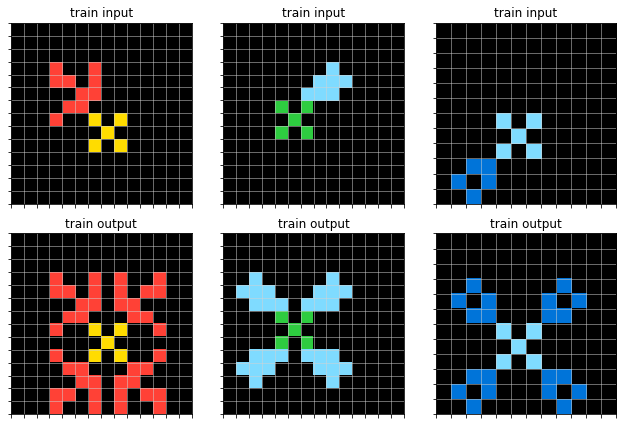

9 objects
[[7]]
[[7]]
[[7]]
[[7]]
[[7]]
[[4]]
[[4 4 0]
 [0 4 0]
 [0 4 4]]
[[4]]
[[4]
 [4]]
21 objects
[[4]
 [4]]
[[4]
 [4]]
[[4 4 0]
 [0 4 0]
 [0 4 4]]
[[0 4 4]
 [0 4 0]
 [4 4 0]]
[[4]]
[[4]]
[[4]]
[[7]]
[[7]]
[[4]]
[[7]]
[[4]]
[[7]]
[[7]]
[[4]]
[[4]]
[[0 4 4]
 [0 4 0]
 [4 4 0]]
[[4 4 0]
 [0 4 0]
 [0 4 4]]
[[4]]
[[4]
 [4]]
[[4]
 [4]]


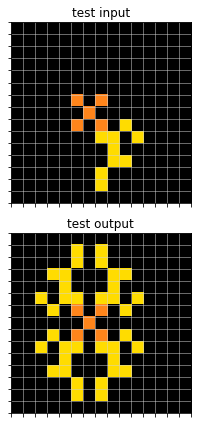

50846271.json
Icecuber solved? False
['pattern_completion', 'recoloring']
66 objects
[[0 0 0 5]
 [5 5 5 5]
 [0 5 5 5]]
[[5 5 5 5 5 5]
 [5 0 5 0 5 0]
 [5 5 0 0 0 0]]
[[5]]
[[5]]
[[5]]
[[5 5]
 [5 0]]
[[5]
 [5]]
[[5 5 0]
 [0 5 5]]
[[2]
 [2]
 [2]]
[[5]]
[[0 5 5 5]
 [0 5 5 0]
 [5 5 5 0]
 [0 5 0 0]
 [0 5 0 0]]
[[5 5 5 0]
 [5 0 5 5]]
[[5]]
[[5]]
[[5 0]
 [5 5]]
[[5]
 [5]]
[[5]]
[[2]]
[[0 5]
 [0 5]
 [5 5]]
[[2]]
[[2]]
[[0 5]
 [0 5]
 [5 5]]
[[5]]
[[2]
 [2]
 [2]]
[[5 5 5]]
[[5]]
[[5]]
[[5]
 [5]]
[[5]]
[[5]]
[[5]
 [5]]
[[5]]
[[5]
 [5]]
[[0 0 0 0 5 5]
 [5 5 5 5 5 0]
 [5 0 0 5 0 0]
 [0 5 5 5 0 0]
 [5 5 5 0 0 0]]
[[5 5]]
[[5 0 0]
 [5 5 0]
 [0 5 5]
 [0 5 0]]
[[0 5]
 [5 5]]
[[5 5 5]
 [5 5 0]
 [0 5 5]
 [5 5 0]]
[[5 5]
 [5 5]]
[[5 5]
 [0 5]]
[[2]]
[[5]]
[[0 5]
 [5 5]]
[[5]]
[[2]]
[[5 5]]
[[2 2 2 2]]
[[0 5 0 0 0]
 [5 5 5 0 0]
 [0 0 5 5 5]]
[[5]]
[[5]]
[[5 5]]
[[5 5]]
[[0 5]
 [5 5]]
[[5]]
[[5]]
[[5]]
[[2]
 [2]]
[[0 0 0 5]
 [0 0 0 5]
 [5 5 5 5]]
[[5]]
[[0 5 5]
 [5 5 5]]
[[5]]
[[0 5 5]
 [5 5 0]
 [5 0 0]]
[[5

41 objects
[[5]
 [5]]
[[5 0 0 0 0]
 [5 5 0 0 0]
 [0 5 5 5 0]
 [0 0 5 5 5]
 [0 0 0 5 0]]
[[5 5]]
[[0 5]
 [5 5]]
[[0 0 5]
 [0 5 5]
 [5 5 0]
 [5 0 0]]
[[5]]
[[0 0 0 0 0 5 5 0]
 [0 0 0 0 0 5 5 5]
 [0 5 5 0 0 5 5 5]
 [0 5 5 0 5 5 5 0]
 [5 5 5 0 0 5 5 0]
 [0 0 5 5 5 5 0 0]
 [0 0 0 5 5 5 5 5]
 [0 0 0 0 5 0 5 0]
 [0 0 0 0 5 5 5 0]]
[[5 5]
 [0 5]
 [0 5]]
[[0 0 5]
 [0 0 5]
 [5 5 5]
 [0 5 5]]
[[5]]
[[5]]
[[2 2]]
[[2 2]]
[[5]]
[[0 5]
 [5 5]]
[[2]
 [2]]
[[5]]
[[5 5 0 0 0 0]
 [5 0 0 0 0 0]
 [5 5 5 5 5 0]
 [0 0 0 5 5 5]
 [0 0 0 5 5 5]
 [0 5 5 5 0 0]
 [5 5 0 0 0 0]]
[[0 0 5]
 [5 5 5]
 [0 5 0]
 [0 5 5]
 [5 5 0]]
[[0 0 0 5 0 0]
 [0 0 5 5 0 0]
 [0 0 0 5 5 5]
 [0 0 0 0 5 0]
 [0 0 0 5 5 0]
 [5 0 5 5 0 0]
 [5 5 5 5 5 0]
 [5 5 5 0 5 0]
 [5 5 5 5 0 0]]
[[5 5]
 [0 5]]
[[5]]
[[2]]
[[2]]
[[0 0 0 0 0 5 0 5 0]
 [0 0 0 0 0 5 5 5 5]
 [0 0 5 5 5 0 0 5 5]
 [5 5 5 5 5 5 5 5 0]
 [0 5 5 0 0 0 5 5 5]
 [0 0 5 0 0 0 5 0 5]
 [0 0 0 0 0 5 5 0 0]
 [0 0 0 0 0 5 0 0 0]]
[[2]]
[[5]]
[[5 5 0]
 [0 5 5]
 [0 0 5]
 [0 0 5]]
[[5]]
[[5 

508bd3b6.json
Icecuber solved? False
['draw_line_from_point', 'direction_guessing', 'pattern_reflection']
3 objects
[[2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]]
[[8]]
[[8]]
13 objects
[[3]]
[[2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[8]]
[[8]]
4 objects
[[8]]
[[8]]
[[8]]
[[2 2 2 2 2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2 2 2 2 2]]
13 objects
[[8]]
[[8]]
[[3]]
[[8]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[2 2 2 2 2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2 2 2 2 2]]
4 objects
[[2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]]
[[8]]
[[8]]
[[8]]
13 objects
[[2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[8]]
[[8]]
[[8]]


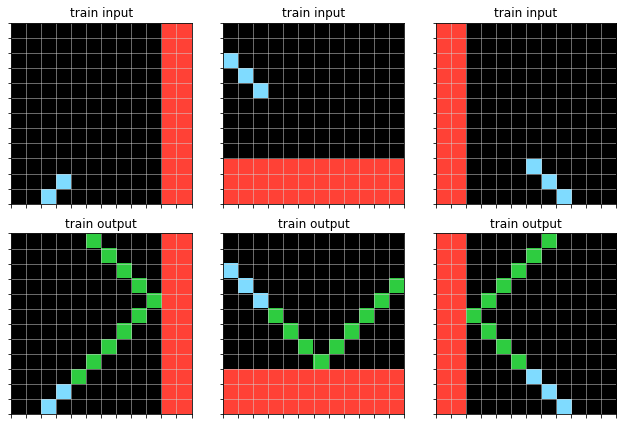

3 objects
[[8]]
[[2 2 2 2]
 [2 2 2 2]
 [2 2 2 2]
 [2 2 2 2]
 [2 2 2 2]
 [2 2 2 2]
 [2 2 2 2]
 [2 2 2 2]
 [2 2 2 2]
 [2 2 2 2]
 [2 2 2 2]
 [2 2 2 2]]
[[8]]
13 objects
[[8]]
[[2 2 2 2]
 [2 2 2 2]
 [2 2 2 2]
 [2 2 2 2]
 [2 2 2 2]
 [2 2 2 2]
 [2 2 2 2]
 [2 2 2 2]
 [2 2 2 2]
 [2 2 2 2]
 [2 2 2 2]
 [2 2 2 2]]
[[8]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]


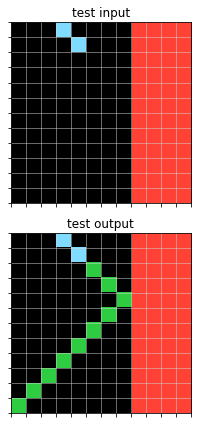

50cb2852.json
Icecuber solved? True
['holes', 'rectangle_guessing']
3 objects
[[2 2 2 2 2]
 [2 2 2 2 2]
 [2 2 2 2 2]
 [2 2 2 2 2]
 [2 2 2 2 2]
 [2 2 2 2 2]]
[[1 1 1]
 [1 1 1]
 [1 1 1]]
[[3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3]]
6 objects
[[2 2 2 2 2]
 [2 0 0 0 2]
 [2 0 0 0 2]
 [2 0 0 0 2]
 [2 0 0 0 2]
 [2 2 2 2 2]]
[[1 1 1]
 [1 0 1]
 [1 1 1]]
[[8 8 8]
 [8 8 8]
 [8 8 8]
 [8 8 8]]
[[8]]
[[3 3 3 3 3 3 3]
 [3 0 0 0 0 0 3]
 [3 0 0 0 0 0 3]
 [3 0 0 0 0 0 3]
 [3 3 3 3 3 3 3]]
[[8 8 8 8 8]
 [8 8 8 8 8]
 [8 8 8 8 8]]
2 objects
[[2 2 2 2]
 [2 2 2 2]
 [2 2 2 2]
 [2 2 2 2]]
[[1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]]
4 objects
[[2 2 2 2]
 [2 0 0 2]
 [2 0 0 2]
 [2 2 2 2]]
[[8 8]
 [8 8]]
[[1 1 1 1 1 1]
 [1 0 0 0 0 1]
 [1 1 1 1 1 1]]
[[8 8 8 8]]
3 objects
[[2 2 2 2]
 [2 2 2 2]
 [2 2 2 2]
 [2 2 2 2]
 [2 2 2 2]
 [2 2 2 2]]
[[3 3 3 3]
 [3 3 3 3]
 [3 3 3 3]
 [3 3 3 3]]
[[1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]]
6 objects
[[2 2

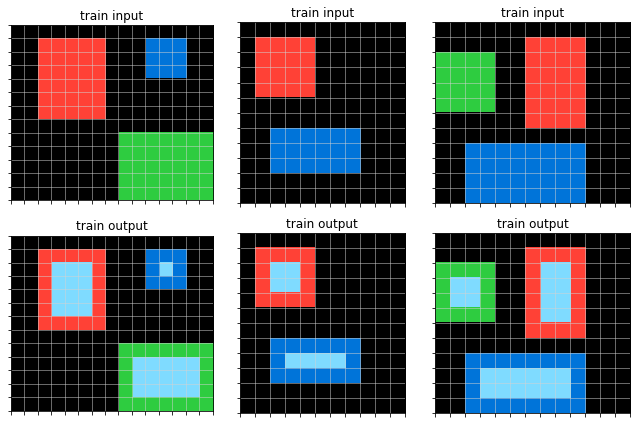

4 objects
[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]
[[1 1 1]
 [1 1 1]
 [1 1 1]]
[[2 2 2 2 2 2]
 [2 2 2 2 2 2]
 [2 2 2 2 2 2]
 [2 2 2 2 2 2]
 [2 2 2 2 2 2]
 [2 2 2 2 2 2]]
[[3 3 3 3]
 [3 3 3 3]
 [3 3 3 3]
 [3 3 3 3]
 [3 3 3 3]
 [3 3 3 3]
 [3 3 3 3]]
8 objects
[[1 1 1 1 1]
 [1 0 0 0 1]
 [1 0 0 0 1]
 [1 1 1 1 1]]
[[8 8 8]
 [8 8 8]]
[[1 1 1]
 [1 0 1]
 [1 1 1]]
[[8]]
[[2 2 2 2 2 2]
 [2 0 0 0 0 2]
 [2 0 0 0 0 2]
 [2 0 0 0 0 2]
 [2 0 0 0 0 2]
 [2 2 2 2 2 2]]
[[8 8 8 8]
 [8 8 8 8]
 [8 8 8 8]
 [8 8 8 8]]
[[3 3 3 3]
 [3 0 0 3]
 [3 0 0 3]
 [3 0 0 3]
 [3 0 0 3]
 [3 0 0 3]
 [3 3 3 3]]
[[8 8]
 [8 8]
 [8 8]
 [8 8]
 [8 8]]


5117e062.json
Icecuber solved? True
['find_the_intruder', 'crop', 'recoloring']
8 objects
[[0 3 0]
 [3 3 3]
 [3 3 0]]
[[4]]
[[4]]
[[8]]
[[4]]
[[4]]
[[2 0 0]
 [2 2 2]
 [0 2 0]]
[[0 6 6]
 [6 0 6]
 [6 6 6]]
1 objects
[[0 4 0]
 [4 4 4]
 [0 4 0]]
6 objects
[[0 2 0]
 [2 2 2]
 [0 2 0]]
[[3 3]]
[[3]]
[[8]]
[[3 3]]
[[1 0 1]
 [1 1 1]
 [1 1 1]]
1 objects
[[0 3 3]
 [3 3 0]
 [0 3 3]]
5 objects
[[2 2 2]]
[[8]]
[[3 0 3]
 [3 3 3]
 [0 0 3]]
[[2 2]]
[[1 0 1]
 [1 1 1]
 [0 1 0]]
1 objects
[[2 2 2]
 [0 2 0]
 [2 2 0]]


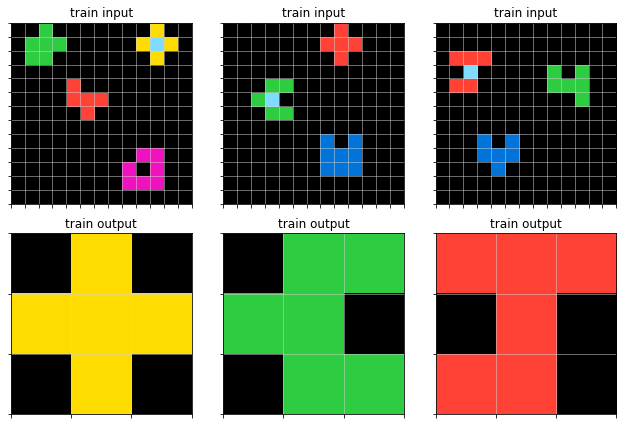

7 objects
[[1 1 1]
 [0 1 1]
 [0 0 1]]
[[7 7]
 [0 7]]
[[7]]
[[8]]
[[2 0 0]
 [2 2 0]
 [0 2 2]]
[[7]]
[[3 3 3]
 [0 3 0]
 [3 3 3]]
1 objects
[[0 7 7]
 [7 7 7]
 [0 7 0]]


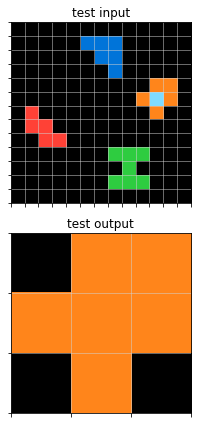

5168d44c.json
Icecuber solved? False
['direction_guessing', 'recoloring', 'contouring', 'pattern_moving']
7 objects
[[2 2 2]
 [2 0 2]
 [2 2 2]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
7 objects
[[2 2 2]
 [2 0 2]
 [2 2 2]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
8 objects
[[3]]
[[3]]
[[2 2 2]
 [2 0 2]
 [2 2 2]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
8 objects
[[3]]
[[3]]
[[3]]
[[2 2 2]
 [2 0 2]
 [2 2 2]]
[[3]]
[[3]]
[[3]]
[[3]]
5 objects
[[3]]
[[2 2 2]
 [2 0 2]
 [2 2 2]]
[[3]]
[[3]]
[[3]]
5 objects
[[3]]
[[3]]
[[2 2 2]
 [2 0 2]
 [2 2 2]]
[[3]]
[[3]]


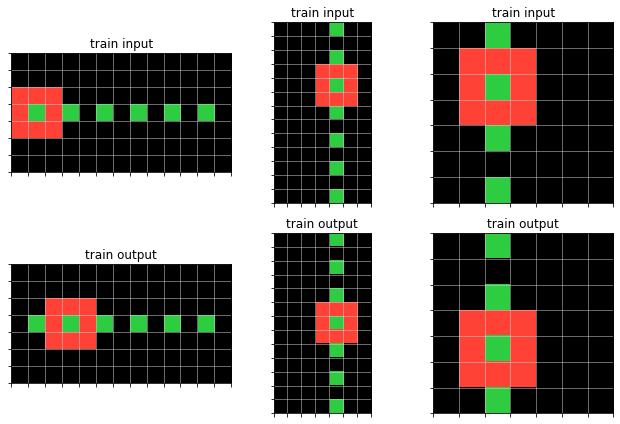

10 objects
[[2 2 2]
 [2 0 2]
 [2 2 2]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
10 objects
[[2 2 2]
 [2 0 2]
 [2 2 2]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]


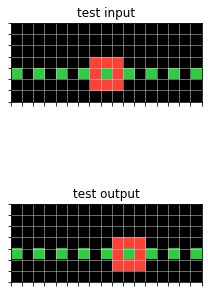

539a4f51.json
Icecuber solved? False
['pattern_expansion', 'image_expansion']
2 objects
[[2 2 2]
 [2 2 2]
 [2 2 2]]
[[0 0 0 3]
 [0 0 0 3]
 [0 0 0 3]
 [3 3 3 3]]
5 objects
[[2 2 2]
 [2 2 2]
 [2 2 2]]
[[0 0 0 3]
 [0 0 0 3]
 [0 0 0 3]
 [3 3 3 3]]
[[0 0 0 0 2 2 2]
 [0 0 0 0 2 2 2]
 [0 0 0 0 2 2 2]
 [0 0 0 0 2 2 2]
 [2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2]]
[[0 0 0 0 0 0 0 3]
 [0 0 0 0 0 0 0 3]
 [0 0 0 0 0 0 0 3]
 [0 0 0 0 0 0 0 3]
 [0 0 0 0 0 0 0 3]
 [0 0 0 0 0 0 0 3]
 [0 0 0 0 0 0 0 3]
 [3 3 3 3 3 3 3 3]]
[[0 0 0 0 0 0 0 0 2 2]
 [0 0 0 0 0 0 0 0 2 2]
 [0 0 0 0 0 0 0 0 2 2]
 [0 0 0 0 0 0 0 0 2 2]
 [0 0 0 0 0 0 0 0 2 2]
 [0 0 0 0 0 0 0 0 2 2]
 [0 0 0 0 0 0 0 0 2 2]
 [0 0 0 0 0 0 0 0 2 2]
 [2 2 2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2 2 2]]
3 objects
[[1 1]
 [1 1]]
[[0 0 4]
 [0 0 4]
 [4 4 4]]
[[0 0 0 6]
 [0 0 0 6]
 [0 0 0 6]
 [6 6 6 6]]
7 objects
[[1 1]
 [1 1]]
[[0 0 4]
 [0 0 4]
 [4 4 4]]
[[0 0 0 6]
 [0 0 0 6]
 [0 0 0 6]
 [6 6 6 6]]
[[0 0 0 0 1 1]
 [0 0 0 0 1 1]
 [0 0 0 0 1 1]
 [0 0 0 0 1

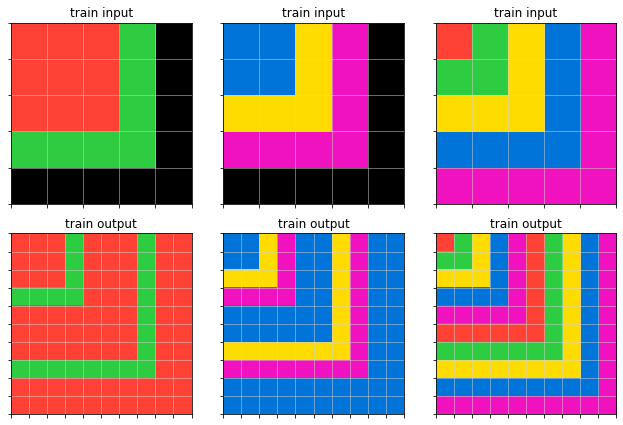

3 objects
[[7 7]
 [7 7]]
[[0 0 3]
 [0 0 3]
 [3 3 3]]
[[0 0 0 2 2]
 [0 0 0 2 2]
 [0 0 0 2 2]
 [2 2 2 2 2]
 [2 2 2 2 2]]
6 objects
[[7 7]
 [7 7]]
[[0 0 3]
 [0 0 3]
 [3 3 3]]
[[0 0 0 2 2]
 [0 0 0 2 2]
 [0 0 0 2 2]
 [2 2 2 2 2]
 [2 2 2 2 2]]
[[0 0 0 0 0 7 7]
 [0 0 0 0 0 7 7]
 [0 0 0 0 0 7 7]
 [0 0 0 0 0 7 7]
 [0 0 0 0 0 7 7]
 [7 7 7 7 7 7 7]
 [7 7 7 7 7 7 7]]
[[0 0 0 0 0 0 0 3]
 [0 0 0 0 0 0 0 3]
 [0 0 0 0 0 0 0 3]
 [0 0 0 0 0 0 0 3]
 [0 0 0 0 0 0 0 3]
 [0 0 0 0 0 0 0 3]
 [0 0 0 0 0 0 0 3]
 [3 3 3 3 3 3 3 3]]
[[0 0 0 0 0 0 0 0 2 2]
 [0 0 0 0 0 0 0 0 2 2]
 [0 0 0 0 0 0 0 0 2 2]
 [0 0 0 0 0 0 0 0 2 2]
 [0 0 0 0 0 0 0 0 2 2]
 [0 0 0 0 0 0 0 0 2 2]
 [0 0 0 0 0 0 0 0 2 2]
 [0 0 0 0 0 0 0 0 2 2]
 [2 2 2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2 2 2]]


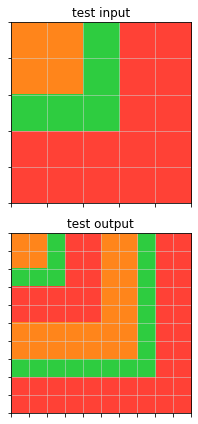

53b68214.json
Icecuber solved? True
['pattern_expansion', 'image_expansion']
1 objects
[[1 1 1 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 1 1 1 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 1 1 1]
 [0 0 0 0 0 0 1]]
1 objects
[[1 1 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 1 1]]
1 objects
[[3]
 [3]
 [3]
 [3]
 [3]]
1 objects
[[3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]]
7 objects
[[2]
 [2]]
[[2]]
[[2]]
[[2]
 [2]]
[[2]]
[[2]]
[[2]
 [2]]
10 objects
[[2]
 [2]]
[[2]]
[[2]]
[[2]
 [2]]
[[2]]
[[2]]
[[2]
 [2]]
[[2]]
[[2]]
[[2]]


8 objects
[[6]]
[[6]]
[[6]]
[[6]]
[[6]]
[[6]]
[[6]]
[[6]]
10 objects
[[6]]
[[6]]
[[6]]
[[6]]
[[6]]
[[6]]
[[6]]
[[6]]
[[6]]
[[6]]
1 objects
[[8 8 8]
 [8 0 8]
 [8 8 8]
 [8 0 8]
 [8 8 8]]
1 objects
[[8 8 8]
 [8 0 8]
 [8 8 8]
 [8 0 8]
 [8 8 8]
 [8 0 8]
 [8 8 8]
 [8 0 8]
 [8 8 8]
 [8 0 8]]


543a7ed5.json
Icecuber solved? True
['contouring', 'loop_filling']
5 objects
[[8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 0 0 0 0 8 8 8]
 [8 8 8 8 8 8 8 8 0 0 0 0 8 8 8]
 [8 8 8 0 0 8 8 8 0 0 0 0 8 8 8]
 [8 8 8 0 0 8 8 8 0 0 0 0 8 8 8]
 [8 8 8 8 8 8 8 8 0 0 0 0 8 8 8]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 0 0 0 0 8 8 8 8 8 8]
 [8 8 8 8 8 0 0 0 0 8 8 8 8 8 8]
 [8 8 8 8 8 0 0 0 0 8 8 8 8 8 8]
 [8 8 8 8 8 0 0 0 0 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]]
[[6 6 6 6]
 [6 0 0 6]
 [6 0 0 6]
 [6 0 0 6]
 [6 6 6 6]]
[[8 8]
 [8 8]
 [8 8]]
[[6 6]
 [6 6]]
[[6 6 6 6]
 [6 6 6 6]
 [6 6 6 6]
 [6 6 6 6]]
8 objects
[[8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 0 0 0 0 0 0 8 8]
 [8 8 8 8 8 8 8 0 0 0 0 0 0 8 8]
 [8 8 0 0 0 0 8 0 0 0 0 0 0 8 8]
 [8 8 0 0 0 0 8 0 0 0 0 0 0 8 8]
 [8 8 0 0 0 0 8 0 0 0 0 0 0 8 8]
 [8 8 0 0 0 0 8 0 0 0 0 0 0 8 8]
 [8 8 8 8 8 8 8 0 0 0 0 0 0 8 8]
 [8 8 8 8 8 8 8

7 objects
[[8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 0 0 0 8 8 8]
 [8 8 0 0 0 0 8 8 8 0 0 0 8 8 8]
 [8 8 0 0 0 0 8 8 8 0 0 0 8 8 8]
 [8 8 0 0 0 0 8 8 8 0 0 0 8 8 8]
 [8 8 0 0 0 0 8 8 8 0 0 0 8 8 8]
 [8 8 8 8 8 8 8 8 8 0 0 0 8 8 8]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 0 0 0 0 0 0 0 8 8 8 8]
 [8 8 8 8 0 0 0 0 0 0 0 8 8 8 8]
 [8 8 8 8 0 0 0 0 0 0 0 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]]
[[6 6 6]
 [6 6 6]
 [6 0 6]
 [6 0 6]
 [6 0 6]
 [6 6 6]]
[[6 6 6 6]
 [6 0 0 6]
 [6 0 0 6]
 [6 6 6 6]]
[[8 8]
 [8 8]]
[[8]
 [8]
 [8]]
[[6 6 6 6 6 6 6]
 [6 6 0 0 6 6 6]
 [6 6 6 6 6 6 6]]
[[8 8]]
10 objects
[[8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 0 0 0 0 0 8 8]
 [8 0 0 0 0 0 0 8 0 0 0 0 0 8 8]
 [8 0 0 0 0 0 0 8 0 0 0 0 0 8 8]
 [8 0 0 0 0 0 0 8 0 0 0 0 0 8 8]
 [8 0 0 0 0 0 0 8 0 0 0 0 0 8 8]
 [8 0 0 0 0 0 0 8 0 0 0 0 0 8 8]
 [8 0 0 0 0 0 0 8 0 0 0 0 0 8 8]
 [8 8 8 8 8 8 8 8 0 0 0 0 0 

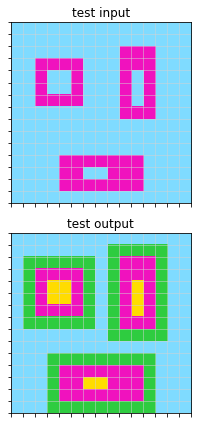

54d82841.json
Icecuber solved? True
['pattern_expansion', 'gravity']
2 objects
[[6 6 6]
 [6 0 6]]
[[6 6 6]
 [6 0 6]]
4 objects
[[6 6 6]
 [6 0 6]]
[[6 6 6]
 [6 0 6]]
[[4]]
[[4]]
1 objects
[[3 3 3]
 [3 0 3]]
2 objects
[[3 3 3]
 [3 0 3]]
[[4]]
2 objects
[[8 8 8]
 [8 0 8]]
[[6 6 6]
 [6 0 6]]
4 objects
[[8 8 8]
 [8 0 8]]
[[6 6 6]
 [6 0 6]]
[[4]]
[[4]]


3 objects
[[5 5 5]
 [5 0 5]]
[[8 8 8]
 [8 0 8]]
[[3 3 3]
 [3 0 3]]
6 objects
[[5 5 5]
 [5 0 5]]
[[8 8 8]
 [8 0 8]]
[[3 3 3]
 [3 0 3]]
[[4]]
[[4]]
[[4]]


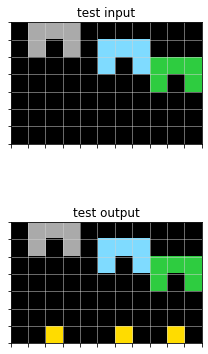

54d9e175.json
Icecuber solved? False
['detect_grid', 'separate_images', 'associate_images_to_images']
5 objects
[[5]
 [5]
 [5]]
[[5]
 [5]
 [5]]
[[1]]
[[2]]
[[1]]
5 objects
[[6 6 6]
 [6 6 6]
 [6 6 6]]
[[5]
 [5]
 [5]]
[[7 7 7]
 [7 7 7]
 [7 7 7]]
[[5]
 [5]
 [5]]
[[6 6 6]
 [6 6 6]
 [6 6 6]]
5 objects
[[5]
 [5]
 [5]]
[[5]
 [5]
 [5]]
[[2]]
[[3]]
[[1]]
5 objects
[[7 7 7]
 [7 7 7]
 [7 7 7]]
[[5]
 [5]
 [5]]
[[8 8 8]
 [8 8 8]
 [8 8 8]]
[[5]
 [5]
 [5]]
[[6 6 6]
 [6 6 6]
 [6 6 6]]
5 objects
[[5]
 [5]
 [5]]
[[5]
 [5]
 [5]]
[[3]]
[[1]]
[[4]]
5 objects
[[8 8 8]
 [8 8 8]
 [8 8 8]]
[[5]
 [5]
 [5]]
[[6 6 6]
 [6 6 6]
 [6 6 6]]
[[5]
 [5]
 [5]]
[[9 9 9]
 [9 9 9]
 [9 9 9]]
7 objects
[[0 0 0 5 0 0 0 5 0 0 0]
 [0 0 0 5 0 0 0 5 0 0 0]
 [0 0 0 5 0 0 0 5 0 0 0]
 [5 5 5 5 5 5 5 5 5 5 5]
 [0 0 0 5 0 0 0 5 0 0 0]
 [0 0 0 5 0 0 0 5 0 0 0]
 [0 0 0 5 0 0 0 5 0 0 0]]
[[4]]
[[1]]
[[2]]
[[2]]
[[3]]
[[4]]
7 objects
[[9 9 9]
 [9 9 9]
 [9 9 9]]
[[0 0 0 5 0 0 0 5 0 0 0]
 [0 0 0 5 0 0 0 5 0 0 0]
 [0 0 0 5 0 0 0 5 0 0 0]
 [5 5

7 objects
[[0 0 0 5 0 0 0 5 0 0 0]
 [0 0 0 5 0 0 0 5 0 0 0]
 [0 0 0 5 0 0 0 5 0 0 0]
 [5 5 5 5 5 5 5 5 5 5 5]
 [0 0 0 5 0 0 0 5 0 0 0]
 [0 0 0 5 0 0 0 5 0 0 0]
 [0 0 0 5 0 0 0 5 0 0 0]]
[[2]]
[[3]]
[[4]]
[[1]]
[[1]]
[[3]]
7 objects
[[7 7 7]
 [7 7 7]
 [7 7 7]]
[[0 0 0 5 0 0 0 5 0 0 0]
 [0 0 0 5 0 0 0 5 0 0 0]
 [0 0 0 5 0 0 0 5 0 0 0]
 [5 5 5 5 5 5 5 5 5 5 5]
 [0 0 0 5 0 0 0 5 0 0 0]
 [0 0 0 5 0 0 0 5 0 0 0]
 [0 0 0 5 0 0 0 5 0 0 0]]
[[8 8 8]
 [8 8 8]
 [8 8 8]]
[[9 9 9]
 [9 9 9]
 [9 9 9]]
[[6 6 6]
 [6 6 6]
 [6 6 6]]
[[6 6 6]
 [6 6 6]
 [6 6 6]]
[[8 8 8]
 [8 8 8]
 [8 8 8]]


5521c0d9.json
Icecuber solved? False
['pattern_moving', 'measure_length']
3 objects
[[1 1]
 [1 1]
 [1 1]
 [1 1]]
[[4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]]
[[2 2 2 2]
 [2 2 2 2]]
3 objects
[[1 1]
 [1 1]
 [1 1]
 [1 1]]
[[4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]]
[[2 2 2 2]
 [2 2 2 2]]
3 objects
[[4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]]
[[2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]]
[[1 1]
 [1 1]]
3 objects
[[4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]]
[[2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]]
[[1 1]
 [1 1]]
3 objects
[[1]
 [1]
 [1]
 [1]]
[[4 4]
 [4 4]
 [4 4]]
[[2 2 2 2]]
3 objects
[[1]
 [1]
 [1]
 [1]]
[[4 4]
 [4 4]
 [4 4]]
[[2 2 2 2]]


3 objects
[[2 2 2 2]
 [2 2 2 2]
 [2 2 2 2]
 [2 2 2 2]
 [2 2 2 2]
 [2 2 2 2]
 [2 2 2 2]]
[[4 4 4]
 [4 4 4]
 [4 4 4]
 [4 4 4]
 [4 4 4]
 [4 4 4]]
[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]
3 objects
[[2 2 2 2]
 [2 2 2 2]
 [2 2 2 2]
 [2 2 2 2]
 [2 2 2 2]
 [2 2 2 2]
 [2 2 2 2]]
[[4 4 4]
 [4 4 4]
 [4 4 4]
 [4 4 4]
 [4 4 4]
 [4 4 4]]
[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


5582e5ca.json
Icecuber solved? True
['count_tiles', 'dominant_color']
5 objects
[[4 4]
 [0 4]]
[[8]]
[[6]
 [6]]
[[3]]
[[3]]
1 objects
[[4 4 4]
 [4 4 4]
 [4 4 4]]
8 objects
[[6]]
[[8]
 [8]]
[[9]]
[[1]]
[[1]]
[[9]]
[[4]]
[[9]]
1 objects
[[9 9 9]
 [9 9 9]
 [9 9 9]]
8 objects
[[4]]
[[6]]
[[9]]
[[6]]
[[4]]
[[1]]
[[8 8]]
[[6]]
1 objects
[[6 6 6]
 [6 6 6]
 [6 6 6]]


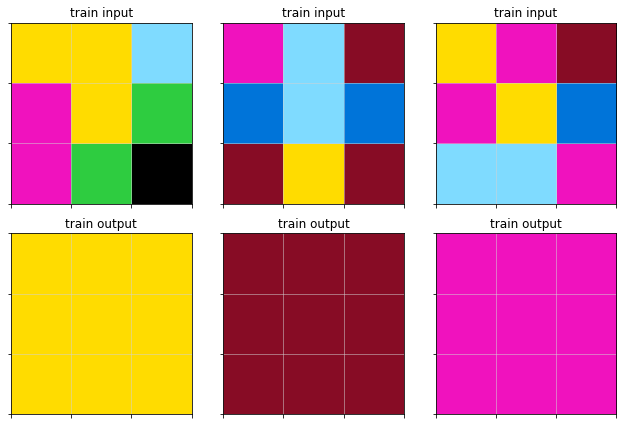

7 objects
[[8 8]]
[[6]]
[[4]]
[[6]]
[[9]]
[[8]]
[[3]]
1 objects
[[8 8 8]
 [8 8 8]
 [8 8 8]]


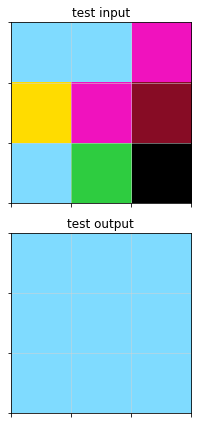

5614dbcf.json
Icecuber solved? True
['remove_noise', 'image_resizing']
11 objects
[[3 3 3]
 [3 3 3]
 [3 3 3]]
[[8 8 8]
 [8 0 8]
 [8 8 8]]
[[5]]
[[7 0 7]
 [7 7 7]
 [7 7 7]]
[[5]]
[[6 6 6]
 [6 6 6]
 [6 0 6]]
[[5]]
[[9 9 9]
 [9 9 9]
 [9 9 0]]
[[5]]
[[5]]
[[5]]
5 objects
[[3]]
[[8]]
[[7]]
[[6]]
[[9]]
8 objects
[[2 2 2]
 [2 2 2]
 [2 2 2]]
[[5]]
[[5]]
[[5]]
[[5]]
[[5]]
[[7 7 7]
 [7 7 0]
 [7 7 7]]
[[5]]
2 objects
[[2]]
[[7]]


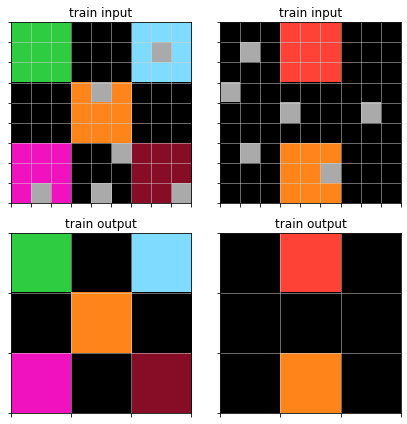

9 objects
[[4 4 4]
 [0 4 4]
 [4 4 4]]
[[5]]
[[5]]
[[5]]
[[3 3 3]
 [3 3 3]
 [3 3 3]]
[[5]]
[[5]]
[[9 9 9]
 [9 0 9]
 [9 9 9]]
[[5]]
3 objects
[[4]]
[[3]]
[[9]]


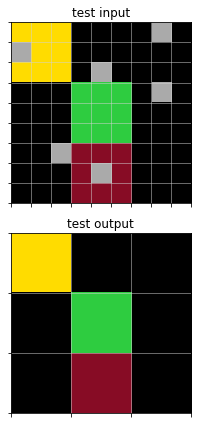

56dc2b01.json
Icecuber solved? False
['gravity', 'direction_guessing', 'pattern_expansion']
2 objects
[[0 3 0 0]
 [0 3 3 3]
 [3 3 0 0]
 [0 3 3 3]]
[[2]
 [2]
 [2]
 [2]]
3 objects
[[8]
 [8]
 [8]
 [8]]
[[0 3 0 0]
 [0 3 3 3]
 [3 3 0 0]
 [0 3 3 3]]
[[2]
 [2]
 [2]
 [2]]
2 objects
[[3 3 0 0 0]
 [3 0 0 0 0]
 [3 3 0 3 3]
 [0 3 3 3 0]]
[[2 2 2 2 2]]
3 objects
[[8 8 8 8 8]]
[[3 3 0 0 0]
 [3 0 0 0 0]
 [3 3 0 3 3]
 [0 3 3 3 0]]
[[2 2 2 2 2]]
2 objects
[[2 2 2 2 2]]
[[3 3 3 3]
 [3 0 0 3]
 [3 3 0 3]]
3 objects
[[2 2 2 2 2]]
[[3 3 3 3]
 [3 0 0 3]
 [3 3 0 3]]
[[8 8 8 8 8]]


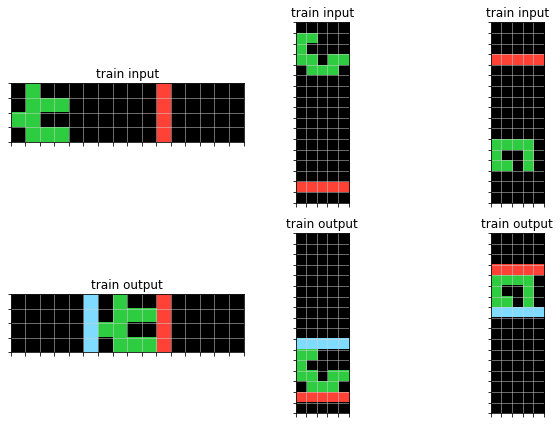

2 objects
[[2]
 [2]
 [2]
 [2]]
[[0 3 3]
 [3 0 3]
 [3 3 3]
 [3 0 0]]
3 objects
[[2]
 [2]
 [2]
 [2]]
[[0 3 3]
 [3 0 3]
 [3 3 3]
 [3 0 0]]
[[8]
 [8]
 [8]
 [8]]


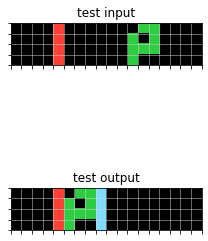

56ff96f3.json
Icecuber solved? True
['pattern_completion', 'rectangle_guessing']
4 objects
[[1]]
[[1]]
[[2]]
[[2]]
2 objects
[[1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]]
[[2 2 2 2 2]
 [2 2 2 2 2]
 [2 2 2 2 2]]
4 objects
[[3]]
[[7]]
[[3]]
[[7]]
2 objects
[[3 3]
 [3 3]
 [3 3]
 [3 3]]
[[7 7 7 7]
 [7 7 7 7]]
2 objects
[[4]]
[[4]]
1 objects
[[4 4 4 4 4]
 [4 4 4 4 4]
 [4 4 4 4 4]
 [4 4 4 4 4]
 [4 4 4 4 4]]
2 objects
[[7]]
[[7]]
1 objects
[[7 7 7 7 7 7 7]
 [7 7 7 7 7 7 7]
 [7 7 7 7 7 7 7]]


4 objects
[[8]]
[[8]]
[[6]]
[[6]]
2 objects
[[8 8 8]
 [8 8 8]]
[[6 6 6 6 6]
 [6 6 6 6 6]
 [6 6 6 6 6]
 [6 6 6 6 6]]


57aa92db.json
Icecuber solved? False
['draw_pattern_from_point', 'pattern_repetition', 'pattern_resizing']
4 objects
[[0 3]
 [3 3]
 [0 3]]
[[1]]
[[4 4]
 [4 4]]
[[1 1]
 [1 1]]
4 objects
[[0 3]
 [3 3]
 [0 3]]
[[1]]
[[0 0 4 4]
 [0 0 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [0 0 4 4]
 [0 0 4 4]]
[[1 1]
 [1 1]]
6 objects
[[0 0 8]
 [8 8 8]
 [0 0 8]]
[[2]]
[[2]]
[[6]]
[[2]]
[[3]]
6 objects
[[0 0 8]
 [8 8 8]
 [0 0 8]]
[[2]]
[[0 0 6]
 [6 6 6]
 [0 0 6]]
[[2]]
[[0 0 3]
 [3 3 3]
 [0 0 3]]
[[2]]
4 objects
[[1 1 1]
 [1 0 1]
 [1 0 1]]
[[4]]
[[8 8 8]
 [8 8 8]
 [8 8 8]]
[[4 4 4]
 [4 4 4]
 [4 4 4]]
4 objects
[[1 1 1]
 [1 0 1]
 [1 0 1]]
[[4]]
[[8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8]
 [8 8 8 0 0 0 8 8 8]
 [8 8 8 0 0 0 8 8 8]
 [8 8 8 0 0 0 8 8 8]
 [8 8 8 0 0 0 8 8 8]
 [8 8 8 0 0 0 8 8 8]
 [8 8 8 0 0 0 8 8 8]]
[[4 4 4]
 [4 4 4]
 [4 4 4]]
8 objects
[[3]]
[[2]]
[[8]]
[[8 8]]
[[2]]
[[8]]
[[4 4]
 [4 4]]
[[2 2]
 [2 2]]
12 objects
[[3]]
[[3 3]]
[[2]]
[[3]]
[[8]]
[[8 8]]
[[2]]
[[8]]
[[4 4]
 [4 4]]
[[4 4 4

9 objects
[[8 8]
 [0 8]]
[[8 0]
 [8 8]]
[[1]]
[[4 4 4]
 [4 4 4]
 [4 4 4]]
[[1 1 1]
 [1 1 1]
 [1 1 1]]
[[1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]]
[[2 2 2 2]
 [2 2 2 2]
 [2 2 2 2]
 [2 2 2 2]]
[[1 1]
 [1 1]]
[[3 3]
 [3 3]]
12 objects
[[4 4 4 4 4 4]
 [4 4 4 4 4 4]
 [4 4 4 4 4 4]
 [0 0 0 4 4 4]
 [0 0 0 4 4 4]
 [0 0 0 4 4 4]]
[[8 8]
 [0 8]]
[[8 0]
 [8 8]]
[[1]]
[[4 4 4 0 0 0]
 [4 4 4 0 0 0]
 [4 4 4 0 0 0]
 [4 4 4 4 4 4]
 [4 4 4 4 4 4]
 [4 4 4 4 4 4]]
[[1 1 1]
 [1 1 1]
 [1 1 1]]
[[2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2]
 [0 0 0 0 2 2 2 2]
 [0 0 0 0 2 2 2 2]
 [0 0 0 0 2 2 2 2]
 [0 0 0 0 2 2 2 2]]
[[2 2 2 2 0 0 0 0]
 [2 2 2 2 0 0 0 0]
 [2 2 2 2 0 0 0 0]
 [2 2 2 2 0 0 0 0]
 [2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2]]
[[1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]]
[[3 3 3 3]
 [3 3 3 3]
 [0 0 3 3]
 [0 0 3 3]]
[[3 3 0 0]
 [3 3 0 0]
 [3 3 3 3]
 [3 3 3 3]]
[[1 1]
 [1 1]]


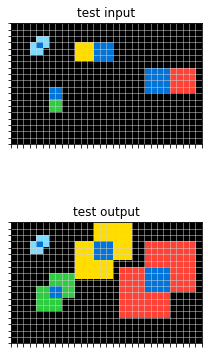

5ad4f10b.json
Icecuber solved? True
['color_guessing', 'remove_noise', 'recoloring', 'crop', 'image_resizing']
34 objects
[[8 8]
 [0 8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]]
[[8]]
[[4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]]
[[8]]
[[8]]
[[0 0 0 0 4 4 4 4 0 0 0 0]
 [0 0 0 0 4 4 4 4 0 0 0 0]
 [0 0 0 0 4 4 4 4 0 0 0 0]
 [0 0 0 0 4 4 4 4 0 0 0 0]
 [4 4 4 4 4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4 4 4 4 4]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8 8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8 8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8 8]]
[[8]]
[[8]]
[[8]]
[[8]]
3 objects
[[8]]
[[8]]
[[0 8 0]
 [8 8 8]]
37 objects
[[2]]
[[2]
 [2]]
[[1 1 1]
 [1 1 1]
 [1 1 1]]
[[1 1 1]
 [1 1 1]
 [1 1 1]]
[[2]]
[[2 0]
 [2 2]]
[[1 1 1]
 [1 1 1]
 [1 1 1]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[1 1 1]
 [1 1 1]
 [1 1 1]]
[[2]]
[[2]]
[[2]]
[[2 2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2 2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[

47 objects
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4 4 4 4]]
[[4]]
[[4]]
[[4]]
[[8 8 8 8]
 [8 8 8 8]
 [8 8 8 8]
 [8 8 8 8]]
[[0 0 0 0 8 8 8 8]
 [0 0 0 0 8 8 8 8]
 [0 0 0 0 8 8 8 8]
 [0 0 0 0 8 8 8 8]
 [8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8]
 [0 0 0 0 8 8 8 8]
 [0 0 0 0 8 8 8 8]
 [0 0 0 0 8 8 8 8]
 [0 0 0 0 8 8 8 8]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4 4]]
[[4]]
[[4]
 [4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]
 [4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4 4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4 4]]
[[4]]
2 objects
[[4]]
[[0 4]
 [4 4]
 [0 4]]


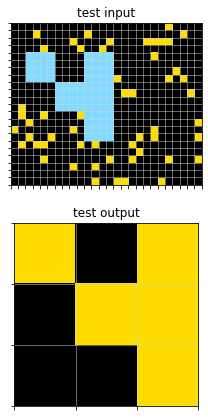

5bd6f4ac.json
Icecuber solved? True
['rectangle_guessing', 'crop']
28 objects
[[3]]
[[7]]
[[9]]
[[7]]
[[8]]
[[4]]
[[6 6]]
[[4]
 [4]]
[[8]]
[[4]]
[[1 0]
 [1 1]]
[[7]]
[[9]]
[[1]]
[[7]]
[[7 7]
 [7 0]]
[[8]]
[[1]]
[[8]]
[[4]]
[[7]]
[[9 9]]
[[2]]
[[1]]
[[5]]
[[2]]
[[4]]
[[8]]
5 objects
[[9]]
[[7]]
[[4]
 [4]]
[[8]]
[[4]]
35 objects
[[9]]
[[6]]
[[4]]
[[7]]
[[5]]
[[8]]
[[1]]
[[2]]
[[7]]
[[1]]
[[4 4]]
[[5]]
[[6]]
[[4]]
[[8]]
[[3]]
[[4]]
[[2]]
[[9]]
[[7]
 [7]
 [7]]
[[2]]
[[3]]
[[2]]
[[6]]
[[4]]
[[4]]
[[3]]
[[4]]
[[7]]
[[7]]
[[1]]
[[3]]
[[3]]
[[2]]
[[4]]
5 objects
[[6]]
[[8]]
[[1]]
[[4 4]]
[[5]]
19 objects
[[2]
 [2]]
[[5 0]
 [5 5]]
[[6]]
[[7]]
[[6]]
[[1]]
[[3]]
[[1]]
[[9]]
[[4]]
[[7]]
[[6]]
[[9]]
[[1]]
[[8]]
[[4]]
[[1]]
[[4]]
[[5]]
4 objects
[[6]]
[[1]]
[[9]]
[[4]]
18 objects
[[5]]
[[8]]
[[4]]
[[3]]
[[2]]
[[1]]
[[3]]
[[1]]
[[3]]
[[1]]
[[1]]
[[8]]
[[9]]
[[4]]
[[3]]
[[7]]
[[2]]
[[6]]
3 objects
[[4]]
[[3]]
[[3]]


38 objects
[[6]]
[[9]
 [9]]
[[1]]
[[5]]
[[8]]
[[9]]
[[2]]
[[6]]
[[8]]
[[9]]
[[9 9]]
[[2]]
[[9]]
[[2]]
[[6]]
[[8]]
[[6]]
[[8]]
[[7 7]]
[[4]]
[[7]]
[[9]]
[[7]]
[[1]]
[[5]]
[[7]]
[[4]]
[[4]]
[[1]]
[[7]]
[[5]]
[[9]]
[[9 9]
 [0 9]]
[[1]]
[[4]]
[[2]]
[[8]]
[[4]]
6 objects
[[5]]
[[8]]
[[9]]
[[9]]
[[9]]
[[2]]


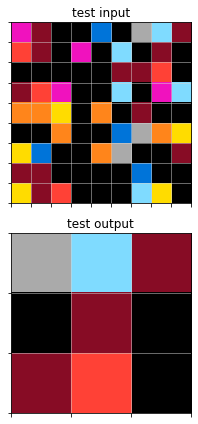

5c0a986e.json
Icecuber solved? False
['draw_line_from_point', 'diagonals', 'direction_guessing']
2 objects
[[1 1]
 [1 1]]
[[2 2]
 [2 2]]
6 objects
[[1]]
[[1]]
[[1 1]
 [1 1]]
[[2 2]
 [2 2]]
[[2]]
[[2]]
2 objects
[[2 2]
 [2 2]]
[[1 1]
 [1 1]]
14 objects
[[2 2]
 [2 2]]
[[1]]
[[1]]
[[2]]
[[1]]
[[2]]
[[1]]
[[2]]
[[1]]
[[2]]
[[1]]
[[2]]
[[1 1]
 [1 1]]
[[2]]
2 objects
[[2 2]
 [2 2]]
[[1 1]
 [1 1]]
8 objects
[[1]]
[[2 2]
 [2 2]]
[[1]]
[[1]]
[[2]]
[[1 1]
 [1 1]]
[[2]]
[[2]]


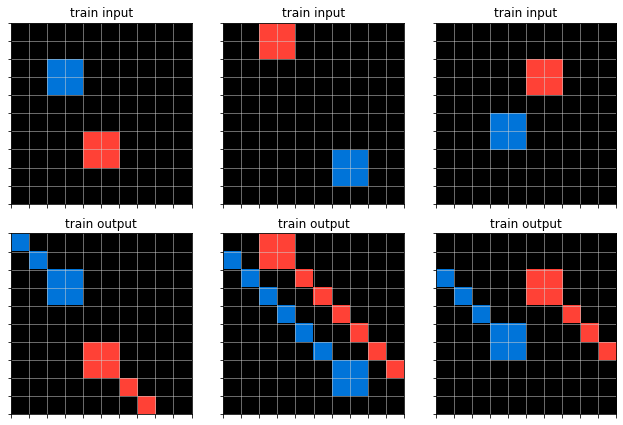

2 objects
[[1 1]
 [1 1]]
[[2 2]
 [2 2]]
8 objects
[[1]]
[[1]]
[[1]]
[[1 1]
 [1 1]]
[[2 2]
 [2 2]]
[[2]]
[[2]]
[[2]]


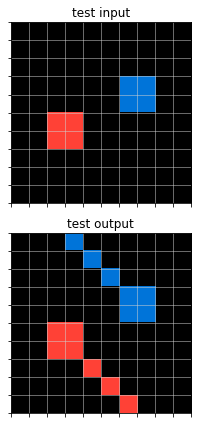

5c2c9af4.json
Icecuber solved? False
['rectangle_guessing', 'pattern_expansion']
3 objects
[[8]]
[[8]]
[[8]]
6 objects
[[8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]]
[[8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [8 0 0 0 0 0 0 0 0 0 0 0 0 0 0

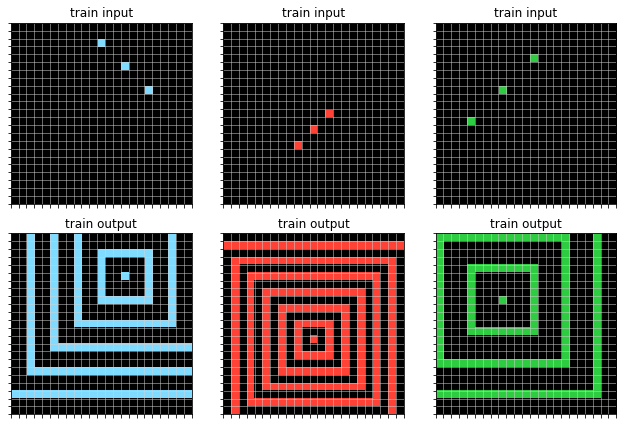

3 objects
[[4]]
[[4]]
[[4]]
4 objects
[[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]]
[[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
 [4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4]
 [4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4]
 [4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4]
 [4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4]
 [4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4]
 [4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4]
 [4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4]
 [4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4]
 [4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4]
 [4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4]
 [4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4]
 [4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4]
 [4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4]
 [4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4]
 [4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4]
 [4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4]
 

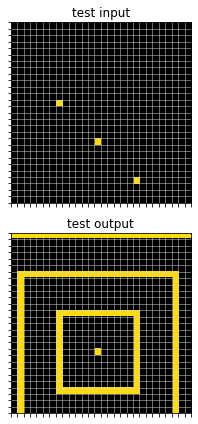

5daaa586.json
Icecuber solved? False
['detect_grid', 'crop', 'draw_line_from_point', 'direction_guessing']
22 objects
[[3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]]
[[2]]
[[8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]]
[[1 1 1 1 1]]
[[1 1 1 1 1 1 1 1 1 1]]
[[1 1 1 1 1]]
[[2]
 [2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2 0 0 0 0 0 0 0 0 0]
 [2 2 2 2 2 2 2 2 2 2]
 [0 0 2 0 0 0 0 0 0 0]]
[[2 2 2 2 2]]
[[2 2 2 2 2]]
[[2]]
[[2]]
[[2]]
4 objects
[[3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]]
[[1 1 1 1 1 1 1 1 1 1]]
[[8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]]
[[0 0 0 0 0 0 0 0 0 2]
 [0 0 0 0 0 0 0 0 0 2]
 [0 0 0 2 0 0 0 0 0 2]
 [0 0 0 2 0 0 0 0 2 2]
 [0 0 0 2 0 0 0 0 2 2]
 [0 0 0 2 0 0 0 0 2 2]
 [0 0 0 2 0 0 0 0 2 2]
 [0 2 0 2 0 0 0 0 2 2]
 [0 2 0 2 0 0 0 0 2 2]
 [2 2 0 2 0 0 0 0 2 2]
 [2 2

24 objects
[[1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 0]]
[[1]]
[[1]]
[[2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]]
[[1]]
[[3 3 3]]
[[3 3 3 3 3 3 3 3]]
[[3 3]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]]
[[1 1]
 [1 0]]
[[2]
 [2]]
[[1]]
4 objects
[[1 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 0 0]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 0]
 [1 1 0 0 0 0 0 0]
 [1 1 1 1 1 0 0 0]
 [1 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0]]
[[3 3 3 3 3 3 3 3]]
[[2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]]
[[8 8 8 8 8 8 8 8 8 8]]


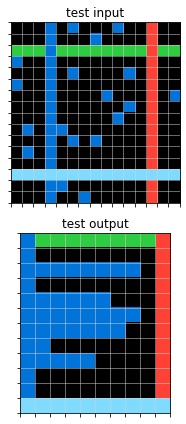

60b61512.json
Icecuber solved? False
['pattern_completion']
3 objects
[[4 4 4]
 [4 0 4]
 [0 0 4]]
[[4 4 0]
 [0 4 4]
 [0 0 4]]
[[4]]
7 objects
[[4 4 4]
 [4 0 4]
 [0 0 4]]
[[0 7]
 [7 7]]
[[4 4 0]
 [0 4 4]
 [0 0 4]]
[[7]]
[[7]]
[[4]]
[[7]]
2 objects
[[4 4 4]
 [0 4 4]
 [4 4 4]]
[[4 4 4]
 [0 4 0]
 [0 4 0]]
5 objects
[[4 4 4]
 [0 4 4]
 [4 4 4]]
[[7]]
[[4 4 4]
 [0 4 0]
 [0 4 0]]
[[7]
 [7]]
[[7]
 [7]]


3 objects
[[4]]
[[4 4]
 [4 0]]
[[4 0 0]
 [4 4 4]
 [0 4 0]]
8 objects
[[7 7]]
[[4]]
[[4 4]
 [4 0]]
[[0 7]
 [7 7]]
[[4 0 0]
 [4 4 4]
 [0 4 0]]
[[7 7]]
[[7]]
[[7]]


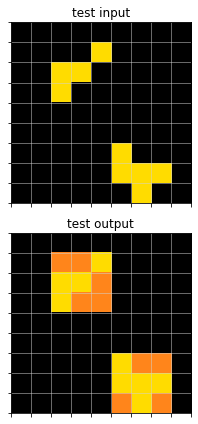

6150a2bd.json
Icecuber solved? True
['image_rotation']
4 objects
[[3 3]
 [3 0]]
[[8]]
[[7]]
[[5]]
4 objects
[[5]]
[[7]]
[[0 3]
 [3 3]]
[[8]]
3 objects
[[5 5]]
[[2]]
[[1]]
3 objects
[[1]]
[[2]]
[[5 5]]


5 objects
[[6]
 [6]]
[[3]]
[[5]]
[[8]]
[[4]]
5 objects
[[4]]
[[8]]
[[6]
 [6]]
[[5]]
[[3]]


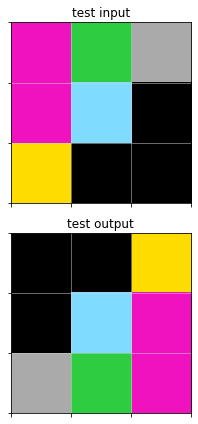

623ea044.json
Icecuber solved? True
['draw_line_from_point', 'diagonals']
1 objects
[[2]]
21 objects
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
1 objects
[[7]]
21 objects
[[7]]
[[7]]
[[7]]
[[7]]
[[7]]
[[7]]
[[7]]
[[7]]
[[7]]
[[7]]
[[7]]
[[7]]
[[7]]
[[7]]
[[7]]
[[7]]
[[7]]
[[7]]
[[7]]
[[7]]
[[7]]
1 objects
[[8]]
11 objects
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]


1 objects
[[6]]
25 objects
[[6]]
[[6]]
[[6]]
[[6]]
[[6]]
[[6]]
[[6]]
[[6]]
[[6]]
[[6]]
[[6]]
[[6]]
[[6]]
[[6]]
[[6]]
[[6]]
[[6]]
[[6]]
[[6]]
[[6]]
[[6]]
[[6]]
[[6]]
[[6]]
[[6]]


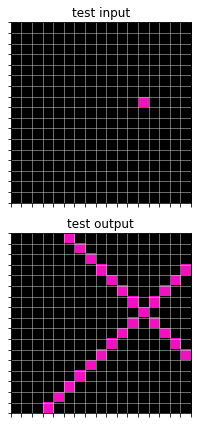

62c24649.json
Icecuber solved? True
['image_repetition', 'image_reflection', 'image_rotation']
3 objects
[[3 3 3]]
[[2 2]]
[[1 1]]
6 objects
[[3 3 3 3 3 3]]
[[2 2 2 2]]
[[1 1]
 [1 1]]
[[1 1]
 [1 1]]
[[2 2 2 2]]
[[3 3 3 3 3 3]]
4 objects
[[3 3]
 [0 3]]
[[1]]
[[1]]
[[2 2]]
11 objects
[[3 3]
 [0 3]]
[[1 1]]
[[3 3]
 [3 0]]
[[1]]
[[1]]
[[2 2 2 2]
 [2 2 2 2]]
[[1]]
[[0 3]
 [3 3]]
[[3 0]
 [3 3]]
[[1]]
[[1 1]]
5 objects
[[2]]
[[1]]
[[2]]
[[3]]
[[3]]
16 objects
[[2]]
[[1]]
[[1]]
[[2]]
[[2]]
[[3 3]]
[[2]]
[[3]
 [3]]
[[3]
 [3]]
[[2]]
[[3 3]]
[[2]]
[[2]]
[[1]]
[[1]]
[[2]]


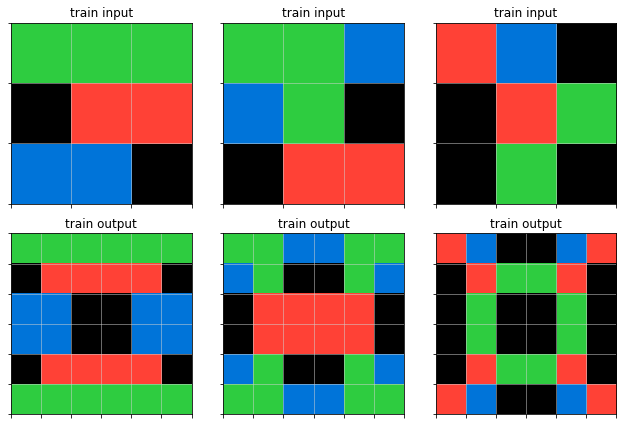

3 objects
[[1 1]]
[[0 3]
 [3 3]]
[[2]]
8 objects
[[1 1]]
[[1 1]]
[[0 3]
 [3 3]
 [3 3]
 [0 3]]
[[2 2]]
[[3 0]
 [3 3]
 [3 3]
 [3 0]]
[[2 2]]
[[1 1]]
[[1 1]]


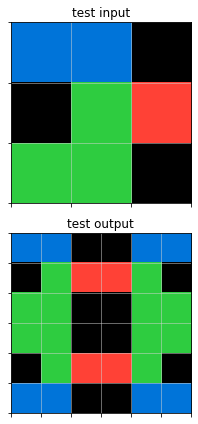

63613498.json
Icecuber solved? True
['recoloring', 'compare_image', 'detect_wall']
6 objects
[[1 1 0]
 [0 1 1]
 [0 0 1]]
[[0 0 0 5]
 [0 0 0 5]
 [0 0 0 5]
 [5 5 5 5]]
[[0 7 0]
 [7 7 7]
 [0 7 0]]
[[6 6 0]
 [0 6 6]
 [0 0 6]]
[[7 7 7]
 [0 0 7]]
[[0 8 0 0]
 [8 8 8 8]]
6 objects
[[1 1 0]
 [0 1 1]
 [0 0 1]]
[[0 0 0 5]
 [0 0 0 5]
 [0 0 0 5]
 [5 5 5 5]]
[[0 7 0]
 [7 7 7]
 [0 7 0]]
[[5 5 0]
 [0 5 5]
 [0 0 5]]
[[7 7 7]
 [0 0 7]]
[[0 8 0 0]
 [8 8 8 8]]
6 objects
[[0 3]
 [3 3]]
[[0 0 0 5]
 [0 0 0 5]
 [0 0 0 5]
 [5 5 5 5]]
[[4 4]
 [4 0]]
[[7 7 7]]
[[0 9]
 [9 9]]
[[8 8]
 [8 8]]
6 objects
[[0 3]
 [3 3]]
[[0 0 0 5]
 [0 0 0 5]
 [0 0 0 5]
 [5 5 5 5]]
[[4 4]
 [4 0]]
[[7 7 7]]
[[0 5]
 [5 5]]
[[8 8]
 [8 8]]
5 objects
[[0 4 0]
 [4 4 4]]
[[0 0 0 5]
 [0 0 0 5]
 [0 0 0 5]
 [5 5 5 5]]
[[0 1 0]
 [1 1 1]]
[[3 0]
 [3 3]
 [3 0]]
[[6 6 6]
 [0 6 0]]
5 objects
[[0 4 0]
 [4 4 4]]
[[0 0 0 5]
 [0 0 0 5]
 [0 0 0 5]
 [5 5 5 5]]
[[0 5 0]
 [5 5 5]]
[[3 0]
 [3 3]
 [3 0]]
[[6 6 6]
 [0 6 0]]


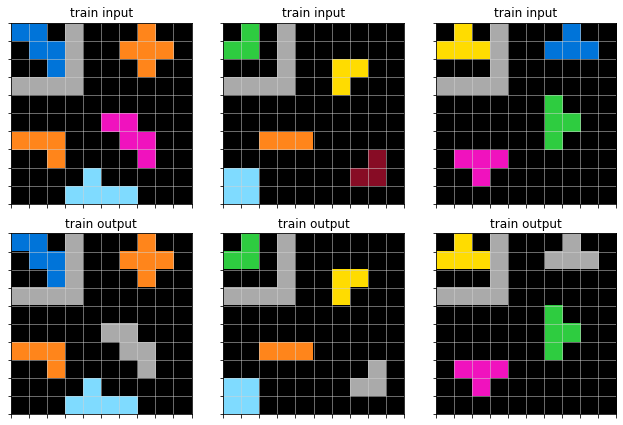

7 objects
[[0 0 0 5]
 [0 0 0 5]
 [0 0 0 5]
 [5 5 5 5]]
[[6 0]
 [6 6]
 [6 0]]
[[2 2 2]
 [0 0 2]]
[[3 0]
 [3 0]
 [3 3]]
[[8 8 8]
 [8 0 0]]
[[4]
 [4]
 [4]]
[[7 7 7]
 [0 0 7]]
7 objects
[[0 0 0 5]
 [0 0 0 5]
 [0 0 0 5]
 [5 5 5 5]]
[[6 0]
 [6 6]
 [6 0]]
[[2 2 2]
 [0 0 2]]
[[3 0]
 [3 0]
 [3 3]]
[[8 8 8]
 [8 0 0]]
[[4]
 [4]
 [4]]
[[5 5 5]
 [0 0 5]]


6430c8c4.json
Icecuber solved? True
['detect_wall', 'separate_images', 'take_complement', 'pattern_intersection']
6 objects
[[7 7 0 0]
 [0 7 7 0]
 [0 7 7 7]
 [0 7 7 0]]
[[7]]
[[4 4 4 4]]
[[0 2 0]
 [2 2 2]
 [2 0 0]]
[[2]]
[[2]]
2 objects
[[3]]
[[3]]
6 objects
[[0 0 7 7]
 [0 0 7 7]
 [0 7 7 0]
 [7 7 0 0]]
[[4 4 4 4]]
[[2]]
[[2]]
[[2 0]
 [2 2]
 [0 2]]
[[2]]
3 objects
[[3]]
[[3]
 [3]]
[[3]
 [3]]
4 objects
[[0 0 7]
 [7 7 7]
 [7 0 0]
 [7 7 7]]
[[4 4 4 4]]
[[0 0 2 0]
 [0 2 2 2]
 [2 2 0 0]
 [0 2 0 0]]
[[2]]
3 objects
[[3 3]
 [3 0]]
[[3 3]]
[[3]]
8 objects
[[7]]
[[7 0]
 [7 7]
 [7 7]]
[[7 0]
 [7 7]]
[[4 4 4 4]]
[[2 2]]
[[2]]
[[2]
 [2]]
[[2]]
2 objects
[[0 3]
 [3 3]
 [0 3]]
[[3]]


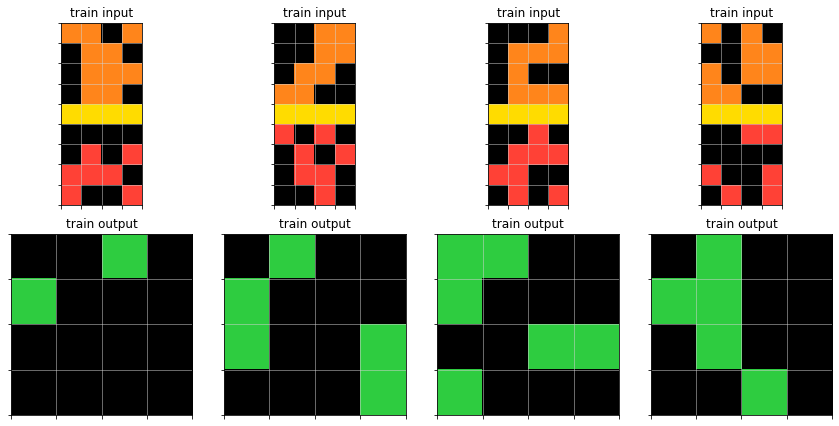

8 objects
[[7 7 7 7]
 [0 7 7 7]]
[[7]
 [7]]
[[7]]
[[4 4 4 4]]
[[2 2 2]]
[[2]]
[[2 2]]
[[2]]
3 objects
[[3]]
[[3]]
[[3]]


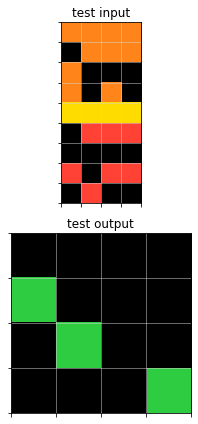

6455b5f5.json
Icecuber solved? True
['measure_area', 'take_maximum', 'take_minimum', 'loop_filling', 'associate_colors_to_ranks']
1 objects
[[0 2 0 0 0 0 2 0 0 0 0 0 0]
 [2 2 0 0 0 0 2 0 0 0 0 0 0]
 [0 2 0 0 0 0 2 0 0 0 0 0 0]
 [0 2 0 0 0 0 2 2 2 2 2 2 2]
 [0 2 0 0 0 0 2 0 0 2 0 0 0]
 [0 2 2 2 2 2 2 0 0 2 0 0 0]
 [0 2 0 0 0 0 2 0 0 2 0 0 0]
 [0 2 0 0 0 0 2 2 2 2 2 2 2]
 [0 2 0 0 0 0 2 0 0 0 0 2 0]
 [2 2 2 2 2 2 2 2 2 2 2 2 2]
 [0 0 2 0 0 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0 0 0 0]]
4 objects
[[8]]
[[0 2 0 0 0 0 2 0 0 0 0 0 0]
 [2 2 0 0 0 0 2 0 0 0 0 0 0]
 [0 2 0 0 0 0 2 0 0 0 0 0 0]
 [0 2 0 0 0 0 2 2 2 2 2 2 2]
 [0 2 0 0 0 0 2 0 0 2 0 0 0]
 [0 2 2 2 2 2 2 0 0 2 0 0 0]
 [0 2 0 0 0 0 2 0 0 2 0 0 0]
 [0 2 0 0 0 0 2 2 2 2 2 2 2]
 [0 2 0 0 0 0 2 0 0 0 0 2 0]
 [2 2 2 2 2 2 2 2 2 2 2 2 2]
 [0 0 2 0 0 0 0 0 0 0 0 0 0]
 [

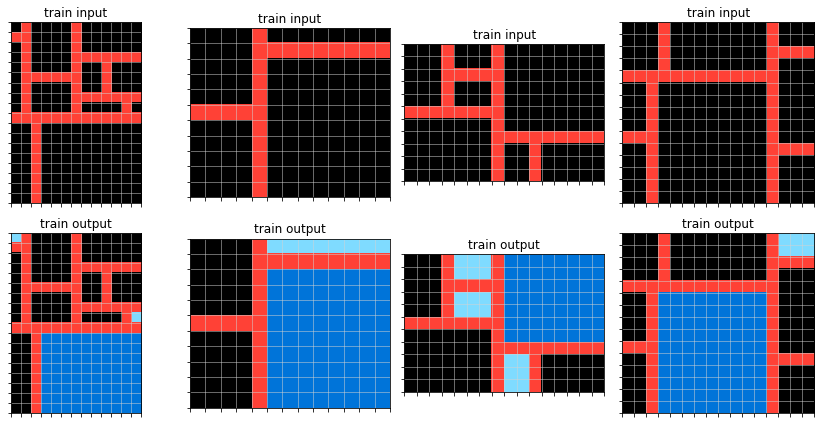

1 objects
[[0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0]
 [2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2]
 [0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0]
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
 [0 0 0 2 0 0 0 0 0 0 2 0 2 0 0 0]
 [2 2 2 2 0 0 0 0 0 0 2 0 2 0 0 0]
 [0 0 0 2 0 0 0 0 0 0 2 0 2 0 0 0]]
5 objects
[[0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0]
 [2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2]
 [0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0]
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
 [0 0 0 2 0 0 0 0 0 0 2 0 2 0 0 0]
 [2 2 2 2 0 0 0 0 0 0 2 0 2 0 0 0]
 [0 0 0 2 0 0 0 0 0 0 2 0 2 0 0 0]]
[[1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]

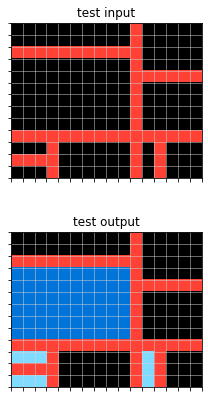

662c240a.json
Icecuber solved? True
['separate_images', 'detect_symmetry', 'find_the_intruder', 'crop']
10 objects
[[8]]
[[9]]
[[0 0 8]
 [0 8 8]
 [8 8 8]]
[[9]]
[[2 2]
 [2 2]]
[[1]
 [1]]
[[1 1]]
[[2]]
[[4 4 4]
 [4 4 0]]
[[0 0 3]
 [3 3 3]]
2 objects
[[4 4 4]
 [4 4 0]]
[[0 0 3]
 [3 3 3]]
8 objects
[[1]]
[[5 5]]
[[5]
 [5]]
[[1 1]
 [1 1]]
[[3 3 3]
 [3 0 3]
 [3 0 0]]
[[6 0]
 [6 6]]
[[7 7 7]
 [7 0 0]
 [7 0 0]]
[[2 2]
 [2 2]]
2 objects
[[3 3 3]
 [3 0 3]
 [3 0 0]]
[[6 0]
 [6 6]]
9 objects
[[2 2 2]
 [2 2 0]
 [2 0 0]]
[[0 3]
 [3 3]]
[[5]]
[[7 7]]
[[7]
 [7]]
[[5 5]
 [5 5]]
[[8 8]
 [0 8]
 [0 8]]
[[1]
 [1]
 [1]]
[[1]
 [1]]
3 objects
[[8 8]
 [0 8]
 [0 8]]
[[1]
 [1]
 [1]]
[[1]
 [1]]
9 objects
[[8 8]]
[[0 0 4]
 [4 4 4]
 [4 4 0]]
[[8]]
[[1 1]
 [1 0]]
[[0 0 3]
 [0 3 3]
 [3 3 0]]
[[1]]
[[6]]
[[0 2 2]
 [2 2 2]
 [2 2 0]]
[[6]]
3 objects
[[8 8]]
[[0 0 4]
 [4 4 4]
 [4 4 0]]
[[8]]


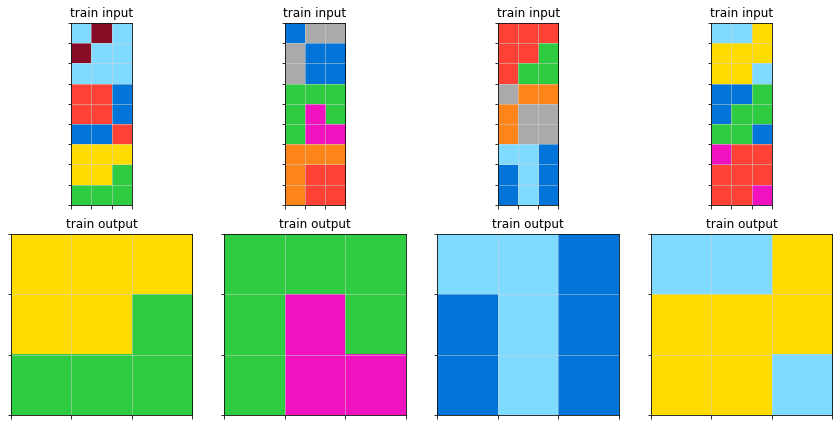

10 objects
[[5]]
[[4 4]
 [0 4]
 [0 4]]
[[4]
 [4]]
[[5]
 [5]]
[[3 3]
 [3 3]]
[[2]
 [2]]
[[2 2]]
[[3]]
[[1 1 1]
 [1 0 0]
 [1 0 0]]
[[8 8]
 [8 8]]
4 objects
[[5]]
[[4 4]
 [0 4]
 [0 4]]
[[4]
 [4]]
[[5]
 [5]]


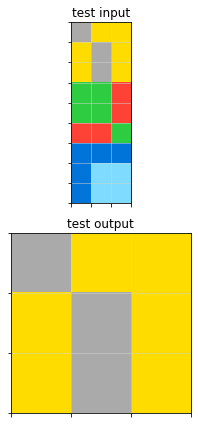

67385a82.json
Icecuber solved? True
['recoloring', 'measure_area', 'associate_colors_to_bools']
3 objects
[[3 3]
 [0 3]]
[[3]]
[[3]]
3 objects
[[8 8]
 [0 8]]
[[3]]
[[3]]
4 objects
[[3 0 0]
 [3 3 3]]
[[3]]
[[3]]
[[3]]
4 objects
[[8 0 0]
 [8 8 8]]
[[3]]
[[3]]
[[3]]
3 objects
[[3 3]
 [3 3]
 [3 0]]
[[3]]
[[0 3]
 [3 3]]
3 objects
[[8 8]
 [8 8]
 [8 0]]
[[3]]
[[0 8]
 [8 8]]
5 objects
[[3 3]
 [0 3]]
[[3]]
[[3]]
[[3 3]
 [3 3]]
[[3]]
5 objects
[[8 8]
 [0 8]]
[[3]]
[[3]]
[[8 8]
 [8 8]]
[[3]]


4 objects
[[3 0 3]
 [3 3 3]]
[[3]]
[[3]]
[[3 3]
 [3 3]]
4 objects
[[8 0 8]
 [8 8 8]]
[[3]]
[[3]]
[[8 8]
 [8 8]]


673ef223.json
Icecuber solved? False
['recoloring', 'draw_line_from_point', 'portals']
3 objects
[[2]
 [2]
 [2]
 [2]]
[[8]]
[[2]
 [2]
 [2]
 [2]]
5 objects
[[2]
 [2]
 [2]
 [2]]
[[8 8 8]]
[[4]]
[[2]
 [2]
 [2]
 [2]]
[[8 8 8 8 8 8 8]]
4 objects
[[2]
 [2]
 [2]
 [2]
 [2]]
[[8]]
[[8]]
[[2]
 [2]
 [2]
 [2]
 [2]]
8 objects
[[2]
 [2]
 [2]
 [2]
 [2]]
[[8 8 8 8 8 8]]
[[4]]
[[8 8 8 8]]
[[4]]
[[2]
 [2]
 [2]
 [2]
 [2]]
[[8 8 8 8 8 8 8 8 8]]
[[8 8 8 8 8 8 8 8 8]]
5 objects
[[2]
 [2]
 [2]
 [2]
 [2]
 [2]]
[[8]]
[[8]]
[[8]]
[[2]
 [2]
 [2]
 [2]
 [2]
 [2]]
9 objects
[[2]
 [2]
 [2]
 [2]
 [2]
 [2]]
[[4]]
[[0 0 0 0 8 8]
 [8 8 8 8 8 8]]
[[4]]
[[4]]
[[8 8 8 8]]
[[2]
 [2]
 [2]
 [2]
 [2]
 [2]]
[[8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8]]
[[8 8 8 8 8 8 8 8 8]]


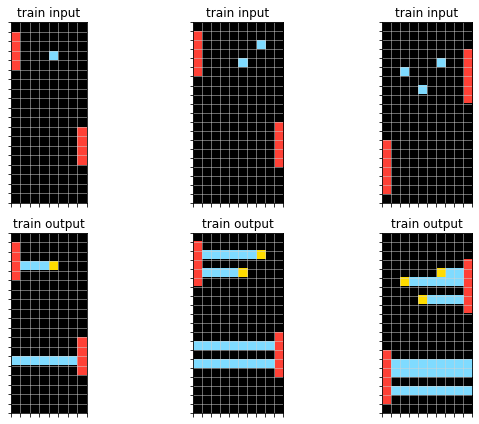

5 objects
[[2]
 [2]
 [2]
 [2]
 [2]
 [2]]
[[8]]
[[8]]
[[8]]
[[2]
 [2]
 [2]
 [2]
 [2]
 [2]]
9 objects
[[2]
 [2]
 [2]
 [2]
 [2]
 [2]]
[[8 8 8 8 8 8 8]
 [8 8 8 8 8 8 0]]
[[4]]
[[4]]
[[8 8 8]]
[[4]]
[[2]
 [2]
 [2]
 [2]
 [2]
 [2]]
[[8 8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8 8]]
[[8 8 8 8 8 8 8 8 8 8 8]]


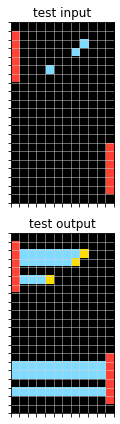

6773b310.json
Icecuber solved? False
['detect_grid', 'separate_images', 'count_tiles', 'associate_colors_to_numbers']
13 objects
[[0 0 0 8 0 0 0 8 0 0 0]
 [0 0 0 8 0 0 0 8 0 0 0]
 [0 0 0 8 0 0 0 8 0 0 0]
 [8 8 8 8 8 8 8 8 8 8 8]
 [0 0 0 8 0 0 0 8 0 0 0]
 [0 0 0 8 0 0 0 8 0 0 0]
 [0 0 0 8 0 0 0 8 0 0 0]
 [8 8 8 8 8 8 8 8 8 8 8]
 [0 0 0 8 0 0 0 8 0 0 0]
 [0 0 0 8 0 0 0 8 0 0 0]
 [0 0 0 8 0 0 0 8 0 0 0]]
[[6]]
[[6]]
[[6]]
[[6]]
[[6]]
[[6]]
[[6]]
[[6]]
[[6]]
[[6]]
[[6]]
[[6]]
2 objects
[[1]
 [1]]
[[1]]
12 objects
[[6]]
[[0 0 0 8 0 0 0 8 0 0 0]
 [0 0 0 8 0 0 0 8 0 0 0]
 [0 0 0 8 0 0 0 8 0 0 0]
 [8 8 8 8 8 8 8 8 8 8 8]
 [0 0 0 8 0 0 0 8 0 0 0]
 [0 0 0 8 0 0 0 8 0 0 0]
 [0 0 0 8 0 0 0 8 0 0 0]
 [8 8 8 8 8 8 8 8 8 8 8]
 [0 0 0 8 0 0 0 8 0 0 0]
 [0 0 0 8 0 0 0 8 0 0 0]
 [0 0 0 8 0 0 0 8 0 0 0]]
[[6]]
[[6]]
[[6]]
[[6]]
[[6]]
[[6]]
[[6]]
[[6]]
[[6]]
[[6]]
2 objects
[[1]]
[[1]]
13 objects
[[0 0 0 8 0 0 0 8 0 0 0]
 [0 0 0 8 0 0 0 8 0 0 0]
 [0 0 0 8 0 0 0 8 0 0 0]
 [8 8 8 8 8 8 8 8 8 8 8]
 [0 0 0 8 

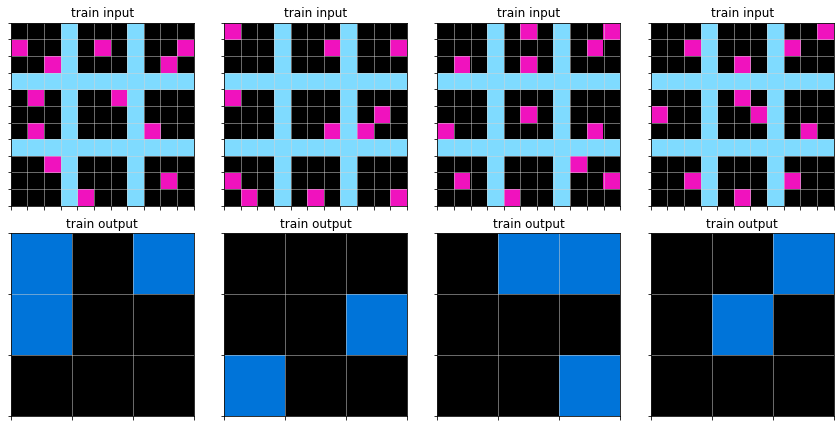

14 objects
[[0 0 0 8 0 0 0 8 0 0 0]
 [0 0 0 8 0 0 0 8 0 0 0]
 [0 0 0 8 0 0 0 8 0 0 0]
 [8 8 8 8 8 8 8 8 8 8 8]
 [0 0 0 8 0 0 0 8 0 0 0]
 [0 0 0 8 0 0 0 8 0 0 0]
 [0 0 0 8 0 0 0 8 0 0 0]
 [8 8 8 8 8 8 8 8 8 8 8]
 [0 0 0 8 0 0 0 8 0 0 0]
 [0 0 0 8 0 0 0 8 0 0 0]
 [0 0 0 8 0 0 0 8 0 0 0]]
[[6]]
[[6]]
[[6]]
[[6]]
[[6]]
[[6]]
[[6]]
[[6]]
[[6]]
[[6]]
[[6]]
[[6]]
[[6]]
2 objects
[[0 1]
 [1 1]]
[[1]]


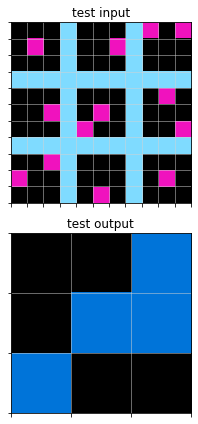

67a3c6ac.json
Icecuber solved? True
['image_reflection']
8 objects
[[6 6 6]
 [6 0 6]]
[[0 2]
 [0 2]
 [0 2]
 [2 2]]
[[1]]
[[7]]
[[2]]
[[7]]
[[1]]
[[7]]
8 objects
[[2 0]
 [2 0]
 [2 0]
 [2 2]]
[[6 6 6]
 [6 0 6]]
[[1]]
[[7]]
[[2]]
[[7]]
[[7]]
[[1]]
20 objects
[[7 7 7]
 [0 7 0]
 [7 7 0]]
[[6 6 6]]
[[2]]
[[6]]
[[1 1]
 [0 1]]
[[7 7]]
[[1]]
[[2]]
[[2]]
[[6 6]]
[[2 2]
 [0 2]]
[[7 7 7]
 [7 0 0]]
[[2 2]
 [0 2]]
[[7]]
[[1]]
[[0 2]
 [2 2]]
[[7]]
[[6 6 6 0 0 0 0]
 [6 0 6 6 6 6 6]]
[[1 1]]
[[2]]
20 objects
[[2]]
[[6 6 6]]
[[7 7 7]
 [0 7 0]
 [0 7 7]]
[[1]]
[[7 7]]
[[1 1]
 [1 0]]
[[6]]
[[6 6]]
[[2]]
[[2]]
[[2 2]
 [2 0]]
[[7 7 7]
 [0 0 7]]
[[2 2]
 [2 0]]
[[7]]
[[2 0]
 [2 2]]
[[1]]
[[7]]
[[1 1]]
[[0 0 0 0 6 6 6]
 [6 6 6 6 6 0 6]]
[[2]]
24 objects
[[1]]
[[2]]
[[7 0]
 [7 7]]
[[1 1 1]]
[[2]
 [2]]
[[1]
 [1]]
[[2]
 [2]]
[[6]]
[[2]]
[[6]]
[[1]]
[[1]]
[[2]]
[[1]
 [1]]
[[7]]
[[6]]
[[2]]
[[2]
 [2]]
[[7]]
[[2]
 [2]]
[[7 0]
 [7 7]]
[[1]]
[[1]]
[[6]]
24 objects
[[1 1 1]]
[[0 7]
 [7 7]]
[[2]]
[[1]]
[[6]]
[[2]
 [2]]
[

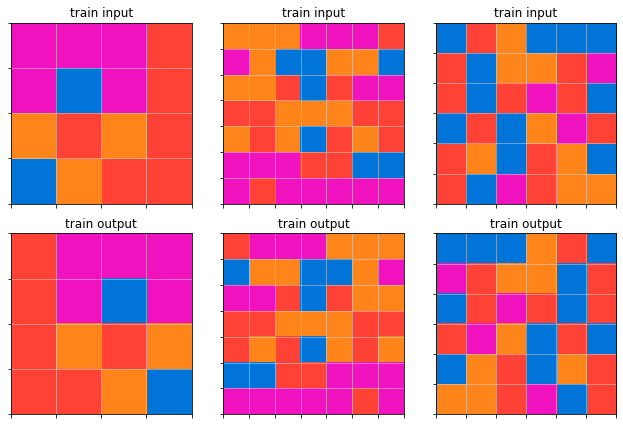

7 objects
[[7]]
[[6]]
[[1]]
[[6]
 [6]]
[[7]]
[[6]]
[[2 2]]
7 objects
[[1]]
[[6]]
[[7]]
[[6]]
[[7]]
[[6]
 [6]]
[[2 2]]


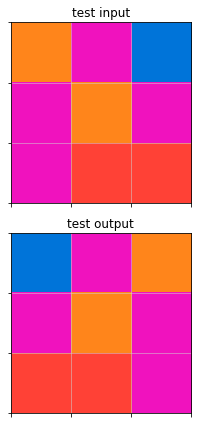

67a423a3.json
Icecuber solved? False
['pattern_intersection', 'contouring']
3 objects
[[3]]
[[2 2 2 2]]
[[3]
 [3]]
4 objects
[[4 4 4]
 [4 0 4]
 [4 4 4]]
[[2]]
[[2]]
[[3]]
3 objects
[[6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]]
[[8 8 8 8]]
[[8 8 8]]
6 objects
[[6]
 [6]
 [6]]
[[4 4 4]
 [4 0 4]
 [4 4 4]]
[[8 8 8]]
[[6]]
[[8 8]]
[[6]
 [6]]
3 objects
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[9 9]]
[[9 9 9]]
6 objects
[[1]]
[[4 4 4]
 [4 0 4]
 [4 4 4]]
[[9]]
[[1]]
[[9 9]]
[[1]
 [1]]


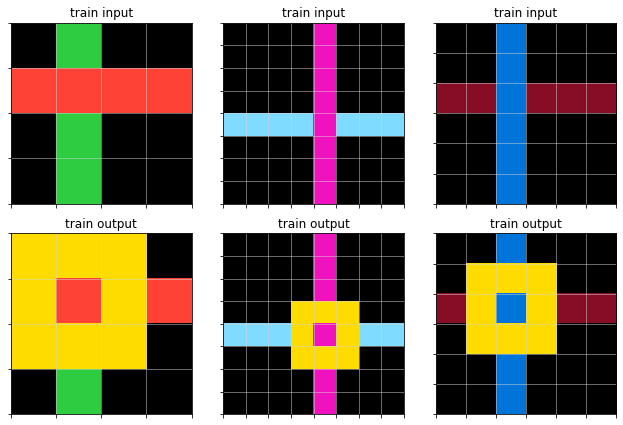

3 objects
[[5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]]
[[3 3 3 3 3 3 3 3]]
[[3 3 3]]
6 objects
[[5]
 [5]
 [5]
 [5]
 [5]]
[[4 4 4]
 [4 0 4]
 [4 4 4]]
[[3 3 3 3 3 3 3]]
[[5]]
[[3 3]]
[[5]
 [5]
 [5]
 [5]]


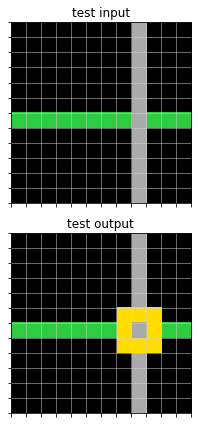

67e8384a.json
Icecuber solved? True
['image_repetition', 'image_reflection', 'image_rotation']
6 objects
[[5]]
[[3]]
[[4]]
[[3]
 [3]]
[[4 0]
 [4 4]]
[[5]]
15 objects
[[5]]
[[3]]
[[4 4]]
[[3]]
[[5]]
[[3]
 [3]
 [3]
 [3]]
[[4 0 0 4]
 [4 4 4 4]
 [4 4 4 4]
 [4 0 0 4]]
[[5 5]]
[[3]
 [3]
 [3]
 [3]]
[[5 5]]
[[5]]
[[3]]
[[4 4]]
[[3]]
[[5]]
6 objects
[[7 0]
 [7 7]]
[[1]]
[[5]]
[[1]
 [1]]
[[5]]
[[3]]
15 objects
[[7 0]
 [7 7]]
[[1]]
[[5 5]]
[[1]]
[[0 7]
 [7 7]]
[[1 1]
 [1 1]
 [1 1]
 [1 1]]
[[5]
 [5]]
[[3]
 [3]]
[[3]
 [3]]
[[5]
 [5]]
[[7 7]
 [7 0]]
[[7 7]
 [0 7]]
[[1]]
[[5 5]]
[[1]]
5 objects
[[2 0 0]
 [2 0 0]
 [2 2 2]]
[[5]]
[[2]]
[[6]]
[[4]]
13 objects
[[2 0 0 0 0 2]
 [2 0 0 0 0 2]
 [2 2 2 2 2 2]
 [2 2 2 2 2 2]
 [2 0 0 0 0 2]
 [2 0 0 0 0 2]]
[[5]]
[[2 2]]
[[5]]
[[6]]
[[4 4]]
[[6]]
[[6]]
[[4 4]]
[[6]]
[[5]]
[[2 2]]
[[5]]
8 objects
[[1]]
[[2]]
[[1]
 [1]]
[[2]]
[[8]]
[[8]]
[[1]]
[[6]]
23 objects
[[1]]
[[2]]
[[1 1]
 [1 1]]
[[2]]
[[1]]
[[2]]
[[8]]
[[8]]
[[2]]
[[8]
 [8]]
[[1]
 [1]]
[[6 6]
 [6 6]]
[[1]


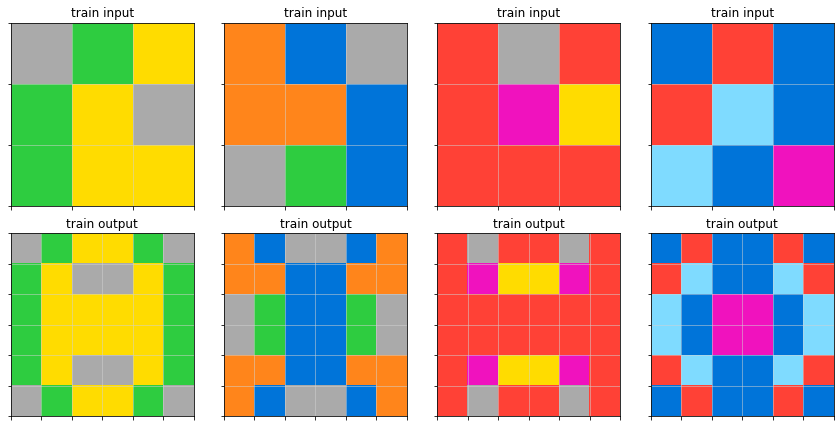

4 objects
[[1]]
[[6 6]]
[[5]]
[[0 2 2]
 [2 2 2]]
11 objects
[[1]]
[[6 6 6 6]]
[[1]]
[[5]]
[[0 2 2 2 2 0]
 [2 2 2 2 2 2]
 [2 2 2 2 2 2]
 [0 2 2 2 2 0]]
[[5]]
[[5]]
[[5]]
[[1]]
[[6 6 6 6]]
[[1]]


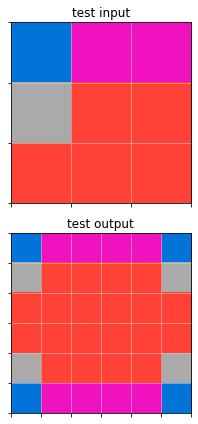

681b3aeb.json
Icecuber solved? True
['pattern_moving', 'jigsaw', 'crop', 'bring_patterns_close']
2 objects
[[3 3]
 [3 0]
 [3 0]]
[[0 7]
 [7 7]
 [7 7]]
2 objects
[[3 3]
 [3 0]
 [3 0]]
[[0 7]
 [7 7]
 [7 7]]
2 objects
[[4 0]
 [4 4]]
[[6 6 6]
 [0 6 6]
 [0 0 6]]
2 objects
[[6 6 6]
 [0 6 6]
 [0 0 6]]
[[4 0]
 [4 4]]
2 objects
[[0 3 0]
 [3 3 3]]
[[1 1 1]
 [1 0 1]]
2 objects
[[1 1 1]
 [1 0 1]]
[[0 3 0]
 [3 3 3]]


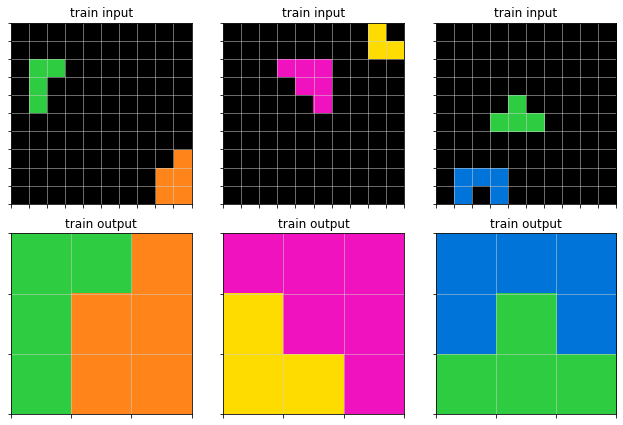

2 objects
[[0 2]
 [2 2]]
[[8 8 0]
 [8 0 0]
 [8 8 8]]
2 objects
[[8 8 0]
 [8 0 0]
 [8 8 8]]
[[0 2]
 [2 2]]


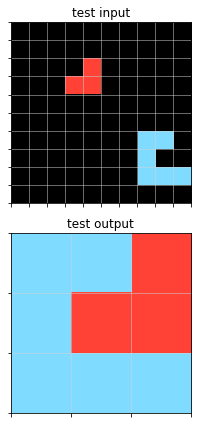

6855a6e4.json
Icecuber solved? False
['pattern_moving', 'direction_guessing', 'x_marks_the_spot']
4 objects
[[5]
 [5]]
[[2 2 2 2 2]
 [2 0 0 0 2]]
[[2 0 0 0 2]
 [2 2 2 2 2]]
[[5 5 5]]
4 objects
[[2 2 2 2 2]
 [2 0 0 0 2]]
[[5]
 [5]]
[[5 5 5]]
[[2 0 0 0 2]
 [2 2 2 2 2]]
4 objects
[[2 2]
 [2 0]
 [2 0]
 [2 0]
 [2 0]
 [2 2]]
[[2 2]
 [0 2]
 [0 2]
 [0 2]
 [0 2]
 [2 2]]
[[5 0]
 [5 5]
 [5 5]
 [5 0]]
[[5 5]
 [5 5]]
4 objects
[[2 2]
 [2 0]
 [2 0]
 [2 0]
 [2 0]
 [2 2]]
[[2 2]
 [0 2]
 [0 2]
 [0 2]
 [0 2]
 [2 2]]
[[0 5]
 [5 5]
 [5 5]
 [0 5]]
[[5 5]
 [5 5]]
4 objects
[[2 2]
 [2 0]
 [2 0]
 [2 0]
 [2 2]]
[[2 2]
 [0 2]
 [0 2]
 [0 2]
 [2 2]]
[[0 5]
 [5 5]
 [0 5]]
[[5 0]
 [5 5]
 [0 5]]
3 objects
[[2 2]
 [2 0]
 [2 0]
 [2 0]
 [2 2]]
[[2 2]
 [0 2]
 [0 2]
 [0 2]
 [2 2]]
[[5 0 0 5]
 [5 5 5 5]
 [5 0 5 0]]


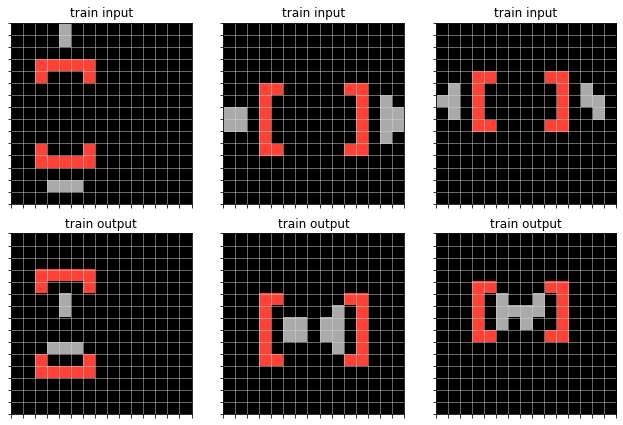

4 objects
[[0 5 5 5 0]
 [5 5 0 5 5]]
[[2 2 2 2 2 2 2]
 [2 0 0 0 0 0 2]]
[[2 0 0 0 0 0 2]
 [2 2 2 2 2 2 2]]
[[0 0 5 0 0]
 [5 5 5 5 5]]
4 objects
[[2 2 2 2 2 2 2]
 [2 0 0 0 0 0 2]]
[[5 5 0 5 5]
 [0 5 5 5 0]]
[[5 5 5 5 5]
 [0 0 5 0 0]]
[[2 0 0 0 0 0 2]
 [2 2 2 2 2 2 2]]


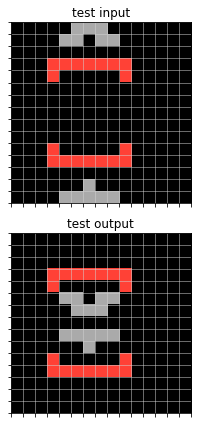

68b16354.json
Icecuber solved? True
['image_reflection']
16 objects
[[8]]
[[1]]
[[2]
 [2]
 [2]]
[[1]]
[[4]]
[[4 4]]
[[4]
 [4]]
[[8]
 [8]]
[[3]]
[[7 0]
 [7 7]
 [7 7]]
[[2]]
[[8]]
[[7]]
[[8]]
[[4]]
[[8]]
16 objects
[[8]]
[[7 7]
 [7 7]
 [7 0]]
[[4]]
[[8]]
[[2]]
[[8]]
[[7]]
[[3]]
[[2]
 [2]
 [2]]
[[4]
 [4]]
[[8]
 [8]]
[[4 4]]
[[8]]
[[1]]
[[1]]
[[4]]
21 objects
[[7]]
[[3 3]]
[[1]]
[[2]]
[[1]]
[[8]]
[[2]]
[[4]]
[[1]]
[[2]]
[[0 7]
 [7 7]]
[[8]]
[[7]]
[[2]]
[[4]]
[[1]]
[[8]]
[[8]]
[[1]]
[[7 7]]
[[1]]
21 objects
[[8]]
[[1]]
[[7 7]]
[[1]]
[[7 7]
 [0 7]]
[[4]]
[[1]]
[[8]]
[[2]]
[[8]]
[[7]]
[[2]]
[[1]]
[[8]]
[[2]]
[[4]]
[[1]]
[[7]]
[[3 3]]
[[1]]
[[2]]
37 objects
[[2]
 [2]]
[[7]]
[[4]]
[[3]]
[[4]]
[[8]]
[[0 3]
 [3 3]]
[[3]]
[[7]]
[[1]]
[[2 0]
 [2 2]]
[[8]]
[[7]]
[[4]]
[[3]]
[[4]]
[[1 1]]
[[2]]
[[1 0]
 [1 1]]
[[4 4]
 [0 4]]
[[7]]
[[2]]
[[4]]
[[3]]
[[1]]
[[4]]
[[8]]
[[7]]
[[4 4]
 [4 0]]
[[8]]
[[2]]
[[7]]
[[3]]
[[8]]
[[3]]
[[2]]
[[8]]
37 objects
[[7]]
[[3]]
[[8]]
[[4 0]
 [4 4]]
[[3]]
[[2]]
[[8]]
[[4]]


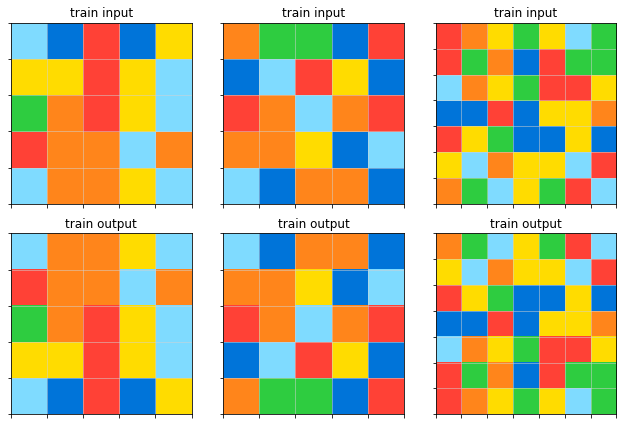

32 objects
[[2]]
[[8]]
[[0 0 1 0]
 [0 0 1 1]
 [1 1 1 1]
 [1 1 0 0]
 [0 1 1 1]]
[[3]]
[[2]]
[[4]]
[[1]]
[[4 4]]
[[4]
 [4]]
[[3]]
[[4]]
[[7]]
[[3]
 [3]]
[[2]]
[[3]]
[[8]]
[[1]]
[[4]]
[[7]]
[[8]
 [8]]
[[4]
 [4]
 [4]]
[[3]]
[[2]]
[[8]]
[[4]]
[[1]]
[[1]]
[[4]]
[[7]]
[[1]]
[[2]]
[[3]]
32 objects
[[1]]
[[4]]
[[7]]
[[1]]
[[2]]
[[3]]
[[4]
 [4]
 [4]]
[[3]]
[[2]]
[[8]]
[[4]]
[[1]]
[[8]
 [8]]
[[4]]
[[0 1 1 1]
 [1 1 0 0]
 [1 1 1 1]
 [0 0 1 1]
 [0 0 1 0]]
[[7]]
[[2]]
[[3]]
[[8]]
[[1]]
[[3]
 [3]]
[[4]
 [4]]
[[7]]
[[4 4]]
[[3]]
[[4]]
[[2]]
[[8]]
[[3]]
[[2]]
[[4]]
[[1]]


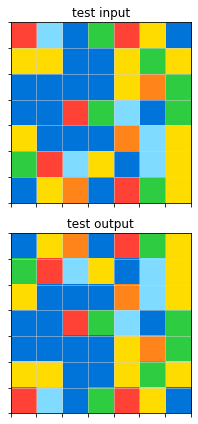

694f12f3.json
Icecuber solved? False
['rectangle_guessing', 'loop_filling', 'measure_area', 'associate_colors_to_ranks']
2 objects
[[4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]]
[[4 4 4 4 4 4]
 [4 4 4 4 4 4]
 [4 4 4 4 4 4]
 [4 4 4 4 4 4]]
4 objects
[[4 4 4 4]
 [4 0 0 4]
 [4 0 0 4]
 [4 4 4 4]]
[[1 1]
 [1 1]]
[[4 4 4 4 4 4]
 [4 0 0 0 0 4]
 [4 0 0 0 0 4]
 [4 4 4 4 4 4]]
[[2 2 2 2]
 [2 2 2 2]]
2 objects
[[4 4 4 4 4]
 [4 4 4 4 4]
 [4 4 4 4 4]
 [4 4 4 4 4]
 [4 4 4 4 4]]
[[4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]]
4 objects
[[4 4 4 4 4]
 [4 0 0 0 4]
 [4 0 0 0 4]
 [4 0 0 0 4]
 [4 4 4 4 4]]
[[2 2 2]
 [2 2 2]
 [2 2 2]]
[[4 4 4 4]
 [4 0 0 4]
 [4 4 4 4]]
[[1 1]]


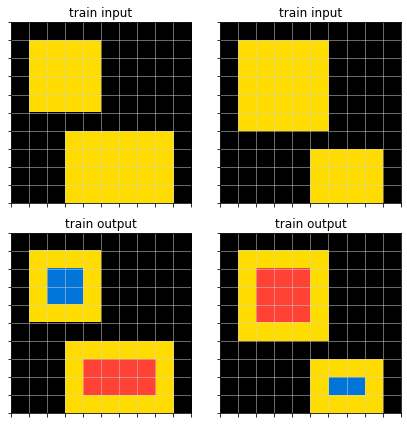

2 objects
[[4 4 4 4 4 4]
 [4 4 4 4 4 4]
 [4 4 4 4 4 4]
 [4 4 4 4 4 4]
 [4 4 4 4 4 4]
 [4 4 4 4 4 4]]
[[4 4 4 4 4 4]
 [4 4 4 4 4 4]
 [4 4 4 4 4 4]]
4 objects
[[4 4 4 4 4 4]
 [4 0 0 0 0 4]
 [4 0 0 0 0 4]
 [4 0 0 0 0 4]
 [4 0 0 0 0 4]
 [4 4 4 4 4 4]]
[[2 2 2 2]
 [2 2 2 2]
 [2 2 2 2]
 [2 2 2 2]]
[[4 4 4 4 4 4]
 [4 0 0 0 0 4]
 [4 4 4 4 4 4]]
[[1 1 1 1]]


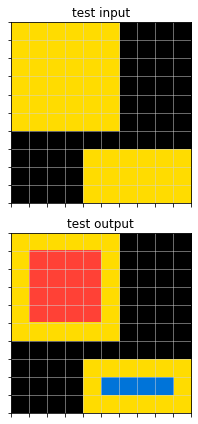

6a1e5592.json
Icecuber solved? False
['pattern_moving', 'jigsaw', 'recoloring']
4 objects
[[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
 [2 0 2 2 2 2 2 2 2 2 2 2 2 2 0]
 [2 0 0 2 2 2 0 0 0 2 2 2 2 2 0]]
[[5]
 [5]
 [5]
 [5]]
[[5 0 0]
 [5 5 0]
 [5 5 5]]
[[5 5 5]
 [5 5 5]]
4 objects
[[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
 [2 0 2 2 2 2 2 2 2 2 2 2 2 2 0]
 [2 0 0 2 2 2 0 0 0 2 2 2 2 2 0]]
[[1 0 0]
 [1 1 0]
 [1 1 1]]
[[1]
 [1]
 [1]
 [1]]
[[1 1 1]
 [1 1 1]]
5 objects
[[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
 [2 2 2 2 0 2 2 2 0 2 2 0 0 2 2]
 [2 0 0 2 0 2 2 0 0 0 2 0 0 2 2]]
[[0 5 5 0]
 [0 5 5 0]
 [5 5 5 5]
 [0 5 5 0]]
[[5]
 [5]
 [5]]
[[0 5 0]
 [5 5 5]]
[[0 5 5]
 [5 5 5]]
5 objects
[[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
 [2 2 2 2 0 2 2 2 0 2 2 0 0 2 2]
 [2 0 0 2 0 2 2 0 0 0 2 0 0 2 2]]
[[1]
 [1]
 [1]]
[[0 1 0]
 [1 1 1]]
[[0 1 1 0]
 [0 1 1 0]
 [1 1 1 1]
 [0 1 1 0]]
[[0 1 1]
 [1 1 1]]


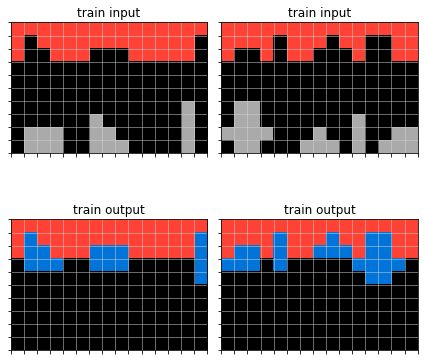

4 objects
[[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
 [2 0 2 2 2 2 0 2 0 2 2 0 2 2 2]
 [2 0 0 2 2 2 0 0 0 2 2 0 0 0 2]]
[[5 0]
 [5 5]
 [5 0]
 [5 5]]
[[5 0 5]
 [5 5 5]
 [5 5 5]
 [5 5 5]]
[[5 0 0 0]
 [5 5 5 0]
 [5 5 5 5]]
4 objects
[[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
 [2 0 2 2 2 2 0 2 0 2 2 0 2 2 2]
 [2 0 0 2 2 2 0 0 0 2 2 0 0 0 2]]
[[1 0]
 [1 1]
 [1 0]
 [1 1]]
[[1 0 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]]
[[1 0 0 0]
 [1 1 1 0]
 [1 1 1 1]]


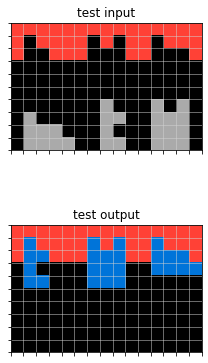

6aa20dc0.json
Icecuber solved? False
['pattern_repetition', 'pattern_juxtaposition', 'pattern_resizing']
8 objects
[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1]
 [1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]
[[2]]
[[3]]
[[2]]
[[0 8 8]
 [8 8 0]
 [8 0 0]]
[[3]]
[[2 2]
 [2 2

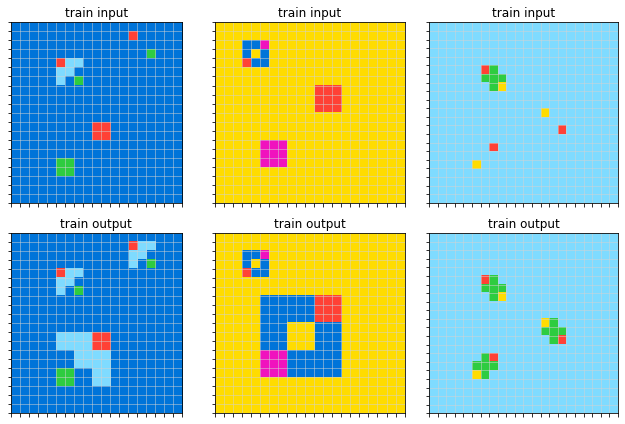

14 objects
[[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3 0 0 0 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3 0 0 0 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3 0 0 0 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 3 3 3]
 [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 3 3 3]
 [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 3 3 3]
 [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
 [3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 3 3 3 3 3]
 [3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3 3 0 0 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3 3 0 0 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
 [

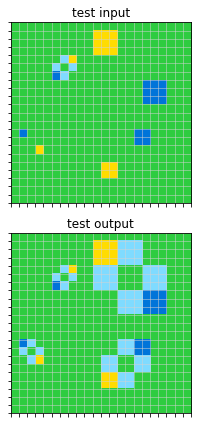

6b9890af.json
Icecuber solved? True
['pattern_moving', 'pattern_resizing', 'crop', 'x_marks_the_spot']
2 objects
[[0 8 0]
 [8 8 8]
 [0 8 0]]
[[2 2 2 2 2 2 2 2]
 [2 0 0 0 0 0 0 2]
 [2 0 0 0 0 0 0 2]
 [2 0 0 0 0 0 0 2]
 [2 0 0 0 0 0 0 2]
 [2 0 0 0 0 0 0 2]
 [2 0 0 0 0 0 0 2]
 [2 2 2 2 2 2 2 2]]
2 objects
[[2 2 2 2 2 2 2 2]
 [2 0 0 0 0 0 0 2]
 [2 0 0 0 0 0 0 2]
 [2 0 0 0 0 0 0 2]
 [2 0 0 0 0 0 0 2]
 [2 0 0 0 0 0 0 2]
 [2 0 0 0 0 0 0 2]
 [2 2 2 2 2 2 2 2]]
[[0 0 8 8 0 0]
 [0 0 8 8 0 0]
 [8 8 8 8 8 8]
 [8 8 8 8 8 8]
 [0 0 8 8 0 0]
 [0 0 8 8 0 0]]
4 objects
[[2 2 2 2 2]
 [2 0 0 0 2]
 [2 0 0 0 2]
 [2 0 0 0 2]
 [2 2 2 2 2]]
[[1 1]]
[[1]]
[[1 1]]
4 objects
[[2 2 2 2 2]
 [2 0 0 0 2]
 [2 0 0 0 2]
 [2 0 0 0 2]
 [2 2 2 2 2]]
[[1 1]]
[[1]]
[[1 1]]
3 objects
[[2 2 2 2 2 2 2 2 2 2 2]
 [2 0 0 0 0 0 0 0 0 0 2]
 [2 0 0 0 0 0 0 0 0 0 2]
 [2 0 0 0 0 0 0 0 0 0 2]
 [2 0 0 0 0 0 0 0 0 0 2]
 [2 0 0 0 0 0 0 0 0 0 2]
 [2 0 0 0 0 0 0 0 0 0 2]
 [2 0 0 0 0 0 0 0 0 0 2]
 [2 0 0 0 0 0 0 0 0 0 2]
 [2 0 0 0 0 0 0 0 0 0

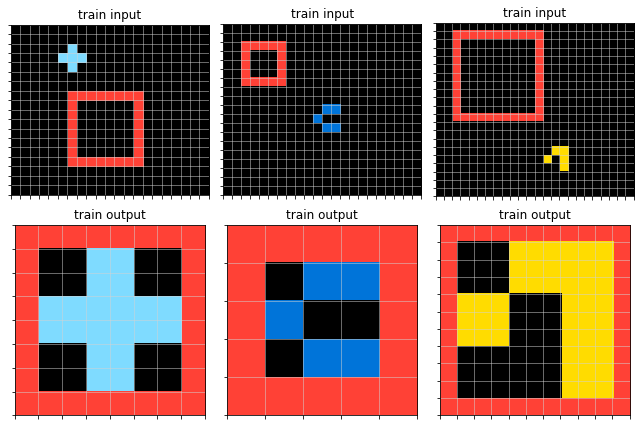

5 objects
[[2 2 2 2 2 2 2 2 2 2 2 2 2 2]
 [2 0 0 0 0 0 0 0 0 0 0 0 0 2]
 [2 0 0 0 0 0 0 0 0 0 0 0 0 2]
 [2 0 0 0 0 0 0 0 0 0 0 0 0 2]
 [2 0 0 0 0 0 0 0 0 0 0 0 0 2]
 [2 0 0 0 0 0 0 0 0 0 0 0 0 2]
 [2 0 0 0 0 0 0 0 0 0 0 0 0 2]
 [2 0 0 0 0 0 0 0 0 0 0 0 0 2]
 [2 0 0 0 0 0 0 0 0 0 0 0 0 2]
 [2 0 0 0 0 0 0 0 0 0 0 0 0 2]
 [2 0 0 0 0 0 0 0 0 0 0 0 0 2]
 [2 0 0 0 0 0 0 0 0 0 0 0 0 2]
 [2 0 0 0 0 0 0 0 0 0 0 0 0 2]
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2]]
[[3]]
[[3]]
[[3]]
[[3]]
5 objects
[[2 2 2 2 2 2 2 2 2 2 2 2 2 2]
 [2 0 0 0 0 0 0 0 0 0 0 0 0 2]
 [2 0 0 0 0 0 0 0 0 0 0 0 0 2]
 [2 0 0 0 0 0 0 0 0 0 0 0 0 2]
 [2 0 0 0 0 0 0 0 0 0 0 0 0 2]
 [2 0 0 0 0 0 0 0 0 0 0 0 0 2]
 [2 0 0 0 0 0 0 0 0 0 0 0 0 2]
 [2 0 0 0 0 0 0 0 0 0 0 0 0 2]
 [2 0 0 0 0 0 0 0 0 0 0 0 0 2]
 [2 0 0 0 0 0 0 0 0 0 0 0 0 2]
 [2 0 0 0 0 0 0 0 0 0 0 0 0 2]
 [2 0 0 0 0 0 0 0 0 0 0 0 0 2]
 [2 0 0 0 0 0 0 0 0 0 0 0 0 2]
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2]]
[[3 3 3 3]
 [3 3 3 3]
 [3 3 3 3]
 [3 3 3 3]]
[[3 3 3 3]
 [3 3 3 3]
 [3 3 3 3]
 [3 3 3 

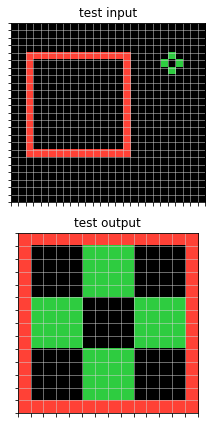

6c434453.json
Icecuber solved? True
['replace_pattern']
5 objects
[[1 1 1]
 [1 0 1]
 [1 1 1]]
[[0 1 0]
 [1 1 1]
 [0 1 0]]
[[0 1 0]
 [1 1 1]
 [0 1 0]]
[[1 1 1]
 [1 0 1]
 [1 1 1]]
[[1 1]]
5 objects
[[0 2 0]
 [2 2 2]
 [0 2 0]]
[[0 1 0]
 [1 1 1]
 [0 1 0]]
[[0 1 0]
 [1 1 1]
 [0 1 0]]
[[0 2 0]
 [2 2 2]
 [0 2 0]]
[[1 1]]
5 objects
[[1 1 1]
 [1 0 1]
 [1 1 1]]
[[1 1]
 [1 1]]
[[0 1 0]
 [1 1 1]
 [0 1 0]]
[[1 1 1]
 [1 0 1]
 [1 1 1]]
[[1 0 0]
 [1 1 1]]
5 objects
[[0 2 0]
 [2 2 2]
 [0 2 0]]
[[1 1]
 [1 1]]
[[0 1 0]
 [1 1 1]
 [0 1 0]]
[[0 2 0]
 [2 2 2]
 [0 2 0]]
[[1 0 0]
 [1 1 1]]


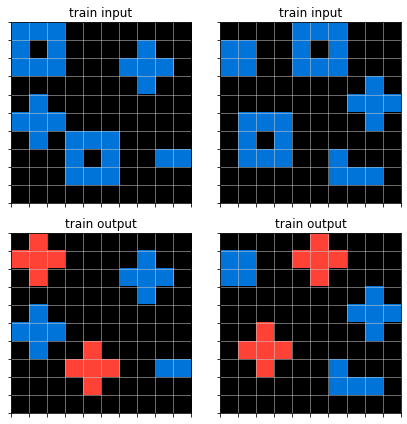

5 objects
[[0 1 0]
 [1 1 1]
 [0 1 0]]
[[1 1 1]
 [1 0 1]
 [1 1 1]]
[[1 1]]
[[1 1 1]
 [1 0 1]
 [1 1 1]]
[[1 1]
 [1 1]]
5 objects
[[0 1 0]
 [1 1 1]
 [0 1 0]]
[[0 2 0]
 [2 2 2]
 [0 2 0]]
[[1 1]]
[[0 2 0]
 [2 2 2]
 [0 2 0]]
[[1 1]
 [1 1]]


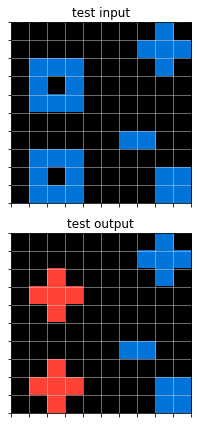

6cdd2623.json
Icecuber solved? True
['connect_the_dots', 'find_the_intruder', 'remove_noise']
43 objects
[[2 2]
 [0 2]]
[[3]]
[[2]]
[[2]]
[[2]]
[[5]]
[[2]]
[[5]]
[[2]]
[[5]]
[[2]]
[[5 5]]
[[2]
 [2]]
[[2]]
[[5]]
[[2]
 [2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[5]
 [5]]
[[2]]
[[5 5]]
[[5]]
[[2]]
[[2]]
[[2]]
[[3]]
[[5 5]]
[[2]]
[[5]]
[[2]]
[[3]]
[[2]]
[[2]]
[[5]]
[[5]]
[[2]]
[[2]]
[[5]]
[[3]]
[[5]]
[[5]]
1 objects
[[0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0]
 [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
 [0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0]]
24 objects
[[8]]
[[8]]
[[1]
 [1]]
[[1]]
[[2]]
[[2]]
[[8]]
[[1]]
[[1]]
[[1]]
[[1

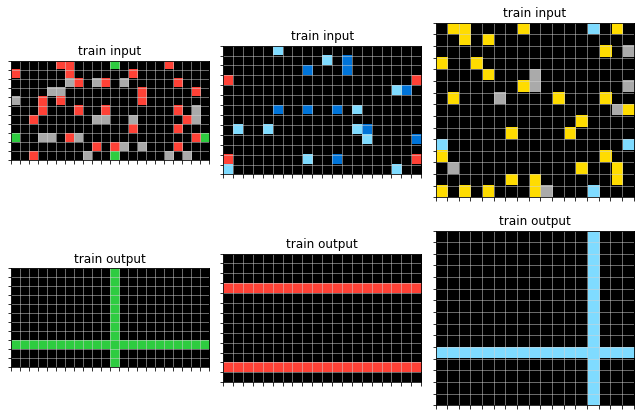

38 objects
[[6]]
[[7]]
[[7]]
[[8]]
[[7]]
[[8]
 [8]]
[[8]]
[[7]]
[[7]]
[[8 8]]
[[8]]
[[6]]
[[7]
 [7]]
[[7 7]]
[[6]]
[[7]]
[[7]
 [7]]
[[8]]
[[8]]
[[7]]
[[7]]
[[8]]
[[8]]
[[7]]
[[7]]
[[7]]
[[7]]
[[7]]
[[7]]
[[8]]
[[7]]
[[7]]
[[8]]
[[7]]
[[6]]
[[7]]
[[8]]
[[7]]
1 objects
[[0 0 0 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6]
 [0 0 0 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


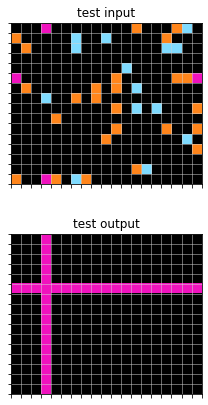

6cf79266.json
Icecuber solved? False
['rectangle_guessing', 'recoloring']
11 objects
[[5 0 0 5 0 0 5 5 5 5 5 5 0 0 5 5 5 5]
 [5 0 5 5 5 5 5 5 0 0 5 5 5 5 0 5 5 0]
 [5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 0 0]
 [0 5 5 5 5 5 0 0 0 5 0 5 5 0 5 5 0 0]
 [5 5 5 5 5 5 0 0 0 0 5 5 5 0 0 0 0 0]
 [0 5 0 5 0 5 0 0 5 0 5 0 5 0 0 0 0 0]
 [5 5 5 5 5 5 5 5 5 0 0 0 0 0 0 0 0 0]
 [0 0 0 5 5 5 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 5]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 5]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 5 0 5]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 5 5 5 5]
 [0 0 0 0 0 0 0 0 0 0 0 5 0 5 5 5 0 0 0 5]
 [0 0 0 0 0 0 0 0 0 5 5 5 0 5 0 5 0 0 0 5]
 [0 0 0 0 0 0 0 5 5 5 5 0 0 5 0 5 0 0 0 5]
 [0 0 5 0 0 0 5 5 0 5 5 5 5 0 5 5 5 0 5 5]
 [5 5 5 0 5 5 5 5 5 0 0 5 0 0 5 5 5 5 5 5]
 [5 0 5 5 5 5 5 0 5 5 5 5 0 5 0 5 5 5 0 5]
 [5 0 0 5 5 5 5 0 0 5 5 5 0 5 5 5 5 5 5 5]
 [5 5 0 5 5 5 5 5 5 5 5 0 5 5 5 0 5 5 0 5]
 [0 

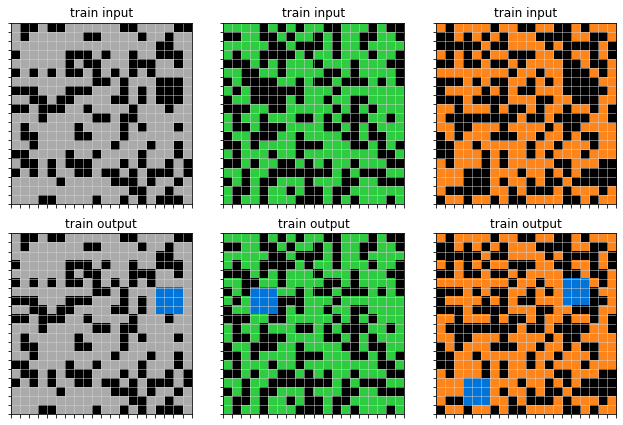

38 objects
[[4]]
[[0 0 0 4 4]
 [0 0 4 4 0]
 [4 4 4 0 0]
 [4 4 0 0 0]
 [4 0 0 0 0]
 [4 4 0 0 0]]
[[4 4 4 0]
 [4 0 4 4]
 [0 0 0 4]]
[[4]]
[[0 0 0 4 4 4 4 4]
 [0 0 0 4 4 4 4 4]
 [4 4 4 4 4 4 0 4]
 [0 0 4 4 4 0 0 0]
 [0 0 0 4 4 0 0 0]
 [0 0 0 0 4 4 0 0]
 [0 0 0 0 0 4 4 0]]
[[4]]
[[4]]
[[4 0]
 [4 4]
 [0 4]]
[[0 0 4 0 0 0 0 0 0]
 [0 0 4 4 4 4 4 4 4]
 [0 0 0 4 4 4 4 4 4]
 [0 0 0 0 4 4 4 4 4]
 [0 0 0 4 4 0 0 0 0]
 [0 0 0 4 4 4 0 0 0]
 [4 4 0 0 4 0 0 0 0]
 [0 4 0 4 4 4 0 0 0]
 [0 4 4 4 4 0 0 0 0]
 [0 4 0 0 4 0 0 0 0]
 [0 4 0 0 4 4 4 0 0]
 [0 0 0 0 0 4 0 0 0]]
[[4]
 [4]]
[[4]]
[[4]]
[[0 0 4]
 [0 4 4]
 [4 4 4]]
[[0 0 4 0 0]
 [0 4 4 0 0]
 [0 0 4 4 4]
 [0 4 4 4 0]
 [4 0 4 4 4]
 [4 4 4 4 4]
 [0 4 4 0 0]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[0 4]
 [4 4]
 [4 0]
 [4 4]]
[[4]]
[[4 4 0 0]
 [0 4 0 0]
 [0 4 4 0]
 [4 4 4 4]
 [0 0 4 4]
 [0 0 4 0]]
[[4]]
[[4]]
[[4 4 4 0 0]
 [4 4 4 4 4]
 [4 0 4 0 0]]
[[4]]
[[0 4 4]
 [4 0 4]
 [4 4 4]
 [4 0 4]
 [0 0 4]]
[[4 0]
 [4 4]
 [4 0]]
[[4]]
[[0 0 0 4 0]
 [4 0 4 4 0]
 [4 

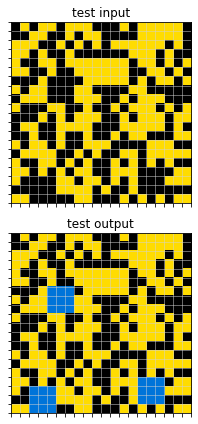

6d0160f0.json
Icecuber solved? False
['detect_grid', 'separate_image', 'find_the_intruder', 'pattern_moving']
40 objects
[[3]]
[[0 0 0 5 0 0 0 5 0 0 0]
 [0 0 0 5 5 0 0 5 0 0 0]
 [0 0 0 5 5 0 0 5 0 0 0]
 [5 5 5 5 5 5 5 5 5 5 5]
 [0 5 0 5 0 0 5 5 5 0 0]
 [0 0 0 5 5 0 0 5 0 0 0]
 [0 0 0 5 0 0 0 5 0 0 0]
 [5 5 5 5 5 5 5 5 5 5 5]
 [0 0 0 5 5 0 0 5 0 5 0]
 [0 5 5 5 0 0 0 5 5 5 0]
 [0 0 0 5 5 0 0 5 0 0 0]]
[[7]]
[[6]]
[[8]]
[[5]]
[[7]]
[[9]]
[[3]]
[[6]]
[[7]]
[[2]]
[[2]]
[[3]]
[[7]]
[[2]]
[[8]]
[[7]]
[[2]]
[[3]]
[[6]]
[[3]]
[[5]]
[[7]]
[[3]]
[[2]]
[[6]]
[[3]]
[[4]]
[[2]]
[[2]]
[[7]]
[[7]]
[[7]]
[[5]]
[[3]]
[[1]]
[[2]]
[[6]]
[[3]]
5 objects
[[0 0 0 5 0 0 0 5 0 0 0]
 [0 0 0 5 0 0 0 5 0 0 0]
 [0 0 0 5 0 0 0 5 0 0 0]
 [5 5 5 5 5 5 5 5 5 5 5]
 [0 0 0 5 0 0 0 5 0 0 0]
 [0 0 0 5 0 0 0 5 0 0 0]
 [0 0 0 5 0 0 0 5 0 0 0]
 [5 5 5 5 5 5 5 5 5 5 5]
 [0 0 0 5 0 0 0 5 0 0 0]
 [0 0 0 5 0 0 0 5 0 0 0]
 [0 0 0 5 0 0 0 5 0 0 0]]
[[3]]
[[4]]
[[7]]
[[2]]
21 objects
[[3]]
[[0 0 0 5 0 0 0 5 0 0 0]
 [0 0 0 5 0 0 0 5

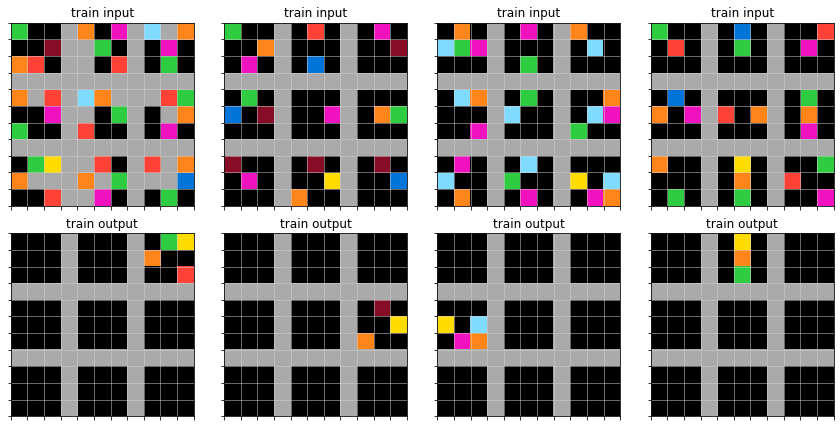

34 objects
[[2]]
[[3]]
[[0 0 0 5 0 0 0 5 0 0 0]
 [0 0 0 5 0 0 0 5 0 0 0]
 [0 0 0 5 0 0 0 5 0 0 0]
 [5 5 5 5 5 5 5 5 5 5 5]
 [0 0 0 5 0 0 0 5 0 0 0]
 [0 0 0 5 0 0 0 5 0 0 0]
 [0 0 0 5 0 0 0 5 0 0 0]
 [5 5 5 5 5 5 5 5 5 5 5]
 [0 0 0 5 0 0 0 5 0 0 0]
 [0 0 0 5 0 0 0 5 0 0 0]
 [0 0 0 5 0 0 0 5 0 0 0]]
[[2]]
[[3]]
[[7]]
[[6]]
[[7]]
[[6]]
[[7]]
[[6]]
[[3]]
[[2]]
[[7]]
[[6]]
[[4]]
[[6]]
[[2]]
[[7]]
[[2]]
[[6]]
[[2]]
[[3]]
[[7]]
[[7]]
[[6]]
[[2]]
[[3]]
[[6]]
[[2]]
[[2]]
[[7]]
[[6]]
[[7]]
5 objects
[[0 0 0 5 0 0 0 5 0 0 0]
 [0 0 0 5 0 0 0 5 0 0 0]
 [0 0 0 5 0 0 0 5 0 0 0]
 [5 5 5 5 5 5 5 5 5 5 5]
 [0 0 0 5 0 0 0 5 0 0 0]
 [0 0 0 5 0 0 0 5 0 0 0]
 [0 0 0 5 0 0 0 5 0 0 0]
 [5 5 5 5 5 5 5 5 5 5 5]
 [0 0 0 5 0 0 0 5 0 0 0]
 [0 0 0 5 0 0 0 5 0 0 0]
 [0 0 0 5 0 0 0 5 0 0 0]]
[[6]]
[[4]]
[[2]]
[[7]]


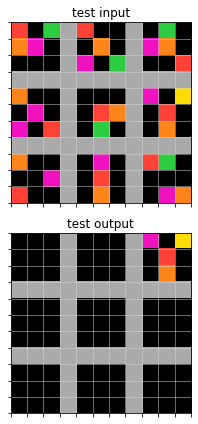

6d0aefbc.json
Icecuber solved? True
['image_repetition', 'image_reflection']
5 objects
[[6 6 6]
 [0 6 0]]
[[1]]
[[1]]
[[8 8]]
[[6]]
7 objects
[[6 6 6 6 6 6]
 [0 6 0 0 6 0]]
[[1]]
[[1 1]]
[[1]]
[[8 8]]
[[6 6]]
[[8 8]]
4 objects
[[6]
 [6]]
[[8]]
[[0 0 1]
 [0 1 1]
 [1 1 0]]
[[6]]
6 objects
[[6]
 [6]]
[[8]]
[[0 0 1 1 0 0]
 [0 1 1 1 1 0]
 [1 1 0 0 1 1]]
[[8]]
[[6]
 [6]]
[[6 6]]
5 objects
[[1 1 1]
 [0 1 0]]
[[8]]
[[6]]
[[6]]
[[8 8]]
7 objects
[[1 1 1 1 1 1]
 [0 1 0 0 1 0]]
[[8]]
[[6 6]]
[[8]]
[[6]]
[[8 8 8 8]]
[[6]]
2 objects
[[1 1 1]
 [1 0 0]]
[[0 6 6]
 [6 6 6]]
2 objects
[[1 1 1 1 1 1]
 [1 0 0 0 0 1]]
[[0 6 6 6 6 0]
 [6 6 6 6 6 6]]


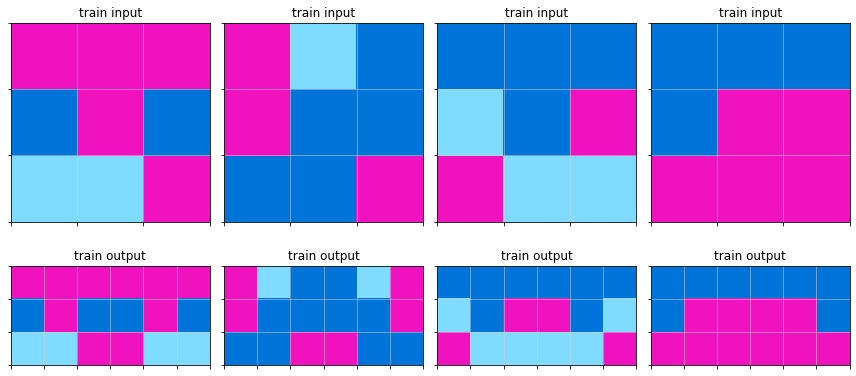

8 objects
[[6]]
[[8]]
[[6]]
[[8]]
[[6]
 [6]]
[[8]]
[[1]]
[[1]]
13 objects
[[6]]
[[8]]
[[6 6]]
[[8]]
[[6]]
[[8]]
[[6]
 [6]]
[[8 8]]
[[6]
 [6]]
[[8]]
[[1]]
[[1 1]]
[[1]]


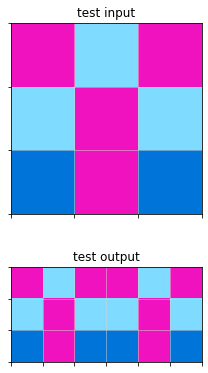

6d58a25d.json
Icecuber solved? True
['draw_line_from_point']
11 objects
[[8]]
[[8]]
[[8]]
[[0 0 9 0 0]
 [0 9 9 9 0]
 [9 9 0 9 9]]
[[9]]
[[9]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
11 objects
[[8]]
[[8]]
[[8]]
[[0 0 9 0 0]
 [0 9 9 9 0]
 [9 9 0 9 9]]
[[8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]]
[[9]]
[[9]]
[[8]]
[[8]]
[[8]]
[[8]]
14 objects
[[2]]
[[2]]
[[2]]
[[2]]
[[0 0 7 0 0]
 [0 7 7 7 0]
 [7 7 0 7 7]]
[[7]]
[[7]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
14 objects
[[2]]
[[2]]
[[2]]
[[2]]
[[0 0 7 0 0]
 [0 7 7 7 0]
 [7 7 0 7 7]]
[[7]]
[[2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]]
[[2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]]
[[7]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
23 objects
[[3]]
[[3]]
[[3]]
[[3]]
[[0 0 4 0 0]
 [0 4 4 4 0]
 [4 4 0 4 4]]
[[3]]
[[3]]
[[3]]
[[4]]
[[4]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
21 objects
[[3]]
[[3]]
[[3]]
[[3]]
[[0 0 4 0 0]
 [0 4 4 4 0]
 [4 4 0 4 4]]
[[3]]
[[3]]
[[3 0]
 [3 3]
 [3 3

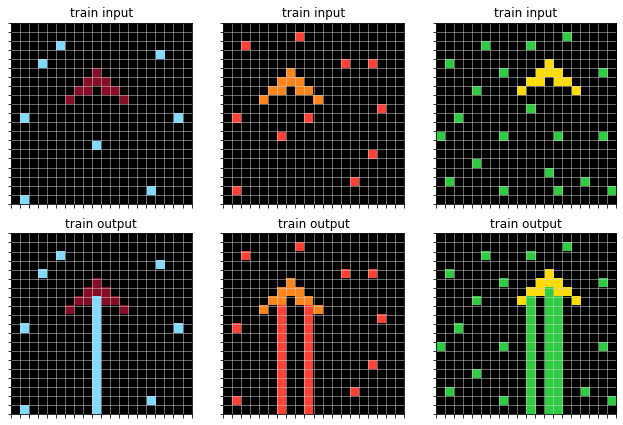

23 objects
[[6]]
[[6]]
[[6]]
[[6]]
[[6]]
[[0 0 1 0 0]
 [0 1 1 1 0]
 [1 1 0 1 1]]
[[6]]
[[6]]
[[1]]
[[1]]
[[6]]
[[6]]
[[6]]
[[6]]
[[6]]
[[6]]
[[6]]
[[6]]
[[6]]
[[6]]
[[6]]
[[6]]
[[6]]
21 objects
[[6]]
[[6]]
[[6]]
[[6]]
[[6]]
[[0 0 1 0 0]
 [0 1 1 1 0]
 [1 1 0 1 1]]
[[6]]
[[6]]
[[1]]
[[6 6]
 [6 6]
 [6 6]
 [6 6]
 [6 6]
 [6 6]
 [6 6]
 [6 6]
 [6 6]
 [6 6]
 [6 6]
 [6 6]
 [6 6]
 [6 6]]
[[6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]]
[[1]]
[[6]]
[[6]]
[[6]]
[[6]]
[[6]]
[[6]]
[[6]]
[[6]]
[[6]]


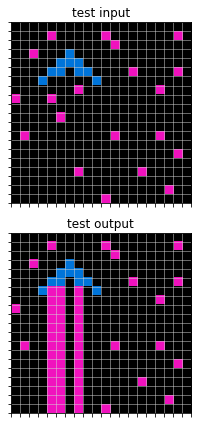

6d75e8bb.json
Icecuber solved? True
['rectangle_guessing', 'pattern_completion']
1 objects
[[8 8 8 0]
 [8 0 0 0]
 [8 8 8 8]
 [8 8 0 0]
 [8 8 8 0]
 [8 0 0 0]
 [8 8 8 0]
 [8 8 8 0]
 [8 8 0 0]]
3 objects
[[8 8 8 0]
 [8 0 0 0]
 [8 8 8 8]
 [8 8 0 0]
 [8 8 8 0]
 [8 0 0 0]
 [8 8 8 0]
 [8 8 8 0]
 [8 8 0 0]]
[[0 0 2]
 [2 2 2]]
[[0 2 2]
 [0 0 2]
 [2 2 2]
 [0 0 2]
 [0 0 2]
 [0 2 2]]
1 objects
[[8 8 8 8 8 8]
 [8 0 8 8 0 8]
 [8 0 8 0 0 8]
 [0 0 8 0 8 8]]
3 objects
[[8 8 8 8 8 8]
 [8 0 8 8 0 8]
 [8 0 8 0 0 8]
 [0 0 8 0 8 8]]
[[0 2]
 [0 2]
 [2 2]]
[[0 2]
 [2 2]
 [2 0]]
1 objects
[[8 8 8 8 8]
 [0 0 8 0 8]
 [0 8 8 8 8]
 [0 0 8 8 8]
 [0 0 0 8 8]
 [0 0 8 8 8]]
3 objects
[[8 8 8 8 8]
 [0 0 8 0 8]
 [0 8 8 8 8]
 [0 0 8 8 8]
 [0 0 0 8 8]
 [0 0 8 8 8]]
[[2 2 0]
 [2 0 0]
 [2 2 0]
 [2 2 2]
 [2 2 0]]
[[2]]


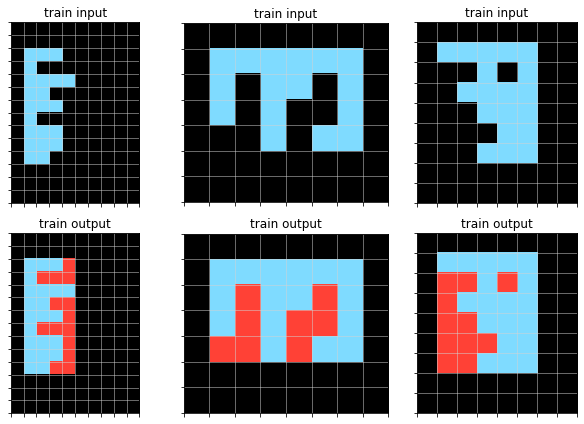

1 objects
[[8 0 0 0 0 0 0]
 [8 0 0 0 8 8 0]
 [8 0 8 0 0 8 0]
 [8 8 8 0 0 8 0]
 [8 8 8 8 0 8 8]
 [8 8 8 8 8 8 8]]
2 objects
[[8 0 0 0 0 0 0]
 [8 0 0 0 8 8 0]
 [8 0 8 0 0 8 0]
 [8 8 8 0 0 8 0]
 [8 8 8 8 0 8 8]
 [8 8 8 8 8 8 8]]
[[2 2 2 2 2 2]
 [2 2 2 0 0 2]
 [2 0 2 2 0 2]
 [0 0 2 2 0 2]
 [0 0 0 2 0 0]]


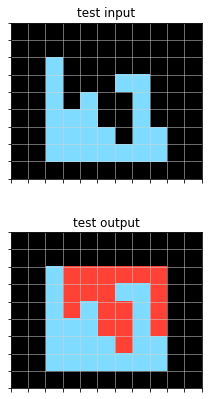

6e02f1e3.json
Icecuber solved? False
['count_different_colors', 'associate_images_to_numbers']
2 objects
[[2 2 2]
 [0 2 0]]
[[3 0 3]
 [3 3 3]]
3 objects
[[5]]
[[5]]
[[5]]
3 objects
[[3 3 3]]
[[4 0]
 [4 4]]
[[2 2]
 [0 2]]
3 objects
[[5]]
[[5]]
[[5]]
1 objects
[[4 4 4]
 [4 4 4]
 [4 4 4]]
1 objects
[[5 5 5]]
1 objects
[[3 3 3]
 [3 3 3]
 [3 3 3]]
1 objects
[[5 5 5]]
2 objects
[[4 4 4]
 [4 4 4]]
[[3 3 3]]
3 objects
[[5]]
[[5]]
[[5]]


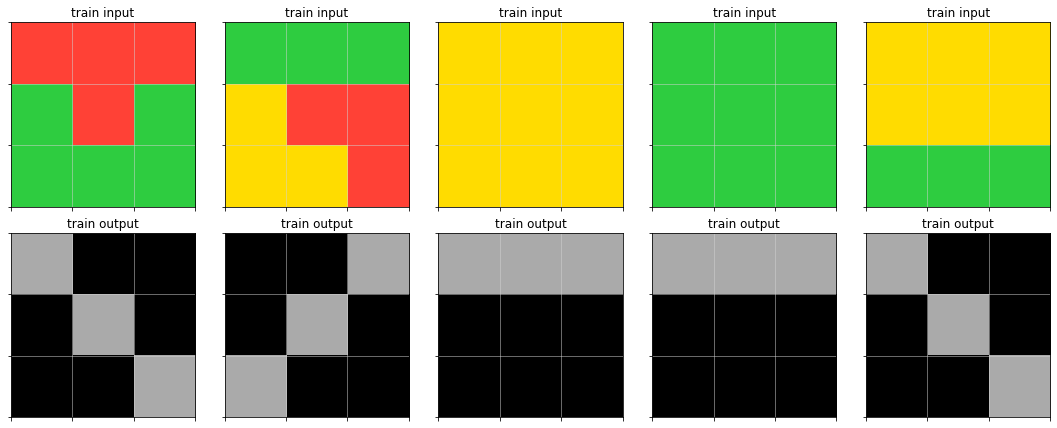

7 objects
[[4 4 4]]
[[2]]
[[3]]
[[2]]
[[3]]
[[2]]
[[3]]
3 objects
[[5]]
[[5]]
[[5]]


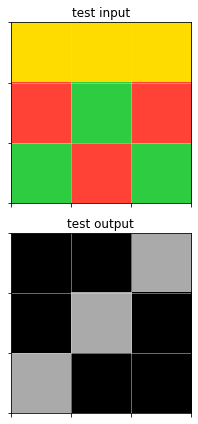

6e19193c.json
Icecuber solved? False
['draw_line_from_point', 'direction_guessing', 'diagonals']
2 objects
[[7 0]
 [7 7]]
[[7 7]
 [0 7]]
8 objects
[[7]]
[[7]]
[[7 0]
 [7 7]]
[[7 7]
 [0 7]]
[[7]]
[[7]]
[[7]]
[[7]]
2 objects
[[9 9]
 [0 9]]
[[9 0]
 [9 9]]
10 objects
[[9 9]
 [0 9]]
[[9]]
[[9]]
[[9]]
[[9]]
[[9]]
[[9]]
[[9]]
[[9]]
[[9 0]
 [9 9]]


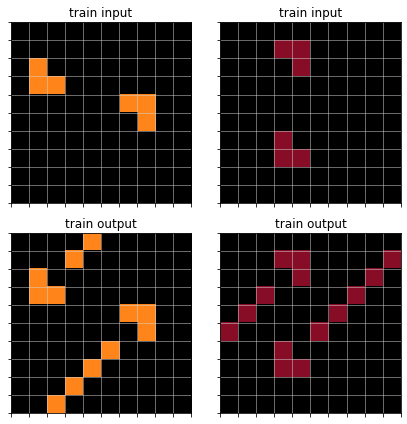

3 objects
[[0 8]
 [8 8]]
[[8 8]
 [8 0]]
[[8 8]
 [0 8]]
8 objects
[[8]]
[[8]]
[[0 8]
 [8 8]]
[[8 8]
 [8 0]]
[[8 8]
 [0 8]]
[[8]]
[[8]]
[[8]]


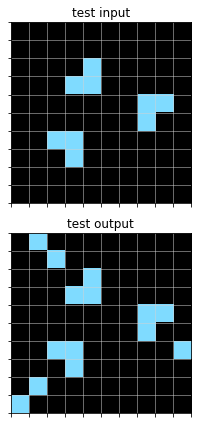

6e82a1ae.json
Icecuber solved? False
['recoloring', 'count_tiles', 'associate_colors_to_numbers']
6 objects
[[5 5]
 [5 5]]
[[5 5 0]
 [0 5 5]]
[[5]
 [5]
 [5]]
[[5 5]]
[[5]
 [5]]
[[0 5]
 [5 5]]
6 objects
[[1 1]
 [1 1]]
[[1 1 0]
 [0 1 1]]
[[2]
 [2]
 [2]]
[[3 3]]
[[3]
 [3]]
[[0 2]
 [2 2]]
5 objects
[[5 5 5]]
[[5]
 [5]]
[[5 5]
 [5 0]]
[[0 5 0]
 [5 5 5]]
[[5 5]
 [5 5]]
5 objects
[[2 2 2]]
[[3]
 [3]]
[[2 2]
 [2 0]]
[[0 1 0]
 [1 1 1]]
[[1 1]
 [1 1]]
4 objects
[[5]
 [5]]
[[5 5]
 [0 5]]
[[5 5]]
[[5 0]
 [5 5]
 [5 0]]
4 objects
[[3]
 [3]]
[[2 2]
 [0 2]]
[[3 3]]
[[1 0]
 [1 1]
 [1 0]]


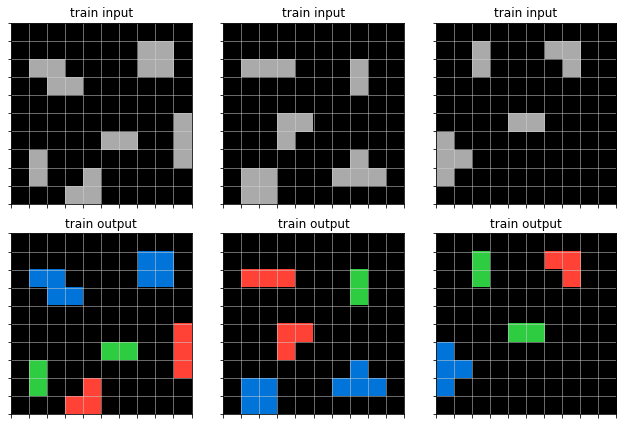

6 objects
[[5]
 [5]
 [5]
 [5]]
[[0 5 5]
 [5 5 0]]
[[5 5]
 [0 5]]
[[5]
 [5]
 [5]]
[[5 5]]
[[5]
 [5]]
6 objects
[[1]
 [1]
 [1]
 [1]]
[[0 1 1]
 [1 1 0]]
[[2 2]
 [0 2]]
[[2]
 [2]
 [2]]
[[3 3]]
[[3]
 [3]]


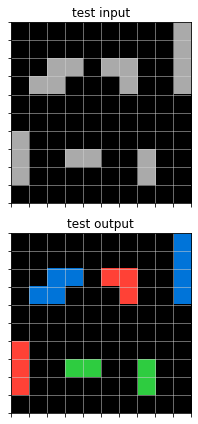

6ecd11f4.json
Icecuber solved? False
['color_palette', 'recoloring', 'pattern_resizing', 'crop']
14 objects
[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]
[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]
[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]
[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]
[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]
[[3]]
[[1]]
[[7]]
[[2]]
[[8]]
[[9]]
[[3]]
[[4]]
[[6]]
5 objects
[[3]]
[[7]]
[[8]]
[[3]]
[[6]]
11 objects
[[3 3 3 0 0 0 0 0 0]
 [3 3 3 0 0 0 0 0 0]
 [3 3 3 0 0 0 0 0 0]
 [3 3 3 3 3 3 0 0 0]
 [3 3 3 3 3 3 0 0 0]
 [3 3 3 3 3 3 0 0 0]
 [0 0 0 3 3 3 3 3 3]
 [0 0 0 3 3 3 3 3 3]
 [0 0 0 3 3 3 3 3 3]]
[[3 3 3]
 [3 3 3]
 [3 3 3]]
[[2]]
[[1]]
[[7]]
[[4]]
[[8]]
[[9]]
[[8]]
[[6]]
[[1]]
6 objects
[[2]]
[[7]]
[[4]]
[[8]]
[[6]]
[[1]]
19 objects
[[8 8 8 8 0 0 0 0 0 0 0 0]
 [8 8 8 8 0 0 0 0 0 0 0 0]
 [8 8 8 8 0 0 0 0 0 0 0 0]
 [8 8 8 8 0 0 0 0 0 0 0 0]
 [8 8 8 8 0 0 0 0 0 

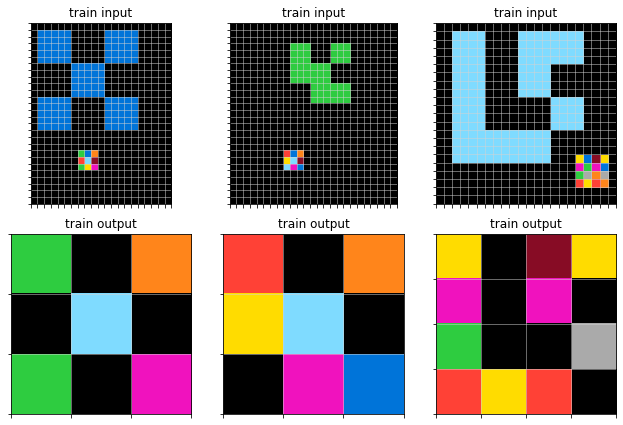

16 objects
[[2 2 2]
 [2 2 2]
 [2 2 2]]
[[0 0 0 0 0 0 2 2 2 2 2 2]
 [0 0 0 0 0 0 2 2 2 2 2 2]
 [0 0 0 0 0 0 2 2 2 2 2 2]
 [0 0 0 2 2 2 2 2 2 0 0 0]
 [0 0 0 2 2 2 2 2 2 0 0 0]
 [0 0 0 2 2 2 2 2 2 0 0 0]
 [2 2 2 2 2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2 2 2 2 2]
 [2 2 2 0 0 0 0 0 0 2 2 2]
 [2 2 2 0 0 0 0 0 0 2 2 2]
 [2 2 2 0 0 0 0 0 0 2 2 2]]
[[4]]
[[8]]
[[6]]
[[3]]
[[9]]
[[3 3]]
[[5]]
[[6]]
[[7 7]]
[[4]]
[[1]]
[[5]]
[[8]]
[[1]]
9 objects
[[4]]
[[6]]
[[3]]
[[3 3]]
[[6]]
[[7 7]]
[[4]]
[[1]]
[[1]]


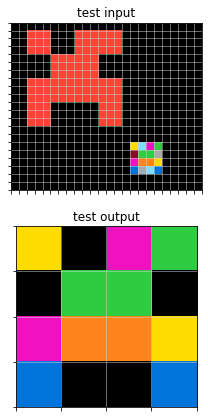

6f8cd79b.json
Icecuber solved? True
['ex_nihilo', 'contouring']
0 objects
1 objects
[[8 8 8]
 [8 0 8]
 [8 8 8]]
0 objects
1 objects
[[8 8 8]
 [8 0 8]
 [8 0 8]
 [8 8 8]]
0 objects
1 objects
[[8 8 8 8]
 [8 0 0 8]
 [8 0 0 8]
 [8 0 0 8]
 [8 8 8 8]]
0 objects
1 objects
[[8 8 8 8 8 8]
 [8 0 0 0 0 8]
 [8 0 0 0 0 8]
 [8 0 0 0 0 8]
 [8 8 8 8 8 8]]


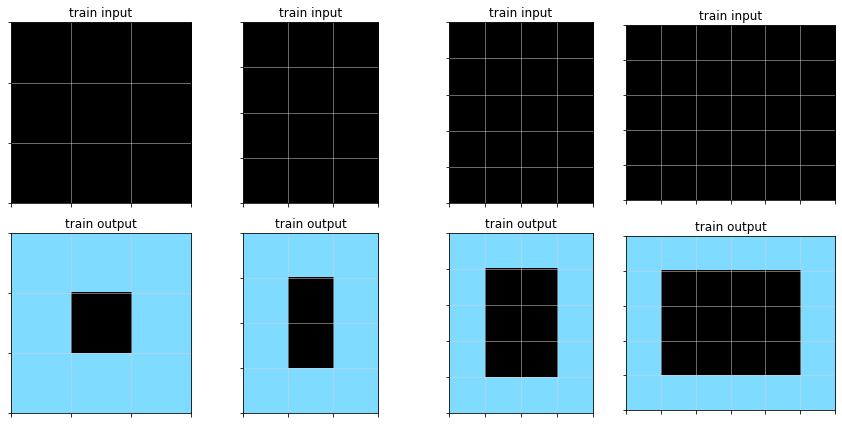

0 objects
1 objects
[[8 8 8 8 8 8]
 [8 0 0 0 0 8]
 [8 0 0 0 0 8]
 [8 0 0 0 0 8]
 [8 0 0 0 0 8]
 [8 0 0 0 0 8]
 [8 8 8 8 8 8]]


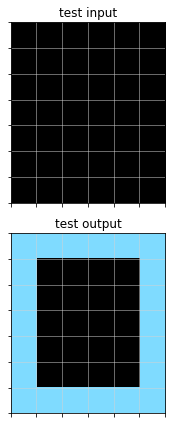

6fa7a44f.json
Icecuber solved? True
['image_repetition', 'image_reflection']
4 objects
[[9]
 [9]]
[[1 0]
 [1 0]
 [1 1]]
[[4]
 [4]]
[[2]]
6 objects
[[9]
 [9]]
[[1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 0]]
[[4]
 [4]]
[[2]
 [2]]
[[9]
 [9]]
[[4]
 [4]]
9 objects
[[4]]
[[8]]
[[4]]
[[7]]
[[6]]
[[7]]
[[8]]
[[7]]
[[8]]
15 objects
[[4]]
[[8]]
[[4]]
[[7]]
[[6]]
[[7]]
[[8]
 [8]]
[[7]
 [7]]
[[8]
 [8]]
[[7]]
[[6]]
[[7]]
[[4]]
[[8]]
[[4]]
6 objects
[[7 7 7]]
[[9]]
[[5 5]]
[[5]]
[[1]]
[[7]]
9 objects
[[7 7 7]]
[[9]]
[[5 5]]
[[5]
 [5]]
[[1]
 [1]]
[[7]
 [7]]
[[9]]
[[5 5]]
[[7 7 7]]
5 objects
[[2]
 [2]
 [2]]
[[6]
 [6]]
[[9]
 [9]]
[[9]]
[[2]]
7 objects
[[2]
 [2]
 [2]
 [2]
 [2]
 [2]]
[[6]
 [6]]
[[9]
 [9]]
[[9]
 [9]]
[[2]
 [2]]
[[6]
 [6]]
[[9]
 [9]]


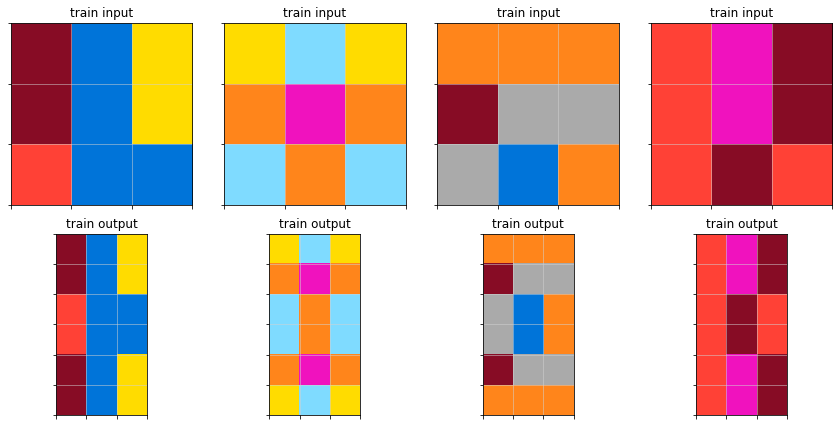

7 objects
[[2]]
[[9]]
[[2]
 [2]]
[[8]]
[[5]]
[[2 2]]
[[8]]
12 objects
[[2]]
[[9]]
[[2]
 [2]]
[[8]]
[[5]]
[[2 2]
 [2 2]]
[[8]
 [8]]
[[8]]
[[5]]
[[2]
 [2]]
[[2]]
[[9]]


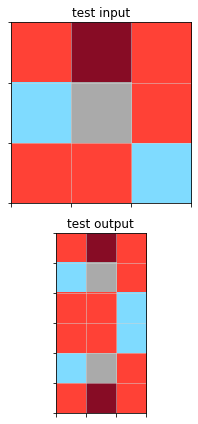

72322fa7.json
Icecuber solved? False
['pattern_repetition', 'pattern_juxtaposition']
17 objects
[[3]]
[[8]]
[[8]]
[[6]]
[[8]]
[[8]]
[[6]]
[[1]]
[[1]]
[[8]]
[[3]]
[[6]]
[[8]]
[[8]]
[[1]]
[[1]]
[[8]]
30 objects
[[1]]
[[1]]
[[3]]
[[1]]
[[1]]
[[8]]
[[8]]
[[6]]
[[8]]
[[8]]
[[8]]
[[8]]
[[6]]
[[8]]
[[8]]
[[1]]
[[1]]
[[8]]
[[8]]
[[3]]
[[8]]
[[6]]
[[8]]
[[8]]
[[6]]
[[8]]
[[1]]
[[1]]
[[8]]
[[8]]
7 objects
[[4]]
[[8]]
[[4]]
[[8]]
[[4]]
[[4]]
[[8]]
12 objects
[[4]]
[[8]]
[[4]]
[[4]]
[[8]]
[[4]]
[[4]]
[[8]]
[[4]]
[[4]]
[[8]]
[[4]]
10 objects
[[8]]
[[2]]
[[8]]
[[8]]
[[8]]
[[1]]
[[3]]
[[1]]
[[2]]
[[3]]
15 objects
[[8]]
[[2]]
[[8]]
[[8]]
[[2]]
[[8]]
[[1]]
[[3]]
[[1]]
[[8]]
[[2]]
[[8]]
[[1]]
[[3]]
[[1]]


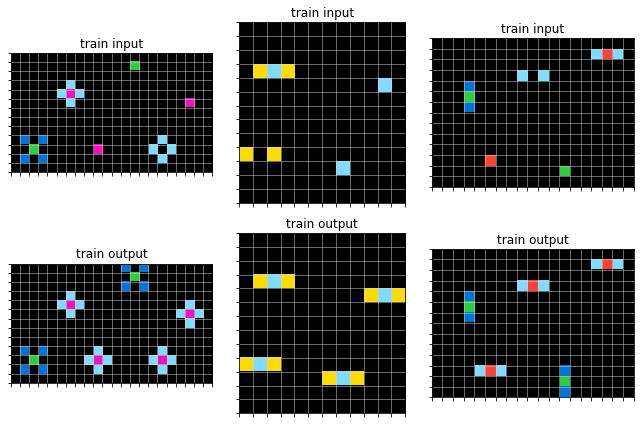

22 objects
[[3]]
[[7]]
[[3]]
[[8]]
[[4]]
[[3]]
[[3]]
[[2]]
[[2]]
[[4]]
[[2]]
[[2]]
[[8]]
[[7]]
[[2]]
[[2]]
[[2]]
[[1]]
[[4]]
[[2]]
[[8]]
[[1]]
38 objects
[[1]]
[[3]]
[[7]]
[[3]]
[[2]]
[[8]]
[[2]]
[[4]]
[[2]]
[[1]]
[[2]]
[[3]]
[[7]]
[[3]]
[[2]]
[[2]]
[[4]]
[[2]]
[[1]]
[[2]]
[[8]]
[[3]]
[[7]]
[[3]]
[[1]]
[[2]]
[[2]]
[[2]]
[[4]]
[[2]]
[[1]]
[[2]]
[[4]]
[[2]]
[[2]]
[[8]]
[[2]]
[[1]]


72ca375d.json
Icecuber solved? False
['find_the_intruder', 'detect_symmetry', 'crop']
4 objects
[[2 2 0 0]
 [0 2 2 2]]
[[7 7]
 [0 7]]
[[7]]
[[6 6 6 6]
 [0 6 6 0]]
1 objects
[[6 6 6 6]
 [0 6 6 0]]
3 objects
[[4 4]
 [4 4]]
[[8 8 8 0]
 [8 0 8 8]]
[[0 2 2 2 2]
 [2 2 2 0 0]]
1 objects
[[4 4]
 [4 4]]
3 objects
[[3 3]
 [0 3]
 [0 3]]
[[5 0 0 5]
 [5 5 5 5]]
[[0 0 0 8 8 8 0]
 [8 8 8 8 0 8 8]]
1 objects
[[5 0 0 5]
 [5 5 5 5]]


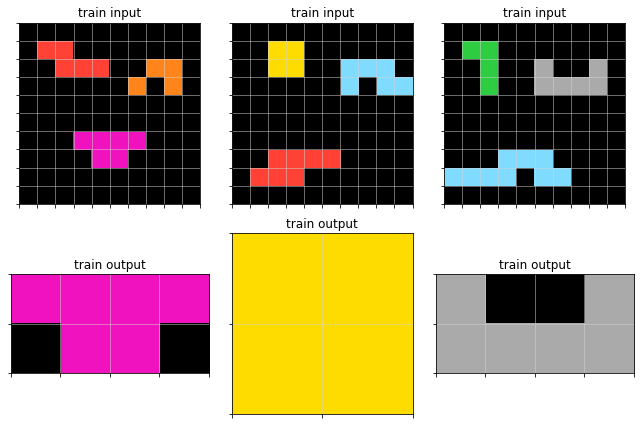

3 objects
[[3 0 0 3]
 [3 3 3 3]
 [0 0 0 3]]
[[0 9 9 0]
 [0 9 9 0]
 [9 9 9 9]]
[[4 4 4 4 4]
 [4 0 0 4 4]]
1 objects
[[0 9 9 0]
 [0 9 9 0]
 [9 9 9 9]]


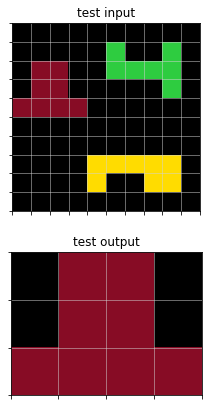

73251a56.json
Icecuber solved? True
['image_filling', 'diagonal_symmetry']
60 objects
[[1]]
[[6]]
[[1 1]]
[[2 2]]
[[3 3]]
[[4 4]]
[[5 5]]
[[6 6]]
[[1 1]]
[[2 2]]
[[3 3]]
[[4]]
[[6]]
[[1]]
[[6 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 6 6 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 6 6 6 6 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 6 6 6 6 6 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 6 6 6 6 6 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 6 6 6 6 6 6 6 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 6 6 6 6 6 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 6 6 6 6 6 6 6 0 0 0]
 [0 0 0 0 0 0 0 0 0 6 6 6 6 6 6 6 6 6 0]
 [0 0 0 0 0 0 0 0 0 6 6 6 6 6 6 6 6 6 6]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 6 6 6 6]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 6 6 6 6]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 6 6 6 6]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 6 6 6 6]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 6 6 6 6 6]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 6 6 6 6]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 6 6 6]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 6 6]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 6]]
[[1 1 1 0 0 0 0 0 0]
 [0 0 1 1 1

65 objects
[[5]]
[[4]]
[[5 5]]
[[6 6]]
[[7 7]]
[[8 8]]
[[1 1]]
[[2 2]]
[[3 3]]
[[4 4]]
[[5 5]]
[[6]]
[[4]]
[[5]]
[[4 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 4 4 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 4 4 4 4 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 4 4 4 4 4 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 4 4 4 4 4 4 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 4 4 4 4 4 4 4 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 4 4 4 4 4 4 4 4 0 0 0 0 0]
 [0 0 0 0 0 0 0 4 4 4 4 4 4 4 4 4 0 0 0]
 [0 0 0 0 0 0 0 0 4 4 4 4 4 4 4 4 4 4 0]
 [0 0 0 0 0 0 0 0 0 4 4 4 4 4 4 4 4 4 4]
 [0 0 0 0 0 0 0 0 0 0 4 4 4 4 4 4 4 4 4]
 [0 0 0 0 0 0 0 0 0 0 0 4 4 4 4 4 4 4 4]
 [0 0 0 0 0 0 0 0 0 0 0 0 4 4 4 4 4 4 4]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 4 4 4 4 4 4]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 4 4 4 4]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 4 4 4]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 4 4]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 4]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4]]
[[5 5 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 5 5 5 5 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 5 5 5 5 5 0 0 0 0 0 0 0

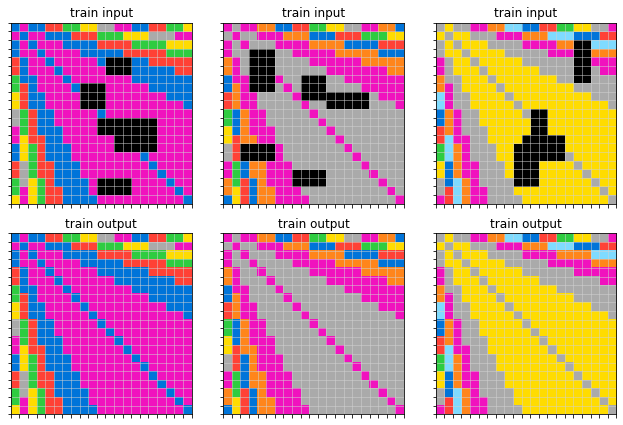

66 objects
[[4]]
[[3]]
[[4 4]]
[[5 5]]
[[6 6]]
[[7 7]]
[[8 8]]
[[9 9]]
[[1 1]]
[[2 2]]
[[3 3]]
[[4]]
[[3]]
[[4]]
[[3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 3 3 3 3 3 3 3 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 3 3 3 3 3 3 3 3 0 0 0 0 0]
 [0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 0 0 0]
 [0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 0]
 [0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3]
 [0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3]
 [0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3]
 [0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]]
[[4 4 4 0 0 0]
 [0 0 4 4 4 4]
 [0 0 0 0 4 4]]
[[5 5 5]]
[[6]]
[[7 7 7]]
[[8 8 8]]
[[9 9]]
[[4]
 [4]]
[[3 0 

7447852a.json
Icecuber solved? False
['pattern_expansion', 'pairwise_analogy']
10 objects
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
12 objects
[[2]]
[[2]]
[[4 4 4]
 [0 4 0]]
[[2]]
[[4 0]
 [4 4]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
15 objects
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
18 objects
[[2]]
[[2]]
[[4 4 4]
 [0 4 0]]
[[2]]
[[2]]
[[4 0]
 [4 4]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[0 4 0]
 [4 4 4]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
18 objects
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
22 objects
[[2]]
[[2]]
[[4 4 4]
 [0 4 0]]
[[2]]
[[2]]
[[2]]
[[4]]
[[4 0]
 [4 4]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[0 4 0]
 [4 4 4]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]


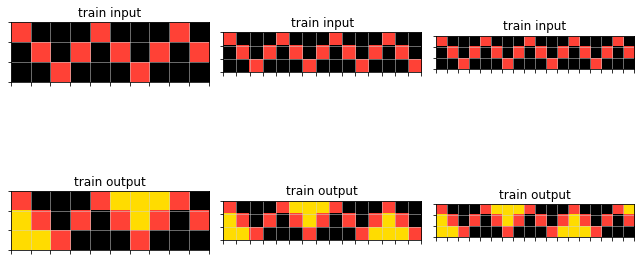

25 objects
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
30 objects
[[2]]
[[2]]
[[4 4 4]
 [0 4 0]]
[[2]]
[[2]]
[[2]]
[[4 4 4]
 [0 4 0]]
[[2]]
[[2]]
[[4 0]
 [4 4]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[0 4 0]
 [4 4 4]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[0 4]
 [4 4]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]


7468f01a.json
Icecuber solved? True
['crop', 'image_reflection']
3 objects
[[8 8 8 8 8 8 0 8]
 [8 0 0 8 8 8 8 8]
 [8 8 0 0 8 8 8 8]
 [8 8 8 8 8 8 8 8]]
[[2]]
[[2 2 0]
 [0 2 2]]
3 objects
[[8 0 8 8 8 8 8 8]
 [8 8 8 8 8 0 0 8]
 [8 8 8 8 0 0 8 8]
 [8 8 8 8 8 8 8 8]]
[[2]]
[[0 2 2]
 [2 2 0]]
2 objects
[[4 4 4 4 4]
 [4 4 4 4 4]
 [4 0 0 4 4]
 [4 4 0 0 4]
 [4 4 0 4 4]]
[[1 1 0]
 [0 1 1]
 [0 1 0]]
2 objects
[[4 4 4 4 4]
 [4 4 4 4 4]
 [4 4 0 0 4]
 [4 0 0 4 4]
 [4 4 0 4 4]]
[[0 1 1]
 [1 1 0]
 [0 1 0]]
4 objects
[[6 6 6 0]
 [6 0 0 0]
 [6 6 6 6]
 [6 6 6 6]]
[[0 0 3]
 [3 3 3]]
[[6 6]
 [6 6]
 [0 6]
 [0 6]]
[[3]
 [3]]
4 objects
[[6 6]
 [6 6]
 [6 0]
 [6 0]]
[[3 0 0]
 [3 3 3]]
[[0 6 6 6]
 [0 0 0 6]
 [6 6 6 6]
 [6 6 6 6]]
[[3]
 [3]]


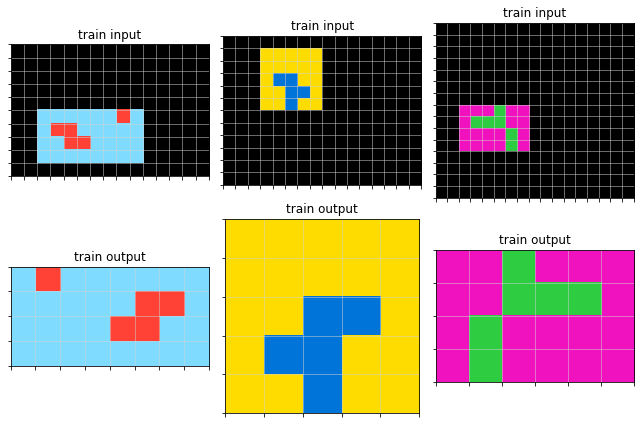

5 objects
[[1 1 1 1 0 1 1 1]
 [1 1 1 1 1 0 0 1]
 [1 1 1 1 1 1 1 1]
 [0 0 0 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 0 0 0 1 1 1]
 [1 1 1 1 1 1 1 1]]
[[8]]
[[8 8]]
[[8 8 8]]
[[8 8 8]]
5 objects
[[1 1 1 0 1 1 1 1]
 [1 0 0 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 0 0 0]
 [1 1 1 1 1 1 1 1]
 [1 1 1 0 0 0 1 1]
 [1 1 1 1 1 1 1 1]]
[[8]]
[[8 8]]
[[8 8 8]]
[[8 8 8]]


746b3537.json
Icecuber solved? True
['crop', 'direction_guessing']
3 objects
[[1 1 1]]
[[2 2 2]]
[[1 1 1]]
3 objects
[[1]]
[[2]]
[[1]]
3 objects
[[3]
 [3]
 [3]]
[[4]
 [4]
 [4]]
[[6]
 [6]
 [6]]
3 objects
[[3]]
[[4]]
[[6]]
4 objects
[[2]
 [2]
 [2]]
[[3 3]
 [3 3]
 [3 3]]
[[8]
 [8]
 [8]]
[[1]
 [1]
 [1]]
4 objects
[[2]]
[[3]]
[[8]]
[[1]]
3 objects
[[2 2]]
[[6 6]]
[[8 8]
 [8 8]]
3 objects
[[2]]
[[6]]
[[8]]
4 objects
[[4 4 4 4]
 [4 4 4 4]]
[[2 2 2 2]
 [2 2 2 2]]
[[8 8 8 8]]
[[3 3 3 3]]
4 objects
[[4]]
[[2]]
[[8]]
[[3]]


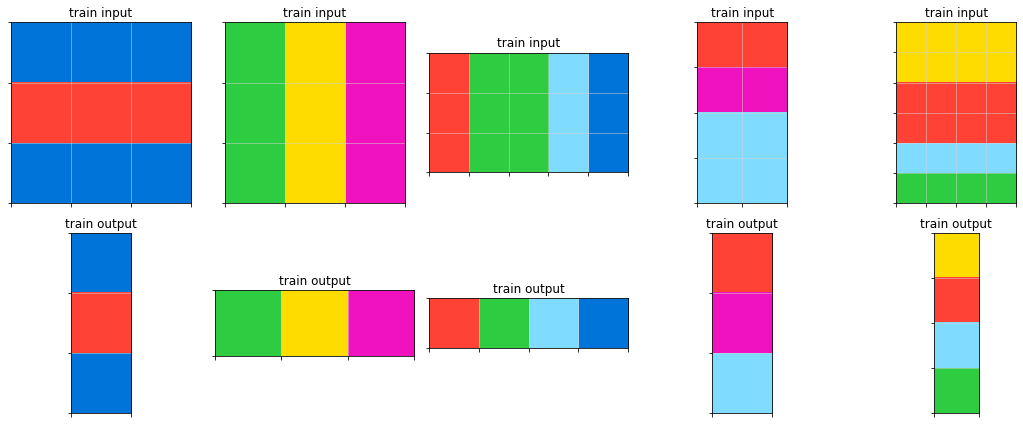

5 objects
[[1 1]
 [1 1]
 [1 1]
 [1 1]]
[[2]
 [2]
 [2]
 [2]]
[[3 3 3]
 [3 3 3]
 [3 3 3]
 [3 3 3]]
[[8 8]
 [8 8]
 [8 8]
 [8 8]]
[[4]
 [4]
 [4]
 [4]]
5 objects
[[1]]
[[2]]
[[3]]
[[8]]
[[4]]


74dd1130.json
Icecuber solved? True
['image_reflection', 'diagonal_symmetry']
6 objects
[[2 2]]
[[1]
 [1]]
[[1]]
[[5]]
[[5]]
[[2 2]]
6 objects
[[2]
 [2]]
[[1]]
[[5]]
[[5]]
[[2]
 [2]]
[[1 1]]
4 objects
[[2 2 0]
 [0 2 2]]
[[5]]
[[6]]
[[5 5 5]]
4 objects
[[2 0]
 [2 2]
 [0 2]]
[[6]]
[[5]
 [5]
 [5]]
[[5]]
6 objects
[[9 9]]
[[5]]
[[5 5]
 [5 0]]
[[8]]
[[8]]
[[9]]
6 objects
[[9]
 [9]]
[[5 5]
 [5 0]]
[[8]]
[[5]]
[[8]]
[[9]]
5 objects
[[2]
 [2]
 [2]]
[[6 6]]
[[1 1]]
[[6]]
[[2]]
5 objects
[[2 2 2]]
[[6]
 [6]]
[[1]
 [1]]
[[6]]
[[2]]


4 objects
[[9]
 [9]
 [9]]
[[3]]
[[0 4]
 [4 4]
 [0 4]]
[[3]]
4 objects
[[9 9 9]]
[[3]]
[[0 4 0]
 [4 4 4]]
[[3]]


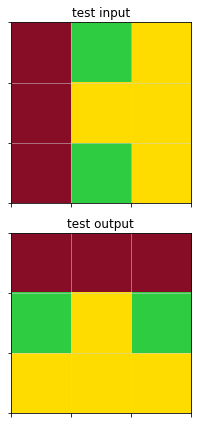

75b8110e.json
Icecuber solved? True
['separate_images', 'image_juxtaposition']
10 objects
[[4 4]
 [4 4]]
[[5]]
[[4]]
[[5]]
[[4]]
[[5 5]]
[[0 0 6 0]
 [6 6 6 0]
 [6 0 6 6]
 [0 6 6 0]]
[[9]]
[[9]]
[[9 9]
 [9 0]]
9 objects
[[4 4]]
[[5]]
[[6 6 6]
 [6 0 0]]
[[9]]
[[9]]
[[5]]
[[6]]
[[5 5]]
[[6]]
14 objects
[[4]]
[[4]]
[[5 5]]
[[5 5]]
[[4 4]
 [4 0]]
[[0 4]
 [4 4]]
[[5 0 0]
 [5 5 5]]
[[6]]
[[9]
 [9]
 [9]]
[[9]]
[[6]]
[[6]]
[[0 6]
 [6 6]]
[[9]
 [9]]
8 objects
[[5 5]]
[[6]]
[[9]]
[[5 5]]
[[6]]
[[5 0 0]
 [5 5 5]]
[[6]]
[[4]]
11 objects
[[4]]
[[5]]
[[4]]
[[5]]
[[4]
 [4]]
[[5]
 [5]]
[[4]]
[[6]
 [6]
 [6]
 [6]]
[[0 9 9]
 [0 9 0]
 [9 9 9]]
[[9]]
[[6]
 [6]]
10 objects
[[5]]
[[9 9]]
[[4]]
[[6]
 [6]
 [6]]
[[5]]
[[9]]
[[9]]
[[5]
 [5]]
[[4]
 [4]]
[[4]]
12 objects
[[4]]
[[4]]
[[5]]
[[0 5]
 [0 5]
 [5 5]
 [0 5]]
[[4 0]
 [4 4]]
[[5]]
[[4]]
[[5]]
[[6 6 6]
 [6 6 6]
 [6 0 0]
 [6 6 0]]
[[9]]
[[0 0 9 9]
 [0 9 9 9]
 [9 9 0 9]
 [9 0 9 9]]
[[6]
 [6]]
10 objects
[[6]]
[[5]]
[[0 6]
 [6 6]]
[[0 5]
 [0 5]
 [5 5]
 [0 5]]
[[

11 objects
[[0 4 0 4]
 [0 4 4 4]
 [4 4 4 0]]
[[5]
 [5]]
[[0 5 5]
 [5 5 5]]
[[5]]
[[6]]
[[6 6]
 [0 6]]
[[9 9 9]
 [0 9 0]]
[[6]]
[[9 9]]
[[6]]
[[9]]
7 objects
[[5]
 [5]]
[[9]
 [9]]
[[6 6]]
[[0 5 5]
 [5 5 5]]
[[4]]
[[5]]
[[9]]


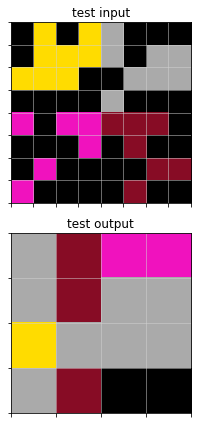

760b3cac.json
Icecuber solved? False
['pattern_reflection', 'direction_guessing']
3 objects
[[8]]
[[0 8]
 [8 8]
 [0 8]]
[[4 0 0]
 [4 4 4]
 [0 4 0]]
4 objects
[[8 0]
 [8 8]
 [8 0]]
[[8 8]]
[[0 8]
 [8 8]
 [0 8]]
[[4 0 0]
 [4 4 4]
 [0 4 0]]
2 objects
[[8 0 8]
 [8 8 8]
 [8 8 0]]
[[0 0 4]
 [4 4 4]
 [0 4 0]]
2 objects
[[8 0 8 8 0 8]
 [8 8 8 8 8 8]
 [8 8 0 0 8 8]]
[[0 0 4]
 [4 4 4]
 [0 4 0]]
4 objects
[[8]]
[[8 8]]
[[8]]
[[4 0 0]
 [4 4 4]
 [0 4 0]]
5 objects
[[8 8]]
[[8 8]]
[[8 8]]
[[8 8]]
[[4 0 0]
 [4 4 4]
 [0 4 0]]


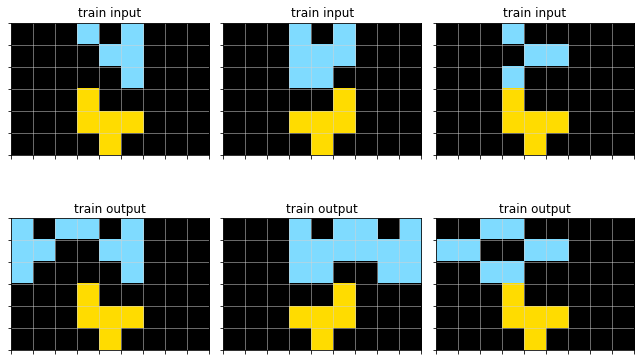

4 objects
[[8]]
[[0 8]
 [8 8]]
[[8]]
[[0 0 4]
 [4 4 4]
 [0 4 0]]
6 objects
[[8]]
[[0 8 8 0]
 [8 8 8 8]]
[[8]]
[[8]]
[[8]]
[[0 0 4]
 [4 4 4]
 [0 4 0]]


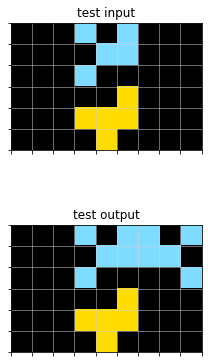

776ffc46.json
Icecuber solved? False
['recoloring', 'associate_colors_to_patterns', 'detect_enclosure', 'find_the_intruder']
6 objects
[[5 5 5 5 5 5 5]
 [5 0 0 0 0 0 5]
 [5 0 0 0 0 0 5]
 [5 0 0 0 0 0 5]
 [5 0 0 0 0 0 5]
 [5 0 0 0 0 0 5]
 [5 5 5 5 5 5 5]]
[[1 1 1]
 [1 1 1]
 [1 1 1]]
[[0 2 0]
 [2 2 2]
 [0 2 0]]
[[0 1 0]
 [1 1 1]
 [0 1 0]]
[[1 1 1 1]]
[[0 1 0]
 [1 1 1]
 [0 1 0]]
6 objects
[[5 5 5 5 5 5 5]
 [5 0 0 0 0 0 5]
 [5 0 0 0 0 0 5]
 [5 0 0 0 0 0 5]
 [5 0 0 0 0 0 5]
 [5 0 0 0 0 0 5]
 [5 5 5 5 5 5 5]]
[[1 1 1]
 [1 1 1]
 [1 1 1]]
[[0 2 0]
 [2 2 2]
 [0 2 0]]
[[0 2 0]
 [2 2 2]
 [0 2 0]]
[[1 1 1 1]]
[[0 2 0]
 [2 2 2]
 [0 2 0]]
6 objects
[[5 5 5 5 5 5 5]
 [5 0 0 0 0 0 5]
 [5 0 0 0 0 0 5]
 [5 0 0 0 0 0 5]
 [5 0 0 0 0 0 5]
 [5 0 0 0 0 0 5]
 [5 5 5 5 5 5 5]]
[[3 3 3]
 [3 3 3]
 [3 3 3]]
[[1 1 1]
 [1 1 1]
 [1 1 1]]
[[1]
 [1]
 [1]]
[[1 1 1]
 [1 1 1]
 [1 1 1]]
[[0 0 1 0 0]
 [0 1 1 1 0]
 [1 1 1 1 1]]
6 objects
[[5 5 5 5 5 5 5]
 [5 0 0 0 0 0 5]
 [5 0 0 0 0 0 5]
 [5 0 0 0 0 0 5]
 [5 0 0 0 0 0 5]
 [

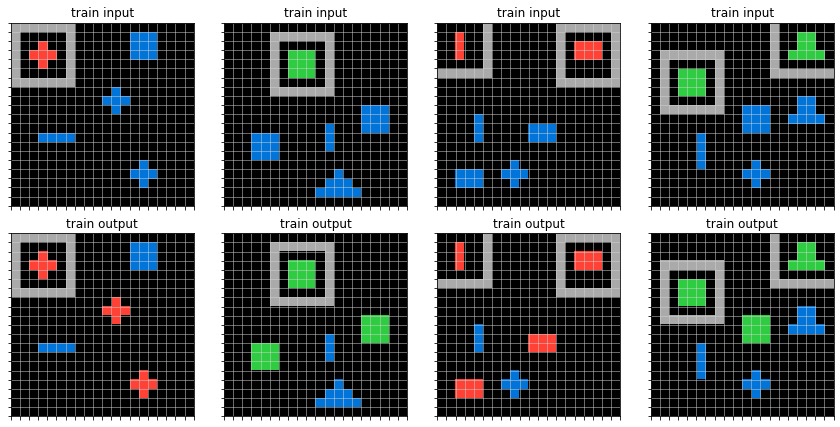

11 objects
[[5 0 0 0 0 0 0 0]
 [5 0 0 0 0 0 0 0]
 [5 0 0 0 0 0 0 0]
 [5 0 0 0 0 0 0 0]
 [5 0 0 0 0 0 0 0]
 [5 5 5 5 5 5 5 5]]
[[2 2 2]
 [2 2 2]]
[[1 1 1]
 [1 1 1]]
[[0 1 0 0]
 [0 1 0 0]
 [1 1 1 1]
 [0 1 0 0]]
[[0 1 1 0]
 [1 1 1 1]
 [1 1 1 1]
 [0 1 1 0]]
[[0 1 0]
 [1 1 1]
 [0 1 0]]
[[0 1 0]
 [1 1 1]
 [0 1 0]]
[[5 5 5 5 5 5 5]
 [0 0 0 0 0 0 5]
 [0 0 0 0 0 0 5]
 [0 0 0 0 0 0 5]
 [0 0 0 0 0 0 5]
 [0 0 0 0 0 0 5]
 [0 0 0 0 0 0 5]]
[[5 5 5 5 5 5 5]
 [5 0 0 0 0 0 5]
 [5 0 0 0 0 0 5]
 [5 0 0 0 0 0 5]
 [5 0 0 0 0 0 5]
 [5 0 0 0 0 0 5]
 [5 5 5 5 5 5 5]]
[[0 2 2 0]
 [2 2 2 2]
 [2 2 2 2]
 [0 2 2 0]]
[[0 2 0]
 [2 2 2]
 [0 2 0]]
11 objects
[[5 0 0 0 0 0 0 0]
 [5 0 0 0 0 0 0 0]
 [5 0 0 0 0 0 0 0]
 [5 0 0 0 0 0 0 0]
 [5 0 0 0 0 0 0 0]
 [5 5 5 5 5 5 5 5]]
[[2 2 2]
 [2 2 2]]
[[1 1 1]
 [1 1 1]]
[[0 1 0 0]
 [0 1 0 0]
 [1 1 1 1]
 [0 1 0 0]]
[[0 1 1 0]
 [1 1 1 1]
 [1 1 1 1]
 [0 1 1 0]]
[[0 2 0]
 [2 2 2]
 [0 2 0]]
[[0 2 0]
 [2 2 2]
 [0 2 0]]
[[5 5 5 5 5 5 5]
 [0 0 0 0 0 0 5]
 [0 0 0 0 0 0 5]
 [0 0 0 0 0 0 5]

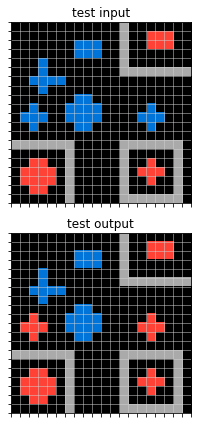

77fdfe62.json
Icecuber solved? False
['recoloring', 'color_guessing', 'detect_grid', 'crop']
9 objects
[[2]]
[[0 1 0 0 0 0 1 0]
 [1 1 1 1 1 1 1 1]
 [0 1 0 0 0 0 1 0]
 [0 1 0 0 0 0 1 0]
 [0 1 0 0 0 0 1 0]
 [0 1 0 0 0 0 1 0]
 [1 1 1 1 1 1 1 1]
 [0 1 0 0 0 0 1 0]]
[[3]]
[[0 8]
 [8 8]]
[[8]]
[[8 0]
 [8 8]]
[[8]]
[[4]]
[[6]]
4 objects
[[0 2]
 [2 2]]
[[3]]
[[6 0]
 [6 6]]
[[4]]
6 objects
[[9]]
[[0 1 0 0 1 0]
 [1 1 1 1 1 1]
 [0 1 0 0 1 0]
 [0 1 0 0 1 0]
 [1 1 1 1 1 1]
 [0 1 0 0 1 0]]
[[4]]
[[8 8]
 [8 0]]
[[2]]
[[3]]
3 objects
[[9]]
[[4]]
[[2]]
7 objects
[[6]]
[[0 1 0 0 0 0 1 0]
 [1 1 1 1 1 1 1 1]
 [0 1 0 0 0 0 1 0]
 [0 1 0 0 0 0 1 0]
 [0 1 0 0 0 0 1 0]
 [0 1 0 0 0 0 1 0]
 [1 1 1 1 1 1 1 1]
 [0 1 0 0 0 0 1 0]]
[[2]]
[[0 8 0 0]
 [8 8 8 0]
 [8 0 8 8]
 [8 8 8 0]]
[[8]]
[[7]]
[[4]]
5 objects
[[0 6]
 [6 6]]
[[2]]
[[2]]
[[7 0]
 [7 7]]
[[4 4]
 [4 0]]


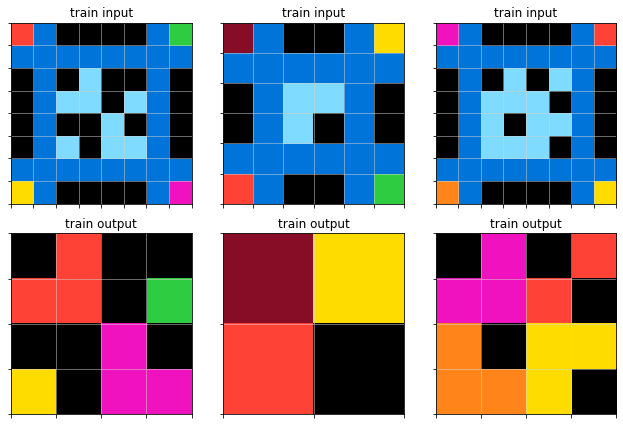

10 objects
[[3]]
[[0 1 0 0 0 0 0 0 1 0]
 [1 1 1 1 1 1 1 1 1 1]
 [0 1 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 1 0]
 [1 1 1 1 1 1 1 1 1 1]
 [0 1 0 0 0 0 0 0 1 0]]
[[4]]
[[0 8 8]
 [8 8 8]
 [0 0 8]]
[[0 8]
 [0 8]
 [8 8]
 [8 0]]
[[0 8]
 [8 8]
 [0 8]]
[[8]]
[[8]]
[[7]]
[[5]]
6 objects
[[0 3 3]
 [3 3 3]
 [0 0 3]]
[[4]
 [4]]
[[0 7]
 [7 7]
 [0 7]]
[[5 5]
 [5 0]]
[[5]]
[[5]]


780d0b14.json
Icecuber solved? False
['detect_grid', 'summarize']
13 objects
[[1 1 1 1 0 0 1 1]
 [1 1 1 0 1 0 1 1]
 [1 1 0 1 1 1 0 1]
 [1 1 0 1 0 1 1 1]
 [0 1 1 0 1 1 1 1]
 [0 0 1 1 1 1 0 0]
 [0 0 0 1 1 1 1 1]
 [0 0 0 1 1 0 1 1]]
[[0 0 8 8 8 8 8 0 8 8 8]
 [0 0 8 8 8 8 8 8 8 8 8]
 [0 8 8 8 8 8 8 8 8 8 8]
 [0 8 0 8 8 8 8 8 8 8 8]
 [8 0 8 8 0 8 8 8 0 8 8]
 [8 8 8 8 8 8 8 8 8 0 8]
 [8 8 8 0 8 8 8 0 8 0 0]
 [0 8 8 0 8 8 8 0 0 0 0]]
[[1 0]
 [1 1]
 [1 1]]
[[8]]
[[6 6 6 6 6 0 6 6]
 [6 6 6 6 6 6 6 0]
 [0 6 0 6 6 6 0 6]
 [6 6 6 0 6 6 6 6]
 [6 0 6 6 0 6 0 6]
 [6 6 6 6 6 0 6 6]
 [6 6 6 6 6 0 6 0]
 [6 6 6 0 6 6 0 0]
 [0 6 6 6 0 0 0 0]]
[[1]]
[[1 1 0]
 [0 1 1]]
[[0 0 0 0 0 1 1 1 0 0 0]
 [0 1 0 0 0 0 0 1 1 1 0]
 [1 1 0 0 0 1 0 1 1 0 1]
 [1 1 0 1 0 1 1 1 0 1 1]
 [1 1 1 1 0 1 1 0 1 0 1]
 [1 0 1 0 1 1 1 1 1 1 1]
 [1 0 1 0 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 0 0 1 1]
 [0 0 1 1 0 1 1 1 1 1 0]
 [1 1 1 1 1 0 1 1 1 1 1]
 [1 0 1 0 1 0 1 1 1 1 0]]
[[6]]
[[0 6 0]
 [0 6 0]
 [6 6 6]]
[[6 0]
 [6 6]]
[[6]]
[[6]]
4 objec

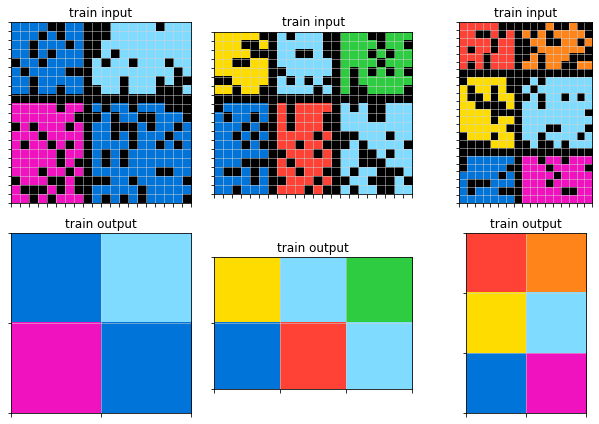

13 objects
[[3 3 3 0 3 3 3]
 [3 3 3 3 3 3 3]
 [0 3 0 0 3 3 0]
 [0 0 3 3 3 3 3]]
[[2 2 2 2 2 2 2]
 [2 2 0 2 2 2 2]
 [2 2 0 0 2 2 2]
 [2 0 2 2 2 2 2]]
[[0 0 4 4 4 4 0 4 4 4 4 4]
 [4 0 4 4 4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4 4 4 4 4]
 [4 0 0 4 4 4 4 4 4 4 4 4]]
[[3]]
[[1 1 1 1 1 0 1]
 [1 1 1 0 1 0 1]
 [1 0 1 1 1 1 1]
 [1 1 0 1 1 1 0]
 [0 0 0 1 1 0 0]
 [0 0 0 0 1 1 0]]
[[1 1 0 0 1 1 1]
 [1 1 1 1 0 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 0 1]
 [1 0 0 1 1 1 1]
 [0 1 1 1 0 1 1]
 [1 1 1 1 1 0 1]
 [1 1 1 1 1 0 0]
 [0 1 1 1 1 0 1]
 [1 1 1 1 1 1 1]
 [1 1 0 1 1 1 1]
 [0 1 0 1 1 1 1]
 [1 1 1 1 1 0 1]
 [1 1 1 0 1 1 0]]
[[8 8 8 0 8 8 8 8 8 0 8 0]
 [8 8 8 8 8 8 0 8 0 8 8 0]
 [8 8 8 8 8 8 8 0 8 8 8 8]
 [8 8 8 0 8 8 8 8 8 8 0 8]
 [0 0 8 8 8 0 8 8 0 8 8 8]
 [8 8 8 8 8 8 0 8 0 8 8 0]
 [8 8 8 8 8 0 0 0 8 8 8 8]
 [8 8 8 8 0 8 8 8 8 8 0 8]
 [0 8 8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 0 8 0]
 [8 0 8 0 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 0 8 0 8 8 8]
 [8 0 8 8 8 8 8 8 8 8 0 8]
 [8 0 8 8 8 8 8 0 8 8 8 8]]
[[1]]
[[1 1 1 0

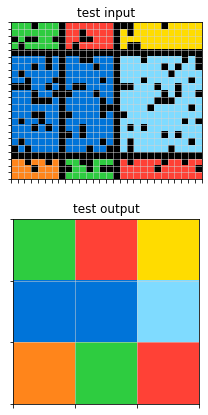

7837ac64.json
Icecuber solved? False
['detect_grid', 'color_guessing', 'grid_coloring', 'crop', 'extrapolate_image_from_grid']
29 objects
[[0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0]
 [0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0]
 [4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
 [0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0]
 [0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0]
 [4 4 4 4 4 0 0 0 0 0 0 0 0 0 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
 [0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 4 0 0 4 0 0 4 0 0]
 [0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 4 0 0 4 0 0 4 0 0]
 [4 4 4 4 4 0 0 0 0 0 0 0 0 0 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
 [0 0 4 0 0 0 0 0 0 0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0]
 [0 0 4 0 0 0 0 0 0 0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0]
 [4 4 4 4 4 0 0 0 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
 [0 0 4 0 0 0 0 0 0 0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0]
 [0 0 4 0 0 0 0 0 0 0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0 4 0 0]
 [4 4 4 

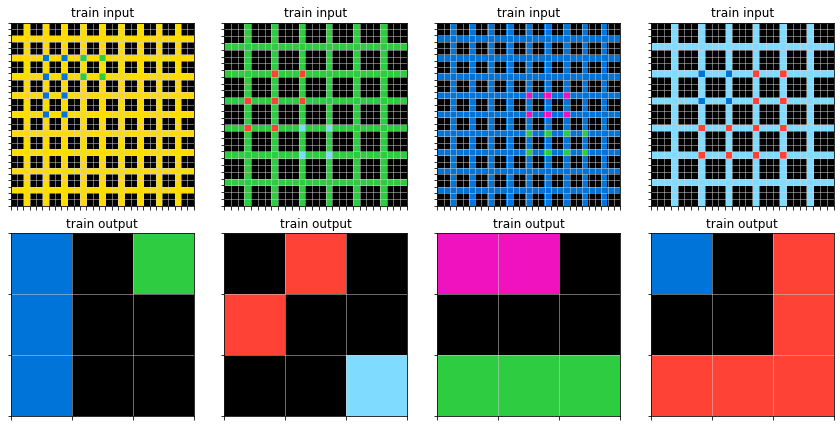

49 objects
[[2]
 [2]
 [2]
 [2]]
[[2]
 [2]
 [2]
 [2]]
[[2]
 [2]
 [2]
 [2]]
[[2]
 [2]
 [2]
 [2]]
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2

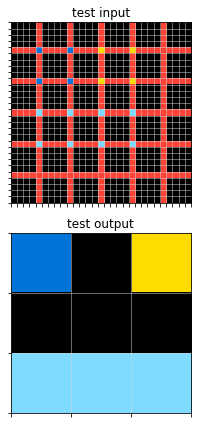

794b24be.json
Icecuber solved? False
['count_tiles', 'associate_images_to_numbers']
1 objects
[[1]]
1 objects
[[2]]
2 objects
[[1]]
[[1]]
1 objects
[[2 2]]
2 objects
[[1]]
[[1]]
1 objects
[[2 2]]
2 objects
[[1]]
[[1]]
1 objects
[[2 2]]
1 objects
[[1]]
1 objects
[[2]]
2 objects
[[1 1]]
[[1]]
1 objects
[[2 2 2]]
1 objects
[[0 1]
 [1 1]]
1 objects
[[2 2 2]]
3 objects
[[1 1]]
[[1]]
[[1]]
1 objects
[[2 2 2]
 [0 2 0]]
1 objects
[[0 1]
 [1 1]
 [1 0]]
1 objects
[[2 2 2]
 [0 2 0]]
2 objects
[[1]]
[[0 1]
 [1 1]]
1 objects
[[2 2 2]
 [0 2 0]]


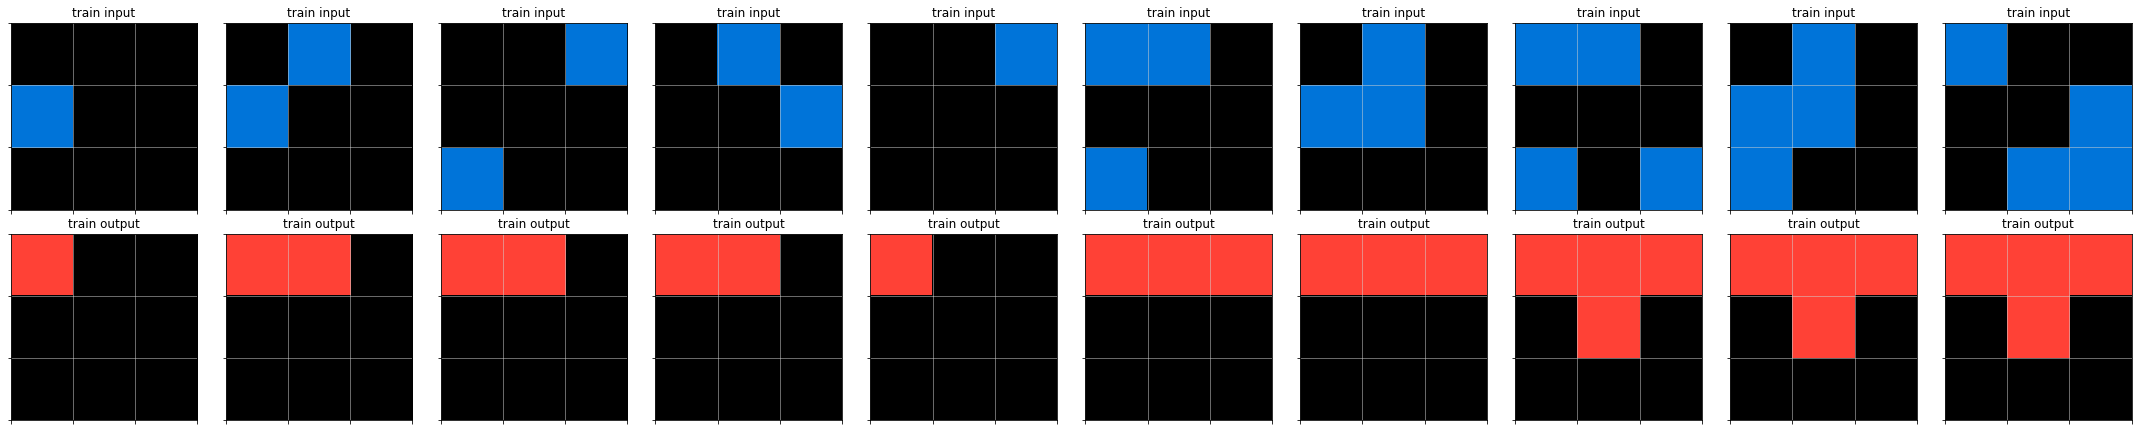

2 objects
[[1]]
[[1]]
1 objects
[[2 2]]
2 objects
[[1 0]
 [1 1]]
[[1]]
1 objects
[[2 2 2]
 [0 2 0]]


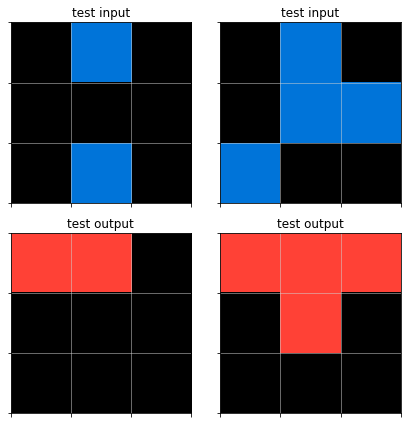

7b6016b9.json
Icecuber solved? True
['loop_filling', 'background_filling', 'color_guessing']
1 objects
[[0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 8 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 8 0 0 0 0 0]
 [0 0 0 0 0 0 8 0 0 0 8 0 0 0 0 0 8 0 0 0 0 0]
 [0 0 0 8 8 8 8 8 8 8 8 8 8 0 0 0 8 0 0 0 0 0]
 [0 0 0 0 0 0 8 0 0 0 8 0 0 0 0 0 8 0 0 0 8 0]
 [0 0 0 0 0 0 8 0 0 0 8 0 0 0 0 0 8 0 0 0 8 0]
 [0 0 0 0 0 0 8 0 0 0 8 0 0 0 0 0 8 0 0 0 8 0]
 [0 0 0 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
 [0 0 0 0 0 0 8 0 0 0 8 0 0 0 0 0 8 0 0 0 8 0]
 [0 0 0 0 0 0 8 0 0 0 8 0 0 0 0 0 8 0 0 0 8 0]
 [0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 8 0 0 0 8 0]
 [0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0]
 [0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0]
 [0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 0 0 0 0]
 [0 0 0 0 0 0 8 0 0 0 0 0 0 8 0 0 8 0 0 0 0 0]
 [0 0 0 0 0 0 8 0 0 0 0 0 0 8 0 0 8 0 0 0 0 0]
 [0 0 0 0 0 0 8 0 0 0 0 0 0 8 0 0 8 0 0 0 0 0]
 [0 

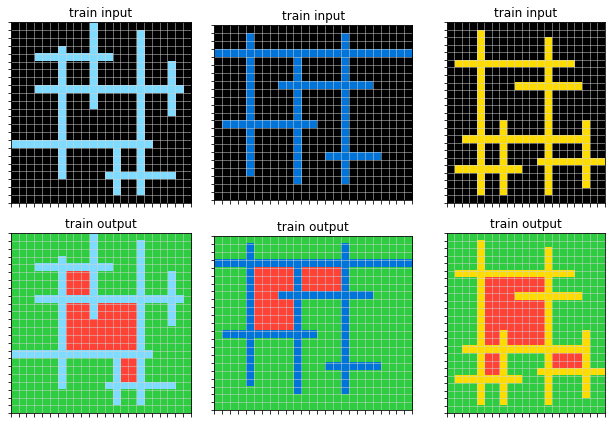

1 objects
[[0 0 0 7 0 0 0 0 0 0 0 0 0 0 7 0 0 0 0 0 0 0]
 [0 0 0 7 0 0 0 0 0 7 0 0 0 0 7 0 0 0 0 0 7 0]
 [0 0 0 7 0 0 0 0 0 7 0 0 0 0 7 0 0 0 0 0 7 0]
 [7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [0 0 0 7 0 0 0 0 0 7 0 0 0 0 7 0 0 0 0 0 7 0]
 [0 0 0 7 0 0 0 0 0 7 0 0 0 0 7 0 0 0 0 0 7 0]
 [0 0 0 7 0 0 0 0 0 7 0 0 0 0 7 0 0 0 0 0 7 0]
 [0 0 0 7 0 0 0 0 0 7 0 0 0 0 7 0 0 0 0 0 7 0]
 [0 0 0 7 0 0 0 0 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [0 0 0 7 0 0 0 0 0 7 0 0 0 0 7 0 0 0 0 0 7 0]
 [0 0 0 7 0 0 0 0 0 7 0 0 0 0 7 0 0 0 0 0 7 0]
 [0 0 0 7 0 0 0 0 0 0 0 0 0 0 7 0 0 0 0 0 7 0]
 [0 0 0 7 0 0 0 0 0 0 0 0 0 0 7 0 0 0 0 0 0 0]
 [0 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 0 0 0 0]
 [0 0 0 7 0 0 0 0 0 0 0 0 0 0 7 0 0 0 0 0 0 0]
 [0 0 0 7 0 0 0 0 0 0 0 0 0 0 7 0 0 0 0 0 0 0]
 [0 0 0 7 0 0 0 0 0 0 7 7 7 7 7 7 7 7 7 0 0 0]
 [0 7 7 7 7 7 0 0 0 0 0 0 0 0 7 0 0 0 0 0 0 0]
 [0 0 0 7 0 0 0 0 0 0 0 0 0 0 7 0 0 0 0 0 0 0]
 [0 0 0 7 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 7 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
5 

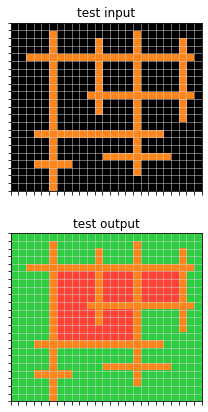

7b7f7511.json
Icecuber solved? False
['separate_images', 'detect_repetition', 'crop']
12 objects
[[1 1]
 [1 1]]
[[3 0]
 [3 3]]
[[2]]
[[1 1]
 [1 1]]
[[3 0]
 [3 3]]
[[2]]
[[3 3]
 [0 3]]
[[1 1]
 [1 1]]
[[3 3]
 [0 3]]
[[1 1]
 [1 1]]
[[2]]
[[2]]
6 objects
[[1 1]
 [1 1]]
[[3 0]
 [3 3]]
[[2]]
[[3 3]
 [0 3]]
[[1 1]
 [1 1]]
[[2]]
5 objects
[[4 4 4 4 4 4]
 [0 4 0 0 4 0]]
[[6 0]
 [6 6]]
[[8]
 [8]]
[[6 0]
 [6 6]]
[[8]
 [8]]
3 objects
[[4 4 4]
 [0 4 0]]
[[6 0]
 [6 6]]
[[8]
 [8]]
10 objects
[[2]]
[[3]]
[[3]]
[[2]]
[[4 4]]
[[2]]
[[3]]
[[3]]
[[2]]
[[4 4]]
5 objects
[[2]]
[[3]]
[[3]]
[[2]]
[[4 4]]


18 objects
[[5]]
[[4]]
[[5]]
[[4]]
[[5]]
[[4]
 [4]]
[[6 6]
 [0 6]]
[[2]]
[[2]]
[[5]]
[[4]]
[[5]]
[[4]]
[[5]]
[[4]
 [4]]
[[6 6]
 [0 6]]
[[2]]
[[2]]
9 objects
[[5]]
[[4]]
[[5]]
[[4]]
[[5]]
[[4]
 [4]]
[[6 6]
 [0 6]]
[[2]]
[[2]]


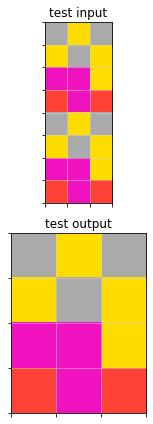

7c008303.json
Icecuber solved? False
['color_palette', 'detect_grid', 'recoloring', 'color_guessing', 'separate_images', 'crop']
6 objects
[[2]]
[[4]]
[[0 0 8 0 0 0 0 0 0]
 [0 0 8 0 0 0 0 0 0]
 [8 8 8 8 8 8 8 8 8]
 [0 0 8 0 0 0 0 0 0]
 [0 0 8 0 0 0 0 0 0]
 [0 0 8 0 0 0 0 0 0]
 [0 0 8 0 0 0 0 0 0]
 [0 0 8 0 0 0 0 0 0]
 [0 0 8 0 0 0 0 0 0]]
[[1]]
[[6]]
[[0 3 0 0 3 0]
 [3 3 3 3 3 3]
 [0 3 0 0 3 0]
 [0 3 0 0 3 0]
 [3 3 3 3 3 3]
 [0 3 0 0 3 0]]
4 objects
[[0 2 0]
 [2 2 2]
 [0 2 0]]
[[0 4 0]
 [4 4 4]
 [0 4 0]]
[[0 1 0]
 [1 1 1]
 [0 1 0]]
[[0 6 0]
 [6 6 6]
 [0 6 0]]
11 objects
[[0 0 0 0 0 0 8 0 0]
 [0 0 0 0 0 0 8 0 0]
 [8 8 8 8 8 8 8 8 8]
 [0 0 0 0 0 0 8 0 0]
 [0 0 0 0 0 0 8 0 0]
 [0 0 0 0 0 0 8 0 0]
 [0 0 0 0 0 0 8 0 0]
 [0 0 0 0 0 0 8 0 0]
 [0 0 0 0 0 0 8 0 0]]
[[1]]
[[2]]
[[4]]
[[1]]
[[3 3]]
[[3]]
[[3 3]
 [3 3]]
[[3]]
[[3]]
[[0 0 0 0 3 0]
 [3 3 3 3 3 3]
 [0 0 0 0 3 0]]
8 objects
[[1]]
[[2]]
[[2]]
[[1 1]
 [1 1]]
[[2]]
[[2]]
[[0 1 0]
 [1 1 1]
 [0 1 0]]
[[4 4 4]]
12 objects
[[0 0 8 0 0 0 0 0 

9 objects
[[0 0 0 3]
 [3 3 0 3]
 [0 3 0 3]
 [0 3 3 3]
 [0 3 0 0]]
[[0 0 0 0 0 0 8 0 0]
 [0 0 0 0 0 0 8 0 0]
 [0 0 0 0 0 0 8 0 0]
 [0 0 0 0 0 0 8 0 0]
 [0 0 0 0 0 0 8 0 0]
 [0 0 0 0 0 0 8 0 0]
 [8 8 8 8 8 8 8 8 8]
 [0 0 0 0 0 0 8 0 0]
 [0 0 0 0 0 0 8 0 0]]
[[3]
 [3]]
[[3]]
[[3]]
[[2]]
[[1]]
[[4]]
[[7]]
7 objects
[[1]
 [1]
 [1]]
[[2 2]
 [0 2]]
[[1]
 [1]]
[[4 4]
 [4 0]]
[[7]]
[[7]]
[[4]]


7ddcd7ec.json
Icecuber solved? False
['draw_line_from_point', 'direction_guessing', 'diagonals']
2 objects
[[3 3]
 [3 3]]
[[3]]
7 objects
[[3 3]
 [3 3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
3 objects
[[4]]
[[4 4]
 [4 4]]
[[4]]
7 objects
[[4]]
[[4]]
[[4 4]
 [4 4]]
[[4]]
[[4]]
[[4]]
[[4]]
3 objects
[[7]]
[[7 7]
 [7 7]]
[[7]]
8 objects
[[7]]
[[7]]
[[7]]
[[7 7]
 [7 7]]
[[7]]
[[7]]
[[7]]
[[7]]


4 objects
[[8]]
[[8 8]
 [8 8]]
[[8]]
[[8]]
12 objects
[[8]]
[[8]]
[[8]]
[[8]]
[[8 8]
 [8 8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]


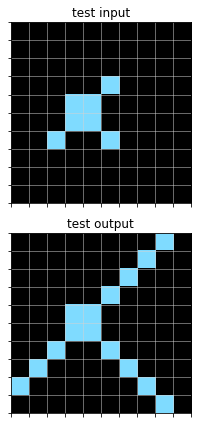

7df24a62.json
Icecuber solved? False
['pattern_repetition', 'pattern_rotation', 'pattern_juxtaposition', 'out_of_boundary']
18 objects
[[1 1 1 1 1]
 [1 0 1 1 1]
 [1 1 1 0 1]
 [1 0 1 1 1]
 [1 1 1 1 1]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
19 objects
[[1 1 1 1 1]
 [1 0 1 1 1]
 [1 1 1 0 1]
 [1 0 1 1 1]
 [1 1 1 1 1]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[1 1 1 1 1]
 [1 0 1 0 1]
 [1 1 1 1 1]
 [1 1 0 1 1]
 [1 1 1 1 1]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
26 objects
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[1 1 1 1]
 [1 0 1 1]
 [1 1 0 1]
 [1 1 1 1]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]
 [4]]
[[4]]
[[4]]
[[4]]
27 objects
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[1 1 1 1]
 [1 0 1 1]
 [1 1 0 1]
 [1 1 1 1]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[1 1 1 1]
 [1 1 0 1]
 [1 0 1 1]
 [1 1 1 1]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]
 [4]]
[[4

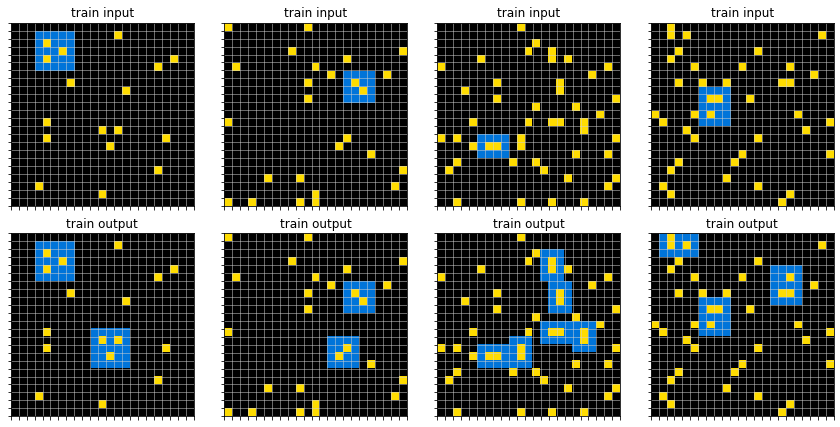

26 objects
[[1 1 1 1 1]
 [1 0 1 1 1]
 [1 1 1 1 1]
 [1 0 1 0 1]
 [1 1 1 1 1]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
28 objects
[[1 1 1 1 1]
 [1 0 1 1 1]
 [1 1 1 1 1]
 [1 0 1 0 1]
 [1 1 1 1 1]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[1 1 1 1 1]
 [1 1 1 0 1]
 [1 1 1 1 1]
 [1 0 1 0 1]
 [1 1 1 1 1]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[1 1 1 1 1]
 [1 0 1 0 1]
 [1 1 1 1 1]
 [1 0 1 1 1]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]


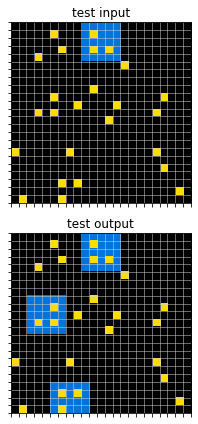

7e0986d6.json
Icecuber solved? False
['color_guessing', 'remove_noise']
20 objects
[[8]]
[[8]]
[[3 3 3 3 3]
 [3 3 3 3 3]
 [3 3 0 3 0]
 [3 3 3 3 3]
 [3 0 3 3 3]]
[[8]]
[[8]]
[[8]]
[[3 3 3]
 [3 3 3]
 [3 3 0]]
[[8]]
[[8]]
[[3 3 3 3 3]
 [3 3 3 0 3]
 [3 3 3 3 3]
 [3 3 3 3 3]]
[[8]]
[[0 0 0 3 3 3 0 3]
 [0 0 0 3 0 3 3 3]
 [0 0 0 3 3 3 3 3]
 [3 3 3 3 0 3 3 3]
 [3 3 3 0 0 0 0 0]
 [3 0 3 0 0 0 0 0]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
4 objects
[[3 3 3 3 3]
 [3 3 3 3 3]
 [3 3 3 3 3]
 [3 3 3 3 3]
 [3 3 3 3 3]]
[[3 3 3]
 [3 3 3]
 [3 3 3]]
[[3 3 3 3 3]
 [3 3 3 3 3]
 [3 3 3 3 3]
 [3 3 3 3 3]]
[[0 0 0 3 3 3 3 3]
 [0 0 0 3 3 3 3 3]
 [0 0 0 3 3 3 3 3]
 [3 3 3 3 3 3 3 3]
 [3 3 3 0 0 0 0 0]
 [3 3 3 0 0 0 0 0]]
15 objects
[[2 2 2 2]
 [2 2 2 2]
 [2 2 0 2]
 [2 2 2 2]
 [2 2 2 2]]
[[1]]
[[2 0 2 2 2 2 2]
 [2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2]
 [2 2 2 2 2 0 2]
 [2 2 2 2 2 2 2]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[2 2 2 2 2 2 0 2 2 2]
 [0 2 2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 0 2 2 0]
 [2 2 2 2 2 2 2 2 2 2]]

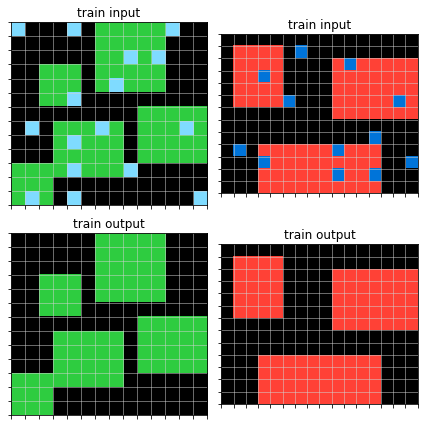

16 objects
[[5 5 0 5]
 [5 5 5 5]
 [5 5 5 5]
 [5 5 5 5]
 [5 5 5 5]
 [5 5 5 5]
 [5 5 0 5]]
[[4]]
[[4]]
[[4]]
[[5 0 5 5 5 5 5 5]
 [5 5 5 5 5 5 5 5]
 [5 5 5 5 5 5 5 5]
 [5 5 5 5 5 5 0 5]
 [5 5 5 5 5 5 5 5]
 [5 5 5 5 0 5 5 5]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[5 5 5 5 5 0]
 [5 5 5 0 5 5]]
[[4]]
[[4]]
[[4]]
3 objects
[[5 5 5 5]
 [5 5 5 5]
 [5 5 5 5]
 [5 5 5 5]
 [5 5 5 5]
 [5 5 5 5]
 [5 5 5 5]]
[[5 5 5 5 5 5 5 5]
 [5 5 5 5 5 5 5 5]
 [5 5 5 5 5 5 5 5]
 [5 5 5 5 5 5 5 5]
 [5 5 5 5 5 5 5 5]
 [5 5 5 5 5 5 5 5]]
[[5 5 5 5 5 5]
 [5 5 5 5 5 5]]


7f4411dc.json
Icecuber solved? False
['rectangle_guessing', 'remove_noise']
8 objects
[[7]]
[[7 7 7 7 7]
 [7 7 7 7 7]
 [7 7 7 7 7]]
[[0 0 7 0]
 [7 7 7 7]
 [7 7 7 7]
 [7 7 7 7]]
[[7]]
[[7]]
[[7 7 7]
 [7 7 7]]
[[7]]
[[7]]
3 objects
[[7 7 7 7 7]
 [7 7 7 7 7]
 [7 7 7 7 7]]
[[7 7 7 7]
 [7 7 7 7]
 [7 7 7 7]]
[[7 7 7]
 [7 7 7]]
12 objects
[[0 6 0]
 [6 6 6]
 [6 6 6]]
[[6]]
[[6]]
[[6]]
[[0 6 0 0]
 [6 6 6 6]
 [6 6 6 6]
 [6 6 6 6]]
[[6]]
[[0 0 0 0 6]
 [6 6 6 6 6]
 [6 6 6 6 6]
 [6 6 6 6 6]]
[[6]]
[[6 6]
 [6 6]
 [6 6]]
[[6]]
[[6]]
[[6]]
4 objects
[[6 6 6]
 [6 6 6]]
[[6 6 6 6]
 [6 6 6 6]
 [6 6 6 6]]
[[6 6 6 6 6]
 [6 6 6 6 6]
 [6 6 6 6 6]]
[[6 6]
 [6 6]
 [6 6]]
5 objects
[[5]]
[[5]]
[[5 5 5 5 0]
 [5 5 5 5 0]
 [5 5 5 5 5]]
[[5]]
[[5]]
1 objects
[[5 5 5 5]
 [5 5 5 5]
 [5 5 5 5]]


10 objects
[[8]]
[[8 0 0]
 [8 8 8]
 [8 8 8]]
[[8]]
[[8]]
[[8]]
[[8 8 8 8 8 8]
 [8 8 8 8 8 0]
 [8 8 8 8 8 0]]
[[8]]
[[8]]
[[8]]
[[8]]
2 objects
[[8 8 8]
 [8 8 8]]
[[8 8 8 8 8]
 [8 8 8 8 8]
 [8 8 8 8 8]]


7fe24cdd.json
Icecuber solved? False
['image_repetition', 'image_rotation']
5 objects
[[8]
 [8]]
[[5]
 [5]]
[[3]]
[[3]]
[[2]]
13 objects
[[8]
 [8]]
[[5]
 [5]]
[[8 8]]
[[3 3]]
[[5 5]]
[[3]
 [3]]
[[2 2]
 [2 2]]
[[3]
 [3]]
[[5 5]]
[[3 3]]
[[5]
 [5]]
[[8]
 [8]]
[[8 8]]
5 objects
[[3]
 [3]]
[[8]]
[[0 2]
 [2 2]
 [0 2]]
[[8]]
[[5]]
17 objects
[[3]
 [3]]
[[8]]
[[0 0 2 0 0 0]
 [0 2 2 0 2 0]
 [0 0 2 2 2 2]
 [2 2 2 2 0 0]
 [0 2 0 2 2 0]
 [0 0 0 2 0 0]]
[[8]]
[[3 3]]
[[5]]
[[8]]
[[8]]
[[5]]
[[5]]
[[8]]
[[8]]
[[5]]
[[3]
 [3]]
[[3 3]]
[[8]]
[[8]]
3 objects
[[3]]
[[6 6 6]]
[[3]]
12 objects
[[3]]
[[6]
 [6]
 [6]]
[[6 6 6]]
[[3]]
[[3]]
[[3]]
[[6]
 [6]
 [6]]
[[3]]
[[3]]
[[3]]
[[6 6 6]]
[[3]]


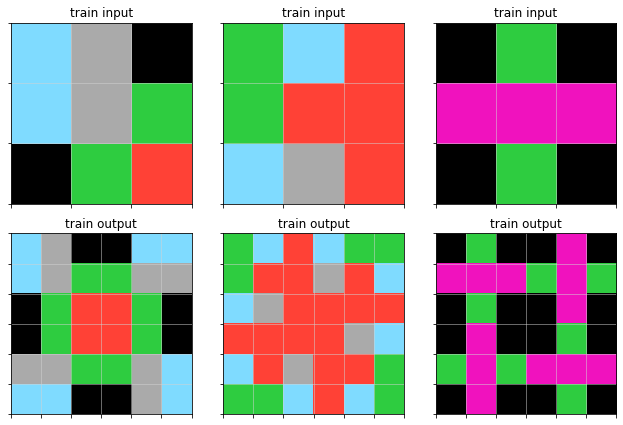

4 objects
[[2]
 [2]]
[[5]
 [5]]
[[0 1]
 [1 1]]
[[3]]
13 objects
[[2]
 [2]]
[[5]
 [5]]
[[3]]
[[2 2]]
[[0 1 1 0]
 [1 1 1 1]
 [1 1 1 1]
 [0 1 1 0]]
[[5 5]]
[[3]]
[[3]]
[[5 5]]
[[5]
 [5]]
[[2]
 [2]]
[[2 2]]
[[3]]


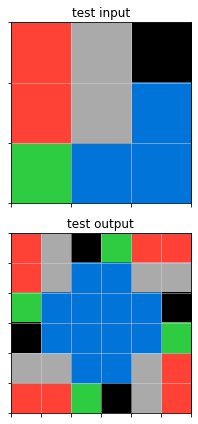

80af3007.json
Icecuber solved? True
['crop', 'pattern_resizing', 'image_resizing', 'fractal_repetition']
5 objects
[[5 5 5]
 [5 5 5]
 [5 5 5]]
[[5 5 5]
 [5 5 5]
 [5 5 5]]
[[5 5 5]
 [5 5 5]
 [5 5 5]]
[[5 5 5]
 [5 5 5]
 [5 5 5]]
[[5 5 5]
 [5 5 5]
 [5 5 5]]
25 objects
[[5]]
[[5]]
[[5]]
[[5]]
[[5]]
[[5]]
[[5]]
[[5]]
[[5]]
[[5]]
[[5]]
[[5]]
[[5]]
[[5]]
[[5]]
[[5]]
[[5]]
[[5]]
[[5]]
[[5]]
[[5]]
[[5]]
[[5]]
[[5]]
[[5]]
3 objects
[[5 5 5 5 5 5]
 [5 5 5 5 5 5]
 [5 5 5 5 5 5]]
[[5 5 5]
 [5 5 5]
 [5 5 5]]
[[5 5 5 5 5 5]
 [5 5 5 5 5 5]
 [5 5 5 5 5 5]]
15 objects
[[5 5]]
[[5 5]]
[[5]]
[[5]]
[[5 5]]
[[5 5]]
[[5 5]]
[[5]]
[[5 5]]
[[5 5]]
[[5 5]]
[[5]]
[[5]]
[[5 5]]
[[5 5]]
2 objects
[[5 5 5 5 5 5 5 5 5]
 [5 5 5 5 5 5 5 5 5]
 [5 5 5 5 5 5 5 5 5]
 [0 0 0 5 5 5 5 5 5]
 [0 0 0 5 5 5 5 5 5]
 [0 0 0 5 5 5 5 5 5]
 [0 0 0 0 0 0 5 5 5]
 [0 0 0 0 0 0 5 5 5]
 [0 0 0 0 0 0 5 5 5]]
[[5 5 5]
 [5 5 5]
 [5 5 5]]
6 objects
[[5 5 5 5 5 5 5 5 5]
 [0 5 5 0 5 5 0 5 5]
 [0 0 5 5 0 5 5 0 5]
 [0 0 0 5 5 5 5 5 5]
 [0 0 0 0 5

3 objects
[[5 5 5 5 5 5 5 5 5]
 [5 5 5 5 5 5 5 5 5]
 [5 5 5 5 5 5 5 5 5]
 [0 0 0 5 5 5 0 0 0]
 [0 0 0 5 5 5 0 0 0]
 [0 0 0 5 5 5 0 0 0]]
[[5 5 5]
 [5 5 5]
 [5 5 5]]
[[5 5 5]
 [5 5 5]
 [5 5 5]]
12 objects
[[5 5 5 5 5 5 5 5 5]
 [0 5 0 0 5 0 0 5 0]]
[[5]]
[[5 5 0 5 5]
 [0 5 5 5 0]
 [0 0 5 0 0]]
[[5]]
[[5]]
[[5]]
[[5 5 5]
 [0 5 0]]
[[5 5 5]
 [0 5 0]]
[[5]]
[[5]]
[[5]]
[[5]]


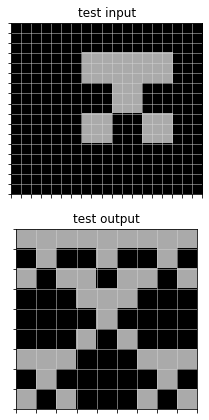

810b9b61.json
Icecuber solved? True
['recoloring', 'detect_closed_curves']
8 objects
[[1 1 1]
 [1 0 1]
 [1 0 1]]
[[1 1 1 1]
 [1 0 0 1]
 [1 1 1 1]]
[[1 1]
 [1 0]]
[[1]]
[[1 1 1 1]
 [1 0 0 1]
 [1 0 0 1]
 [1 1 1 1]]
[[1 1 1]
 [1 0 1]
 [1 0 1]
 [1 1 1]]
[[1 1 1 1]
 [1 0 0 1]
 [1 1 1 1]]
[[1 1]]
8 objects
[[1 1 1]
 [1 0 1]
 [1 0 1]]
[[3 3 3 3]
 [3 0 0 3]
 [3 3 3 3]]
[[1 1]
 [1 0]]
[[1]]
[[3 3 3 3]
 [3 0 0 3]
 [3 0 0 3]
 [3 3 3 3]]
[[3 3 3]
 [3 0 3]
 [3 0 3]
 [3 3 3]]
[[3 3 3 3]
 [3 0 0 3]
 [3 3 3 3]]
[[1 1]]
4 objects
[[1 1 1]
 [1 0 1]
 [1 1 1]]
[[1]
 [1]]
[[1]]
[[1 0 1 1]
 [1 0 0 1]
 [1 1 1 1]]
4 objects
[[3 3 3]
 [3 0 3]
 [3 3 3]]
[[1]
 [1]]
[[1]]
[[1 0 1 1]
 [1 0 0 1]
 [1 1 1 1]]
3 objects
[[1 1 1 1 1]
 [1 0 0 0 1]
 [1 1 1 1 1]]
[[1 1]
 [0 1]
 [0 1]]
[[1 1]]
3 objects
[[3 3 3 3 3]
 [3 0 0 0 3]
 [3 3 3 3 3]]
[[1 1]
 [0 1]
 [0 1]]
[[1 1]]


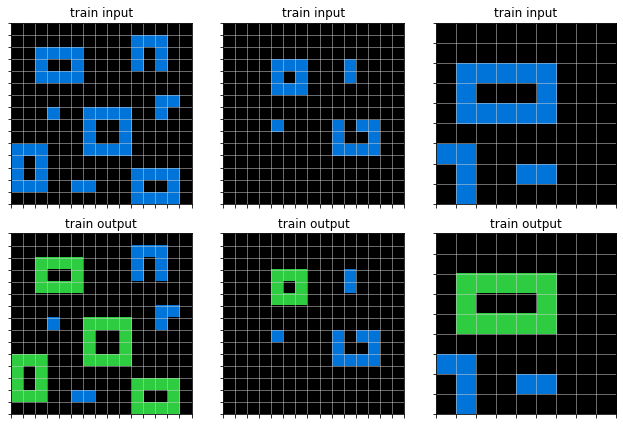

6 objects
[[1 1 1 1 1]
 [1 0 0 0 1]
 [1 0 0 0 1]
 [1 0 0 0 1]
 [1 1 0 1 1]]
[[1 1 1 1]
 [1 0 0 1]
 [1 1 1 1]]
[[1 1]]
[[1 1 1 1 1]
 [1 0 0 0 1]
 [1 0 0 0 1]
 [1 1 1 1 1]]
[[1]]
[[1]]
6 objects
[[1 1 1 1 1]
 [1 0 0 0 1]
 [1 0 0 0 1]
 [1 0 0 0 1]
 [1 1 0 1 1]]
[[3 3 3 3]
 [3 0 0 3]
 [3 3 3 3]]
[[1 1]]
[[3 3 3 3 3]
 [3 0 0 0 3]
 [3 0 0 0 3]
 [3 3 3 3 3]]
[[1]]
[[1]]


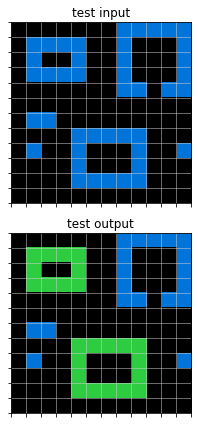

82819916.json
Icecuber solved? False
['pattern_repetition', 'color_guessing', 'draw_line_from_point', 'associate_colors_to_colors']
9 objects
[[3 3]]
[[2]]
[[3 3]]
[[2]]
[[3 3]]
[[8 8]]
[[4]]
[[1 1]]
[[6]]
15 objects
[[3 3]]
[[2]]
[[3 3]]
[[2]]
[[3 3]]
[[8 8]]
[[4]]
[[8 8]]
[[4]]
[[8 8]]
[[1 1]]
[[6]]
[[1 1]]
[[6]]
[[1 1]]
10 objects
[[2 2]]
[[1]]
[[2]]
[[1]]
[[2]]
[[1 1]]
[[3 3]]
[[1]]
[[8 8]]
[[2]]
18 objects
[[2 2]]
[[1]]
[[2]]
[[1]]
[[2]]
[[1 1]]
[[3 3]]
[[1]]
[[3]]
[[1]]
[[3]]
[[1 1]]
[[8 8]]
[[2]]
[[8]]
[[2]]
[[8]]
[[2 2]]
13 objects
[[1]]
[[4]]
[[1]]
[[4 4]]
[[1]]
[[4]]
[[1]]
[[2]]
[[3]]
[[8]]
[[2]]
[[6]]
[[5]]
28 objects
[[1]]
[[4]]
[[1]]
[[4 4]]
[[1]]
[[4]]
[[1]]
[[2]]
[[3]]
[[2]]
[[3 3]]
[[2]]
[[3]]
[[2]]
[[8]]
[[2]]
[[8]]
[[2 2]]
[[8]]
[[2]]
[[8]]
[[6]]
[[5]]
[[6]]
[[5 5]]
[[6]]
[[5]]
[[6]]
7 objects
[[3 3]]
[[4 4 4]]
[[3]]
[[4]]
[[3]]
[[8 8]]
[[2]]
10 objects
[[3 3]]
[[4 4 4]]
[[3]]
[[4]]
[[3]]
[[8 8]]
[[2 2 2]]
[[8]]
[[2]]
[[8]]


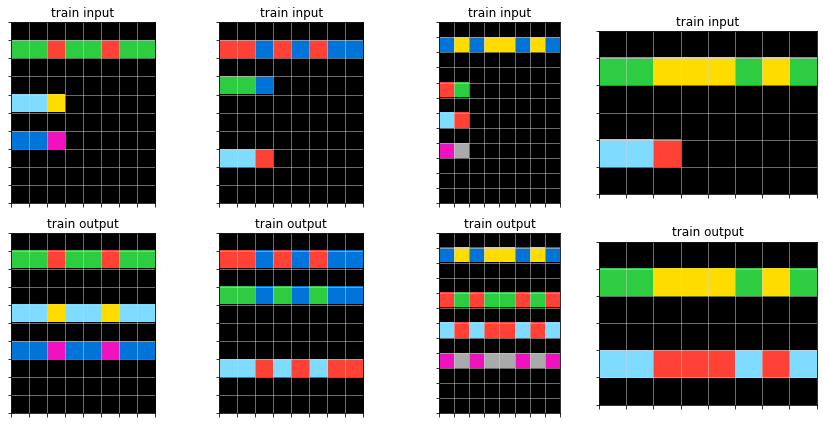

16 objects
[[2 2]]
[[1]]
[[2]]
[[1]]
[[2]]
[[1 1]]
[[2]]
[[1]]
[[8 8]]
[[3]]
[[1 1]]
[[4]]
[[6 6]]
[[8]]
[[1 1]]
[[6]]
40 objects
[[2 2]]
[[1]]
[[2]]
[[1]]
[[2]]
[[1 1]]
[[2]]
[[1]]
[[8 8]]
[[3]]
[[8]]
[[3]]
[[8]]
[[3 3]]
[[8]]
[[3]]
[[1 1]]
[[4]]
[[1]]
[[4]]
[[1]]
[[4 4]]
[[1]]
[[4]]
[[6 6]]
[[8]]
[[6]]
[[8]]
[[6]]
[[8 8]]
[[6]]
[[8]]
[[1 1]]
[[6]]
[[1]]
[[6]]
[[1]]
[[6 6]]
[[1]]
[[6]]


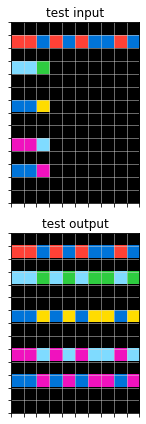

83302e8f.json
Icecuber solved? True
['detect_grid', 'detect_closed_curves', 'rectangle_guessing', 'associate_colors_to_bools', 'loop_filling']
4 objects
[[0 0 0 0 8 0 0 0 0 8 0 0 0 0 8 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 8 0 0 0 0 8 0 0 0 0 8 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 8 0 0 0 0 8 0 0 0 0 8 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 8 0 0 0 0 8 0 0 0 0 8 0 0 0 0 0 0 0 0 0]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 0 0 0 0 0 0 0]
 [0 0 0 0 8 0 0 0 0 8 0 0 0 0 8 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 8 0 0 0 0 8 0 0 0 0 8 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 8 0 0 0 0 8 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 8 0 0 0 0 8 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 8 8 8 8 0 8 8 8 8 8 8 8 8 8 8]
 [0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 8 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 8 0 0 0 0 8 0 0 0 0 8 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 8 0 0 0 0 8 0 0 0 0 8 0 0 0 0]
 [0 0 0 0 8 0 0 0 0 0 0 0 0 0 8 0 0 0 0 8 0 0 0 0]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 0 0 0 0]
 [0 0 0 0 8 0 0 0 0 8 0 0 0 0 8 0 0 0 0 8 0 0 0 0]
 [0 0 0 0 8 0 0 0 0 8 0 0 0 0 8

14 objects
[[4 4 4 4 0 4 4 4 4 0 4 4 4 4]
 [4 4 4 4 0 4 4 4 4 0 4 4 4 4]
 [4 4 4 4 4 4 4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4 4 0 4 4 4 4]
 [0 0 0 0 0 0 0 4 0 0 0 0 0 0]
 [4 4 4 4 0 4 4 4 4 0 0 0 0 0]
 [4 4 4 4 4 4 4 4 4 0 0 0 0 0]
 [4 4 4 4 0 4 4 4 4 0 0 0 0 0]
 [4 4 4 4 0 4 4 4 4 0 0 0 0 0]]
[[9]
 [9]]
[[9]
 [9]]
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 9 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 9 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 9 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 9 0 0 0 0 9 0 0 0 0]
 [0 0 0 0 0 0 0 0 9 9 9 9 9 9 9 9 9 9 9]
 [0 0 0 0 0 0 0 0 0 9 0 0 0 0 9 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 9 0 0 0 0 9 0 0 0 0]
 [0 0 0 0 9 0 0 0 0 9 0 0 0 0 9 0 0 0 0]
 [0 0 0 0 9 0 0 0 0 9 0 0 0 0 9 0 0 0 0]
 [9 9 9 9 9 9 9 9 9 9 0 9 9 9 9 9 9 9 9]
 [0 0 0 0 9 0 0 0 0 9 0 0 0 0 9 0 0 0 0]
 [0 0 0 0 9 0 0 0 0 9 0 0 0 0 9 0 0 0 0]
 [0 0 0 0 9 0 0 0 0 9 0 0 0 0 9 0 0 0 0]
 [0 0 0 0 9 0 0 0 0 9 0 0 0 0 9 0 0 0 0]
 [9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 0]
 [0 0 0 0 9 0 0 0 0 9 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 9 0 0 0 0 9 0 0 0 0 0

8 objects
[[0 0 0 5 0 0]
 [0 0 0 5 0 0]
 [0 0 0 5 0 0]
 [5 5 5 5 5 5]]
[[5]
 [5]]
[[0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 5 0 0 0 5 0 0 0 5 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 5 0 0 0 5 0 0 0 5 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 5 0 0 0 5 0 0 0 5 0 0 0]
 [0 0 0 0 0 0 0 0 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 0]
 [0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 5 0 0 0 5 0 0 0 5 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 5 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 5 0 0 0 5 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 5 5 5 5 5 5 5 5 5 5 5 5]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 5 0 0 0 5 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 5 0 0 0 5 0 0 0]
 [0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 5 0 0 0 5 0 0 0 5 0 0 0]
 [0 0 0 0 0 0 0 5 5 5 0 0 0 5 5 5 5 5 5 5 5 5 5 5 5 5 5]
 [0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 5 0 0 0]
 [0 0 0 0 0 0 0 5 0 0 0 5 0 0 0 5 0 0 0 5 0 0 0 5 0 0 0]
 [0 0 0 5 0 0 0 5 0 0 0 5 0 0 0 5 0 0 0 5 0 0 0 5 0 0 0]
 [0 0 0 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 0 5 5 5 5 5]
 [0 0 

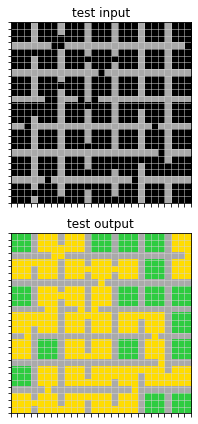

834ec97d.json
Icecuber solved? False
['draw_line_from_border', 'pattern_repetition', 'spacing', 'measure_distance_from_side']
1 objects
[[2]]
2 objects
[[4]]
[[2]]
1 objects
[[6]]
4 objects
[[4]
 [4]
 [4]]
[[4]
 [4]
 [4]]
[[4]
 [4]
 [4]]
[[6]]
1 objects
[[9]]
6 objects
[[4]
 [4]
 [4]
 [4]
 [4]]
[[4]
 [4]
 [4]
 [4]
 [4]]
[[4]
 [4]
 [4]
 [4]
 [4]]
[[4]
 [4]
 [4]
 [4]
 [4]]
[[4]
 [4]
 [4]
 [4]
 [4]]
[[9]]


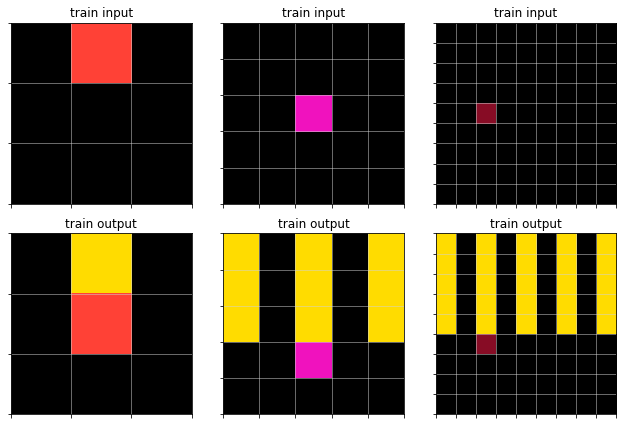

1 objects
[[3]]
7 objects
[[4]
 [4]
 [4]
 [4]]
[[4]
 [4]
 [4]
 [4]]
[[4]
 [4]
 [4]
 [4]]
[[4]
 [4]
 [4]
 [4]]
[[4]
 [4]
 [4]
 [4]]
[[4]
 [4]
 [4]
 [4]]
[[3]]


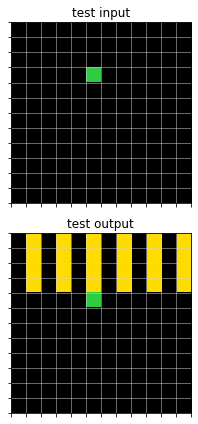

8403a5d5.json
Icecuber solved? False
['draw_line_from_point', 'pattern_repetition', 'direction_guessing']
1 objects
[[2]]
9 objects
[[2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]]
[[5]]
[[2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]]
[[2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]]
[[5]]
[[2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]]
[[2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]]
[[5]]
[[5]]
1 objects
[[3]]
5 objects
[[3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]]
[[5]]
[[3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]]
[[5]]
1 objects
[[4]]
6 objects
[[4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]]
[[5]]
[[4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]]
[[4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]]
[[5]]
[[5]]


1 objects
[[1]]
8 objects
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[5]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[5]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[5]]
[[5]]


846bdb03.json
Icecuber solved? False
['pattern_moving', 'pattern_reflection', 'crop', 'color_matching', 'x_marks_the_spot']
8 objects
[[2 2 0]
 [0 2 0]
 [0 2 2]
 [0 0 2]]
[[1 0 0]
 [1 1 1]
 [1 0 0]]
[[4]]
[[4]]
[[2]
 [2]
 [2]
 [2]]
[[1]
 [1]
 [1]
 [1]]
[[4]]
[[4]]
6 objects
[[4]]
[[4]]
[[2 2 2 0]
 [2 0 2 0]
 [2 0 2 2]
 [2 0 0 2]]
[[1 0 0 1]
 [1 1 1 1]
 [1 0 0 1]
 [0 0 0 1]]
[[4]]
[[4]]
8 objects
[[0 3 0]
 [3 3 3]
 [0 3 0]
 [0 3 3]]
[[8 0 8]
 [8 8 8]
 [8 0 8]
 [8 8 8]
 [8 0 8]]
[[4]]
[[4]]
[[8]
 [8]
 [8]
 [8]
 [8]]
[[3]
 [3]
 [3]
 [3]
 [3]]
[[4]]
[[4]]
6 objects
[[4]]
[[4]]
[[8 8 0 8]
 [8 8 8 8]
 [8 8 0 8]
 [8 8 8 8]
 [8 8 0 8]]
[[0 3 0 3]
 [3 3 3 3]
 [0 3 0 3]
 [3 3 0 3]
 [0 0 0 3]]
[[4]]
[[4]]
8 objects
[[4]]
[[4]]
[[2]
 [2]]
[[1]
 [1]]
[[4]]
[[4]]
[[1 1]
 [0 1]]
[[2 0]
 [2 2]]
6 objects
[[4]]
[[4]]
[[2 0 2]
 [2 2 2]]
[[1 1 1]
 [1 0 1]]
[[4]]
[[4]]
8 objects
[[4]]
[[4]]
[[7]
 [7]
 [7]]
[[3]
 [3]
 [3]]
[[4]]
[[4]]
[[7 7]
 [7 7]
 [0 7]]
[[0 3]
 [3 3]
 [0 3]]
6 objects
[[4]]
[[4]]
[[7 7 

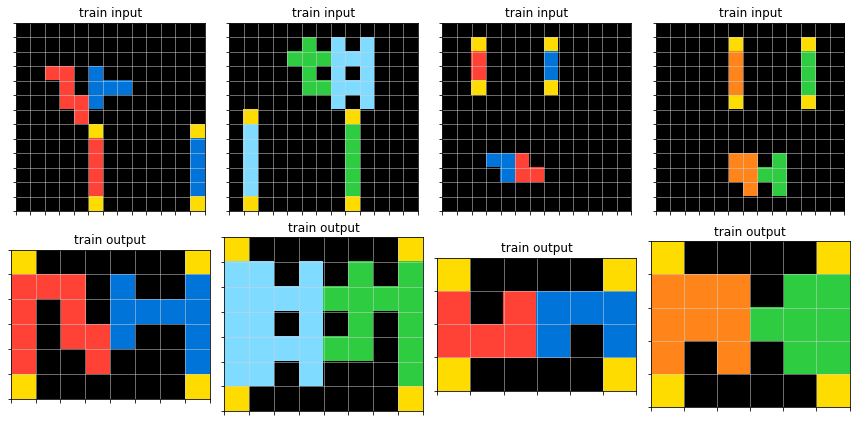

8 objects
[[4]]
[[4]]
[[2]
 [2]
 [2]
 [2]]
[[8]
 [8]
 [8]
 [8]]
[[4]]
[[4]]
[[8 0 8]
 [8 8 8]
 [8 0 0]
 [8 0 0]]
[[2 0 0]
 [2 2 2]
 [0 2 0]
 [0 2 2]]
6 objects
[[4]]
[[4]]
[[2 0 0 2]
 [2 2 2 2]
 [2 0 2 0]
 [2 2 2 0]]
[[8 0 8 8]
 [8 8 8 8]
 [0 0 8 8]
 [0 0 8 8]]
[[4]]
[[4]]


855e0971.json
Icecuber solved? False
['draw_line_from_point', 'direction_guessing', 'separate_images', 'holes']
3 objects
[[5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5]
 [5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5]]
[[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4 4 4 4 4 4 0 4 4 4 4 4]
 [4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
 [4 4 4 4 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]]
[[8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 0 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]]
6 objects
[[5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5]
 [5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5]]
[[4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]]
[[4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4

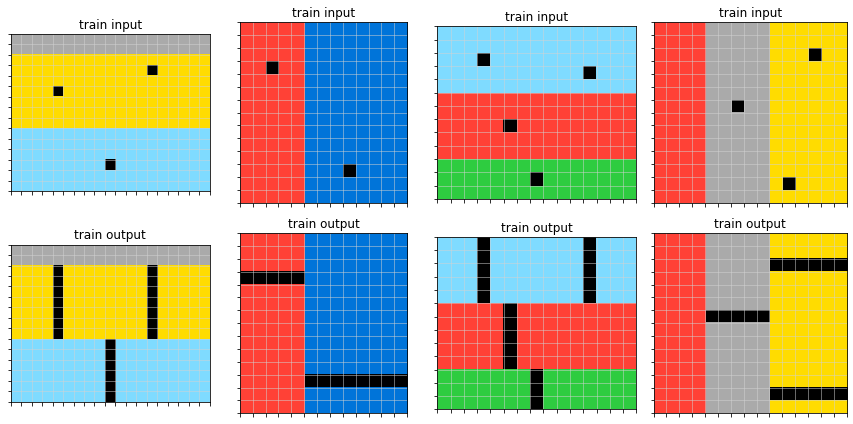

4 objects
[[8 8 8 8 0 8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8 8 8 0 8 8]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]]
[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 0 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]
[[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4 4 4 0 4 4 4 4]
 [4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]]
[[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
 [2 0 2 2 2 2 2 2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]]
9 objects
[[8 8 8 8]
 [8 8 8 8]
 [8 8 8 8]
 [8 8 8 8]]
[[8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8]]
[[8 8]
 [8 8]
 [8 8]
 [8 8]]
[[1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]]
[[1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]]
[[4 4 4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4 4 4]]
[[4 4 4 4]
 [4 4 4

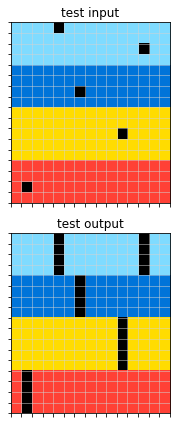

85c4e7cd.json
Icecuber solved? False
['color_guessing', 'recoloring', 'color_permutation']
6 objects
[[4 4 4 4 4 4 4 4 4 4 4 4]
 [4 0 0 0 0 0 0 0 0 0 0 4]
 [4 0 0 0 0 0 0 0 0 0 0 4]
 [4 0 0 0 0 0 0 0 0 0 0 4]
 [4 0 0 0 0 0 0 0 0 0 0 4]
 [4 0 0 0 0 0 0 0 0 0 0 4]
 [4 0 0 0 0 0 0 0 0 0 0 4]
 [4 0 0 0 0 0 0 0 0 0 0 4]
 [4 0 0 0 0 0 0 0 0 0 0 4]
 [4 0 0 0 0 0 0 0 0 0 0 4]
 [4 0 0 0 0 0 0 0 0 0 0 4]
 [4 4 4 4 4 4 4 4 4 4 4 4]]
[[2 2 2 2 2 2 2 2 2 2]
 [2 0 0 0 0 0 0 0 0 2]
 [2 0 0 0 0 0 0 0 0 2]
 [2 0 0 0 0 0 0 0 0 2]
 [2 0 0 0 0 0 0 0 0 2]
 [2 0 0 0 0 0 0 0 0 2]
 [2 0 0 0 0 0 0 0 0 2]
 [2 0 0 0 0 0 0 0 0 2]
 [2 0 0 0 0 0 0 0 0 2]
 [2 2 2 2 2 2 2 2 2 2]]
[[1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1]]
[[3 3 3 3 3 3]
 [3 0 0 0 0 3]
 [3 0 0 0 0 3]
 [3 0 0 0 0 3]
 [3 0 0 0 0 3]
 [3 3 3 3 3 3]]
[[5 5 5 5]
 [5 0 0 5]
 [5 0 0 5]
 [5 5 5 5]]
[[8 8]
 [8 8]]
6 objects
[[8 8 8 8 8 8 8 8 8 8 8 8]
 [

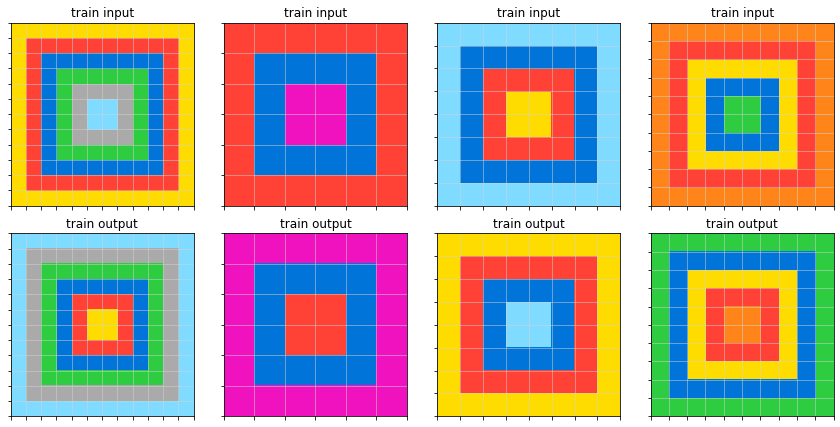

7 objects
[[8 8 8 8 8 8 8 8 8 8 8 8 8 8]
 [8 0 0 0 0 0 0 0 0 0 0 0 0 8]
 [8 0 0 0 0 0 0 0 0 0 0 0 0 8]
 [8 0 0 0 0 0 0 0 0 0 0 0 0 8]
 [8 0 0 0 0 0 0 0 0 0 0 0 0 8]
 [8 0 0 0 0 0 0 0 0 0 0 0 0 8]
 [8 0 0 0 0 0 0 0 0 0 0 0 0 8]
 [8 0 0 0 0 0 0 0 0 0 0 0 0 8]
 [8 0 0 0 0 0 0 0 0 0 0 0 0 8]
 [8 0 0 0 0 0 0 0 0 0 0 0 0 8]
 [8 0 0 0 0 0 0 0 0 0 0 0 0 8]
 [8 0 0 0 0 0 0 0 0 0 0 0 0 8]
 [8 0 0 0 0 0 0 0 0 0 0 0 0 8]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8]]
[[2 2 2 2 2 2 2 2 2 2 2 2]
 [2 0 0 0 0 0 0 0 0 0 0 2]
 [2 0 0 0 0 0 0 0 0 0 0 2]
 [2 0 0 0 0 0 0 0 0 0 0 2]
 [2 0 0 0 0 0 0 0 0 0 0 2]
 [2 0 0 0 0 0 0 0 0 0 0 2]
 [2 0 0 0 0 0 0 0 0 0 0 2]
 [2 0 0 0 0 0 0 0 0 0 0 2]
 [2 0 0 0 0 0 0 0 0 0 0 2]
 [2 0 0 0 0 0 0 0 0 0 0 2]
 [2 0 0 0 0 0 0 0 0 0 0 2]
 [2 2 2 2 2 2 2 2 2 2 2 2]]
[[4 4 4 4 4 4 4 4 4 4]
 [4 0 0 0 0 0 0 0 0 4]
 [4 0 0 0 0 0 0 0 0 4]
 [4 0 0 0 0 0 0 0 0 4]
 [4 0 0 0 0 0 0 0 0 4]
 [4 0 0 0 0 0 0 0 0 4]
 [4 0 0 0 0 0 0 0 0 4]
 [4 0 0 0 0 0 0 0 0 4]
 [4 0 0 0 0 0 0 0 0 4]
 [4 4 4 4 4 4 4 4 4 4]]

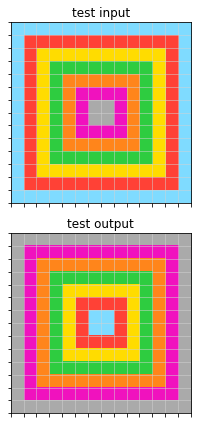

868de0fa.json
Icecuber solved? False
['loop_filling', 'color_guessing', 'measure_area', 'even_or_odd', 'associate_colors_to_bools']
3 objects
[[1 1 1 1]
 [1 0 0 1]
 [1 0 0 1]
 [1 1 1 1]]
[[1 1 1]
 [1 0 1]
 [1 1 1]]
[[1 1 1 1 1]
 [1 0 0 0 1]
 [1 0 0 0 1]
 [1 0 0 0 1]
 [1 1 1 1 1]]
6 objects
[[1 1 1 1]
 [1 0 0 1]
 [1 0 0 1]
 [1 1 1 1]]
[[2 2]
 [2 2]]
[[1 1 1]
 [1 0 1]
 [1 1 1]]
[[7]]
[[1 1 1 1 1]
 [1 0 0 0 1]
 [1 0 0 0 1]
 [1 0 0 0 1]
 [1 1 1 1 1]]
[[7 7 7]
 [7 7 7]
 [7 7 7]]
2 objects
[[1 1 1]
 [1 0 1]
 [1 1 1]]
[[1 1 1 1 1 1]
 [1 0 0 0 0 1]
 [1 0 0 0 0 1]
 [1 0 0 0 0 1]
 [1 0 0 0 0 1]
 [1 1 1 1 1 1]]
4 objects
[[1 1 1]
 [1 0 1]
 [1 1 1]]
[[1 1 1 1 1 1]
 [1 0 0 0 0 1]
 [1 0 0 0 0 1]
 [1 0 0 0 0 1]
 [1 0 0 0 0 1]
 [1 1 1 1 1 1]]
[[7]]
[[2 2 2 2]
 [2 2 2 2]
 [2 2 2 2]
 [2 2 2 2]]
5 objects
[[1 1 1 1 1]
 [1 0 0 0 1]
 [1 0 0 0 1]
 [1 0 0 0 1]
 [1 1 1 1 1]]
[[1 1 1 1]
 [1 0 0 1]
 [1 0 0 1]
 [1 1 1 1]]
[[1 1 1 1 1 1]
 [1 0 0 0 0 1]
 [1 0 0 0 0 1]
 [1 0 0 0 0 1]
 [1 0 0 0 0 1]
 [1 1 1 1 1 1]]


4 objects
[[1 1 1 1 1]
 [1 0 0 0 1]
 [1 0 0 0 1]
 [1 0 0 0 1]
 [1 1 1 1 1]]
[[1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1]]
[[1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1]]
[[1 1 1 1 1 1 1]
 [1 0 0 0 0 0 1]
 [1 0 0 0 0 0 1]
 [1 0 0 0 0 0 1]
 [1 0 0 0 0 0 1]
 [1 0 0 0 0 0 1]
 [1 1 1 1 1 1 1]]
8 objects
[[1 1 1 1 1]
 [1 0 0 0 1]
 [1 0 0 0 1]
 [1 0 0 0 1]
 [1 1 1 1 1]]
[[7 7 7]
 [7 7 7]
 [7 7 7]]
[[1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1]]
[[2 2 2 2 2 2]
 [2 2 2 2 2 2]
 [2 2 2 2 2 2]
 [2 2 2 2 2 2]
 [2 2 2 2 2 2]
 [2 2 2 2 2 2]]
[[1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 1]
 [1

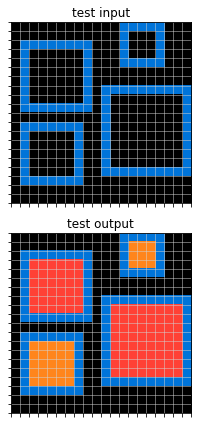

8731374e.json
Icecuber solved? False
['rectangle_guessing', 'crop', 'draw_line_from_point']
274 objects
[[6]
 [6]
 [6]]
[[1]]
[[2]]
[[4]]
[[8]]
[[3]]
[[7]]
[[2]]
[[6]]
[[5]]
[[7 7]]
[[4]]
[[9]]
[[2]]
[[5]
 [5]]
[[9]]
[[4]]
[[5]]
[[9]]
[[3]]
[[8]]
[[7]]
[[1]]
[[4]]
[[8]
 [8]]
[[6]]
[[1 1]
 [1 0]]
[[2]]
[[1]]
[[2]
 [2]
 [2]]
[[6 6 6]
 [6 0 0]]
[[8]]
[[7 0 0]
 [7 7 7]
 [7 0 0]]
[[4]]
[[1]]
[[7]]
[[5]]
[[6]]
[[8]]
[[3]]
[[1]]
[[9]]
[[7]]
[[2]]
[[3]]
[[9]]
[[2]]
[[1]]
[[5]
 [5]]
[[8]]
[[1]
 [1]]
[[3]]
[[2 2]]
[[9]]
[[5 5]]
[[6 6]]
[[9]]
[[3]]
[[8]]
[[6]]
[[4]]
[[1]]
[[8]]
[[3]]
[[5 5]]
[[6]]
[[6]]
[[1]]
[[7]]
[[6]]
[[4]]
[[7]]
[[1]]
[[7]]
[[9]]
[[0 1 0 0 0 0]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 0 1]
 [1 1 1 1 1 1]
 [1 0 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]]
[[7]]
[[6]]
[[9]]
[[6 6]]
[[8]]
[[4]]
[[6]]
[[8 8]]
[[9]]
[[8]]
[[2]]
[[9]]
[[2]]
[[3]]
[[9]]
[[6]]
[[8 8]
 [0 8]]
[[9]]
[[7]]
[[2]]
[[4]]
[[1]]
[[6]]
[[4]]
[[5]]
[[8]]
[[3]]
[[9]]
[[5]]
[[6]]
[[5]]
[[6]]
[[3]]
[[1]]
[[3]]
[[1]]
[[

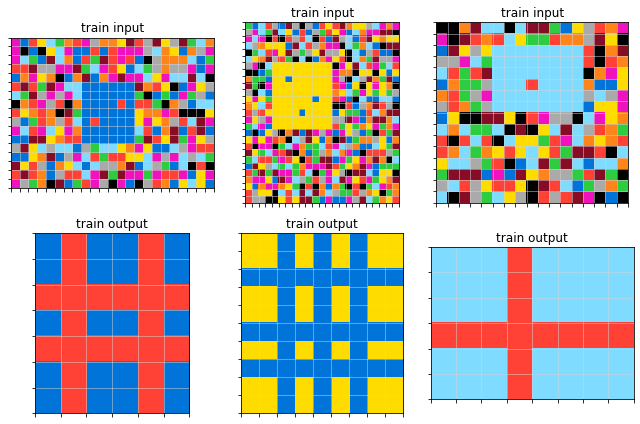

194 objects
[[2]]
[[7]]
[[2]]
[[2]]
[[6]]
[[3]]
[[3]]
[[9]
 [9]]
[[1]]
[[3]]
[[5]]
[[3]]
[[4]]
[[5]]
[[4 4]]
[[8]]
[[7]]
[[7]]
[[9]]
[[1]]
[[4]]
[[5]]
[[2]]
[[8]]
[[5]
 [5]]
[[3]]
[[2]]
[[8]]
[[7]]
[[9]]
[[8 8 8 8 8 8 8 8 0]
 [8 8 8 8 8 8 8 8 0]
 [8 8 8 8 8 8 0 8 0]
 [8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8]
 [8 8 0 8 8 8 8 8 0]
 [8 8 8 8 8 8 8 8 0]
 [8 8 8 8 8 8 8 8 0]
 [8 8 8 8 8 8 8 8 0]
 [8 8 8 8 8 8 8 8 0]
 [0 0 8 0 8 0 0 0 0]]
[[7 0]
 [7 7]]
[[6]]
[[1]]
[[2]]
[[1]]
[[6]]
[[9]]
[[3]]
[[8]]
[[1]]
[[3]]
[[6]]
[[2]
 [2]]
[[9]]
[[1]]
[[9]]
[[5]]
[[1]]
[[9]]
[[4]]
[[1]]
[[5]]
[[6]]
[[3]]
[[6]]
[[7]
 [7]]
[[9]]
[[5]]
[[8]
 [8]]
[[4 4]]
[[7]]
[[1 0]
 [1 1]]
[[3]]
[[7]]
[[6]]
[[2]]
[[1]]
[[6]
 [6]]
[[3]]
[[2]]
[[9]]
[[9]]
[[4]]
[[4]]
[[6]]
[[7]]
[[6]]
[[6]]
[[7 7]]
[[4]
 [4]
 [4]]
[[7]]
[[1]]
[[5]]
[[8]]
[[4]]
[[4]]
[[3]]
[[2]]
[[4]]
[[3]]
[[4]]
[[5]]
[[3]]
[[7 7]]
[[8]
 [8]]
[[7 7]
 [7 0]]
[[1]]
[[0 8]
 [8 8]]
[[6 6]]
[[4]]
[[7]]
[[6]]
[[1]]
[[1]]
[[9]]
[[2]]
[[6]]
[[2]]
[[7]]
[[3]]
[[5]]

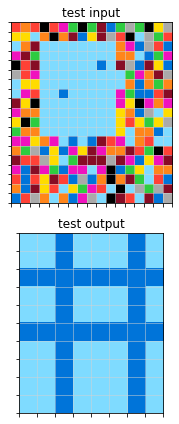

88a10436.json
Icecuber solved? False
['pattern_repetition', 'pattern_juxtaposition']
5 objects
[[0 2]
 [2 2]]
[[1]]
[[1]]
[[3]]
[[5]]
8 objects
[[0 2]
 [2 2]]
[[1]]
[[1]]
[[3]]
[[0 2]
 [2 2]]
[[1]]
[[1]]
[[3]]
4 objects
[[6]]
[[1 1]]
[[2 2 2]]
[[5]]
6 objects
[[6]]
[[1 1]]
[[2 2 2]]
[[6]]
[[1 1]]
[[2 2 2]]
4 objects
[[5]]
[[2 2]]
[[0 3]
 [3 3]]
[[1]
 [1]]
6 objects
[[2 2]]
[[0 3]
 [3 3]]
[[1]
 [1]]
[[2 2]]
[[0 3]
 [3 3]]
[[1]
 [1]]


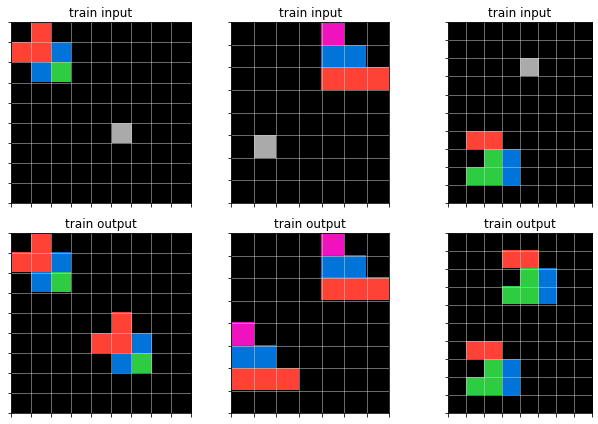

4 objects
[[2 2]]
[[1 1]]
[[3 3]]
[[5]]
6 objects
[[2 2]]
[[1 1]]
[[3 3]]
[[2 2]]
[[1 1]]
[[3 3]]


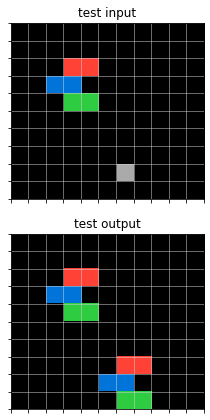

88a62173.json
Icecuber solved? True
['detect_grid', 'separate_images', 'find_the_intruder', 'crop']
4 objects
[[0 2]
 [2 2]]
[[0 2]
 [2 2]]
[[0 2]
 [2 2]]
[[2 2]
 [2 0]]
1 objects
[[2 2]
 [2 0]]
7 objects
[[1]]
[[1]]
[[1]]
[[1]]
[[1 0]
 [1 1]]
[[1]]
[[1]]
1 objects
[[1 0]
 [1 1]]
5 objects
[[8 8]
 [8 0]]
[[8]]
[[8]]
[[8 8]
 [8 0]]
[[8 8]
 [8 0]]
2 objects
[[8]]
[[8]]


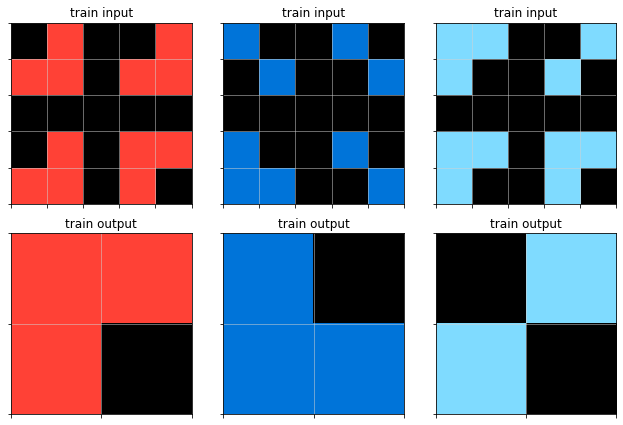

5 objects
[[5 5]
 [0 5]]
[[5]]
[[5]]
[[5 5]
 [0 5]]
[[5 5]
 [0 5]]
2 objects
[[5]]
[[5]]


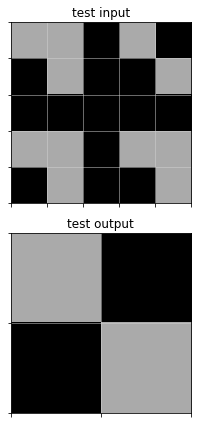

890034e9.json
Icecuber solved? False
['pattern_repetition', 'rectangle_guessing', 'contouring']
53 objects
[[8]]
[[1 1]]
[[0 1 1 1 1]
 [1 1 1 0 1]]
[[1]]
[[0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 1 1 1 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 1 0]
 [0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 1 0 1 1 1]
 [0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0]
 [0 0 0 0 0 1 1 0 0 1 1 0 1 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1]
 [0 0 0 1 1 1 1 0 0 1 1 0 1 1 1 1 0 0 1 0 1]
 [0 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1 0 1]
 [1 1 1 0 1 0 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1]
 [1 0 0 1 1 0 0 1 1 1 1 1 1 1 0 1 0 0 1 1 1]
 [1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 0 1 0 1 1 0]
 [1 1 1 1 1 1 0 0 0 1 0 0 1 1 0 1 1 0 1 0 0]
 [0 0 0 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 0 0]
 [0 0 0 1 0 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 0]
 [0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 0]
 [0 0 0 0 1 0 1 1 0 1 1 1 1 1 1 0 0 

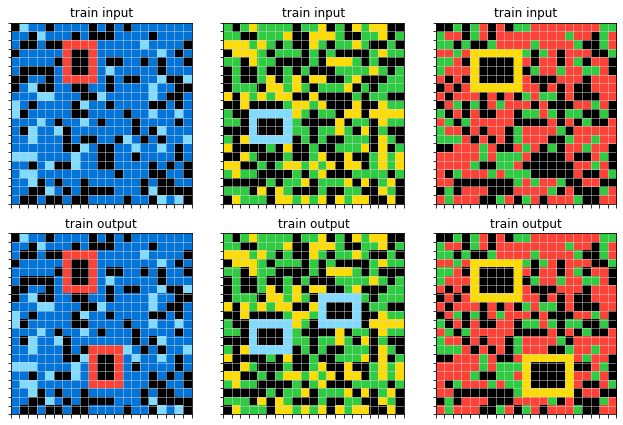

41 objects
[[2]]
[[0 0 1 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 0 1 0]
 [1 1 1 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 1]
 [1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1]
 [0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1]
 [0 0 1 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 0]
 [0 0 0 1 1 0 1 1 1 1 1 0 1 0 0 1 1 0 0 0 0]
 [0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 1 0 1 1 1]
 [0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 1 1 1 0]
 [0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 1 0 1 0]
 [0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1]
 [0 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1]
 [0 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 0 1 1 1 0]
 [0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1]
 [0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 1 0 0 1 1 1]
 [0 0 0 0 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0]
 [0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1]
 [0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 0 1 0 1]
 [0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1 1 1 1 1 1]
 [0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 0 0 1 1 1]
 [0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0]
 [0 0 0 0 0 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1]]
[[2]]
[[2]]
[[2 0]
 [2 2]]
[[2]]
[[2]

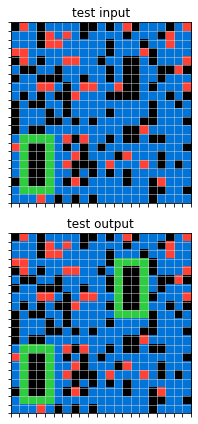

8a004b2b.json
Icecuber solved? False
['pattern_repetition', 'pattern_resizing', 'pattern_juxtaposition', 'rectangle_guessing', 'crop']
10 objects
[[4]]
[[4]]
[[3 3]
 [3 3]]
[[2 2]
 [2 2]]
[[1 1]
 [1 1]]
[[4]]
[[4]]
[[3]]
[[2]]
[[1 1 0 1 1]
 [0 1 1 1 0]]
7 objects
[[4]]
[[4]]
[[3 3]
 [3 3]]
[[2 2]
 [2 2]]
[[1 1 1 1 0 0 1 1 1 1]
 [1 1 1 1 0 0 1 1 1 1]
 [0 0 1 1 1 1 1 1 0 0]
 [0 0 1 1 1 1 1 1 0 0]]
[[4]]
[[4]]
10 objects
[[4]]
[[4]]
[[2 2]
 [2 2]]
[[8 8]
 [8 8]]
[[4]]
[[4]]
[[2]]
[[3]]
[[3]]
[[8]]
8 objects
[[4]]
[[4]]
[[2 2]
 [2 2]]
[[3 3]
 [3 3]]
[[3 3]
 [3 3]]
[[8 8]
 [8 8]]
[[4]]
[[4]]
10 objects
[[4]]
[[4]]
[[2 2 2]
 [2 2 2]
 [2 2 2]]
[[1 1 1]
 [1 1 1]
 [1 1 1]]
[[3 3 3]
 [3 3 3]
 [3 3 3]]
[[4]]
[[4]]
[[2]]
[[1 1]
 [0 1]]
[[3]]
7 objects
[[4]]
[[4]]
[[2 2 2]
 [2 2 2]
 [2 2 2]]
[[1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [0 0 0 1 1 1]
 [0 0 0 1 1 1]
 [0 0 0 1 1 1]]
[[3 3 3]
 [3 3 3]
 [3 3 3]]
[[4]]
[[4]]


9 objects
[[4]]
[[4]]
[[8 8 8 8]
 [8 8 8 8]
 [8 8 8 8]
 [8 8 8 8]]
[[3 3 3 3]
 [3 3 3 3]
 [3 3 3 3]
 [3 3 3 3]]
[[4]]
[[4]]
[[8]]
[[3]]
[[1 1 1]
 [0 1 0]]
7 objects
[[4]]
[[4]]
[[8 8 8 8]
 [8 8 8 8]
 [8 8 8 8]
 [8 8 8 8]]
[[3 3 3 3]
 [3 3 3 3]
 [3 3 3 3]
 [3 3 3 3]]
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 1 1 1 1 0 0 0 0]
 [0 0 0 0 1 1 1 1 0 0 0 0]
 [0 0 0 0 1 1 1 1 0 0 0 0]
 [0 0 0 0 1 1 1 1 0 0 0 0]]
[[4]]
[[4]]


8be77c9e.json
Icecuber solved? True
['image_repetition', 'image_reflection']
1 objects
[[1 1 0]
 [1 1 1]]
2 objects
[[1 1 0]
 [1 1 1]]
[[1 1 1]
 [1 1 0]]
2 objects
[[1 0]
 [1 1]]
[[1]]
3 objects
[[1 0]
 [1 1]
 [1 1]
 [1 0]]
[[1]]
[[1]]
1 objects
[[1]
 [1]]
1 objects
[[1]
 [1]
 [1]
 [1]]


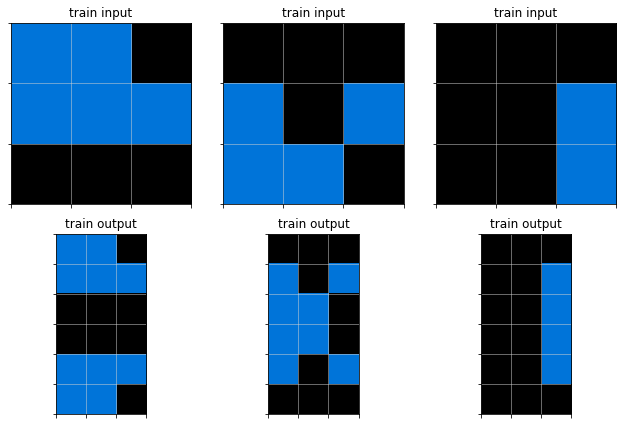

2 objects
[[1]]
[[1]]
3 objects
[[1]]
[[1]
 [1]]
[[1]]


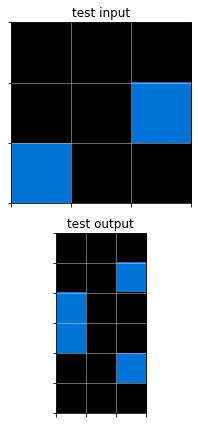

8d5021e8.json
Icecuber solved? True
['image_repetition', 'image_reflection']
2 objects
[[8]]
[[8]]
8 objects
[[8]]
[[8]]
[[8]
 [8]]
[[8]
 [8]]
[[8]
 [8]]
[[8]
 [8]]
[[8]]
[[8]]
1 objects
[[2 0]
 [2 2]
 [2 0]]
1 objects
[[0 2 2 0]
 [2 2 2 2]
 [0 2 2 0]
 [0 2 2 0]
 [2 2 2 2]
 [0 2 2 0]
 [0 2 2 0]
 [2 2 2 2]
 [0 2 2 0]]
2 objects
[[5]]
[[5]]
8 objects
[[5 5]]
[[5]]
[[5]]
[[5]]
[[5]]
[[5 5]
 [5 5]]
[[5]]
[[5]]


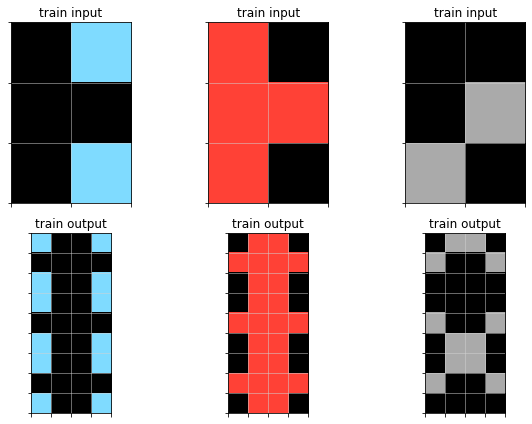

1 objects
[[3 3]
 [3 0]
 [3 3]]
1 objects
[[3 3 3 3]
 [0 3 3 0]
 [3 3 3 3]
 [3 3 3 3]
 [0 3 3 0]
 [3 3 3 3]
 [3 3 3 3]
 [0 3 3 0]
 [3 3 3 3]]


8d510a79.json
Icecuber solved? True
['draw_line_from_point', 'detect_wall', 'direction_guessing', 'associate_colors_to_bools']
8 objects
[[1]]
[[1]]
[[2]]
[[2]]
[[5 5 5 5 5 5 5 5 5 5]]
[[1]]
[[2]]
[[1]]
8 objects
[[1]]
[[1]
 [1]]
[[2]
 [2]
 [2]]
[[2]
 [2]
 [2]]
[[5 5 5 5 5 5 5 5 5 5]]
[[2]
 [2]
 [2]]
[[1]
 [1]]
[[1]
 [1]]
11 objects
[[2]]
[[1]]
[[2]]
[[1]]
[[5 5 5 5 5 5 5 5 5 5]]
[[2]]
[[2]]
[[1]]
[[1]]
[[2]]
[[1]]
11 objects
[[2]
 [2]
 [2]]
[[1]]
[[1]
 [1]]
[[2]
 [2]]
[[5 5 5 5 5 5 5 5 5 5]]
[[2]
 [2]]
[[2]
 [2]
 [2]
 [2]
 [2]]
[[2]
 [2]]
[[1]
 [1]
 [1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]


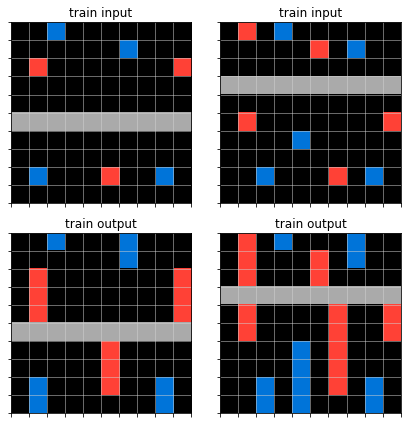

9 objects
[[2]]
[[1]]
[[2]]
[[1]]
[[5 5 5 5 5 5 5 5 5 5]]
[[1]]
[[2]]
[[2]]
[[1]]
9 objects
[[1]
 [1]]
[[1]
 [1]
 [1]]
[[2]
 [2]
 [2]]
[[2]
 [2]
 [2]]
[[5 5 5 5 5 5 5 5 5 5]]
[[2]
 [2]
 [2]
 [2]]
[[2]
 [2]
 [2]]
[[1]
 [1]
 [1]]
[[1]]


8e1813be.json
Icecuber solved? True
['recoloring', 'color_guessing', 'direction_guesingcrop', 'image_within_image']
7 objects
[[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]]
[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]
[[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]]
[[5 5 5 5 5 5]
 [5 5 5 5 5 5]
 [5 5 5 5 5 5]
 [5 5 5 5 5 5]
 [5 5 5 5 5 5]
 [5 5 5 5 5 5]]
[[4 4 4 4 4 4 4]]
[[8 8 8 8 8 8 8]]
[[6 6 6 6 6 6 6 6 6 6 6 6 6 6 6]]
6 objects
[[2 2 2 2 2 2]]
[[1 1 1 1 1 1]]
[[3 3 3 3 3 3]]
[[4 4 4 4 4 4]]
[[8 8 8 8 8 8]]
[[6 6 6 6 6 6]]
4 objects
[[2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]]
[[4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]]
[[5 5 5]
 [5 5 5]
 [5 5 5]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
3 objects
[[1]
 [1]
 [1]]
[[2]
 [2]
 [2]]
[[4]
 [4]
 [4]]
7 objects
[[2 2 2 2 2]]
[[5 5 5 5]
 [5 5 5 5]
 [5 5 5 5]
 [5 5 5 5]]
[[2]]
[[8 8 8 8 8]]
[[8]]
[[4 4 4 4 4 4 4 4 4 4 4 4]]
[[1 1 1 1 1 1 1 1 1 1 1 1]]
4 objects
[[2 2 2 2]]
[[8 8 8 8]]
[[4 4 4 4]]
[[1 1 1 1]]


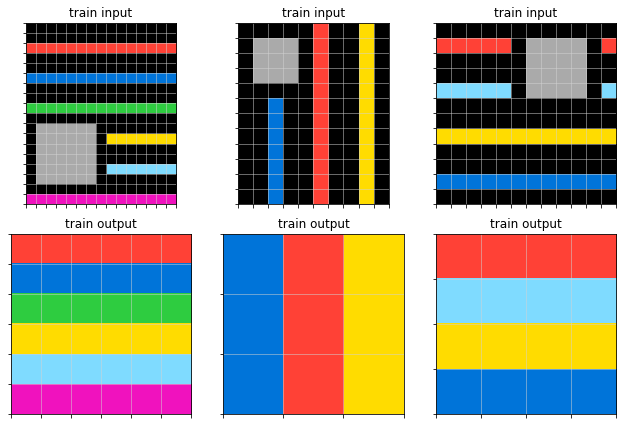

11 objects
[[2 2 2 2 2 2 2]]
[[2 2 2]]
[[5 5 5 5 5 5 5]
 [5 5 5 5 5 5 5]
 [5 5 5 5 5 5 5]
 [5 5 5 5 5 5 5]
 [5 5 5 5 5 5 5]
 [5 5 5 5 5 5 5]
 [5 5 5 5 5 5 5]]
[[3 3 3 3 3 3 3]]
[[3 3 3]]
[[8 8 8 8 8 8 8]]
[[8 8 8]]
[[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]]
[[6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6]]
[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]
[[7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]]
7 objects
[[2 2 2 2 2 2 2]]
[[3 3 3 3 3 3 3]]
[[8 8 8 8 8 8 8]]
[[4 4 4 4 4 4 4]]
[[6 6 6 6 6 6 6]]
[[1 1 1 1 1 1 1]]
[[7 7 7 7 7 7 7]]


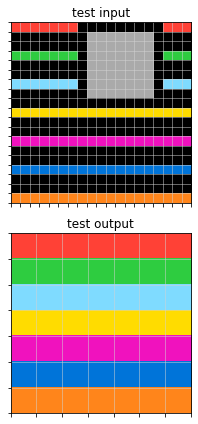

8e5a5113.json
Icecuber solved? True
['detect_wall', 'separate_images', 'image_repetition', 'image_rotation']
5 objects
[[1 1 0]
 [0 1 1]
 [0 0 1]]
[[2]]
[[5]
 [5]
 [5]]
[[5]
 [5]
 [5]]
[[4 0]
 [4 4]]
11 objects
[[1 1 0]
 [0 1 1]
 [0 0 1]]
[[2]]
[[5]
 [5]
 [5]]
[[4 4]
 [4 0]]
[[0 0 1]
 [0 1 1]
 [1 1 0]]
[[5]
 [5]
 [5]]
[[1 0 0]
 [1 1 0]
 [0 1 1]]
[[4 4]
 [0 4]]
[[4 0]
 [4 4]]
[[2]]
[[2]]
5 objects
[[6]
 [6]
 [6]]
[[3 3]
 [3 3]
 [3 0]]
[[5]
 [5]
 [5]]
[[5]
 [5]
 [5]]
[[2]]
11 objects
[[6]
 [6]
 [6]]
[[3 3]
 [3 3]
 [3 0]]
[[5]
 [5]
 [5]]
[[6 6 6]]
[[5]
 [5]
 [5]]
[[2]]
[[0 3]
 [3 3]
 [3 3]]
[[6]
 [6]
 [6]]
[[3 3 3]
 [0 3 3]]
[[2]]
[[2]]
5 objects
[[2]]
[[0 7]
 [7 7]]
[[0 0 8]
 [0 0 8]
 [8 8 8]]
[[5]
 [5]
 [5]]
[[5]
 [5]
 [5]]
11 objects
[[2]]
[[0 7]
 [7 7]]
[[0 0 8]
 [0 0 8]
 [8 8 8]]
[[5]
 [5]
 [5]]
[[8 0 0]
 [8 0 0]
 [8 8 8]]
[[7 0]
 [7 7]]
[[2]]
[[5]
 [5]
 [5]]
[[8 8 8]
 [8 0 0]
 [8 0 0]]
[[7 7]
 [7 0]]
[[2]]


5 objects
[[3 3]]
[[0 0 9]
 [9 9 9]
 [0 9 9]]
[[5]
 [5]
 [5]]
[[5]
 [5]
 [5]]
[[2]]
11 objects
[[3 3]]
[[0 0 9]
 [9 9 9]
 [0 9 9]]
[[5]
 [5]
 [5]]
[[2]]
[[0 9 0]
 [9 9 0]
 [9 9 9]]
[[3]
 [3]]
[[5]
 [5]
 [5]]
[[9 9 0]
 [9 9 9]
 [9 0 0]]
[[2]]
[[2]]
[[3 3]]


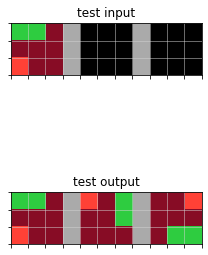

8eb1be9a.json
Icecuber solved? True
['pattern_repetition', 'image_filling']
1 objects
[[0 0 8 0 0 0 0 0 8 0 0 0 0 0 8 0 0 0 0]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
 [0 0 0 0 0 8 0 0 0 0 0 8 0 0 0 0 0 8 0]]
8 objects
[[8]]
[[8]]
[[8]]
[[0 0 8 0 0 0 0 0 8 0 0 0 0 0 8 0 0 0 0]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
 [0 0 0 0 0 8 0 0 0 0 0 8 0 0 0 0 0 8 0]]
[[0 0 8 0 0 0 0 0 8 0 0 0 0 0 8 0 0 0 0]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
 [0 0 0 0 0 8 0 0 0 0 0 8 0 0 0 0 0 8 0]]
[[0 0 8 0 0 0 0 0 8 0 0 0 0 0 8 0 0 0 0]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
 [0 0 0 0 0 8 0 0 0 0 0 8 0 0 0 0 0 8 0]]
[[0 0 8 0 0 0 0 0 8 0 0 0 0 0 8 0 0 0 0]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
 [0 0 0 0 0 8 0 0 0 0 0 8 0 0 0 0 0 8 0]]
[[0 0 8 0 0 0 0 0 8 0 0 0 0 0 8 0 0 0 0]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]]
1 objects
[[2 0 2 0 2 0 2 0 2 0 2 0]
 [2 2 2 2 2 2 2 2 2 2 2 2]
 [2 0 2 0 2 0 2 0 2 0 2 0]]
1 objects
[[2 0 2 0 2 0 2 0 2 0 2 0]
 [2 2 2 2 2 2 2 2 2 2 2 2]
 [2 0 2 0 2 0 2 0 2 0 2 0]


9 objects
[[1]]
[[1]]
[[1]]
[[1]]
[[1]
 [1]]
[[1 1]
 [1 1]]
[[1 1]
 [1 1]]
[[1 1]
 [1 1]]
[[1 1]
 [1 1]]
45 objects
[[1]]
[[1]]
[[1]]
[[1]]
[[1]
 [1]]
[[1 1]
 [1 1]]
[[1 1]
 [1 1]]
[[1 1]
 [1 1]]
[[1 1]
 [1 1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]
 [1]]
[[1 1]
 [1 1]]
[[1 1]
 [1 1]]
[[1 1]
 [1 1]]
[[1 1]
 [1 1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]
 [1]]
[[1 1]
 [1 1]]
[[1 1]
 [1 1]]
[[1 1]
 [1 1]]
[[1 1]
 [1 1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]
 [1]]
[[1 1]
 [1 1]]
[[1 1]
 [1 1]]
[[1 1]
 [1 1]]
[[1 1]
 [1 1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1 1]]
[[1 1]]
[[1 1]]
[[1 1]]


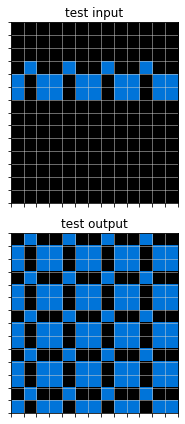

8efcae92.json
Icecuber solved? True
['separate_images', 'rectangle_guessing', 'count_tiles', 'take_maximum', 'crop']
16 objects
[[1 1 1 1 1 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 0 1 1 1 1 0 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 0 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]]
[[2]]
[[1 1 1 1 1]
 [1 1 1 0 1]
 [1 1 0 1 1]
 [1 1 1 1 1]
 [1 0 1 1 1]
 [1 1 1 1 1]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[1 1 1 1 1 1]
 [1 0 1 0 1 1]
 [1 1 0 1 0 1]
 [1 0 1 1 1 1]
 [1 1 1 0 1 1]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
7 objects
[[1 1 1 1 1 1]
 [1 0 1 0 1 1]
 [1 1 0 1 0 1]
 [1 0 1 1 1 1]
 [1 1 1 0 1 1]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
29 objects
[[1 1 1 1 0 1 1 1 1]
 [1 0 1 1 1 1 1 1 0]
 [1 1 1 1 1 0 1 1 1]
 [1 1 1 0 1 1 1 0 1]
 [0 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 0 1 1 1]
 [1 0 1 1 1 1 1 1 1]
 [1 1 1 0 1 1 1 1 0]]
[[2]]
[[2]]
[[2]]
[[1 1 1 1 1 0]
 [1 1 0 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 0 1 1]
 [1 1 1 1 1 1]
 [1 0 1 1 1 1]
 [1 1 1 1 0 1]
 [1 0 1 1 1 1]
 [1 1 1 1 1 1]]
[[2]]
[[2

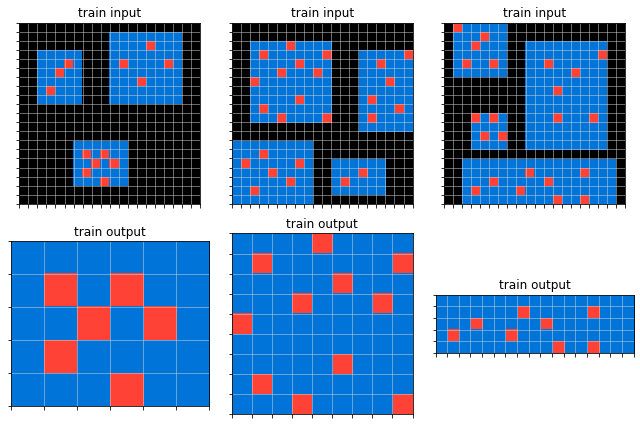

26 objects
[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 0 1 1 1]
 [1 1 1 0 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 0 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 0 1 1 1]
 [1 1 1 1 1]
 [1 1 1 0 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 0 1 1 1]
 [1 1 1 1 1]]
[[1 1 1 1 1 1 1 1]
 [1 1 1 1 1 0 1 1]
 [1 0 1 1 1 1 1 1]]
[[2]]
[[2]]
[[2]]
[[2]]
[[1 1 1 1 0 1 1 0 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 0 1 1 1 1 1 1 1]
 [1 1 1 1 1 0 1 1 0 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 0 1 0 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 0 1 1]
 [1 1 0 1 0 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[1 1 1 1 1 1 1 1 1]
 [1 1 0 1 1 1 0 1 1]
 [1 1 1 1 0 1 1 0 1]]
[[2]]
[[2]]
[[2]]
[[2]]
11 objects
[[1 1 1 1 0 1 1 0 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 0 1 1 1 1 1 1 1]
 [1 1 1 1 1 0 1 1 0 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 0 1 0 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 0 1 1]
 [1 1 0 1 0 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]


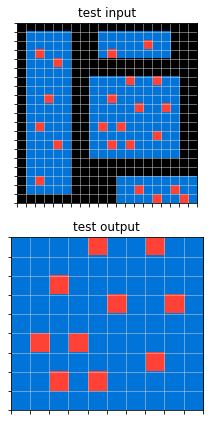

8f2ea7aa.json
Icecuber solved? True
['crop', 'fractal_repetition']
3 objects
[[8 8]]
[[8]]
[[8]]
12 objects
[[8 8]]
[[8 8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8 8]]
[[8]]
[[8]]
[[8 8]]
[[8]]
[[8]]
2 objects
[[0 7]
 [7 7]]
[[7]]
8 objects
[[0 7]
 [7 7]]
[[7]]
[[0 7]
 [7 7]]
[[0 7]
 [7 7]]
[[7]]
[[7]]
[[0 7]
 [7 7]]
[[7]]
3 objects
[[6]]
[[6 0]
 [6 6]]
[[6]]
13 objects
[[6]]
[[6 0]
 [6 6]]
[[6]]
[[6]]
[[6]]
[[6 0]
 [6 6]
 [0 6]]
[[6]]
[[6 0]
 [6 6]]
[[6]]
[[6]]
[[6 0]
 [6 6]]
[[6 6 0]
 [0 6 6]]
[[6]]


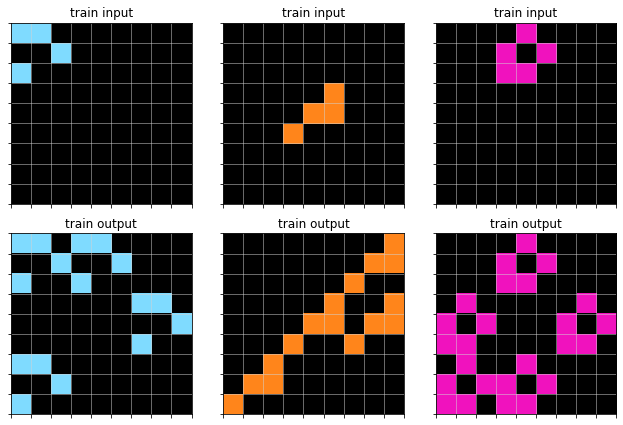

1 objects
[[2 0 0]
 [2 2 0]
 [0 2 2]]
5 objects
[[2 0 0]
 [2 2 0]
 [0 2 2]]
[[2 0 0]
 [2 2 0]
 [0 2 2]]
[[2 0 0]
 [2 2 0]
 [0 2 2]]
[[2 0 0]
 [2 2 0]
 [0 2 2]]
[[2 0 0]
 [2 2 0]
 [0 2 2]]


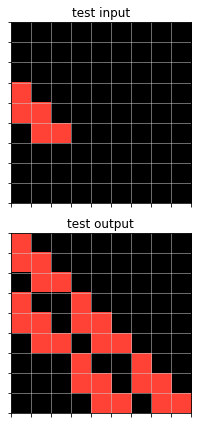

90c28cc7.json
Icecuber solved? True
['crop', 'rectangle_guessing', 'summarize']
7 objects
[[8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8]]
[[7 7 7 7 7 7 7 7 7 7 7 7]
 [7 7 7 7 7 7 7 7 7 7 7 7]
 [7 7 7 7 7 7 7 7 7 7 7 7]
 [7 7 7 7 7 7 7 7 7 7 7 7]
 [7 7 7 7 7 7 7 7 7 7 7 7]
 [7 7 7 7 7 7 7 7 7 7 7 7]]
[[3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3]]
[[4 4 4 4 4 4]
 [4 4 4 4 4 4]
 [4 4 4 4 4 4]
 [4 4 4 4 4 4]]
[[1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]]
[[2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2]]
[[5 5 5 5 5 5 5 5 5 5 5 5]
 [5 5 5 5 5 5 5 5 5 5 5 5]
 [5 5 5 5 5 5 5 5 5 5 5 5]
 [5 5 5 5 5 5 5 5 5 5 5 5]
 [5 5 5 5 5 5 5 5 5 5 5 5]]
7 objects
[[8]]
[[7 7]]
[[3]]
[[4]]
[[1]]
[[2]]
[[5 5]]
4 objects
[[2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2]

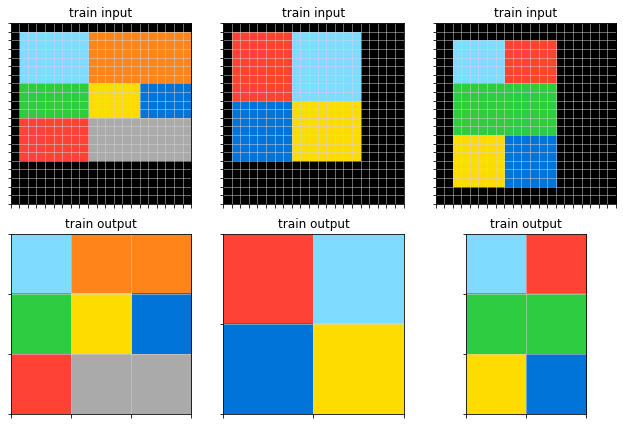

9 objects
[[2 2 2 2 2]
 [2 2 2 2 2]
 [2 2 2 2 2]
 [2 2 2 2 2]
 [2 2 2 2 2]
 [2 2 2 2 2]]
[[4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4]]
[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]
[[8 8 8 8 8]
 [8 8 8 8 8]
 [8 8 8 8 8]
 [8 8 8 8 8]
 [8 8 8 8 8]
 [8 8 8 8 8]
 [8 8 8 8 8]
 [8 8 8 8 8]]
[[3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3]]
[[8 8 8 8 8]
 [8 8 8 8 8]
 [8 8 8 8 8]
 [8 8 8 8 8]
 [8 8 8 8 8]
 [8 8 8 8 8]
 [8 8 8 8 8]
 [8 8 8 8 8]]
[[2 2 2 2 2]
 [2 2 2 2 2]
 [2 2 2 2 2]
 [2 2 2 2 2]]
[[4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4]]
[[2 2 2 2 2]
 [2 2 2 2 2]
 [2 2 2 2 2]
 [2 2 2 2 2]]
9 objects
[[2]]
[[4]]
[[1]]
[[8]]
[[3]]
[[8]]
[[2]]
[[4]]
[[2]]


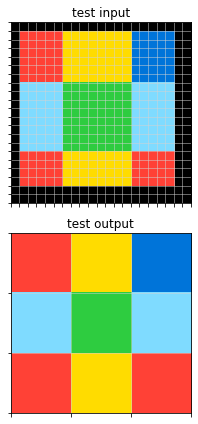

90f3ed37.json
Icecuber solved? False
['pattern_repetition', 'recoloring']
7 objects
[[8 8]]
[[8]]
[[8 8 8 8 8 8 8]]
[[8 8 8]]
[[8]]
[[8 8]]
[[8]]
9 objects
[[8 8]]
[[8]]
[[8 8 8 8 8 8 8]]
[[8 8 8]]
[[8]]
[[1 1 1 1 1 1]]
[[8 8]]
[[8]]
[[1 1 1 1 1 1 1]]
4 objects
[[8 8 8 8 8 8 8 8 8 8]]
[[8 8 8]]
[[8 8 8 8]]
[[8 8]]
7 objects
[[8 8 8 8 8 8 8 8 8 8]]
[[8 8 8]]
[[1 1 1 1 1 1 1]]
[[8 8 8 8]]
[[1 1 1 1 1 1]]
[[8 8]]
[[1 1 1 1 1 1 1 1]]
18 objects
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
30 objects
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[1]]
[[1]]
[[1]]
[[8]]
[[1]]
[[1]]
[[1]]
[[1]]
[[8]]
[[8]]
[[8]]
[[1]]
[[1]]
[[8]]
[[8]]
[[1]]
[[1]]
[[1]]


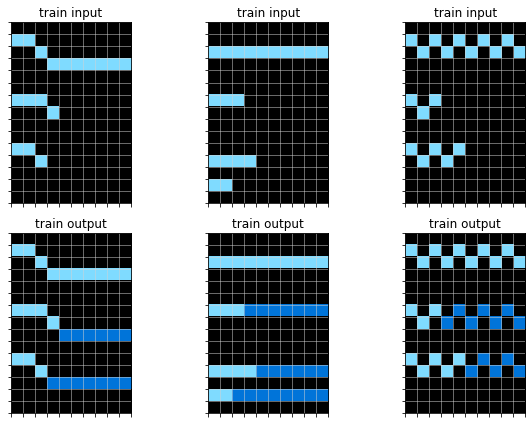

6 objects
[[8 8 8 8 8 8 8 8]]
[[8 8]]
[[8 8 8 8 8 8 8 8]]
[[8 8]]
[[8 8 8]]
[[8 8]]
8 objects
[[8 8 8 8 8 8 8 8]]
[[8 8]]
[[8 8 8 8 8 8 8 8]]
[[8 8]]
[[1 1 1 1 1]]
[[8 8 8]]
[[8 8]]
[[1 1 1 1 1]]


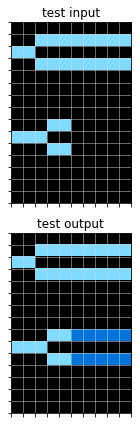

913fb3ed.json
Icecuber solved? False
['contouring', 'associate_colors_to_colors']
3 objects
[[8]]
[[3]]
[[2]]
6 objects
[[4 4 4]
 [4 0 4]
 [4 4 4]]
[[6 6 6]
 [6 0 6]
 [6 6 6]]
[[8]]
[[3]]
[[1 1 1]
 [1 0 1]
 [1 1 1]]
[[2]]
1 objects
[[3]]
2 objects
[[6 6 6]
 [6 0 6]
 [6 6 6]]
[[3]]
2 objects
[[3]]
[[2]]
4 objects
[[6 6 6]
 [6 0 6]
 [6 6 6]]
[[3]]
[[1 1 1]
 [1 0 1]
 [1 1 1]]
[[2]]
1 objects
[[8]]
2 objects
[[4 4 4]
 [4 0 4]
 [4 4 4]]
[[8]]


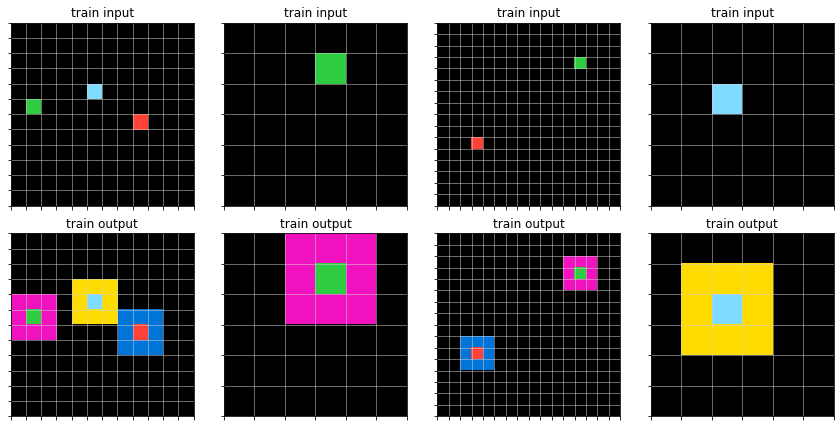

3 objects
[[3]]
[[2]]
[[8]]
6 objects
[[6 6 6]
 [6 0 6]
 [6 6 6]]
[[3]]
[[1 1 1]
 [1 0 1]
 [1 1 1]]
[[2]]
[[4 4 4]
 [4 0 4]
 [4 4 4]]
[[8]]


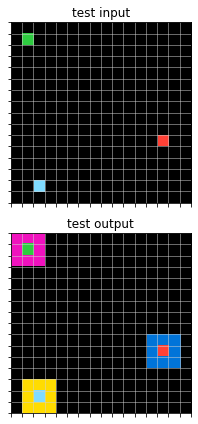

91413438.json
Icecuber solved? False
['count_tiles', 'algebra', 'image_repetition']
1 objects
[[6 6 0]
 [0 6 6]
 [0 0 6]]
5 objects
[[6 6 0]
 [0 6 6]
 [0 0 6]]
[[6 6 0]
 [0 6 6]
 [0 0 6]]
[[6 6 0]
 [0 6 6]
 [0 0 6]]
[[6 6 0]
 [0 6 6]
 [0 0 6]]
[[6 6 0]
 [0 6 6]
 [0 0 6]]
2 objects
[[4 0]
 [4 4]]
[[4]]
8 objects
[[4 0]
 [4 4]]
[[4 0]
 [4 4]]
[[4 0]
 [4 4]]
[[4 0]
 [4 4]]
[[4]]
[[4]]
[[4]]
[[4]]
2 objects
[[3]
 [3]]
[[0 3]
 [0 3]
 [3 3]]
5 objects
[[3]
 [3]]
[[0 3 3]
 [0 3 3]
 [3 3 0]
 [0 3 3]
 [0 3 3]
 [3 3 0]]
[[0 3 3]
 [0 3 3]
 [3 3 0]
 [0 3 3]
 [0 3 3]
 [3 3 0]]
[[0 3]
 [0 3]
 [3 3]
 [0 3]
 [0 3]
 [3 3]]
[[3]
 [3]]
3 objects
[[2]]
[[2]]
[[2]]
7 objects
[[2]]
[[2 2]]
[[2 2]]
[[2]]
[[2]]
[[2]]
[[2]]


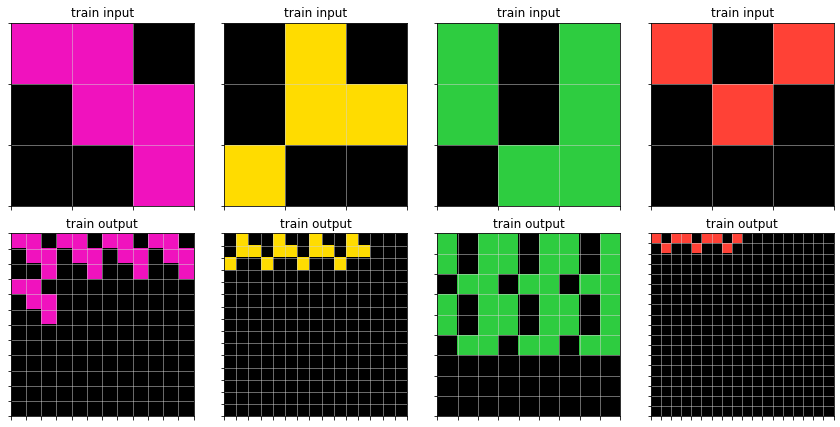

2 objects
[[8]]
[[8]]
4 objects
[[8]]
[[8]]
[[8]]
[[8]]


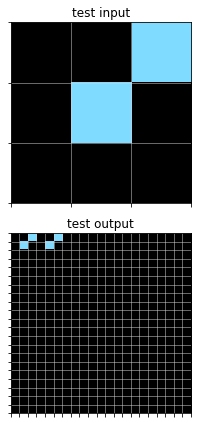

91714a58.json
Icecuber solved? False
['find_the_intruder', 'remove_noise']
83 objects
[[1 1]]
[[4]]
[[2]]
[[2]]
[[5]]
[[3]]
[[5]]
[[9 9]]
[[8]]
[[4]]
[[5]]
[[8]]
[[1]]
[[8]]
[[2 0 0]
 [2 2 2]
 [2 2 2]
 [2 2 2]
 [2 2 2]]
[[8]]
[[6]]
[[8]]
[[5]]
[[8]]
[[6]]
[[1]]
[[1]]
[[9]]
[[5]]
[[2]]
[[4]]
[[4]]
[[2]]
[[7]]
[[3]]
[[6]]
[[3]
 [3]]
[[5]]
[[7]]
[[7]]
[[4]]
[[6]]
[[4]]
[[7 7 0]
 [0 7 7]]
[[2]]
[[7]]
[[1]]
[[7]]
[[9]]
[[8]]
[[5]]
[[2]]
[[1]]
[[5]]
[[6]]
[[4]]
[[9]]
[[3]]
[[3]]
[[9]]
[[4]]
[[6]]
[[2]]
[[4]]
[[2]]
[[1]]
[[6]]
[[5]]
[[2]]
[[4]]
[[6]]
[[6]]
[[2]]
[[3]]
[[7]
 [7]]
[[2]]
[[7]]
[[9]]
[[5]]
[[6]]
[[5]]
[[3]]
[[1]]
[[9]]
[[2]]
[[1]]
[[9]]
1 objects
[[2 2 2]
 [2 2 2]
 [2 2 2]
 [2 2 2]]
81 objects
[[7]]
[[6]]
[[6]]
[[7]]
[[3]]
[[3]]
[[1]]
[[8]]
[[2]]
[[3]]
[[9]]
[[8]]
[[8]]
[[2 2]]
[[2]]
[[9]]
[[1]]
[[2]]
[[5]]
[[2]]
[[7]]
[[6]]
[[3]]
[[1]]
[[4 4]]
[[3]]
[[9]]
[[7]]
[[2]]
[[8]]
[[6]]
[[8]]
[[3]]
[[9]]
[[4]]
[[8]]
[[7]]
[[9]]
[[5]]
[[4]]
[[6]]
[[1]]
[[4]]
[[3]]
[[1]]
[[8]]
[[5]]
[[9]]

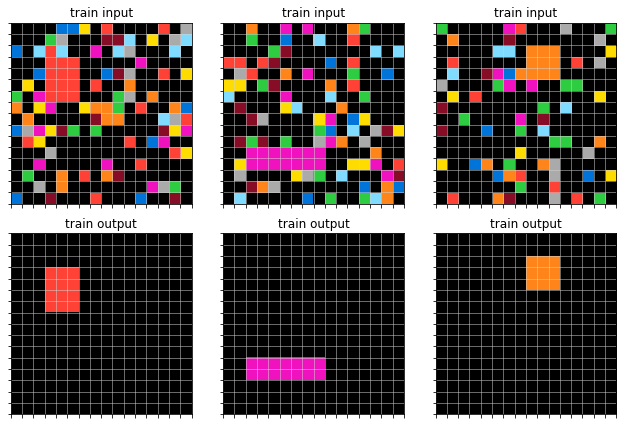

77 objects
[[1]]
[[7]]
[[3]]
[[1]]
[[2]]
[[4]]
[[7]]
[[3]]
[[6]]
[[8]]
[[6]]
[[8]]
[[1]]
[[1]]
[[7]]
[[4]]
[[8]]
[[3]]
[[8]]
[[3]]
[[8]]
[[5]]
[[1]]
[[8]]
[[3]
 [3]]
[[8]]
[[5]]
[[8]]
[[7]]
[[1 1]]
[[8]]
[[5]]
[[7]]
[[9]]
[[2]]
[[7]]
[[7]]
[[9]]
[[4]]
[[2]]
[[1]]
[[7]]
[[9]]
[[1]]
[[1]]
[[5]]
[[8]]
[[9]]
[[4]]
[[5 5 5 5 5 5]
 [5 5 5 5 5 5]
 [5 0 0 0 0 0]]
[[3]]
[[3]]
[[6]]
[[1]]
[[4]]
[[9]]
[[5]]
[[2]]
[[1]
 [1]]
[[3]]
[[6]]
[[2]]
[[1]]
[[5]]
[[7]]
[[6]]
[[7]]
[[3]]
[[6]]
[[9]]
[[3]]
[[7 7]]
[[6]]
[[8]]
[[5]]
[[8]]
[[9]]
1 objects
[[5 5 5 5 5 5]
 [5 5 5 5 5 5]]


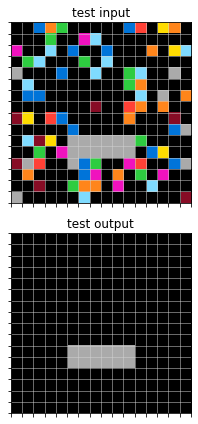

9172f3a0.json
Icecuber solved? True
['image_resizing']
4 objects
[[3 3]]
[[7]]
[[4]]
[[4]]
4 objects
[[3 3 3 3 3 3]
 [3 3 3 3 3 3]
 [3 3 3 3 3 3]]
[[7 7 7]
 [7 7 7]
 [7 7 7]]
[[4 4 4]
 [4 4 4]
 [4 4 4]]
[[4 4 4]
 [4 4 4]
 [4 4 4]]
3 objects
[[3]]
[[0 2]
 [2 2]]
[[3]]
3 objects
[[3 3 3]
 [3 3 3]
 [3 3 3]]
[[0 0 0 2 2 2]
 [0 0 0 2 2 2]
 [0 0 0 2 2 2]
 [2 2 2 2 2 2]
 [2 2 2 2 2 2]
 [2 2 2 2 2 2]]
[[3 3 3]
 [3 3 3]
 [3 3 3]]


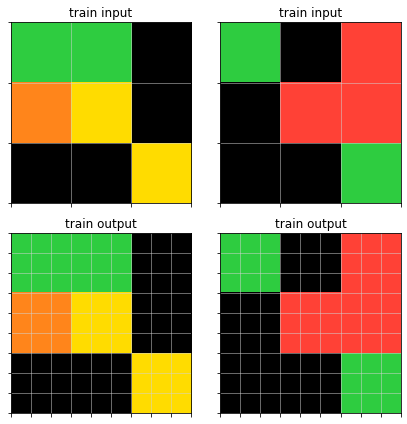

4 objects
[[1]]
[[6]]
[[6]]
[[1]]
4 objects
[[1 1 1]
 [1 1 1]
 [1 1 1]]
[[6 6 6]
 [6 6 6]
 [6 6 6]]
[[6 6 6]
 [6 6 6]
 [6 6 6]]
[[1 1 1]
 [1 1 1]
 [1 1 1]]


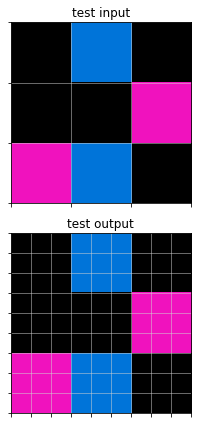

928ad970.json
Icecuber solved? True
['rectangle_guessing', 'color_guessing', 'draw_rectangle']
5 objects
[[5]]
[[1 1 1]
 [1 0 1]
 [1 0 1]
 [1 1 1]]
[[5]]
[[5]]
[[5]]
6 objects
[[5]]
[[1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1]]
[[1 1 1]
 [1 0 1]
 [1 0 1]
 [1 1 1]]
[[5]]
[[5]]
[[5]]
5 objects
[[5]]
[[5]]
[[3 3 3]
 [3 0 3]
 [3 3 3]]
[[5]]
[[5]]
6 objects
[[5]]
[[3 3 3 3 3 3 3 3]
 [3 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 3]
 [3 3 3 3 3 3 3 3]]
[[5]]
[[3 3 3]
 [3 0 3]
 [3 3 3]]
[[5]]
[[5]]
5 objects
[[5]]
[[4 4 4 4]
 [4 0 0 4]
 [4 0 0 4]
 [4 4 4 4]]
[[5]]
[[5]]
[[5]]
6 objects
[[5]]
[[4 4 4 4 4 4 4 4 4 4]
 [4 0 0 0 0 0 0 0 0 4]
 [4 0 0 0 0 0 0 0 0 4]
 [4 0 0 0 0 0 0 0 0 4]
 [4 0 0 0 0 0 0 0 0 4]
 [4 0 0 0 0 0 0 0 0 4]
 [4 0 0 0 0 0 0 0 0 4]
 [

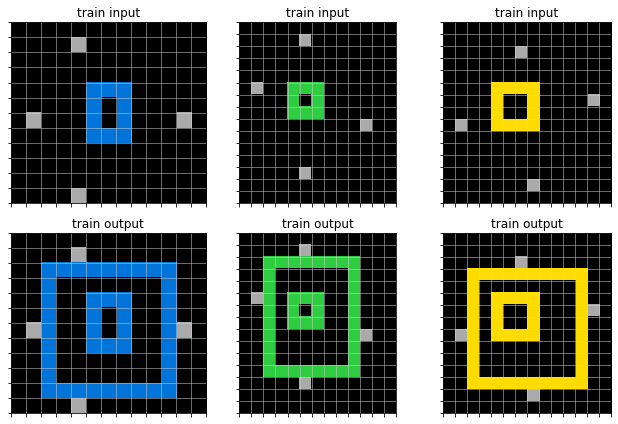

5 objects
[[5]]
[[8 8 8 8]
 [8 0 0 8]
 [8 8 8 8]]
[[5]]
[[5]]
[[5]]
6 objects
[[5]]
[[8 8 8 8 8 8 8 8 8]
 [8 0 0 0 0 0 0 0 8]
 [8 0 0 0 0 0 0 0 8]
 [8 0 0 0 0 0 0 0 8]
 [8 0 0 0 0 0 0 0 8]
 [8 0 0 0 0 0 0 0 8]
 [8 0 0 0 0 0 0 0 8]
 [8 0 0 0 0 0 0 0 8]
 [8 0 0 0 0 0 0 0 8]
 [8 0 0 0 0 0 0 0 8]
 [8 8 8 8 8 8 8 8 8]]
[[8 8 8 8]
 [8 0 0 8]
 [8 8 8 8]]
[[5]]
[[5]]
[[5]]


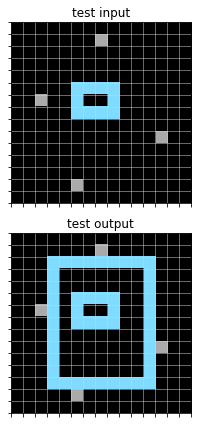

93b581b8.json
Icecuber solved? False
['pattern_expansion', 'color_guessing', 'out_of_boundary']
4 objects
[[9]]
[[3]]
[[7]]
[[8]]
8 objects
[[8 8]
 [8 8]]
[[7 7]
 [7 7]]
[[9]]
[[3]]
[[7]]
[[8]]
[[3 3]
 [3 3]]
[[9 9]
 [9 9]]
4 objects
[[4]]
[[6]]
[[2]]
[[1]]
8 objects
[[1]]
[[2 2]]
[[4]]
[[6]]
[[2]]
[[1]]
[[6]
 [6]]
[[4 4]
 [4 4]]
4 objects
[[3]]
[[6]]
[[5]]
[[2]]
8 objects
[[2 2]
 [2 2]]
[[5 5]
 [5 5]]
[[3]]
[[6]]
[[5]]
[[2]]
[[6 6]
 [6 6]]
[[3 3]
 [3 3]]


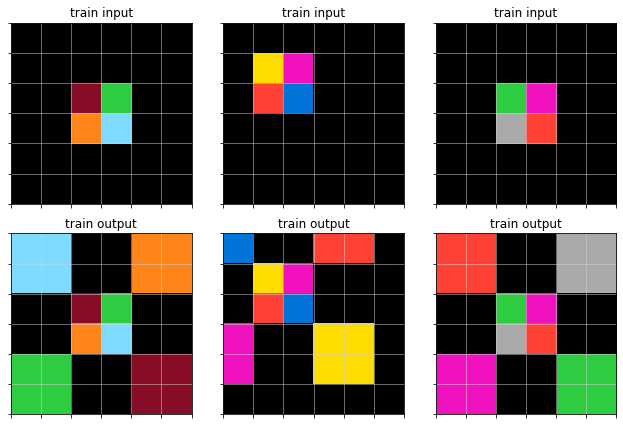

4 objects
[[3]]
[[1]]
[[2]]
[[5]]
8 objects
[[5 5]
 [5 5]]
[[2 2]
 [2 2]]
[[3]]
[[1]]
[[2]]
[[5]]
[[1 1]]
[[3 3]]


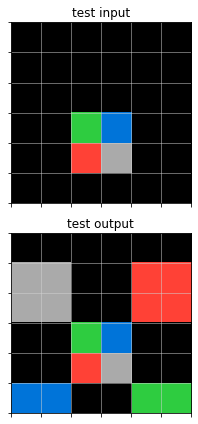

941d9a10.json
Icecuber solved? False
['detect_grid', 'loop_filling', 'pairwise_analogy']
1 objects
[[0 0 5 0 0 0 0 5 0 0]
 [0 0 5 0 0 0 0 5 0 0]
 [0 0 5 0 0 0 0 5 0 0]
 [5 5 5 5 5 5 5 5 5 5]
 [0 0 5 0 0 0 0 5 0 0]
 [0 0 5 0 0 0 0 5 0 0]
 [0 0 5 0 0 0 0 5 0 0]
 [5 5 5 5 5 5 5 5 5 5]
 [0 0 5 0 0 0 0 5 0 0]
 [0 0 5 0 0 0 0 5 0 0]]
4 objects
[[1 1]
 [1 1]
 [1 1]]
[[0 0 5 0 0 0 0 5 0 0]
 [0 0 5 0 0 0 0 5 0 0]
 [0 0 5 0 0 0 0 5 0 0]
 [5 5 5 5 5 5 5 5 5 5]
 [0 0 5 0 0 0 0 5 0 0]
 [0 0 5 0 0 0 0 5 0 0]
 [0 0 5 0 0 0 0 5 0 0]
 [5 5 5 5 5 5 5 5 5 5]
 [0 0 5 0 0 0 0 5 0 0]
 [0 0 5 0 0 0 0 5 0 0]]
[[2 2 2 2]
 [2 2 2 2]
 [2 2 2 2]]
[[3 3]
 [3 3]]
1 objects
[[0 0 0 5 0 0 0 0 5 0]
 [5 5 5 5 5 5 5 5 5 5]
 [0 0 0 5 0 0 0 0 5 0]
 [5 5 5 5 5 5 5 5 5 5]
 [0 0 0 5 0 0 0 0 5 0]
 [0 0 0 5 0 0 0 0 5 0]
 [5 5 5 5 5 5 5 5 5 5]
 [0 0 0 5 0 0 0 0 5 0]
 [5 5 5 5 5 5 5 5 5 5]
 [0 0 0 5 0 0 0 0 5 0]]
4 objects
[[1 1 1]]
[[0 0 0 5 0 0 0 0 5 0]
 [5 5 5 5 5 5 5 5 5 5]
 [0 0 0 5 0 0 0 0 5 0]
 [5 5 5 5 5 5 5 5 5 5]
 [0 0

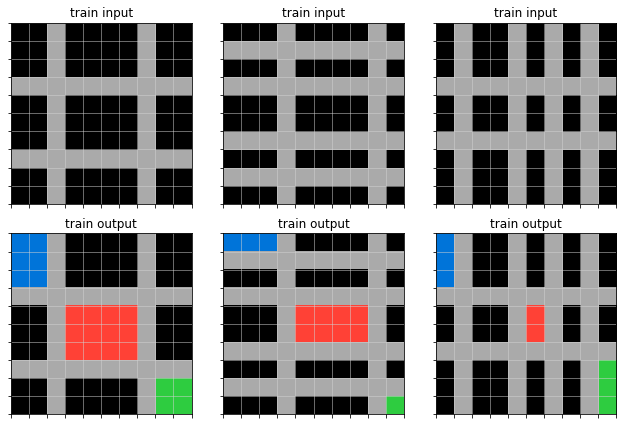

1 objects
[[0 5 0 5 0 0 5 0 5 0]
 [5 5 5 5 5 5 5 5 5 5]
 [0 5 0 5 0 0 5 0 5 0]
 [0 5 0 5 0 0 5 0 5 0]
 [5 5 5 5 5 5 5 5 5 5]
 [0 5 0 5 0 0 5 0 5 0]
 [5 5 5 5 5 5 5 5 5 5]
 [0 5 0 5 0 0 5 0 5 0]
 [5 5 5 5 5 5 5 5 5 5]
 [0 5 0 5 0 0 5 0 5 0]]
4 objects
[[1]]
[[0 5 0 5 0 0 5 0 5 0]
 [5 5 5 5 5 5 5 5 5 5]
 [0 5 0 5 0 0 5 0 5 0]
 [0 5 0 5 0 0 5 0 5 0]
 [5 5 5 5 5 5 5 5 5 5]
 [0 5 0 5 0 0 5 0 5 0]
 [5 5 5 5 5 5 5 5 5 5]
 [0 5 0 5 0 0 5 0 5 0]
 [5 5 5 5 5 5 5 5 5 5]
 [0 5 0 5 0 0 5 0 5 0]]
[[2 2]]
[[3]]


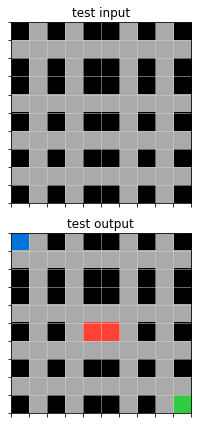

94f9d214.json
Icecuber solved? True
['separate_images', 'take_complement', 'pattern_intersection']
4 objects
[[3 3]]
[[3]]
[[3]]
[[0 0 0 1]
 [1 0 1 1]
 [1 1 1 1]
 [0 1 0 1]]
2 objects
[[2 2 2]]
[[2]]
6 objects
[[3 3 3 3]
 [0 3 3 0]
 [0 0 3 3]]
[[3]]
[[1]
 [1]]
[[1]]
[[1]]
[[1]]
2 objects
[[2]
 [2]]
[[2 2]]
4 objects
[[3 3]
 [3 0]]
[[3]]
[[0 0 3 0]
 [3 3 3 3]]
[[1 1 1 1]
 [1 1 0 0]
 [1 1 0 0]
 [0 1 1 0]]
2 objects
[[2]]
[[2]]
4 objects
[[3 3 3 3]
 [3 0 0 0]
 [3 0 0 0]
 [3 3 0 0]]
[[3 3]
 [0 3]]
[[1 1 1 0]
 [0 1 1 1]
 [0 0 1 1]
 [0 1 1 1]]
[[1]]
1 objects
[[2]]


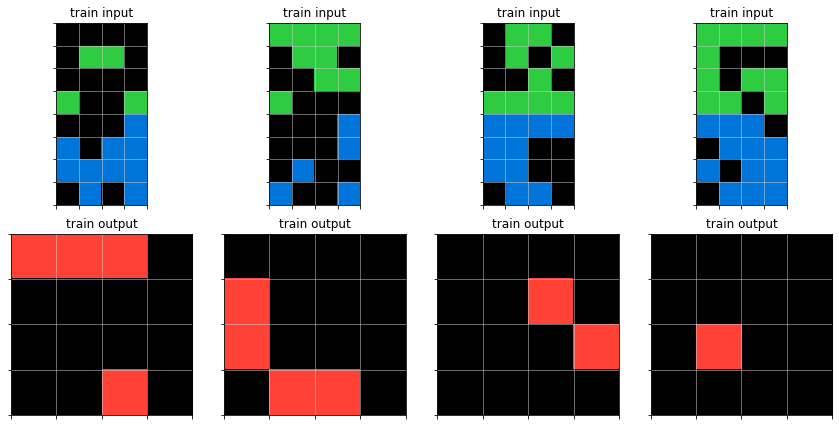

6 objects
[[0 3 0]
 [3 3 3]]
[[3]]
[[3]]
[[3 3 3]]
[[1 1]
 [1 1]]
[[0 1]
 [1 1]]
4 objects
[[2]]
[[2]]
[[2]]
[[2]]


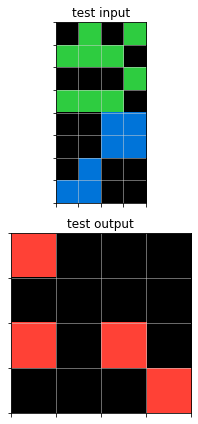

952a094c.json
Icecuber solved? True
['rectangle_guessing', 'inside_out']
5 objects
[[8 8 8 8]
 [8 0 0 8]
 [8 0 0 8]
 [8 0 0 8]
 [8 8 8 8]]
[[4]]
[[3]]
[[2]]
[[6]]
5 objects
[[6]]
[[2]]
[[8 8 8 8]
 [8 0 0 8]
 [8 0 0 8]
 [8 0 0 8]
 [8 8 8 8]]
[[3]]
[[4]]
5 objects
[[7 7 7 7 7 7]
 [7 0 0 0 0 7]
 [7 0 0 0 0 7]
 [7 0 0 0 0 7]
 [7 0 0 0 0 7]
 [7 7 7 7 7 7]]
[[2]]
[[8]]
[[9]]
[[3]]
5 objects
[[3]]
[[9]]
[[7 7 7 7 7 7]
 [7 0 0 0 0 7]
 [7 0 0 0 0 7]
 [7 0 0 0 0 7]
 [7 0 0 0 0 7]
 [7 7 7 7 7 7]]
[[8]]
[[2]]
5 objects
[[1 1 1 1 1 1]
 [1 0 0 0 0 1]
 [1 0 0 0 0 1]
 [1 0 0 0 0 1]
 [1 1 1 1 1 1]]
[[2]]
[[5]]
[[6]]
[[3]]
5 objects
[[3]]
[[6]]
[[1 1 1 1 1 1]
 [1 0 0 0 0 1]
 [1 0 0 0 0 1]
 [1 0 0 0 0 1]
 [1 1 1 1 1 1]]
[[5]]
[[2]]


5 objects
[[3 3 3 3 3 3]
 [3 0 0 0 0 3]
 [3 0 0 0 0 3]
 [3 0 0 0 0 3]
 [3 3 3 3 3 3]]
[[6]]
[[4]]
[[8]]
[[2]]
5 objects
[[2]]
[[8]]
[[3 3 3 3 3 3]
 [3 0 0 0 0 3]
 [3 0 0 0 0 3]
 [3 0 0 0 0 3]
 [3 3 3 3 3 3]]
[[4]]
[[6]]


9565186b.json
Icecuber solved? True
['separate_shapes', 'count_tiles', 'recoloring', 'take_maximum', 'associate_color_to_bools']
3 objects
[[2 2 2]
 [2 0 0]
 [2 0 0]]
[[1]]
[[0 8]
 [8 8]]
2 objects
[[2 2 2]
 [2 0 0]
 [2 0 0]]
[[5 5]
 [5 5]]
4 objects
[[1 1 1]
 [0 1 0]]
[[8]
 [8]]
[[3]]
[[2 2]]
2 objects
[[1 1 1]
 [0 1 0]]
[[5 0 5]
 [5 5 5]]
2 objects
[[2 2 2]
 [0 0 2]
 [2 2 2]]
[[8 8]]
2 objects
[[2 2 2]
 [0 0 2]
 [2 2 2]]
[[5 5]]
5 objects
[[3 3]]
[[8]]
[[4 4 4]]
[[8]]
[[1 1]]
3 objects
[[5 5 5]]
[[4 4 4]]
[[5 5 5]]


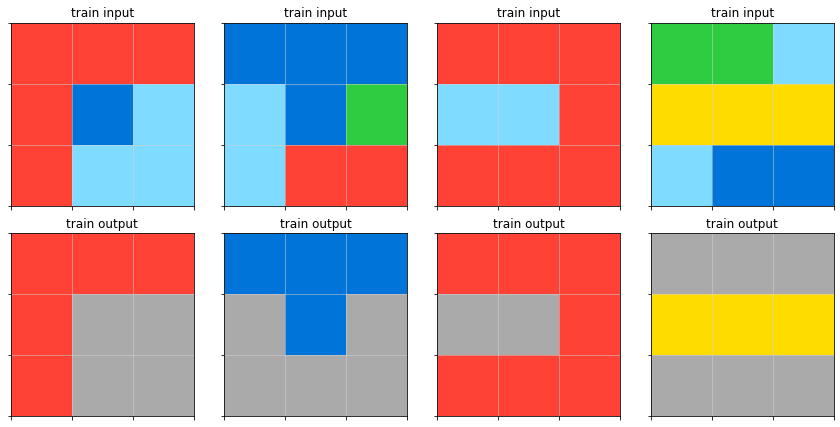

4 objects
[[1]]
[[0 3]
 [3 3]
 [0 3]]
[[2]
 [2]
 [2]]
[[1]]
4 objects
[[5]]
[[0 3]
 [3 3]
 [0 3]]
[[5]
 [5]
 [5]]
[[5]]


95990924.json
Icecuber solved? False
['pattern_expansion']
1 objects
[[5 5]
 [5 5]]
5 objects
[[1]]
[[2]]
[[5 5]
 [5 5]]
[[3]]
[[4]]
2 objects
[[5 5]
 [5 5]]
[[5 5]
 [5 5]]
10 objects
[[1]]
[[2]]
[[5 5]
 [5 5]]
[[3]]
[[4]]
[[1]]
[[2]]
[[5 5]
 [5 5]]
[[3]]
[[4]]
4 objects
[[5 5]
 [5 5]]
[[5 5]
 [5 5]]
[[5 5]
 [5 5]]
[[5 5]
 [5 5]]
20 objects
[[1]]
[[2]]
[[5 5]
 [5 5]]
[[1]]
[[2]]
[[3]]
[[4]]
[[5 5]
 [5 5]]
[[3]]
[[4]]
[[1]]
[[2]]
[[5 5]
 [5 5]]
[[3]]
[[4]]
[[1]]
[[2]]
[[5 5]
 [5 5]]
[[3]]
[[4]]


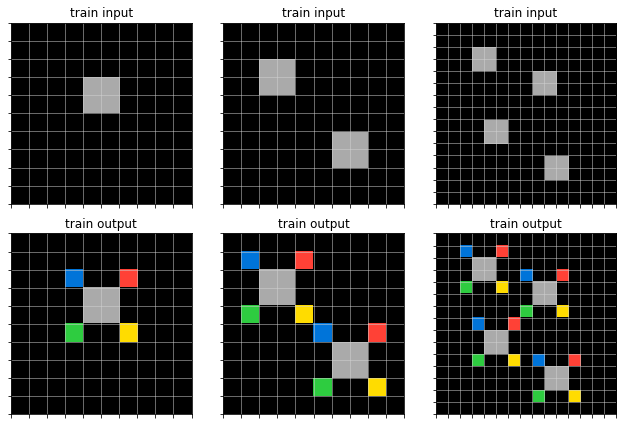

6 objects
[[5 5]
 [5 5]]
[[5 5]
 [5 5]]
[[5 5]
 [5 5]]
[[5 5]
 [5 5]]
[[5 5]
 [5 5]]
[[5 5]
 [5 5]]
30 objects
[[1]]
[[2]]
[[1]]
[[2]]
[[5 5]
 [5 5]]
[[5 5]
 [5 5]]
[[3]]
[[4]]
[[1]]
[[2]]
[[3]]
[[4]]
[[5 5]
 [5 5]]
[[1]]
[[2]]
[[3]]
[[4]]
[[5 5]
 [5 5]]
[[3]]
[[4]]
[[1]]
[[2]]
[[5 5]
 [5 5]]
[[1]]
[[2]]
[[5 5]
 [5 5]]
[[3]]
[[4]]
[[3]]
[[4]]


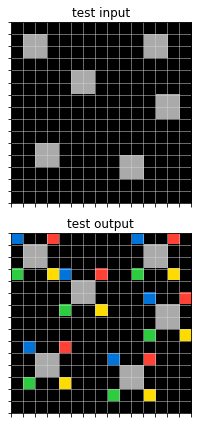

963e52fc.json
Icecuber solved? True
['image_expansion', 'pattern_expansion']
6 objects
[[2]
 [2]]
[[8]
 [8]]
[[2]
 [2]]
[[8]
 [8]]
[[2]
 [2]]
[[8]
 [8]]
12 objects
[[2]
 [2]]
[[8]
 [8]]
[[2]
 [2]]
[[8]
 [8]]
[[2]
 [2]]
[[8]
 [8]]
[[2]
 [2]]
[[8]
 [8]]
[[2]
 [2]]
[[8]
 [8]]
[[2]
 [2]]
[[8]
 [8]]
5 objects
[[2]]
[[3 3]]
[[2]]
[[3 3]]
[[2]]
10 objects
[[2]]
[[3 3]]
[[2]]
[[3 3]]
[[2]]
[[3 3]]
[[2]]
[[3 3]]
[[2]]
[[3]]
10 objects
[[1]]
[[2 2 0]
 [0 2 2]]
[[1]]
[[2 2 0]
 [0 2 2]]
[[1]]
[[2]]
[[2]]
[[1]]
[[1]]
[[1]]
17 objects
[[1]]
[[2 2 0]
 [0 2 2]]
[[1]]
[[2 2 0]
 [0 2 2]]
[[1]]
[[2 2 0]
 [0 2 2]]
[[1]]
[[2 2 0]
 [0 2 2]]
[[1]]
[[2 2 0]
 [0 2 2]]
[[1]]
[[2]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]


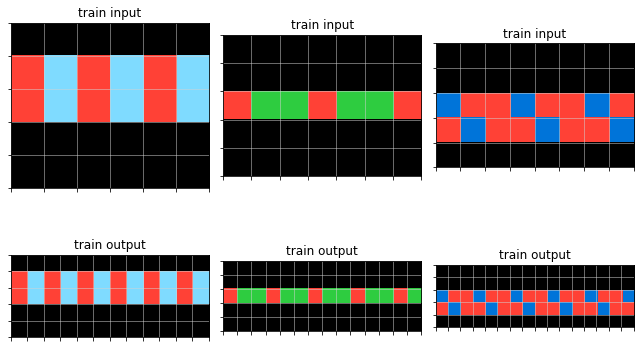

6 objects
[[3]
 [3]]
[[1 1]
 [1 1]]
[[3]
 [3]]
[[1 1]
 [1 1]]
[[3]
 [3]]
[[1 1]
 [1 1]]
12 objects
[[3]
 [3]]
[[1 1]
 [1 1]]
[[3]
 [3]]
[[1 1]
 [1 1]]
[[3]
 [3]]
[[1 1]
 [1 1]]
[[3]
 [3]]
[[1 1]
 [1 1]]
[[3]
 [3]]
[[1 1]
 [1 1]]
[[3]
 [3]]
[[1 1]
 [1 1]]


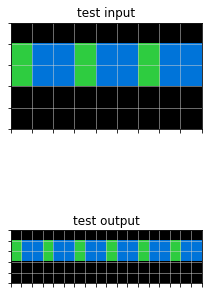

97999447.json
Icecuber solved? False
['draw_line_from_point', 'pattern_expansion']
2 objects
[[2]]
[[6]]
11 objects
[[2]]
[[5]]
[[2]]
[[5]]
[[2]]
[[5]]
[[6]]
[[5]]
[[6]]
[[5]]
[[6]]
3 objects
[[2]]
[[3]]
[[6]]
27 objects
[[2]]
[[5]]
[[2]]
[[5]]
[[2]]
[[5]]
[[2]]
[[5]]
[[2]]
[[5]]
[[3]]
[[5]]
[[3]]
[[5]]
[[3]]
[[5]]
[[3]]
[[5]]
[[3]]
[[5]]
[[3]]
[[6]]
[[5]]
[[6]]
[[5]]
[[6]]
[[5]]
1 objects
[[8]]
5 objects
[[8]]
[[5]]
[[8]]
[[5]]
[[8]]


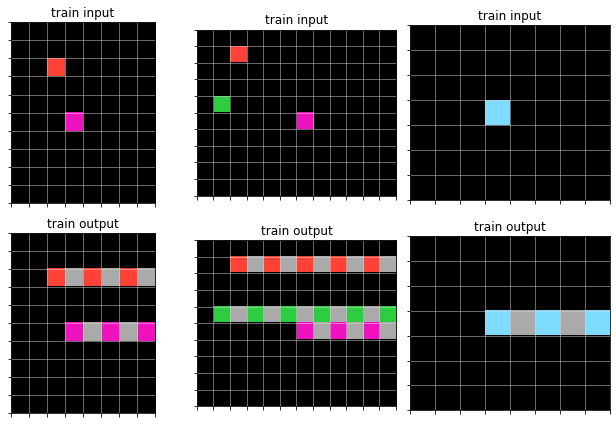

4 objects
[[3]]
[[4]]
[[8]]
[[2]]
20 objects
[[3]]
[[5]]
[[3]]
[[5]]
[[3]]
[[4]]
[[5]]
[[4]]
[[5]]
[[4]]
[[5]]
[[8]]
[[5]]
[[8]]
[[5]]
[[2]]
[[5]]
[[2]]
[[5]]
[[2]]


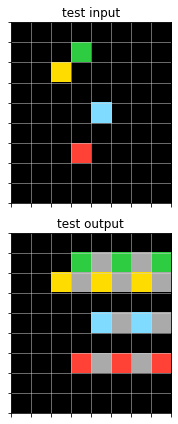

97a05b5b.json
Icecuber solved? False
['pattern_moving', 'pattern_juxtaposition', 'crop', 'shape_guessing']
16 objects
[[2 2 2 2 2 2 2 2 2]
 [2 0 2 2 2 2 2 0 2]
 [2 0 0 2 2 2 2 0 2]
 [2 2 2 2 2 2 2 0 2]
 [2 2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2 2]
 [2 2 2 2 0 2 2 2 2]
 [2 2 2 0 0 0 2 2 2]
 [2 2 2 2 0 2 2 2 2]
 [2 2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2 2]
 [2 0 0 2 2 2 0 2 2]
 [2 2 0 2 2 2 0 2 2]
 [2 0 0 2 2 0 0 0 2]
 [2 2 2 2 2 2 2 2 2]]
[[1]]
[[0 2 0]
 [2 2 2]
 [0 2 0]]
[[1]]
[[1]]
[[1]]
[[3 3 3]]
[[2 2 2]]
[[3 3 3]]
[[8 8 8]
 [0 8 0]]
[[2 0 2]
 [2 2 2]]
[[4 4 4]
 [4 0 4]
 [0 0 4]]
[[5 5]]
[[0 0 2]
 [2 2 2]
 [0 0 2]]
[[0 2]
 [2 2]]
[[5 5]]
11 objects
[[2 2 2 2 2 2 2 2 2]
 [2 2 0 0 2 2 0 2 0]
 [2 2 2 0 2 2 0 2 0]
 [2 0 0 0 2 2 0 2 0]
 [2 2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2 2]
 [2 2 2 0 2 0 2 2 2]
 [2 2 2 2 2 2 2 2 2]
 [2 2 2 0 2 0 2 2 2]
 [2 2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2 2]
 [0 2 2 2 2 0 2 0 2]
 [0 0 2 2 2 

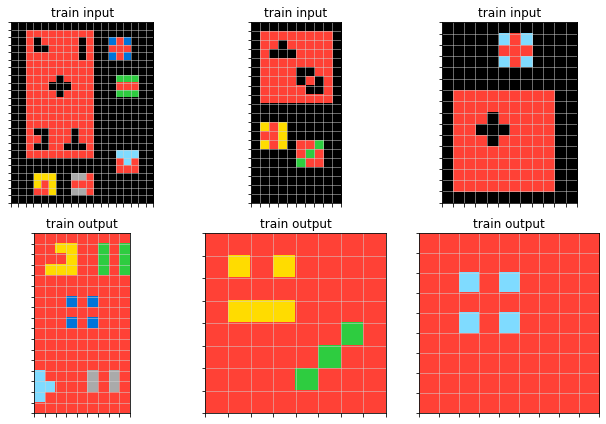

11 objects
[[2 2 2 2 2 2 2 2 2 2 2 2]
 [2 0 2 2 2 2 0 2 2 2 0 2]
 [2 0 0 2 2 0 0 2 2 2 2 2]
 [2 2 0 0 2 2 0 2 2 2 2 2]
 [2 2 2 2 2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 0 0 0 2 2]
 [2 2 2 2 2 2 2 2 2 2 2 2]]
[[1 1 1]
 [1 0 1]
 [1 1 1]]
[[2 0]
 [2 2]
 [2 0]]
[[3 3]
 [0 3]
 [3 3]]
[[2]]
[[8 8]
 [8 0]]
[[0 0 2]
 [0 2 2]
 [2 2 0]]
[[4]
 [4]
 [4]]
[[2]
 [2]
 [2]]
[[4]
 [4]
 [4]]
[[8]]
8 objects
[[2 2 2 2 2 2 2 2 2 0 0 0]
 [2 2 0 0 0 0 2 2 2 0 0 0]
 [2 2 2 0 0 2 2 2 2 0 0 0]
 [2 0 2 2 0 0 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 0 0 0 2 2]
 [2 2 2 2 2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 0 0 0 2 2]]
[[1 1 1]
 [1 0 1]
 [1 1 1]]
[[8 8]
 [0 8]]
[[3 3]
 [3 0]
 [3 3]]
[[2]]
[[8]]
[[4 4 4]]
[[4 4 4]]


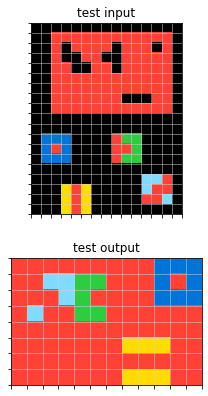

98cf29f8.json
Icecuber solved? False
['pattern_moving', 'bring_patterns_close']
2 objects
[[4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4]]
[[0 5 0 0]
 [0 5 0 0]
 [0 5 0 0]
 [0 5 0 0]
 [5 5 5 5]
 [5 5 5 5]
 [5 5 5 5]]
2 objects
[[4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4]]
[[5 5 5 5]
 [5 5 5 5]
 [5 5 5 5]]
2 objects
[[2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2]]
[[4 4 4 0 0 0]
 [4 4 4 4 4 4]
 [4 4 4 0 0 0]]
2 objects
[[2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2]]
[[4 4 4]
 [4 4 4]
 [4 4 4]]
2 objects
[[2 2 2 2 2]
 [2 2 2 2 2]]
[[0 0 0 0 3 0 0 0]
 [0 0 0 0 3 0 0 0]
 [0 0 0 0 3 0 0 0]
 [0 0 0 0 3 0 0 0]
 [3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3]]
2 objects
[[2 2 2 2 2]
 [2 2 2 2 2]]
[[3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3]
 [3 3 3 3

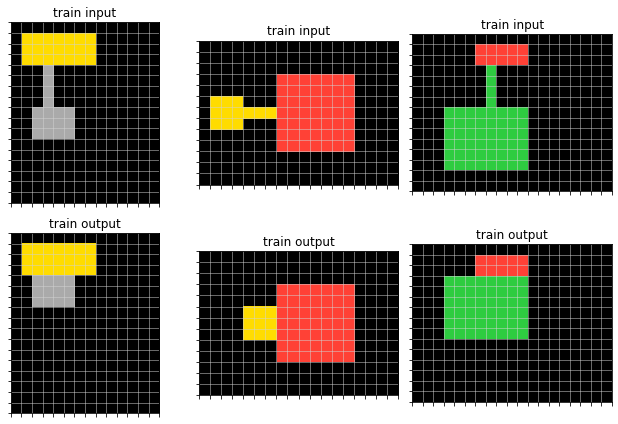

2 objects
[[3 3 3 3 3]
 [3 3 3 3 3]
 [3 3 3 3 3]
 [3 3 3 3 3]
 [3 3 3 3 3]
 [3 3 3 3 3]
 [3 3 3 3 3]
 [3 3 3 3 3]]
[[7 7 7 7 7 7 7 7 7]
 [0 0 0 0 0 7 7 7 7]
 [0 0 0 0 0 7 7 7 7]]
2 objects
[[3 3 3 3 3]
 [3 3 3 3 3]
 [3 3 3 3 3]
 [3 3 3 3 3]
 [3 3 3 3 3]
 [3 3 3 3 3]
 [3 3 3 3 3]
 [3 3 3 3 3]]
[[7 7 7 7]
 [7 7 7 7]
 [7 7 7 7]]


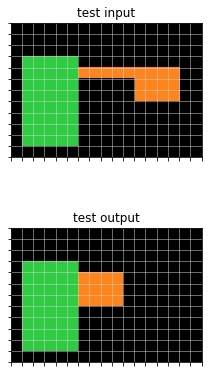

995c5fa3.json
Icecuber solved? False
['take_complement', 'detect_wall', 'separate_images', 'associate_colors_to_images', 'summarize']
3 objects
[[5 5 5 5]
 [5 5 5 5]
 [5 5 5 5]
 [5 5 5 5]]
[[5 5 5 5]
 [5 0 0 5]
 [5 0 0 5]
 [5 5 5 5]]
[[5 5 5 5]
 [0 5 5 0]
 [0 5 5 0]
 [5 5 5 5]]
3 objects
[[2 2 2]]
[[8 8 8]]
[[3 3 3]]
3 objects
[[5 5 5 5]
 [0 5 5 0]
 [0 5 5 0]
 [5 5 5 5]]
[[5 5 5 5]
 [5 5 5 5]
 [5 0 0 5]
 [5 0 0 5]]
[[5 5 5 5]
 [5 5 5 5]
 [5 5 5 5]
 [5 5 5 5]]
3 objects
[[3 3 3]]
[[4 4 4]]
[[2 2 2]]
3 objects
[[5 5 5 5]
 [5 0 0 5]
 [5 0 0 5]
 [5 5 5 5]]
[[5 5 5 5]
 [5 5 5 5]
 [5 5 5 5]
 [5 5 5 5]]
[[5 5 5 5]
 [5 5 5 5]
 [5 0 0 5]
 [5 0 0 5]]
3 objects
[[8 8 8]]
[[2 2 2]]
[[4 4 4]]
3 objects
[[5 5 5 5]
 [5 5 5 5]
 [5 5 5 5]
 [5 5 5 5]]
[[5 5 5 5]
 [5 5 5 5]
 [5 0 0 5]
 [5 0 0 5]]
[[5 5 5 5]
 [5 5 5 5]
 [5 5 5 5]
 [5 5 5 5]]
3 objects
[[2 2 2]]
[[4 4 4]]
[[2 2 2]]


3 objects
[[5 5 5 5]
 [5 5 5 5]
 [5 0 0 5]
 [5 0 0 5]]
[[5 5 5 5]
 [0 5 5 0]
 [0 5 5 0]
 [5 5 5 5]]
[[5 5 5 5]
 [5 0 0 5]
 [5 0 0 5]
 [5 5 5 5]]
3 objects
[[4 4 4]]
[[3 3 3]]
[[8 8 8]]


99b1bc43.json
Icecuber solved? True
['take_complement', 'detect_wall', 'separate_images', 'pattern_intersection']
9 objects
[[1]]
[[1]
 [1]]
[[1]]
[[1]]
[[1]]
[[4 4 4 4]]
[[2]]
[[2]
 [2]
 [2]]
[[2 0 0]
 [2 2 2]]
1 objects
[[0 0 3 3]
 [3 3 3 3]]
5 objects
[[1 1 0]
 [1 0 0]
 [1 1 0]
 [0 1 1]]
[[1]]
[[1]]
[[4 4 4 4]]
[[0 2 2 2]
 [2 0 2 0]
 [2 2 2 2]
 [2 2 2 2]]
5 objects
[[3]]
[[3 3]]
[[3]]
[[3]]
[[3]]
5 objects
[[1]]
[[1 0 1 1]
 [1 1 1 0]
 [1 1 1 0]]
[[4 4 4 4]]
[[0 2]
 [2 2]
 [0 2]]
[[2]
 [2]]
2 objects
[[0 3 0 0]
 [3 3 3 0]
 [0 0 3 3]
 [0 0 3 0]]
[[3]]
6 objects
[[1]]
[[1 1]
 [0 1]]
[[1 1]]
[[1 1]]
[[4 4 4 4]]
[[0 2 2 2]
 [0 2 2 2]
 [2 0 2 2]
 [2 2 2 2]]
1 objects
[[3 3 0 0]
 [0 3 3 0]
 [0 3 3 3]
 [3 3 0 0]]


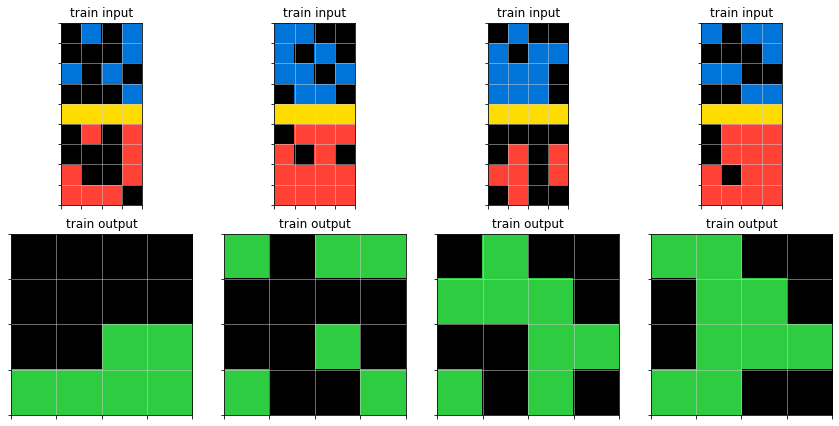

10 objects
[[1]]
[[0 1 1]
 [1 1 1]
 [0 1 0]
 [0 1 1]]
[[1]]
[[4 4 4 4]]
[[2 2]]
[[2]]
[[2]]
[[2]]
[[2]
 [2]]
[[2]]
2 objects
[[3 3]
 [3 0]]
[[0 0 0 3]
 [3 0 3 3]
 [3 3 3 0]]


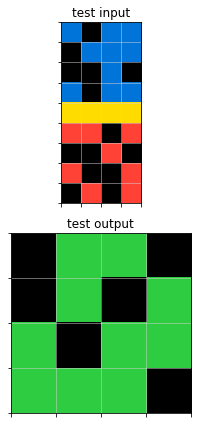

99fa7670.json
Icecuber solved? True
['draw_line_from_point', 'pattern_expansion']
2 objects
[[2]]
[[3]]
2 objects
[[2 2 2 2]
 [0 0 0 2]]
[[3 3 3 3 3]
 [0 0 0 0 3]
 [0 0 0 0 3]]
1 objects
[[6]]
1 objects
[[6 6]
 [0 6]]
2 objects
[[8]]
[[5]]
2 objects
[[8 8 8 8 8]
 [0 0 0 0 8]
 [0 0 0 0 8]]
[[5 5 5]
 [0 0 5]]
3 objects
[[8]]
[[7]]
[[6]]
3 objects
[[8 8 8]
 [0 0 8]]
[[7 7 7 7]
 [0 0 0 7]]
[[6 6 6]
 [0 0 6]]


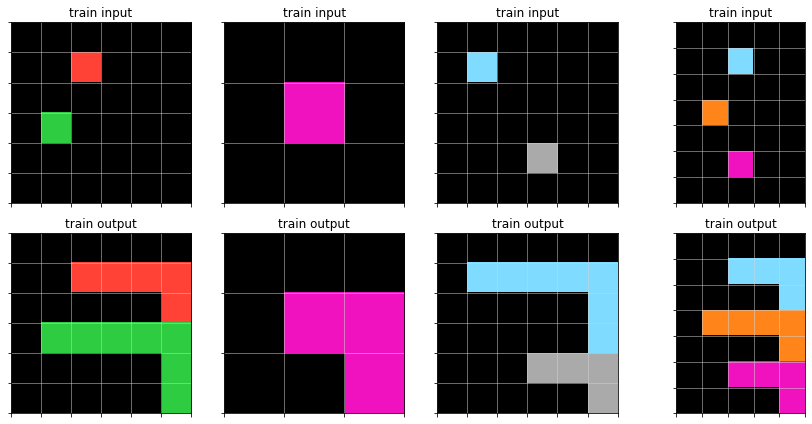

3 objects
[[8]]
[[7]]
[[2]]
3 objects
[[8 8 8 8 8]
 [0 0 0 0 8]]
[[7 7 7 7 7 7]
 [0 0 0 0 0 7]]
[[2 2 2]
 [0 0 2]
 [0 0 2]]


9aec4887.json
Icecuber solved? False
['pattern_moving', 'x_marks_the_spot', 'crop', 'recoloring', 'color_guessing']
6 objects
[[8]]
[[0 0 0 8]
 [0 8 0 8]
 [8 8 8 8]
 [0 8 0 8]]
[[4 4 4 4]]
[[2]
 [2]
 [2]
 [2]]
[[1]
 [1]
 [1]
 [1]]
[[3 3 3 3]]
8 objects
[[4 4 4 4]]
[[2 0]
 [2 0]
 [2 2]
 [2 0]]
[[8]]
[[8]]
[[0 1]
 [1 1]
 [1 1]
 [0 1]]
[[8 0]
 [8 8]]
[[0 3 0 0]
 [3 3 3 3]]
[[8]]
5 objects
[[0 8 0]
 [8 8 8]
 [0 8 8]]
[[3 3 3]]
[[6]
 [6]
 [6]]
[[4]
 [4]
 [4]]
[[2 2 2]]
6 objects
[[3 3 3]
 [0 3 0]]
[[6 0]
 [6 6]
 [6 0]]
[[0 4]
 [4 4]
 [0 4]]
[[8]]
[[0 2 0]
 [2 2 2]]
[[8]]
7 objects
[[7 7 7 7]]
[[4]
 [4]
 [4]
 [4]]
[[6]
 [6]
 [6]
 [6]]
[[1 1 1 1]]
[[8 8 0]
 [0 8 8]
 [0 8 0]
 [8 8 0]]
[[8]]
[[8]
 [8]]
9 objects
[[7 7 7 7]
 [0 7 0 0]]
[[4]
 [4]
 [4]
 [4]]
[[8]]
[[8]]
[[0 6]
 [0 6]
 [6 6]
 [0 6]]
[[8 8]
 [8 0]]
[[8]]
[[0 1 0 0]
 [1 1 1 1]]
[[8]]


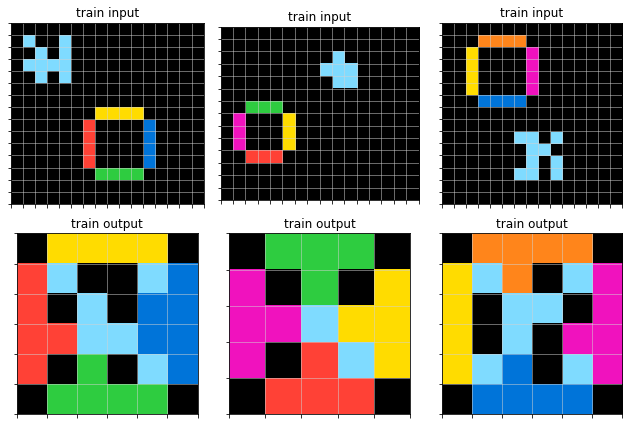

8 objects
[[1 1 1 1 1]]
[[2]
 [2]
 [2]
 [2]
 [2]]
[[4]
 [4]
 [4]
 [4]
 [4]]
[[3 3 3 3 3]]
[[8 8]
 [8 0]]
[[0 0 8 8]
 [0 8 8 0]
 [8 8 8 8]
 [0 8 0 0]]
[[8 8]]
[[8 8]]
13 objects
[[1 1 1 1 1]
 [0 1 0 1 0]]
[[2 0]
 [2 2]
 [2 0]
 [2 0]
 [2 0]]
[[8]]
[[8]]
[[0 0 4]
 [0 0 4]
 [4 4 4]
 [0 0 4]
 [0 0 4]]
[[1]]
[[8]]
[[2]]
[[8]]
[[3]]
[[8]]
[[0 3 0 3 0]
 [3 3 3 3 3]]
[[8]]


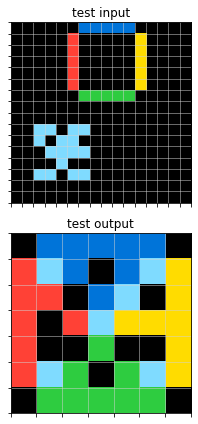

9af7a82c.json
Icecuber solved? False
['separate_images', 'count_tiles', 'summarize', 'order_numbers']
3 objects
[[2 2]
 [2 0]]
[[0 0 1]
 [0 0 1]
 [1 1 1]]
[[3]]
3 objects
[[1]
 [1]
 [1]
 [1]
 [1]]
[[2]
 [2]
 [2]]
[[3]]
4 objects
[[3]]
[[1 1]]
[[0 0 0 4]
 [0 0 0 4]
 [4 4 4 4]]
[[2 2 2]]
4 objects
[[4]
 [4]
 [4]
 [4]
 [4]
 [4]]
[[2]
 [2]
 [2]]
[[1]
 [1]]
[[3]]
4 objects
[[8 8 0]
 [0 8 8]]
[[2]]
[[3 0]
 [3 3]
 [3 3]]
[[4]
 [4]]
4 objects
[[3]
 [3]
 [3]
 [3]
 [3]]
[[8]
 [8]
 [8]
 [8]]
[[4]
 [4]]
[[2]]
3 objects
[[1 1 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]]
[[2 2]
 [2 0]
 [2 0]]
[[8]
 [8]]
3 objects
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[2]
 [2]
 [2]
 [2]]
[[8]
 [8]]


5 objects
[[8 8 0]
 [0 8 8]]
[[2 2]
 [0 2]]
[[1 0 0 0]
 [1 0 0 0]
 [1 1 1 1]]
[[3 3]]
[[4]]
5 objects
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[8]
 [8]
 [8]
 [8]]
[[2]
 [2]
 [2]]
[[3]
 [3]]
[[4]]


9d9215db.json
Icecuber solved? False
['pattern_expansion', 'pattern_reflection', 'pattern_rotation']
4 objects
[[8]]
[[1]]
[[1]]
[[2]]
36 objects
[[8]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[8]]
[[1]]
[[2]]
[[2]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[2]]
[[2]]
[[1]]
[[8]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[8]]
4 objects
[[3]]
[[1]]
[[4]]
[[1]]
28 objects
[[3]]
[[3]]
[[4]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[4]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[4]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[4]]
[[3]]
[[3]]
5 objects
[[4]]
[[3]]
[[3]]
[[1]]
[[8]]
40 objects
[[4]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[4]]
[[3]]
[[1]]
[[1]]
[[3]]
[[3]]
[[8]]
[[8]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[8]]
[[8]]
[[3]]
[[3]]
[[1]]
[[1]]
[[3]]
[[4]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[4]]


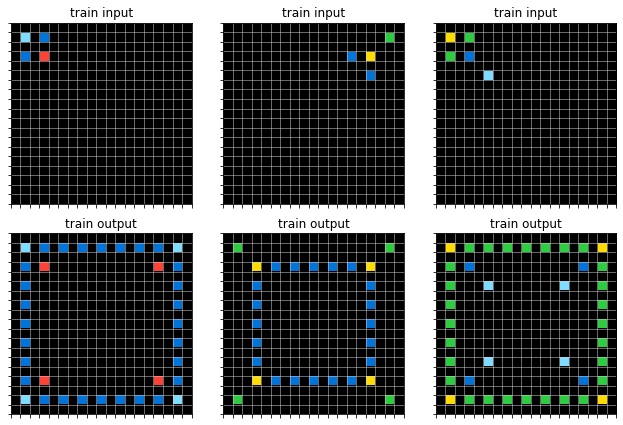

7 objects
[[8]]
[[4]]
[[8]]
[[3]]
[[2]]
[[1]]
[[3]]
52 objects
[[1]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[1]]
[[3]]
[[2]]
[[2]]
[[3]]
[[3]]
[[4]]
[[8]]
[[8]]
[[8]]
[[4]]
[[3]]
[[3]]
[[8]]
[[8]]
[[3]]
[[3]]
[[8]]
[[8]]
[[3]]
[[3]]
[[8]]
[[8]]
[[3]]
[[3]]
[[4]]
[[8]]
[[8]]
[[8]]
[[4]]
[[3]]
[[3]]
[[2]]
[[2]]
[[3]]
[[1]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[1]]


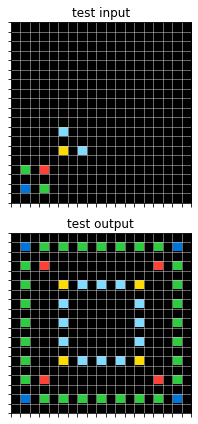

9dfd6313.json
Icecuber solved? True
['image_reflection', 'diagonal_symmetry']
4 objects
[[5]]
[[3]]
[[5]]
[[5]]
4 objects
[[5]]
[[3]]
[[5]]
[[5]]
6 objects
[[5]]
[[5]]
[[6]
 [6]]
[[5]]
[[4]]
[[5]]
6 objects
[[5]]
[[6 6]]
[[5]]
[[5]]
[[4]]
[[5]]
8 objects
[[5]]
[[5]]
[[8 8]]
[[5]]
[[2]
 [2]]
[[5]]
[[1]]
[[5]]
8 objects
[[5]]
[[8]
 [8]]
[[5]]
[[2 2]]
[[5]]
[[5]]
[[1]]
[[5]]


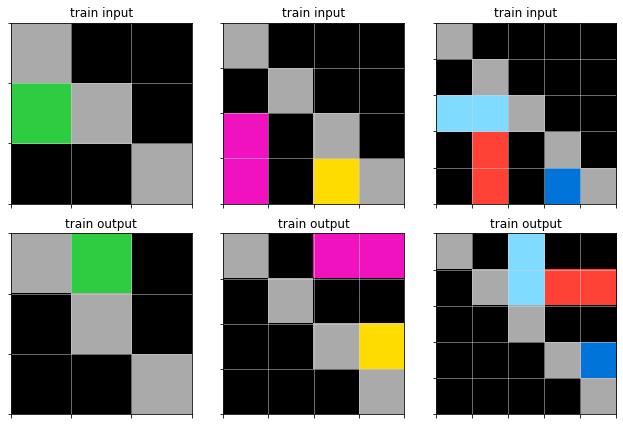

10 objects
[[5]]
[[5]]
[[3 3]]
[[5]]
[[5]]
[[2]
 [2]]
[[8 8]]
[[5]]
[[6]]
[[5]]
10 objects
[[5]]
[[3]
 [3]]
[[2 2]]
[[5]]
[[5]]
[[8]
 [8]]
[[6]]
[[5]]
[[5]]
[[5]]


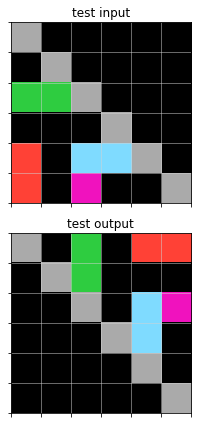

9ecd008a.json
Icecuber solved? False
['image_filling', 'pattern_expansion', 'pattern_reflection', 'pattern_rotation', 'crop']
121 objects
[[2]]
[[1]]
[[3]]
[[5]]
[[1 1 1]
 [1 0 0]
 [1 0 0]]
[[0 8 8 0]
 [8 8 8 8]]
[[1 1 1]
 [0 0 1]
 [0 0 1]]
[[5]]
[[3]]
[[1]]
[[2]]
[[1]]
[[2]]
[[5]]
[[7]]
[[7]]
[[7]]
[[7]]
[[5]]
[[2]]
[[1]]
[[3]]
[[5]]
[[4 4]
 [4 4]]
[[0 8]
 [8 8]]
[[2]]
[[9 9]]
[[2]]
[[8 0]
 [8 8]]
[[4 4]
 [4 4]]
[[5]]
[[3]]
[[5]]
[[7]]
[[9]]
[[2 2]]
[[9]]
[[7]]
[[5]]
[[1 1 1]
 [1 0 0]
 [1 0 0]]
[[0 8]
 [8 8]]
[[4 4]]
[[0 0 1 1 1 1 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 1 1 1]
 [0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 1]
 [1 1 1 0 0 1 1 1]
 [0 0 1 0 0 1 0 0]
 [0 0 1 1 1 1 0 0]]
[[4 4]
 [0 4]]
[[8 0]
 [8 8]]
[[1 1 1]
 [0 0 1]
 [0 0 1]]
[[7]]
[[9 9]]
[[7]]
[[7]]
[[0 8]
 [8 8]
 [8 8]
 [0 8]]
[[2]]
[[9]]
[[3 3]]
[[9]]
[[2]]
[[8 0]
 [8 8]
 [8 8]
 [8 0]]
[[9]
 [9]]
[[2]
 [2]]
[[1 1]
 [1 1]]
[[3]
 [3]]
[[9]
 [9]]
[[2]
 [2]]
[[9]
 [9]]
[[9]]
[[3]]
[[1 0 0]
 [1 0 0]
 [1 1 1]]
[[2]]
[[9]]
[[3 3]]
[[9]]
[[

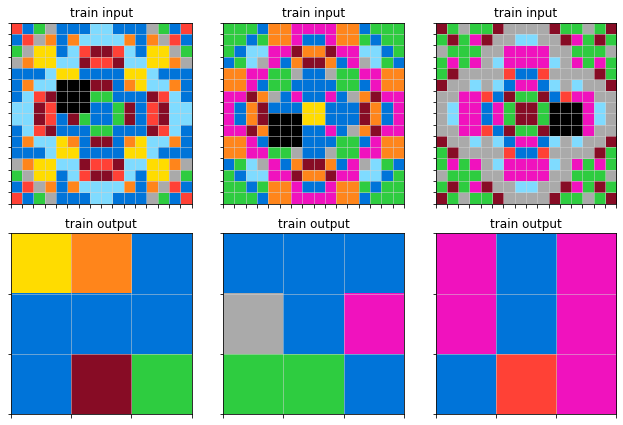

123 objects
[[4]]
[[8]]
[[9 9]
 [9 9]]
[[6 6]
 [6 0]]
[[5]]
[[1 1]]
[[5]]
[[6 6]
 [0 6]]
[[9 9]
 [9 9]]
[[8]]
[[4]]
[[8]]
[[6]]
[[7]]
[[1]]
[[0 0 5 5 0 0]
 [0 5 5 5 5 0]
 [5 5 0 0 5 5]
 [0 5 0 0 5 0]]
[[1]]
[[7]]
[[6]]
[[8]]
[[9 9]
 [9 9]]
[[5]]
[[0 2]
 [2 2]]
[[5]]
[[1]]
[[1]]
[[5]]
[[2 0]
 [2 2]]
[[5]]
[[9 9]
 [9 9]]
[[0 1]
 [1 1]]
[[9 9]]
[[1 0]
 [1 1]]
[[6 6]
 [6 0]]
[[5]]
[[0 4]
 [4 4]]
[[2 2]]
[[4 0]
 [4 4]]
[[5]]
[[6 6]
 [0 6]]
[[2]]
[[7 7]]
[[2]]
[[0 5 0 0]
 [5 5 5 0]
 [0 0 5 5]
 [0 0 5 5]
 [5 5 5 0]
 [0 5 0 0]]
[[1]]
[[7]]
[[5]]
[[5]]
[[2]]
[[9]]
[[5 5]]
[[9]]
[[2]]
[[1]]
[[5]]
[[1]
 [1]]
[[2]
 [2]]
[[7]
 [7]]
[[5]
 [5]]
[[9 9]
 [9 9]]
[[5]
 [5]]
[[7]
 [7]]
[[2]
 [2]]
[[9]
 [9]]
[[1]
 [1]]
[[5 5 0 0]
 [0 5 5 5]
 [0 0 5 0]]
[[9]]
[[5]]
[[1]]
[[2]]
[[9]]
[[5 5]]
[[9]]
[[2]]
[[1]]
[[5]]
[[6 0]
 [6 6]]
[[7]]
[[1]]
[[4 4]
 [0 4]]
[[2]]
[[7 7]]
[[2]]
[[4 4]
 [4 0]]
[[1]]
[[7]]
[[0 6]
 [6 6]]
[[5]]
[[1 1]
 [0 1]]
[[0 5 0 0 5 0]
 [5 5 0 0 5 5]
 [0 5 5 5 5 0]
 [0 0 5 5 0 0]]
[[2 2]]
[[

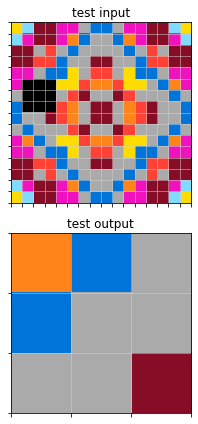

9edfc990.json
Icecuber solved? False
['background_filling', 'holes']
71 objects
[[9]]
[[2]]
[[8]]
[[9]]
[[2]]
[[9]]
[[1]]
[[6]]
[[9]]
[[5]]
[[9]]
[[4]]
[[9]]
[[3]]
[[5]]
[[7]]
[[8]]
[[8]]
[[8]]
[[6]]
[[6]]
[[1]]
[[4]]
[[1]]
[[3]]
[[6]]
[[1]]
[[3]]
[[9]]
[[4]]
[[5]]
[[7]]
[[2]]
[[8]]
[[7]]
[[1]]
[[8]]
[[9]]
[[2]]
[[7]]
[[5]]
[[7]]
[[8]]
[[4]]
[[8]]
[[7]]
[[5]]
[[7]]
[[5]]
[[9 9]]
[[5]
 [5]]
[[5]]
[[8]]
[[8]]
[[6]]
[[9]]
[[4]]
[[6]]
[[7]]
[[9 9]]
[[8]]
[[5]]
[[7]]
[[3]]
[[7]]
[[2]]
[[8]]
[[7]]
[[5]]
[[5]]
[[3]]
69 objects
[[9]]
[[0 1 1 1 1 0 0 1 0 1 0 0 0]
 [1 1 1 0 1 1 1 1 1 1 1 0 0]
 [0 1 0 0 0 1 1 0 0 1 0 0 0]
 [1 1 0 0 1 0 1 1 1 1 1 0 0]
 [0 0 1 1 1 0 0 1 1 0 0 0 0]
 [0 0 1 1 1 1 1 1 0 0 0 0 0]
 [0 1 1 0 1 1 1 0 0 0 1 0 0]
 [1 1 1 0 0 0 1 1 0 1 1 0 1]
 [0 0 1 1 1 1 0 1 1 0 1 1 1]
 [0 1 1 0 1 0 0 1 1 1 1 0 1]
 [0 1 1 0 1 0 0 0 0 1 0 0 0]
 [1 1 1 1 1 1 1 0 0 1 1 1 0]
 [1 1 1 0 0 1 0 1 1 1 1 1 0]]
[[2]]
[[8]]
[[9]]
[[2]]
[[9]]
[[6]]
[[9]]
[[5]]
[[9]]
[[4]]
[[9]]
[[3]]
[[5]]
[[7]]
[[8]]


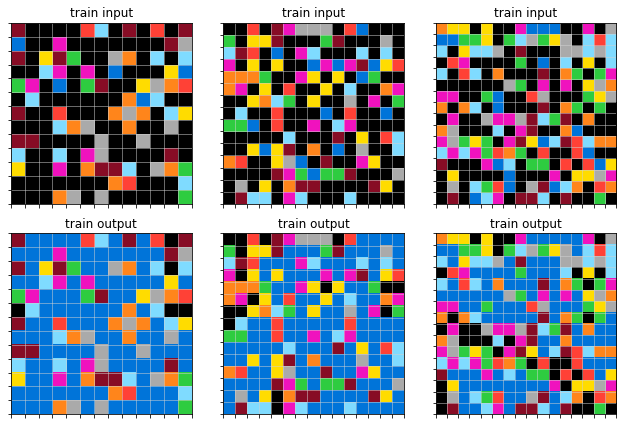

110 objects
[[8]]
[[5]]
[[9]]
[[6]]
[[5]]
[[6]]
[[7]]
[[6]]
[[4]]
[[2]]
[[8]]
[[3]]
[[6]]
[[2]]
[[7]]
[[5]]
[[4]]
[[1]]
[[1]]
[[7]]
[[6]]
[[5]]
[[8]]
[[9]]
[[2 2]
 [0 2]
 [0 2]]
[[8]]
[[4]]
[[7]]
[[4]]
[[4]]
[[2 2]]
[[7]]
[[3]]
[[6]]
[[4]]
[[9 9 9]
 [0 9 0]]
[[1]]
[[8]]
[[5]]
[[8]]
[[6 6]]
[[9 9]]
[[2]]
[[8]]
[[3]]
[[2]]
[[5]]
[[8]]
[[1]]
[[3]]
[[1]]
[[6]]
[[1]]
[[8]]
[[4]]
[[4]]
[[7]]
[[4]]
[[4]]
[[5]]
[[8]]
[[4 0]
 [4 4]]
[[6]]
[[6]]
[[8]]
[[1]]
[[9]]
[[9]
 [9]]
[[1]]
[[5]]
[[6]]
[[6]]
[[7]]
[[5]]
[[7]]
[[4]]
[[6]]
[[2]]
[[8]]
[[5]]
[[1]]
[[2]]
[[4]]
[[8]]
[[3]]
[[9]]
[[8]]
[[1]]
[[2]]
[[4]]
[[1]]
[[7]]
[[5]]
[[6]]
[[9]]
[[7 7]]
[[1]]
[[2]
 [2]]
[[9]]
[[1]]
[[3]]
[[1]]
[[8]]
[[3]]
[[9]]
[[7]]
[[7]]
[[2]]
[[8]]
[[9]]
101 objects
[[8]]
[[5]]
[[0 0 0 0 0 0 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 1 1 1 0 1 1 0 1 0]
 [0 0 0 0 0 1 1 0 1 1 0 1 1 0]
 [0 0 0 0 0 1 1 1 1 0 1 1 1 0]


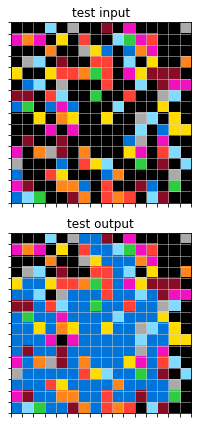

9f236235.json
Icecuber solved? True
['detect_grid', 'summarize', 'image_reflection']
7 objects
[[3 3 3 3]
 [3 3 3 3]
 [3 3 3 3]
 [3 3 3 3]]
[[0 0 0 0 2 0 0 0 0 2 0 0 0 0 2 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 2 0 0 0 0 2 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 2 0 0 0 0 2 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 2 0 0 0 0 2 0 0 0 0]
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
 [0 0 0 0 2 0 0 0 0 2 0 0 0 0 2 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 2 0 0 0 0 2 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 2 0 0 0 0 2 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 2 0 0 0 0 2 0 0 0 0]
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
 [0 0 0 0 2 0 0 0 0 2 0 0 0 0 2 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 2 0 0 0 0 2 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 2 0 0 0 0 2 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 2 0 0 0 0 2 0 0 0 0]
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
 [0 0 0 0 2 0 0 0 0 2 0 0 0 0 2 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 2 0 0 0 0 2 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 2 0 0 0 0 2 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 2 0 0 0 0 2 0 0 0 0]]
[[3 3 3 3]
 [3 3 3 3]
 [3 3 3 3]
 [3 3 3 3]]
[[3 3 3 3]
 [3 3 3 3]
 [3 3 3 3]
 [

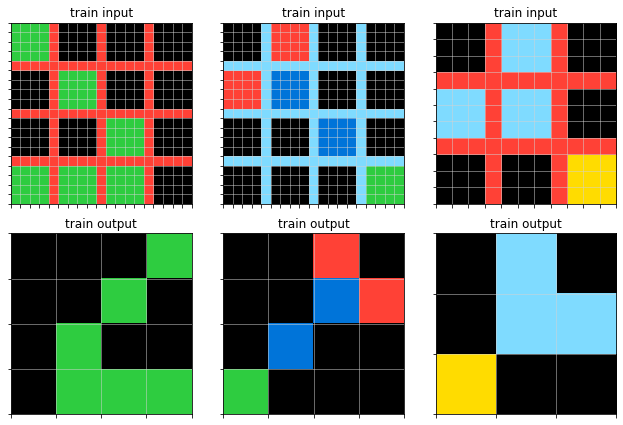

10 objects
[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]
[[0 0 0 0 0 8 0 0 0 0 0 8 0 0 0 0 0 8 0 0 0 0 0]
 [0 0 0 0 0 8 0 0 0 0 0 8 0 0 0 0 0 8 0 0 0 0 0]
 [0 0 0 0 0 8 0 0 0 0 0 8 0 0 0 0 0 8 0 0 0 0 0]
 [0 0 0 0 0 8 0 0 0 0 0 8 0 0 0 0 0 8 0 0 0 0 0]
 [0 0 0 0 0 8 0 0 0 0 0 8 0 0 0 0 0 8 0 0 0 0 0]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
 [0 0 0 0 0 8 0 0 0 0 0 8 0 0 0 0 0 8 0 0 0 0 0]
 [0 0 0 0 0 8 0 0 0 0 0 8 0 0 0 0 0 8 0 0 0 0 0]
 [0 0 0 0 0 8 0 0 0 0 0 8 0 0 0 0 0 8 0 0 0 0 0]
 [0 0 0 0 0 8 0 0 0 0 0 8 0 0 0 0 0 8 0 0 0 0 0]
 [0 0 0 0 0 8 0 0 0 0 0 8 0 0 0 0 0 8 0 0 0 0 0]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
 [0 0 0 0 0 8 0 0 0 0 0 8 0 0 0 0 0 8 0 0 0 0 0]
 [0 0 0 0 0 8 0 0 0 0 0 8 0 0 0 0 0 8 0 0 0 0 0]
 [0 0 0 0 0 8 0 0 0 0 0 8 0 0 0 0 0 8 0 0 0 0 0]
 [0 0 0 0 0 8 0 0 0 0 0 8 0 0 0 0 0 8 0 0 0 0 0]
 [0 0 0 0 0 8 0 0 0 0 0 8 0 0 0 0 0 8 0 0 0 0 0]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
 [0 0 0 0 0 8 0 0 0 0 0 8 0 0 0 0 0 8 0 0

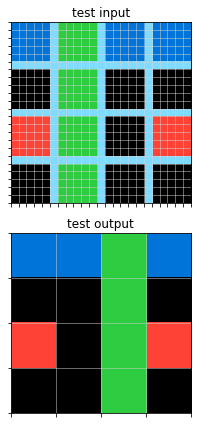

a1570a43.json
Icecuber solved? False
['pattern_moving', 'rectangle_guessing', 'x_marks_the_spot']
5 objects
[[3]]
[[0 0 2 0 0]
 [0 2 2 0 0]
 [2 2 2 2 2]
 [0 2 0 0 0]
 [0 2 2 0 0]]
[[3]]
[[3]]
[[3]]
5 objects
[[3]]
[[3]]
[[0 0 2 0 0]
 [0 2 2 0 0]
 [2 2 2 2 2]
 [0 2 0 0 0]
 [0 2 2 0 0]]
[[3]]
[[3]]
5 objects
[[3]]
[[3]]
[[0 0 2 2 2]
 [2 2 2 0 0]
 [2 0 2 0 0]
 [2 2 2 2 0]
 [0 0 0 2 0]]
[[3]]
[[3]]
5 objects
[[3]]
[[3]]
[[0 0 2 2 2]
 [2 2 2 0 0]
 [2 0 2 0 0]
 [2 2 2 2 0]
 [0 0 0 2 0]]
[[3]]
[[3]]
5 objects
[[0 2 2 0 0]
 [2 2 2 2 0]
 [0 0 2 2 2]
 [0 0 2 0 0]
 [0 2 2 0 0]]
[[3]]
[[3]]
[[3]]
[[3]]
5 objects
[[3]]
[[3]]
[[0 2 2 0 0]
 [2 2 2 2 0]
 [0 0 2 2 2]
 [0 0 2 0 0]
 [0 2 2 0 0]]
[[3]]
[[3]]
5 objects
[[3]]
[[3]]
[[0 0 0 2 0]
 [0 2 2 2 0]
 [0 2 0 0 0]
 [2 2 2 2 2]
 [0 2 0 0 0]]
[[3]]
[[3]]
5 objects
[[3]]
[[3]]
[[0 0 0 2 0]
 [0 2 2 2 0]
 [0 2 0 0 0]
 [2 2 2 2 2]
 [0 2 0 0 0]]
[[3]]
[[3]]


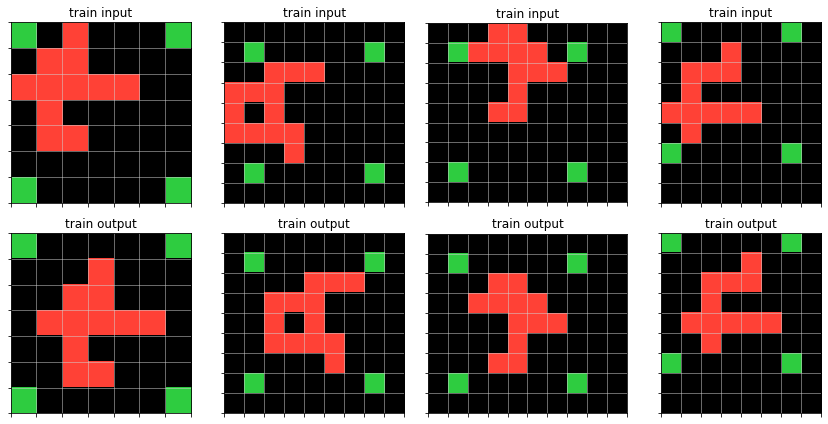

5 objects
[[3]]
[[3]]
[[2 0 0 0 0]
 [2 2 0 0 0]
 [2 2 2 0 0]
 [2 2 2 2 2]
 [2 0 0 0 0]]
[[3]]
[[3]]
5 objects
[[3]]
[[3]]
[[2 0 0 0 0]
 [2 2 0 0 0]
 [2 2 2 0 0]
 [2 2 2 2 2]
 [2 0 0 0 0]]
[[3]]
[[3]]


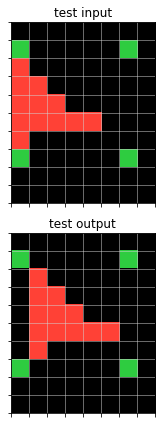

a2fd1cf0.json
Icecuber solved? True
['connect_the_dots']
2 objects
[[2]]
[[3]]
3 objects
[[2]]
[[8 8 8 8 8 8]
 [0 0 0 0 0 8]
 [0 0 0 0 0 8]
 [0 0 0 0 0 8]
 [0 0 0 0 0 8]
 [0 0 0 0 0 8]
 [0 0 0 0 0 8]
 [0 0 0 0 0 8]
 [0 0 0 0 0 8]
 [0 0 0 0 0 8]
 [0 0 0 0 0 8]
 [0 0 0 0 0 8]]
[[3]]
2 objects
[[3]]
[[2]]
3 objects
[[3]]
[[0 0 0 0 0 0 0 0 0 8]
 [0 0 0 0 0 0 0 0 0 8]
 [0 0 0 0 0 0 0 0 0 8]
 [0 0 0 0 0 0 0 0 0 8]
 [0 0 0 0 0 0 0 0 0 8]
 [8 8 8 8 8 8 8 8 8 8]]
[[2]]
2 objects
[[2]]
[[3]]
3 objects
[[8 8 8 8 8 8 8]
 [8 0 0 0 0 0 0]
 [8 0 0 0 0 0 0]
 [8 0 0 0 0 0 0]
 [8 0 0 0 0 0 0]
 [8 0 0 0 0 0 0]
 [8 0 0 0 0 0 0]
 [8 0 0 0 0 0 0]
 [8 0 0 0 0 0 0]]
[[2]]
[[3]]


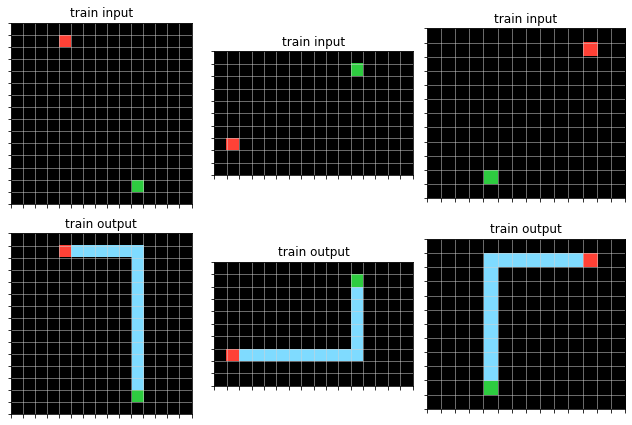

2 objects
[[2]]
[[3]]
3 objects
[[2]]
[[8 8 8 8 8 8 8 8 8]
 [0 0 0 0 0 0 0 0 8]
 [0 0 0 0 0 0 0 0 8]
 [0 0 0 0 0 0 0 0 8]
 [0 0 0 0 0 0 0 0 8]
 [0 0 0 0 0 0 0 0 8]
 [0 0 0 0 0 0 0 0 8]
 [0 0 0 0 0 0 0 0 8]]
[[3]]


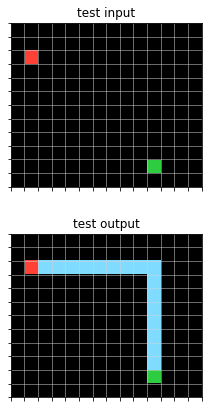

a3325580.json
Icecuber solved? False
['separate_shapes', 'count_tiles', 'take_maximum', 'summarize', 'remove_intruders']
4 objects
[[8 8 8]
 [0 0 8]
 [0 0 8]]
[[4 0]
 [4 0]
 [4 4]
 [4 0]]
[[6 6]
 [0 6]
 [6 6]]
[[0 3 3]
 [3 3 0]]
3 objects
[[4]
 [4]
 [4]
 [4]
 [4]]
[[6]
 [6]
 [6]
 [6]
 [6]]
[[8]
 [8]
 [8]
 [8]
 [8]]
3 objects
[[4 4 4]
 [4 0 4]
 [0 0 4]
 [0 4 4]
 [0 0 4]]
[[0 9 0]
 [0 9 9]
 [9 9 0]
 [0 9 0]
 [0 9 9]
 [0 9 0]]
[[0 6 0]
 [0 6 0]
 [6 6 6]
 [0 0 6]]
2 objects
[[9]
 [9]
 [9]
 [9]
 [9]
 [9]
 [9]
 [9]
 [9]]
[[4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]]
4 objects
[[1]
 [1]
 [1]
 [1]]
[[7 7 7]
 [0 0 7]]
[[2 2 0]
 [0 2 2]
 [0 2 0]]
[[3 0]
 [3 3]]
1 objects
[[2]
 [2]
 [2]
 [2]
 [2]]
3 objects
[[8]
 [8]
 [8]]
[[6]
 [6]]
[[4 4]]
1 objects
[[8]
 [8]
 [8]]
2 objects
[[3 3]
 [0 3]]
[[2 0]
 [2 2]]
2 objects
[[2]
 [2]
 [2]]
[[3]
 [3]
 [3]]
3 objects
[[1]
 [1]
 [1]]
[[8 8 8]]
[[4 4]
 [4 0]]
3 objects
[[1]
 [1]
 [1]]
[[4]
 [4]
 [4]]
[[8]
 [8]
 [8]]


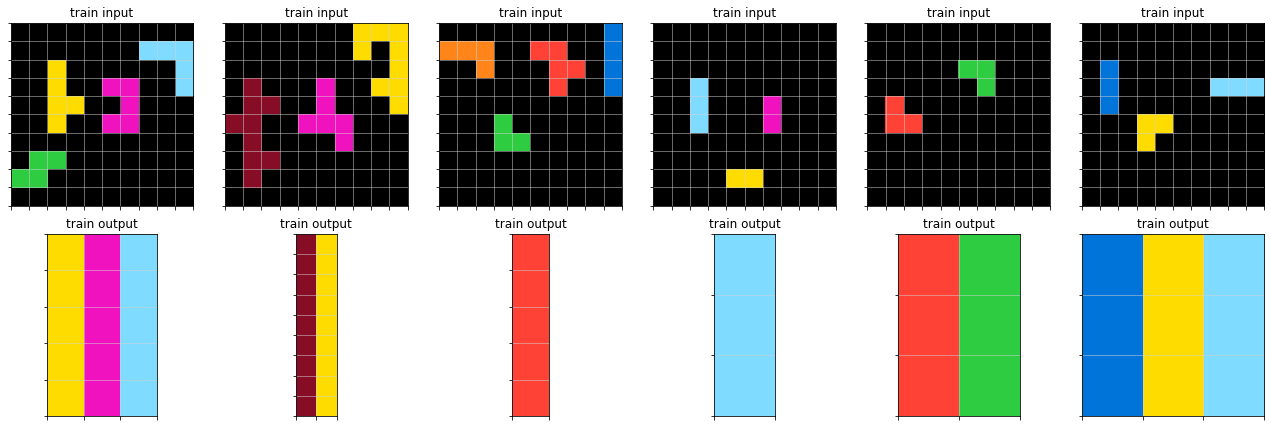

5 objects
[[0 1 0]
 [1 1 1]]
[[0 5]
 [5 5]
 [0 5]]
[[9 9]]
[[8]
 [8]
 [8]]
[[2 2]
 [2 0]
 [2 0]]
3 objects
[[5]
 [5]
 [5]
 [5]]
[[2]
 [2]
 [2]
 [2]]
[[1]
 [1]
 [1]
 [1]]


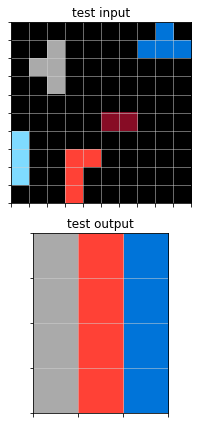

a3df8b1e.json
Icecuber solved? False
['pattern_expansion', 'draw_line_from_point', 'diagonals', 'bounce']
1 objects
[[1]]
10 objects
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
1 objects
[[1]]
10 objects
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
1 objects
[[1]]
10 objects
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]


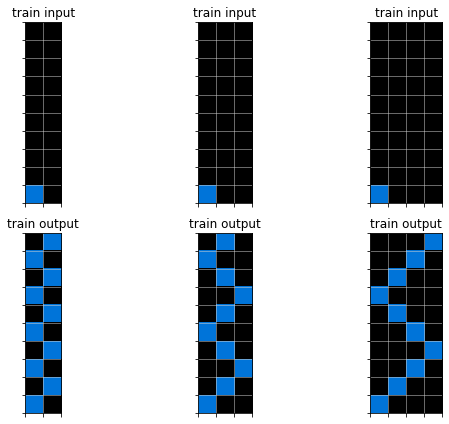

1 objects
[[1]]
10 objects
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]


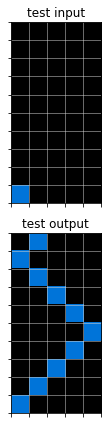

a416b8f3.json
Icecuber solved? True
['image_repetition']
2 objects
[[0 5]
 [5 5]]
[[2]]
4 objects
[[0 5]
 [5 5]]
[[0 5]
 [5 5]]
[[2]]
[[2]]
5 objects
[[3]]
[[2]
 [2]]
[[3]]
[[1]
 [1]]
[[8]]
10 objects
[[3]]
[[3]]
[[2]
 [2]]
[[3]]
[[2]
 [2]]
[[3]]
[[1]
 [1]]
[[8]]
[[1]
 [1]]
[[8]]
9 objects
[[5]]
[[2]]
[[3]
 [3]]
[[2]]
[[5]]
[[5]]
[[2]]
[[8 8]]
[[6]]
18 objects
[[5]]
[[2]]
[[3]
 [3]]
[[5]]
[[2]]
[[3]
 [3]]
[[2]]
[[5]]
[[2]]
[[5]]
[[5]]
[[2]]
[[8 8]]
[[5]]
[[2]]
[[8 8]]
[[6]]
[[6]]


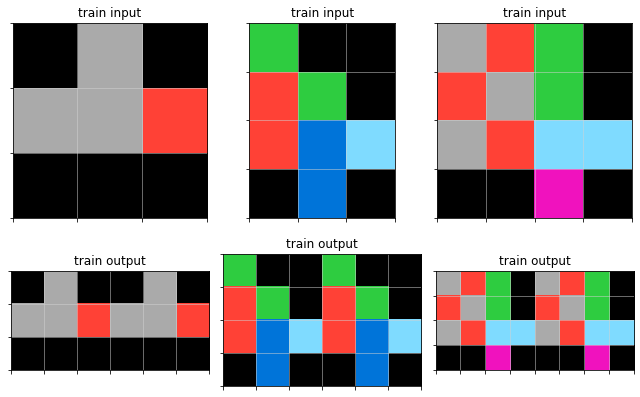

6 objects
[[4]
 [4]]
[[5]
 [5]]
[[6]]
[[6 6]]
[[1]]
[[1]]
12 objects
[[4]
 [4]]
[[4]
 [4]]
[[5]
 [5]]
[[5]
 [5]]
[[6]]
[[6]]
[[6 6]]
[[1]]
[[6 6]]
[[1]]
[[1]]
[[1]]


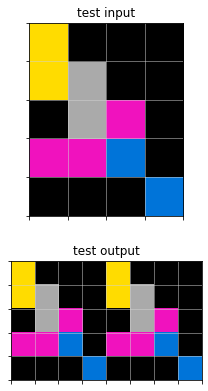

a48eeaf7.json
Icecuber solved? False
['pattern_moving', 'bring_patterns_close', 'gravity', 'direction_guessing']
4 objects
[[5]]
[[2 2]
 [2 2]]
[[5]]
[[5]]
4 objects
[[5]]
[[2 2]
 [2 2]]
[[5]]
[[5]]
5 objects
[[5]]
[[2 2]
 [2 2]]
[[5]]
[[5]]
[[5]]
5 objects
[[5]]
[[2 2]
 [2 2]]
[[5]]
[[5]]
[[5]]


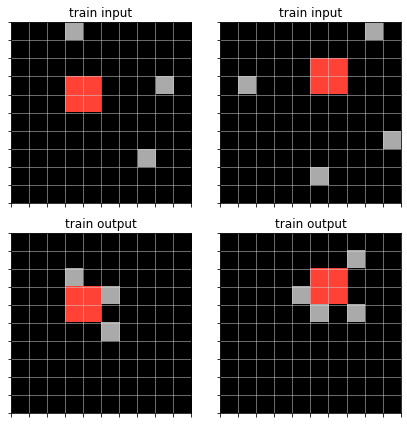

5 objects
[[5]]
[[5]]
[[2 2]
 [2 2]]
[[5]]
[[5]]
4 objects
[[5]]
[[5]
 [5]]
[[2 2]
 [2 2]]
[[5]]


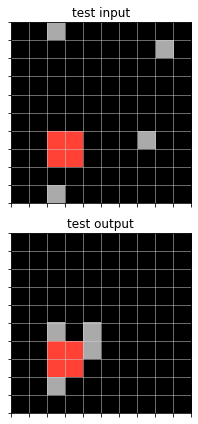

a5313dff.json
Icecuber solved? True
['loop_filling']
2 objects
[[2 2 2 2 2]
 [2 0 0 0 2]
 [2 0 0 0 2]
 [2 0 0 0 2]
 [2 2 2 2 2]]
[[2]]
3 objects
[[2 2 2 2 2]
 [2 0 0 0 2]
 [2 0 0 0 2]
 [2 0 0 0 2]
 [2 2 2 2 2]]
[[1 1 1]
 [1 0 1]
 [1 1 1]]
[[2]]
3 objects
[[0 0 0 2 0 0 0]
 [0 0 0 2 0 0 0]
 [0 0 0 2 0 0 0]
 [2 2 2 2 2 2 2]
 [0 0 2 0 0 0 2]
 [0 0 2 0 0 0 2]
 [0 0 2 0 0 0 2]
 [0 0 2 2 2 2 2]]
[[2]]
[[2]]
4 objects
[[0 0 0 2 0 0 0]
 [0 0 0 2 0 0 0]
 [0 0 0 2 0 0 0]
 [2 2 2 2 2 2 2]
 [0 0 2 0 0 0 2]
 [0 0 2 0 0 0 2]
 [0 0 2 0 0 0 2]
 [0 0 2 2 2 2 2]]
[[2]]
[[1 1 1]
 [1 0 1]
 [1 1 1]]
[[2]]
4 objects
[[2 2 2 2 2 0 0 0 0]
 [2 0 0 0 2 0 0 0 0]
 [2 0 0 0 2 2 2 2 0]
 [2 0 0 0 2 0 0 2 0]
 [2 2 2 2 2 0 0 2 0]
 [2 0 0 0 2 0 0 2 0]
 [2 0 0 0 2 2 2 2 0]
 [2 0 0 0 2 0 0 0 0]
 [2 2 2 2 2 0 0 0 0]
 [0 0 0 0 2 2 2 2 2]
 [0 0 0 0 2 0 0 0 2]
 [0 0 0 0 2 0 0 0 2]]
[[2]]
[[2]]
[[2]]
7 objects
[[2 2 2 2 2 0 0 0 0]
 [2 0 0 0 2 0 0 0 0]
 [2 0 0 0 2 2 2 2 0]
 [2 0 0 0 2 0 0 2 0]
 [2 2 2 2 2 0 0 2 0]
 [2 0 0 0 2 0

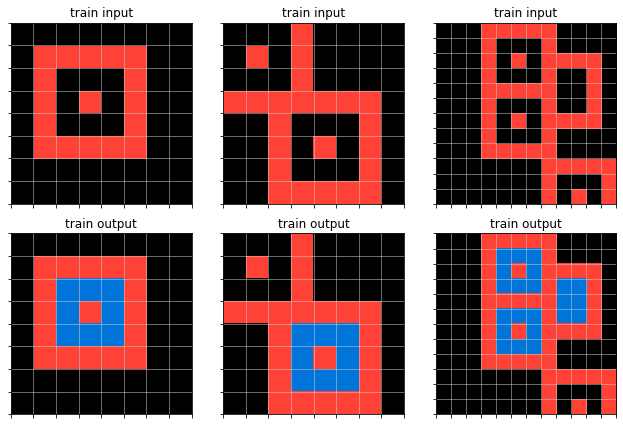

2 objects
[[0 0 2 2 2 2 2 0 0]
 [0 0 2 0 0 0 2 0 0]
 [0 0 2 0 0 0 2 0 0]
 [2 2 2 2 2 2 2 0 0]
 [2 0 0 0 2 0 0 0 0]
 [2 0 0 0 2 0 0 0 0]
 [2 0 0 0 2 2 2 2 2]
 [2 2 2 2 2 0 0 0 0]
 [0 0 0 0 2 0 0 0 0]]
[[2]]
4 objects
[[0 0 2 2 2 2 2 0 0]
 [0 0 2 0 0 0 2 0 0]
 [0 0 2 0 0 0 2 0 0]
 [2 2 2 2 2 2 2 0 0]
 [2 0 0 0 2 0 0 0 0]
 [2 0 0 0 2 0 0 0 0]
 [2 0 0 0 2 2 2 2 2]
 [2 2 2 2 2 0 0 0 0]
 [0 0 0 0 2 0 0 0 0]]
[[1 1 1]
 [1 1 1]]
[[1 1 1]
 [1 0 1]
 [1 1 1]]
[[2]]


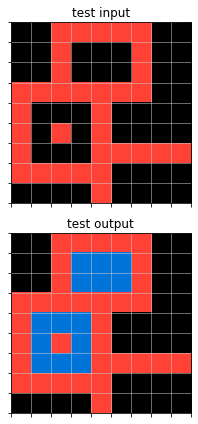

a5f85a15.json
Icecuber solved? False
['recoloring', 'pattern_modification', 'pairwise_analogy']
3 objects
[[2]]
[[2]]
[[2]]
3 objects
[[2]]
[[4]]
[[2]]
10 objects
[[9]]
[[9]]
[[9]]
[[9]]
[[9]]
[[9]]
[[9]]
[[9]]
[[9]]
[[9]]
10 objects
[[9]]
[[4]]
[[9]]
[[4]]
[[9]]
[[9]]
[[4]]
[[4]]
[[9]]
[[4]]
7 objects
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
7 objects
[[3]]
[[4]]
[[3]]
[[3]]
[[4]]
[[4]]
[[3]]


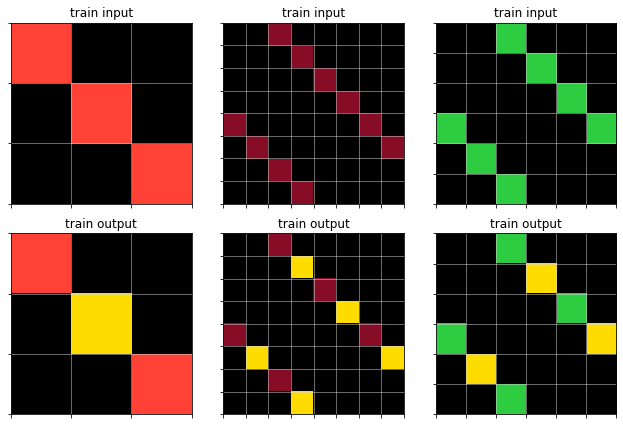

23 objects
[[6]]
[[6]]
[[6]]
[[6]]
[[6]]
[[6]]
[[6]]
[[6]]
[[6]]
[[6]]
[[6]]
[[6]]
[[6]]
[[6]]
[[6]]
[[6]]
[[6]]
[[6]]
[[6]]
[[6]]
[[6]]
[[6]]
[[6]]
23 objects
[[6]]
[[6]]
[[4]]
[[4]]
[[6]]
[[6]]
[[4]]
[[4]]
[[6]]
[[6]]
[[4]]
[[4]]
[[6]]
[[6]]
[[4]]
[[6]]
[[4]]
[[4]]
[[6]]
[[6]]
[[4]]
[[4]]
[[6]]


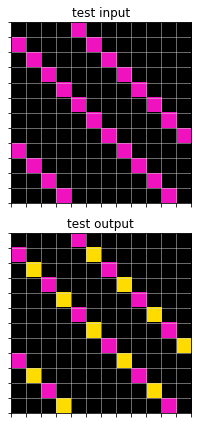

a61ba2ce.json
Icecuber solved? False
['pattern_moving', 'bring_patterns_close', 'crop', 'jigsaw']
4 objects
[[8 8]
 [8 0]]
[[2 2]
 [0 2]]
[[0 1]
 [1 1]]
[[3 0]
 [3 3]]
4 objects
[[8 8]
 [8 0]]
[[2 2]
 [0 2]]
[[3 0]
 [3 3]]
[[0 1]
 [1 1]]
4 objects
[[8 8]
 [0 8]]
[[1 1]
 [1 0]]
[[0 2]
 [2 2]]
[[4 0]
 [4 4]]
4 objects
[[1 1]
 [1 0]]
[[8 8]
 [0 8]]
[[4 0]
 [4 4]]
[[0 2]
 [2 2]]


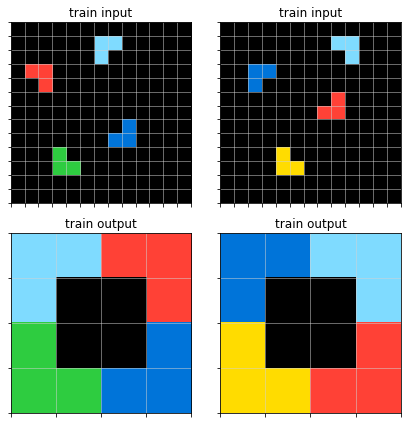

4 objects
[[0 6]
 [6 6]]
[[8 8]
 [0 8]]
[[1 0]
 [1 1]]
[[3 3]
 [3 0]]
4 objects
[[3 3]
 [3 0]]
[[8 8]
 [0 8]]
[[1 0]
 [1 1]]
[[0 6]
 [6 6]]


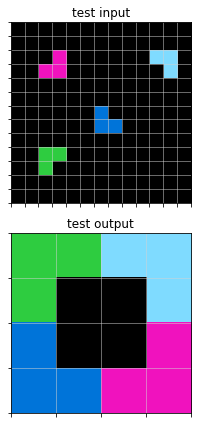

a61f2674.json
Icecuber solved? False
['separate_shapes', 'count_tiles', 'take_maximum', 'take_minimum', 'recoloring', 'associate_colors_to_ranks', 'remove_intruders']
5 objects
[[5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]]
[[5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]]
[[5]
 [5]
 [5]
 [5]
 [5]
 [5]]
[[5]
 [5]
 [5]
 [5]]
[[5]
 [5]
 [5]]
2 objects
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[2]
 [2]
 [2]]
4 objects
[[5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]]
[[5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]]
[[5]
 [5]
 [5]
 [5]
 [5]
 [5]]
[[5]
 [5]]
2 objects
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[2]
 [2]]


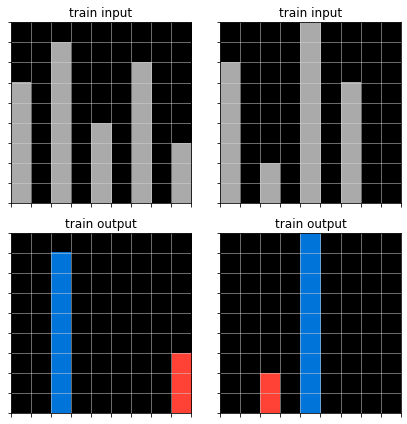

4 objects
[[5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]]
[[5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]]
[[5]
 [5]
 [5]
 [5]
 [5]]
[[5]]
2 objects
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[2]]


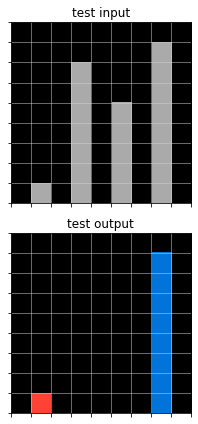

a64e4611.json
Icecuber solved? False
['background_filling', 'rectangle_guessing']
61 objects
[[8 8]]
[[8 0 8 0]
 [8 8 8 8]
 [0 8 8 0]]
[[8 8 8 8 8]
 [0 0 8 0 8]
 [0 0 0 8 8]]
[[8 8 8]
 [0 8 8]
 [8 8 0]
 [8 8 0]]
[[8]]
[[8]]
[[8]]
[[0 0 8 8]
 [8 8 8 8]
 [0 0 8 0]]
[[8]
 [8]]
[[8]
 [8]]
[[8]]
[[0 0 0 0 8]
 [0 0 0 8 8]
 [0 0 0 8 0]
 [0 8 8 8 0]
 [0 0 0 8 0]
 [0 0 0 8 0]
 [0 8 8 8 0]
 [8 8 0 8 0]
 [0 0 8 8 0]]
[[8 0 0 0 0 0]
 [8 8 0 0 0 0]
 [0 8 8 8 8 0]
 [0 0 8 8 8 8]
 [0 8 8 8 0 0]
 [0 0 0 8 0 0]]
[[8 8 8 8]
 [0 8 8 0]]
[[0 8 8 0 0 0 0 0]
 [8 8 8 0 0 0 0 0]
 [0 8 0 0 0 0 0 0]
 [0 8 8 8 8 0 0 0]
 [0 8 8 8 8 0 0 0]
 [8 0 8 8 0 0 0 0]
 [8 8 8 0 0 0 0 0]
 [8 0 8 8 0 0 0 0]
 [0 8 8 0 0 0 0 0]
 [0 8 0 0 8 0 0 0]
 [8 8 8 8 8 0 0 0]
 [8 0 8 8 0 0 8 8]
 [8 0 8 0 0 8 8 0]
 [0 0 8 8 8 8 0 0]
 [0 0 8 0 0 8 8 8]
 [0 0 8 8 0 8 0 8]]
[[8]]
[[8]]
[[8]
 [8]]
[[0 0 8 8]
 [0 0 8 0]
 [0 0 8 0]
 [8 8 8 0]
 [0 8 0 0]]
[[0 0 8]
 [0 0 8]
 [8 8 8]
 [0 8 8]
 [0 0 8]]
[[8]
 [8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8 8]
 [0 

72 objects
[[2]]
[[2 2 2 2]]
[[2]]
[[2 2]]
[[2]]
[[2 2 2]]
[[2 2]
 [0 2]]
[[2]]
[[2 2]
 [0 2]]
[[2 0 0]
 [2 2 0]
 [0 2 0]
 [2 2 2]
 [2 2 0]
 [0 2 0]]
[[2]]
[[0 2 0]
 [0 2 2]
 [2 2 0]
 [0 2 0]
 [2 2 2]]
[[2]]
[[2 0]
 [2 2]]
[[2 2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[0 0 0 2]
 [2 2 2 2]]
[[2]]
[[2]]
[[2]]
[[2]
 [2]]
[[2 0]
 [2 2]
 [2 2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2 2 0 2 2 2]
 [2 2 2 2 0 2]
 [0 2 0 0 0 0]]
[[2]]
[[2 2]
 [0 2]]
[[2]
 [2]]
[[2 2]]
[[2]]
[[2]]
[[2]]
[[2]
 [2]]
[[0 0 0 2]
 [2 0 2 2]
 [2 2 2 2]]
[[0 2 0]
 [0 2 2]
 [2 2 2]
 [0 2 0]]
[[2]]
[[2]
 [2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]
 [2]]
[[2]]
[[2 2 2 2]
 [0 0 2 0]
 [0 0 2 0]
 [0 0 2 0]]
[[2 2]]
[[2]]
[[2 0]
 [2 2]]
[[2 2]]
[[2 2 0]
 [2 2 2]
 [0 2 0]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]
 [2]]
[[2 0]
 [2 2]
 [2 0]]
[[2]]
[[2]]
[[0 2]
 [2 2]]
[[2 0 0]
 [2 2 2]
 [0 0 2]]
[[0 2 0 0 2 2 0 0 0]
 [0 2 0 0 0 2 2 2 2]
 [0 2 0 0 0 2 0 2 2]
 [2 2 0 0 0 2 0 2 0]
 [2 2 2 2 2 2 0 2 2]]
[[2 0 0]
 [2 0 0]
 [2 0 0]
 [2 2 2]]
[[2]
 [2]]
[[2]]
[[0 2 0]


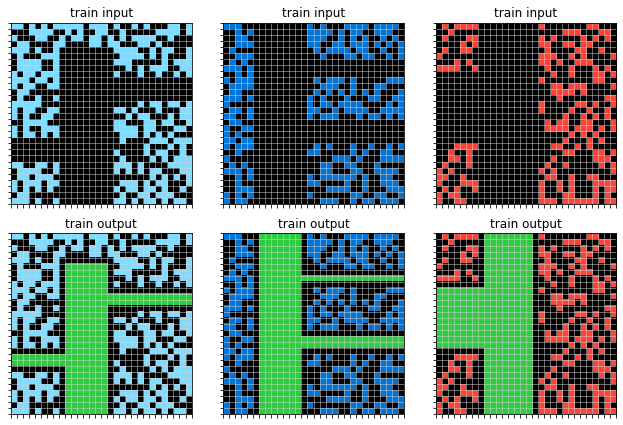

79 objects
[[0 4 4]
 [4 4 4]]
[[4]]
[[0 4 4]
 [4 4 0]]
[[4 4 4 4 4]
 [0 4 4 0 4]
 [0 4 0 4 4]
 [0 0 0 0 4]]
[[4]]
[[4 4 4]
 [0 4 4]
 [0 0 4]
 [0 0 4]
 [0 4 4]]
[[4 4]
 [0 4]
 [0 4]]
[[4]]
[[4 4]
 [4 0]]
[[4 4]]
[[4]
 [4]]
[[0 0 4 4 4]
 [4 4 4 0 4]
 [4 0 4 0 0]
 [4 4 0 0 0]
 [0 4 4 4 0]]
[[4]]
[[0 4]
 [4 4]
 [0 4]]
[[0 4]
 [0 4]
 [4 4]
 [0 4]]
[[4]
 [4]]
[[4]]
[[4]
 [4]]
[[4]]
[[4]]
[[4]]
[[4 4]]
[[4 4]]
[[4]]
[[0 4 0]
 [4 4 4]]
[[4]]
[[4]]
[[4 4]]
[[4]]
[[4]]
[[4]]
[[0 4]
 [4 4]]
[[4]
 [4]]
[[4]]
[[4]
 [4]]
[[4]]
[[4]]
[[0 0 4 4 0 0 0 0]
 [0 4 4 4 0 4 0 0]
 [4 4 4 4 4 4 4 4]
 [0 0 4 0 0 0 4 0]
 [0 0 4 0 0 0 0 0]
 [0 0 4 0 0 0 0 0]]
[[4 4]]
[[4 4 0 0]
 [0 4 4 4]
 [0 4 0 0]
 [0 4 0 0]]
[[4]
 [4]]
[[4]]
[[0 4]
 [4 4]]
[[4]]
[[4 4 4]
 [4 0 0]]
[[4]]
[[4]]
[[4]]
[[0 4]
 [4 4]]
[[4]
 [4]]
[[0 0 4 0 0]
 [0 0 4 4 0]
 [0 4 4 4 4]
 [4 4 0 0 0]
 [4 0 0 0 0]]
[[4 0]
 [4 4]
 [4 0]
 [4 4]
 [4 0]]
[[4 4 0]
 [4 4 4]
 [4 4 0]
 [0 4 0]
 [4 4 0]
 [4 0 0]
 [4 0 0]]
[[0 0 0 4]
 [0 0 4 4]
 [4 4 4 4]
 [4 4 4

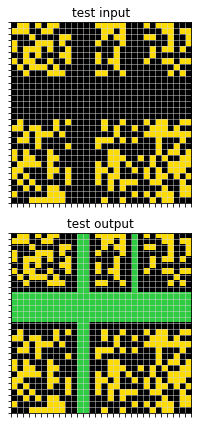

a65b410d.json
Icecuber solved? True
['pattern_expansion', 'count_tiles', 'associate_colors_to_ranks']
1 objects
[[2 2]]
3 objects
[[3 3 3 3 3]
 [3 3 3 3 0]
 [3 3 3 0 0]]
[[2 2]]
[[1]]
1 objects
[[2 2 2]]
3 objects
[[3 3 3 3 3 3]
 [3 3 3 3 3 0]
 [3 3 3 3 0 0]]
[[2 2 2]]
[[1 1]
 [1 0]]
1 objects
[[2 2 2 2]]
3 objects
[[3 3 3 3 3 3]
 [3 3 3 3 3 0]]
[[2 2 2 2]]
[[1 1 1]
 [1 1 0]
 [1 0 0]]


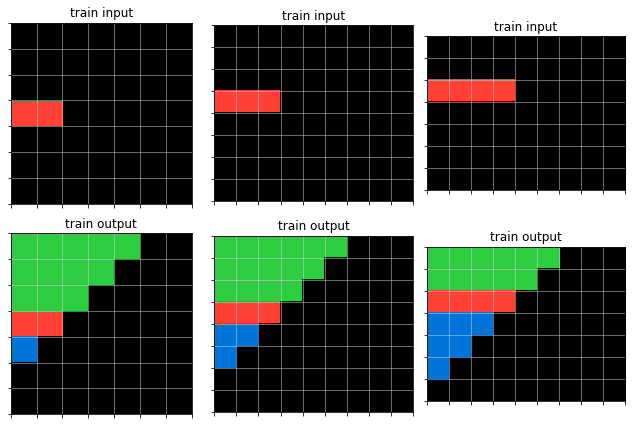

1 objects
[[2 2 2 2 2]]
3 objects
[[3 3 3 3 3 3 3]
 [3 3 3 3 3 3 0]]
[[2 2 2 2 2]]
[[1 1 1 1]
 [1 1 1 0]
 [1 1 0 0]
 [1 0 0 0]]


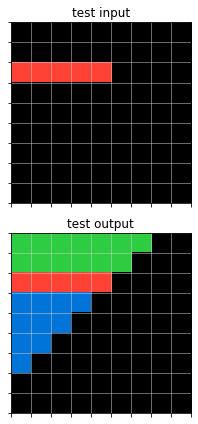

a68b268e.json
Icecuber solved? True
['detect_grid', 'separate_images', 'pattern_juxtaposition']
12 objects
[[0 7 7 7]
 [7 7 7 0]]
[[0 0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0 0]
 [1 1 1 1 1 1 1 1 1]
 [0 0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0 0]]
[[0 4]
 [4 4]]
[[4]]
[[4]]
[[7]]
[[6 6 6]]
[[8 8]
 [8 0]]
[[8]]
[[6]]
[[6]]
[[8]]
8 objects
[[6]]
[[0 7 7 7]
 [7 7 7 0]]
[[8]]
[[8]]
[[8]]
[[4]]
[[7]]
[[8]]
12 objects
[[7 7 7]
 [7 0 7]]
[[0 0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0 0]
 [1 1 1 1 1 1 1 1 1]
 [0 0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0 0]]
[[4]]
[[4]
 [4]]
[[4 4]
 [4 4]]
[[7]]
[[7]
 [7]]
[[8]]
[[6 0]
 [6 0]
 [6 6]
 [6 0]]
[[6]]
[[0 6]
 [6 6]]
[[8 8 8]]
8 objects
[[7 7 7]
 [7 0 7]]
[[6]]
[[4]]
[[4]]
[[7]]
[[4]]
[[7]
 [7]]
[[8 8 8]]
9 objects
[[0 0 7 7]
 [0 0 0 7]
 [7 7 7 7]
 [0 7 0 0]]
[[0 0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0 0]
 [0 0 0 0 1

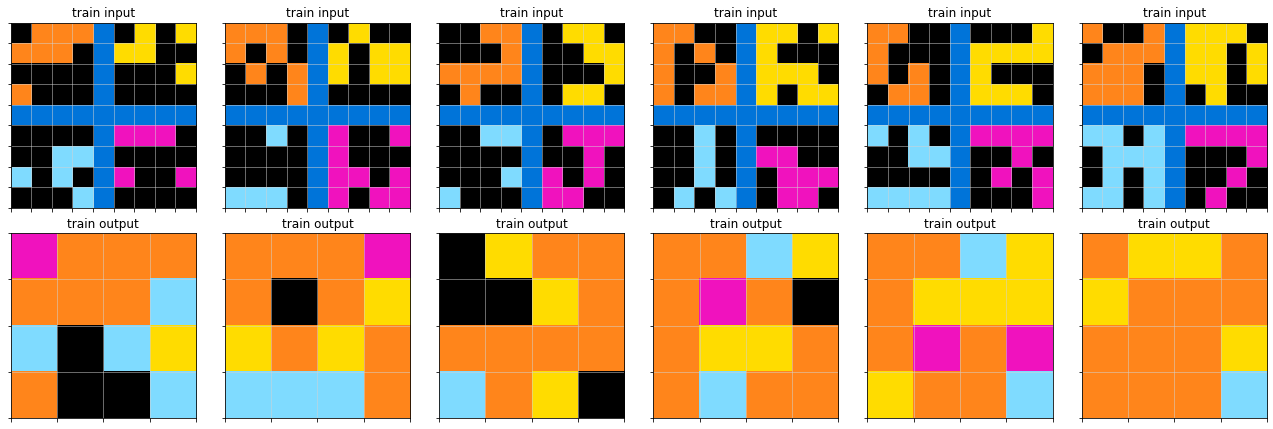

14 objects
[[7 7 7 0]
 [0 7 7 0]
 [7 7 7 7]
 [7 0 0 0]]
[[0 0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0 0]
 [1 1 1 1 1 1 1 1 1]
 [0 0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0 0]]
[[4]]
[[4 4]
 [0 4]]
[[4]
 [4]]
[[4]]
[[4]]
[[8]
 [8]]
[[6]]
[[0 0 0 6]
 [6 0 0 6]
 [6 6 6 6]
 [0 6 0 0]]
[[8]
 [8]]
[[8]]
[[8]]
[[8]]
7 objects
[[7 7 7 0]
 [0 7 7 0]
 [7 7 7 7]
 [7 0 0 0]]
[[8]]
[[4]]
[[4]]
[[8]]
[[4]]
[[8]]


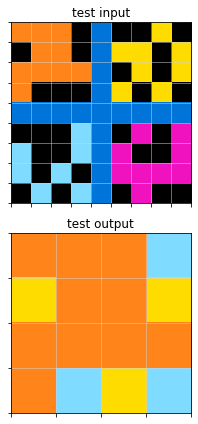

a699fb00.json
Icecuber solved? True
['pattern_expansion', 'connect_the_dots']
4 objects
[[1]]
[[1]]
[[1]]
[[1]]
6 objects
[[1]]
[[2]]
[[1]]
[[1]]
[[2]]
[[1]]
10 objects
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
16 objects
[[1]]
[[2]]
[[1]]
[[2]]
[[1]]
[[2]]
[[1]]
[[1]]
[[2]]
[[1]]
[[1]]
[[2]]
[[1]]
[[1]]
[[2]]
[[1]]
11 objects
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
17 objects
[[1]]
[[2]]
[[1]]
[[1]]
[[2]]
[[1]]
[[1]]
[[2]]
[[1]]
[[2]]
[[1]]
[[1]]
[[2]]
[[1]]
[[1]]
[[2]]
[[1]]


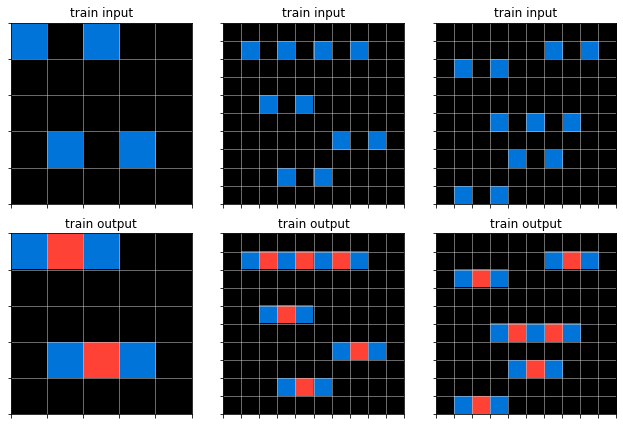

12 objects
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
19 objects
[[1]]
[[2]]
[[1]]
[[1]]
[[2]]
[[1]]
[[2]]
[[1]]
[[2]]
[[1]]
[[1]]
[[2]]
[[1]]
[[1]]
[[2]]
[[1]]
[[1]]
[[2]]
[[1]]


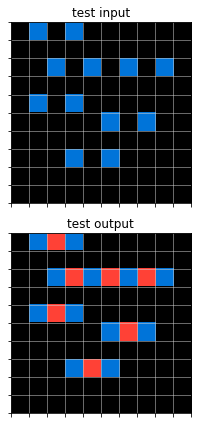

a740d043.json
Icecuber solved? True
['crop', 'detect_background_color', 'recoloring']
4 objects
[[1 1 1 1 1 1 1]
 [1 0 0 1 1 1 1]
 [1 0 0 0 1 1 1]
 [1 1 1 0 1 1 1]
 [1 1 1 1 1 1 1]]
[[2 2]
 [2 2]]
[[3]]
[[2]]
3 objects
[[2 2]
 [2 2]]
[[3]]
[[2]]
3 objects
[[1 1 1 1 1 1 1]
 [1 1 0 1 0 1 1]
 [1 1 0 1 0 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]]
[[3]
 [3]]
[[2]
 [2]]
2 objects
[[3]
 [3]]
[[2]
 [2]]
3 objects
[[1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 0 0 1 1 1]
 [1 0 0 1 1 1]
 [1 0 0 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]]
[[5 5]
 [5 5]]
[[6 6]]
2 objects
[[5 5]
 [5 5]]
[[6 6]]


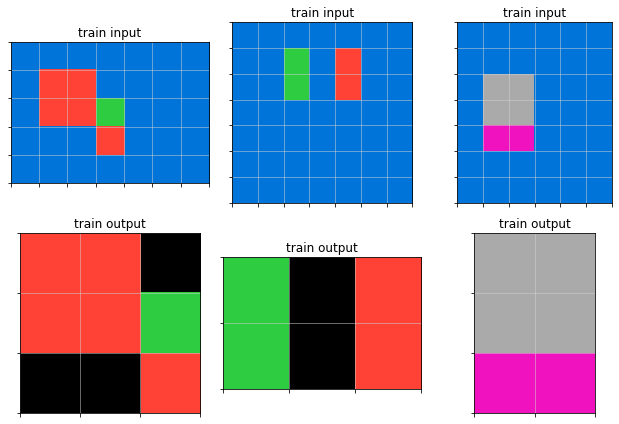

4 objects
[[1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 0 1 1]
 [1 1 0 0 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]]
[[2]]
[[2]]
[[3]]
3 objects
[[2]]
[[2]]
[[3]]


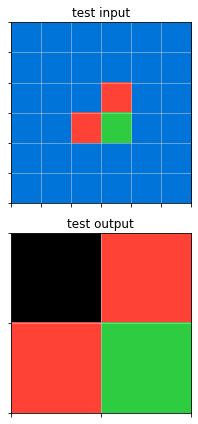

a78176bb.json
Icecuber solved? False
['draw_parallel_line', 'direction_guessing', 'remove_intruders']
11 objects
[[7]]
[[7]]
[[7]]
[[7]]
[[5 5]
 [0 5]]
[[7]]
[[7]]
[[7]]
[[7]]
[[7]]
[[7]]
16 objects
[[7]]
[[7]]
[[7]]
[[7]]
[[7]]
[[7]]
[[7]]
[[7]]
[[7]]
[[7]]
[[7]]
[[7]]
[[7]]
[[7]]
[[7]]
[[7]]
6 objects
[[9]]
[[5 0 0 0]
 [5 5 0 0]
 [5 5 5 0]
 [5 5 5 5]]
[[9]]
[[9]]
[[9]]
[[9]]
14 objects
[[9]]
[[9]]
[[9]]
[[9]]
[[9]]
[[9]]
[[9]]
[[9]]
[[9]]
[[9]]
[[9]]
[[9]]
[[9]]
[[9]]
11 objects
[[2]]
[[2]]
[[2]]
[[5 5]
 [0 5]]
[[2]]
[[5 0 0]
 [5 5 0]
 [5 5 5]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
20 objects
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]


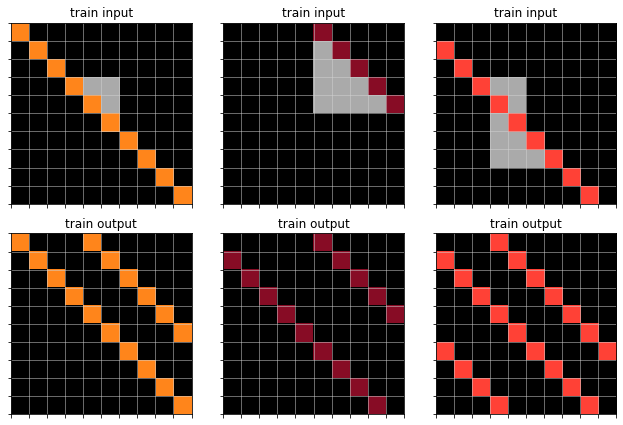

11 objects
[[1]]
[[1]]
[[5 5]
 [0 5]]
[[1]]
[[1]]
[[5 0 0 0 0]
 [5 5 0 0 0]
 [5 5 5 0 0]
 [5 5 5 5 0]
 [5 5 5 5 5]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
18 objects
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]


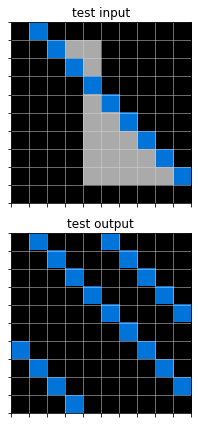

a79310a0.json
Icecuber solved? False
['pattern_moving', 'recoloring', 'pairwise_analogy']
1 objects
[[8 8]
 [8 8]]
1 objects
[[2 2]
 [2 2]]
1 objects
[[8]]
1 objects
[[2]]
1 objects
[[8 8 8]]
1 objects
[[2 2 2]]


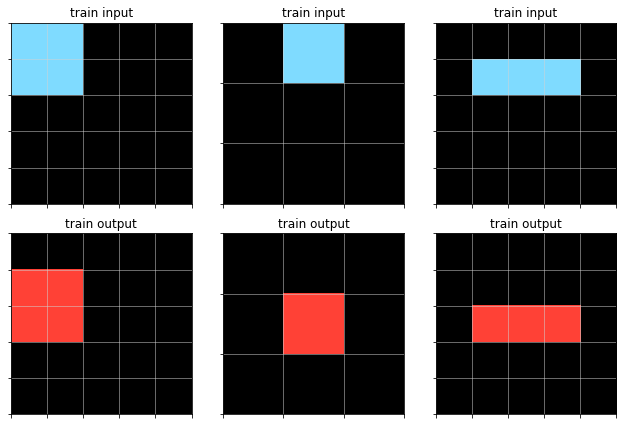

1 objects
[[0 8]
 [8 8]
 [0 8]]
1 objects
[[0 2]
 [2 2]
 [0 2]]


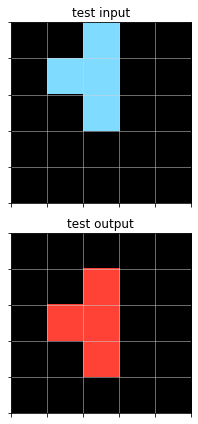

a85d4709.json
Icecuber solved? False
['separate_images', 'associate_colors_to_images', 'summarize']
3 objects
[[5]]
[[5]]
[[5]]
3 objects
[[3 3 3]]
[[4 4 4]]
[[2 2 2]]
1 objects
[[5]
 [5]
 [5]]
1 objects
[[3 3 3]
 [3 3 3]
 [3 3 3]]
3 objects
[[5]]
[[5]]
[[5]]
3 objects
[[2 2 2]]
[[4 4 4]]
[[2 2 2]]
3 objects
[[5]]
[[5]]
[[5]]
3 objects
[[4 4 4]]
[[3 3 3]]
[[4 4 4]]


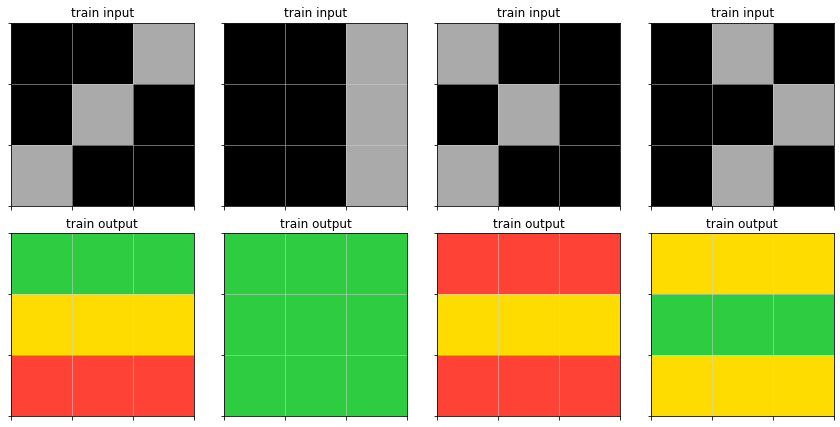

3 objects
[[5]]
[[5]]
[[5]]
3 objects
[[3 3 3]]
[[2 2 2]]
[[4 4 4]]


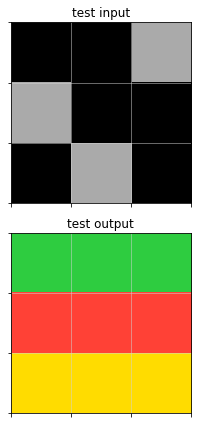

a87f7484.json
Icecuber solved? True
['separate_images', 'find_the_intruder', 'crop']
7 objects
[[6]]
[[0 6]
 [6 6]
 [0 6]]
[[6]]
[[4]]
[[0 4]
 [4 4]
 [0 4]]
[[4]]
[[8 8 8]
 [8 0 8]
 [8 8 8]]
1 objects
[[8 8 8]
 [8 0 8]
 [8 8 8]]
11 objects
[[2]
 [2]]
[[3]
 [3]]
[[7]]
[[7]]
[[1]
 [1]]
[[7]]
[[2 2]]
[[3 3]]
[[7]]
[[7]]
[[1 1]]
5 objects
[[7]]
[[7]]
[[7]]
[[7]]
[[7]]
9 objects
[[3]]
[[4 0 4]
 [4 4 4]
 [4 0 4]]
[[2]]
[[8]]
[[1]]
[[3 3]
 [3 0]]
[[2 2]
 [2 0]]
[[8 8]
 [8 0]]
[[1 1]
 [1 0]]
1 objects
[[4 0 4]
 [4 4 4]
 [4 0 4]]
11 objects
[[0 7 7]
 [7 7 0]
 [7 0 0]]
[[7]]
[[3]]
[[3 3]]
[[3]]
[[2]]
[[2 2]]
[[2]]
[[8]]
[[8 8]]
[[8]]
2 objects
[[0 7 7]
 [7 7 0]
 [7 0 0]]
[[7]]


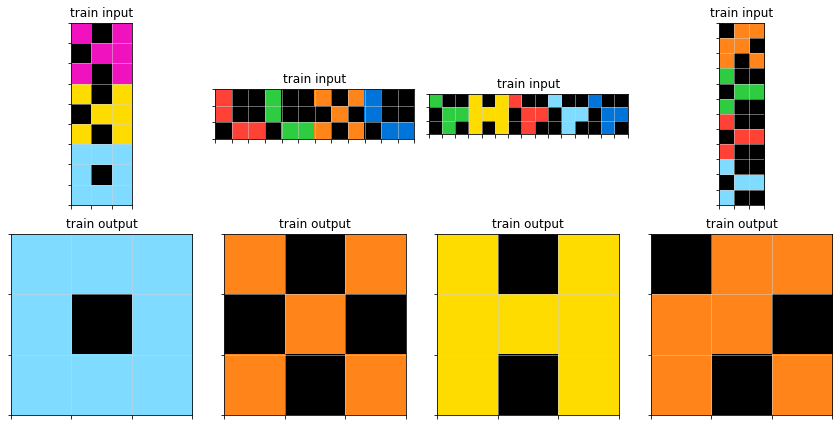

19 objects
[[5]]
[[5]]
[[5]]
[[5]]
[[3]]
[[3]]
[[3]]
[[3]]
[[6 0]
 [6 6]
 [6 0]]
[[6]]
[[6]]
[[4]]
[[4]]
[[4]]
[[4]]
[[8]]
[[8]]
[[8]]
[[8]]
3 objects
[[6 0]
 [6 6]
 [6 0]]
[[6]]
[[6]]


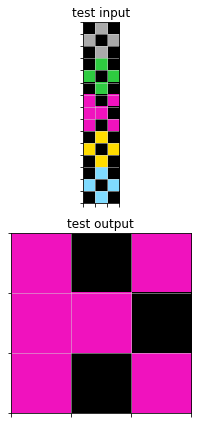

a8c38be5.json
Icecuber solved? False
['pattern_moving', 'jigsaw', 'crop']
17 objects
[[5 5 5]
 [0 5 5]
 [0 0 5]]
[[8 0]
 [8 8]]
[[2 2 2]
 [0 2 0]]
[[5 0 5]
 [5 5 5]]
[[2 0]
 [2 2]
 [2 0]]
[[5 5]
 [0 5]
 [5 5]]
[[5 5 5]
 [5 5 5]
 [5 5 5]]
[[5 5 5]
 [5 0 5]]
[[5 0 0]
 [5 5 0]
 [5 5 5]]
[[1 1]
 [0 1]]
[[0 4 0]
 [4 4 4]]
[[5 5]
 [5 0]
 [5 5]]
[[0 3]
 [3 3]
 [0 3]]
[[5 5 5]
 [5 5 0]
 [5 0 0]]
[[6 6]
 [6 0]]
[[0 0 5]
 [0 5 5]
 [5 5 5]]
[[0 9]
 [9 9]]
9 objects
[[6 6]
 [6 0]]
[[0 0 5 0 0 0 5 0 0]
 [0 5 5 5 0 5 5 5 0]
 [5 5 5 5 5 5 5 5 5]
 [0 5 5 5 5 5 5 5 0]
 [0 0 5 5 5 5 5 0 0]
 [0 5 5 5 5 5 5 5 0]
 [5 5 5 5 5 5 5 5 5]
 [0 5 5 5 0 5 5 5 0]
 [0 0 5 0 0 0 5 0 0]]
[[2 2 2]
 [0 2 0]]
[[1 1]
 [0 1]]
[[2 0]
 [2 2]
 [2 0]]
[[0 3]
 [3 3]
 [0 3]]
[[8 0]
 [8 8]]
[[0 4 0]
 [4 4 4]]
[[0 9]
 [9 9]]
17 objects
[[5 5]
 [5 0]
 [5 5]]
[[0 4]
 [4 4]
 [0 4]]
[[5 5 5]
 [0 5 5]
 [0 0 5]]
[[3 0]
 [3 3]]
[[5 0 0]
 [5 5 0]
 [5 5 5]]
[[8 8]
 [0 8]]
[[5 5 5]
 [5 5 0]
 [5 0 0]]
[[0 9]
 [9 9]]
[[1 1 1]
 [0 1 0]]
[[5 5 

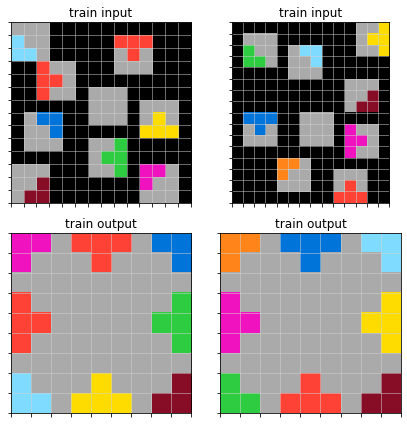

17 objects
[[5 5 5]
 [0 5 5]
 [0 0 5]]
[[1 0]
 [1 1]
 [1 0]]
[[5 5]
 [0 5]
 [5 5]]
[[6 0]
 [6 6]]
[[2 2 2]
 [0 2 0]]
[[5 0 5]
 [5 5 5]]
[[5 5 5]
 [5 5 5]
 [5 5 5]]
[[5 5 5]
 [5 0 5]]
[[0 8 0]
 [8 8 8]]
[[5 5]
 [5 0]
 [5 5]]
[[0 1]
 [1 1]
 [0 1]]
[[5 0 0]
 [5 5 0]
 [5 5 5]]
[[4 4]
 [0 4]]
[[3 3]
 [3 0]]
[[0 0 5]
 [0 5 5]
 [5 5 5]]
[[5 5 5]
 [5 5 0]
 [5 0 0]]
[[0 7]
 [7 7]]
9 objects
[[3 3]
 [3 0]]
[[0 0 5 0 0 0 5 0 0]
 [0 5 5 5 0 5 5 5 0]
 [5 5 5 5 5 5 5 5 5]
 [0 5 5 5 5 5 5 5 0]
 [0 0 5 5 5 5 5 0 0]
 [0 5 5 5 5 5 5 5 0]
 [5 5 5 5 5 5 5 5 5]
 [0 5 5 5 0 5 5 5 0]
 [0 0 5 0 0 0 5 0 0]]
[[2 2 2]
 [0 2 0]]
[[4 4]
 [0 4]]
[[1 0]
 [1 1]
 [1 0]]
[[0 1]
 [1 1]
 [0 1]]
[[6 0]
 [6 6]]
[[0 8 0]
 [8 8 8]]
[[0 7]
 [7 7]]


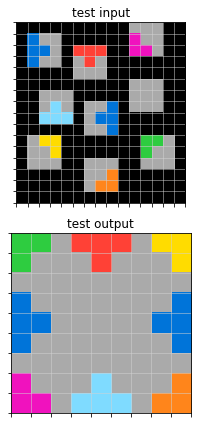

a8d7556c.json
Icecuber solved? False
['recoloring', 'rectangle_guessing']
14 objects
[[5 5 5]
 [5 5 0]
 [0 5 5]
 [5 5 0]
 [5 0 0]]
[[5]]
[[0 0 0 0 0 0 0 5 5 5 5 5 5 5 0 5 5 5]
 [0 0 0 0 0 5 0 5 0 5 5 0 0 5 0 5 0 5]
 [0 0 0 0 5 5 0 0 5 5 0 5 5 5 5 5 0 5]
 [0 0 0 5 5 5 5 5 5 0 5 5 5 5 5 0 5 5]
 [0 0 5 5 5 5 5 5 5 5 0 5 5 5 0 5 0 5]
 [0 5 5 5 5 0 0 5 0 0 0 0 5 5 5 5 5 0]
 [0 0 5 5 5 0 0 5 0 5 0 0 0 5 5 5 5 5]
 [0 0 5 5 0 0 5 5 5 5 5 5 5 5 5 0 0 5]
 [0 0 5 0 0 0 0 0 5 5 5 5 5 5 5 0 0 5]
 [0 0 5 5 0 0 5 5 5 5 5 5 5 5 5 5 0 5]
 [5 5 0 5 5 5 0 0 5 0 5 0 0 5 5 5 0 5]
 [5 5 5 5 5 5 5 5 5 5 5 5 0 5 5 5 5 5]
 [5 5 5 5 0 0 5 5 5 5 0 5 5 0 0 5 0 0]
 [0 5 0 0 0 5 0 5 5 0 0 5 5 5 0 0 0 0]
 [0 0 5 5 5 5 5 0 5 0 5 0 5 0 0 0 0 0]
 [0 0 5 0 0 0 5 5 5 5 5 5 5 0 0 0 0 0]
 [0 0 5 5 0 0 0 5 5 5 0 0 0 0 0 0 0 0]
 [0 0 0 5 0 0 0 0 0 5 5 0 0 0 0 0 0 0]]
[[5]]
[[5]]
[[5]]
[[5]]
[[5 5]
 [0 5]
 [0 5]]
[[5 0]
 [5 0]
 [5 5]]
[[5]]
[[5]]
[[5]]
[[5]]
[[5 5]]
19 objects
[[5 5 5]
 [5 5 0]
 [0 5 5]
 [5 5 0]
 [5 0 0]]
[[5

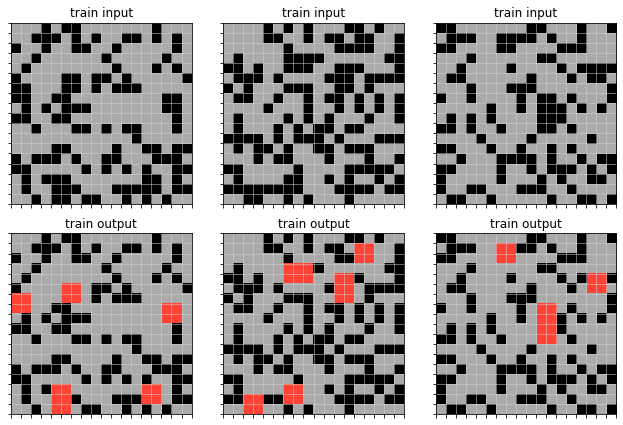

17 objects
[[0 5]
 [5 5]]
[[0 0 0 0 0 5 0 0 0]
 [0 0 0 0 0 5 0 0 0]
 [0 0 0 0 5 5 0 0 0]
 [0 5 5 5 0 5 5 0 0]
 [5 5 5 5 5 5 5 0 0]
 [0 5 5 5 5 0 5 5 5]
 [5 5 0 5 5 5 5 5 5]
 [5 5 5 5 0 0 5 5 0]
 [5 0 5 0 0 5 5 5 0]]
[[5 5]]
[[5 5 5 5 5]
 [5 5 5 5 0]
 [0 5 0 5 5]
 [0 0 5 5 0]]
[[5]
 [5]]
[[0 5 5]
 [0 0 5]
 [0 5 5]
 [5 5 5]
 [0 5 0]
 [0 5 5]
 [5 5 0]]
[[5]]
[[5]]
[[5 5 0]
 [0 5 5]
 [0 0 5]]
[[5 5]
 [0 5]]
[[0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 5 5 5 5 5 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 5 5 5 5 0 0 0]
 [0 0 0 0 0 0 0 0 5 5 5 5 0 0 5 0 5 5]
 [0 0 5 5 0 0 0 0 0 0 5 0 5 5 5 5 5 0]
 [0 0 0 5 5 0 0 0 0 5 5 0 5 5 5 5 5 5]
 [0 5 5 5 5 0 0 0 0 0 0 5 5 5 5 5 0 5]
 [5 5 5 5 5 5 5 0 5 5 5 5 5 5 5 0 0 5]
 [5 5 0 5 5 5 0 5 0 5 5 5 5 0 5 0 0 5]
 [5 0 5 5 5 5 0 5 5 0 0 0 5 5 5 5 0 5]
 [0 0 0 0 5 5 5 5 5 5 5 5 5 5 5 5 5 5]
 [0 0 0 0 0 0 0 5 0 5 0 5 5 0 5 5 0 0]]
[[5]]
[[5]]
[[5 5 5]
 [0 5 0]]
[[5]]
[[5]]
[[5]]
22 objects
[[2 2]
 [2 2]]
[[0 5]
 [5 5]]
[[0 0 0 0 0 5 0 0 0]
 [0 0 0 0 0 5

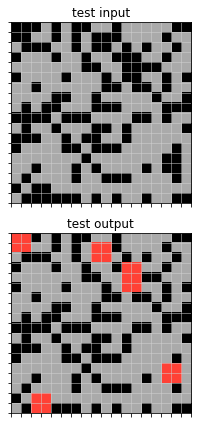

a9f96cdd.json
Icecuber solved? False
['replace_pattern', 'out_of_boundary']
1 objects
[[2]]
4 objects
[[3]]
[[6]]
[[8]]
[[7]]
1 objects
[[2]]
1 objects
[[3]]
1 objects
[[2]]
2 objects
[[8]]
[[7]]
1 objects
[[2]]
4 objects
[[3]]
[[6]]
[[8]]
[[7]]


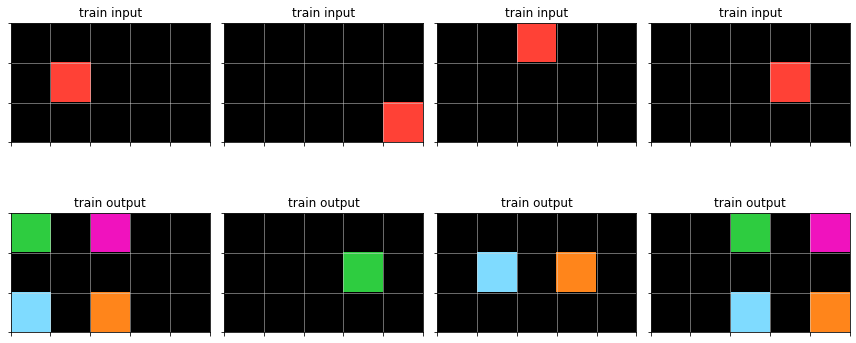

1 objects
[[2]]
2 objects
[[3]]
[[8]]


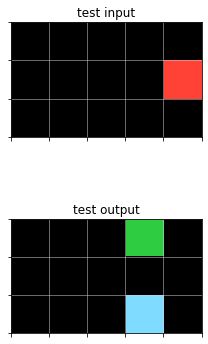

aabf363d.json
Icecuber solved? True
['recoloring', 'color_guessing', 'remove_intruders']
2 objects
[[2 2 2 0]
 [0 2 0 0]
 [2 2 2 2]
 [0 2 2 2]
 [0 0 2 0]]
[[4]]
1 objects
[[4 4 4 0]
 [0 4 0 0]
 [4 4 4 4]
 [0 4 4 4]
 [0 0 4 0]]
2 objects
[[0 0 3 0]
 [0 3 3 3]
 [3 3 3 3]
 [3 3 0 0]
 [0 3 3 0]]
[[6]]
1 objects
[[0 0 6 0]
 [0 6 6 6]
 [6 6 6 6]
 [6 6 0 0]
 [0 6 6 0]]


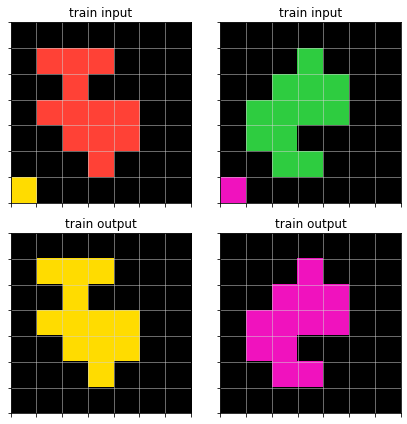

2 objects
[[8 8 8 0 0]
 [8 8 8 8 8]
 [0 0 8 8 0]
 [0 8 8 0 0]
 [0 8 8 8 0]]
[[2]]
1 objects
[[2 2 2 0 0]
 [2 2 2 2 2]
 [0 0 2 2 0]
 [0 2 2 0 0]
 [0 2 2 2 0]]


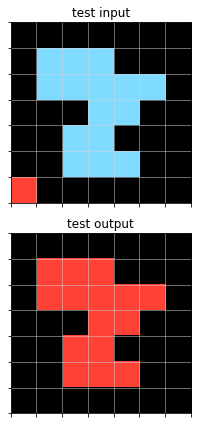

aba27056.json
Icecuber solved? False
['pattern_expansion', 'draw_line_from_point', 'diagonals']
1 objects
[[6 6 0 6 6]
 [6 0 0 0 6]
 [6 6 6 6 6]]
6 objects
[[0 4 0]
 [0 4 0]
 [0 4 0]
 [4 4 4]
 [0 4 0]
 [4 4 4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[6 6 0 6 6]
 [6 0 0 0 6]
 [6 6 6 6 6]]
1 objects
[[7 7 7 7 7]
 [7 0 0 0 7]
 [0 0 0 0 7]
 [0 0 0 0 7]
 [0 0 0 0 7]
 [7 0 0 0 7]
 [7 7 7 7 7]]
6 objects
[[4]]
[[4]]
[[4]]
[[7 7 7 7 7]
 [7 0 0 0 7]
 [0 0 0 0 7]
 [0 0 0 0 7]
 [0 0 0 0 7]
 [7 0 0 0 7]
 [7 7 7 7 7]]
[[0 0 0 4 0 4 4 4]
 [4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4]
 [0 0 0 4 0 4 4 4]]
[[4]]
1 objects
[[3 3 3 3 3 3]
 [3 0 0 0 0 3]
 [3 0 0 0 0 3]
 [3 3 0 0 3 3]]
4 objects
[[3 3 3 3 3 3]
 [3 0 0 0 0 3]
 [3 0 0 0 0 3]
 [3 3 0 0 3 3]]
[[4 4 4 4]
 [4 4 4 4]
 [0 4 4 0]
 [4 4 4 4]
 [0 4 4 0]]
[[4]]
[[4]]


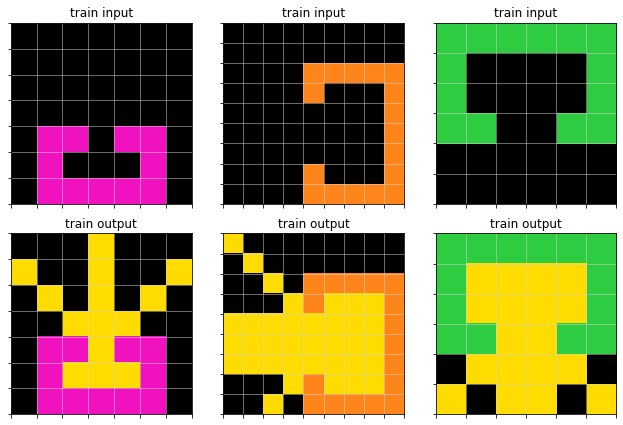

1 objects
[[2 2 2 2]
 [2 0 0 2]
 [2 0 0 0]
 [2 0 0 0]
 [2 0 0 0]
 [2 0 0 0]
 [2 0 0 0]
 [2 0 0 2]
 [2 2 2 2]]
5 objects
[[2 2 2 2]
 [2 0 0 2]
 [2 0 0 0]
 [2 0 0 0]
 [2 0 0 0]
 [2 0 0 0]
 [2 0 0 0]
 [2 0 0 2]
 [2 2 2 2]]
[[4]]
[[4 4 0 4 0 0 0 0]
 [4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4]
 [4 4 0 4 0 0 0 0]]
[[4]]
[[4]]


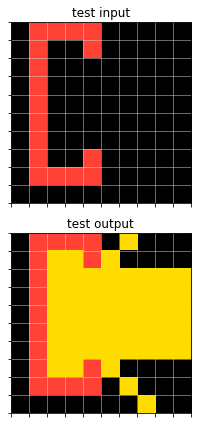

ac0a08a4.json
Icecuber solved? True
['image_resizing', 'count_tiles', 'size_guessing']
2 objects
[[2]]
[[7]]
2 objects
[[2 2]
 [2 2]]
[[7 7]
 [7 7]]
3 objects
[[4]]
[[8]]
[[6]]
3 objects
[[4 4 4]
 [4 4 4]
 [4 4 4]]
[[8 8 8]
 [8 8 8]
 [8 8 8]]
[[6 6 6]
 [6 6 6]
 [6 6 6]]
5 objects
[[6]]
[[9]]
[[3]]
[[2]]
[[7]]
5 objects
[[6 6 6 6 6]
 [6 6 6 6 6]
 [6 6 6 6 6]
 [6 6 6 6 6]
 [6 6 6 6 6]]
[[9 9 9 9 9]
 [9 9 9 9 9]
 [9 9 9 9 9]
 [9 9 9 9 9]
 [9 9 9 9 9]]
[[3 3 3 3 3]
 [3 3 3 3 3]
 [3 3 3 3 3]
 [3 3 3 3 3]
 [3 3 3 3 3]]
[[2 2 2 2 2]
 [2 2 2 2 2]
 [2 2 2 2 2]
 [2 2 2 2 2]
 [2 2 2 2 2]]
[[7 7 7 7 7]
 [7 7 7 7 7]
 [7 7 7 7 7]
 [7 7 7 7 7]
 [7 7 7 7 7]]


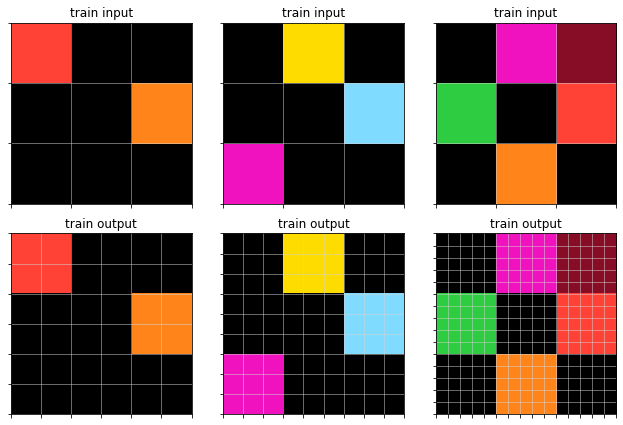

4 objects
[[1]]
[[9]]
[[6]]
[[8]]
4 objects
[[1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]]
[[9 9 9 9]
 [9 9 9 9]
 [9 9 9 9]
 [9 9 9 9]]
[[6 6 6 6]
 [6 6 6 6]
 [6 6 6 6]
 [6 6 6 6]]
[[8 8 8 8]
 [8 8 8 8]
 [8 8 8 8]
 [8 8 8 8]]


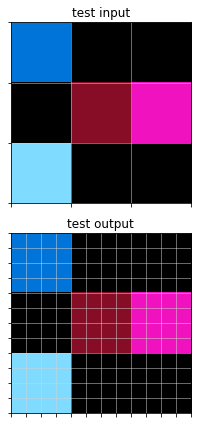

ae3edfdc.json
Icecuber solved? False
['bring_patterns_close', 'gravity']
10 objects
[[3]]
[[3]]
[[2]]
[[3]]
[[7]]
[[3]]
[[7]]
[[1]]
[[7]]
[[7]]
10 objects
[[3]]
[[3]]
[[2]]
[[3]]
[[3]]
[[7]]
[[7]]
[[1]]
[[7]]
[[7]]
8 objects
[[7]]
[[7]]
[[1]]
[[7]]
[[7]]
[[3]]
[[2]]
[[3]]
8 objects
[[7]]
[[7]]
[[1]]
[[7]]
[[7]]
[[3]]
[[2]]
[[3]]
7 objects
[[3]]
[[7]]
[[1]]
[[2]]
[[3]]
[[3]]
[[7]]
7 objects
[[7]]
[[1]]
[[7]]
[[3]]
[[2]]
[[3]]
[[3]]


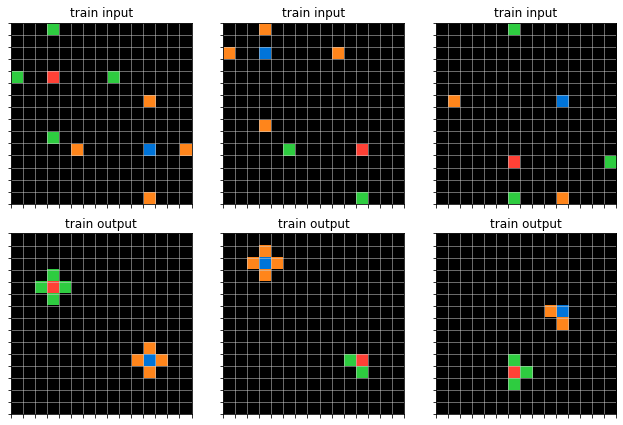

7 objects
[[3]]
[[3]]
[[2]]
[[7]]
[[1]]
[[7]]
[[3]]
7 objects
[[3]]
[[3]]
[[2]]
[[3]]
[[7]]
[[1]]
[[7]]


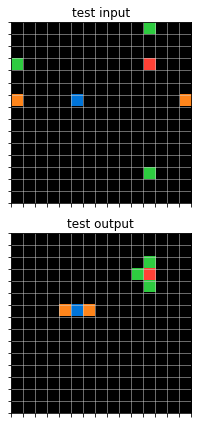

ae4f1146.json
Icecuber solved? True
['separate_images', 'count_tiles', 'crop']
14 objects
[[8 8 8]
 [0 8 8]
 [8 8 8]]
[[1]]
[[8]]
[[0 1]
 [1 1]]
[[0 0 8]
 [0 0 8]
 [8 8 8]]
[[8 8 0]
 [8 8 8]
 [8 0 8]]
[[1]]
[[8]]
[[1]]
[[8]]
[[1]]
[[1]
 [1]]
[[8]
 [8]]
[[1]
 [1]]
6 objects
[[8]]
[[1]]
[[8]]
[[1]
 [1]]
[[8]
 [8]]
[[1]
 [1]]
15 objects
[[8 8 0]
 [8 0 8]
 [8 8 8]]
[[1]]
[[1]]
[[8]]
[[1]]
[[0 0 8]
 [0 8 8]
 [8 8 0]]
[[1]]
[[1]]
[[8]]
[[0 1]
 [1 1]]
[[8]
 [8]]
[[8 8]]
[[1]]
[[8 8 8]
 [8 8 8]
 [0 8 8]]
[[1]]
5 objects
[[8]]
[[0 1]
 [1 1]]
[[8]
 [8]]
[[8 8]]
[[1]]
13 objects
[[8 8 8]
 [8 8 8]
 [0 8 8]]
[[8 8 8]
 [8 8 8]
 [8 8 8]]
[[1]]
[[8]]
[[0 1]
 [1 1]
 [1 0]]
[[8]
 [8]]
[[8 0 0]
 [8 8 0]
 [0 8 8]]
[[1]]
[[8]]
[[1]]
[[8]]
[[1]]
[[1]]
5 objects
[[8]]
[[0 1]
 [1 1]
 [1 0]]
[[8]
 [8]]
[[8]]
[[1]]
18 objects
[[1 1]]
[[8]]
[[8 8]]
[[1]]
[[8]]
[[0 1 1]
 [1 1 1]
 [0 1 0]]
[[1 1]]
[[8]]
[[8]]
[[8]]
[[8 8 8]
 [8 8 0]
 [0 8 8]]
[[1]]
[[8]]
[[1]]
[[0 0 8]
 [0 8 8]
 [8 8 0]]
[[1]]
[[1]]
[[1]]
4 object

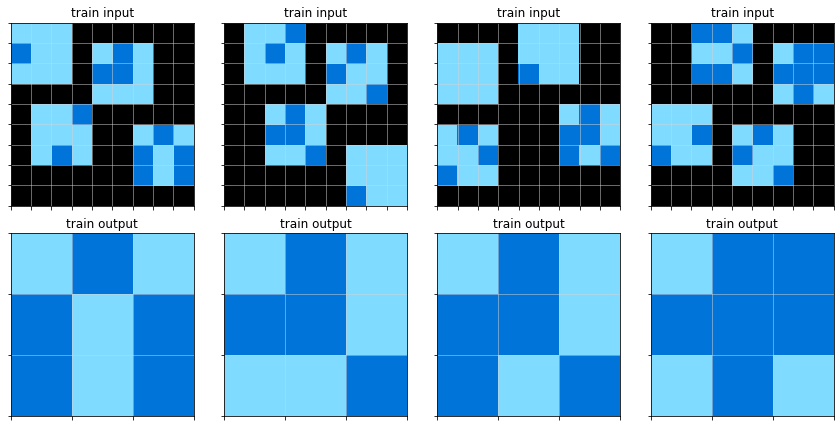

20 objects
[[8 8 8]
 [8 8 8]
 [0 8 8]]
[[8]]
[[1]]
[[8]]
[[1]]
[[8]]
[[1]]
[[1]]
[[8]]
[[1]]
[[8]]
[[8 0 0]
 [8 8 0]
 [0 8 8]]
[[1]]
[[8]]
[[1]]
[[1]]
[[1 1 0]
 [0 1 1]
 [1 1 0]]
[[8]]
[[8]]
[[8]]
4 objects
[[1 1 0]
 [0 1 1]
 [1 1 0]]
[[8]]
[[8]]
[[8]]


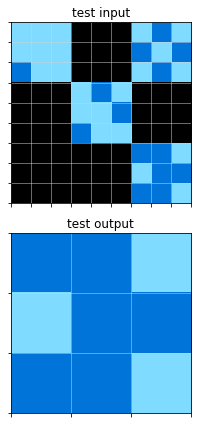

aedd82e4.json
Icecuber solved? False
['recoloring', 'separate_shapes', 'count_tiles', 'take_minimum', 'associate_colors_to_bools']
2 objects
[[2 2]
 [2 2]]
[[2]]
2 objects
[[2 2]
 [2 2]]
[[1]]
3 objects
[[2 2 2]
 [0 2 0]]
[[2]]
[[2]]
3 objects
[[2 2 2]
 [0 2 0]]
[[1]]
[[1]]
3 objects
[[2 2]
 [0 2]
 [2 2]]
[[2]]
[[2 2 2]]
3 objects
[[2 2]
 [0 2]
 [2 2]]
[[1]]
[[2 2 2]]
3 objects
[[2 2]
 [2 0]]
[[2]]
[[2]]
3 objects
[[2 2]
 [2 0]]
[[1]]
[[1]]


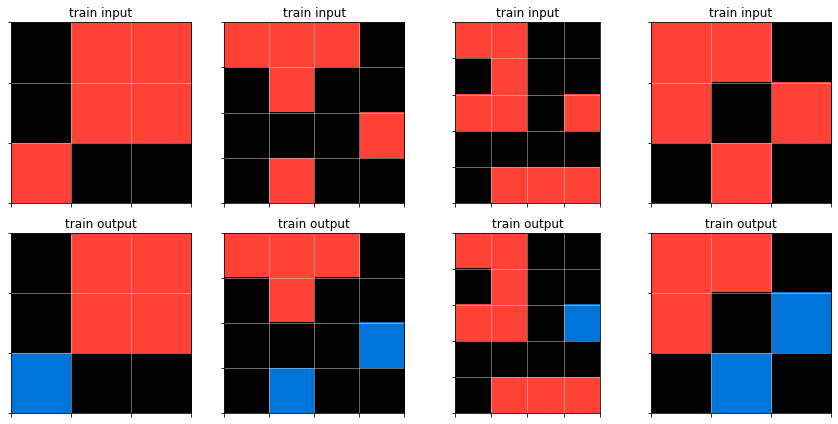

5 objects
[[2 2]
 [0 2]]
[[2]]
[[2]]
[[2]]
[[2 2]]
5 objects
[[2 2]
 [0 2]]
[[1]]
[[1]]
[[1]]
[[2 2]]


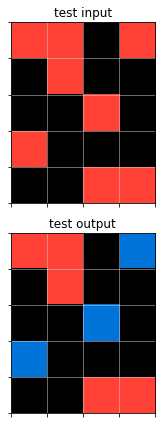

af902bf9.json
Icecuber solved? True
['ex_nihilo', 'x_marks_the_spot']
4 objects
[[4]]
[[4]]
[[4]]
[[4]]
5 objects
[[4]]
[[4]]
[[2]]
[[4]]
[[4]]
4 objects
[[4]]
[[4]]
[[4]]
[[4]]
5 objects
[[4]]
[[4]]
[[2 2 2 2]
 [2 2 2 2]
 [2 2 2 2]
 [2 2 2 2]]
[[4]]
[[4]]
8 objects
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
10 objects
[[4]]
[[4]]
[[2]]
[[4]]
[[4]]
[[4]]
[[4]]
[[2 2 2 2]
 [2 2 2 2]]
[[4]]
[[4]]


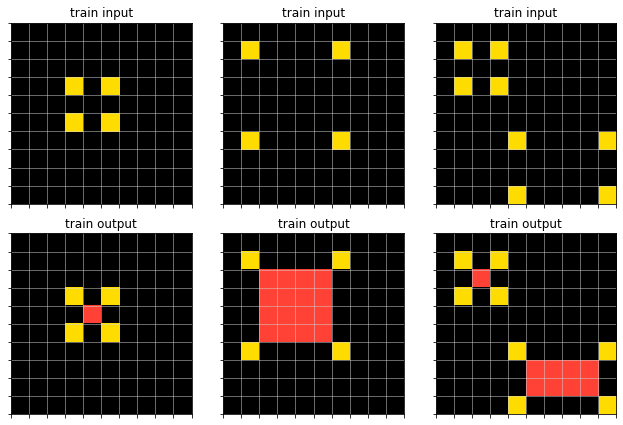

8 objects
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
10 objects
[[4]]
[[4]]
[[2 2 2]
 [2 2 2]
 [2 2 2]]
[[4]]
[[4]]
[[4]]
[[4]]
[[2 2]
 [2 2]]
[[4]]
[[4]]


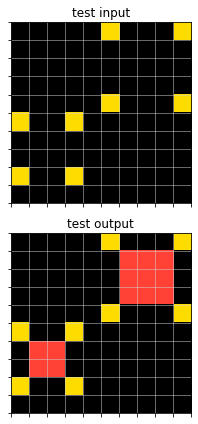

b0c4d837.json
Icecuber solved? False
['measure_length', 'associate_images_to_numbers']
2 objects
[[5 0 0 5]
 [5 0 0 5]
 [5 0 0 5]
 [5 0 0 5]
 [5 5 5 5]]
[[8 8]]
1 objects
[[8 8 8]]
2 objects
[[5 0 0 0 5]
 [5 0 0 0 5]
 [5 0 0 0 5]
 [5 0 0 0 5]
 [5 0 0 0 5]
 [5 0 0 0 5]
 [5 0 0 0 5]
 [5 5 5 5 5]]
[[8 8 8]
 [8 8 8]
 [8 8 8]]
1 objects
[[8 8 8]
 [0 0 8]]
2 objects
[[5 0 0 0 0 0 5]
 [5 0 0 0 0 0 5]
 [5 0 0 0 0 0 5]
 [5 0 0 0 0 0 5]
 [5 0 0 0 0 0 5]
 [5 0 0 0 0 0 5]
 [5 5 5 5 5 5 5]]
[[8 8 8 8 8]
 [8 8 8 8 8]
 [8 8 8 8 8]]
1 objects
[[8 8 8]]
2 objects
[[5 0 0 0 5]
 [5 0 0 0 5]
 [5 0 0 0 5]
 [5 0 0 0 5]
 [5 0 0 0 5]
 [5 0 0 0 5]
 [5 5 5 5 5]]
[[8 8 8]
 [8 8 8]
 [8 8 8]
 [8 8 8]]
1 objects
[[8 8]]
2 objects
[[5 0 0 5]
 [5 0 0 5]
 [5 0 0 5]
 [5 5 5 5]]
[[8 8]
 [8 8]]
1 objects
[[8]]
2 objects
[[5 0 0 0 5]
 [5 0 0 0 5]
 [5 0 0 0 5]
 [5 0 0 0 5]
 [5 5 5 5 5]]
[[8 8 8]
 [8 8 8]]
1 objects
[[8 8]]


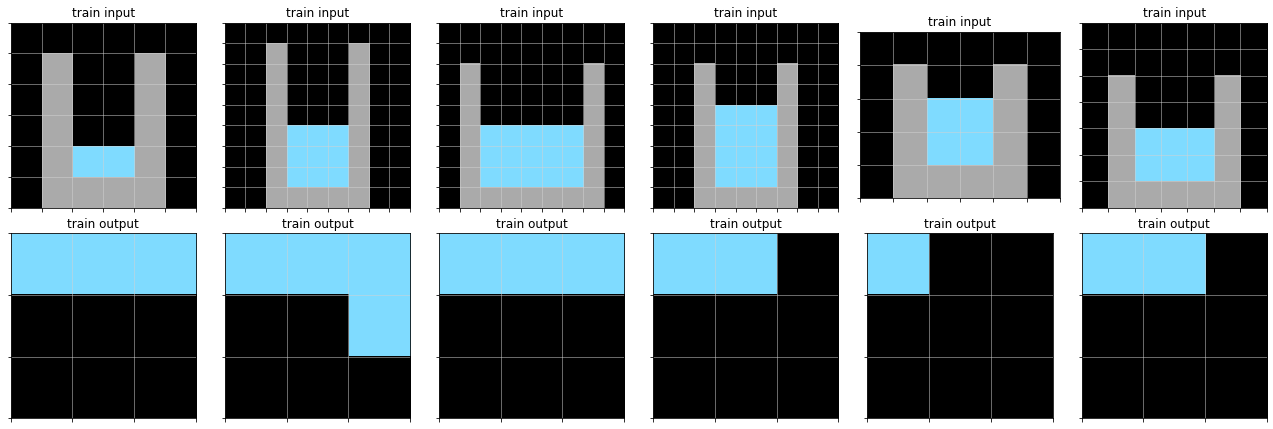

2 objects
[[5 0 0 0 5]
 [5 0 0 0 5]
 [5 0 0 0 5]
 [5 0 0 0 5]
 [5 0 0 0 5]
 [5 0 0 0 5]
 [5 0 0 0 5]
 [5 5 5 5 5]]
[[8 8 8]
 [8 8 8]
 [8 8 8]
 [8 8 8]
 [8 8 8]
 [8 8 8]]
1 objects
[[8]]


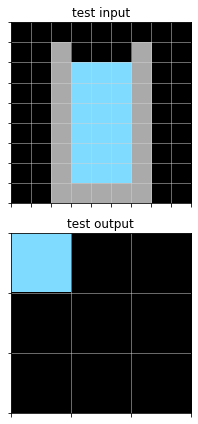

b190f7f5.json
Icecuber solved? False
['separate_images', 'image_expasion', 'color_palette', 'image_resizing', 'replace_pattern']
4 objects
[[2]]
[[4]]
[[0 8 0]
 [8 8 8]
 [0 8 0]]
[[3]]
3 objects
[[0 2 0]
 [2 2 2]
 [0 2 0]]
[[0 4 0]
 [4 4 4]
 [0 4 0]]
[[0 3 0]
 [3 3 3]
 [0 3 0]]
7 objects
[[8]]
[[4]]
[[8 0]
 [8 8]]
[[1]]
[[2]]
[[4]]
[[1]]
10 objects
[[4]]
[[4 0]
 [4 4]]
[[1]]
[[2]]
[[4]]
[[1 0]
 [1 1]]
[[2 0]
 [2 2]]
[[4 0]
 [4 4]]
[[1]]
[[1 0]
 [1 1]]
9 objects
[[2]]
[[4]]
[[0 0 8 0]
 [8 8 8 8]
 [0 0 8 0]
 [0 0 8 0]]
[[2]]
[[4]]
[[4]]
[[2]]
[[4]]
[[2]]
8 objects
[[0 0 2 0]
 [2 2 2 2]
 [0 0 2 0]
 [0 0 2 0]]
[[0 0 4 0]
 [4 4 4 4]
 [0 0 4 0]
 [0 0 4 0]]
[[0 0 2 0]
 [2 2 2 2]
 [0 0 2 0]
 [0 0 2 0]]
[[0 0 4 0]
 [4 4 4 4]
 [0 0 4 0]
 [0 0 4 0]]
[[0 0 4 0]
 [4 4 4 4]
 [0 0 4 0]
 [0 0 4 0]]
[[0 0 2 0]
 [2 2 2 2]
 [0 0 2 0]
 [0 0 2 0]]
[[0 0 4 0]
 [4 4 4 4]
 [0 0 4 0]
 [0 0 4 0]]
[[0 0 2 0]
 [2 2 2 2]
 [0 0 2 0]
 [0 0 2 0]]


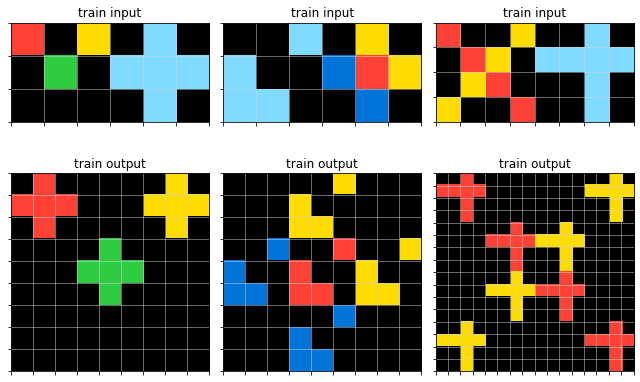

6 objects
[[3]]
[[1]]
[[2 2]
 [2 2]]
[[3]]
[[3]]
[[0 8 8 0]
 [8 8 8 8]
 [8 0 0 8]
 [8 8 8 8]]
5 objects
[[0 3 3 0]
 [3 3 3 3]
 [3 0 0 3]
 [3 3 3 3]]
[[0 1 1 0]
 [1 1 1 1]
 [1 0 0 1]
 [1 1 1 1]]
[[0 2 2 0 0 2 2 0]
 [2 2 2 2 2 2 2 2]
 [2 0 0 2 2 0 0 2]
 [2 2 2 2 2 2 2 2]
 [0 2 2 0 0 2 2 0]
 [2 2 2 2 2 2 2 2]
 [2 0 0 2 2 0 0 2]
 [2 2 2 2 2 2 2 2]]
[[0 3 3 0]
 [3 3 3 3]
 [3 0 0 3]
 [3 3 3 3]]
[[0 3 3 0]
 [3 3 3 3]
 [3 0 0 3]
 [3 3 3 3]]


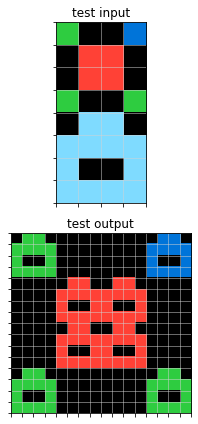

b1948b0a.json
Icecuber solved? True
['recoloring', 'associate_colors_to_colors']
5 objects
[[6 6]
 [6 6]]
[[7 0]
 [7 7]
 [0 7]]
[[6]]
[[7 7]]
[[6]]
5 objects
[[2 2]
 [2 2]]
[[7 0]
 [7 7]
 [0 7]]
[[2]]
[[7 7]]
[[2]]
9 objects
[[7 7 7]
 [0 0 7]]
[[6]
 [6]]
[[6 6]]
[[7 7]
 [7 0]
 [7 0]]
[[6]]
[[0 7]
 [7 7]
 [7 0]]
[[0 6 0]
 [0 6 0]
 [6 6 6]]
[[6]]
[[7]]
9 objects
[[7 7 7]
 [0 0 7]]
[[2]
 [2]]
[[2 2]]
[[7 7]
 [7 0]
 [7 0]]
[[2]]
[[0 7]
 [7 7]
 [7 0]]
[[0 2 0]
 [0 2 0]
 [2 2 2]]
[[2]]
[[7]]
7 objects
[[7 7]
 [0 7]]
[[6 6 6 6]
 [6 0 0 0]]
[[6]]
[[0 7 7 7]
 [7 7 0 7]]
[[7]]
[[6]]
[[6]]
7 objects
[[7 7]
 [0 7]]
[[2 2 2 2]
 [2 0 0 0]]
[[2]]
[[0 7 7 7]
 [7 7 0 7]]
[[7]]
[[2]]
[[2]]


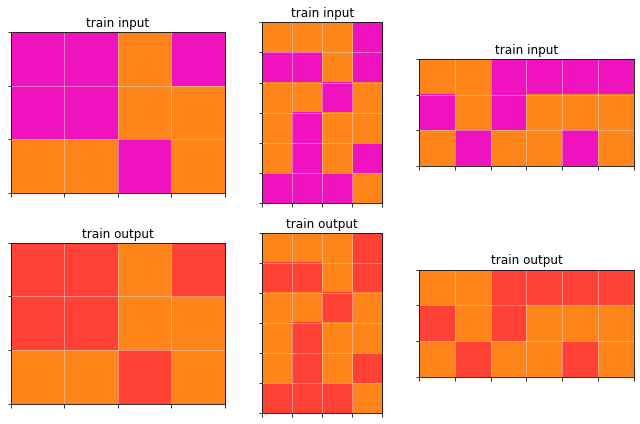

7 objects
[[6]
 [6]]
[[0 7 7]
 [0 7 0]
 [7 7 7]
 [7 0 7]]
[[6]]
[[6]]
[[7]]
[[6]
 [6]]
[[6]]
7 objects
[[2]
 [2]]
[[0 7 7]
 [0 7 0]
 [7 7 7]
 [7 0 7]]
[[2]]
[[2]]
[[7]]
[[2]
 [2]]
[[2]]


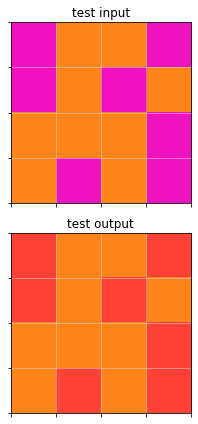

b230c067.json
Icecuber solved? False
['recoloring', 'separate_shapes', 'find_the_intruder', 'associate_colors_to_bools']
3 objects
[[8 8 8]
 [8 0 8]
 [8 8 8]]
[[8 8 8 8]
 [8 0 0 8]
 [8 8 8 8]]
[[8 8 8 8]
 [8 0 0 8]
 [8 8 8 8]]
3 objects
[[2 2 2]
 [2 0 2]
 [2 2 2]]
[[1 1 1 1]
 [1 0 0 1]
 [1 1 1 1]]
[[1 1 1 1]
 [1 0 0 1]
 [1 1 1 1]]
3 objects
[[8 8 8 8]
 [0 0 8 8]
 [0 0 8 8]]
[[8 8 8 8 0]
 [0 0 8 8 0]
 [0 0 8 8 8]]
[[8 8 8 8 0]
 [0 0 8 8 0]
 [0 0 8 8 8]]
3 objects
[[2 2 2 2]
 [0 0 2 2]
 [0 0 2 2]]
[[1 1 1 1 0]
 [0 0 1 1 0]
 [0 0 1 1 1]]
[[1 1 1 1 0]
 [0 0 1 1 0]
 [0 0 1 1 1]]


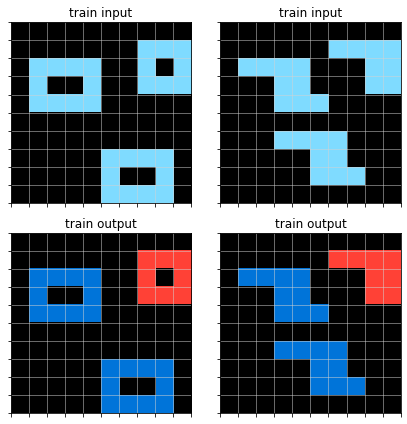

6 objects
[[8 8]
 [0 8]]
[[8 8 8]
 [0 0 8]]
[[8 0 0]
 [8 8 8]]
[[0 8 0 0]
 [8 8 8 8]]
[[8 8 8]
 [0 0 8]]
[[0 8 0 0]
 [8 8 8 8]]
6 objects
[[2 2]
 [0 2]]
[[1 1 1]
 [0 0 1]]
[[2 0 0]
 [2 2 2]]
[[0 1 0 0]
 [1 1 1 1]]
[[1 1 1]
 [0 0 1]]
[[0 1 0 0]
 [1 1 1 1]]


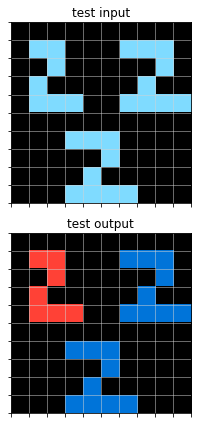

b27ca6d3.json
Icecuber solved? False
['find_the_intruder', 'count_tiles', 'contouring']
9 objects
[[2]]
[[2]
 [2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
10 objects
[[3 3 3]
 [3 0 3]
 [3 0 3]
 [3 3 3]]
[[2]]
[[2]
 [2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
14 objects
[[2 2]]
[[2]
 [2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]
 [2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
16 objects
[[3 0 0 3]
 [3 3 3 3]]
[[2 2]]
[[3 0 3 0]
 [3 0 3 0]
 [3 3 3 0]
 [0 0 3 3]
 [0 0 3 0]
 [0 0 3 0]
 [0 0 3 3]]
[[2]
 [2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]
 [2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]


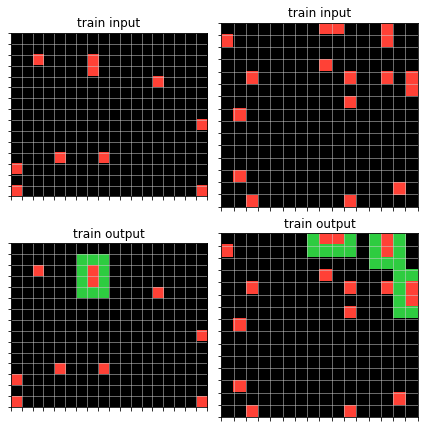

23 objects
[[2]]
[[2]]
[[2]]
[[2]]
[[2 2]]
[[2]]
[[2 2]]
[[2]
 [2]]
[[2]]
[[2]]
[[2]]
[[2]
 [2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2 2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
27 objects
[[2]]
[[2]]
[[3 3 3 3]
 [3 0 0 3]
 [3 3 3 3]]
[[2]]
[[2]]
[[2 2]]
[[2]]
[[3 3 3 3]
 [3 0 0 3]
 [3 3 3 3]]
[[2 2]]
[[3 3 3]
 [3 0 3]
 [3 0 3]
 [3 3 3]]
[[2]
 [2]]
[[2]]
[[2]]
[[2]]
[[0 0 0 3 3 3]
 [0 0 0 3 0 3]
 [3 3 3 3 0 3]
 [3 0 0 3 3 3]
 [3 3 3 3 0 0]]
[[2]
 [2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2 2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]


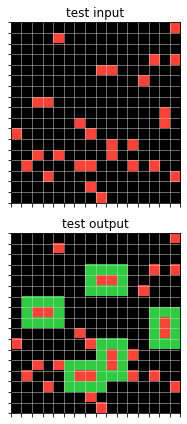

b2862040.json
Icecuber solved? True
['recoloring', 'detect_closed_curves', 'associate_colors_to_bools']
4 objects
[[9 9 9 9 9 9 9 9 9 9 9]
 [9 9 9 9 9 9 9 9 9 9 9]
 [9 0 0 0 9 9 9 0 9 9 9]
 [9 0 0 0 9 9 9 0 9 9 9]
 [9 0 0 0 9 9 0 0 0 0 9]
 [9 0 0 0 9 9 9 0 9 9 9]
 [9 9 9 9 9 9 9 0 9 9 9]
 [9 9 9 9 9 9 9 9 9 9 9]
 [9 9 9 9 9 9 9 9 9 9 9]]
[[1 1 1]
 [1 0 1]
 [1 0 1]
 [1 1 1]]
[[0 1 0 0]
 [0 1 0 0]
 [1 1 1 1]
 [0 1 0 0]
 [0 1 0 0]]
[[9]
 [9]]
4 objects
[[9 9 9 9 9 9 9 9 9 9 9]
 [9 9 9 9 9 9 9 9 9 9 9]
 [9 0 0 0 9 9 9 0 9 9 9]
 [9 0 0 0 9 9 9 0 9 9 9]
 [9 0 0 0 9 9 0 0 0 0 9]
 [9 0 0 0 9 9 9 0 9 9 9]
 [9 9 9 9 9 9 9 0 9 9 9]
 [9 9 9 9 9 9 9 9 9 9 9]
 [9 9 9 9 9 9 9 9 9 9 9]]
[[8 8 8]
 [8 0 8]
 [8 0 8]
 [8 8 8]]
[[0 1 0 0]
 [0 1 0 0]
 [1 1 1 1]
 [0 1 0 0]
 [0 1 0 0]]
[[9]
 [9]]
9 objects
[[9 9 9 9 9 9 9 9 9 9 9]
 [9 0 0 0 0 0 9 9 0 9 9]
 [9 0 0 0 0 0 9 9 0 9 0]
 [9 0 0 0 0 0 9 9 0 0 0]
 [9 9 9 9 9 9 9 9 9 9 9]
 [9 9 9 9 9 9 9 9 9 9 9]
 [9 9 9 0 9 9 9 9 9 9 9]
 [9 9 0 0 0 0 0 9 9 9 9]
 [9 9 

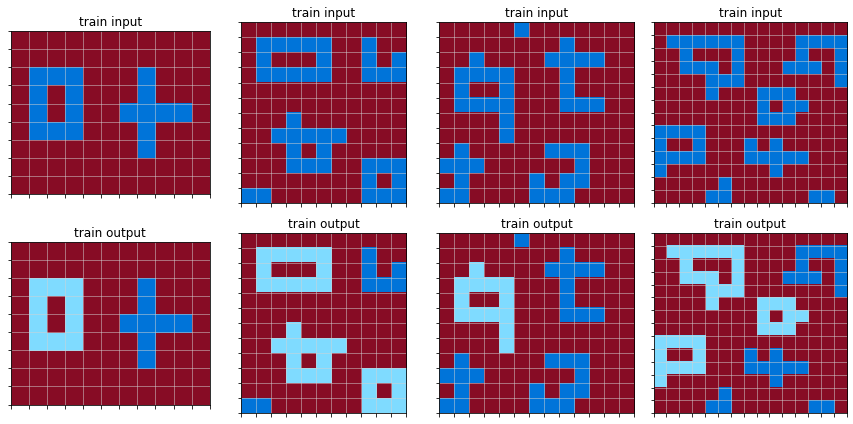

9 objects
[[1 1]]
[[0 0 9 9 9 9 9 9 9 9 9 9 9 9 9]
 [9 9 9 9 9 9 9 9 9 9 9 0 9 9 9]
 [9 9 9 0 0 0 0 0 9 9 9 0 9 9 9]
 [9 9 9 9 0 0 0 0 9 9 9 0 9 9 9]
 [9 9 9 9 0 0 0 0 9 9 9 0 9 9 9]
 [9 9 9 9 0 0 0 0 9 9 9 0 9 9 0]
 [9 9 9 9 9 9 9 0 9 9 9 0 0 0 0]
 [0 0 0 0 9 9 9 0 9 9 9 0 9 9 0]
 [0 9 9 0 9 9 9 9 9 9 9 9 9 9 0]
 [0 9 9 0 9 9 9 9 9 9 9 9 9 0 0]
 [0 0 9 9 9 9 9 9 9 9 9 9 9 9 9]
 [9 9 9 9 9 9 9 9 9 9 9 9 9 9 9]
 [9 9 9 0 0 0 0 0 0 9 9 9 0 0 9]
 [9 9 9 0 0 0 0 0 0 9 9 9 9 0 9]
 [9 9 9 0 0 0 0 0 0 9 9 9 9 0 9]
 [9 9 9 0 0 0 0 0 0 0 9 9 9 0 9]]
[[1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [1 0 0 1]
 [1 1 1 1]
 [1 0 0 1]
 [0 0 0 1]
 [0 0 1 1]]
[[1 1 1 1 1]
 [0 1 0 0 1]
 [0 1 0 0 1]
 [0 1 1 1 1]
 [0 0 0 0 1]
 [0 0 0 0 1]]
[[9 9]
 [9 9]]
[[1 1 1 1]
 [1 0 0 1]
 [1 0 0 1]
 [1 1 0 0]]
[[1 1 1 1 1 1 0]
 [1 0 0 0 0 1 0]
 [1 0 0 0 0 1 0]
 [1 1 1 1 1 1 1]]
[[1 1]
 [0 1]
 [0 1]
 [0 1]]
[[9 9 9 9]
 [9 9 9 9]]
9 objects
[[1 1]]
[[0 0 9 9 9 9 9 9 9 9 9 9 9 9 9]
 [9 9 9 9 9 9 9 9 9 9 9 0 9 9 9]
 [9 9 9 0

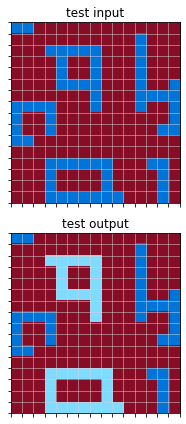

b527c5c6.json
Icecuber solved? False
['pattern_expansion', 'draw_line_from_point', 'contouring', 'direction_guessing', 'size_guessing']
4 objects
[[3 3]
 [3 3]
 [0 3]
 [3 3]
 [3 3]
 [3 3]]
[[2]]
[[3 3 3 3]
 [3 3 0 3]]
[[2]]
4 objects
[[0 0 0 3 3]
 [3 3 3 3 3]
 [0 0 0 0 3]
 [3 3 3 3 3]
 [0 0 0 3 3]
 [0 0 0 3 3]]
[[2 2 2 2]]
[[3 3 3 3]
 [3 3 0 3]
 [0 3 0 3]
 [0 3 0 3]
 [0 3 0 3]
 [0 3 0 3]]
[[2]
 [2]
 [2]
 [2]
 [2]]
4 objects
[[3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]]
[[2]]
[[3 3 3]
 [3 3 3]
 [3 3 3]
 [3 3 3]
 [3 3 3]
 [3 3 0]
 [3 3 3]
 [3 3 3]
 [3 3 3]
 [3 3 3]]
[[2]]
4 objects
[[0 0 0 0 0 0 0 0 0 0 0 0 3 0 3 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 3 0 3 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 3 0 3 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 3 0 3 0 0 0]
 [3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]]
[[2]
 [2]
 [2]
 [2]
 [2]]
[[3 3 3 0 0 0 0 0 0 0 0 0 0]
 [3 3 3 0 0 0 0 0 0 0 0 0 0]
 [3 3 3 0 0 0 0 0 0 0 0 0 0]
 [3 3 3 3 3 3 3 3 3 3 3 3 3]
 [3

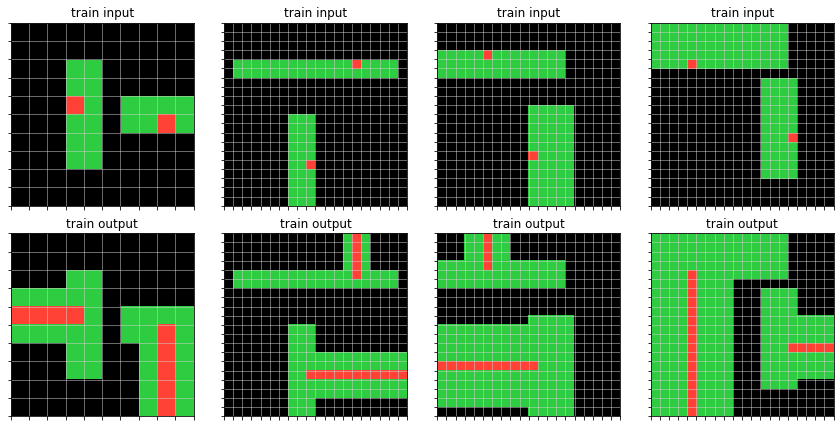

4 objects
[[3 3 3]
 [3 3 3]
 [3 3 3]
 [3 3 3]
 [3 3 3]
 [0 3 3]
 [3 3 3]
 [3 3 3]
 [3 3 3]
 [3 3 3]
 [3 3 3]]
[[2]]
[[3 3 3 3 3 3 0 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3 3 3 3]]
[[2]]
4 objects
[[0 0 0 0 3 3 3]
 [0 0 0 0 3 3 3]
 [0 0 0 0 3 3 3]
 [3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3]
 [0 0 0 0 0 3 3]
 [3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3]
 [0 0 0 0 3 3 3]
 [0 0 0 0 3 3 3]
 [0 0 0 0 3 3 3]]
[[0 3 3 3 3 3 0 3 3 3 3 3 0]
 [0 3 3 3 3 3 0 3 3 3 3 3 0]
 [0 3 3 3 3 3 0 3 3 3 3 3 0]
 [0 3 3 3 3 3 0 3 3 3 3 3 0]
 [0 3 3 3 3 3 0 3 3 3 3 3 0]
 [0 3 3 3 3 3 0 3 3 3 3 3 0]
 [0 3 3 3 3 3 0 3 3 3 3 3 0]
 [0 3 3 3 3 3 0 3 3 3 3 3 0]
 [0 3 3 3 3 3 0 3 3 3 3 3 0]
 [0 3 3 3 3 3 0 3 3 3 3 3 0]
 [0 3 3 3 3 3 0 3 3 3 3 3 0]
 [0 3 3 3 3 3 0 3 3 3 3 3 0]
 [0 3 3 3 3 3 0 3 3 3 3 3 0]
 [0 3 3 3 3 3 0 3 3 3 3 3 0]
 [3 3 3 3 3 3 0 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 

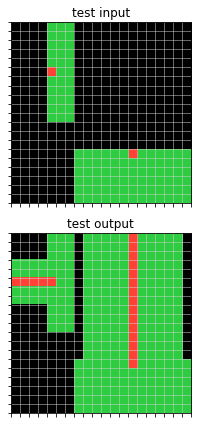

b548a754.json
Icecuber solved? True
['pattern_expansion', 'pattern_modification', 'x_marks_the_spot']
3 objects
[[2 2 2 2]
 [2 0 0 2]
 [2 0 0 2]
 [2 2 2 2]]
[[1 1]
 [1 1]]
[[8]]
2 objects
[[2 2 2 2]
 [2 0 0 2]
 [2 0 0 2]
 [2 0 0 2]
 [2 0 0 2]
 [2 0 0 2]
 [2 0 0 2]
 [2 2 2 2]]
[[1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]]
3 objects
[[3 3 3 3 3]
 [3 0 0 0 3]
 [3 0 0 0 3]
 [3 3 3 3 3]]
[[2 2 2]
 [2 2 2]]
[[8]]
2 objects
[[3 3 3 3 3 3 3 3 3 3]
 [3 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 0 0 3]
 [3 3 3 3 3 3 3 3 3 3]]
[[2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2]]
3 objects
[[1 1 1]
 [1 0 1]
 [1 0 1]
 [1 0 1]
 [1 1 1]]
[[6]
 [6]
 [6]]
[[8]]
2 objects
[[1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1]]
[[6 6 6 6 6 6 6]
 [6 6 6 6 6 6 6]
 [6 6 6 6 6 6 6]]


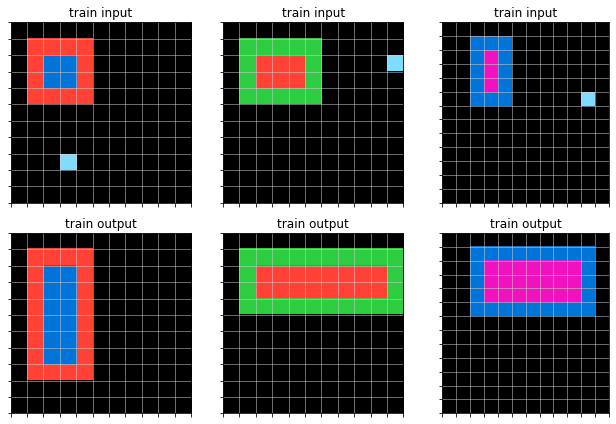

3 objects
[[8]]
[[6 6 6 6 6]
 [6 0 0 0 6]
 [6 0 0 0 6]
 [6 6 6 6 6]]
[[4 4 4]
 [4 4 4]]
2 objects
[[6 6 6 6 6]
 [6 0 0 0 6]
 [6 0 0 0 6]
 [6 0 0 0 6]
 [6 0 0 0 6]
 [6 0 0 0 6]
 [6 0 0 0 6]
 [6 0 0 0 6]
 [6 0 0 0 6]
 [6 0 0 0 6]
 [6 0 0 0 6]
 [6 6 6 6 6]]
[[4 4 4]
 [4 4 4]
 [4 4 4]
 [4 4 4]
 [4 4 4]
 [4 4 4]
 [4 4 4]
 [4 4 4]
 [4 4 4]
 [4 4 4]]


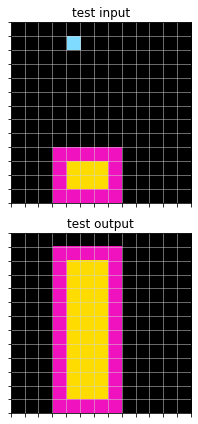

b60334d2.json
Icecuber solved? False
['replace_pattern']
3 objects
[[5]]
[[5]]
[[5]]
24 objects
[[5]]
[[1]]
[[5]]
[[1]]
[[1]]
[[5]]
[[1]]
[[5]]
[[5]]
[[1]]
[[5]]
[[1]]
[[1]]
[[5]]
[[1]]
[[5]]
[[5]]
[[1]]
[[5]]
[[1]]
[[1]]
[[5]]
[[1]]
[[5]]
4 objects
[[5]]
[[5]]
[[5]]
[[5]]
32 objects
[[5]]
[[1]]
[[5]]
[[5]]
[[1]]
[[5]]
[[1]]
[[1]]
[[1]]
[[1]]
[[5]]
[[1]]
[[5]]
[[5]]
[[1]]
[[5]]
[[5]]
[[1]]
[[5]]
[[1]]
[[1]]
[[5]]
[[1]]
[[5]]
[[5]]
[[1]]
[[5]]
[[1]]
[[1]]
[[5]]
[[1]]
[[5]]


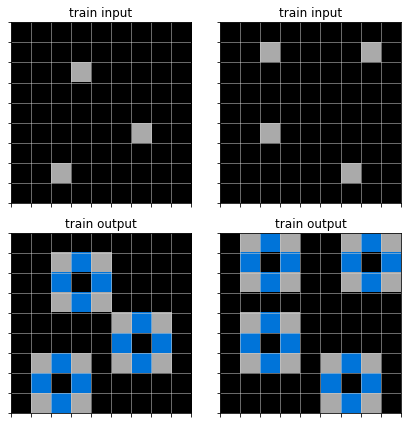

4 objects
[[5]]
[[5]]
[[5]]
[[5]]
30 objects
[[5]]
[[1]]
[[5]]
[[1]]
[[1]]
[[5]]
[[1]]
[[5 5]]
[[1]]
[[5]]
[[1]]
[[1]]
[[5]]
[[1]]
[[5 5]]
[[1]]
[[5]]
[[1]]
[[1]]
[[5]]
[[1]]
[[5]]
[[5]]
[[1]]
[[5]]
[[1]]
[[1]]
[[5]]
[[1]]
[[5]]


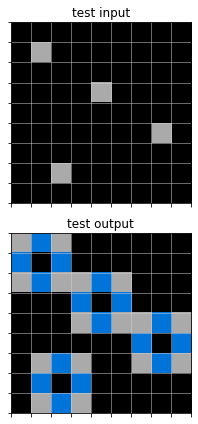

b6afb2da.json
Icecuber solved? True
['recoloring', 'replace_pattern', 'rectangle_guessing']
2 objects
[[5 5 5 5]
 [5 5 5 5]
 [5 5 5 5]
 [5 5 5 5]]
[[5 5 5 5]
 [5 5 5 5]
 [5 5 5 5]
 [5 5 5 5]
 [5 5 5 5]]
18 objects
[[1]]
[[4 4]]
[[1]]
[[4]
 [4]]
[[2 2]
 [2 2]]
[[4]
 [4]]
[[1]]
[[4 4]]
[[1]]
[[1]]
[[4 4]]
[[1]]
[[4]
 [4]
 [4]]
[[2 2]
 [2 2]
 [2 2]]
[[4]
 [4]
 [4]]
[[1]]
[[4 4]]
[[1]]
2 objects
[[5 5 5 5 5 5]
 [5 5 5 5 5 5]
 [5 5 5 5 5 5]
 [5 5 5 5 5 5]
 [5 5 5 5 5 5]]
[[5 5 5 5 5 5]
 [5 5 5 5 5 5]
 [5 5 5 5 5 5]
 [5 5 5 5 5 5]]
18 objects
[[1]]
[[4 4 4 4]]
[[1]]
[[4]
 [4]
 [4]]
[[2 2 2 2]
 [2 2 2 2]
 [2 2 2 2]]
[[4]
 [4]
 [4]]
[[1]]
[[4 4 4 4]]
[[1]]
[[1]]
[[4 4 4 4]]
[[1]]
[[4]
 [4]]
[[2 2 2 2]
 [2 2 2 2]]
[[4]
 [4]]
[[1]]
[[4 4 4 4]]
[[1]]


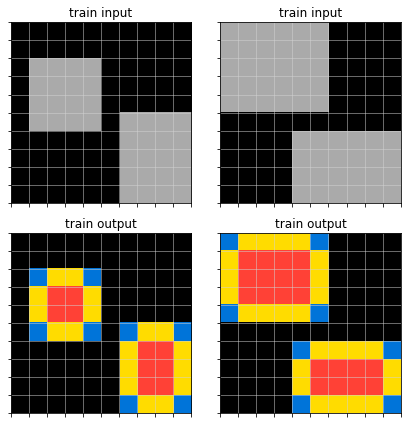

2 objects
[[5 5 5 5]
 [5 5 5 5]
 [5 5 5 5]
 [5 5 5 5]
 [5 5 5 5]
 [5 5 5 5]]
[[5 5 5 5 5 5]
 [5 5 5 5 5 5]
 [5 5 5 5 5 5]]
18 objects
[[1]]
[[4 4]]
[[1]]
[[4]
 [4]
 [4]
 [4]]
[[2 2]
 [2 2]
 [2 2]
 [2 2]]
[[4]
 [4]
 [4]
 [4]]
[[1]]
[[4 4]]
[[1]]
[[1]]
[[4 4 4 4]]
[[1]]
[[4]]
[[2 2 2 2]]
[[4]]
[[1]]
[[4 4 4 4]]
[[1]]


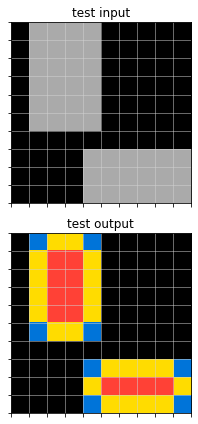

b7249182.json
Icecuber solved? False
['pattern_expansion']
2 objects
[[2]]
[[8]]
2 objects
[[0 0 2 0 0]
 [0 0 2 0 0]
 [0 0 2 0 0]
 [2 2 2 2 2]
 [2 0 0 0 2]]
[[8 0 0 0 8]
 [8 8 8 8 8]
 [0 0 8 0 0]
 [0 0 8 0 0]
 [0 0 8 0 0]]
2 objects
[[3]]
[[1]]
2 objects
[[0 0 0 0 3 3]
 [0 0 0 0 3 0]
 [3 3 3 3 3 0]
 [0 0 0 0 3 0]
 [0 0 0 0 3 3]]
[[1 1 0 0 0 0]
 [0 1 0 0 0 0]
 [0 1 1 1 1 1]
 [0 1 0 0 0 0]
 [1 1 0 0 0 0]]
2 objects
[[5]]
[[8]]
2 objects
[[0 0 0 0 0 5 5]
 [0 0 0 0 0 5 0]
 [5 5 5 5 5 5 0]
 [0 0 0 0 0 5 0]
 [0 0 0 0 0 5 5]]
[[8 8 0 0 0 0 0]
 [0 8 0 0 0 0 0]
 [0 8 8 8 8 8 8]
 [0 8 0 0 0 0 0]
 [8 8 0 0 0 0 0]]


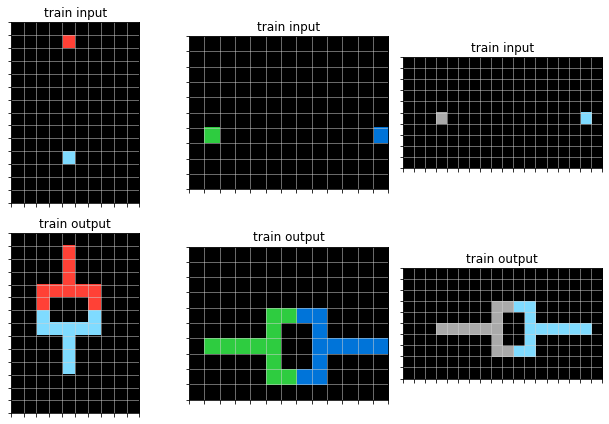

2 objects
[[7]]
[[6]]
2 objects
[[0 0 7 0 0]
 [0 0 7 0 0]
 [0 0 7 0 0]
 [0 0 7 0 0]
 [0 0 7 0 0]
 [0 0 7 0 0]
 [7 7 7 7 7]
 [7 0 0 0 7]]
[[6 0 0 0 6]
 [6 6 6 6 6]
 [0 0 6 0 0]
 [0 0 6 0 0]
 [0 0 6 0 0]
 [0 0 6 0 0]
 [0 0 6 0 0]
 [0 0 6 0 0]]


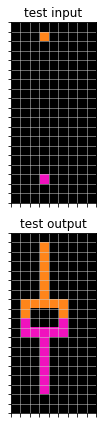

b775ac94.json
Icecuber solved? False
['pattern_expansion', 'pattern_repetition', 'recoloring', 'pattern_rotation', 'pattern_reflection', 'direction_guessing', 'pattern_juxtaposition']
15 objects
[[2]]
[[1]]
[[7 7]
 [7 0]]
[[4]]
[[3]]
[[4]]
[[0 1 1 1]
 [1 1 0 1]
 [0 0 0 1]]
[[2]]
[[7]]
[[7]]
[[1]]
[[8]]
[[2]]
[[3]]
[[3 3]
 [3 0]]
26 objects
[[2]]
[[2]]
[[1]]
[[1]]
[[3]]
[[4]]
[[2 0]
 [2 2]]
[[0 1]
 [1 1]]
[[0 0 0 3]
 [3 3 0 3]
 [0 3 3 3]]
[[4 0 0 0]
 [4 0 4 4]
 [4 4 4 0]]
[[7 7]
 [7 0]]
[[4 4]
 [0 4]]
[[0 1 1 1]
 [1 1 0 1]
 [0 0 0 1]]
[[2 2 2 0]
 [2 0 2 2]
 [2 0 0 0]]
[[7]]
[[7]]
[[4]]
[[4]]
[[1]]
[[2]]
[[0 8]
 [8 8]]
[[8]]
[[2]]
[[3]]
[[2 2]
 [0 2]]
[[3 3]
 [3 0]]
4 objects
[[0 2 0 2 0]
 [2 2 2 2 2]
 [0 0 0 2 2]]
[[8]]
[[4]]
[[3]]
4 objects
[[0 2 0 2 0]
 [2 2 2 2 2]
 [0 0 0 2 2]]
[[0 8 0 8 0]
 [8 8 8 8 8]
 [8 8 0 0 0]]
[[0 0 0 4 4]
 [4 4 4 4 4]
 [0 4 0 4 0]]
[[3 3 0 0 0]
 [3 3 3 3 3]
 [0 3 0 3 0]]
7 objects
[[8 8]
 [8 8]]
[[8]]
[[4]]
[[6]]
[[1]]
[[0 0 0 2]
 [2 2 2 2]
 [0 0 2 0]]
[[4]]


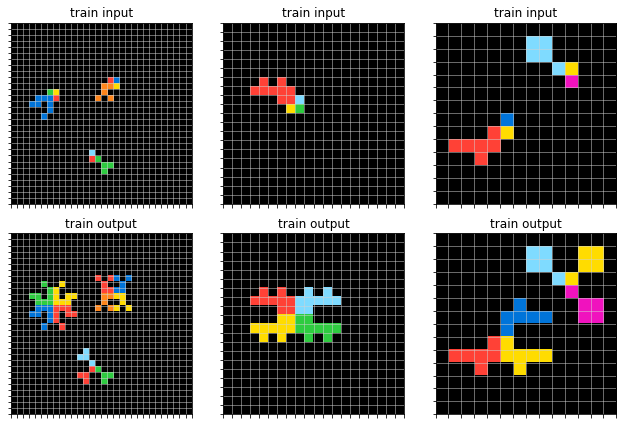

12 objects
[[0 8 0]
 [8 8 8]
 [0 8 0]]
[[0 8]
 [8 8]]
[[2]]
[[3]]
[[2]]
[[4]]
[[3]]
[[1 1 1]
 [0 1 0]]
[[8]]
[[1]]
[[0 0 2]
 [2 2 2]
 [2 0 0]]
[[4]]
15 objects
[[0 8 0]
 [8 8 8]
 [0 8 0]]
[[0 2 0]
 [2 2 2]
 [0 2 0]]
[[0 8]
 [8 8]]
[[2 0]
 [2 2]]
[[0 3 0]
 [3 3 3]]
[[0 2 0]
 [2 2 2]]
[[4 4]
 [0 4]]
[[3 3]
 [3 0]]
[[1 1 1]
 [0 1 0]]
[[8 8 8]
 [0 8 0]]
[[0 4 0]
 [4 4 4]
 [0 4 0]]
[[0 3 0]
 [3 3 3]
 [0 3 0]]
[[1 0 0]
 [1 1 1]
 [0 0 1]]
[[0 0 2]
 [2 2 2]
 [2 0 0]]
[[4 0 0]
 [4 4 4]
 [0 0 4]]


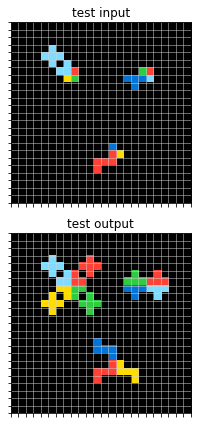

b782dc8a.json
Icecuber solved? True
['pattern_expansion', 'maze']
10 objects
[[8]]
[[8 8 8 8 8 8 0 8 8 8 0]
 [0 0 0 0 0 8 0 0 0 8 0]
 [0 0 0 0 0 8 8 8 0 8 0]
 [0 0 0 0 0 0 0 8 0 8 0]
 [0 0 0 0 0 8 8 8 0 8 8]
 [0 0 0 0 0 8 0 0 0 0 8]
 [0 0 0 0 0 8 8 8 8 8 8]]
[[0 0 0 0 0 0 0 0 8 8 0 8 8 8]
 [0 0 0 0 0 0 0 0 8 0 0 8 0 8]
 [0 0 0 0 0 0 0 0 8 8 8 8 0 8]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 8]
 [0 0 0 0 0 0 0 0 0 8 8 8 8 8]
 [0 0 0 0 0 0 0 0 0 8 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 8 8 8 8 8]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 8]
 [0 0 8 8 8 8 8 8 0 8 8 8 0 8]
 [0 0 8 0 0 0 0 8 0 8 0 8 0 8]
 [8 8 8 0 0 0 0 8 8 8 0 8 8 8]]
[[0 0 8 8 8 0 0 0 0 0]
 [8 8 8 0 8 0 8 8 8 8]
 [8 0 0 0 8 0 8 0 0 8]
 [8 0 8 8 8 0 8 8 0 8]
 [8 0 8 0 0 0 0 8 0 8]
 [8 0 8 8 8 8 8 8 0 8]
 [8 0 0 0 0 0 0 0 0 8]
 [8 8 0 8 8 8 0 8 8 8]
 [0 8 0 8 0 8 0 8 0 0]
 [0 8 8 8 0 8 8 8 0 0]]
[[3]]
[[3]]
[[2]]
[[3]]
[[3]]
[[8 8]]
67 objects
[[8]]
[[3]]
[[2]]
[[3]]
[[2]]
[[3]]
[[8 8 8 8 8 8 0 8 8 8 0]
 [0 0 0 0 0 8 0 0 0 8 0]
 [0 0 0 0 0 8 8 8 0 8 0]
 [0 0 0 

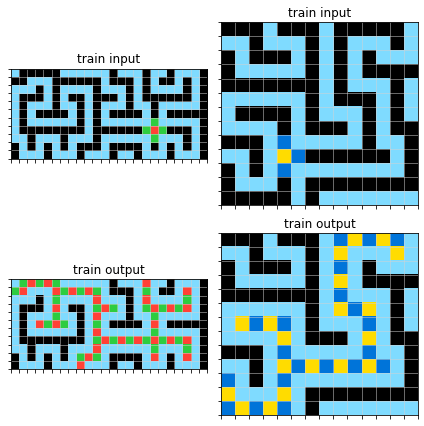

10 objects
[[8 8 0 0 0 0 0 0 0]
 [0 8 0 0 0 0 0 0 0]
 [0 8 0 0 0 0 0 0 0]
 [0 8 8 8 8 8 8 0 0]
 [0 0 0 0 0 0 8 0 0]
 [8 8 8 8 8 0 8 8 8]
 [0 0 0 0 8 0 0 0 8]
 [0 0 0 0 8 8 8 0 8]
 [0 0 0 0 0 0 8 0 8]
 [0 0 0 0 0 0 8 8 8]]
[[8 0 0 8]
 [8 8 8 8]]
[[4]]
[[0 0 8 8 8 8 8 8 8]
 [0 0 8 0 0 0 0 0 8]
 [0 0 8 8 8 0 8 8 8]
 [0 0 0 0 8 0 8 0 0]
 [0 0 0 0 8 0 8 0 8]
 [0 0 0 0 8 0 8 0 8]
 [0 0 0 0 8 0 8 8 8]
 [0 0 0 0 8 0 0 0 0]
 [0 0 0 0 8 8 8 0 0]
 [0 0 0 0 0 0 8 0 0]
 [8 8 8 8 8 8 8 0 0]
 [8 0 0 0 0 0 0 0 0]
 [8 0 0 0 0 0 0 0 0]
 [8 0 0 0 0 0 0 0 0]]
[[4]]
[[3]]
[[4]]
[[8 8 8 0 0]
 [0 0 8 0 0]
 [8 0 8 8 8]
 [8 0 0 0 8]
 [8 8 8 0 8]
 [0 0 8 0 8]
 [0 0 8 8 8]]
[[0 0 0 0 0 0 8]
 [0 0 0 0 0 0 8]
 [0 0 0 0 0 0 8]
 [0 0 0 0 0 0 8]
 [8 8 8 8 8 8 8]
 [8 0 0 0 0 0 0]]
[[8]
 [8]]
59 objects
[[8 8 0 0 0 0 0 0 0]
 [0 8 0 0 0 0 0 0 0]
 [0 8 0 0 0 0 0 0 0]
 [0 8 8 8 8 8 8 0 0]
 [0 0 0 0 0 0 8 0 0]
 [8 8 8 8 8 0 8 8 8]
 [0 0 0 0 8 0 0 0 8]
 [0 0 0 0 8 8 8 0 8]
 [0 0 0 0 0 0 8 0 8]
 [0 0 0 0 0 0 8 8 8]]
[[4]]
[[

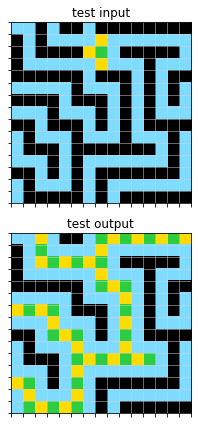

b8825c91.json
Icecuber solved? True
['pattern_completion', 'pattern_rotation', 'pattern_reflection']
119 objects
[[9 9]
 [9 0]]
[[6]]
[[0 5]
 [5 5]]
[[9]]
[[6]]
[[7 7 7 7]
 [7 0 0 7]]
[[6]]
[[9]]
[[5 0]
 [5 5]]
[[6]]
[[9 9]
 [0 9]]
[[1]]
[[6]]
[[1]]
[[9 9]]
[[1]]
[[6]]
[[1]]
[[6]]
[[0 5]
 [5 5]]
[[1]]
[[9]]
[[7 7]
 [7 0]]
[[3 3 3 3]
 [3 3 3 3]]
[[7 7]
 [0 7]]
[[9]]
[[1]]
[[5 0]
 [5 5]]
[[6]]
[[9]]
[[3]]
[[9]]
[[9]]
[[3]]
[[9]]
[[9]]
[[6]]
[[7 7]
 [7 0]]
[[3]]
[[8]]
[[9]]
[[0 1 1 0]
 [1 1 1 1]]
[[9]]
[[8]]
[[3]]
[[7 7]]
[[6]]
[[9]]
[[6]]
[[1]]
[[9]]
[[8]]
[[3]]
[[4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]]
[[1]]
[[6]]
[[7 7]
 [7 0]
 [7 0]
 [7 7]]
[[3 3]
 [3 3]
 [3 3]
 [3 3]]
[[9]]
[[0 1]
 [1 1]
 [1 1]
 [0 1]]
[[6 6 6 6]
 [6 0 0 6]
 [6 0 0 6]
 [6 6 6 6]]
[[7 7]
 [0 7]
 [0 7]
 [7 7]]
[[9]
 [9]]
[[1 1]
 [1 1]]
[[9]
 [9]]
[[1 1]
 [1 0]]
[[3 3]
 [3 3]]
[[9]]
[[9]]
[[6]]
[[1]]
[[7 0]
 [7 7]]
[[9]]
[[8]]
[[3]]
[[1 1 1 1]
 [0 1 1 0]]
[[4 4 4]
 [4 4 4]
 [4 4 4]
 [4 4 4]]
[[7]
 [7]]
[[1]]
[[6]]
[[9]]
[[6]]
[

102 objects
[[2 2]
 [2 0]]
[[7]]
[[6]]
[[8]]
[[9 9]]
[[0 1 1 0]
 [1 1 1 1]]
[[9 9]]
[[8]]
[[6]]
[[7]]
[[2 2]
 [0 2]]
[[1]]
[[6]]
[[2]]
[[9]
 [9]]
[[5]]
[[5]]
[[9]
 [9]]
[[2]]
[[6]]
[[1]]
[[7]]
[[6]]
[[3 3]
 [3 0]]
[[0 0 0 1]
 [0 0 1 1]
 [0 1 1 0]
 [1 1 0 0]]
[[6 6 6 6]
 [6 6 6 6]]
[[1 0 0 0]
 [1 1 0 0]
 [0 1 1 0]
 [0 0 1 1]]
[[3 3]
 [0 3]]
[[6]]
[[7]]
[[6]]
[[2]]
[[8]]
[[8]]
[[2]]
[[6]]
[[8]]
[[9 9]]
[[0 7]
 [7 7]]
[[1 1 1 1]
 [1 0 0 1]]
[[7 0]
 [7 7]]
[[9 9]]
[[8]]
[[9]
 [9]]
[[5]]
[[0 0 3 3 0 0]
 [0 3 3 3 3 0]
 [3 3 0 0 3 3]
 [3 3 0 0 3 3]
 [0 3 3 3 3 0]
 [0 0 3 3 0 0]]
[[5]]
[[9]
 [9]]
[[0 1]
 [1 1]
 [1 1]
 [0 1]]
[[6 6]
 [6 6]
 [6 6]
 [6 6]]
[[1 1]
 [1 0]
 [1 0]
 [1 1]]
[[1 1]
 [0 1]
 [0 1]
 [1 1]]
[[6 6]
 [6 6]
 [6 6]
 [6 6]]
[[1 0]
 [1 1]
 [1 1]
 [1 0]]
[[2 2]
 [2 2]]
[[9]
 [9]]
[[9]
 [9]]
[[5]]
[[1 1 0 0]
 [0 1 1 0]
 [0 0 1 1]
 [0 0 0 1]]
[[7 7]
 [0 7]]
[[1 0 0 1]
 [1 1 1 1]]
[[7 7]
 [7 0]]
[[0 0 1 1]
 [0 1 1 0]
 [1 1 0 0]
 [1 0 0 0]]
[[5]]
[[8]]
[[9 9]]
[[9 9]]
[[8]]
[[6]]
[[2]

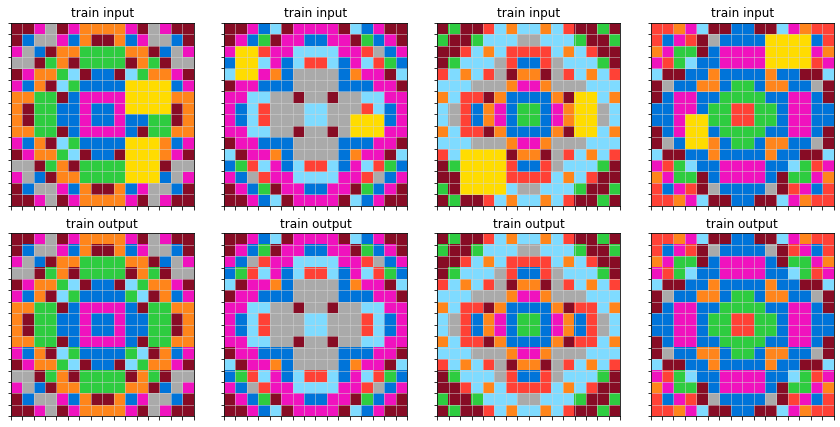

95 objects
[[7 7]
 [7 0]]
[[8]]
[[1]]
[[9]]
[[0 0 8]
 [8 8 8]]
[[2]]
[[0 6 6 0 0 0]
 [6 6 6 6 0 0]
 [0 0 0 6 6 0]
 [0 0 0 0 6 6]]
[[2]]
[[8 0 0]
 [8 8 8]]
[[9]]
[[1]]
[[8]]
[[7 7]
 [0 7]]
[[1 1]
 [1 0]]
[[1 1]
 [0 1]]
[[8]]
[[6]]
[[9]]
[[2]]
[[0 6]
 [6 6]]
[[4 4 4]
 [4 4 4]
 [4 4 4]]
[[2]]
[[9]]
[[6]]
[[8]]
[[1]]
[[0 8]
 [0 8]
 [8 8]]
[[9]]
[[1]]
[[1]]
[[1]]
[[9]]
[[8 0]
 [8 0]
 [8 8]]
[[1]]
[[9]]
[[2]]
[[0 0 0 6]
 [0 0 6 6]
 [0 6 6 0]
 [6 6 0 0]
 [6 6 0 0]
 [0 6 6 0]
 [0 0 6 6]
 [0 0 0 6]]
[[8]]
[[0 7]
 [7 7]]
[[6]
 [6]]
[[4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]]
[[9]]
[[6]]
[[0 0 5 5 0 0]
 [0 5 5 5 5 0]
 [5 5 0 0 5 0]
 [5 5 0 0 5 5]
 [0 5 5 5 5 0]
 [0 0 5 5 0 0]]
[[2]]
[[0 1]
 [1 1]
 [1 1]
 [0 1]]
[[6 6]
 [6 0]
 [6 0]
 [6 6]]
[[0 0 6 0]
 [0 0 6 6]
 [0 0 6 6]
 [0 6 6 0]
 [6 6 0 0]
 [6 0 0 0]]
[[2]]
[[7 7]
 [7 7]]
[[0 6]
 [6 6]]
[[1 1]
 [1 0]]
[[2]]
[[2]]
[[8 8]
 [0 8]
 [0 8]]
[[7 7]
 [0 7]]
[[6 0 0 6]
 [6 6 6 6]]
[[7 7]
 [7 0]]
[[8 8]
 [8 0]
 [8 0]]
[[9]]
[[2]]
[[8]]
[[8]]
[[2]]
[[9

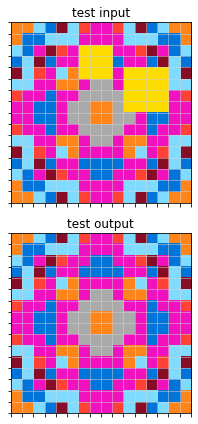

b8cdaf2b.json
Icecuber solved? False
['pattern_expansion', 'draw_line_from_point', 'diagonals', 'pairwise_analogy']
4 objects
[[2]]
[[2]]
[[4]]
[[2]]
6 objects
[[4]]
[[4]]
[[2]]
[[2]]
[[4]]
[[2]]
4 objects
[[8]]
[[8 8]]
[[3]]
[[8 8]]
8 objects
[[3]]
[[3]]
[[3]]
[[3]]
[[8]]
[[8 8]]
[[3]]
[[8 8]]
4 objects
[[6 6 6]]
[[6]]
[[1 1 1]]
[[6]]
6 objects
[[1]]
[[1]]
[[6 6 6]]
[[6]]
[[1 1 1]]
[[6]]
4 objects
[[2 2 2]]
[[2 2]]
[[4 4 4]]
[[2 2]]
8 objects
[[4]]
[[4]]
[[4]]
[[4]]
[[2 2 2]]
[[2 2]]
[[4 4 4]]
[[2 2]]


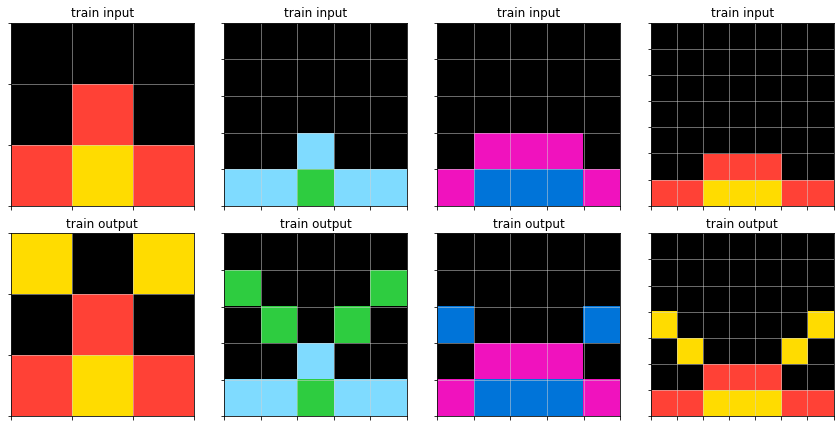

4 objects
[[8 8 8]]
[[8 8 8]]
[[2 2 2]]
[[8 8 8]]
10 objects
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[8 8 8]]
[[8 8 8]]
[[2 2 2]]
[[8 8 8]]


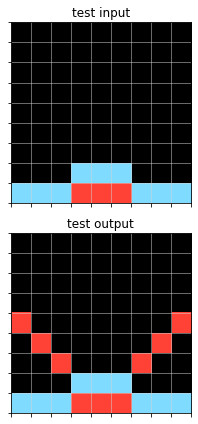

b91ae062.json
Icecuber solved? True
['image_resizing', 'size_guessing', 'count_different_colors']
3 objects
[[6]]
[[7]]
[[6 6]]
3 objects
[[6 6]
 [6 6]]
[[7 7]
 [7 7]]
[[6 6 6 6]
 [6 6 6 6]]
4 objects
[[1]]
[[4]]
[[4]]
[[1]]
4 objects
[[1 1]
 [1 1]]
[[4 4]
 [4 4]]
[[4 4]
 [4 4]]
[[1 1]
 [1 1]]
4 objects
[[3]]
[[2]]
[[7]]
[[3]]
4 objects
[[3 3 3]
 [3 3 3]
 [3 3 3]]
[[2 2 2]
 [2 2 2]
 [2 2 2]]
[[7 7 7]
 [7 7 7]
 [7 7 7]]
[[3 3 3]
 [3 3 3]
 [3 3 3]]
4 objects
[[8]]
[[6 6]]
[[9]]
[[8]]
4 objects
[[8 8 8]
 [8 8 8]
 [8 8 8]]
[[6 6 6 6 6 6]
 [6 6 6 6 6 6]
 [6 6 6 6 6 6]]
[[9 9 9]
 [9 9 9]
 [9 9 9]]
[[8 8 8]
 [8 8 8]
 [8 8 8]]
4 objects
[[4]]
[[3]]
[[2 2]]
[[8]]
4 objects
[[4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]]
[[3 3 3 3]
 [3 3 3 3]
 [3 3 3 3]
 [3 3 3 3]]
[[2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2]]
[[8 8 8 8]
 [8 8 8 8]
 [8 8 8 8]
 [8 8 8 8]]


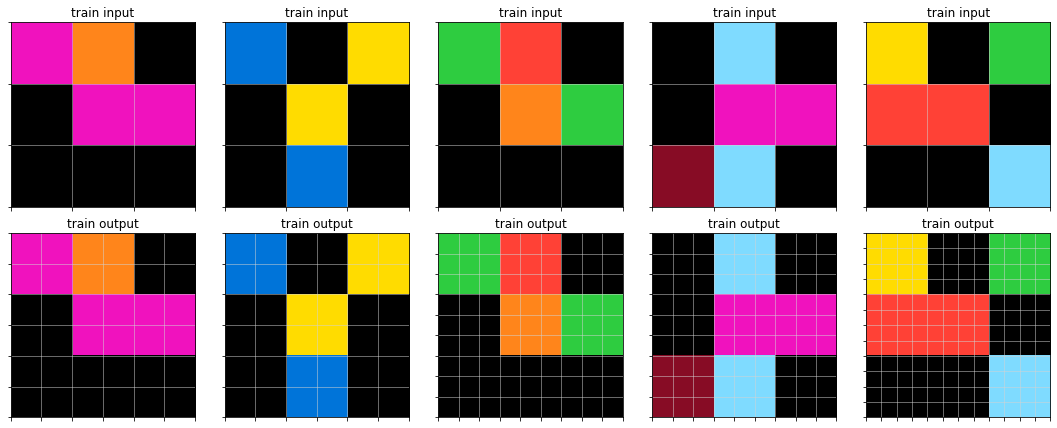

4 objects
[[1]]
[[8]]
[[7]]
[[9 9]]
4 objects
[[1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]]
[[8 8 8 8]
 [8 8 8 8]
 [8 8 8 8]
 [8 8 8 8]]
[[7 7 7 7]
 [7 7 7 7]
 [7 7 7 7]
 [7 7 7 7]]
[[9 9 9 9 9 9 9 9]
 [9 9 9 9 9 9 9 9]
 [9 9 9 9 9 9 9 9]
 [9 9 9 9 9 9 9 9]]


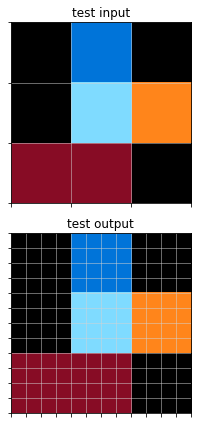

b94a9452.json
Icecuber solved? True
['crop', 'take_negative']
2 objects
[[2 2 2 2]
 [2 0 0 2]
 [2 0 0 2]
 [2 2 2 2]]
[[4 4]
 [4 4]]
2 objects
[[4 4 4 4]
 [4 0 0 4]
 [4 0 0 4]
 [4 4 4 4]]
[[2 2]
 [2 2]]
2 objects
[[1 1 1]
 [1 0 1]
 [1 1 1]]
[[3]]
2 objects
[[3 3 3]
 [3 0 3]
 [3 3 3]]
[[1]]
2 objects
[[4 4 4 4 4]
 [4 4 4 4 4]
 [4 4 0 4 4]
 [4 4 4 4 4]
 [4 4 4 4 4]]
[[6]]
2 objects
[[6 6 6 6 6]
 [6 6 6 6 6]
 [6 6 0 6 6]
 [6 6 6 6 6]
 [6 6 6 6 6]]
[[4]]


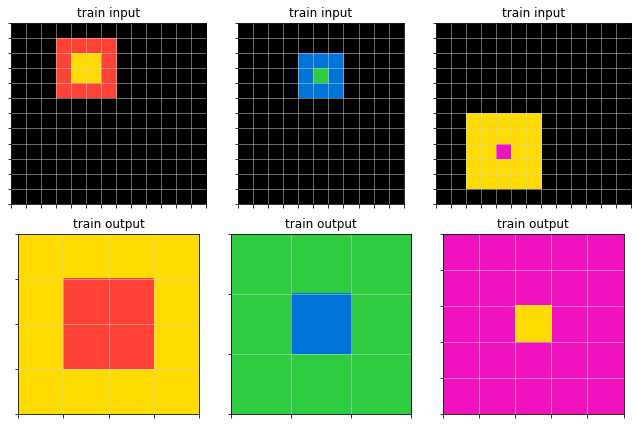

2 objects
[[3 3 3 3 3 3]
 [3 3 3 3 3 3]
 [3 3 0 0 3 3]
 [3 3 0 0 3 3]
 [3 3 3 3 3 3]
 [3 3 3 3 3 3]]
[[8 8]
 [8 8]]
2 objects
[[8 8 8 8 8 8]
 [8 8 8 8 8 8]
 [8 8 0 0 8 8]
 [8 8 0 0 8 8]
 [8 8 8 8 8 8]
 [8 8 8 8 8 8]]
[[3 3]
 [3 3]]


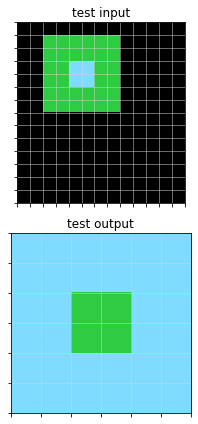

b9b7f026.json
Icecuber solved? False
['find_the_intruder', 'summarize']
7 objects
[[6 6 6]
 [6 0 6]
 [6 0 6]
 [6 6 6]]
[[3 3 3]
 [3 3 3]
 [3 3 3]]
[[1 1]
 [1 1]]
[[7 7 7]
 [7 7 7]
 [7 7 7]]
[[2 2 2 2 2]
 [2 2 2 2 2]
 [2 2 2 2 2]]
[[4 4 4]
 [4 4 4]]
[[8 8 8 8]
 [8 8 8 8]
 [8 8 8 8]]
1 objects
[[6]]
5 objects
[[7 7 7 7]
 [7 7 7 7]
 [7 7 7 7]
 [7 7 7 7]
 [7 7 7 7]
 [7 7 7 7]]
[[8 8 8 8 8]
 [8 8 8 8 8]
 [8 8 8 8 8]]
[[5 5 5 5]
 [5 5 5 5]
 [5 5 5 5]
 [5 0 0 5]
 [5 0 0 5]
 [5 5 5 5]
 [5 5 5 5]]
[[2 2 2]
 [2 2 2]
 [2 2 2]
 [2 2 2]
 [2 2 2]
 [2 2 2]]
[[4 4 4 4 4]
 [4 4 4 4 4]
 [4 4 4 4 4]
 [4 4 4 4 4]]
1 objects
[[5]]
4 objects
[[1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]]
[[3 3 3 3 3]
 [3 3 3 3 3]
 [3 3 3 3 3]
 [3 3 3 3 3]
 [3 3 3 3 3]
 [3 3 3 3 3]]
[[2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2]
 [2 0 0 0 2 2 2]
 [2 0 0 0 2 2 2]
 [2 2 2 2 2 2 2]]
[[7 7 7 7 7]
 [7 7 7 7 7]
 [7 7 7 7 7]
 [7 7 7 7 7]]
1 objects
[[2]]


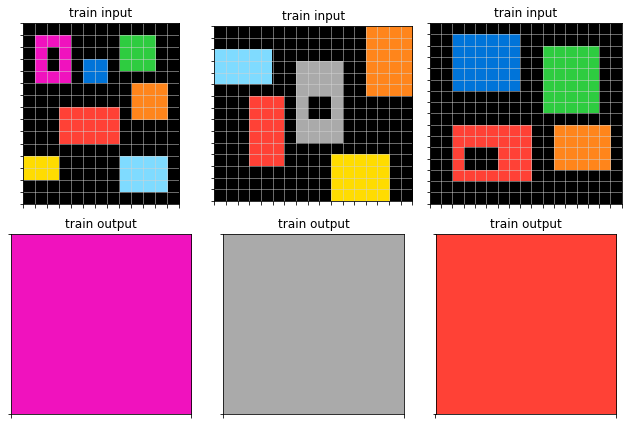

6 objects
[[3 3 3 3]
 [3 3 3 3]
 [3 3 3 3]
 [3 3 3 3]
 [3 3 3 3]]
[[2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2]]
[[4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]]
[[5 5 5]
 [5 5 5]
 [5 5 5]]
[[8 8 8 8]
 [8 8 8 8]
 [8 8 8 8]
 [8 8 8 8]]
[[7 7 7 7]
 [7 0 0 7]
 [7 7 7 7]]
1 objects
[[7]]


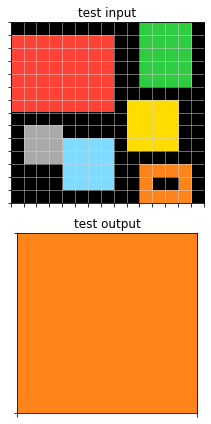

ba26e723.json
Icecuber solved? True
['pattern_modification', 'pairwise_analogy', 'recoloring']
1 objects
[[4 0 4 0 4 0 4 0 4 0]
 [4 4 4 4 4 4 4 4 4 4]
 [0 4 0 4 0 4 0 4 0 4]]
7 objects
[[6]
 [6]]
[[0 4]
 [4 4]
 [4 0]]
[[4 0]
 [4 4]
 [0 4]]
[[6]
 [6]]
[[0 4]
 [4 4]
 [4 0]]
[[6]
 [6]]
[[6]
 [6]]
1 objects
[[0 4 0 4 0 4 0 4 0 4 0]
 [4 4 4 4 4 4 4 4 4 4 4]
 [4 0 4 0 4 0 4 0 4 0 4]]
8 objects
[[4 0]
 [4 4]
 [0 4]]
[[6]
 [6]]
[[0 4]
 [4 4]
 [4 0]]
[[4 0]
 [4 4]
 [0 4]]
[[6]
 [6]]
[[6]
 [6]]
[[6]
 [6]]
[[4]
 [4]]
1 objects
[[4 0 4 0 4 0 4 0 4 0 4]
 [4 4 4 4 4 4 4 4 4 4 4]
 [0 4 0 4 0 4 0 4 0 4 0]]
8 objects
[[6]
 [6]]
[[0 4]
 [4 4]
 [4 0]]
[[4 0]
 [4 4]
 [0 4]]
[[6]
 [6]]
[[0 4]
 [4 4]
 [4 0]]
[[4]
 [4]]
[[6]
 [6]]
[[6]
 [6]]
1 objects
[[4 0 4 0 4 0 4 0 4 0 4 0 4]
 [4 4 4 4 4 4 4 4 4 4 4 4 4]
 [0 4 0 4 0 4 0 4 0 4 0 4 0]]
9 objects
[[6]
 [6]]
[[0 4]
 [4 4]
 [4 0]]
[[4 0]
 [4 4]
 [0 4]]
[[6]
 [6]]
[[0 4]
 [4 4]
 [4 0]]
[[4 0]
 [4 4]
 [0 4]]
[[6]
 [6]]
[[6]
 [6]]
[[6]
 [6]]
1 objects
[[0 4 0 4 

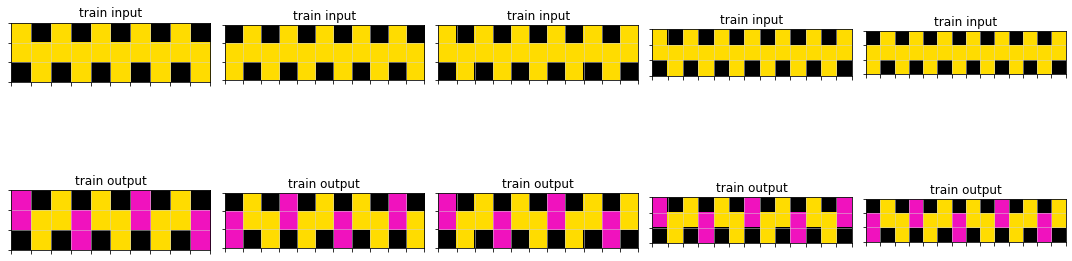

1 objects
[[0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0]
 [4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
 [4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4]]
12 objects
[[4 0]
 [4 4]
 [0 4]]
[[6]
 [6]]
[[0 4]
 [4 4]
 [4 0]]
[[4 0]
 [4 4]
 [0 4]]
[[6]
 [6]]
[[0 4]
 [4 4]
 [4 0]]
[[4 0]
 [4 4]
 [0 4]]
[[6]
 [6]]
[[6]
 [6]]
[[6]
 [6]]
[[6]
 [6]]
[[4]
 [4]]


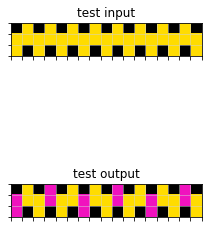

ba97ae07.json
Icecuber solved? True
['pattern_modification', 'pairwise_analogy', 'rettangle_guessing', 'recoloring']
3 objects
[[8 8]
 [8 8]
 [8 8]
 [8 8]
 [8 8]
 [8 8]
 [8 8]
 [8 8]
 [8 8]
 [8 8]
 [8 8]
 [8 8]
 [8 8]]
[[3 3 3]
 [3 3 3]
 [3 3 3]]
[[3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3]]
3 objects
[[8 8]
 [8 8]
 [8 8]]
[[3 3 3 3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3 3 3 3]]
[[8 8]
 [8 8]
 [8 8]
 [8 8]
 [8 8]
 [8 8]
 [8 8]]
3 objects
[[6 6]
 [6 6]
 [6 6]]
[[1 1 1 1 1 1 1 1 1]]
[[6 6]
 [6 6]
 [6 6]]
3 objects
[[6 6]
 [6 6]
 [6 6]
 [6 6]
 [6 6]
 [6 6]
 [6 6]]
[[1 1]]
[[1 1 1 1 1]]
3 objects
[[1]
 [1]
 [1]]
[[7 7 7 7 7 7 7]]
[[1]
 [1]
 [1]
 [1]]
3 objects
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[7 7]]
[[7 7 7 7]]
3 objects
[[3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]]
[[2]]
[[2 2 2 2]]
3 objects
[[3]
 [3]
 [3]
 [3]]
[[2 2 2 2 2 2]]
[[3]
 [3]
 [3]]


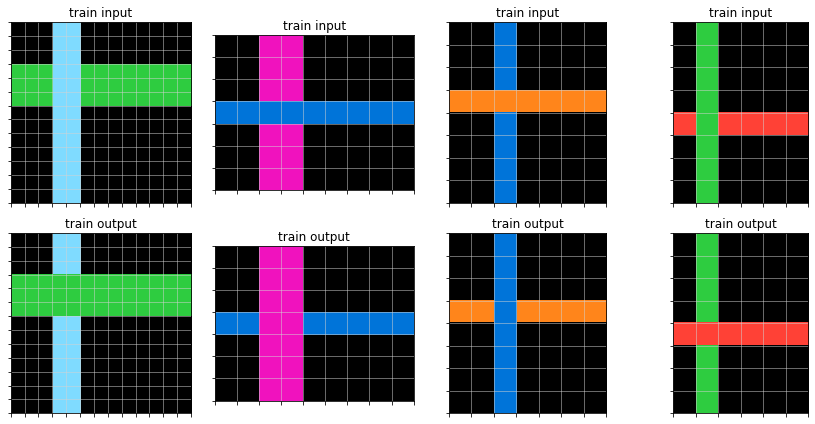

3 objects
[[4 4]
 [4 4]
 [4 4]
 [4 4]
 [4 4]
 [4 4]
 [4 4]
 [4 4]
 [4 4]
 [4 4]
 [4 4]]
[[5 5]
 [5 5]]
[[5 5]
 [5 5]]
3 objects
[[4 4]
 [4 4]]
[[5 5 5 5 5 5]
 [5 5 5 5 5 5]]
[[4 4]
 [4 4]
 [4 4]
 [4 4]
 [4 4]
 [4 4]
 [4 4]]


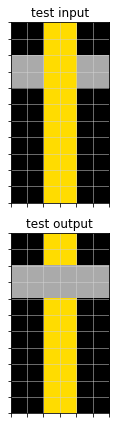

bb43febb.json
Icecuber solved? True
['loop_filling', 'rettangle_guessing']
2 objects
[[5 5 5 5 5]
 [5 5 5 5 5]
 [5 5 5 5 5]
 [5 5 5 5 5]
 [5 5 5 5 5]]
[[5 5 5]
 [5 5 5]
 [5 5 5]
 [5 5 5]]
4 objects
[[5 5 5 5 5]
 [5 0 0 0 5]
 [5 0 0 0 5]
 [5 0 0 0 5]
 [5 5 5 5 5]]
[[2 2 2]
 [2 2 2]
 [2 2 2]]
[[5 5 5]
 [5 0 5]
 [5 0 5]
 [5 5 5]]
[[2]
 [2]]
2 objects
[[5 5 5 5 5 5]
 [5 5 5 5 5 5]
 [5 5 5 5 5 5]
 [5 5 5 5 5 5]
 [5 5 5 5 5 5]]
[[5 5 5 5 5]
 [5 5 5 5 5]
 [5 5 5 5 5]]
4 objects
[[5 5 5 5 5 5]
 [5 0 0 0 0 5]
 [5 0 0 0 0 5]
 [5 0 0 0 0 5]
 [5 5 5 5 5 5]]
[[2 2 2 2]
 [2 2 2 2]
 [2 2 2 2]]
[[5 5 5 5 5]
 [5 0 0 0 5]
 [5 5 5 5 5]]
[[2 2 2]]


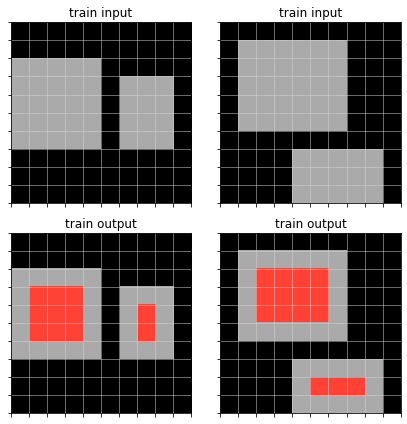

2 objects
[[5 5 5 5 5 5]
 [5 5 5 5 5 5]
 [5 5 5 5 5 5]]
[[5 5 5 5 5 5 5]
 [5 5 5 5 5 5 5]
 [5 5 5 5 5 5 5]
 [5 5 5 5 5 5 5]
 [5 5 5 5 5 5 5]
 [5 5 5 5 5 5 5]]
4 objects
[[5 5 5 5 5 5]
 [5 0 0 0 0 5]
 [5 5 5 5 5 5]]
[[2 2 2 2]]
[[5 5 5 5 5 5 5]
 [5 0 0 0 0 0 5]
 [5 0 0 0 0 0 5]
 [5 0 0 0 0 0 5]
 [5 0 0 0 0 0 5]
 [5 5 5 5 5 5 5]]
[[2 2 2 2 2]
 [2 2 2 2 2]
 [2 2 2 2 2]
 [2 2 2 2 2]]


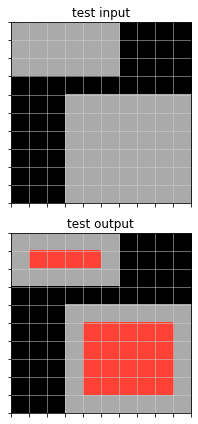

bbc9ae5d.json
Icecuber solved? True
['pattern_expansion', 'image_expansion']
1 objects
[[1 1]]
1 objects
[[1 1 0 0]
 [1 1 1 0]
 [1 1 1 1]]
1 objects
[[2]]
1 objects
[[2 0 0 0]
 [2 2 0 0]
 [2 2 2 0]
 [2 2 2 2]]
1 objects
[[5 5 5]]
1 objects
[[5 5 5 0 0 0 0]
 [5 5 5 5 0 0 0]
 [5 5 5 5 5 0 0]
 [5 5 5 5 5 5 0]
 [5 5 5 5 5 5 5]]
1 objects
[[8 8 8 8]]
1 objects
[[8 8 8 8 0 0]
 [8 8 8 8 8 0]
 [8 8 8 8 8 8]]
1 objects
[[7]]
1 objects
[[7 0 0]
 [7 7 0]
 [7 7 7]]


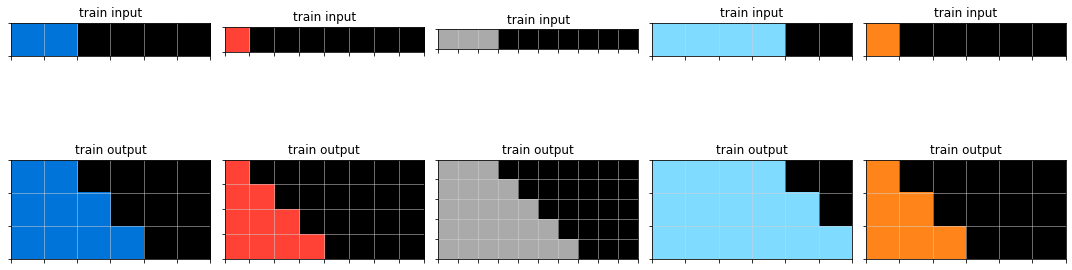

1 objects
[[1 1 1]]
1 objects
[[1 1 1 0 0 0 0 0]
 [1 1 1 1 0 0 0 0]
 [1 1 1 1 1 0 0 0]
 [1 1 1 1 1 1 0 0]
 [1 1 1 1 1 1 1 0]
 [1 1 1 1 1 1 1 1]]


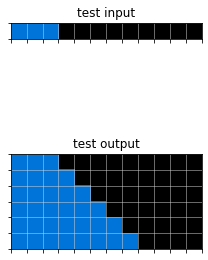

bc1d5164.json
Icecuber solved? True
['pattern_moving', 'pattern_juxtaposition', 'crop', 'pairwise_analogy']
4 objects
[[0 8]
 [8 8]]
[[8 0]
 [8 8]]
[[8 8]
 [0 8]]
[[8 8]
 [8 0]]
1 objects
[[0 8 0]
 [8 8 8]
 [0 8 0]]
6 objects
[[2 2]]
[[2 2]
 [0 2]]
[[2]]
[[2]]
[[2]]
[[2]]
2 objects
[[2 2 2]
 [0 2 2]
 [0 0 2]]
[[2]]
4 objects
[[4 4]]
[[4 0]
 [4 4]]
[[4]]
[[4]]
2 objects
[[4 4 0]
 [0 4 4]
 [0 0 4]]
[[4]]
4 objects
[[4]]
[[4]]
[[4]]
[[4 4]]
3 objects
[[4]]
[[4]]
[[4 4 4]]
5 objects
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
3 objects
[[3]]
[[3]]
[[3]
 [3]]


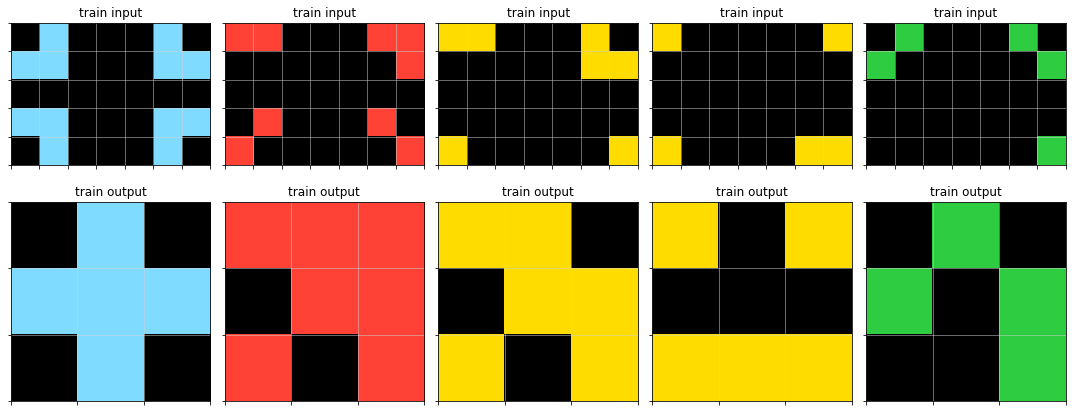

4 objects
[[1 1]]
[[1]]
[[1]]
[[1]]
3 objects
[[1 1]]
[[1]]
[[1 1]]


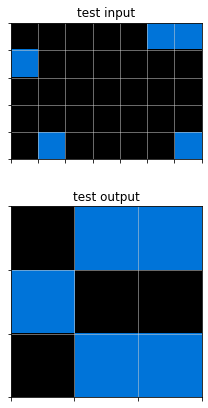

bd4472b8.json
Icecuber solved? False
['detect_wall', 'pattern_expansion', 'ex_nihilo', 'color_guessing', 'color_palette']
4 objects
[[2]]
[[1]]
[[4]]
[[5 5 5]]
10 objects
[[2]]
[[1]]
[[4]]
[[5 5 5]]
[[2 2 2]]
[[1 1 1]]
[[4 4 4]]
[[2 2 2]]
[[1 1 1]]
[[4 4 4]]
5 objects
[[3]]
[[2]]
[[1]]
[[4]]
[[5 5 5 5]]
13 objects
[[3]]
[[2]]
[[1]]
[[4]]
[[5 5 5 5]]
[[3 3 3 3]]
[[2 2 2 2]]
[[1 1 1 1]]
[[4 4 4 4]]
[[3 3 3 3]]
[[2 2 2 2]]
[[1 1 1 1]]
[[4 4 4 4]]
3 objects
[[8]]
[[3]]
[[5 5]]
7 objects
[[8]]
[[3]]
[[5 5]]
[[8 8]]
[[3 3]]
[[8 8]]
[[3 3]]


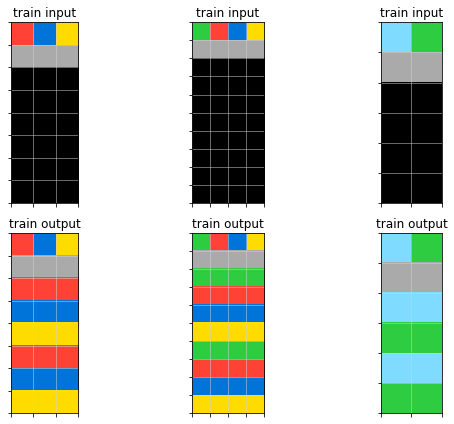

6 objects
[[1]]
[[2]]
[[3]]
[[4]]
[[8]]
[[5 5 5 5 5]]
16 objects
[[1]]
[[2]]
[[3]]
[[4]]
[[8]]
[[5 5 5 5 5]]
[[1 1 1 1 1]]
[[2 2 2 2 2]]
[[3 3 3 3 3]]
[[4 4 4 4 4]]
[[8 8 8 8 8]]
[[1 1 1 1 1]]
[[2 2 2 2 2]]
[[3 3 3 3 3]]
[[4 4 4 4 4]]
[[8 8 8 8 8]]


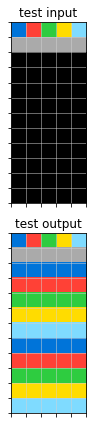

bda2d7a6.json
Icecuber solved? False
['recoloring', 'pairwise_analogy', 'pattern_modification', 'color_permutation']
2 objects
[[3 3 3 3 3 3]
 [3 0 0 0 0 3]
 [3 0 0 0 0 3]
 [3 0 0 0 0 3]
 [3 0 0 0 0 3]
 [3 3 3 3 3 3]]
[[2 2 2 2]
 [2 0 0 2]
 [2 0 0 2]
 [2 2 2 2]]
2 objects
[[3 3 3 3]
 [3 0 0 3]
 [3 0 0 3]
 [3 3 3 3]]
[[2 2]
 [2 2]]
2 objects
[[7 7 7 7]
 [7 0 0 7]
 [7 0 0 7]
 [7 7 7 7]]
[[6 6]
 [6 6]]
2 objects
[[6 6 6 6 6 6]
 [6 0 0 0 0 6]
 [6 0 0 0 0 6]
 [6 0 0 0 0 6]
 [6 0 0 0 0 6]
 [6 6 6 6 6 6]]
[[7 7]
 [7 7]]
3 objects
[[8 8 8 8 8 8 8 8]
 [8 0 0 0 0 0 0 8]
 [8 0 0 0 0 0 0 8]
 [8 0 0 0 0 0 0 8]
 [8 0 0 0 0 0 0 8]
 [8 0 0 0 0 0 0 8]
 [8 0 0 0 0 0 0 8]
 [8 8 8 8 8 8 8 8]]
[[5 5 5 5]
 [5 0 0 5]
 [5 0 0 5]
 [5 5 5 5]]
[[8 8]
 [8 8]]
3 objects
[[5 5 5 5 5 5 5 5]
 [5 0 0 0 0 0 0 5]
 [5 0 0 0 0 0 0 5]
 [5 0 0 0 0 0 0 5]
 [5 0 0 0 0 0 0 5]
 [5 0 0 0 0 0 0 5]
 [5 0 0 0 0 0 0 5]
 [5 5 5 5 5 5 5 5]]
[[8 8 8 8 8 8]
 [8 0 0 0 0 8]
 [8 0 0 0 0 8]
 [8 0 0 0 0 8]
 [8 0 0 0 0 8]
 [8 8 8 8 8 8]]
[[5 

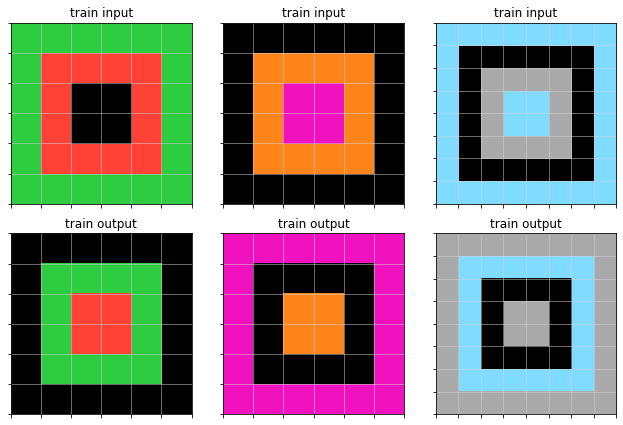

2 objects
[[9 9 9 9 9 9]
 [9 0 0 0 0 9]
 [9 0 0 0 0 9]
 [9 0 0 0 0 9]
 [9 0 0 0 0 9]
 [9 9 9 9 9 9]]
[[1 1]
 [1 1]]
2 objects
[[1 1 1 1 1 1]
 [1 0 0 0 0 1]
 [1 0 0 0 0 1]
 [1 0 0 0 0 1]
 [1 0 0 0 0 1]
 [1 1 1 1 1 1]]
[[9 9 9 9]
 [9 0 0 9]
 [9 0 0 9]
 [9 9 9 9]]
4 objects
[[3 3 3 3 3 3 3 3]
 [3 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 3]
 [3 3 3 3 3 3 3 3]]
[[7 7 7 7 7 7]
 [7 0 0 0 0 7]
 [7 0 0 0 0 7]
 [7 0 0 0 0 7]
 [7 0 0 0 0 7]
 [7 7 7 7 7 7]]
[[6 6 6 6]
 [6 0 0 6]
 [6 0 0 6]
 [6 6 6 6]]
[[3 3]
 [3 3]]
4 objects
[[6 6 6 6 6 6 6 6]
 [6 0 0 0 0 0 0 6]
 [6 0 0 0 0 0 0 6]
 [6 0 0 0 0 0 0 6]
 [6 0 0 0 0 0 0 6]
 [6 0 0 0 0 0 0 6]
 [6 0 0 0 0 0 0 6]
 [6 6 6 6 6 6 6 6]]
[[3 3 3 3 3 3]
 [3 0 0 0 0 3]
 [3 0 0 0 0 3]
 [3 0 0 0 0 3]
 [3 0 0 0 0 3]
 [3 3 3 3 3 3]]
[[7 7 7 7]
 [7 0 0 7]
 [7 0 0 7]
 [7 7 7 7]]
[[6 6]
 [6 6]]


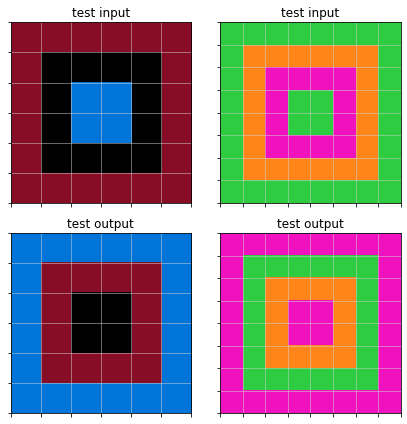

bdad9b1f.json
Icecuber solved? False
['draw_line_from_point', 'direction_guessing', 'recoloring', 'take_intersection']
2 objects
[[8]
 [8]]
[[2 2]]
5 objects
[[8]
 [8]]
[[2 2 2 2]]
[[4]]
[[2]]
[[8]
 [8]
 [8]]
2 objects
[[8]
 [8]]
[[2 2]]
5 objects
[[8]
 [8]
 [8]]
[[2]]
[[4]]
[[2 2 2 2]]
[[8]
 [8]]


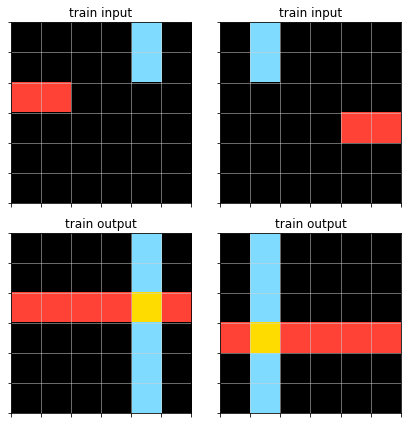

2 objects
[[8]
 [8]]
[[2 2]]
5 objects
[[8]
 [8]
 [8]
 [8]]
[[2 2 2]]
[[4]]
[[2 2]]
[[8]]


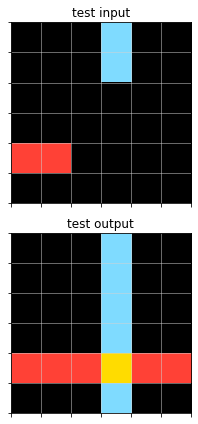

be94b721.json
Icecuber solved? True
['separate_shapes', 'count_tiles', 'take_maximum', 'crop']
3 objects
[[2 2 0]
 [0 2 0]
 [0 2 2]
 [2 2 2]]
[[3 3]
 [0 3]]
[[0 1 0]
 [1 1 0]
 [1 1 1]]
1 objects
[[2 2 0]
 [0 2 0]
 [0 2 2]
 [2 2 2]]
3 objects
[[6 6]
 [0 6]]
[[0 3 0]
 [3 3 3]
 [0 3 0]]
[[4 4]
 [4 4]
 [4 4]]
1 objects
[[4 4]
 [4 4]
 [4 4]]
3 objects
[[8 8 8]
 [0 8 0]
 [8 8 0]
 [8 8 0]]
[[7 7]
 [0 7]
 [0 7]
 [0 7]]
[[0 2]
 [2 2]
 [0 2]]
1 objects
[[8 8 8]
 [0 8 0]
 [8 8 0]
 [8 8 0]]
3 objects
[[7 0]
 [7 7]
 [0 7]]
[[2 2 2]
 [0 2 0]
 [2 2 2]]
[[8 8 8]
 [0 8 0]]
1 objects
[[2 2 2]
 [0 2 0]
 [2 2 2]]


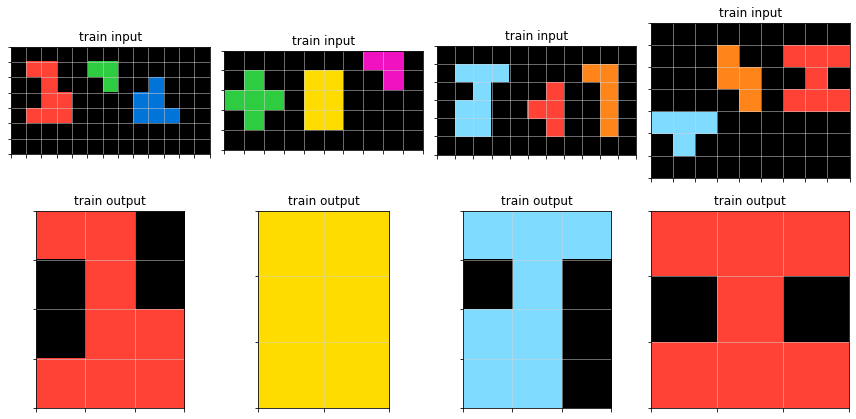

4 objects
[[4 0]
 [4 4]
 [0 4]]
[[3 3 3]
 [3 3 3]
 [3 0 3]
 [3 0 3]]
[[0 6 6]
 [6 6 6]
 [6 6 0]]
[[5 5 5]
 [5 5 0]]
1 objects
[[3 3 3]
 [3 3 3]
 [3 0 3]
 [3 0 3]]


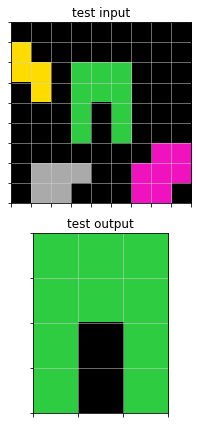

beb8660c.json
Icecuber solved? False
['pattern_moving', 'count_tiles', 'order_numbers']
7 objects
[[2 2]]
[[3]]
[[1 1 1]]
[[5 5 5 5 5 5]]
[[6 6 6 6 6]]
[[4 4 4 4]]
[[8 8 8 8 8 8 8]]
7 objects
[[3]]
[[2 2]]
[[1 1 1]]
[[4 4 4 4]]
[[6 6 6 6 6]]
[[5 5 5 5 5 5]]
[[8 8 8 8 8 8 8]]
4 objects
[[1]]
[[2 2 2]]
[[3 3]]
[[8 8 8 8]]
4 objects
[[1]]
[[3 3]]
[[2 2 2]]
[[8 8 8 8]]
3 objects
[[2 2]]
[[4]]
[[8 8 8]]
3 objects
[[4]]
[[2 2]]
[[8 8 8]]


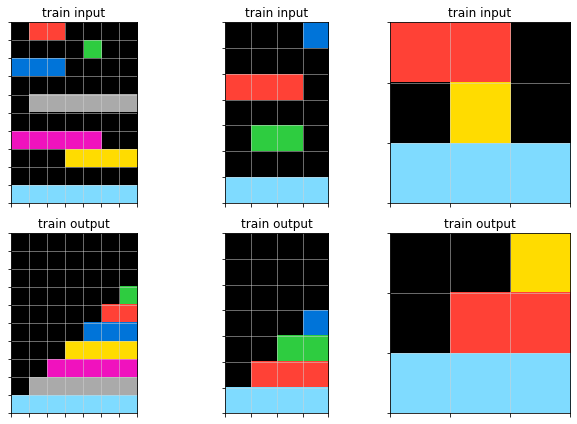

8 objects
[[6 6 6]]
[[1 1 1 1]]
[[4 4 4 4 4]]
[[7 7]]
[[2 2 2 2 2 2 2]]
[[3 3 3 3 3 3]]
[[9]]
[[8 8 8 8 8 8 8 8]]
8 objects
[[9]]
[[7 7]]
[[6 6 6]]
[[1 1 1 1]]
[[4 4 4 4 4]]
[[3 3 3 3 3 3]]
[[2 2 2 2 2 2 2]]
[[8 8 8 8 8 8 8 8]]


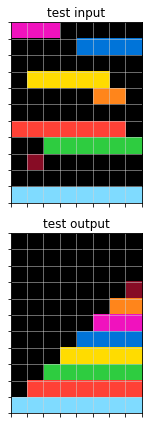

c0f76784.json
Icecuber solved? False
['loop_filling', 'measure_area', 'associate_colors_to_numbers']
3 objects
[[5 5 5 5 5]
 [5 0 0 0 5]
 [5 0 0 0 5]
 [5 0 0 0 5]
 [5 5 5 5 5]]
[[5 5 5]
 [5 0 5]
 [5 5 5]]
[[5 5 5 5]
 [5 0 0 5]
 [5 0 0 5]
 [5 5 5 5]]
6 objects
[[5 5 5 5 5]
 [5 0 0 0 5]
 [5 0 0 0 5]
 [5 0 0 0 5]
 [5 5 5 5 5]]
[[8 8 8]
 [8 8 8]
 [8 8 8]]
[[5 5 5]
 [5 0 5]
 [5 5 5]]
[[6]]
[[5 5 5 5]
 [5 0 0 5]
 [5 0 0 5]
 [5 5 5 5]]
[[7 7]
 [7 7]]
3 objects
[[5 5 5 5]
 [5 0 0 5]
 [5 0 0 5]
 [5 5 5 5]]
[[5 5 5 5 5]
 [5 0 0 0 5]
 [5 0 0 0 5]
 [5 0 0 0 5]
 [5 5 5 5 5]]
[[5 5 5]
 [5 0 5]
 [5 5 5]]
6 objects
[[5 5 5 5]
 [5 0 0 5]
 [5 0 0 5]
 [5 5 5 5]]
[[7 7]
 [7 7]]
[[5 5 5 5 5]
 [5 0 0 0 5]
 [5 0 0 0 5]
 [5 0 0 0 5]
 [5 5 5 5 5]]
[[8 8 8]
 [8 8 8]
 [8 8 8]]
[[5 5 5]
 [5 0 5]
 [5 5 5]]
[[6]]
2 objects
[[5 5 5 5 5]
 [5 0 0 0 5]
 [5 0 0 0 5]
 [5 0 0 0 5]
 [5 5 5 5 5]]
[[5 5 5 5]
 [5 0 0 5]
 [5 0 0 5]
 [5 5 5 5]]
4 objects
[[5 5 5 5 5]
 [5 0 0 0 5]
 [5 0 0 0 5]
 [5 0 0 0 5]
 [5 5 5 5 5]]
[[8 8 8]

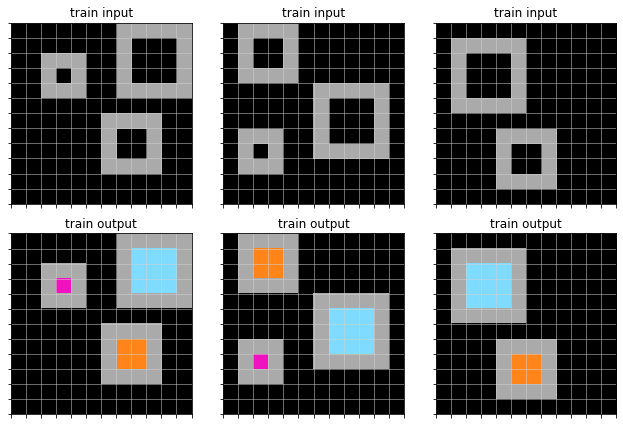

3 objects
[[5 5 5 5 5]
 [5 0 0 0 5]
 [5 0 0 0 5]
 [5 0 0 0 5]
 [5 5 5 5 5]]
[[5 5 5]
 [5 0 5]
 [5 5 5]]
[[5 5 5 5]
 [5 0 0 5]
 [5 0 0 5]
 [5 5 5 5]]
6 objects
[[5 5 5 5 5]
 [5 0 0 0 5]
 [5 0 0 0 5]
 [5 0 0 0 5]
 [5 5 5 5 5]]
[[8 8 8]
 [8 8 8]
 [8 8 8]]
[[5 5 5]
 [5 0 5]
 [5 5 5]]
[[6]]
[[5 5 5 5]
 [5 0 0 5]
 [5 0 0 5]
 [5 5 5 5]]
[[7 7]
 [7 7]]


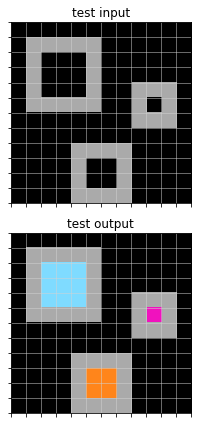

c1d99e64.json
Icecuber solved? True
['draw_line_from_border', 'detect_grid']
8 objects
[[1 0 0 0 1 1 1 1]
 [1 0 1 0 1 1 1 1]
 [1 1 1 1 0 0 1 1]
 [1 0 1 1 1 1 1 1]
 [1 0 1 1 0 1 1 1]
 [1 1 0 1 0 1 1 0]
 [1 0 0 1 1 0 1 0]
 [1 1 0 0 1 1 1 1]]
[[1 1 0 1 0 1 0 1 1 1]
 [0 1 1 1 1 1 1 0 1 1]
 [1 0 0 0 1 0 1 0 1 0]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [0 0 1 0 1 1 0 0 0 1]
 [1 1 1 1 1 1 1 0 1 0]
 [1 0 1 1 1 0 1 1 1 1]]
[[1 1 1]
 [1 1 0]
 [1 0 0]]
[[0 1 1 1]
 [1 1 0 0]
 [1 0 0 0]]
[[1 0 0 0]
 [1 1 0 0]
 [1 1 1 1]]
[[1 1 1 1 1 1 1]
 [0 0 1 0 1 0 1]
 [0 0 0 1 1 1 1]]
[[1]]
[[1]]
9 objects
[[1 0 0 0 1 1 1 1]
 [1 0 1 0 1 1 1 1]
 [1 1 1 1 0 0 1 1]
 [1 0 1 1 1 1 1 1]
 [1 0 1 1 0 1 1 1]
 [1 1 0 1 0 1 1 0]
 [1 0 0 1 1 0 1 0]
 [1 1 0 0 1 1 1 1]]
[[0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0]
 [0 0 

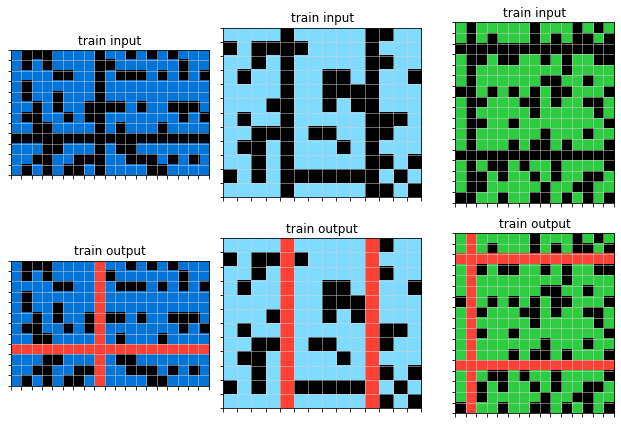

24 objects
[[4 0 4]
 [4 4 4]]
[[4 4]
 [0 4]]
[[0 4 4 4 4 0 4 4 4 4 4 0 4 4]
 [4 4 0 4 4 4 4 4 4 0 4 4 4 4]]
[[4]
 [4]]
[[4 0 0 0 0 0]
 [4 4 0 0 0 0]
 [4 4 4 0 0 0]
 [4 0 0 4 0 0]
 [4 4 4 4 4 0]
 [0 4 4 0 4 4]
 [4 4 4 0 4 4]
 [4 0 4 4 4 0]
 [4 4 0 4 0 0]]
[[4 4 4 0]
 [0 4 4 4]
 [0 0 4 4]
 [0 0 0 4]]
[[4 4 4 4 4 0 4 4 4 4 4 4 4 4]
 [0 0 0 4 4 4 4 0 4 4 4 0 4 4]
 [4 4 4 4 4 4 4 4 4 4 0 4 0 4]
 [4 4 4 4 4 4 0 4 0 4 4 4 0 4]
 [4 0 4 0 0 4 4 0 0 4 4 4 0 0]
 [4 4 0 4 4 0 4 4 0 0 4 0 4 0]
 [0 4 4 4 4 4 0 0 4 0 4 4 4 0]
 [4 0 4 4 0 4 4 0 4 4 0 4 4 0]
 [4 4 4 0 4 4 4 4 4 4 0 4 4 4]]
[[4 4 0]
 [4 4 4]
 [4 0 4]
 [4 4 4]
 [0 4 0]]
[[4 0 4]
 [4 4 4]
 [0 0 4]
 [4 4 4]]
[[0 4 4 0 0 0]
 [4 4 4 4 4 4]
 [4 4 4 4 4 0]
 [0 4 4 4 4 4]
 [0 4 4 4 4 0]
 [4 4 4 0 4 4]
 [4 4 0 4 4 4]]
[[0 4 4 4 4 0 4 4 0 0 4 4 4 4]
 [4 4 4 4 0 4 0 4 4 0 4 4 4 4]
 [4 0 4 0 0 4 4 4 4 4 4 4 4 0]
 [4 4 4 4 4 0 4 0 4 4 0 4 4 4]
 [4 4 4 0 4 0 4 0 4 4 4 4 4 4]
 [0 4 0 4 4 4 4 4 4 4 4 4 4 4]
 [4 4 0 4 4 4 0 4 4 4 0 4 4 0]]
[[0 4 4]
 [4 

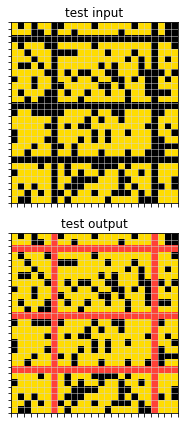

c3e719e8.json
Icecuber solved? True
['image_repetition', 'image_expansion', 'count_different_colors', 'take_maximum']
9 objects
[[3]]
[[8]]
[[7]]
[[9]]
[[3]]
[[8]]
[[7]]
[[9]]
[[3]]
27 objects
[[3]]
[[8]]
[[7]]
[[9]]
[[3]]
[[8]]
[[7]]
[[9]]
[[3]]
[[3]]
[[8]]
[[7]]
[[9]]
[[3]]
[[8]]
[[7]]
[[9]]
[[3]]
[[3]]
[[8]]
[[7]]
[[9]]
[[3]]
[[8]]
[[7]]
[[9]]
[[3]]
4 objects
[[8]]
[[6]]
[[0 0 8]
 [0 0 8]
 [8 8 8]]
[[3 3]]
17 objects
[[8]]
[[6]]
[[0 0 8]
 [0 0 8]
 [8 8 8]]
[[8]]
[[6]]
[[0 0 0 0 0 0 0 0 8]
 [0 0 0 0 0 0 0 0 8]
 [0 0 0 0 0 0 8 8 8]
 [0 0 0 0 0 0 8 0 8]
 [0 0 0 0 0 0 0 0 8]
 [0 0 0 0 0 0 8 8 8]
 [0 0 8 8 0 8 8 0 8]
 [0 0 8 0 0 8 0 0 8]
 [8 8 8 8 8 8 8 8 8]]
[[3 3]]
[[3 3]]
[[6]]
[[3 3]]
[[8]]
[[6]]
[[6]]
[[6]]
[[3 3]]
[[3 3]]
[[3 3]]
6 objects
[[6]]
[[9 9]]
[[4]]
[[6]]
[[8]
 [8]]
[[9 9]]
24 objects
[[6]]
[[9 9]]
[[6]]
[[9 9]]
[[4]]
[[6]]
[[8]
 [8]]
[[4]]
[[6]]
[[8]
 [8]]
[[9 9]]
[[9 9]]
[[6]]
[[9 9]]
[[6]]
[[9 9]]
[[4]]
[[6]]
[[8]
 [8]]
[[4]]
[[6]]
[[8]
 [8]]
[[9 9]]
[[9 9]]


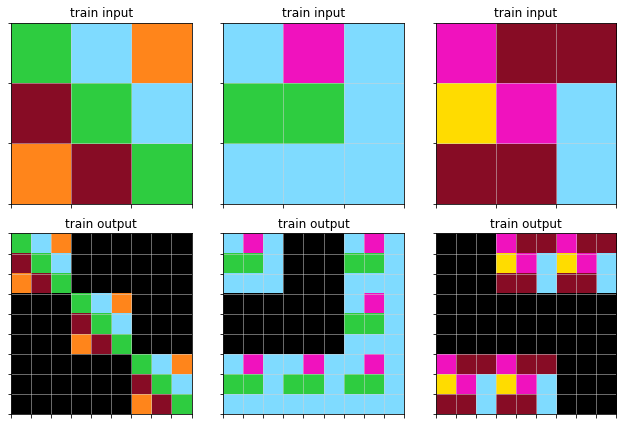

8 objects
[[1 1]]
[[7]]
[[7]]
[[4]]
[[1]]
[[5]]
[[1]]
[[7]]
32 objects
[[1 1]]
[[7]]
[[1 1]]
[[7]]
[[7]]
[[4]]
[[1]]
[[7]]
[[4]]
[[1]]
[[5]]
[[1]]
[[7]]
[[5]]
[[1]]
[[7]]
[[1 1]]
[[7]]
[[7]]
[[4]]
[[1]]
[[5]]
[[1]]
[[7]]
[[1 1]]
[[7]]
[[7]]
[[4]]
[[1]]
[[5]]
[[1]]
[[7]]


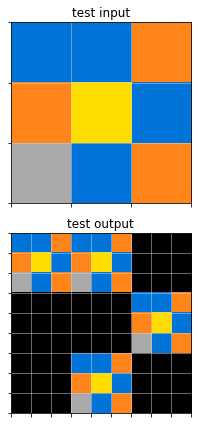

c3f564a4.json
Icecuber solved? True
['pattern_expansion', 'image_filling']
213 objects
[[1]]
[[2]]
[[3]]
[[4]]
[[5]]
[[1]]
[[2]]
[[3]]
[[4]]
[[5]]
[[1]]
[[2]]
[[3]]
[[4]]
[[5]]
[[1]]
[[2]]
[[1]]
[[2]]
[[3]]
[[4]]
[[5]]
[[1]]
[[2]]
[[3]]
[[4]]
[[5]]
[[1]]
[[2]]
[[3]]
[[2]]
[[3]]
[[4]]
[[5]]
[[1]]
[[2]]
[[3]]
[[4]]
[[5]]
[[1]]
[[2]]
[[3]]
[[4]]
[[3]]
[[4]]
[[5]]
[[1]]
[[2]]
[[3]]
[[4]]
[[5]]
[[1]]
[[2]]
[[3]]
[[4]]
[[5]]
[[4]]
[[5]]
[[1]]
[[2]]
[[3]]
[[4]]
[[5]]
[[1]]
[[2]]
[[3]]
[[4]]
[[5]]
[[1]]
[[2]]
[[3]]
[[4]]
[[5]]
[[1]]
[[2]]
[[3]]
[[4]]
[[5]]
[[1]]
[[2]]
[[5]]
[[1]]
[[2]]
[[3]]
[[4]]
[[5]]
[[1]]
[[2]]
[[3]]
[[4]]
[[5]]
[[1]]
[[2]]
[[3]]
[[1]]
[[2]]
[[3]]
[[4]]
[[5]]
[[1]]
[[2]]
[[3]]
[[4]]
[[5]]
[[1]]
[[2]]
[[3]]
[[4]]
[[5]]
[[1]]
[[2]]
[[3]]
[[4]]
[[5]]
[[1]]
[[2]]
[[3]]
[[4]]
[[5]]
[[1]]
[[2]]
[[3]]
[[4]]
[[5]]
[[1]]
[[2]]
[[3]]
[[4]]
[[5]]
[[1]]
[[2]]
[[3]]
[[4]]
[[5]]
[[1]]
[[2]]
[[3]]
[[4]]
[[4]]
[[5]]
[[1]]
[[2]]
[[3]]
[[4]]
[[5]]
[[1]]
[[2]]
[[3]]
[[4]]
[[5]]
[[5]]
[[1]]
[

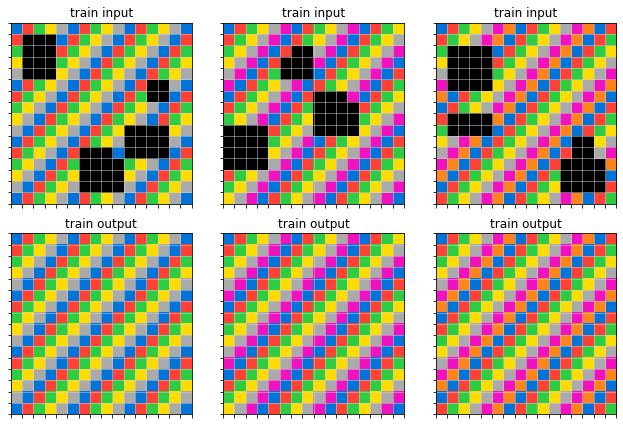

217 objects
[[1]]
[[2]]
[[3]]
[[4]]
[[5]]
[[6]]
[[7]]
[[3]]
[[4]]
[[5]]
[[6]]
[[7]]
[[8]]
[[2]]
[[3]]
[[4]]
[[5]]
[[6]]
[[7]]
[[8]]
[[4]]
[[5]]
[[6]]
[[7]]
[[8]]
[[1]]
[[3]]
[[4]]
[[5]]
[[6]]
[[7]]
[[8]]
[[1]]
[[2]]
[[3]]
[[4]]
[[5]]
[[6]]
[[7]]
[[8]]
[[1]]
[[2]]
[[4]]
[[5]]
[[6]]
[[7]]
[[8]]
[[1]]
[[2]]
[[3]]
[[4]]
[[5]]
[[6]]
[[7]]
[[8]]
[[1]]
[[2]]
[[3]]
[[5]]
[[6]]
[[3]]
[[4]]
[[5]]
[[6]]
[[7]]
[[8]]
[[1]]
[[2]]
[[3]]
[[4]]
[[6]]
[[7]]
[[7]]
[[8]]
[[1]]
[[2]]
[[3]]
[[4]]
[[5]]
[[7]]
[[8]]
[[8]]
[[1]]
[[2]]
[[3]]
[[4]]
[[5]]
[[6]]
[[8]]
[[1]]
[[1]]
[[2]]
[[3]]
[[4]]
[[5]]
[[6]]
[[7]]
[[1]]
[[2]]
[[3]]
[[4]]
[[5]]
[[2]]
[[3]]
[[4]]
[[5]]
[[6]]
[[7]]
[[8]]
[[2]]
[[3]]
[[4]]
[[5]]
[[6]]
[[7]]
[[8]]
[[1]]
[[2]]
[[3]]
[[4]]
[[5]]
[[6]]
[[7]]
[[8]]
[[1]]
[[3]]
[[4]]
[[5]]
[[6]]
[[7]]
[[8]]
[[1]]
[[2]]
[[3]]
[[4]]
[[5]]
[[6]]
[[7]]
[[8]]
[[1]]
[[2]]
[[4]]
[[5]]
[[6]]
[[7]]
[[8]]
[[1]]
[[2]]
[[3]]
[[4]]
[[5]]
[[6]]
[[7]]
[[8]]
[[1]]
[[2]]
[[3]]
[[5]]
[[6]]
[[7]]
[[8]]
[[1]]
[[2]]
[[3]]
[[6]

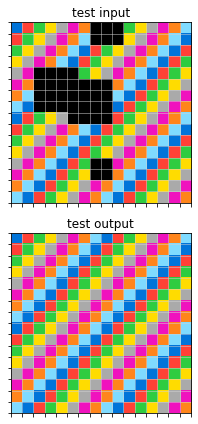

c444b776.json
Icecuber solved? False
['detect_grid', 'separate_images', 'find_the_intruder', 'image_repetition']
11 objects
[[0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0]
 [4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
 [0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0]]
[[7]]
[[2]]
[[2]]
[[3]]
[[3]]
[[8]]
[[7]]
[[8]]
[[3]]
[[7]]
41 objects
[[0 0 0 0 0 0 0 0 0 4 0 0

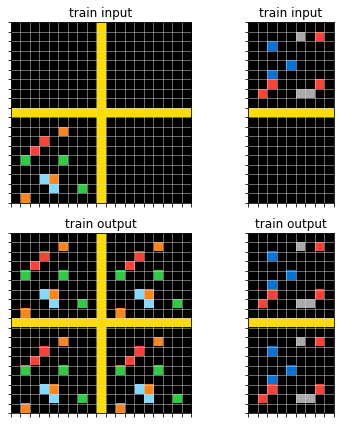

8 objects
[[0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0]
 [4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
 [0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 

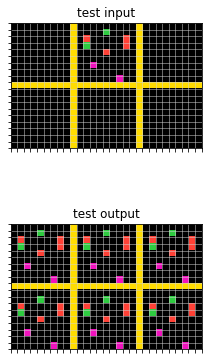

c59eb873.json
Icecuber solved? True
['image_resizing']
3 objects
[[0 5 0]
 [5 5 5]
 [0 5 0]]
[[1]]
[[2]]
3 objects
[[0 0 5 5 0 0]
 [0 0 5 5 0 0]
 [5 5 5 5 5 5]
 [5 5 5 5 5 5]
 [0 0 5 5 0 0]
 [0 0 5 5 0 0]]
[[1 1]
 [1 1]]
[[2 2]
 [2 2]]
3 objects
[[2]]
[[1]
 [1]]
[[3]]
3 objects
[[2 2]
 [2 2]]
[[1 1]
 [1 1]
 [1 1]
 [1 1]]
[[3 3]
 [3 3]]
4 objects
[[2]
 [2]]
[[3 0]
 [3 0]
 [3 3]
 [3 0]]
[[1]]
[[5]]
4 objects
[[2 2]
 [2 2]
 [2 2]
 [2 2]]
[[3 3 0 0]
 [3 3 0 0]
 [3 3 0 0]
 [3 3 0 0]
 [3 3 3 3]
 [3 3 3 3]
 [3 3 0 0]
 [3 3 0 0]]
[[1 1]
 [1 1]]
[[5 5]
 [5 5]]


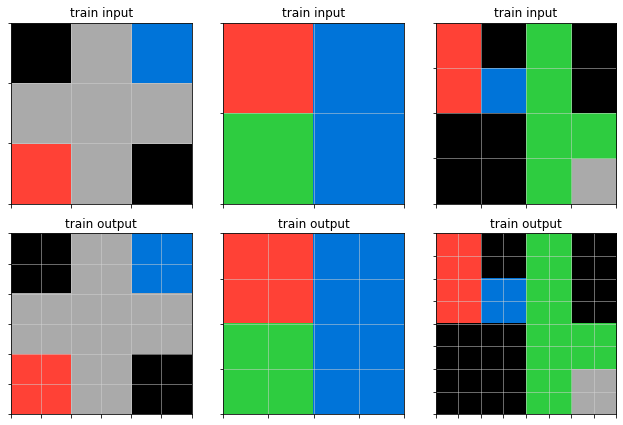

7 objects
[[2]
 [2]]
[[7]]
[[8]]
[[1 1]]
[[5]
 [5]
 [5]]
[[6 6]
 [6 0]]
[[3]]
7 objects
[[2 2]
 [2 2]
 [2 2]
 [2 2]]
[[7 7]
 [7 7]]
[[8 8]
 [8 8]]
[[1 1 1 1]
 [1 1 1 1]]
[[5 5]
 [5 5]
 [5 5]
 [5 5]
 [5 5]
 [5 5]]
[[6 6 6 6]
 [6 6 6 6]
 [6 6 0 0]
 [6 6 0 0]]
[[3 3]
 [3 3]]


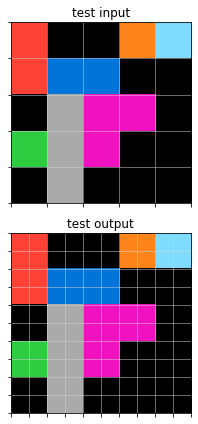

c8cbb738.json
Icecuber solved? False
['pattern_moving', 'jigsaw', 'crop']
17 objects
[[3 3 3 3 3 3 3 0 3 0 3]
 [3 3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 0 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3 3]
 [3 3 0 3 3 3 0 0 3 0 3]
 [3 3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 0 3 0 3 3 3 0]
 [3 3 3 3 3 3 3 3 3 3 3]
 [0 3 3 3 0 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3 3]
 [0 3 3 3 0 3 0 3 3 3 0]
 [3 3 3 3 3 3 3 3 3 3 3]]
[[4]]
[[4]]
[[1]]
[[1]]
[[1]]
[[4]]
[[4]]
[[1]]
[[2]]
[[2]]
[[8]]
[[8]]
[[8]]
[[8]]
[[2]]
[[2]]
17 objects
[[2]]
[[4]]
[[1]]
[[4]]
[[2]]
[[8]]
[[3 3 3]
 [3 3 3]
 [3 3 3]]
[[8]]
[[1]]
[[1]]
[[8]]
[[8]]
[[2]]
[[4]]
[[1]]
[[4]]
[[2]]
10 objects
[[1 1 1 1 1 1 1 1]
 [1 0 1 0 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 0 1 0 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 0 0 0 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]]
[[8]]
[[8]]
[[8]]
[[8]]
[[3]]
[[3]]
[[1]]
[[3]]
[[3]]
9 objects
[[8]]
[[3]]
[[8]]
[[3]]
[[1]]
[[3]]
[[8]]
[[3]]
[[8]]
9 objects
[[4 4 4 4 4 4 4 4 4 4 4 4 4 4]
 [4 4 0 4 4 4 0 4 4 4 

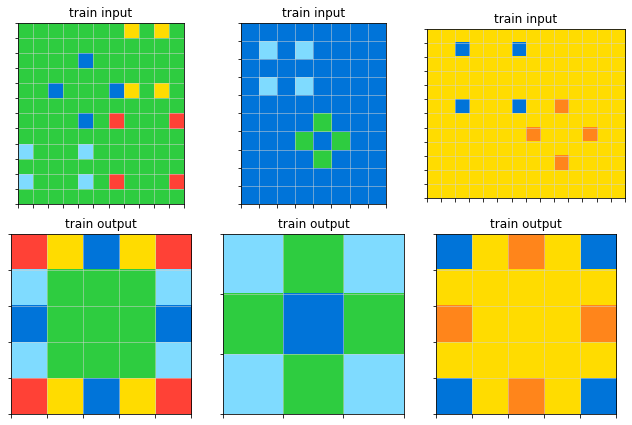

17 objects
[[8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 0 8 8 8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
 [8 8 8 0 8 8 8 8 8 0 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8 8 0 8 8 8 8 8 0 8]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 0 8 8 8 8 0 8 8 8 8 8 0 8]
 [8 8 8 0 8 8 8 8 8 0 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8 0 8 0 8 8]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
 [8 8 8 0 8 8 8 8 8 0 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8 0 8 0 8 8]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]]
[[1]]
[[1]]
[[1]]
[[2]]
[[2]]
[[1]]
[[2]]
[[2]]
[[3]]
[[3]]
[[6]]
[[6]]
[[3]]
[[3]]
[[6]]
[[6]]
17 objects
[[3]]
[[0 8 0 0 0 8 0]
 [8 8 8 8 8 8 8]
 [0 8 8 8 8 8 0]
 [0 8 8 8 8 8 0]
 [0 8 8 8 8 8 0]
 [8 8 8 8 8 8 8]
 [0 8 0 0 0 8 0]]
[[6]]
[[1]]
[[6]]

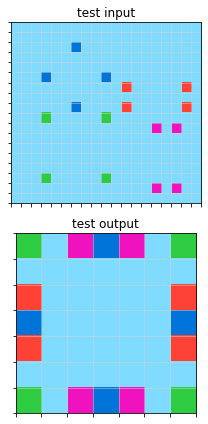

c8f0f002.json
Icecuber solved? True
['recoloring', 'associate_colors_to_colors']
6 objects
[[1 0 0]
 [1 1 0]
 [0 1 1]]
[[8 8]]
[[0 7 7]
 [7 7 0]
 [0 7 7]]
[[8]
 [8]
 [8]]
[[1]]
[[7]]
6 objects
[[1 0 0]
 [1 1 0]
 [0 1 1]]
[[8 8]]
[[0 5 5]
 [5 5 0]
 [0 5 5]]
[[8]
 [8]
 [8]]
[[1]]
[[5]]
7 objects
[[7 7 7]]
[[1]]
[[1]]
[[8]]
[[0 1]
 [1 1]]
[[7]
 [7]]
[[7]]
7 objects
[[5 5 5]]
[[1]]
[[1]]
[[8]]
[[0 1]
 [1 1]]
[[5]
 [5]]
[[5]]
8 objects
[[1]]
[[8 0 0]
 [8 8 0]
 [0 8 8]]
[[1]]
[[7]]
[[0 1]
 [1 1]]
[[7]
 [7]]
[[1]]
[[7]]
8 objects
[[1]]
[[8 0 0]
 [8 8 0]
 [0 8 8]]
[[1]]
[[5]]
[[0 1]
 [1 1]]
[[5]
 [5]]
[[1]]
[[5]]


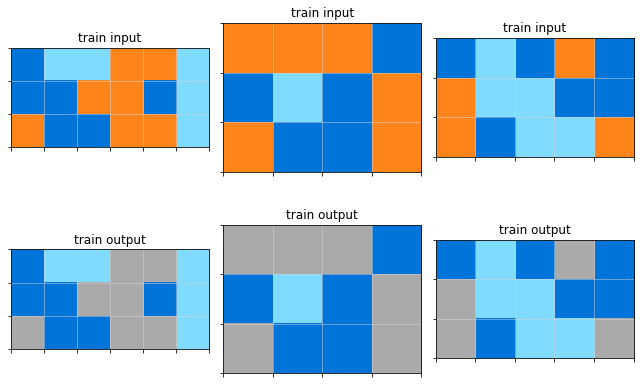

8 objects
[[1]]
[[7 7 0 7]
 [0 7 7 7]
 [0 0 7 0]]
[[1]]
[[8]
 [8]]
[[1]]
[[7]]
[[1]]
[[8]]
8 objects
[[1]]
[[5 5 0 5]
 [0 5 5 5]
 [0 0 5 0]]
[[1]]
[[8]
 [8]]
[[1]]
[[5]]
[[1]]
[[8]]


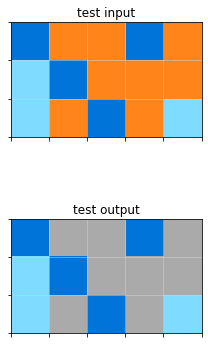

c909285e.json
Icecuber solved? False
['find_the_intruder', 'crop', 'rectangle_guessing']
98 objects
[[0 0 2]
 [0 0 2]
 [2 2 2]]
[[0 0 0 4 0]
 [0 0 0 4 0]
 [0 0 0 4 0]
 [4 4 4 4 4]
 [0 0 0 4 0]]
[[8]
 [8]]
[[5]
 [5]
 [5]
 [5]
 [5]]
[[0 4 0 0 0]
 [0 4 0 0 0]
 [0 4 0 0 0]
 [4 4 4 4 4]
 [0 4 0 0 0]]
[[2 0 0]
 [2 0 0]
 [2 2 2]]
[[8]
 [8]]
[[5]
 [5]
 [5]
 [5]
 [5]]
[[0 0 2]
 [0 0 2]
 [2 2 2]]
[[0 0 0 4 0]
 [0 0 0 4 0]
 [0 0 0 4 0]
 [4 4 4 4 4]
 [0 0 0 4 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 5]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 5]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 5]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 5]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 5]
 [0 0 0 0 0 0 0 0 0 0 0 0 5 5 5 5 5 5 5 5 5 5 5 5]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 5]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 5]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 5]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 5]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

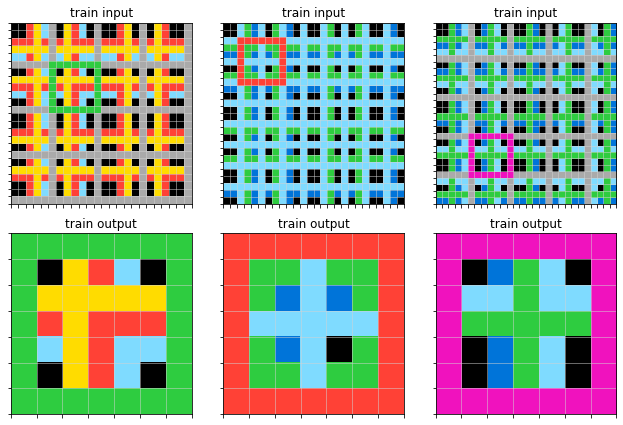

95 objects
[[0 0 1]
 [0 0 1]
 [1 1 1]]
[[0 0 0 2]
 [0 0 0 2]
 [0 0 0 2]
 [2 2 2 2]]
[[0 0 0 0 3]
 [0 0 0 0 3]
 [0 0 0 0 3]
 [0 0 0 0 3]
 [3 3 3 3 3]]
[[0 0 0 0 0 4 0 0 0 0 0 4 0 0 0 0 0 4 0 0 0 0 0 4]
 [0 0 0 0 0 4 0 0 0 0 0 4 0 0 0 0 0 4 0 0 0 0 0 4]
 [0 0 0 0 0 4 0 0 0 0 0 4 0 0 0 0 0 4 0 0 0 0 0 4]
 [0 0 0 0 0 4 0 0 0 0 0 4 0 0 0 0 0 4 0 0 0 0 0 4]
 [0 0 0 0 0 4 0 0 0 0 0 4 0 0 0 0 0 4 0 0 0 0 0 4]
 [4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
 [0 0 0 0 0 4 0 0 0 0 0 4 0 0 0 0 0 4 0 0 0 0 0 4]
 [0 0 0 0 0 4 0 0 0 0 0 4 0 0 0 0 0 4 0 0 0 0 0 4]
 [0 0 0 0 0 4 0 0 0 0 0 4 0 0 0 0 0 4 0 0 0 0 0 4]
 [0 0 0 0 0 4 0 0 0 0 0 4 0 0 0 0 0 4 0 0 0 0 0 4]
 [0 0 0 0 0 4 0 0 0 0 0 4 0 0 0 0 0 4 0 0 0 0 0 4]
 [4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
 [0 0 0 0 0 4 0 0 0 0 0 4 0 0 0 0 0 4 0 0 0 0 0 4]
 [0 0 0 0 0 4 0 0 0 0 0 4 0 0 0 0 0 4 0 0 0 0 0 4]
 [0 0 0 0 0 4 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 4]
 [0 0 0 0 0 4 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 4]
 [0 0 0 0 0 4 0 0 0 0 0 4 0 0 0 0 

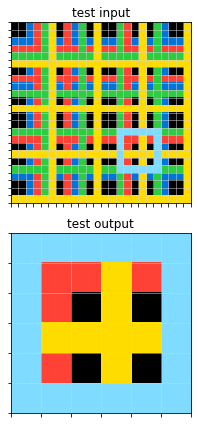

c9e6f938.json
Icecuber solved? True
['image_repetition', 'image_reflection']
2 objects
[[7]]
[[0 7]
 [7 7]]
3 objects
[[7]]
[[7]]
[[0 7 7 0]
 [7 7 7 7]]
1 objects
[[7 7]]
1 objects
[[7 7 7 7]]
1 objects
[[7]]
2 objects
[[7]]
[[7]]


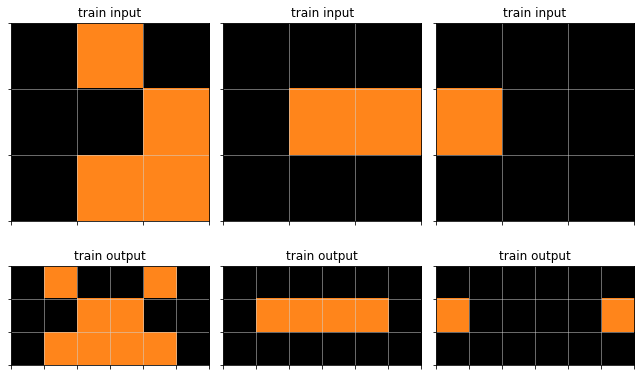

2 objects
[[7 7]
 [0 7]]
[[7]]
3 objects
[[7 7]
 [0 7]]
[[7 7]
 [7 0]]
[[7 7]]


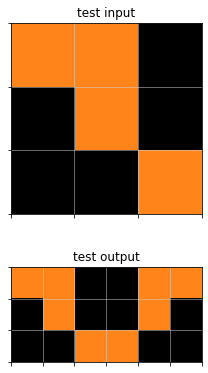

c9f8e694.json
Icecuber solved? True
['recoloring', 'pattern_repetition', 'color_palette']
9 objects
[[1]]
[[5 5]
 [5 5]
 [5 5]
 [5 5]
 [5 5]
 [5 5]
 [5 5]]
[[2]]
[[1]
 [1]
 [1]]
[[5 5]
 [5 5]
 [5 5]
 [5 5]
 [5 5]
 [5 5]
 [5 5]]
[[2]
 [2]]
[[1]
 [1]
 [1]]
[[5 5 5]
 [5 5 5]
 [5 5 5]]
[[2]]
16 objects
[[1]]
[[1 1]]
[[2]]
[[2 2]]
[[1]
 [1]
 [1]]
[[1 1]
 [1 1]
 [1 1]]
[[1 1]]
[[2]
 [2]]
[[2 2]
 [2 2]]
[[2 2]
 [2 2]]
[[1]
 [1]
 [1]]
[[1 1]
 [1 1]
 [1 1]]
[[1 1 1]
 [1 1 1]]
[[2]]
[[2 2 2]]
[[2 2]]
8 objects
[[3]
 [3]]
[[5 5 5 5]
 [5 5 5 5]
 [5 5 5 5]
 [5 5 5 5]]
[[0 0 0 5 5 5 5 5]
 [0 0 0 5 5 5 5 5]
 [0 0 0 5 5 5 5 5]
 [0 0 0 5 5 5 5 5]
 [5 5 5 5 5 5 5 5]
 [5 5 5 5 5 5 5 5]
 [5 5 5 5 5 5 5 5]
 [5 5 5 5 5 5 5 5]
 [5 5 5 0 0 0 0 0]
 [5 5 5 0 0 0 0 0]]
[[4]
 [4]]
[[3]]
[[4]]
[[3]
 [3]
 [3]]
[[4]
 [4]]
12 objects
[[3 3 3 3 3]
 [3 3 3 3 3]]
[[3 3 3 3 3]]
[[4 4 4 4 4]
 [4 4 4 4 4]]
[[4 4 4 4 4]
 [4 4 4 4 4]]
[[3]]
[[3 3 3 3 3]]
[[4]]
[[4 4 4 4 4 4 4 4]]
[[3]
 [3]
 [3]]
[[3 3 3 3 3 3 3 3]
 [3 3 3 3 

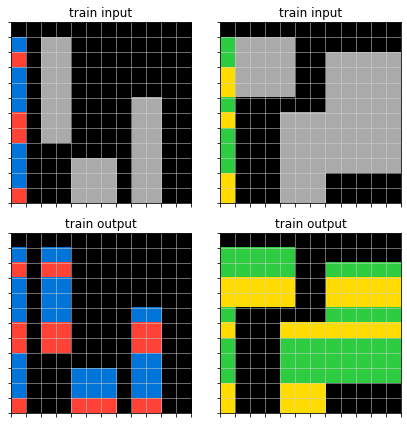

7 objects
[[1]]
[[5 5 5 5 5 5 0 0 0 0]
 [5 5 5 5 5 5 0 0 0 0]
 [5 5 5 5 5 5 0 0 0 0]
 [5 5 5 5 5 5 0 5 5 5]
 [5 5 5 5 5 5 0 5 5 5]
 [5 5 5 5 5 5 0 5 5 5]
 [0 0 0 0 5 5 5 5 5 5]
 [0 0 0 0 5 5 5 0 0 0]
 [0 0 0 0 5 5 5 0 0 0]
 [0 0 0 0 5 5 5 0 0 0]
 [0 0 0 0 5 5 5 0 0 0]
 [0 0 0 0 5 5 5 0 0 0]]
[[8]]
[[1]
 [1]]
[[7]
 [7]
 [7]
 [7]]
[[8]
 [8]
 [8]
 [8]]
[[5 5 5]
 [5 5 5]
 [5 5 5]]
12 objects
[[1]]
[[1 1 1 1 1 1]]
[[8]]
[[8 8 8 8 8 8]]
[[1]
 [1]]
[[1 1 1 1 1 1]
 [1 1 1 1 1 1]]
[[1 1 1]]
[[7]
 [7]
 [7]
 [7]]
[[7 7 7 7 7 7 0 7 7 7]
 [7 7 7 7 7 7 0 7 7 7]
 [0 0 0 0 7 7 7 7 7 7]
 [0 0 0 0 7 7 7 0 0 0]]
[[8]
 [8]
 [8]
 [8]]
[[8 8 8]
 [8 8 8]
 [8 8 8]
 [8 8 8]]
[[8 8 8]
 [8 8 8]
 [8 8 8]]


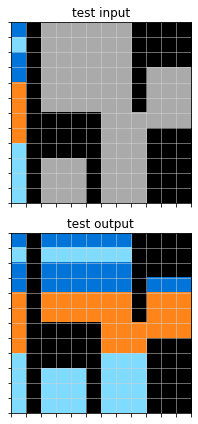

caa06a1f.json
Icecuber solved? False
['pattern_expansion', 'image_filling']
50 objects
[[6]]
[[7]]
[[6]]
[[7]]
[[6]]
[[7]]
[[6]]
[[0 0 0 0 0 0 0 3 3 3 3]
 [0 0 0 0 0 0 0 3 3 3 3]
 [0 0 0 0 0 0 0 3 3 3 3]
 [0 0 0 0 0 0 0 3 3 3 3]
 [0 0 0 0 0 0 0 3 3 3 3]
 [0 0 0 0 0 0 0 3 3 3 3]
 [0 0 0 0 0 0 0 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3 3]]
[[7]]
[[6]]
[[7]]
[[6]]
[[7]]
[[6]]
[[7]]
[[6]]
[[7]]
[[6]]
[[7]]
[[6]]
[[7]]
[[6]]
[[7]]
[[6]]
[[7]]
[[6]]
[[7]]
[[6]]
[[7]]
[[6]]
[[7]]
[[6]]
[[7]]
[[6]]
[[7]]
[[6]]
[[7]]
[[6]]
[[7]]
[[6]]
[[7]]
[[6]]
[[7]]
[[6]]
[[7]]
[[6]]
[[7]]
[[6]]
[[7]]
[[6]]
121 objects
[[7]]
[[6]]
[[7]]
[[6]]
[[7]]
[[6]]
[[7]]
[[6]]
[[7]]
[[6]]
[[7]]
[[6]]
[[7]]
[[6]]
[[7]]
[[6]]
[[7]]
[[6]]
[[7]]
[[6]]
[[7]]
[[6]]
[[7]]
[[6]]
[[7]]
[[6]]
[[7]]
[[6]]
[[7]]
[[6]]
[[7]]
[[6]]
[[7]]
[[6]]
[[7]]
[[6]]
[[7]]
[[6]]
[[7]]
[[6]]
[[7]]
[[6]]
[[7]]
[[6]]
[[7]]
[[6]]
[[7]]
[[6]]
[[7]]
[[6]]
[[7]]
[[6]]
[[7]]
[[6]]
[[7]]
[

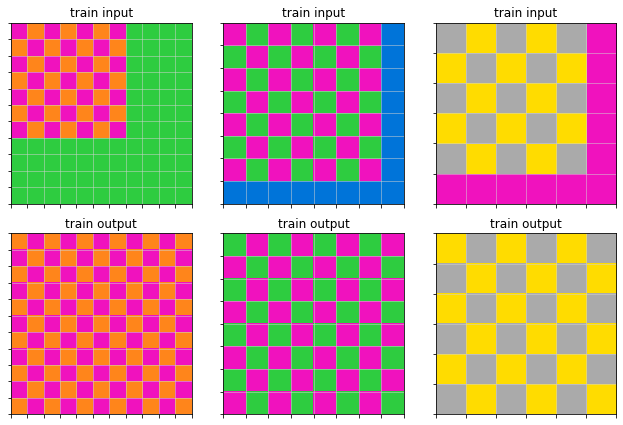

145 objects
[[8]]
[[5]]
[[7]]
[[8]]
[[5]]
[[7]]
[[8]]
[[5]]
[[7]]
[[8]]
[[5]]
[[7]]
[[0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3]
 [0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3]
 [0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3]
 [0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3]
 [0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3]
 [0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3]
 [0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3]
 [0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3]
 [0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3]
 [0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3]
 [0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3]
 [0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]]
[[5]]
[[7]]
[[8]]
[[5]]
[[7]]
[[8]]
[[5]]
[[7]]
[[8]]
[[5]]
[[7]]
[[8]]
[[8]]
[[5]]
[[7]]
[[8]]
[[5]]
[[7]]
[[8]]
[[5]]
[[7]]
[[8]]
[[5]]
[[7]]
[[5]]
[[7]]
[[8]]
[[5]]
[[7]]
[[8]]
[[5]]
[[7]]
[[8]]
[[5]]
[[7]]
[[8

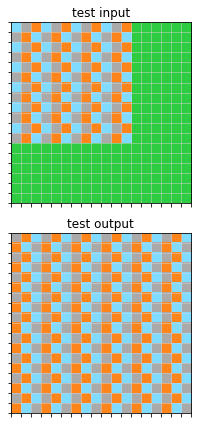

cbded52d.json
Icecuber solved? False
['detect_grid', 'separate_images', 'pattern_modification', 'pattern_repetition', 'pattern_juxtaposition', 'connect_the_dots']
14 objects
[[1 0]
 [1 1]]
[[4]]
[[1 1]
 [1 1]]
[[1 0]
 [1 1]]
[[4]]
[[1 1]
 [0 1]]
[[1 1]
 [1 1]]
[[1 1]
 [0 1]]
[[2]]
[[2]]
[[1 0]
 [1 1]]
[[4]]
[[1 1]
 [1 1]]
[[1 1]
 [1 1]]
18 objects
[[1 0]
 [1 1]]
[[4]]
[[1 0]
 [1 1]]
[[4]]
[[1 0]
 [1 1]]
[[4]]
[[1]]
[[4]]
[[1 1]
 [0 1]]
[[1 1]
 [0 1]]
[[2]]
[[1]]
[[2]]
[[2]]
[[1 0]
 [1 1]]
[[4]]
[[1 1]
 [1 1]]
[[1 1]
 [1 1]]
14 objects
[[1 1]
 [1 0]]
[[7]]
[[0 1]
 [1 1]]
[[1 1]
 [1 0]]
[[3]]
[[3]]
[[1 1]
 [1 1]]
[[1 1]
 [1 1]]
[[1 1]
 [1 1]]
[[1 1]
 [1 1]]
[[7]]
[[0 1]
 [1 1]]
[[1 1]
 [1 0]]
[[3]]
18 objects
[[1 1]
 [1 0]]
[[7]]
[[1]]
[[1 1]
 [1 0]]
[[3]]
[[1]]
[[3]]
[[3]]
[[1 1]
 [1 1]]
[[7]]
[[0 1]
 [1 1]]
[[1 1]
 [1 0]]
[[3]]
[[1 1]
 [1 1]]
[[7]]
[[0 1]
 [1 1]]
[[1 1]
 [1 0]]
[[3]]
11 objects
[[1 1]
 [1 1]]
[[1 1]
 [1 1]]
[[1 1]
 [1 1]]
[[1 1]
 [0 1]]
[[1 1]
 [1 1]]
[[1 1]
 [0 1]]
[[

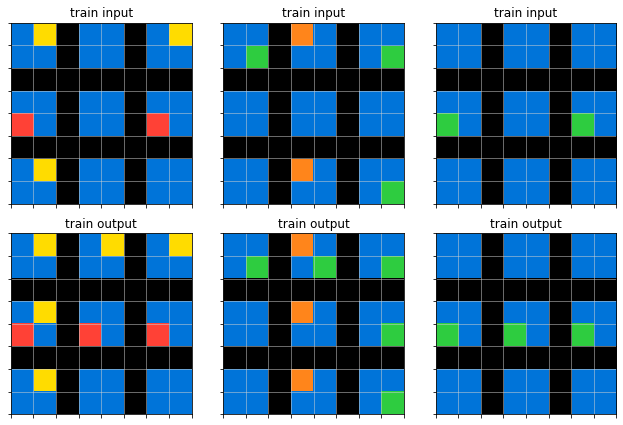

15 objects
[[1 1]
 [1 0]]
[[1 1]
 [1 1]]
[[1 1]
 [1 0]]
[[8]]
[[8]]
[[1 1]
 [1 1]]
[[1 1]
 [1 1]]
[[1 1]
 [1 1]]
[[6]]
[[0 1]
 [1 1]]
[[1 1]
 [1 1]]
[[6]]
[[1]]
[[1]]
[[8]]
18 objects
[[1 1]
 [1 0]]
[[1 1]
 [1 0]]
[[1 1]
 [1 0]]
[[8]]
[[8]]
[[8]]
[[1 1]
 [1 1]]
[[1 1]
 [1 1]]
[[1 1]
 [1 0]]
[[8]]
[[6]]
[[0 1]
 [1 1]]
[[6]]
[[0 1]
 [1 1]]
[[6]]
[[1]]
[[1]]
[[8]]


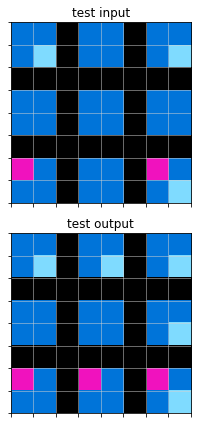

cce03e0d.json
Icecuber solved? True
['image_repetition', 'image_expansion', 'pairwise_analogy']
4 objects
[[1]]
[[2]]
[[1]]
[[1]]
4 objects
[[1]]
[[2]]
[[1]]
[[1]]
3 objects
[[0 1]
 [1 1]]
[[2]]
[[2]]
6 objects
[[0 1]
 [1 1]]
[[2]]
[[2]]
[[0 1]
 [1 1]]
[[2]]
[[2]]
7 objects
[[2]]
[[1]]
[[2]]
[[2]]
[[1]]
[[2]]
[[1]]
28 objects
[[2]]
[[1]]
[[2]]
[[2]]
[[1]]
[[2]]
[[2]]
[[1]]
[[2]]
[[1]]
[[2]]
[[1]]
[[2]]
[[1]]
[[2]]
[[1]]
[[2]]
[[2]]
[[1]]
[[2]]
[[1]]
[[2]]
[[1]]
[[2]]
[[2]]
[[1]]
[[2]]
[[1]]


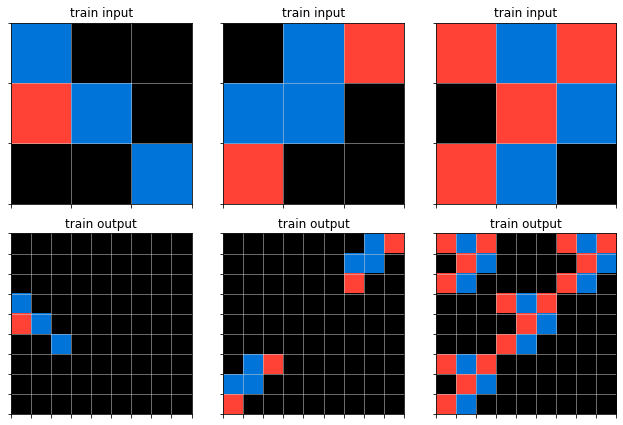

6 objects
[[1]]
[[2 2]]
[[2]]
[[1]]
[[1]]
[[2]]
24 objects
[[1]]
[[2 2]]
[[1]]
[[2 2]]
[[2]]
[[1]]
[[2]]
[[1]]
[[1]]
[[2]]
[[1]]
[[2]]
[[1]]
[[2 2]]
[[2]]
[[1]]
[[1]]
[[2]]
[[1]]
[[2 2]]
[[2]]
[[1]]
[[1]]
[[2]]


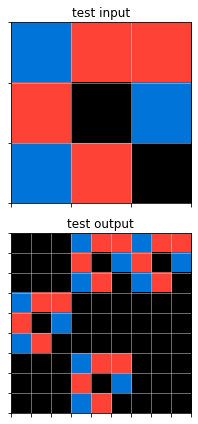

cdecee7f.json
Icecuber solved? False
['summarize', 'pairwise_analogy']
6 objects
[[1]]
[[6]]
[[3]]
[[7]]
[[9]]
[[8]]
6 objects
[[3]]
[[1]]
[[8]]
[[9]]
[[7]]
[[6]]
7 objects
[[4]]
[[2]]
[[8]]
[[6]]
[[9]]
[[5]]
[[3]]
7 objects
[[9]]
[[3]]
[[4]]
[[5]]
[[8]]
[[6]]
[[2]]
9 objects
[[3]]
[[5]]
[[9]]
[[1]]
[[4]]
[[5]]
[[3]]
[[2]]
[[1]]
8 objects
[[2]]
[[4]]
[[5]]
[[1]]
[[9]]
[[3]
 [3]]
[[5]]
[[1]]


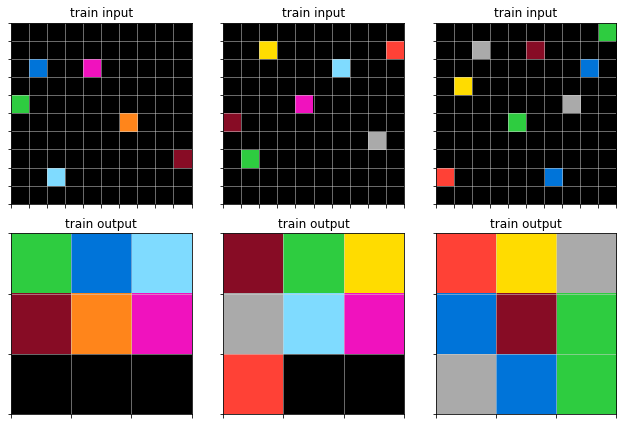

9 objects
[[5]]
[[9]]
[[1]]
[[2]]
[[6]]
[[3]]
[[5]]
[[4]]
[[9]]
9 objects
[[5]]
[[2]]
[[9]]
[[4]]
[[5]]
[[3]]
[[9]]
[[6]]
[[1]]


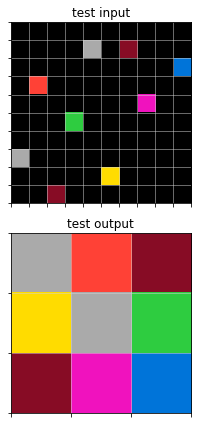

ce22a75a.json
Icecuber solved? True
['replace_pattern']
3 objects
[[5]]
[[5]]
[[5]]
3 objects
[[1 1 1]
 [1 1 1]
 [1 1 1]]
[[1 1 1]
 [1 1 1]
 [1 1 1]]
[[1 1 1]
 [1 1 1]
 [1 1 1]]
4 objects
[[5]]
[[5]]
[[5]]
[[5]]
1 objects
[[1 1 1 0 0 0]
 [1 1 1 0 0 0]
 [1 1 1 0 0 0]
 [1 1 1 0 0 0]
 [1 1 1 0 0 0]
 [1 1 1 0 0 0]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]]


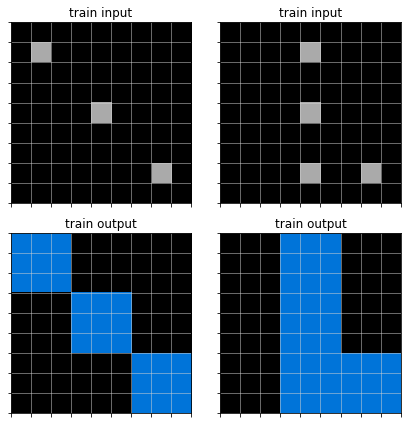

4 objects
[[5]]
[[5]]
[[5]]
[[5]]
2 objects
[[1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]]
[[1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]]


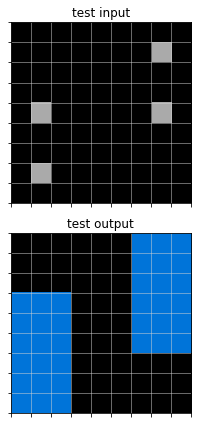

ce4f8723.json
Icecuber solved? True
['detect_wall', 'separate_images', 'take_complement', 'take_intersection']
8 objects
[[1 1]
 [0 1]
 [0 1]]
[[1]]
[[1]]
[[1]]
[[4 4 4 4]]
[[2 2 2 2]
 [0 0 2 2]]
[[2 2]]
[[2 2]]
2 objects
[[3 3 3 3]
 [0 3 3 3]
 [3 3 0 0]
 [3 0 0 0]]
[[3 3]]
5 objects
[[1 1 1]
 [0 1 0]]
[[0 1]
 [1 1]
 [0 1]]
[[1 1]]
[[4 4 4 4]]
[[0 0 0 2]
 [0 0 0 2]
 [2 2 2 2]
 [2 2 0 2]]
1 objects
[[3 3 3 3]
 [0 3 0 3]
 [3 3 3 3]
 [3 3 0 3]]
9 objects
[[1 1 0 0]
 [1 0 0 0]
 [1 1 0 1]
 [1 1 1 1]]
[[1]]
[[4 4 4 4]]
[[2 2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
3 objects
[[3 3 0 0]
 [3 0 0 0]
 [3 3 0 3]
 [3 3 3 3]]
[[3]]
[[3]]
9 objects
[[1 0]
 [1 1]
 [1 0]]
[[1]]
[[0 1]
 [1 1]
 [0 1]]
[[1]]
[[4 4 4 4]]
[[2 2]]
[[2]]
[[2 2]]
[[2]]
1 objects
[[3 3 3 0]
 [3 3 3 3]
 [3 3 3 3]
 [0 3 3 3]]


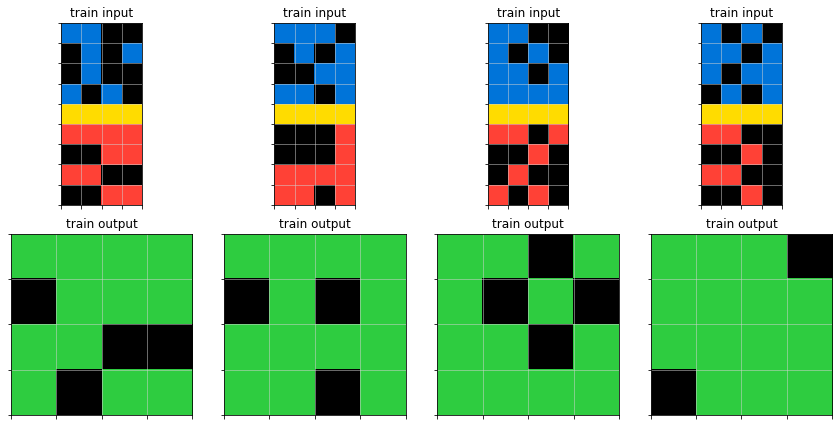

10 objects
[[1]
 [1]]
[[1]
 [1]]
[[1]]
[[1]]
[[1]]
[[4 4 4 4]]
[[2 2]]
[[2]]
[[0 2 0]
 [2 2 2]]
[[2]]
3 objects
[[3 3 3]
 [3 0 3]]
[[0 3 0]
 [3 3 3]]
[[3]]


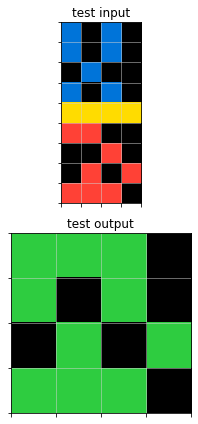

ce602527.json
Icecuber solved? False
['crop', 'size_guessing', 'shape_guessing', 'find_the_intruder', 'remove_intruder']
6 objects
[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1]
 [1 1 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1]
 [1 1 1 0 1 0 1 0 1 1 1 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1]
 [1 1 1 0 1 0 1 0 1 1 1 0 0 0 0 0 1]
 [1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1]
 [1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1]
 [1 1 1 0 0 1 1 0 0 1 1 0 0 1 1 1 1]
 [1 1 1 0 0 1 1 0 0 1 1 0 0 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1]
 [1 1 1 0 0 1 1 0 0 1 1 0 0 1 1 1 1]
 [1 1 1 0 0 1 1 0 0 1 1 0 0 1 1 1 1]]
[[3 3 0 3 3]
 [3 0 0 0 3]
 [3 3 3 3 3]
 [0 0 3 0 0]
 [3 3 3 3 3]]
[[2 2 2 2 2]
 [2 0 2 0 2]
 [0 0 0 0 2]
 [2 0 2 0 2]
 [2 2 2 2 2]]
[[8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8]
 [8 8 0 0 8 8 0 0 8 8]
 [8 8 0 0 8 8 0 0 8 8]
 [0 0 0 0 0 0 0

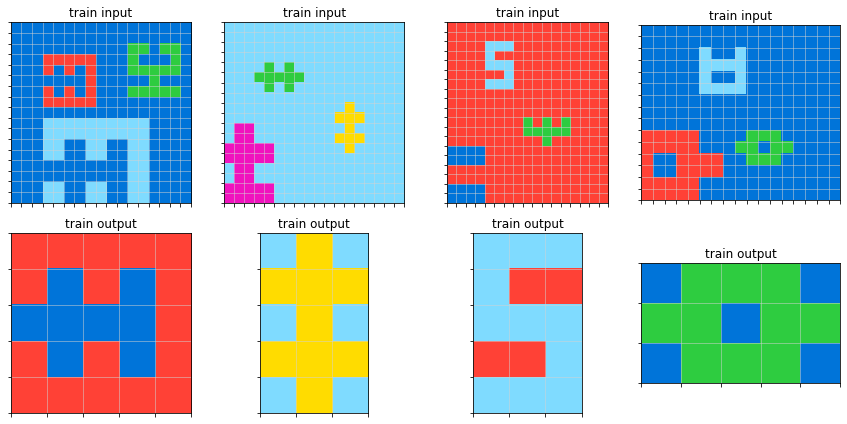

6 objects
[[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 0 3 0 0 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 0 0 0 0 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 0 3 0 0 3 3 3 3 3]
 [3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
 [3 3 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3]
 [3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
 [3 3 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 0 0 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 0 0 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 0 0 0 0 0 0 3 3 3 3 3 3]
 [3 3 3 3 3 3 0 0 0 0 0 0 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 0 0 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 0 0 3 3 3 3 3 3 3 3]]
[[1 0]
 [1 1]
 [1 0]]
[[1 1]
 [0 1]
 [1 1]]
[[3]]
[[0 6 0]
 [6 6 6]
 [0 6 0]
 [6 6 6]]
[[0 0 8 8 0 0]
 [0 0 8 8 0 0]
 [8 8 8 8 8 8]
 [8 8 8 8 8 8]
 [0 0 8 8 0 0]
 [0 0 8 8 0 0]]
5 objects
[[3]]
[[0 6 0]
 [6 6 6]
 [0 6 0]
 [6 6 6]]
[[3]]
[[3]]
[[3]]


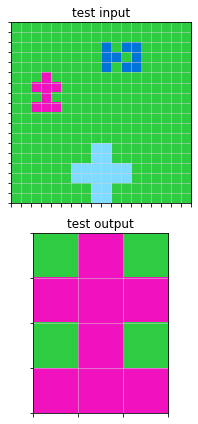

ce9e57f2.json
Icecuber solved? True
['recoloring', 'count_tiles', 'take_half']
4 objects
[[2]
 [2]
 [2]
 [2]
 [2]
 [2]]
[[2]
 [2]
 [2]
 [2]
 [2]]
[[2]
 [2]
 [2]
 [2]]
[[2]
 [2]
 [2]]
8 objects
[[2]
 [2]
 [2]]
[[2]
 [2]
 [2]]
[[2]
 [2]]
[[8]
 [8]
 [8]]
[[2]
 [2]]
[[8]
 [8]]
[[8]
 [8]]
[[8]]
4 objects
[[2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]]
[[2]
 [2]
 [2]
 [2]
 [2]
 [2]]
[[2]
 [2]
 [2]
 [2]
 [2]]
[[2]
 [2]
 [2]]
8 objects
[[2]
 [2]
 [2]
 [2]]
[[2]
 [2]
 [2]]
[[2]
 [2]
 [2]]
[[8]
 [8]
 [8]]
[[2]
 [2]]
[[8]
 [8]
 [8]]
[[8]
 [8]]
[[8]]
4 objects
[[2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]]
[[2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]]
[[2]
 [2]
 [2]
 [2]]
[[2]
 [2]
 [2]]
8 objects
[[2]
 [2]
 [2]
 [2]]
[[2]
 [2]
 [2]
 [2]]
[[2]
 [2]]
[[8]
 [8]
 [8]
 [8]]
[[8]
 [8]
 [8]]
[[2]
 [2]]
[[8]
 [8]]
[[8]]


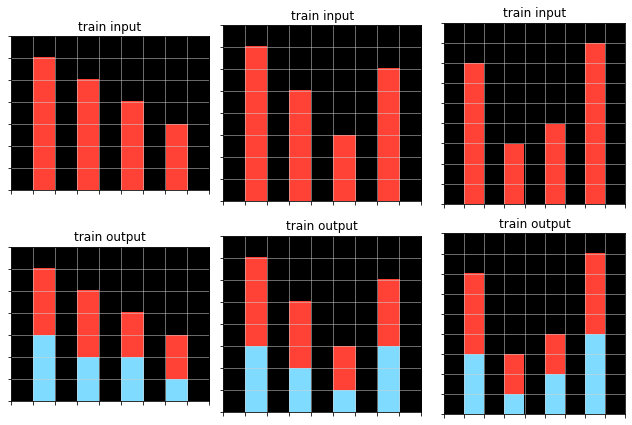

4 objects
[[2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]]
[[2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]]
[[2]
 [2]
 [2]
 [2]
 [2]]
[[2]
 [2]]
8 objects
[[2]
 [2]
 [2]
 [2]
 [2]]
[[2]
 [2]
 [2]
 [2]
 [2]]
[[8]
 [8]
 [8]
 [8]
 [8]]
[[2]
 [2]
 [2]]
[[8]
 [8]
 [8]
 [8]]
[[2]]
[[8]
 [8]]
[[8]]


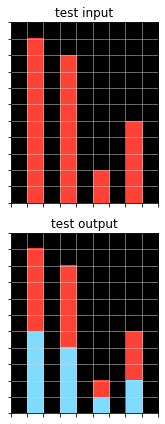

cf98881b.json
Icecuber solved? True
['detect_wall', 'separate_images', 'pattern_juxtaposition']
11 objects
[[4]
 [4]]
[[4]]
[[2]
 [2]
 [2]
 [2]]
[[9 9]]
[[2]
 [2]
 [2]
 [2]]
[[9 9]]
[[0 1 0]
 [1 1 1]
 [1 1 0]]
[[4 0 0 0]
 [4 4 4 4]]
[[9]]
[[9]]
[[1]]
6 objects
[[9]]
[[4]
 [4]]
[[4]]
[[9 9]]
[[4 0 0 0]
 [4 4 4 4]]
[[1 1]]
14 objects
[[4 4 4 4]
 [4 4 0 0]
 [4 0 0 0]]
[[2]
 [2]
 [2]
 [2]]
[[9 0]
 [9 9]]
[[9]]
[[2]
 [2]
 [2]
 [2]]
[[1]]
[[1]]
[[4 4]]
[[9]]
[[1]]
[[1]]
[[9]]
[[1]]
[[1]]
5 objects
[[4 4 4 4]
 [4 4 0 0]
 [4 0 0 0]]
[[1]]
[[4 4]]
[[1]]
[[9]]
12 objects
[[4 4 4]
 [0 4 0]
 [0 4 0]]
[[2]
 [2]
 [2]
 [2]]
[[9 9]]
[[9]]
[[2]
 [2]
 [2]
 [2]]
[[1]
 [1]]
[[1]]
[[0 4]
 [0 4]
 [4 4]]
[[0 0 9 0]
 [0 0 9 9]
 [9 9 9 0]]
[[1]]
[[1]
 [1]]
[[4]]
7 objects
[[4 4 4]
 [0 4 0]
 [0 4 0]]
[[9]]
[[9]
 [9]]
[[0 4]
 [0 4]
 [4 4]]
[[1]]
[[4]]
[[9]]
8 objects
[[0 0 4]
 [0 0 4]
 [0 4 4]
 [4 4 4]]
[[2]
 [2]
 [2]
 [2]]
[[9]]
[[2]
 [2]
 [2]
 [2]]
[[4 4]
 [4 0]]
[[9]]
[[0 9]
 [9 9]
 [9 0]]
[[1 1 0 1]
 [1 1 1 

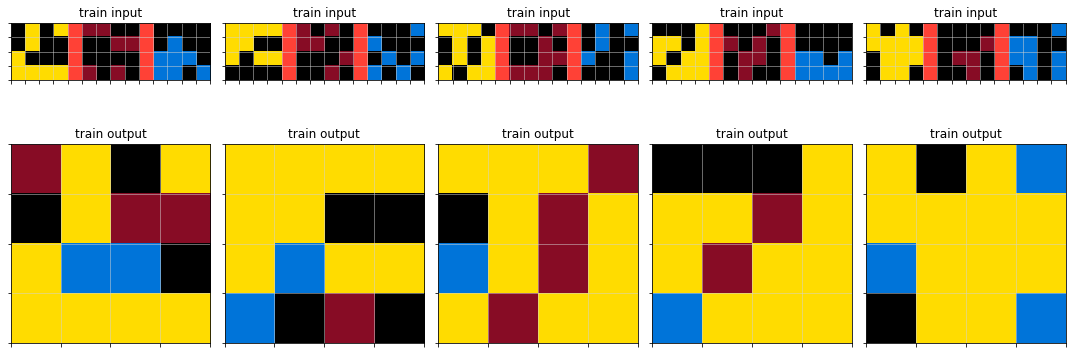

10 objects
[[4]]
[[2]
 [2]
 [2]
 [2]]
[[9 0 9 0]
 [9 9 9 0]
 [0 9 9 9]
 [0 0 9 9]]
[[2]
 [2]
 [2]
 [2]]
[[1 1 0]
 [1 1 1]
 [1 1 0]
 [1 0 0]]
[[4 4]]
[[4]]
[[1]]
[[4 4]]
[[9]]
9 objects
[[9]]
[[1]]
[[4]]
[[4 4]]
[[0 9 0]
 [9 9 9]
 [0 0 9]]
[[4]]
[[1]]
[[9]]
[[4 4]]


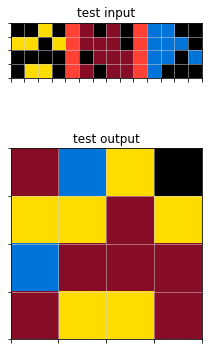

d037b0a7.json
Icecuber solved? True
['pattern_expansion', 'draw_line_from_point']
3 objects
[[6]]
[[4]]
[[3]]
3 objects
[[6]
 [6]
 [6]]
[[4]
 [4]]
[[3]]
3 objects
[[2]]
[[7]]
[[8]]
3 objects
[[2]
 [2]
 [2]]
[[7]
 [7]]
[[8]
 [8]]
2 objects
[[4]]
[[2]]
2 objects
[[4]
 [4]
 [4]]
[[2]
 [2]]


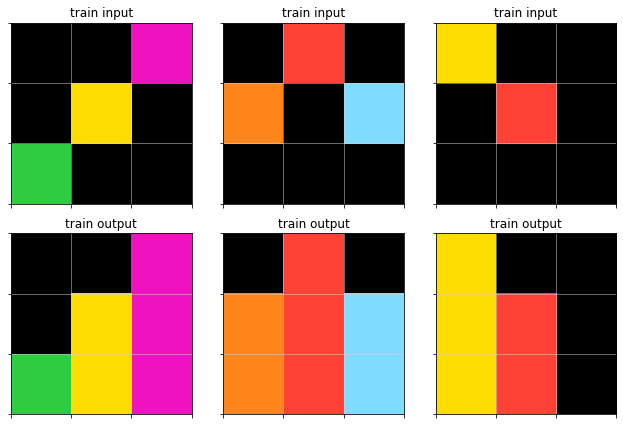

3 objects
[[4]]
[[8]]
[[7]]
3 objects
[[4]
 [4]
 [4]]
[[8]
 [8]
 [8]]
[[7]]


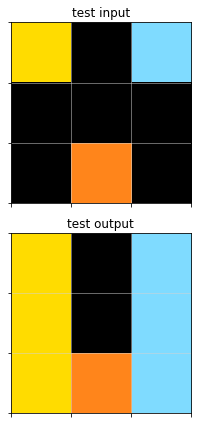

d06dbe63.json
Icecuber solved? False
['pattern_expansion', 'pairwise_analogy']
1 objects
[[8]]
3 objects
[[0 0 5]
 [5 5 5]
 [5 0 0]]
[[8]]
[[0 0 0 0 5]
 [0 0 5 5 5]
 [0 0 5 0 0]
 [5 5 5 0 0]
 [5 0 0 0 0]
 [5 0 0 0 0]]
1 objects
[[8]]
3 objects
[[0 0 0 0 0 0 5]
 [0 0 0 0 5 5 5]
 [0 0 0 0 5 0 0]
 [0 0 5 5 5 0 0]
 [0 0 5 0 0 0 0]
 [5 5 5 0 0 0 0]
 [5 0 0 0 0 0 0]]
[[8]]
[[0 0 0 0 5]
 [0 0 5 5 5]
 [0 0 5 0 0]
 [5 5 5 0 0]
 [5 0 0 0 0]]


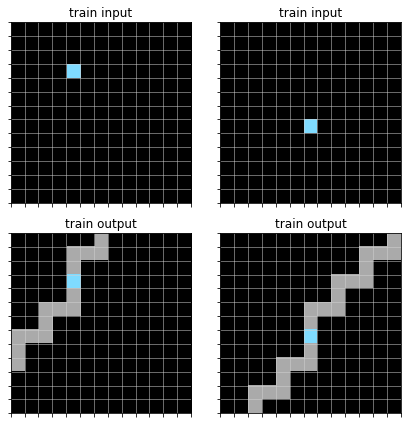

1 objects
[[8]]
3 objects
[[0 0 0 0 5]
 [0 0 5 5 5]
 [0 0 5 0 0]
 [5 5 5 0 0]
 [5 0 0 0 0]]
[[8]]
[[0 0 0 0 0 5]
 [0 0 0 5 5 5]
 [0 0 0 5 0 0]
 [0 5 5 5 0 0]
 [0 5 0 0 0 0]
 [5 5 0 0 0 0]]


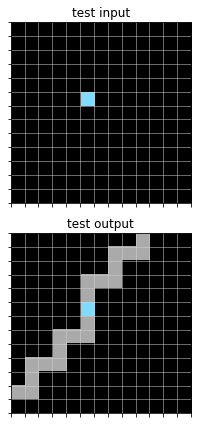

d07ae81c.json
Icecuber solved? False
['draw_line_from_point', 'diagonals', 'color_guessing']
9 objects
[[8 8 8]
 [8 8 8]]
[[0 0 0 2 2 2 2 0 0 0 0 0]
 [0 0 0 2 2 2 2 0 0 0 0 0]
 [2 2 2 2 2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2 2 2 2 2]
 [0 0 0 2 0 2 2 0 0 0 0 0]
 [0 0 0 2 2 2 2 0 0 0 0 0]
 [0 0 0 2 2 2 2 0 0 0 0 0]
 [0 0 0 2 2 2 2 0 0 0 0 0]
 [0 0 0 2 2 2 2 0 0 0 0 0]
 [0 0 0 2 2 2 2 0 0 0 0 0]
 [0 0 0 2 2 2 2 0 0 0 0 0]
 [2 2 2 2 2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2 2 2 2 2]
 [0 0 0 2 2 2 2 0 0 0 0 0]
 [0 0 0 2 2 2 2 0 0 0 0 0]
 [0 0 0 2 2 2 2 0 0 0 0 0]]
[[8 8 8 8 8]
 [8 8 8 8 8]]
[[8 8 8]
 [8 8 8]
 [8 8 8]
 [8 0 8]
 [8 8 8]
 [8 8 8]
 [8 8 8]]
[[4]]
[[8 8 8 8 8]
 [8 8 8 8 8]
 [8 8 8 8 8]
 [8 8 8 8 8]
 [8 8 8 8 8]
 [8 8 8 8 8]
 [8 8 8 8 8]]
[[1]]
[[8 8 8]
 [8 8 8]
 [8 8 8]]
[[8 8 8 8 8]
 [8 8 8 8 8]
 [8 8 8 8 8]]
50 objects
[[8 8 8]
 [0 8 8]]
[[0 2 2 2 2]
 [0 2 2 2 2]
 [2 2 2 2 2]
 [0 2 2 2 0]
 [0 0 2 0 0]]
[[8 8

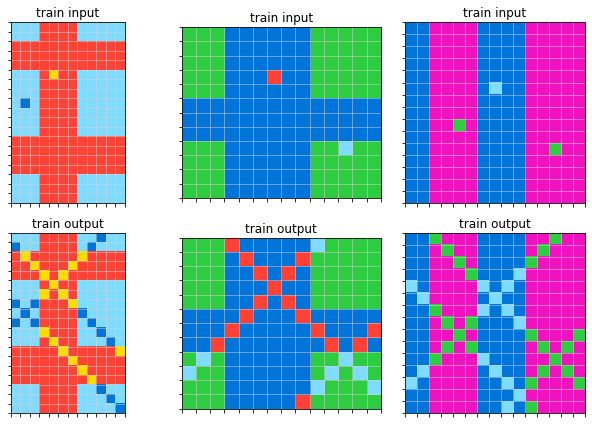

10 objects
[[8 8 8]
 [8 8 8]
 [8 8 8]
 [8 8 8]]
[[0 0 0 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0]
 [3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
 [0 0 0 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0]
 [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
 [0 0 0 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0]]
[[8 0 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8]]
[[4]]
[[1]]
[[8 8 8]
 [8 8 8]
 [8 8 8]
 [8 8 8]]
[[8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8]]
[[1]]
[[8 8 8]
 [8 

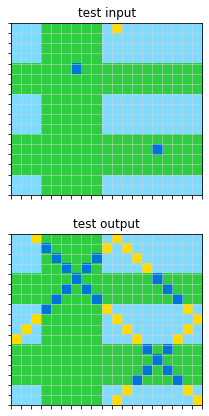

d0f5fe59.json
Icecuber solved? False
['separate_shapes', 'count_shapes', 'associate_images_to_numbers', 'pairwise_analogy']
4 objects
[[0 8 8]
 [0 8 8]
 [8 8 8]
 [0 8 0]]
[[0 8 8]
 [8 8 8]
 [0 0 8]]
[[0 0 8 8]
 [8 8 8 0]
 [0 0 8 0]]
[[8 8]
 [8 8]]
4 objects
[[8]]
[[8]]
[[8]]
[[8]]
3 objects
[[0 0 8]
 [8 8 8]
 [8 8 0]]
[[0 0 8 0]
 [8 8 8 8]
 [8 0 8 0]]
[[8 8]
 [8 8]]
3 objects
[[8]]
[[8]]
[[8]]
2 objects
[[8 8 0]
 [8 8 8]
 [0 8 8]]
[[8 0]
 [8 8]
 [8 0]]
2 objects
[[8]]
[[8]]


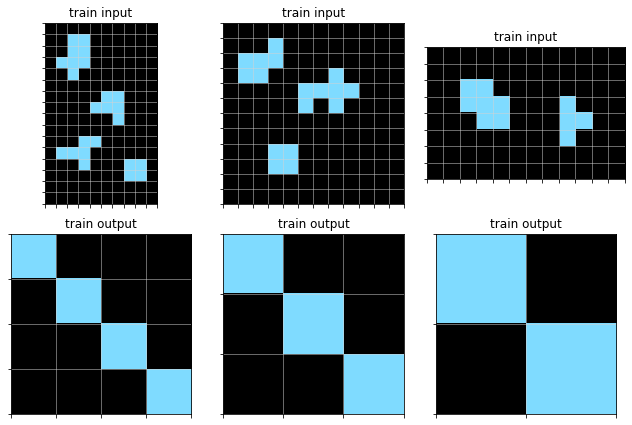

5 objects
[[0 8]
 [8 8]
 [8 8]]
[[0 0 8]
 [8 8 8]
 [0 8 8]]
[[8 8 0]
 [0 8 8]
 [0 0 8]]
[[8 8 0]
 [8 8 8]]
[[8 8]]
5 objects
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]


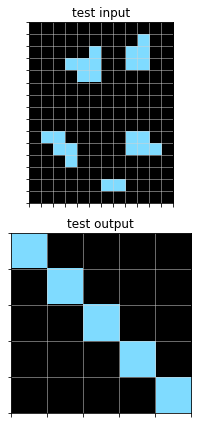

d10ecb37.json
Icecuber solved? True
['crop']
19 objects
[[4]]
[[3]]
[[6]]
[[4]]
[[6]]
[[6]
 [6]]
[[3 3]
 [3 3]]
[[4]]
[[4 4]]
[[3]]
[[6]]
[[4]
 [4]]
[[6]]
[[6]]
[[3]]
[[3]]
[[3]]
[[4 4]]
[[6 6]]
3 objects
[[4]]
[[3]]
[[6]]
28 objects
[[2]
 [2]]
[[4]]
[[2 2]]
[[5]]
[[0 0 0 2 0 0]
 [0 0 0 2 2 2]
 [0 2 2 2 2 0]
 [0 2 0 0 2 0]
 [2 2 0 0 0 0]]
[[4]]
[[5]]
[[5 5]
 [5 5]]
[[4 4]]
[[4]]
[[4]]
[[2 2]
 [2 0]
 [2 0]]
[[4]]
[[5]
 [5]]
[[4]]
[[5]
 [5]]
[[4]]
[[0 0 2 0 0]
 [0 0 2 2 2]
 [2 2 2 2 0]
 [2 0 0 2 0]]
[[4]]
[[5 5]
 [5 5]]
[[4 4]]
[[4]]
[[4]]
[[2 2]]
[[4]]
[[5]]
[[4]]
[[5]]
3 objects
[[2]
 [2]]
[[4]]
[[5]]
48 objects
[[3]]
[[2]]
[[1]]
[[3]]
[[4]]
[[1]]
[[1]
 [1]]
[[4 4]]
[[2 2]
 [2 2]]
[[3]]
[[3 3]]
[[4]]
[[4]
 [4]]
[[2]]
[[1]]
[[4]
 [4]]
[[3]
 [3]]
[[1]]
[[1]]
[[2]]
[[2]]
[[2]
 [2]]
[[3 3]]
[[1 1]
 [1 1]]
[[4]]
[[4 4]]
[[3]]
[[3]
 [3]]
[[1]]
[[2]]
[[3]
 [3]]
[[4]
 [4]]
[[2]]
[[2]]
[[1]]
[[1]]
[[1]
 [1]]
[[4 4]]
[[2 2]
 [2 2]]
[[3]]
[[3 3]]
[[4]]
[[4]]
[[2]]
[[1]]
[[4]]
[[3]]
[[1]]
4 object

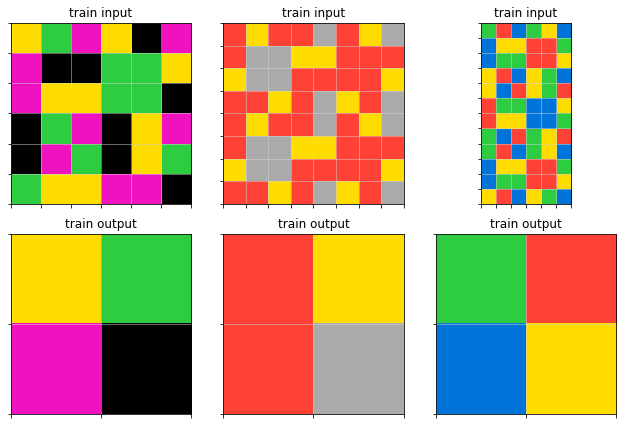

22 objects
[[9]]
[[6]]
[[2]]
[[9 9]]
[[2]]
[[6]]
[[9]]
[[2]]
[[9 9]
 [9 9]]
[[6 6]]
[[9 9]
 [9 9]]
[[2]]
[[6]]
[[2 2]]
[[6]]
[[9]]
[[2]]
[[6]]
[[9 9]]
[[6]]
[[2]]
[[9]]
4 objects
[[9]]
[[6]]
[[2]]
[[9]]


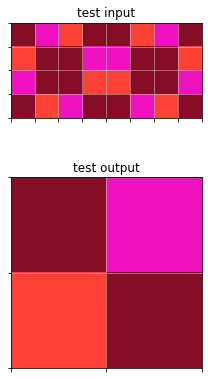

d13f3404.json
Icecuber solved? True
['image_expansion', 'draw_line_from_point', 'diagonals']
3 objects
[[6]]
[[1]]
[[3]]
16 objects
[[6]]
[[1]]
[[3]]
[[6]]
[[1]]
[[3]]
[[6]]
[[1]]
[[3]]
[[6]]
[[1]]
[[3]]
[[6]]
[[1]]
[[3]]
[[6]]
3 objects
[[4]]
[[8]]
[[2]]
14 objects
[[4]]
[[8]]
[[4]]
[[2]]
[[8]]
[[4]]
[[2]]
[[8]]
[[4]]
[[2]]
[[8]]
[[4]]
[[2]]
[[8]]
3 objects
[[6]]
[[1]]
[[3]]
14 objects
[[6]]
[[1]]
[[3]]
[[6]]
[[1]]
[[3]]
[[6]]
[[1]]
[[3]]
[[6]]
[[1]]
[[3]]
[[1]]
[[3]]


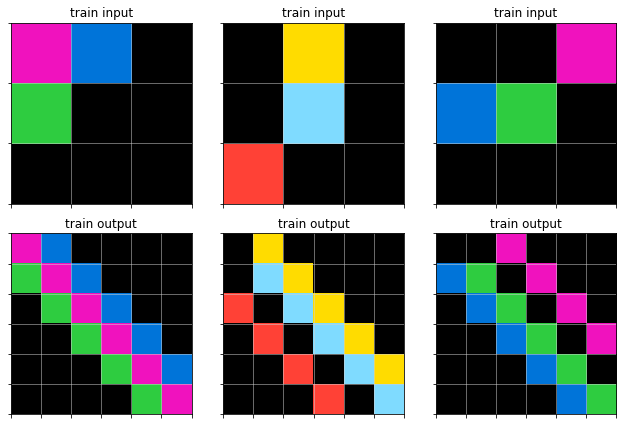

3 objects
[[3]]
[[4]]
[[9]]
12 objects
[[3]]
[[3]]
[[4]]
[[9]]
[[3]]
[[4]]
[[9]]
[[3]]
[[4]]
[[9]]
[[4]]
[[9]]


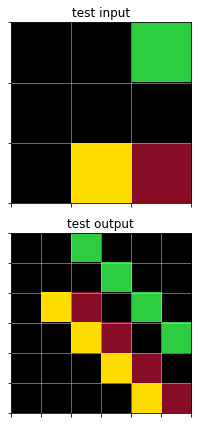

d22278a0.json
Icecuber solved? False
['pattern_expansion', 'pairwise_analogy']
2 objects
[[1]]
[[2]]
10 objects
[[1]]
[[0 0 1]
 [0 0 1]
 [1 1 1]]
[[0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]
 [1 1 1 1 1]]
[[2 0 0 0 0]
 [2 0 0 0 0]
 [2 0 0 0 0]
 [2 0 0 0 0]
 [2 2 2 2 2]]
[[2 0 0]
 [2 0 0]
 [2 2 2]]
[[2]]
[[1 1 1 1 1]]
[[2 2 2 2 2]]
[[1 1 1 1 1]]
[[2 2 2 2 2]]
2 objects
[[3]]
[[8]]
18 objects
[[3]]
[[3]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [3]
 [3]]
[[3 0 0 0 0]
 [3 0 0 0 0]
 [3 0 0 0 0]
 [3 0 0 0 0]
 [3 3 3 3 3]]
[[3 0 0]
 [3 0 0]
 [3 3 3]]
[[3]]
[[8]]
[[8 8 8]]
[[8 8 8 8 8]]
[[3 3 3 3 3]]
[[8 8 8 8 8]
 [0 0 0 0 8]
 [0 0 0 0 8]
 [0 0 0 0 8]
 [0 0 0 0 8]]
[[8]
 [8]
 [8]
 [8]
 [8]]
[[3 3 3]]
[[8 8 8]
 [0 0 8]
 [0 0 8]]
[[8]
 [8]
 [8]]
[[3]]
[[8]]
[[8]]
2 objects
[[2]]
[[4]]
14 objects
[[2]]
[[0 0 2]
 [0 0 2]
 [2 2 2]]
[[0 0 0 0 2]
 [0 0 0 0 2]
 [0 0 0 0 2]
 [0 0 0 0 2]
 [2 2 2 2 2]]
[[2]
 [2]
 [2]
 [2]
 [2]
 [2]]
[[2]
 [2]
 [2]
 [2]
 [2]
 [2]]
[[2]
 [2]
 [2]
 [2]
 [2]
 [2]]
[[2]
 [2]
 [2]
 [

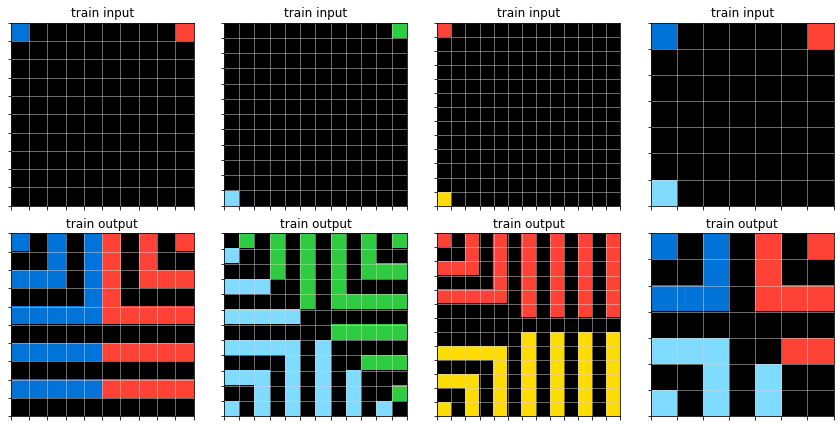

3 objects
[[4]]
[[8]]
[[1]]
20 objects
[[4]]
[[0 0 4]
 [0 0 4]
 [4 4 4]]
[[0 0 0 0 4]
 [0 0 0 0 4]
 [0 0 0 0 4]
 [0 0 0 0 4]
 [4 4 4 4 4]]
[[0 0 0 0 0 0 4]
 [0 0 0 0 0 0 4]
 [0 0 0 0 0 0 4]
 [0 0 0 0 0 0 4]
 [0 0 0 0 0 0 4]
 [0 0 0 0 0 0 4]
 [4 4 4 4 4 4 4]]
[[4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]]
[[4]
 [4]
 [4]
 [4]
 [4]
 [4]]
[[4]
 [4]
 [4]
 [4]]
[[4]
 [4]]
[[1 1]]
[[1 1 1 1]]
[[1 1 1 1 1 1]]
[[1 1 1 1 1 1 1 1]]
[[8 8 8 8 8 8 8]
 [0 0 0 0 0 0 8]
 [0 0 0 0 0 0 8]
 [0 0 0 0 0 0 8]
 [0 0 0 0 0 0 8]
 [0 0 0 0 0 0 8]
 [0 0 0 0 0 0 8]]
[[1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]]
[[8 8 8 8 8]
 [0 0 0 0 8]
 [0 0 0 0 8]
 [0 0 0 0 8]
 [0 0 0 0 8]]
[[1 1 1 1 1]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]]
[[8 8 8]
 [0 0 8]
 [0 0 8]]
[[1 1 1]
 [1 0 0]
 [1 0 0]]
[[8]]
[[1]]


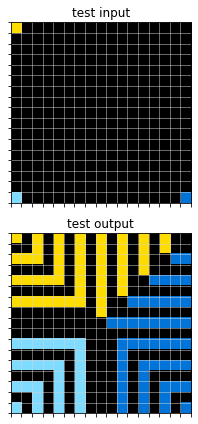

d23f8c26.json
Icecuber solved? True
['crop', 'image_expansion']
5 objects
[[6]]
[[4]]
[[3]]
[[9]]
[[1]]
2 objects
[[4]]
[[3]]
11 objects
[[8]
 [8]]
[[3]]
[[6]
 [6]]
[[5]]
[[6]]
[[3]]
[[3]]
[[5]]
[[9]]
[[5]]
[[9]]
4 objects
[[3]]
[[5]]
[[3]]
[[9]]
8 objects
[[3]
 [3]]
[[4]
 [4]]
[[7]]
[[6]]
[[7]]
[[8]]
[[8]]
[[2 2]]
2 objects
[[4]
 [4]]
[[8]]


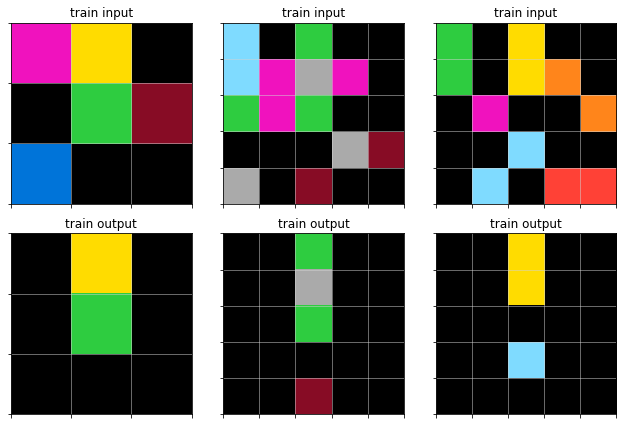

16 objects
[[3]]
[[7]]
[[8]]
[[1]]
[[8]]
[[3]]
[[8]]
[[3]]
[[7]]
[[1]]
[[7]]
[[1]]
[[8]]
[[6]
 [6]]
[[8]]
[[1]]
3 objects
[[8]]
[[1]]
[[6]
 [6]]


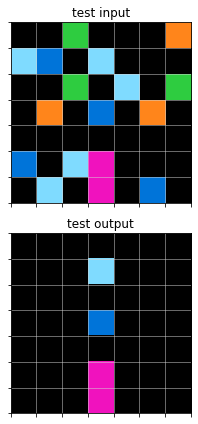

d2abd087.json
Icecuber solved? False
['separate_shapes', 'count_tiles', 'associate_colors_to_numbers', 'recoloring']
3 objects
[[5 5 5]
 [5 5 5]]
[[0 5 5]
 [5 5 5]
 [0 5 0]]
[[5 5 0]
 [5 5 5]]
3 objects
[[2 2 2]
 [2 2 2]]
[[0 2 2]
 [2 2 2]
 [0 2 0]]
[[1 1 0]
 [1 1 1]]
6 objects
[[0 0 5]
 [5 5 5]
 [0 0 5]]
[[0 5 5 0]
 [5 5 5 5]]
[[5 5 5 5]]
[[5]
 [5]]
[[5 5]
 [5 5]
 [5 5]]
[[5 5]
 [5 5]]
6 objects
[[0 0 1]
 [1 1 1]
 [0 0 1]]
[[0 2 2 0]
 [2 2 2 2]]
[[1 1 1 1]]
[[1]
 [1]]
[[2 2]
 [2 2]
 [2 2]]
[[1 1]
 [1 1]]
7 objects
[[5 5 5]
 [0 5 5]
 [0 0 5]
 [0 0 5]]
[[5 5 5]
 [5 0 0]
 [5 0 0]
 [5 0 0]]
[[5 5]
 [5 5]]
[[5 5 0]
 [0 5 5]
 [0 5 5]]
[[5]
 [5]
 [5]]
[[5 5]]
[[0 5 0 0]
 [5 5 5 5]
 [0 5 5 0]]
7 objects
[[1 1 1]
 [0 1 1]
 [0 0 1]
 [0 0 1]]
[[2 2 2]
 [2 0 0]
 [2 0 0]
 [2 0 0]]
[[1 1]
 [1 1]]
[[2 2 0]
 [0 2 2]
 [0 2 2]]
[[1]
 [1]
 [1]]
[[1 1]]
[[0 1 0 0]
 [1 1 1 1]
 [0 1 1 0]]


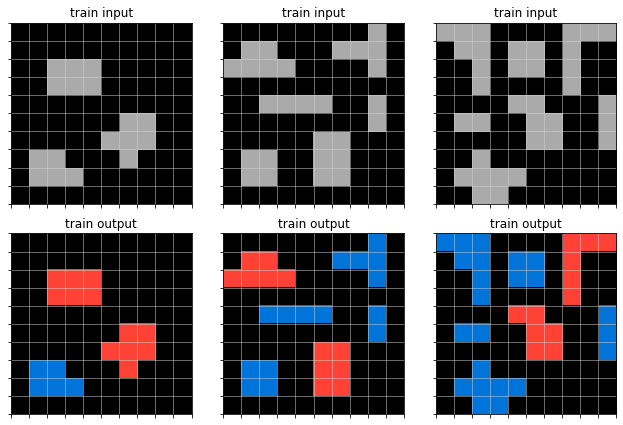

5 objects
[[0 5 5 0]
 [0 5 5 0]
 [5 5 5 5]]
[[0 5 5]
 [0 5 5]
 [5 5 0]]
[[5 5 0 0]
 [5 5 5 5]]
[[5]
 [5]
 [5]
 [5]]
[[5 5 5 5 5]]
5 objects
[[0 1 1 0]
 [0 1 1 0]
 [1 1 1 1]]
[[0 2 2]
 [0 2 2]
 [2 2 0]]
[[2 2 0 0]
 [2 2 2 2]]
[[1]
 [1]
 [1]
 [1]]
[[1 1 1 1 1]]


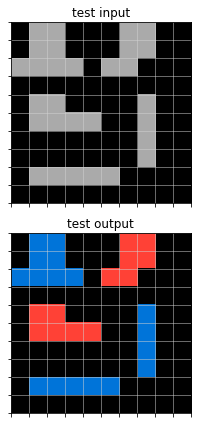

d364b489.json
Icecuber solved? False
['pattern_expansion']
5 objects
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
23 objects
[[2]]
[[7]]
[[1]]
[[6]]
[[8]]
[[2]]
[[7]]
[[1]]
[[2]]
[[8]]
[[7]]
[[1]]
[[6]]
[[8]]
[[2]]
[[7]]
[[1]]
[[6]]
[[2]]
[[8]]
[[7]]
[[1]]
[[6]]
6 objects
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
25 objects
[[7]]
[[1]]
[[6]]
[[2]]
[[8]]
[[1]]
[[6]]
[[2]]
[[8]]
[[7]]
[[1]]
[[2]]
[[8]]
[[7]]
[[1]]
[[6]]
[[8]]
[[2]]
[[7]]
[[1]]
[[6]]
[[2]]
[[8]]
[[7]]
[[1]]


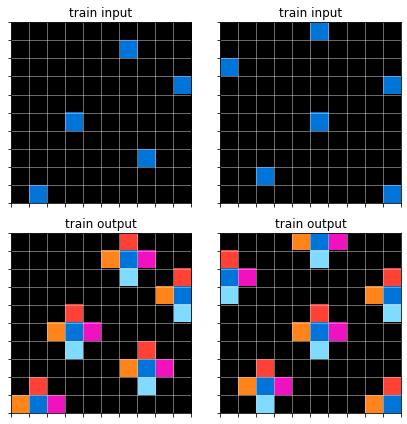

7 objects
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
30 objects
[[7]]
[[1]]
[[6]]
[[7]]
[[1]]
[[8]]
[[2]]
[[8]]
[[2]]
[[7]]
[[1]]
[[6]]
[[7]]
[[1]]
[[6]]
[[8]]
[[8]]
[[2]]
[[2]]
[[1]]
[[6]]
[[7]]
[[1]]
[[6]]
[[8]]
[[8]]
[[2]]
[[7]]
[[1]]
[[6]]


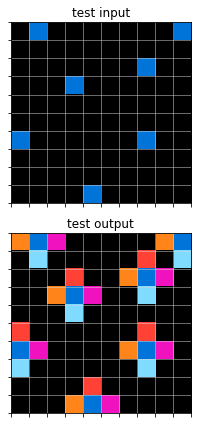

d406998b.json
Icecuber solved? False
['recoloring', 'one_yes_one_no', 'cylindrical']
10 objects
[[5]]
[[5]]
[[5]]
[[5]]
[[5]]
[[5]]
[[5]]
[[5]]
[[5]]
[[5]]
10 objects
[[5]]
[[5]]
[[3]]
[[3]]
[[3]]
[[5]]
[[3]]
[[3]]
[[5]]
[[5]]
12 objects
[[5]]
[[5]]
[[5]]
[[5]]
[[5]]
[[5]]
[[5]]
[[5]]
[[5]]
[[5]]
[[5]]
[[5]]
12 objects
[[3]]
[[3]]
[[5]]
[[5]]
[[5]]
[[5]]
[[3]]
[[5]]
[[5]]
[[3]]
[[3]]
[[3]]
13 objects
[[5]]
[[5]]
[[5]]
[[5]]
[[5]]
[[5]]
[[5]]
[[5]]
[[5]]
[[5]]
[[5]]
[[5]]
[[5]]
13 objects
[[3]]
[[5]]
[[5]]
[[5]]
[[3]]
[[3]]
[[3]]
[[5]]
[[3]]
[[5]]
[[5]]
[[3]]
[[3]]
14 objects
[[5]]
[[5]]
[[5]]
[[5]]
[[5]]
[[5]]
[[5]]
[[5]]
[[5]]
[[5]]
[[5]]
[[5]]
[[5]]
[[5]]
14 objects
[[5]]
[[3]]
[[3]]
[[3]]
[[3]]
[[5]]
[[5]]
[[5]]
[[5]]
[[3]]
[[3]]
[[3]]
[[5]]
[[5]]


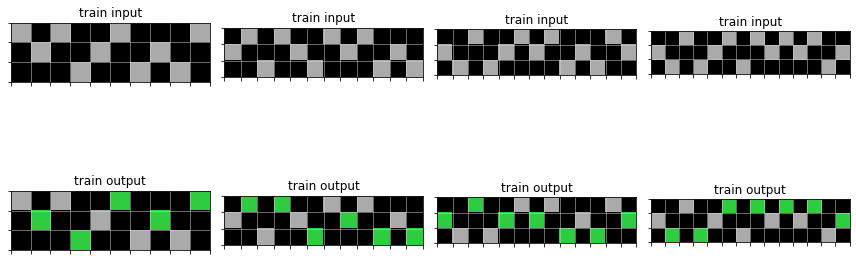

17 objects
[[5]]
[[5]]
[[5]]
[[5]]
[[5]]
[[5]]
[[5]]
[[5]]
[[5]]
[[5]]
[[5]]
[[5]]
[[5]]
[[5]]
[[5]]
[[5]]
[[5]]
17 objects
[[5]]
[[5]]
[[5]]
[[3]]
[[3]]
[[3]]
[[3]]
[[5]]
[[3]]
[[5]]
[[5]]
[[5]]
[[3]]
[[3]]
[[3]]
[[5]]
[[3]]


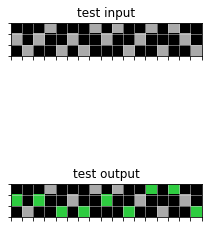

d43fd935.json
Icecuber solved? False
['draw_line_from_point', 'direction_guessing', 'projection_unto_rectangle']
8 objects
[[1]]
[[6]]
[[3 3]
 [3 3]]
[[1]]
[[6]]
[[6]]
[[6]]
[[1]]
8 objects
[[1]]
[[6]]
[[3 3]
 [3 3]]
[[1 1 1 1 1]]
[[6]
 [6]
 [6]
 [6]]
[[6]]
[[6]]
[[1]]
11 objects
[[7]]
[[8]]
[[7]]
[[3 3]
 [3 3]]
[[8]]
[[8]]
[[8]]
[[8]]
[[7]]
[[7]]
[[7]]
11 objects
[[7]]
[[8]
 [8]]
[[7 7]]
[[3 3]
 [3 3]]
[[8 8 8]]
[[7]
 [7]
 [7]
 [7]
 [7]
 [7]]
[[8]]
[[8]]
[[8]]
[[7]]
[[7]]
5 objects
[[1]]
[[1]]
[[1]]
[[3 3]
 [3 3]]
[[1]]
5 objects
[[1]
 [1]
 [1]
 [1]
 [1]]
[[1]]
[[1]]
[[3 3]
 [3 3]]
[[1]]


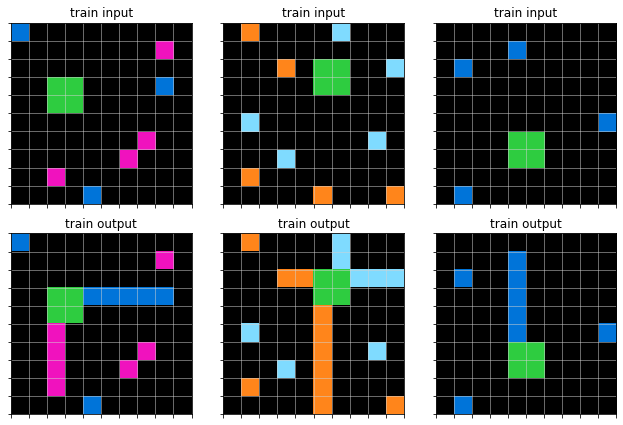

10 objects
[[2]]
[[2]]
[[2]]
[[6]]
[[6]]
[[6]]
[[3 3]
 [3 3]]
[[2]]
[[6]]
[[6]]
10 objects
[[2]
 [2]
 [2]
 [2]
 [2]
 [2]]
[[2]]
[[2]]
[[6]]
[[6]]
[[6 6]]
[[3 3]
 [3 3]]
[[6]
 [6]]
[[2]]
[[6]]


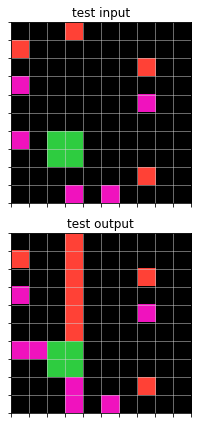

d4469b4b.json
Icecuber solved? True
['dominant_color', 'associate_images_to_colors']
5 objects
[[2]]
[[2]]
[[2]]
[[2]]
[[0 2 0]
 [0 2 2]
 [2 2 0]]
1 objects
[[5 5 5]
 [0 5 0]
 [0 5 0]]
3 objects
[[1 1 1]
 [0 1 1]
 [0 1 0]]
[[1]
 [1]]
[[1]]
1 objects
[[0 5 0]
 [5 5 5]
 [0 5 0]]
5 objects
[[3]]
[[3 3]]
[[3 3]
 [3 0]]
[[0 3]
 [3 3]]
[[3]]
1 objects
[[0 0 5]
 [0 0 5]
 [5 5 5]]
5 objects
[[1 0]
 [1 0]
 [1 1]
 [0 1]]
[[1]]
[[1 1]
 [1 0]
 [1 0]]
[[1]]
[[1]]
1 objects
[[0 5 0]
 [5 5 5]
 [0 5 0]]
4 objects
[[2 0 0]
 [2 0 0]
 [2 2 0]
 [2 0 0]
 [2 2 2]]
[[2]]
[[2]
 [2]]
[[2 2]
 [0 2]]
1 objects
[[5 5 5]
 [0 5 0]
 [0 5 0]]
3 objects
[[0 2 0 2]
 [0 2 2 2]
 [0 2 2 0]
 [2 2 2 0]
 [0 0 2 0]]
[[2]]
[[2]]
1 objects
[[5 5 5]
 [0 5 0]
 [0 5 0]]
3 objects
[[0 3]
 [3 3]
 [0 3]]
[[3]]
[[0 0 3]
 [3 3 3]]
1 objects
[[0 0 5]
 [0 0 5]
 [5 5 5]]


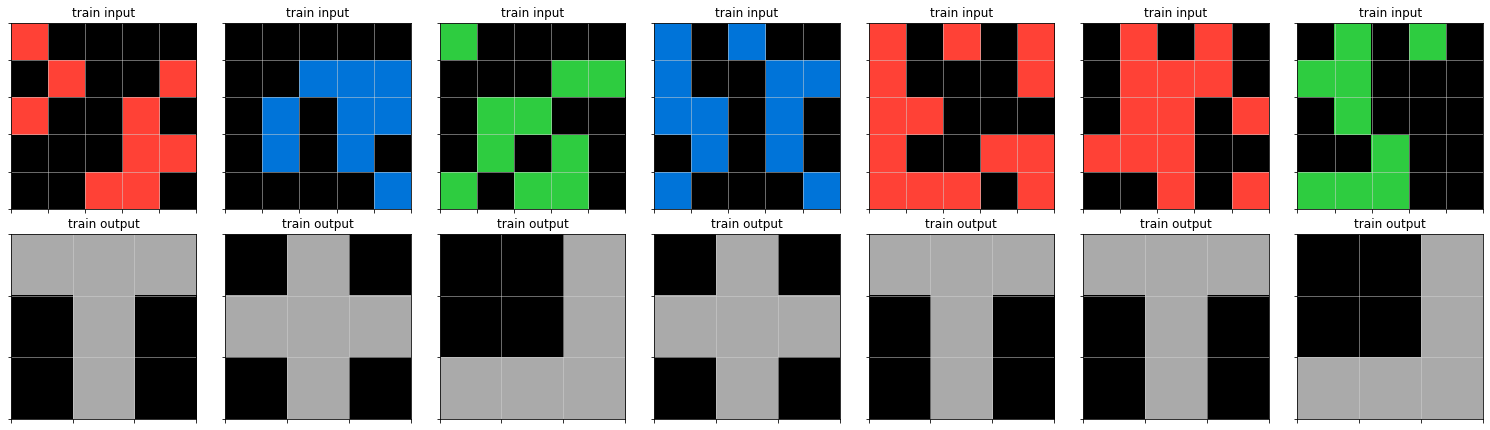

5 objects
[[1 1 1 1]
 [0 0 1 0]]
[[1]]
[[1]
 [1]]
[[1]]
[[1]]
1 objects
[[0 5 0]
 [5 5 5]
 [0 5 0]]
6 objects
[[3]]
[[3 3]]
[[3]]
[[3]]
[[3]]
[[3]
 [3]]
1 objects
[[0 0 5]
 [0 0 5]
 [5 5 5]]


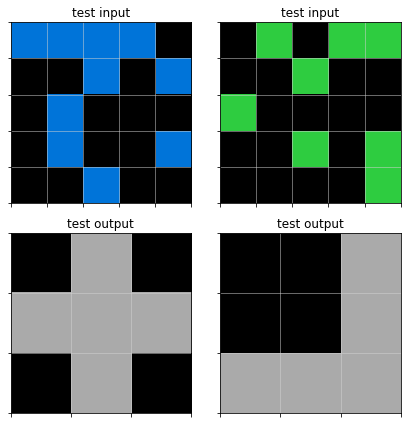

d4a91cb9.json
Icecuber solved? False
['connect_the_dots', 'direction_guessing']
2 objects
[[8]]
[[2]]
3 objects
[[8]]
[[4 0 0 0 0 0 0 0]
 [4 0 0 0 0 0 0 0]
 [4 0 0 0 0 0 0 0]
 [4 0 0 0 0 0 0 0]
 [4 0 0 0 0 0 0 0]
 [4 4 4 4 4 4 4 4]]
[[2]]
2 objects
[[8]]
[[2]]
3 objects
[[8]]
[[0 0 0 0 0 0 4]
 [0 0 0 0 0 0 4]
 [0 0 0 0 0 0 4]
 [4 4 4 4 4 4 4]]
[[2]]
2 objects
[[2]]
[[8]]
3 objects
[[4 4 4 4 4 4]
 [4 0 0 0 0 0]
 [4 0 0 0 0 0]
 [4 0 0 0 0 0]
 [4 0 0 0 0 0]
 [4 0 0 0 0 0]
 [4 0 0 0 0 0]
 [4 0 0 0 0 0]
 [4 0 0 0 0 0]]
[[2]]
[[8]]


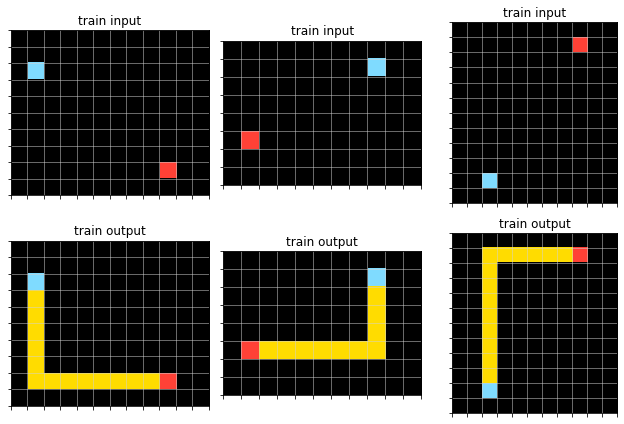

2 objects
[[2]]
[[8]]
3 objects
[[4 4 4 4 4 4 4 4]
 [4 0 0 0 0 0 0 0]
 [4 0 0 0 0 0 0 0]
 [4 0 0 0 0 0 0 0]
 [4 0 0 0 0 0 0 0]
 [4 0 0 0 0 0 0 0]]
[[2]]
[[8]]


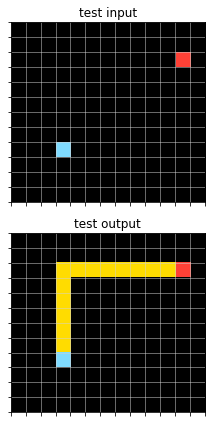

d4f3cd78.json
Icecuber solved? False
['rectangle_guessing', 'recoloring', 'draw_line_from_point']
1 objects
[[5 5 5 5 5 5]
 [5 0 0 0 0 5]
 [5 0 0 0 0 5]
 [5 0 0 0 0 5]
 [5 0 0 0 0 5]
 [5 5 5 0 5 5]]
2 objects
[[5 5 5 5 5 5]
 [5 0 0 0 0 5]
 [5 0 0 0 0 5]
 [5 0 0 0 0 5]
 [5 0 0 0 0 5]
 [5 5 5 0 5 5]]
[[8 8 8 8]
 [8 8 8 8]
 [8 8 8 8]
 [8 8 8 8]
 [0 0 8 0]
 [0 0 8 0]
 [0 0 8 0]]
1 objects
[[5 5 5 0 5 5]
 [5 0 0 0 0 5]
 [5 0 0 0 0 5]
 [5 0 0 0 0 5]
 [5 5 5 5 5 5]]
2 objects
[[0 0 8 0]
 [0 0 8 0]
 [0 0 8 0]
 [0 0 8 0]
 [0 0 8 0]
 [0 0 8 0]
 [8 8 8 8]
 [8 8 8 8]
 [8 8 8 8]]
[[5 5 5 0 5 5]
 [5 0 0 0 0 5]
 [5 0 0 0 0 5]
 [5 0 0 0 0 5]
 [5 5 5 5 5 5]]


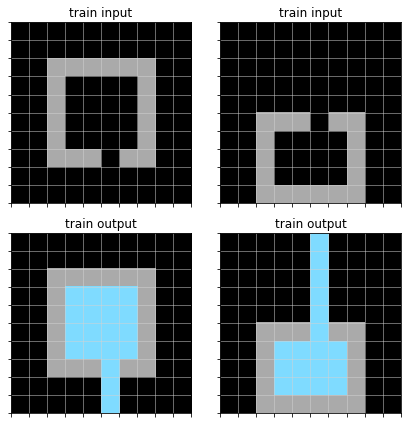

1 objects
[[5 5 5 5 5]
 [5 0 0 0 5]
 [5 0 0 0 5]
 [5 0 0 0 0]
 [5 0 0 0 5]
 [5 5 5 5 5]]
2 objects
[[5 5 5 5 5]
 [5 0 0 0 5]
 [5 0 0 0 5]
 [5 0 0 0 0]
 [5 0 0 0 5]
 [5 5 5 5 5]]
[[8 8 8 0 0 0 0]
 [8 8 8 0 0 0 0]
 [8 8 8 8 8 8 8]
 [8 8 8 0 0 0 0]]


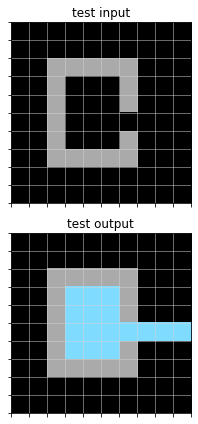

d511f180.json
Icecuber solved? True
['associate_colors_to_colors']
16 objects
[[2]]
[[7]]
[[8 8 8]]
[[5 5 0 5]
 [0 5 5 5]]
[[6]]
[[4]]
[[8 0]
 [8 8]]
[[2]]
[[4]]
[[3]]
[[6]]
[[6]]
[[5]]
[[1]]
[[9]]
[[3]]
16 objects
[[2]]
[[7]]
[[5 5 5]]
[[8 8 0 8]
 [0 8 8 8]]
[[6]]
[[4]]
[[5 0]
 [5 5]]
[[2]]
[[4]]
[[3]]
[[6]]
[[6]]
[[8]]
[[1]]
[[9]]
[[3]]
8 objects
[[3]]
[[5]
 [5]]
[[1]]
[[4]]
[[8]]
[[2]]
[[4]]
[[9]]
8 objects
[[3]]
[[8]
 [8]]
[[1]]
[[4]]
[[5]]
[[2]]
[[4]]
[[9]]
8 objects
[[6]]
[[5]]
[[3]]
[[5]]
[[7]]
[[5]]
[[8 8]]
[[2]]
8 objects
[[6]]
[[8]]
[[3]]
[[8]]
[[7]]
[[8]]
[[5 5]]
[[2]]


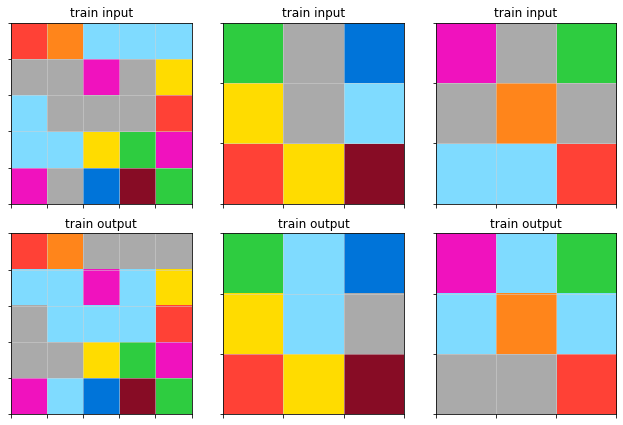

11 objects
[[8 8]
 [0 8]]
[[4]]
[[5]
 [5]]
[[3]
 [3]]
[[7]]
[[7]]
[[1]]
[[9]]
[[6]]
[[4]]
[[8 8]]
11 objects
[[5 5]
 [0 5]]
[[4]]
[[8]
 [8]]
[[3]
 [3]]
[[7]]
[[7]]
[[1]]
[[9]]
[[6]]
[[4]]
[[5 5]]


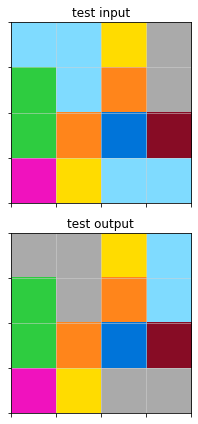

d5d6de2d.json
Icecuber solved? True
['loop_filling', 'replace_pattern', 'remove_intruders']
2 objects
[[2 2 2]
 [2 0 2]
 [2 2 2]]
[[2 2 2 2]
 [2 0 0 2]
 [2 0 0 2]
 [2 0 0 2]
 [2 2 2 2]]
2 objects
[[3]]
[[3 3]
 [3 3]
 [3 3]]
1 objects
[[2 2 2]
 [2 0 2]
 [2 0 2]
 [2 2 2]]
1 objects
[[3]
 [3]]
2 objects
[[2 2 2 2 2]
 [2 0 0 0 2]
 [2 0 0 0 2]
 [2 0 0 0 2]
 [2 2 2 2 2]]
[[2 2]
 [2 2]]
1 objects
[[3 3 3]
 [3 3 3]
 [3 3 3]]


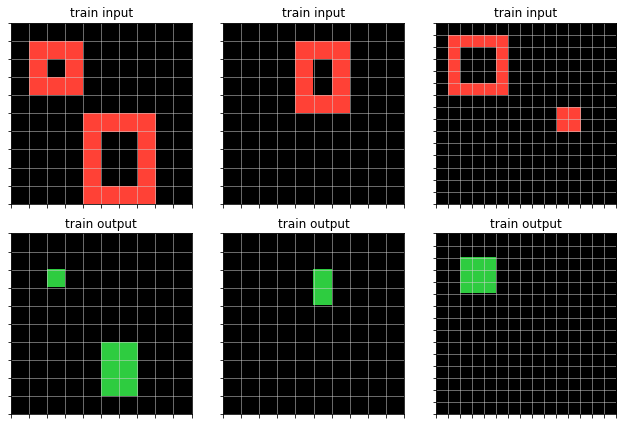

2 objects
[[2 2 2]
 [2 0 2]
 [2 2 2]]
[[2 2 2 2 2 2 2 2]
 [2 0 0 0 0 0 0 2]
 [2 0 0 0 0 0 0 2]
 [2 0 0 0 0 0 0 2]
 [2 0 0 0 0 0 0 2]
 [2 2 2 2 2 2 2 2]]
2 objects
[[3]]
[[3 3 3 3 3 3]
 [3 3 3 3 3 3]
 [3 3 3 3 3 3]
 [3 3 3 3 3 3]]
4 objects
[[2 2 2 2 2 2 2]
 [2 0 0 0 0 0 2]
 [2 2 2 2 2 2 2]]
[[2 2]
 [2 2]]
[[2 2 2 2 2 2 2 2 2]
 [2 0 0 0 0 0 0 0 2]
 [2 0 0 0 0 0 0 0 2]
 [2 2 2 2 2 2 2 2 2]]
[[2 2 2 2 2]
 [2 0 0 0 2]
 [2 0 0 0 2]
 [2 0 0 0 2]
 [2 0 0 0 2]
 [2 2 2 2 2]]
3 objects
[[3 3 3 3 3]]
[[3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3]]
[[3 3 3]
 [3 3 3]
 [3 3 3]
 [3 3 3]]


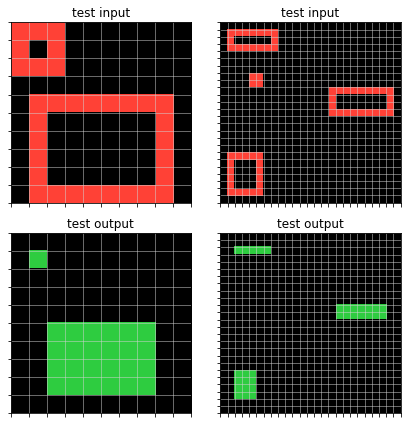

d631b094.json
Icecuber solved? True
['count_tiles', 'dominant_color', 'summarize']
2 objects
[[1]]
[[1]]
1 objects
[[1 1]]
3 objects
[[2]]
[[2]]
[[2]]
1 objects
[[2 2 2]]
1 objects
[[7]]
1 objects
[[7]]
1 objects
[[0 8]
 [8 8]
 [8 0]]
1 objects
[[8 8 8 8]]


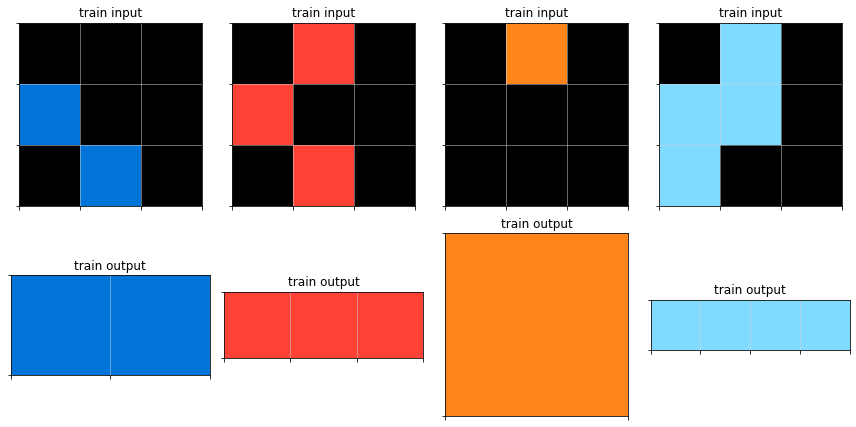

2 objects
[[4 4]
 [4 0]]
[[4]
 [4]]
1 objects
[[4 4 4 4 4]]


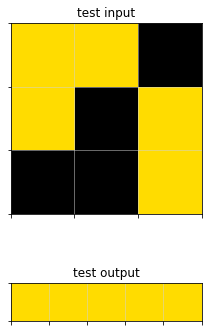

d687bc17.json
Icecuber solved? True
['bring_patterns_close', 'gravity', 'direction_guessing', 'find_the_intruder', 'remove_intruders']
11 objects
[[4 4 4 4 4 4 4 4 4 4 4 4 4]]
[[2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]]
[[3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]]
[[3]]
[[2]]
[[7]]
[[3]]
[[8]]
[[4]]
[[2]]
[[8 8 8 8 8 8 8 8 8 8 8 8 8]]
4 objects
[[4 4 4 4 4 4 4 4 4 4 4 4 4]
 [0 0 0 0 0 0 0 0 4 0 0 0 0]]
[[2 0]
 [2 0]
 [2 2]
 [2 0]
 [2 0]
 [2 0]
 [2 2]
 [2 0]]
[[0 3]
 [3 3]
 [0 3]
 [0 3]
 [3 3]
 [0 3]
 [0 3]
 [0 3]]
[[0 0 0 0 8 0 0 0 0 0 0 0 0]
 [8 8 8 8 8 8 8 8 8 8 8 8 8]]
11 objects
[[1 1 1 1 1 1 1 1 1 1]]
[[2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]]
[[4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]]
[[7]]
[[2]]
[[3]]
[[4]]
[[8]]
[[1]]
[[7]]
[[7 7 7 7 7 7 7 7 7 7]]
4 objects
[[1 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 1 0 0 0 0 0]]
[[2 0]
 [2 0]
 [2 2]
 [2 0]
 [2 0]
 [2 0]
 [2 0]
 [2 0]
 [2 0]
 [2 0]]
[[0 4]
 [0 4]
 [0 4]
 [0 4]
 [0 4]
 [4 4]
 [0 4]
 [0 4]
 [0 4]
 [0 4]]
[[0 0 0 0 0 0 0 7 7 0]
 [7

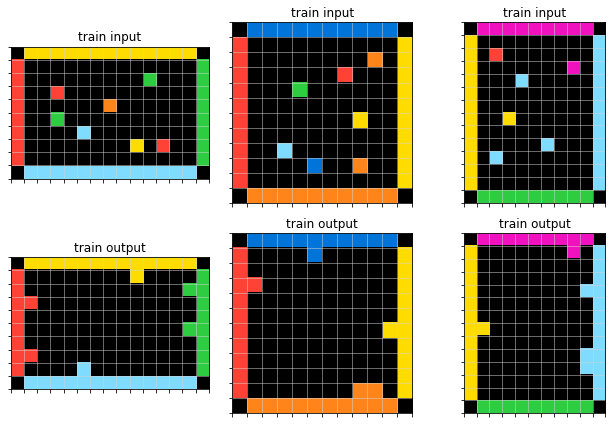

17 objects
[[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]]
[[8]]
[[1]]
[[2]]
[[3]]
[[1]]
[[7]]
[[8]]
[[2]]
[[6]]
[[4]]
[[4]]
[[8]]
[[1]]
[[8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]]
4 objects
[[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
 [0 0 0 0 0 0 0 4 0 0 0 0 0 4 0]]
[[1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 1]
 [1 0]
 [1 0]]
[[0 2]
 [0 2]
 [2 2]
 [0 2]
 [0 2]
 [0 2]
 [2 2]
 [0 2]
 [0 2]
 [0 2]
 [0 2]
 [0 2]]
[[0 0 8 0 0 0 8 0 0 0 0 0 8 0 0]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]]


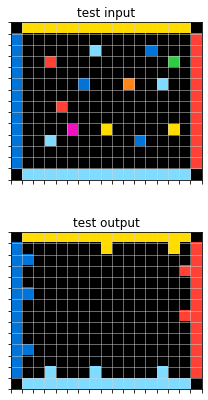

d6ad076f.json
Icecuber solved? True
['bridges', 'connect_the_dots', 'draw_line_from_point']
2 objects
[[2 2 2 2]
 [2 2 2 2]
 [2 2 2 2]]
[[7 7 7 7 7 7]
 [7 7 7 7 7 7]
 [7 7 7 7 7 7]]
3 objects
[[2 2 2 2]
 [2 2 2 2]
 [2 2 2 2]]
[[8 8]
 [8 8]
 [8 8]]
[[7 7 7 7 7 7]
 [7 7 7 7 7 7]
 [7 7 7 7 7 7]]
2 objects
[[4 4 4]
 [4 4 4]
 [4 4 4]
 [4 4 4]
 [4 4 4]
 [4 4 4]
 [4 4 4]
 [4 4 4]]
[[6 6 6]
 [6 6 6]
 [6 6 6]
 [6 6 6]
 [6 6 6]]
3 objects
[[4 4 4]
 [4 4 4]
 [4 4 4]
 [4 4 4]
 [4 4 4]
 [4 4 4]
 [4 4 4]
 [4 4 4]]
[[6 6 6]
 [6 6 6]
 [6 6 6]
 [6 6 6]
 [6 6 6]]
[[8 8 8]
 [8 8 8]
 [8 8 8]]
2 objects
[[3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3]]
[[9 9 9 9 9 9]
 [9 9 9 9 9 9]]
3 objects
[[3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3]]
[[8 8 8 8]
 [8 8 8 8]
 [8 8 8 8]
 [8 8 8 8]
 [8 8 8 8]]
[[9 9 9 9 9 9]
 [9 9 9 9 9 9]]


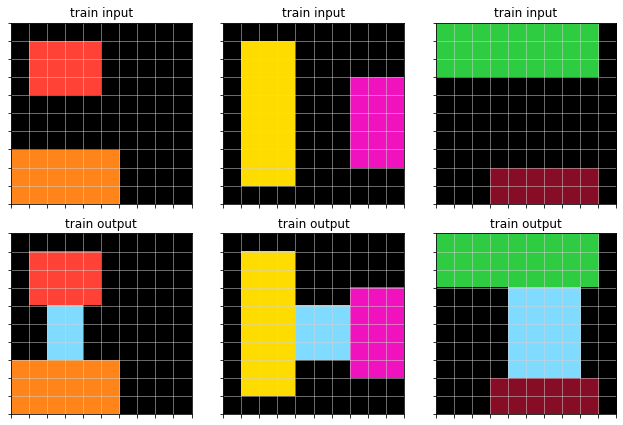

2 objects
[[1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]]
[[2 2 2]
 [2 2 2]
 [2 2 2]
 [2 2 2]
 [2 2 2]
 [2 2 2]]
3 objects
[[1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]]
[[2 2 2]
 [2 2 2]
 [2 2 2]
 [2 2 2]
 [2 2 2]
 [2 2 2]]
[[8 8 8]
 [8 8 8]
 [8 8 8]
 [8 8 8]]


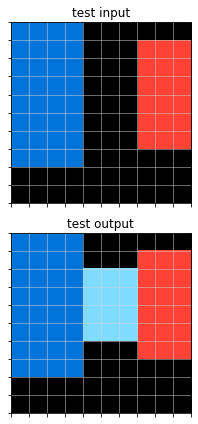

d89b689b.json
Icecuber solved? True
['pattern_juxtaposition', 'summarize', 'direction_guessing']
5 objects
[[7]]
[[6]]
[[8 8]
 [8 8]]
[[4]]
[[9]]
4 objects
[[6]]
[[7]]
[[4]]
[[9]]
5 objects
[[5]]
[[9]]
[[8 8]
 [8 8]]
[[1]]
[[2]]
4 objects
[[5]]
[[9]]
[[2]]
[[1]]
5 objects
[[1]]
[[4]]
[[8 8]
 [8 8]]
[[6]]
[[3]]
4 objects
[[1]]
[[4]]
[[3]]
[[6]]


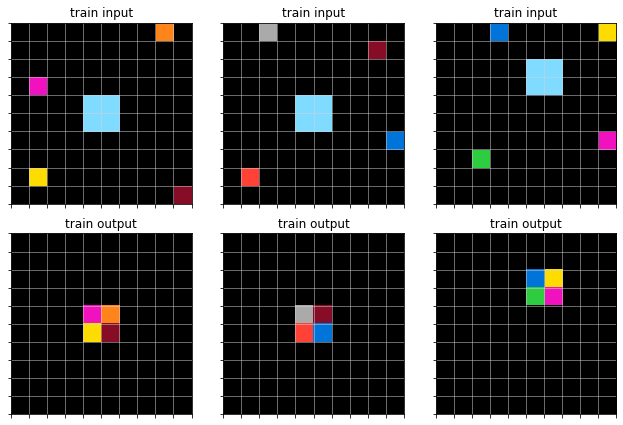

5 objects
[[4]]
[[3]]
[[8 8]
 [8 8]]
[[7]]
[[6]]
4 objects
[[3]]
[[4]]
[[6]]
[[7]]


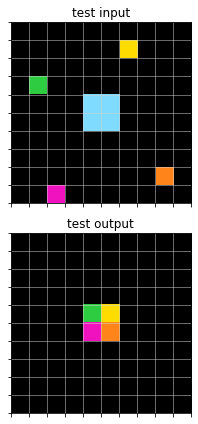

d8c310e9.json
Icecuber solved? False
['pattern_expansion', 'pattern_repetition', 'pattern_completion']
5 objects
[[2 2]
 [2 2]]
[[2 2]
 [2 2]]
[[1]]
[[1]]
[[1]]
10 objects
[[2 2]
 [2 2]]
[[2 2]
 [2 2]]
[[2 2]
 [2 2]]
[[2 2]
 [2 2]]
[[2 2]
 [2 2]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
6 objects
[[2]
 [2]
 [2]]
[[2]
 [2]
 [2]]
[[3 3]]
[[1]]
[[3 3]]
[[1]]
11 objects
[[2]
 [2]
 [2]]
[[2]
 [2]
 [2]]
[[2]
 [2]
 [2]]
[[2]
 [2]
 [2]]
[[3 3]]
[[1]]
[[3 3]]
[[1]]
[[3 3]]
[[1]]
[[3 3]]
7 objects
[[4]
 [4]
 [4]]
[[4 4]
 [4 4]
 [4 4]]
[[3]
 [3]]
[[3]
 [3]]
[[3]
 [3]]
[[2 2]]
[[2 2]]
11 objects
[[4]
 [4]
 [4]]
[[4 4]
 [4 4]
 [4 4]]
[[4 4]
 [4 4]
 [4 4]]
[[3]
 [3]]
[[3]
 [3]]
[[3]
 [3]]
[[3]
 [3]]
[[3]
 [3]]
[[2 2]]
[[2 2]]
[[2]]


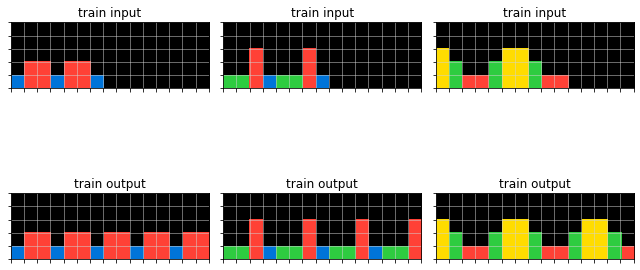

8 objects
[[0 2]
 [2 2]
 [0 2]]
[[0 2]
 [2 2]
 [0 2]]
[[6 0]
 [6 6]]
[[6 0]
 [6 6]]
[[6 0]
 [6 6]]
[[2]]
[[3]]
[[3]]
11 objects
[[0 2]
 [2 2]
 [0 2]]
[[0 2]
 [2 2]
 [0 2]]
[[0 2]
 [2 2]
 [0 2]]
[[0 2]
 [2 2]
 [0 2]]
[[6 0]
 [6 6]]
[[6 0]
 [6 6]]
[[6 0]
 [6 6]]
[[6 0]
 [6 6]]
[[3]]
[[3]]
[[3]]


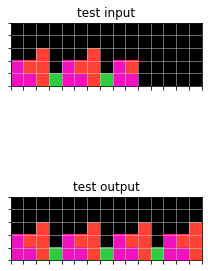

d90796e8.json
Icecuber solved? False
['replace_pattern']
3 objects
[[3]]
[[2]]
[[5]]
2 objects
[[8]]
[[5]]
8 objects
[[5]]
[[3]]
[[2]]
[[3]]
[[2]]
[[2]]
[[5]]
[[3]]
6 objects
[[5]]
[[8]]
[[8]]
[[2]]
[[5]]
[[3]]
11 objects
[[2]]
[[3]]
[[3]]
[[5]]
[[2]]
[[3]]
[[2]]
[[3]]
[[2]]
[[3]]
[[5]]
8 objects
[[2]]
[[3]]
[[3]]
[[5]]
[[8]]
[[8]]
[[8]]
[[5]]


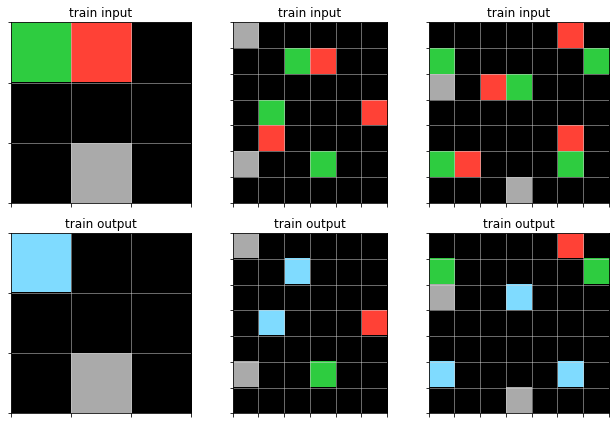

15 objects
[[2]]
[[5]]
[[2]]
[[3]]
[[2]]
[[3]]
[[5]]
[[2]]
[[5]]
[[2]]
[[3]]
[[5]]
[[3]]
[[5]]
[[2]]
12 objects
[[2]]
[[5]]
[[8]]
[[8]]
[[5]]
[[2]]
[[5]]
[[2]]
[[8]]
[[5]]
[[3]]
[[5]]


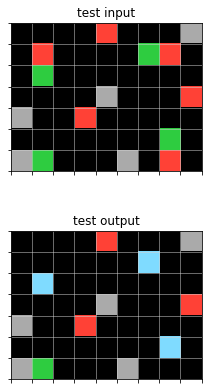

d9f24cd1.json
Icecuber solved? False
['draw_line_from_point', 'gravity', 'obstacles']
5 objects
[[5]]
[[5]]
[[2]]
[[2]]
[[2]]
5 objects
[[2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]]
[[2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]]
[[0 2]
 [0 2]
 [0 2]
 [0 2]
 [2 2]
 [2 0]
 [2 0]
 [2 0]
 [2 0]
 [2 0]]
[[5]]
[[5]]
6 objects
[[5]]
[[5]]
[[5]]
[[2]]
[[2]]
[[2]]
6 objects
[[0 2]
 [0 2]
 [0 2]
 [0 2]
 [0 2]
 [0 2]
 [2 2]
 [2 0]
 [2 0]
 [2 0]]
[[2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]]
[[2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]]
[[5]]
[[5]]
[[5]]


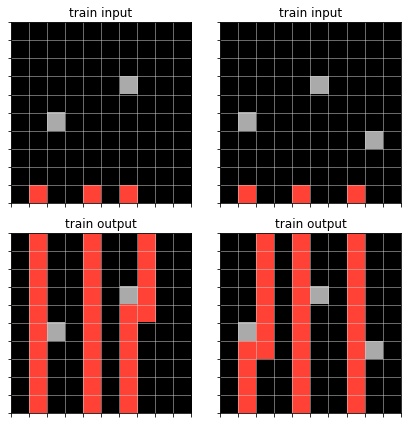

6 objects
[[5]]
[[5]]
[[5]]
[[2]]
[[2]]
[[2]]
6 objects
[[0 2]
 [0 2]
 [0 2]
 [0 2]
 [0 2]
 [2 2]
 [2 0]
 [2 0]
 [2 0]
 [2 0]]
[[0 2]
 [0 2]
 [0 2]
 [0 2]
 [0 2]
 [0 2]
 [0 2]
 [2 2]
 [2 0]
 [2 0]]
[[2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]]
[[5]]
[[5]]
[[5]]


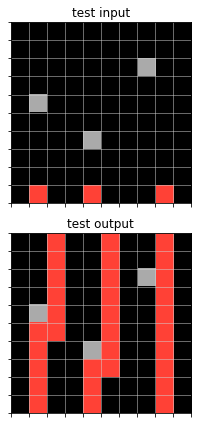

d9fac9be.json
Icecuber solved? True
['find_the_intruder', 'summarize', 'x_marks_the_spot']
9 objects
[[2]]
[[2]]
[[2]]
[[4 4 4]
 [4 0 4]
 [4 4 4]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
1 objects
[[2]]
13 objects
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[3 3 3]
 [3 0 3]
 [3 3 3]]
[[8]]
[[3]]
[[8]]
[[8]]
[[3]]
[[8]]
[[8]]
1 objects
[[8]]
20 objects
[[1]]
[[2]]
[[2]]
[[2]]
[[2]]
[[1]]
[[2]]
[[2]]
[[1 1]]
[[1]]
[[2]]
[[2]]
[[1]]
[[2 2 2]
 [2 0 2]
 [2 2 2]]
[[1]]
[[1]]
[[2]]
[[2]]
[[1]]
[[2]]
1 objects
[[1]]
21 objects
[[8]]
[[3]]
[[8]]
[[3]]
[[8]]
[[3]]
[[3 3]]
[[8]]
[[8]]
[[3]]
[[8]]
[[3]]
[[8]]
[[3]]
[[8]]
[[3]]
[[0 3 3 3]
 [3 3 0 3]
 [0 3 3 3]]
[[8]]
[[3]]
[[8]]
[[3]]
1 objects
[[8]]


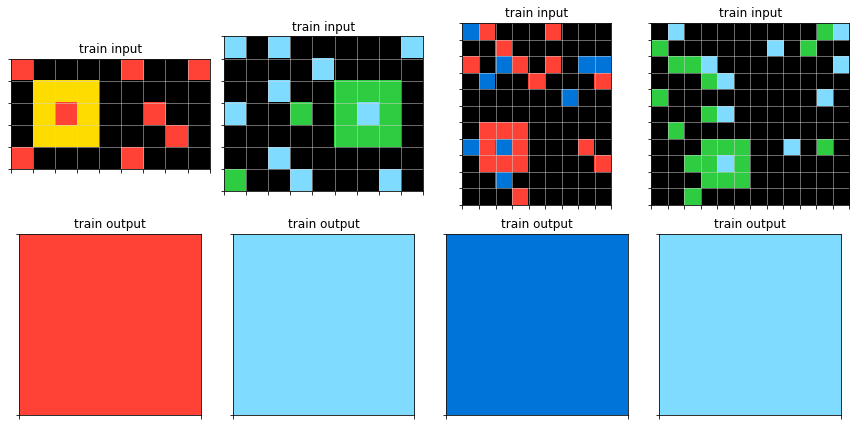

21 objects
[[1]
 [1]]
[[1]]
[[4]]
[[1]]
[[4]]
[[4]]
[[4]]
[[1]]
[[1]]
[[4 4]]
[[1]]
[[1]]
[[1]]
[[4]]
[[1 1 1 0]
 [1 0 1 1]
 [1 1 1 0]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4 4]]
[[1]]
1 objects
[[4]]


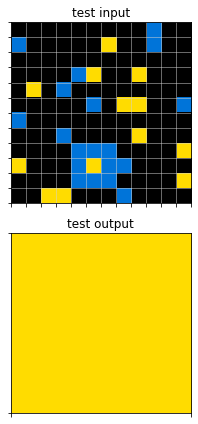

dae9d2b5.json
Icecuber solved? True
['pattern_juxtaposition', 'separate_images', 'recoloring']
3 objects
[[4 4]
 [4 0]]
[[3 3]
 [3 0]]
[[3]]
2 objects
[[6 6]
 [6 0]]
[[6]]
4 objects
[[4]
 [4]]
[[4]]
[[3 3]
 [3 0]
 [3 0]]
[[4]]
2 objects
[[6 6 6]
 [6 0 0]
 [6 0 0]]
[[6]]
4 objects
[[0 0 4]
 [0 4 4]
 [4 4 0]]
[[3]]
[[3]]
[[3]
 [3]]
1 objects
[[0 6 6]
 [6 6 6]
 [6 6 6]]
4 objects
[[4 4]]
[[3]]
[[3]]
[[4]]
3 objects
[[6 6]]
[[6]]
[[6]]
4 objects
[[3]]
[[4]]
[[4]]
[[3 3]]
2 objects
[[6]]
[[6 0 0]
 [6 6 6]]


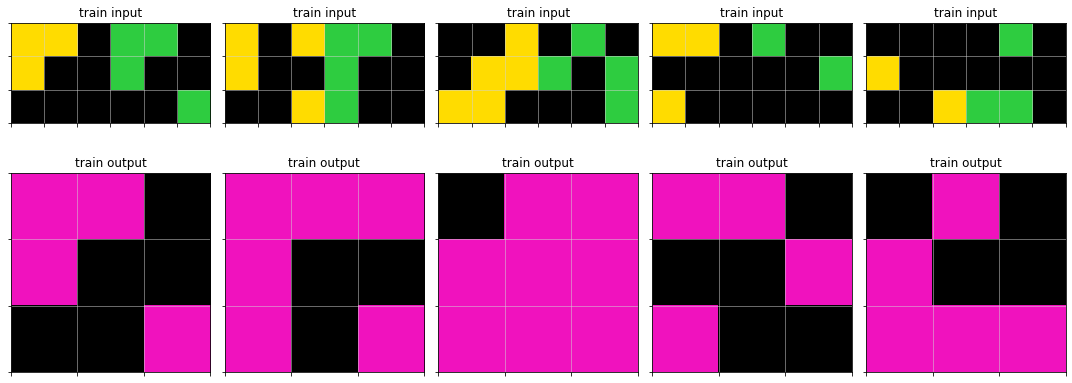

4 objects
[[4 4]]
[[3 0]
 [3 3]
 [3 0]]
[[4]]
[[4]]
1 objects
[[6 6 6]
 [6 6 0]
 [6 6 0]]
4 objects
[[4]]
[[0 3 0]
 [3 3 3]
 [3 0 0]]
[[4]]
[[4]]
1 objects
[[0 6 6]
 [6 6 6]
 [6 0 0]]


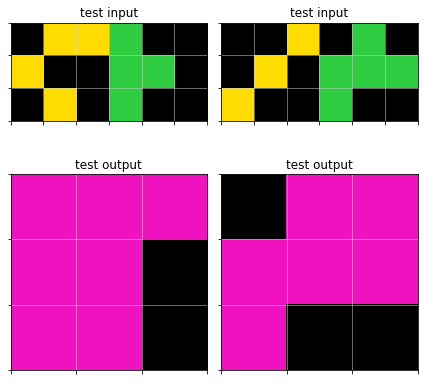

db3e9e38.json
Icecuber solved? True
['pattern_expansion', 'out_of_boundary']
1 objects
[[7]
 [7]
 [7]
 [7]]
7 objects
[[8]]
[[7]
 [7]]
[[8]
 [8]
 [8]]
[[7]
 [7]
 [7]
 [7]]
[[8]
 [8]
 [8]]
[[7]
 [7]]
[[8]]
1 objects
[[7]
 [7]
 [7]
 [7]
 [7]]
7 objects
[[7]
 [7]
 [7]]
[[8]
 [8]
 [8]
 [8]]
[[7]
 [7]
 [7]
 [7]
 [7]]
[[8]
 [8]
 [8]
 [8]]
[[7]
 [7]
 [7]]
[[8]
 [8]]
[[7]]


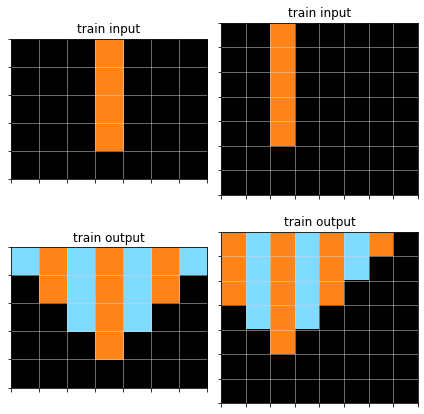

1 objects
[[7]
 [7]
 [7]
 [7]
 [7]
 [7]
 [7]]
9 objects
[[8]
 [8]]
[[7]
 [7]
 [7]]
[[8]
 [8]
 [8]
 [8]]
[[7]
 [7]
 [7]
 [7]
 [7]]
[[8]
 [8]
 [8]
 [8]
 [8]
 [8]]
[[7]
 [7]
 [7]
 [7]
 [7]
 [7]
 [7]]
[[8]
 [8]
 [8]
 [8]
 [8]
 [8]]
[[7]
 [7]
 [7]
 [7]
 [7]]
[[8]
 [8]
 [8]
 [8]]


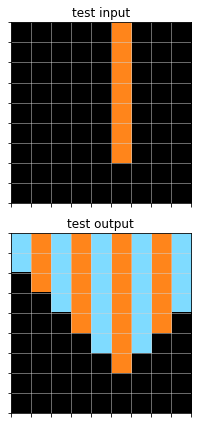

db93a21d.json
Icecuber solved? False
['contouring', 'draw_line_from_point', 'measure_area', 'measure_length', 'algebra']
2 objects
[[9 9]
 [9 9]]
[[9 9]
 [9 9]]
5 objects
[[3 0 0 3]
 [3 0 0 3]
 [3 3 3 3]]
[[9 9]
 [9 9]]
[[1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]]
[[3 3 3 3]
 [3 0 0 3]
 [3 0 0 3]
 [3 3 3 3]]
[[9 9]
 [9 9]]
3 objects
[[9 9 9 9]
 [9 9 9 9]
 [9 9 9 9]
 [9 9 9 9]]
[[9 9]
 [9 9]]
[[9 9]
 [9 9]]
7 objects
[[0 0 0 0 3 3 3 3 3 3 3 3 0]
 [0 0 0 0 3 3 3 3 3 3 3 3 0]
 [0 0 0 0 3 3 0 0 0 0 3 3 0]
 [0 0 0 0 3 3 0 0 0 0 3 3 0]
 [0 0 0 0 3 3 0 0 0 0 3 3 0]
 [3 3 3 3 3 3 0 0 0 0 3 3 0]
 [3 0 0 3 3 3 3 3 3 3 3 3 0]
 [3 0 0 3 3 3 3 3 3 3 3 3 0]
 [3 3 3 3 0 0 0 0 0 0 3 3 3]
 [0 0 0 0 0 0 0 0 0 0 3 0 0]
 [0 0 0 0 0 0 0 0 0 0 3 0 0]
 [0 0 0 0 0 0 0 0 0 0 3 3 3]]
[[9 9 9 9]
 [9 9 9 9]
 [9 9 9 9]
 [9 9 9 9]]
[[9 9]
 [9 9]]
[[1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]]
[[1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]]
[[9 9]
 [9 9]]
[[1 1]
 [1 1]
 [1 1]]
3 object

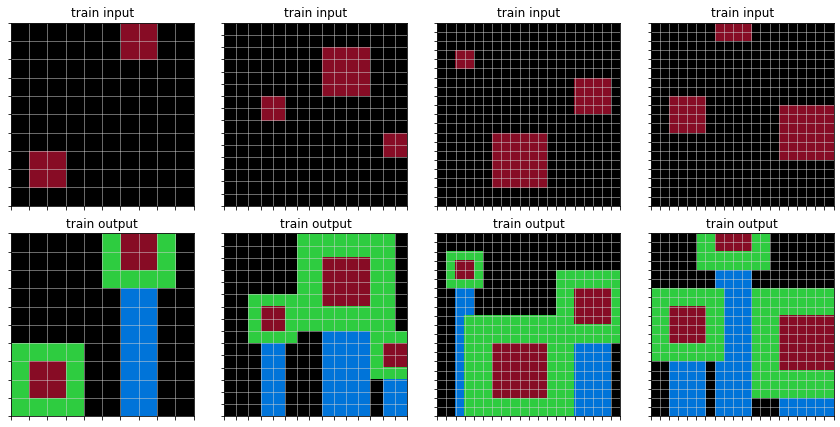

4 objects
[[9 9 9 9]
 [9 9 9 9]
 [9 9 9 9]
 [9 9 9 9]]
[[9 9 9 9]
 [9 9 9 9]
 [9 9 9 9]
 [9 9 9 9]]
[[9 9 9 9 9 9]
 [9 9 9 9 9 9]
 [9 9 9 9 9 9]
 [9 9 9 9 9 9]
 [9 9 9 9 9 9]
 [9 9 9 9 9 9]]
[[9 9]
 [9 9]]
11 objects
[[0 0 0 0 0 0 0 3 3 3 3 3 3 3 3]
 [0 0 0 0 0 0 0 3 3 3 3 3 3 3 3]
 [0 0 0 0 0 0 0 3 3 0 0 0 0 3 3]
 [0 0 0 0 0 0 0 3 3 0 0 0 0 3 3]
 [0 0 0 0 0 0 0 3 3 0 0 0 0 3 3]
 [3 3 3 3 3 3 3 3 3 0 0 0 0 3 3]
 [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
 [3 3 0 0 0 0 3 3 3 3 3 3 3 3 3]
 [3 3 0 0 0 0 3 3 0 0 0 0 0 0 0]
 [3 3 0 0 0 0 3 3 0 0 0 0 0 0 0]
 [3 3 0 0 0 0 3 3 0 0 0 0 0 0 0]
 [3 3 3 3 3 3 3 3 0 0 0 0 0 0 0]
 [3 3 3 3 3 3 3 3 0 0 0 0 0 0 0]]
[[9 9 9 9]
 [9 9 9 9]
 [9 9 9 9]
 [9 9 9 9]]
[[9 9 9 9]
 [9 9 9 9]
 [9 9 9 9]
 [9 9 9 9]]
[[1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 0 0]
 [1 1 0 0]
 [1 1 0 0]
 [1 1 0 0]
 [1 1 0 0]
 [1 1 0 0]
 [1 1 0 0]
 [1 1 0 0]
 [1 1 0 0]
 [1 1 0 0]
 [1 1 0 0]
 [1 1 0 0]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]]
[[1 1 1 1]
 [1 1 1 1

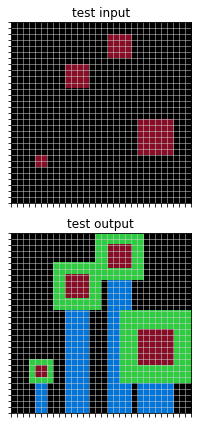

dbc1a6ce.json
Icecuber solved? True
['connect_the_dots']
7 objects
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
9 objects
[[1]]
[[0 8 0 0 0]
 [0 8 0 0 0]
 [0 8 0 0 0]
 [8 8 8 8 8]
 [0 8 0 0 0]
 [0 8 0 0 0]
 [0 8 0 0 0]
 [0 8 0 0 0]]
[[1]]
[[1]]
[[1]]
[[8]]
[[1]]
[[1]]
[[1]]
8 objects
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
12 objects
[[1]]
[[8 8 8 8]]
[[1]]
[[8]]
[[1]]
[[8 8 8]]
[[1]]
[[1]]
[[1]]
[[8 8 8 8 8 8]]
[[1]]
[[1]]
13 objects
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
20 objects
[[1]]
[[8 8 8 8]]
[[1]]
[[0 0 0 0 8 0 0 0]
 [0 0 0 0 8 0 0 0]
 [0 0 0 0 8 0 0 0]
 [0 0 0 0 8 0 0 0]
 [8 8 8 8 8 8 8 0]
 [0 0 0 0 0 8 8 8]]
[[1]]
[[8]
 [8]
 [8]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[8 8 8]]
[[1]]
[[8]]
[[8]]
[[1]]
[[8 8 8]]
[[1]]
9 objects
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
14 objects
[[1]]
[[8 8]]
[[1]]
[[8]]
[[1]]
[[8]]
[[1]]
[[1]]
[[8]
 [8]
 [8]]
[[1]]
[[1]]
[[8 8 8 8]]
[[1]]
[[1]]


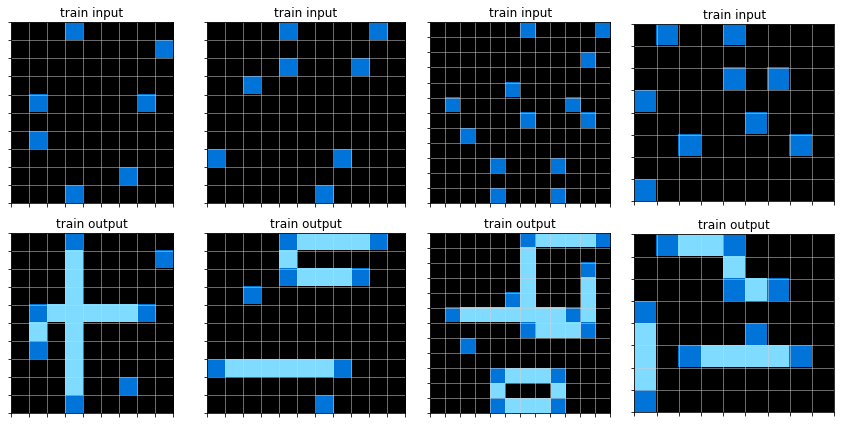

19 objects
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
30 objects
[[1]]
[[8 8]]
[[1]]
[[8 8 8]]
[[1]]
[[1]]
[[8]]
[[8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]]
[[1]]
[[0 8]
 [0 8]
 [8 8]
 [8 8]
 [8 8]
 [8 0]
 [8 0]
 [8 0]
 [8 0]]
[[1]]
[[1]]
[[1]]
[[8]]
[[1]]
[[1]]
[[8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]]
[[8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[8 8 8 8 8 8 8]]
[[1]]
[[1]]
[[8]]
[[1]]
[[8]]
[[1]]


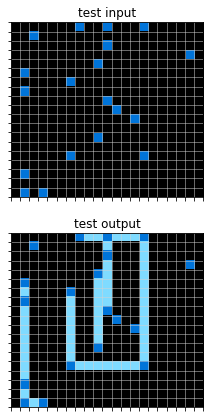

dc0a314f.json
Icecuber solved? False
['pattern_completion', 'crop']
92 objects
[[2]]
[[1]]
[[2 2]]
[[6]]
[[0 5 5]
 [5 0 5]
 [5 5 5]]
[[6 6]]
[[5 5 0]
 [5 0 5]
 [5 5 5]]
[[6]]
[[2 2]]
[[1]]
[[2]]
[[1]]
[[6 6]
 [6 0]]
[[1]]
[[6]]
[[0 0 2 2 0 0]
 [0 0 2 2 0 0]
 [2 2 2 2 2 2]]
[[6]]
[[1]]
[[6 6]
 [0 6]]
[[1]]
[[2]
 [2]]
[[1]]
[[0 6 0]
 [6 6 6]
 [0 6 0]]
[[0 6 0]
 [6 6 6]
 [0 6 0]]
[[1]]
[[2]
 [2]]
[[1]]
[[1]]
[[6]]
[[0 5 5]
 [5 0 5]
 [5 5 5]]
[[5]]
[[0 8]
 [8 8]]
[[0 0 5]
 [0 0 5]
 [5 5 5]]
[[7 7]]
[[5]]
[[8]]
[[5]]
[[5 5]]
[[6]]
[[6]]
[[0 0 2]
 [0 0 2]
 [2 2 2]
 [2 2 2]
 [0 0 2]
 [0 0 2]]
[[0 0 8 8]
 [0 0 8 8]
 [8 8 8 8]
 [8 8 8 8]
 [0 0 8 8]
 [0 0 8 8]]
[[3 3 3 3 3]
 [3 3 3 3 3]
 [3 3 3 3 3]
 [3 3 3 3 3]
 [3 3 3 3 3]]
[[6]]
[[0 5]
 [5 5]]
[[6]
 [6]]
[[7]
 [7]]
[[2]
 [2]]
[[6]
 [6]]
[[5 5 5]
 [5 0 5]
 [0 5 5]]
[[5 5 5]
 [0 0 5]
 [0 0 5]]
[[5 5]
 [0 5]]
[[6]]
[[8 8]
 [0 8]]
[[5]
 [5]]
[[8 8]
 [8 0]]
[[2]]
[[5 0]
 [5 5]]
[[6]]
[[6]]
[[0 6 0]
 [6 6 6]
 [0 6 0]]
[[5]]
[[7 7]]
[[5]]
[[0 6 0]
 

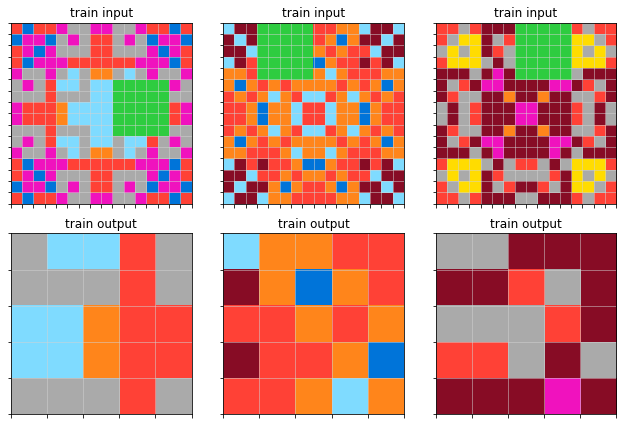

50 objects
[[5 5]
 [5 0]]
[[0 0 2]
 [0 2 2]
 [2 2 0]]
[[0 0 0 5 0 5 5 5 5 5 5 0 5 0 0 0]
 [0 0 0 5 5 5 0 0 0 0 5 5 5 0 0 0]
 [0 0 0 0 5 0 0 0 0 0 0 5 0 0 0 0]
 [5 5 0 5 5 0 0 0 0 0 0 5 5 0 5 5]
 [0 5 5 5 0 0 0 0 0 0 0 0 0 5 5 0]
 [5 5 0 0 0 0 0 0 0 0 0 0 0 0 5 5]
 [5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5]
 [5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5]
 [5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5]
 [5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5]
 [5 5 0 0 0 0 0 0 0 0 0 0 0 0 5 5]
 [0 5 5 5 0 0 0 0 0 0 0 0 5 5 5 0]
 [5 5 0 5 5 0 0 0 0 0 0 5 5 0 5 5]
 [0 0 0 0 5 0 0 0 0 0 0 5 0 0 0 0]
 [0 0 0 5 5 5 0 0 0 0 5 5 5 0 0 0]
 [0 0 0 5 0 5 5 5 5 5 5 0 5 0 0 0]]
[[2]]
[[2]]
[[2 0 0]
 [2 2 0]
 [0 2 2]]
[[5 5]
 [0 5]]
[[0 2 2 2 2 0]
 [2 2 0 0 2 2]
 [2 0 0 0 0 2]]
[[5]]
[[8]]
[[0 5 5 0]
 [5 5 5 5]]
[[8]]
[[5]]
[[8]]
[[8]]
[[2]]
[[4]]
[[0 6 6]
 [6 6 0]
 [6 0 0]]
[[0 0 0 9 0 0]
 [0 0 9 9 0 0]
 [0 9 0 9 0 0]
 [9 9 9 9 0 0]
 [9 9 9 9 0 0]
 [0 9 0 9 9 0]
 [0 0 9 9 9 9]
 [0 0 0 9 9 0]]
[[3 3 3 3 3]
 [3 3 3 3 3]
 [3 3 3 3 3]
 [3 3 3 3 3]
 [3 3 3 3 3]

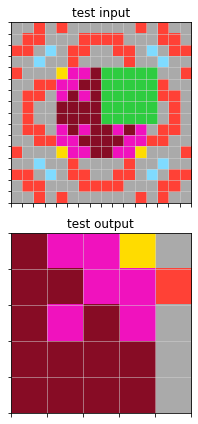

dc1df850.json
Icecuber solved? True
['contouring', 'pattern_expansion', 'out_of_boundary']
3 objects
[[2]]
[[2]]
[[6]]
4 objects
[[2]]
[[0 1 1 1 1]
 [1 1 1 0 1]
 [0 0 1 1 1]]
[[2]]
[[6]]
4 objects
[[2]]
[[3]]
[[8]]
[[2]]
6 objects
[[1 0]
 [1 1]]
[[2]]
[[3]]
[[8]]
[[1 1 1]
 [1 0 1]
 [1 1 1]]
[[2]]
1 objects
[[2]]
2 objects
[[1 1 1]
 [1 0 1]
 [1 1 1]]
[[2]]


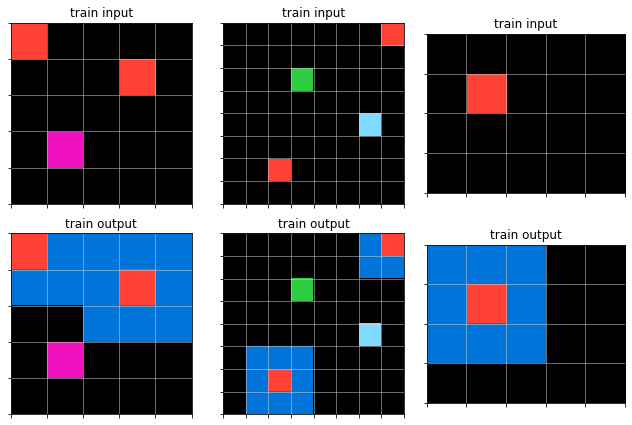

6 objects
[[7]]
[[2]]
[[2]]
[[7]]
[[2]]
[[5]]
9 objects
[[1 1 1]
 [1 0 1]
 [1 1 1]]
[[7]]
[[2]]
[[1 1 1]
 [1 0 1]
 [1 1 1]]
[[2]]
[[7]]
[[1 1 1]
 [1 0 1]
 [1 1 1]]
[[2]]
[[5]]


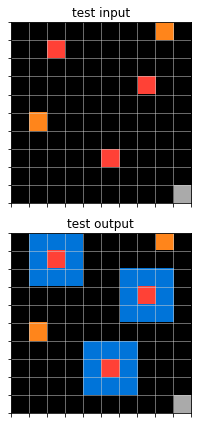

dc433765.json
Icecuber solved? True
['pattern_moving', 'direction_guessing', 'only_one']
2 objects
[[3]]
[[4]]
2 objects
[[3]]
[[4]]
2 objects
[[3]]
[[4]]
2 objects
[[3]]
[[4]]
2 objects
[[3]]
[[4]]
2 objects
[[3]]
[[4]]
2 objects
[[3]]
[[4]]
2 objects
[[3]]
[[4]]
2 objects
[[4]]
[[3]]
2 objects
[[4]]
[[3]]
2 objects
[[3]]
[[4]]
2 objects
[[3]]
[[4]]
2 objects
[[3]]
[[4]]
2 objects
[[3]]
[[4]]


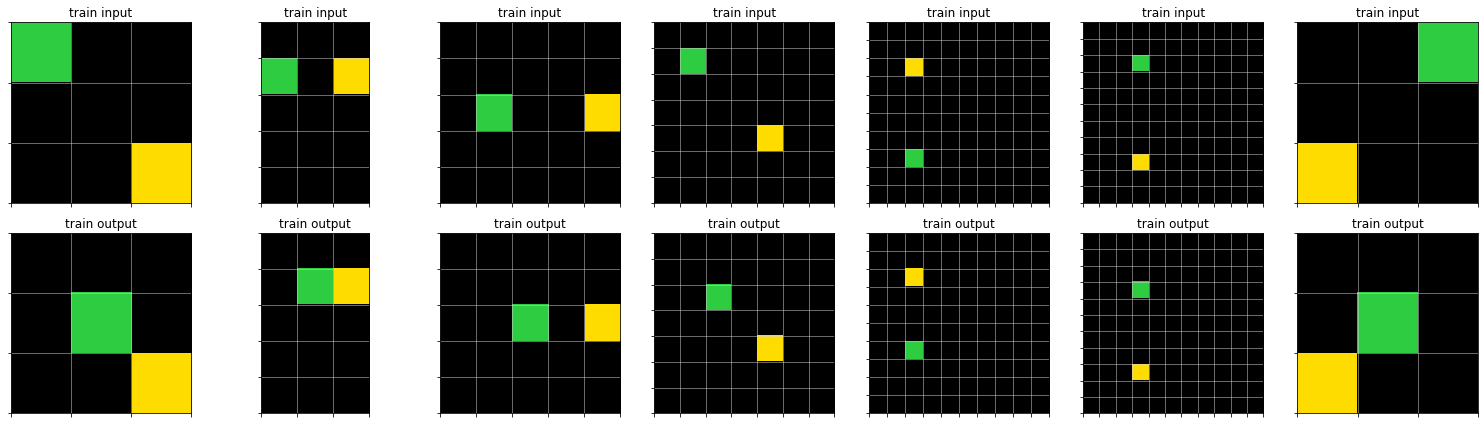

2 objects
[[3]]
[[4]]
2 objects
[[3]]
[[4]]
2 objects
[[4]]
[[3]]
2 objects
[[4]]
[[3]]


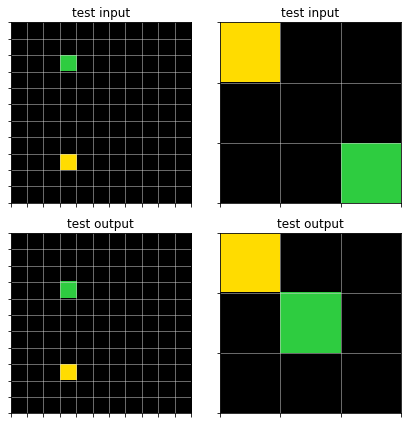

ddf7fa4f.json
Icecuber solved? False
['color_palette', 'recoloring']
6 objects
[[2]]
[[6]]
[[8]]
[[5 5 5 5]
 [5 5 5 5]
 [5 5 5 5]
 [5 5 5 5]]
[[5 5]
 [5 5]
 [5 5]
 [5 5]
 [5 5]]
[[5 5 5]
 [5 5 5]
 [5 5 5]]
6 objects
[[2]]
[[6]]
[[8]]
[[6 6 6 6]
 [6 6 6 6]
 [6 6 6 6]
 [6 6 6 6]]
[[2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]]
[[8 8 8]
 [8 8 8]
 [8 8 8]]
6 objects
[[1]]
[[4]]
[[7]]
[[5 5 5 5]
 [5 5 5 5]
 [5 5 5 5]
 [5 5 5 5]]
[[5 5 5]
 [5 5 5]
 [5 5 5]
 [5 5 5]]
[[5 5 5 5]
 [5 5 5 5]]
6 objects
[[1]]
[[4]]
[[7]]
[[1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]]
[[7 7 7]
 [7 7 7]
 [7 7 7]
 [7 7 7]]
[[4 4 4 4]
 [4 4 4 4]]
6 objects
[[1]]
[[6]]
[[7]]
[[5 5]
 [5 5]
 [5 5]]
[[5 5 5]
 [5 5 5]]
[[5 5 5]
 [5 5 5]
 [5 5 5]]
6 objects
[[1]]
[[6]]
[[7]]
[[1 1]
 [1 1]
 [1 1]]
[[7 7 7]
 [7 7 7]]
[[6 6 6]
 [6 6 6]
 [6 6 6]]


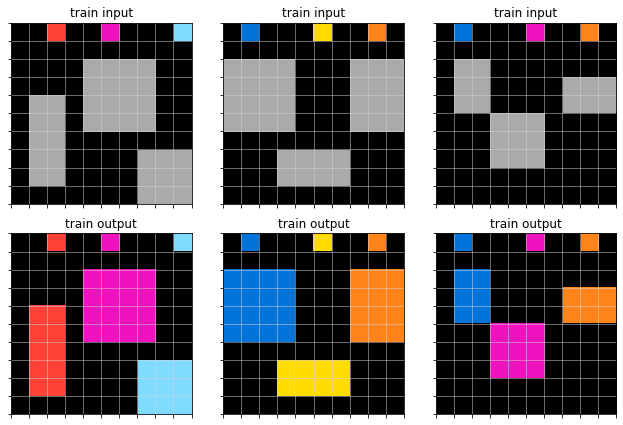

6 objects
[[3]]
[[6]]
[[9]]
[[5 5 5 5 5]
 [5 5 5 5 5]
 [5 5 5 5 5]
 [5 5 5 5 5]]
[[5 5]
 [5 5]
 [5 5]
 [5 5]
 [5 5]
 [5 5]
 [5 5]]
[[5 5 5 5]
 [5 5 5 5]]
6 objects
[[3]]
[[6]]
[[9]]
[[6 6 6 6 6]
 [6 6 6 6 6]
 [6 6 6 6 6]
 [6 6 6 6 6]]
[[9 9]
 [9 9]
 [9 9]
 [9 9]
 [9 9]
 [9 9]
 [9 9]]
[[3 3 3 3]
 [3 3 3 3]]


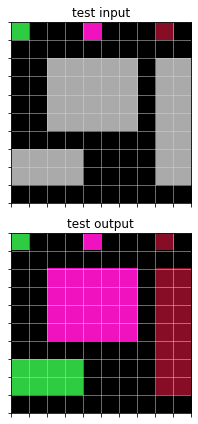

de1cd16c.json
Icecuber solved? True
['separate_images', 'count_tiles', 'take_maximum', 'summarize']
10 objects
[[4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4]
 [4 4 4 0 4 4 4 4]
 [4 4 4 4 4 4 4 4]
 [4 4 4 4 4 0 4 4]
 [4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4]]
[[6]]
[[6]]
[[6]]
[[8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8]
 [8 8 8 8 8 0 8 8]
 [8 8 8 8 8 8 8 8]
 [8 8 0 8 8 8 8 8]
 [8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8]
 [8 8 8 8 8 0 8 8]
 [8 8 8 8 8 8 8 8]]
[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 0 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]
[[6]]
[[6]]
[[6]]
[[6]]
1 objects
[[8]]
10 objects
[[3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3]
 [3 3 0 3 3 3 3]
 [3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3]]
[[2 2 2 2 2 2 2 2]
 [2 2 2 0 2 2 0 2]
 [2 2 2 2 2 2 2 2]
 [2 2 0 2 2 2 2 2]
 [2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2]
 [2 2 2 2 0 2 2 2]
 [2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[8 8 8 

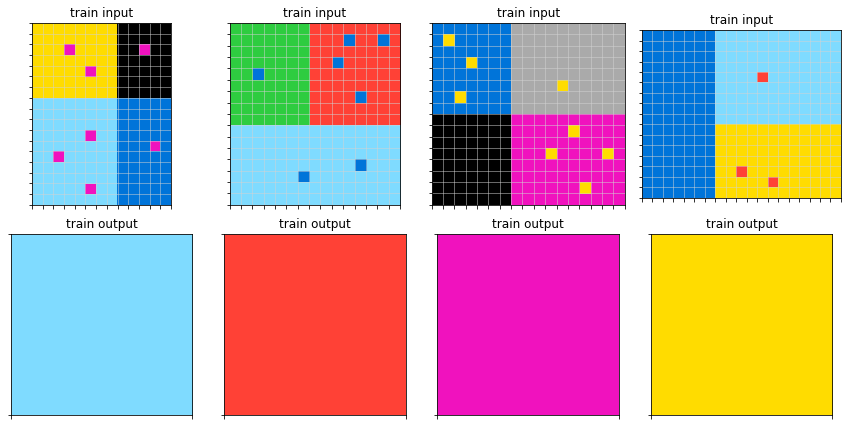

15 objects
[[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]]
[[4]]
[[2 2 2 2 2 2 2 2 2]
 [2 0 2 2 2 2 2 0 2]
 [2 2 2 2 2 2 2 2 2]
 [2 2 2 2 0 2 2 2 2]
 [2 2 0 2 2 2 2 2 2]
 [2 2 2 2 2 2 0 2 2]
 [2 2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2 2]]
[[8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 0 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8]
 [8 8 8 0 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 0 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1]
 [1 1 1 1 0 1 1 1 1]
 [1 0 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1]]
[[4]]
[[4]]
[[4]]
1 objects
[[2]]


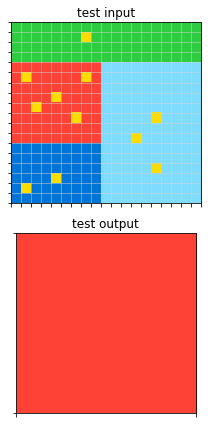

ded97339.json
Icecuber solved? True
['connect_the_dots']
4 objects
[[8]]
[[8]]
[[8]]
[[8]]
2 objects
[[8 8 8 8 8 8]
 [0 0 0 0 0 8]
 [0 0 0 0 0 8]
 [0 0 0 0 0 8]
 [0 0 0 0 0 8]
 [0 0 0 0 0 8]
 [0 0 0 0 0 8]]
[[8]]
5 objects
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
3 objects
[[8]]
[[8]
 [8]
 [8]
 [8]
 [8]
 [8]]
[[8 8 8 8 8]]
6 objects
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
2 objects
[[8 8 8 8 8 0 0 0 0]
 [8 0 0 0 8 0 0 0 0]
 [8 0 0 0 8 0 0 0 0]
 [8 0 0 0 8 0 0 0 0]
 [0 0 0 0 8 0 0 0 0]
 [0 0 0 0 8 0 0 0 0]
 [0 0 0 0 8 8 8 8 8]]
[[8]]


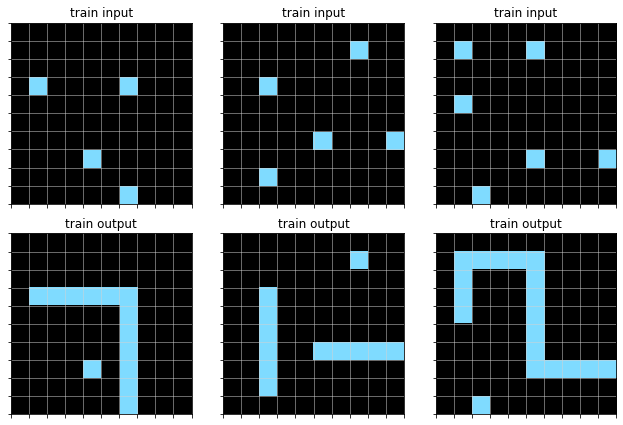

6 objects
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
3 objects
[[8]
 [8]
 [8]
 [8]
 [8]]
[[8]]
[[0 0 0 8]
 [0 0 0 8]
 [0 0 0 8]
 [0 0 0 8]
 [0 0 0 8]
 [8 8 8 8]]


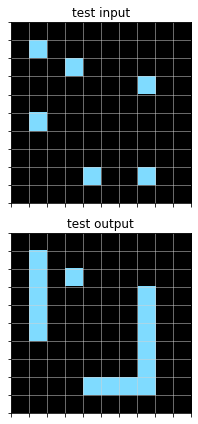

e179c5f4.json
Icecuber solved? False
['pattern_expansion', 'bouncing']
1 objects
[[1]]
20 objects
[[8]]
[[1]]
[[1]]
[[8]]
[[8]]
[[1]]
[[1]]
[[8]]
[[8]]
[[1]]
[[1]]
[[8]]
[[8]]
[[1]]
[[1]]
[[8]]
[[8]]
[[1]]
[[1]]
[[8]]
1 objects
[[1]]
16 objects
[[8]]
[[1]]
[[0 8]
 [8 8]
 [0 8]]
[[1]]
[[8 0]
 [8 8]
 [8 0]]
[[1]]
[[1]]
[[1]]
[[0 8]
 [8 8]
 [0 8]]
[[1]]
[[8 0]
 [8 8]
 [8 0]]
[[1]]
[[1]]
[[1]]
[[0 8]
 [8 8]]
[[1]]
1 objects
[[1]]
14 objects
[[8 8 8]
 [8 8 0]
 [8 0 0]]
[[1]]
[[1]]
[[0 0 8]
 [0 8 8]
 [8 8 8]
 [0 8 8]
 [0 0 8]]
[[1]]
[[1]]
[[8 0 0]
 [8 8 0]
 [8 8 8]
 [8 8 0]
 [8 0 0]]
[[1]]
[[1]]
[[1]]
[[1]]
[[0 0 8]
 [0 8 8]
 [8 8 8]]
[[1]]
[[1]]


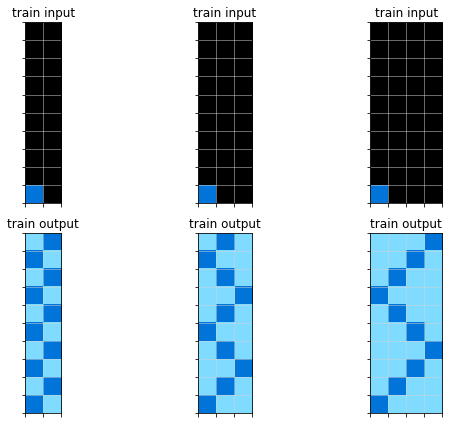

1 objects
[[1]]
14 objects
[[8]]
[[1]]
[[0 8 8 8]
 [8 8 8 8]
 [0 8 8 8]
 [0 0 8 8]
 [0 0 0 8]]
[[1]]
[[8 0 0 0]
 [8 8 0 0]
 [8 8 8 0]
 [8 8 8 8]
 [8 8 8 0]
 [8 8 0 0]
 [8 0 0 0]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[0 0 0 8]
 [0 0 8 8]
 [0 8 8 8]
 [8 8 8 8]]
[[1]]
[[1]]
[[1]]


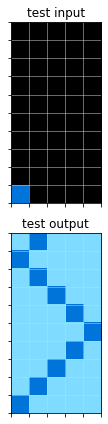

e21d9049.json
Icecuber solved? True
['pattern_expansion', 'draw_line_from_point', 'color_palette']
5 objects
[[8]]
[[3]]
[[8]]
[[3]]
[[2]]
22 objects
[[3]]
[[2]]
[[8]]
[[3]]
[[8]]
[[3]]
[[2]]
[[8]]
[[3]]
[[2]]
[[8]]
[[3]]
[[2]]
[[8]]
[[3]]
[[8]]
[[3]]
[[2]]
[[8]]
[[3]]
[[2]]
[[8]]
7 objects
[[4]]
[[8]]
[[2]]
[[3]]
[[8]]
[[4]]
[[2]]
28 objects
[[4]]
[[8]]
[[3]]
[[2]]
[[4]]
[[8]]
[[3]]
[[8]]
[[4]]
[[2]]
[[3]]
[[8]]
[[4]]
[[2]]
[[3]]
[[8]]
[[4]]
[[2]]
[[3]]
[[8]]
[[2]]
[[4]]
[[8]]
[[3]]
[[2]]
[[4]]
[[8]]
[[3]]


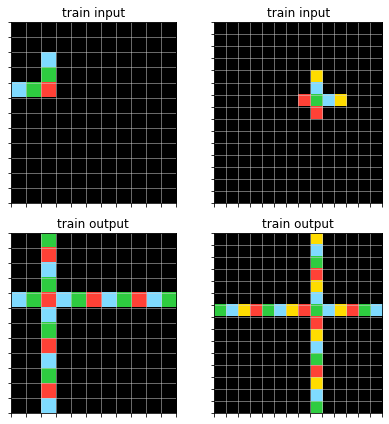

7 objects
[[4]]
[[4]]
[[2]]
[[3]]
[[1]]
[[3]]
[[1]]
39 objects
[[1]]
[[4]]
[[2]]
[[3]]
[[1]]
[[4]]
[[1]]
[[4]]
[[2]]
[[3]]
[[1]]
[[4]]
[[2]]
[[3]]
[[1]]
[[4]]
[[2]]
[[3]]
[[1]]
[[4]]
[[2]]
[[3]]
[[1]]
[[4]]
[[2]]
[[3]]
[[3]]
[[1]]
[[4]]
[[2]]
[[3]]
[[1]]
[[4]]
[[2]]
[[3]]
[[1]]
[[4]]
[[2]]
[[3]]


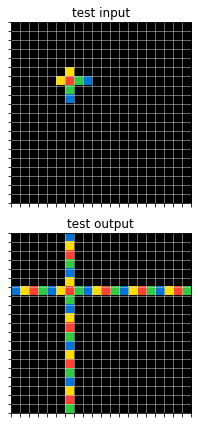

e26a3af2.json
Icecuber solved? False
['remove_noise', 'separate_images']
43 objects
[[1 1 1 1 1]
 [0 0 1 0 1]
 [0 1 1 0 1]
 [1 1 1 1 1]
 [0 1 1 1 0]
 [0 1 0 1 1]
 [1 1 1 1 0]
 [1 1 1 1 1]
 [1 1 1 0 1]
 [0 1 1 0 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 0 1 0 1]]
[[0 8 8 8]
 [0 8 8 8]
 [0 8 8 0]
 [0 8 8 0]
 [8 8 8 8]
 [0 0 8 8]
 [0 8 8 8]
 [0 8 0 8]
 [0 8 8 8]
 [0 0 8 8]
 [0 8 8 8]
 [0 8 8 8]
 [0 8 8 8]]
[[3 3 3 3]
 [3 3 3 3]
 [3 3 0 3]
 [3 3 3 3]
 [3 3 0 3]
 [3 3 3 3]
 [0 3 3 3]
 [3 3 3 0]
 [3 3 3 3]
 [0 3 3 3]
 [3 3 3 3]
 [3 3 0 3]
 [3 3 3 3]]
[[2 2 2 0 2]
 [2 2 2 2 2]
 [2 0 2 2 0]
 [2 2 2 2 2]
 [0 2 2 2 2]
 [2 2 0 2 0]
 [0 2 0 2 2]
 [2 2 2 2 0]
 [2 2 2 2 2]
 [0 0 2 2 0]
 [2 2 0 2 2]
 [2 2 2 2 2]
 [2 0 2 0 2]]
[[8]]
[[9]]
[[5]]
[[5]]
[[4]]
[[2]]
[[5]]
[[8]]
[[8]]
[[7]]
[[2]]
[[9]]
[[4]]
[[8]]
[[4]]
[[2]]
[[7]]
[[6]
 [6]]
[[9]]
[[9]]
[[9]]
[[4]]
[[5]]
[[4]]
[[3]]
[[9]]
[[6]]
[[8]]
[[5]]
[[4]]
[[6]]
[[4]]
[[7]]
[[6]]
[[7]]
[[2]]
[[4]]
[[9]]
[[1]]
4 objects
[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]


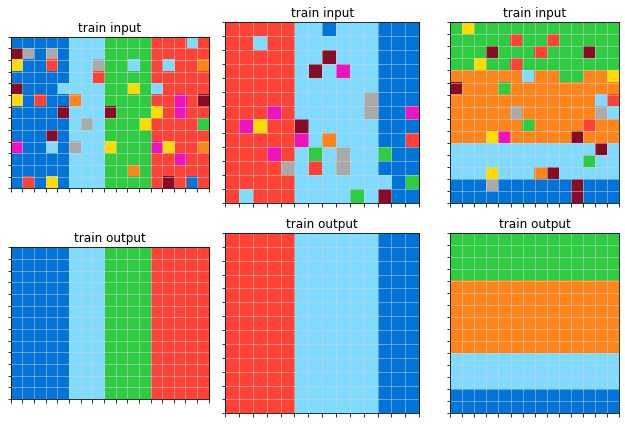

54 objects
[[6]]
[[1 1 0]
 [0 1 1]
 [1 1 1]]
[[5]]
[[1 1 1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 0 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 1 1 1]]
[[1]]
[[4]]
[[9]]
[[5]]
[[5]]
[[4]]
[[7]]
[[0 2 2 2 2 0 2 0 2 2 0]
 [2 2 0 2 0 2 2 2 0 2 2]
 [2 0 2 2 0 0 0 2 2 2 0]
 [2 2 2 2 2 2 2 2 2 2 0]]
[[6]]
[[9]]
[[4]]
[[2]]
[[4]]
[[2 2]
 [0 2]
 [2 2]
 [2 2]]
[[9]]
[[1]]
[[3]]
[[8]]
[[2]]
[[7]]
[[5]]
[[5]]
[[6 6]]
[[3]]
[[2]
 [2]]
[[5]]
[[6]]
[[0 0 0 0 0 0 0 0 0 0 0 0 8 0 0]
 [0 8 8 8 8 8 0 8 8 8 8 8 8 8 8]
 [8 8 8 8 0 8 8 8 8 8 0 8 8 8 0]
 [8 8 8 8 8 8 8 8 8 8 0 8 8 8 8]
 [8 8 8 8 8 8 8 8 0 8 8 8 0 8 8]]
[[1]]
[[9]]
[[1]]
[[7]]
[[9]]
[[4]]
[[5]]
[[1]]
[[4 4 4 4 4 4 0 0 4 4 4 4 4 0 4]
 [4 4 0 4 4 4 4 4 4 4 0 4 4 4 4]]
[[7]]
[[3]]
[[2]]
[[7]]
[[8]]
[[3 3]]
[[1]]
[[9]]
[[3 3 3 3 3 3 3 3 3 3 3]
 [0 3 3 3 3 3 3 3 3 3 3]]
[[8]]
[[6]]
[[3 3]]
[[8]]
5 objects
[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]
[[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
 [

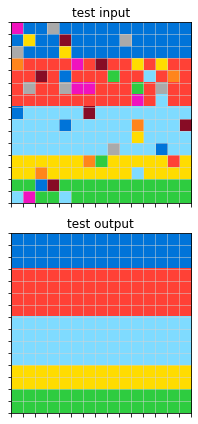

e3497940.json
Icecuber solved? True
['detect_wall', 'separate_images', 'image_reflection', 'image_juxtaposition']
5 objects
[[5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]]
[[4]
 [4]]
[[4 4]]
[[3 3]
 [0 3]
 [0 3]
 [0 3]]
[[3 3 3]]
2 objects
[[0 4]
 [4 4]]
[[0 3 3]
 [0 0 3]
 [3 3 3]
 [0 0 3]]
11 objects
[[5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]]
[[2]
 [2]
 [2]
 [2]]
[[2]]
[[6]]
[[2 2 2]]
[[6 6]]
[[6]]
[[2]]
[[2 2]]
[[2]]
[[2]]
4 objects
[[0 0 2]
 [0 0 2]
 [0 0 2]
 [2 2 2]]
[[6]]
[[6 6]]
[[0 0 2]
 [2 2 2]
 [0 0 2]]
8 objects
[[5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]]
[[7]]
[[0 8]
 [0 8]
 [8 8]]
[[7]]
[[8 8]]
[[8]
 [8]]
[[8]]
[[7]]
4 objects
[[7]]
[[0 8]
 [0 8]
 [8 8]
 [8 8]
 [0 8]
 [0 8]
 [0 8]]
[[7]]
[[7]]


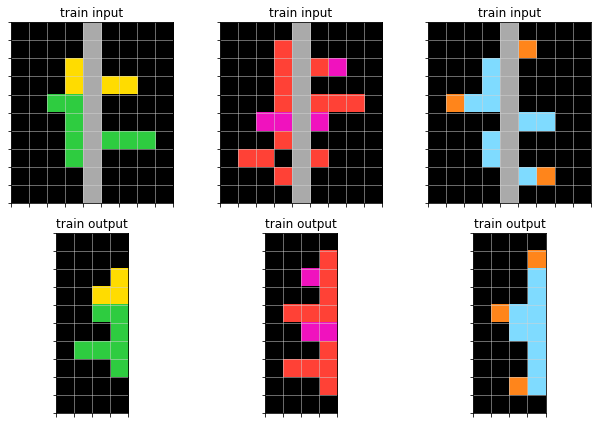

11 objects
[[5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]]
[[0 0 1]
 [0 0 1]
 [1 1 1]]
[[1 0 0]
 [1 1 1]]
[[6]]
[[6]]
[[6 6]]
[[1 1 1]]
[[1]
 [1]]
[[1]]
[[6]]
[[6]]
6 objects
[[0 0 1]
 [0 0 1]
 [1 1 1]]
[[6]]
[[6 6]]
[[1 1 1]
 [0 0 1]
 [0 0 1]]
[[6]]
[[6]]


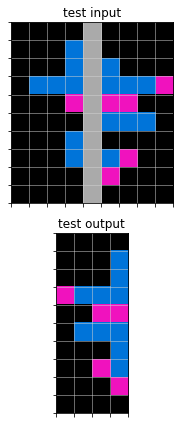

e40b9e2f.json
Icecuber solved? False
['pattern_expansion', 'pattern_reflection', 'pattern_rotation']
10 objects
[[7]
 [7]]
[[4]]
[[4]]
[[7]]
[[4]]
[[7]]
[[4]]
[[7]]
[[4]]
[[4]]
13 objects
[[4]]
[[7]
 [7]]
[[4]]
[[4]]
[[4]]
[[7 7]]
[[4]]
[[7 7]]
[[4]]
[[7]
 [7]]
[[4]]
[[4]]
[[4]]
2 objects
[[3]]
[[6 6]
 [6 6]
 [0 6]]
5 objects
[[3]]
[[0 6 0 0]
 [0 6 6 6]
 [6 6 6 0]
 [0 0 6 0]]
[[3]]
[[3]]
[[3]]
2 objects
[[9]]
[[8 8 8]
 [8 8 8]
 [8 8 8]]
5 objects
[[9]]
[[9]]
[[8 8 8]
 [8 8 8]
 [8 8 8]]
[[9]]
[[9]]


9 objects
[[2]
 [2]]
[[3 3 3]]
[[3]]
[[2]]
[[3]]
[[2]]
[[3 3 3]]
[[2]]
[[3]]
9 objects
[[0 0 3]
 [0 0 3]
 [3 3 3]]
[[3 0 0]
 [3 0 0]
 [3 3 3]]
[[2]
 [2]]
[[2 2]]
[[3]]
[[2 2]]
[[3 3 3]
 [0 0 3]
 [0 0 3]]
[[2]
 [2]]
[[3 3 3]
 [3 0 0]
 [3 0 0]]


e48d4e1a.json
Icecuber solved? False
['count_tiles', 'pattern_moving', 'detect_grid', 'out_of_boundary']
2 objects
[[0 0 0 2 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0 0]
 [2 2 2 2 2 2 2 2 2 2]
 [0 0 0 2 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0 0]]
[[5]
 [5]]
1 objects
[[0 2 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0 0]
 [2 2 2 2 2 2 2 2 2 2]
 [0 2 0 0 0 0 0 0 0 0]]
2 objects
[[0 0 0 4 0 0 0 0 0 0]
 [0 0 0 4 0 0 0 0 0 0]
 [0 0 0 4 0 0 0 0 0 0]
 [4 4 4 4 4 4 4 4 4 4]
 [0 0 0 4 0 0 0 0 0 0]
 [0 0 0 4 0 0 0 0 0 0]
 [0 0 0 4 0 0 0 0 0 0]
 [0 0 0 4 0 0 0 0 0 0]
 [0 0 0 4 0 0 0 0 0 0]
 [0 0 0 4 0 0 0 0 0 0]]
[[5]
 [5]
 [5]]
1 objects
[[4 0 0 0 0 0 0 0 0 0]
 [4 0 0 0 0 0 0 0 0 0]
 [4 0 0 0 0 0 0 0 0 0]
 [4 0 0 0 0 0 0 0 0 0]
 [4 0 0 0 0 0 0 0 0 0]
 [4 0 0 0 0 0 0 0 0 

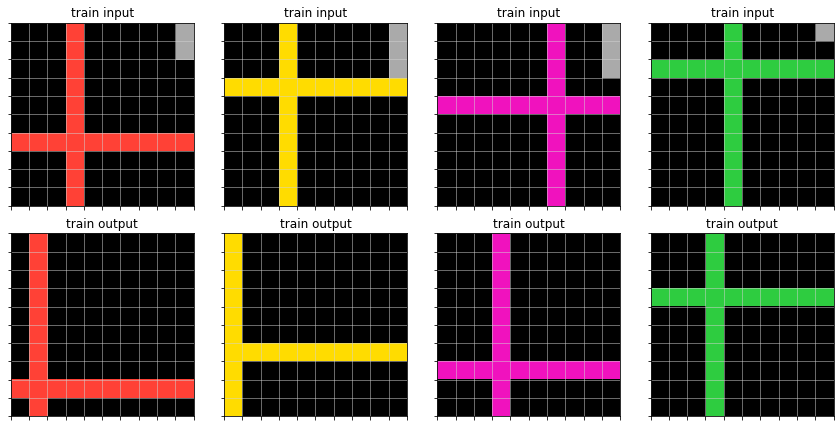

2 objects
[[0 0 0 0 0 8 0 0 0 0]
 [0 0 0 0 0 8 0 0 0 0]
 [0 0 0 0 0 8 0 0 0 0]
 [8 8 8 8 8 8 8 8 8 8]
 [0 0 0 0 0 8 0 0 0 0]
 [0 0 0 0 0 8 0 0 0 0]
 [0 0 0 0 0 8 0 0 0 0]
 [0 0 0 0 0 8 0 0 0 0]
 [0 0 0 0 0 8 0 0 0 0]
 [0 0 0 0 0 8 0 0 0 0]]
[[5]
 [5]]
1 objects
[[0 0 0 8 0 0 0 0 0 0]
 [0 0 0 8 0 0 0 0 0 0]
 [0 0 0 8 0 0 0 0 0 0]
 [0 0 0 8 0 0 0 0 0 0]
 [0 0 0 8 0 0 0 0 0 0]
 [8 8 8 8 8 8 8 8 8 8]
 [0 0 0 8 0 0 0 0 0 0]
 [0 0 0 8 0 0 0 0 0 0]
 [0 0 0 8 0 0 0 0 0 0]
 [0 0 0 8 0 0 0 0 0 0]]


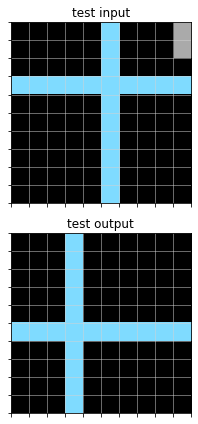

e5062a87.json
Icecuber solved? False
['pattern_repetition', 'pattern_juxtaposition']
18 objects
[[5 5 5 0 0]
 [5 0 0 0 0]
 [5 5 0 0 0]
 [0 5 5 5 5]
 [0 0 0 0 5]
 [0 0 5 5 5]]
[[2]]
[[5 5 5]
 [0 0 5]]
[[2]]
[[5]]
[[2]]
[[2]]
[[5]]
[[5 0]
 [5 0]
 [5 5]]
[[5]]
[[5]]
[[5 0]
 [5 5]]
[[5]]
[[5]]
[[5 5]
 [5 0]
 [5 5]]
[[0 0 5]
 [0 5 5]
 [5 5 0]]
[[5]]
[[5]]
28 objects
[[5 5 5 0 0]
 [5 0 0 0 0]
 [5 5 0 0 0]
 [0 5 5 5 5]
 [0 0 0 0 5]
 [0 0 5 5 5]]
[[2]]
[[5 5 5]
 [0 0 5]]
[[2]]
[[5]]
[[0 2 2]
 [2 2 0]]
[[5]]
[[2]]
[[5 0]
 [5 0]
 [5 5]]
[[5]]
[[2]]
[[5]]
[[5 0]
 [5 5]]
[[2]]
[[2]]
[[2 0]
 [2 2]
 [0 2]]
[[5]]
[[2]]
[[2]]
[[5]]
[[2]]
[[5 5]
 [5 0]
 [5 5]]
[[0 0 5]
 [0 5 5]
 [5 5 0]]
[[5]]
[[2]]
[[2]]
[[5]]
[[2]]
8 objects
[[0 5 5 5 5]
 [5 0 5 0 0]
 [5 5 5 5 5]
 [5 0 5 5 5]
 [5 5 5 5 0]
 [5 0 0 0 0]]
[[5 0 5]
 [5 5 5]
 [0 0 5]
 [0 5 5]
 [0 5 5]]
[[5]]
[[5]]
[[2 2 2 2]]
[[0 0 0 0 5 0]
 [5 5 5 5 5 5]
 [0 5 5 5 0 0]
 [0 5 5 0 0 0]
 [0 0 5 0 0 0]]
[[0 0 0 5 5]
 [0 0 5 5 0]
 [5 0 5 0 5]
 [5 5 5 5 5]]
[[

7 objects
[[0 5 5 5 0 5 5 5 5 0]
 [5 5 5 0 5 5 5 5 0 0]
 [0 0 5 5 5 5 0 5 0 0]
 [0 0 5 5 5 5 0 5 5 5]
 [0 0 5 5 5 0 0 0 0 5]
 [0 0 0 0 0 0 0 5 5 5]
 [0 0 0 0 0 0 0 5 5 5]]
[[5]]
[[2 2]
 [2 2]
 [2 2]]
[[5 5]]
[[0 0 5 5 0 0 0]
 [0 5 5 5 5 5 5]
 [5 5 0 0 5 5 5]
 [5 0 0 0 5 0 0]]
[[5]]
[[5]]
9 objects
[[0 5 5 5 0 5 5 5 5 0]
 [5 5 5 0 5 5 5 5 0 0]
 [0 0 5 5 5 5 0 5 0 0]
 [0 0 5 5 5 5 0 5 5 5]
 [0 0 5 5 5 0 0 0 0 5]
 [0 0 0 0 0 0 0 5 5 5]
 [0 0 0 0 0 0 0 5 5 5]]
[[5]]
[[2 2]
 [2 2]
 [2 2]]
[[2 2]
 [2 2]
 [2 2]]
[[5 5]]
[[0 0 5 5 0 0 0]
 [0 5 5 5 5 5 5]
 [5 5 0 0 5 5 5]
 [5 0 0 0 5 0 0]]
[[2 2]
 [2 2]
 [2 2]]
[[5]]
[[5]]


e509e548.json
Icecuber solved? False
['recoloring', 'associate_colors_to_shapes', 'homeomorphism']
8 objects
[[3 3]
 [0 3]
 [0 3]]
[[3 0 0 3]
 [3 3 3 3]
 [3 0 0 0]]
[[3 3 3]
 [3 0 0]
 [3 0 0]
 [3 3 3]]
[[0 3 3 0]
 [0 3 0 0]
 [0 3 0 0]
 [0 3 0 0]
 [3 3 3 3]]
[[3 3]
 [0 3]
 [3 3]]
[[3 3 3 3 3]
 [3 0 0 0 0]
 [3 0 0 0 0]]
[[3 3 3]
 [3 0 3]
 [3 0 3]
 [0 0 3]]
[[0 3]
 [3 3]]
8 objects
[[1 1]
 [0 1]
 [0 1]]
[[2 0 0 2]
 [2 2 2 2]
 [2 0 0 0]]
[[6 6 6]
 [6 0 0]
 [6 0 0]
 [6 6 6]]
[[0 2 2 0]
 [0 2 0 0]
 [0 2 0 0]
 [0 2 0 0]
 [2 2 2 2]]
[[6 6]
 [0 6]
 [6 6]]
[[1 1 1 1 1]
 [1 0 0 0 0]
 [1 0 0 0 0]]
[[6 6 6]
 [6 0 6]
 [6 0 6]
 [0 0 6]]
[[0 1]
 [1 1]]
3 objects
[[3 3 3]
 [0 0 3]
 [0 0 3]]
[[3 3 3 3]
 [3 0 0 3]
 [3 0 0 3]
 [3 0 0 3]]
[[3 3 3 3 3]
 [0 0 3 0 0]
 [0 0 3 0 0]
 [0 0 3 3 3]]
3 objects
[[1 1 1]
 [0 0 1]
 [0 0 1]]
[[6 6 6 6]
 [6 0 0 6]
 [6 0 0 6]
 [6 0 0 6]]
[[2 2 2 2 2]
 [0 0 2 0 0]
 [0 0 2 0 0]
 [0 0 2 2 2]]
5 objects
[[3 0 0 0 0]
 [3 0 0 0 0]
 [3 0 0 0 3]
 [3 3 3 3 3]]
[[3 0 0]
 [3 3 3]]
[

6 objects
[[3 0 3]
 [3 0 3]
 [3 3 3]]
[[3 0 0]
 [3 0 0]
 [3 3 3]
 [3 0 3]
 [0 0 3]]
[[0 0 0 3 3]
 [0 0 0 3 0]
 [3 3 3 3 3]]
[[0 3 3 3]
 [0 0 0 3]
 [3 3 3 3]]
[[3 0 0]
 [3 0 0]
 [3 3 3]]
[[3 3 3 3 3 3]
 [0 0 0 0 0 3]
 [0 0 0 0 0 3]]
6 objects
[[6 0 6]
 [6 0 6]
 [6 6 6]]
[[2 0 0]
 [2 0 0]
 [2 2 2]
 [2 0 2]
 [0 0 2]]
[[0 0 0 2 2]
 [0 0 0 2 0]
 [2 2 2 2 2]]
[[0 6 6 6]
 [0 0 0 6]
 [6 6 6 6]]
[[1 0 0]
 [1 0 0]
 [1 1 1]]
[[1 1 1 1 1 1]
 [0 0 0 0 0 1]
 [0 0 0 0 0 1]]


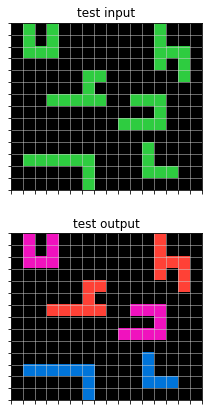

e50d258f.json
Icecuber solved? False
['separate_images', 'detect_background_color', 'crop', 'count_tiles', 'take_maximum']
12 objects
[[8 8 8 8]
 [8 0 0 8]
 [8 8 8 8]
 [8 0 0 8]
 [8 8 8 8]]
[[8 8 8 8]
 [8 0 8 8]
 [8 8 0 8]
 [8 8 8 8]]
[[2 2]]
[[1]]
[[2]]
[[2]]
[[1]]
[[8 8 8 8 8 8]
 [8 8 8 0 8 8]
 [8 0 8 0 8 8]
 [8 0 8 8 8 8]]
[[2]]
[[2]]
[[1]]
[[1]]
4 objects
[[8 8 8 8]
 [8 0 0 8]
 [8 8 8 8]
 [8 0 0 8]
 [8 8 8 8]]
[[2 2]]
[[2]]
[[1]]
30 objects
[[1 1 1 0]
 [1 0 1 1]
 [0 0 0 1]]
[[8]]
[[8]]
[[1]]
[[0 8 8 0]
 [8 0 8 0]
 [8 8 8 8]
 [8 0 0 8]
 [8 8 8 0]
 [0 0 8 0]]
[[1]]
[[8]
 [8]]
[[8]]
[[2]]
[[8]]
[[1]]
[[2]]
[[1 1 1]
 [0 1 0]]
[[0 8]
 [8 8]]
[[1]]
[[8]]
[[1]]
[[2]]
[[2]]
[[1]
 [1]]
[[8]
 [8]]
[[1 1 0]
 [0 1 1]]
[[8]]
[[0 2 2]
 [2 2 0]
 [2 0 0]]
[[8]]
[[8]]
[[2]]
[[1]]
[[1]]
[[8]]
5 objects
[[8]]
[[0 2 2]
 [2 2 0]
 [2 0 0]]
[[1]]
[[1]]
[[8]]
16 objects
[[2]]
[[0 8 8 8]
 [8 8 0 8]
 [0 8 8 8]
 [8 8 8 0]
 [8 0 8 0]
 [8 0 8 8]]
[[1]]
[[1]]
[[2]]
[[1]]
[[0 8 8 0]
 [8 8 0 8]
 [8 0 8 8]
 [8 8 8

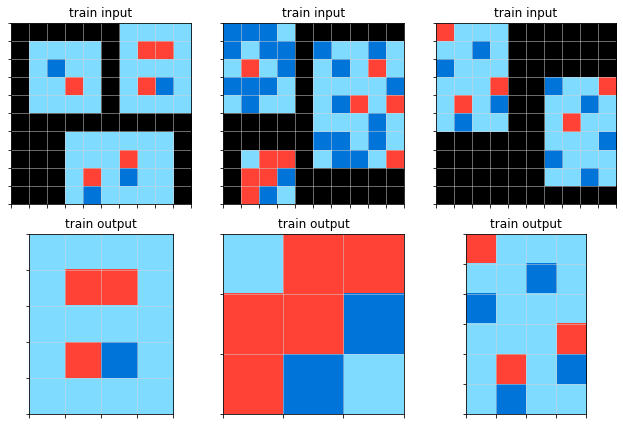

28 objects
[[2]]
[[0 8 8 8]
 [8 8 0 8]]
[[1]]
[[2]]
[[0 8 0]
 [8 8 8]
 [0 0 8]]
[[1]]
[[1]]
[[2]]
[[0 0 8 0]
 [8 8 8 8]]
[[1]]
[[2]]
[[1]]
[[8 8 0]
 [0 8 0]
 [0 8 8]]
[[2]]
[[2]]
[[1]]
[[1]]
[[2]]
[[8]]
[[2]]
[[1]]
[[8 8]]
[[1]]
[[8]]
[[1]]
[[2]]
[[8]]
[[1]]
10 objects
[[2]]
[[0 8 0]
 [8 8 8]
 [0 0 8]]
[[1]]
[[2]]
[[1]]
[[8 8 0]
 [0 8 0]
 [0 8 8]]
[[2]]
[[2]]
[[1]]
[[1]]


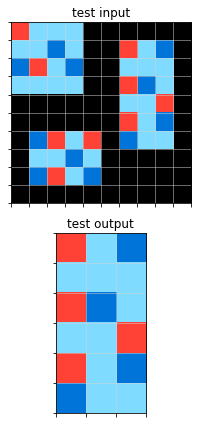

e6721834.json
Icecuber solved? False
['pattern_moving', 'pattern_juxtaposition', 'crop']
20 objects
[[8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
 [8 8 0 0 0 0 0 0 0 8 8 8 8 8 8 8 8]
 [8 8 0 0 0 0 0 0 0 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
 [8 8 0 0 0 0 8 8 8 8 8 8 8 8 8 8 8]
 [8 8 0 0 0 0 8 8 8 8 0 0 0 0 0 8 8]
 [8 8 0 0 0 0 8 8 8 8 0 0 0 0 0 8 8]
 [8 8 0 0 0 0 8 8 8 8 0 0 0 0 0 8 8]
 [8 8 0 0 0 0 8 8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]]
[[1 1 1 0 1 1 1]
 [1 0 1 1 1 0 1]]
[[2]]
[[2]]
[[2]]
[[1 1 0 1]
 [1 0 1 1]
 [1 1 1 1]
 [1 0 1 1]
 [1 1 0 1]]
[[3]]
[[3]]
[[1 1 1 0 1]
 [1 0 1 0 1]
 [1 0 1 1 1]]
[[2]
 [2]]
[[2]
 [2]]
[[3]]
[[3]]
[[2]]
[[2]]
[[2]]
[[3]]
[[3]]
[[3]]
[[3]]
9 objects
[[1 1 1 0 1 1 1]
 [1 0 1 1 1 0 1]]
[[2]]
[[2]]
[[2]]
[[1 1 0 1]
 [1 0 1 1]
 [1 1 1 1]
 [1 0 1 1]


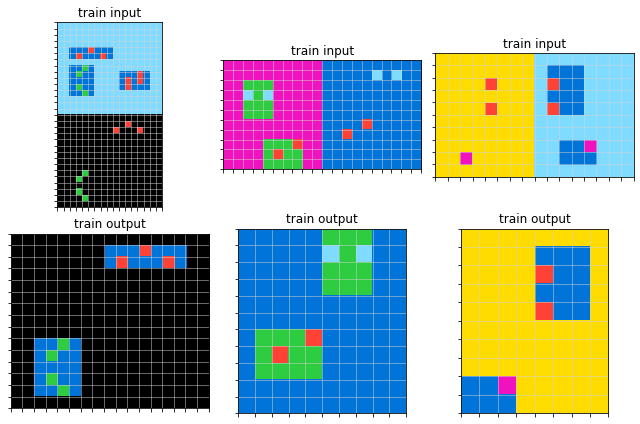

16 objects
[[4 4 4 4 4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 0 4 4 4 4]
 [4 4 4 4 4 4 4 4 0 4 4 4]
 [4 4 4 4 4 4 4 4 4 4 4 4]
 [4 4 4 0 4 4 4 4 4 4 4 4]
 [4 0 4 4 4 4 4 4 4 4 4 4]
 [4 4 4 0 4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4 4 4 4 4]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[2 2 2 2 2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2 2 2 2 2]
 [2 2 2 0 0 0 0 0 2 2 2 2]
 [2 2 2 0 0 0 0 0 2 2 2 2]
 [2 2 2 0 0 0 0 0 2 2 2 2]
 [2 2 2 2 2 2 2 2 2 2 2 2]
 [2 0 0 2 2 2 2 2 2 2 2 2]
 [2 0 0 2 2 2 0 0 0 0 0 2]
 [2 0 0 2 2 2 0 0 0 0 0 2]
 [2 0 0 2 2 2 0 0 0 0 0 2]
 [2 2 2 2 2 2 2 2 2 2 2 2]]
[[8 8 8 8 8]
 [8 8 8 0 8]
 [8 8 8 8 0]]
[[1]]
[[1]]
[[8 8]
 [0 8]
 [8 8]
 [8 8]]
[[1]]
[[8 8 0 8 8]
 [0 8 8 8 8]
 [8 8 0 8 8]]
[[1]]
[[1]]
[[1]]
8 objects
[[4 4 4 4 4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4 4 4 4 4]
 [4 4 4 4 0 0 0 0 0 4 4 4]
 [4 4 4 4 0 0 0 0 0 4 4 4]
 [4 4 4 4 0 0 0 0 0 4 4 4]
 [4 4 4 4 4 4 4 4 4

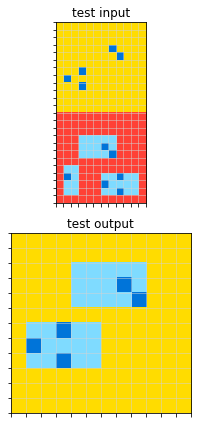

e73095fd.json
Icecuber solved? False
['loop_filling', 'rectangle_guessing']
1 objects
[[0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 5 5]
 [5 5 0 0 0 5 5 5 5 0 0 0 0 5 0 0 0 5 0]
 [0 5 5 5 5 5 0 0 5 5 5 5 5 5 5 5 5 5 0]
 [5 5 0 0 0 5 0 0 5 0 0 0 0 5 0 0 0 5 0]
 [0 0 0 0 0 5 0 0 5 0 0 0 0 5 0 0 0 5 5]
 [0 0 0 0 0 5 0 0 5 0 0 5 5 5 5 0 0 0 0]
 [0 0 0 0 0 5 0 0 5 0 0 5 0 0 5 0 0 0 0]
 [0 0 0 0 0 5 5 5 5 0 0 5 0 0 5 5 5 5 5]
 [0 0 0 0 0 0 5 0 0 0 0 5 5 5 5 0 0 0 0]
 [0 0 0 0 0 0 5 0 0 0 0 0 0 5 0 0 0 0 0]
 [0 0 0 0 0 0 5 0 0 0 0 0 0 5 0 0 0 0 0]
 [0 0 0 0 0 0 5 0 0 0 0 0 0 5 0 0 0 0 0]]
5 objects
[[0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 5 5]
 [5 5 0 0 0 5 5 5 5 0 0 0 0 5 0 0 0 5 0]
 [0 5 5 5 5 5 0 0 5 5 5 5 5 5 5 5 5 5 0]
 [5 5 0 0 0 5 0 0 5 0 0 0 0 5 0 0 0 5 0]
 [0 0 0 0 0 5 0 0 5 0 0 0 0 5 0 0 0 5 5]
 [0 0 0 0 0 5 0 0 5 0 0 5 5 5 5 0 0 0 0]
 [0 0 0 0 0 5 0 0 5 0 0 5 0 0 5 0 0 0 0]
 [0 0 0 0 0 5 5 5 5 0 0 5 0 0 5 5 5 5 5]
 [0 0 0 0 0 0 5 0 0 0 0 5 5 5 5 0 0 0 0]
 [0 0 0 0 0 0 5 0 0 0 0 0 0 5 0 0 0 0 0]
 

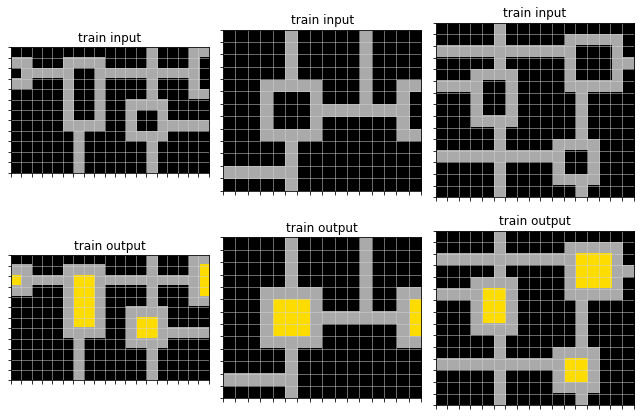

1 objects
[[0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0]
 [5 5 5 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0]
 [0 0 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5]
 [5 5 5 0 0 0 0 5 0 0 0 0 0 0 5 0 0 0]
 [0 0 0 0 0 0 0 5 0 0 0 0 0 0 5 0 0 0]
 [0 0 0 0 0 0 0 5 0 0 0 0 0 0 5 0 0 0]
 [0 0 0 0 0 0 0 5 0 0 0 0 0 5 5 5 5 0]
 [0 0 0 0 0 5 5 5 5 5 0 0 0 5 0 0 5 0]
 [5 5 5 5 5 5 0 0 0 5 5 5 5 5 0 0 5 5]
 [0 5 0 0 0 5 0 0 0 5 0 0 0 5 0 0 5 0]
 [0 5 0 0 0 5 5 5 5 5 0 0 0 5 5 5 5 0]
 [0 5 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0]
 [5 5 5 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0]
 [5 0 5 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0]
 [5 5 5 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0]]
5 objects
[[0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0]
 [5 5 5 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0]
 [0 0 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5]
 [5 5 5 0 0 0 0 5 0 0 0 0 0 0 5 0 0 0]
 [0 0 0 0 0 0 0 5 0 0 0 0 0 0 5 0 0 0]
 [0 0 0 0 0 0 0 5 0 0 0 0 0 0 5 0 0 0]
 [0 0 0 0 0 0 0 5 0 0 0 0 0 5 5 5 5 0]
 [0 0 0 0 0 5 5 5 5 5 0 0 0 5 0 0 5 0]
 [5 

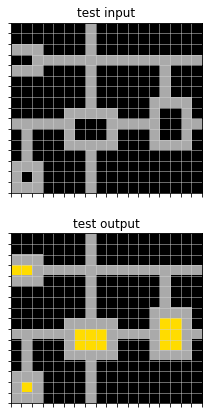

e76a88a6.json
Icecuber solved? False
['pattern_repetition', 'pattern_juxtaposition']
4 objects
[[2 2 2]
 [2 0 0]]
[[0 4 4]
 [4 4 4]]
[[5 5 5]
 [5 5 5]
 [5 5 5]]
[[5 5 5]
 [5 5 5]
 [5 5 5]]
6 objects
[[2 2 2]
 [2 0 0]]
[[0 4 4]
 [4 4 4]]
[[2 2 2]
 [2 0 0]]
[[0 4 4]
 [4 4 4]]
[[2 2 2]
 [2 0 0]]
[[0 4 4]
 [4 4 4]]
5 objects
[[5 5 5 5]
 [5 5 5 5]
 [5 5 5 5]]
[[6 6 6 6]
 [0 0 6 0]]
[[8 8 0 8]
 [0 8 8 8]]
[[6]]
[[5 5 5 5]
 [5 5 5 5]
 [5 5 5 5]]
9 objects
[[6 6 6 6]
 [0 0 6 0]]
[[6 6 6 6]
 [0 0 6 0]]
[[8 8 0 8]
 [0 8 8 8]]
[[8 8 0 8]
 [0 8 8 8]]
[[6]]
[[6]]
[[6 6 6 6]
 [0 0 6 0]]
[[8 8 0 8]
 [0 8 8 8]]
[[6]]


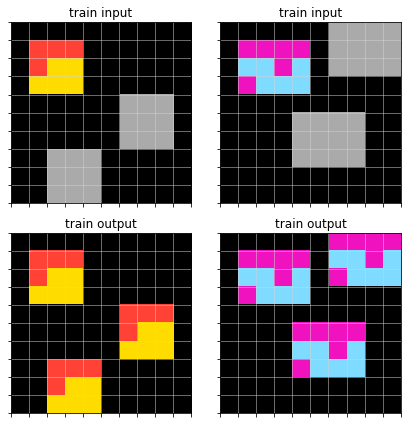

5 objects
[[4 4 4]
 [0 4 4]
 [0 4 0]]
[[1 0 0]
 [1 0 1]
 [1 1 1]]
[[5 5 5]
 [5 5 5]
 [5 5 5]
 [5 5 5]]
[[5 5 5]
 [5 5 5]
 [5 5 5]
 [5 5 5]]
[[5 5 5]
 [5 5 5]
 [5 5 5]
 [5 5 5]]
8 objects
[[4 4 4]
 [0 4 4]
 [0 4 0]]
[[1 0 0]
 [1 0 1]
 [1 1 1]]
[[4 4 4]
 [0 4 4]
 [0 4 0]]
[[1 0 0]
 [1 0 1]
 [1 1 1]]
[[4 4 4]
 [0 4 4]
 [0 4 0]]
[[1 0 0]
 [1 0 1]
 [1 1 1]]
[[4 4 4]
 [0 4 4]
 [0 4 0]]
[[1 0 0]
 [1 0 1]
 [1 1 1]]


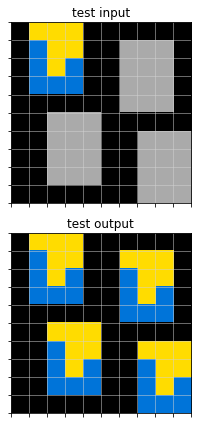

e8593010.json
Icecuber solved? True
['holes', 'count_tiles', 'loop_filling', 'associate_colors_to_numbers']
1 objects
[[5 5 5 5 0 5 5 5 0 5]
 [0 0 5 5 5 5 5 5 5 5]
 [0 5 5 5 5 5 0 0 5 0]
 [5 5 0 5 5 5 5 0 5 0]
 [5 5 5 5 0 0 5 5 5 5]
 [0 5 0 5 5 5 5 0 5 0]
 [0 5 5 5 0 0 5 5 5 0]
 [5 5 5 5 5 5 5 5 5 5]
 [5 5 5 5 5 5 5 5 5 0]
 [0 5 5 5 5 5 5 0 5 0]]
16 objects
[[5 5 5 5 0 5 5 5 0 5]
 [0 0 5 5 5 5 5 5 5 5]
 [0 5 5 5 5 5 0 0 5 0]
 [5 5 0 5 5 5 5 0 5 0]
 [5 5 5 5 0 0 5 5 5 5]
 [0 5 0 5 5 5 5 0 5 0]
 [0 5 5 5 0 0 5 5 5 0]
 [5 5 5 5 5 5 5 5 5 5]
 [5 5 5 5 5 5 5 5 5 0]
 [0 5 5 5 5 5 5 0 5 0]]
[[3]]
[[3]]
[[1 1]
 [1 0]]
[[1 1]
 [0 1]]
[[2]
 [2]]
[[3]]
[[2 2]]
[[2]
 [2]]
[[3]]
[[3]]
[[2]
 [2]]
[[2 2]]
[[2]
 [2]]
[[3]]
[[3]]
2 objects
[[5 5 5 5 5 0 0 5 5 5]
 [0 0 5 0 5 5 5 5 5 0]
 [5 5 5 5 5 0 5 0 0 5]
 [5 0 5 5 5 0 5 5 5 5]
 [5 5 5 5 5 5 5 5 0 5]
 [5 5 5 5 0 5 5 5 5 5]
 [0 0 5 5 0 5 0 0 5 0]
 [5 5 5 5 5 5 5 0 5 5]
 [0 5 5 5 5 5 0 5 5 0]
 [0 0 5 5 5 5 5 5 0 0]]
[[5]]
18 objects
[[5 5 5 5 5 0 0 5 5

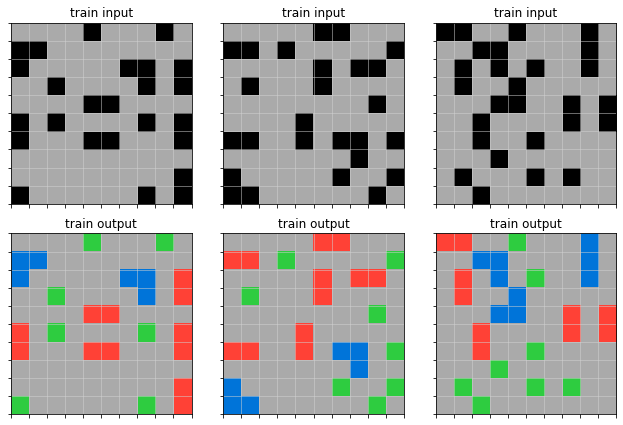

2 objects
[[0 5 5 5 5 5 0 0 5 5]
 [5 5 5 0 5 5 0 5 0 5]
 [5 5 0 5 5 5 5 5 0 5]
 [5 0 0 5 5 5 5 5 5 5]
 [0 5 5 5 5 5 0 5 5 5]
 [0 5 5 0 5 5 0 5 0 0]
 [5 5 0 5 5 5 5 5 0 0]
 [5 5 0 5 5 5 5 5 5 0]
 [0 0 5 5 5 5 0 5 5 5]
 [5 5 5 5 0 5 0 0 5 0]]
[[5]]
17 objects
[[3]]
[[0 5 5 5 5 5 0 0 5 5]
 [5 5 5 0 5 5 0 5 0 5]
 [5 5 0 5 5 5 5 5 0 5]
 [5 0 0 5 5 5 5 5 5 5]
 [0 5 5 5 5 5 0 5 5 5]
 [0 5 5 0 5 5 0 5 0 0]
 [5 5 0 5 5 5 5 5 0 0]
 [5 5 0 5 5 5 5 5 5 0]
 [0 0 5 5 5 5 0 5 5 5]
 [5 5 5 5 0 5 0 0 5 0]]
[[1 1]
 [1 0]]
[[3]]
[[2]
 [2]]
[[0 1]
 [1 1]]
[[2]
 [2]]
[[2]
 [2]]
[[3]]
[[1 1]
 [1 0]]
[[2]
 [2]]
[[5]]
[[3]]
[[2 2]]
[[1 0]
 [1 1]]
[[3]]
[[3]]


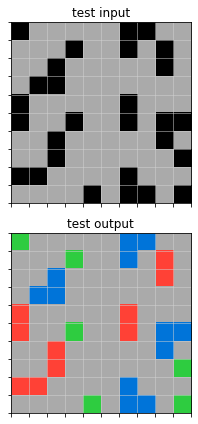

e8dc4411.json
Icecuber solved? False
['pattern_expansion', 'direction_guessing']
3 objects
[[8 8 8 8 8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 0 8 8 8 8 8 8 8 8 8]
 [8 8 8 0 0 0 8 8 8 8 8 8 8 8]
 [8 8 8 8 0 8 0 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8]]
[[8]]
[[2]]
22 objects
[[8 8 8 8 8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 0 8 8 8 8 8 8 8 8 8]
 [8 8 8 0 0 0 8 8 8 8 8 8 8 8]
 [8 8 8 8 0 0 0 8 8 8 8 8 8 8]
 [8 8 8 8 8 0 0 0 8 8 8 8 8 8]
 [8 8 8 8 8 8 0 0 0 8 8 8 8 8]
 [8 8 8 8 8 8 8 0 0 0 8 8 8 8]
 [8 8 8 8 8 8 8 8 0 0 0 8 8 8]
 [8 8 8 8 8 8 8 8 8 0 0 0 8 8]
 [8 8 8 8 8 8 8 8 8 8 0 0 0 8]]
[[8]]
[[8]]
[[2]]
[[2]]
[[8]]
[[2]]
[[2]]
[[8]]
[[2]]
[[2]]
[[8]]
[[2]]
[[2]]
[[8]]
[[2]]
[[2]]
[[8]]
[[2]]
[[2]]
[[8]]
[[2]]
2 objects
[[1 

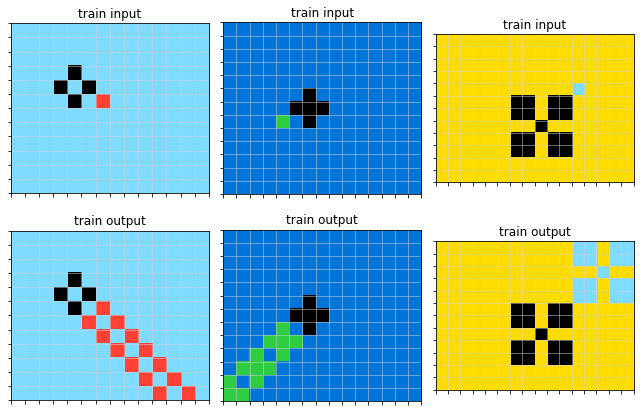

2 objects
[[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
 [3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 0 3 0 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 0 3 0 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]]
[[6]]
8 objects
[[6]]
[[0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
 [0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
 [3 0 3 0 3 3 3 3 3 3 3 3 3 3 3 3]
 [3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3]
 [3 0 3 0 3 3 3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 0 3 0 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 0 3 0 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3 

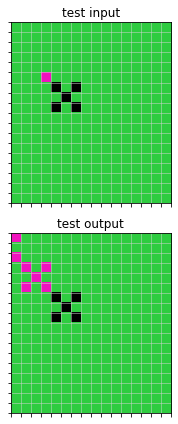

e9614598.json
Icecuber solved? False
['pattern_expansion', 'direction_guessing', 'measure_length']
2 objects
[[1]]
[[1]]
3 objects
[[0 3 0]
 [3 3 3]
 [0 3 0]]
[[1]]
[[1]]
2 objects
[[1]]
[[1]]
3 objects
[[1]]
[[0 3 0]
 [3 3 3]
 [0 3 0]]
[[1]]


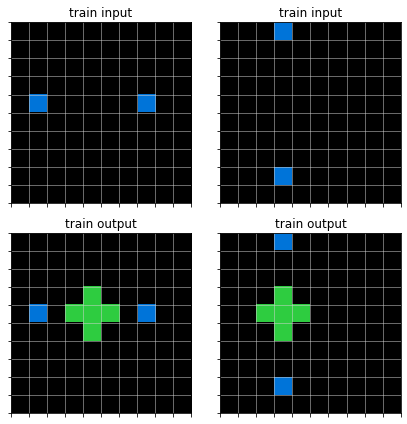

2 objects
[[1]]
[[1]]
3 objects
[[0 3 0]
 [3 3 3]
 [0 3 0]]
[[1]]
[[1]]
2 objects
[[1]]
[[1]]
3 objects
[[1]]
[[0 3 0]
 [3 3 3]
 [0 3 0]]
[[1]]


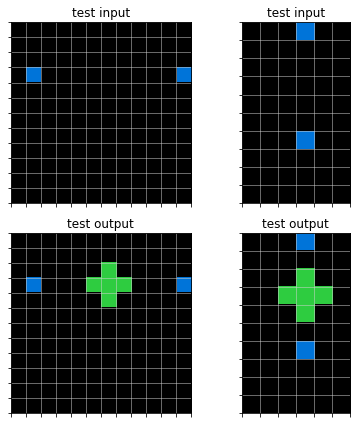

e98196ab.json
Icecuber solved? True
['detect_wall', 'separate_images', 'image_juxtaposition']
12 objects
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[5 5 5 5 5 5 5 5 5 5 5]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
11 objects
[[8]]
[[1]]
[[1]]
[[8]]
[[8]]
[[1]]
[[1]]
[[1]]
[[8]]
[[8]]
[[1]]
15 objects
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[5 5 5 5 5 5 5 5 5 5 5]]
[[7]]
[[7]]
[[7]]
[[7]]
[[7]]
[[7]]
[[7]]
[[7]]
14 objects
[[3]]
[[3]]
[[3]]
[[7]]
[[7]]
[[7]]
[[7]]
[[3]]
[[7]]
[[3]]
[[7]]
[[3]]
[[7]]
[[7]]
15 objects
[[1]]
[[1 1]]
[[1]
 [1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[5 5 5 5 5 5 5 5 5 5 5]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
14 objects
[[2]]
[[2]]
[[2]]
[[1]]
[[1 1]]
[[1]
 [1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[2]]
[[2]]
[[2]]
[[1]]


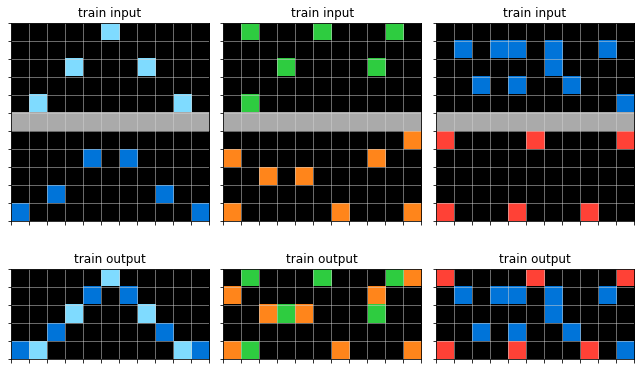

18 objects
[[7]]
[[7 7]]
[[7]]
[[7]]
[[7]]
[[7]]
[[7]]
[[7]]
[[5 5 5 5 5 5 5 5 5 5 5]]
[[6]]
[[6]]
[[6]]
[[6]
 [6]]
[[6]]
[[6]]
[[6]]
[[6]]
[[6]]
17 objects
[[6]]
[[6]]
[[6]]
[[7]]
[[7 7]]
[[7]]
[[6]
 [6]]
[[6]]
[[6]]
[[7]]
[[7]]
[[7]]
[[6]]
[[7]]
[[6]]
[[6]]
[[7]]


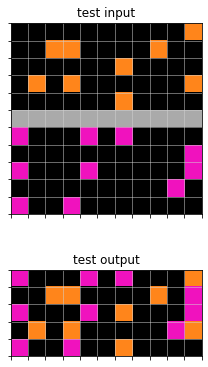

e9afcf9a.json
Icecuber solved? True
['pattern_modification']
2 objects
[[3 3 3 3 3 3]]
[[9 9 9 9 9 9]]
12 objects
[[3]]
[[9]]
[[3]]
[[9]]
[[3]]
[[9]]
[[9]]
[[3]]
[[9]]
[[3]]
[[9]]
[[3]]
2 objects
[[4 4 4 4 4 4]]
[[8 8 8 8 8 8]]
12 objects
[[4]]
[[8]]
[[4]]
[[8]]
[[4]]
[[8]]
[[8]]
[[4]]
[[8]]
[[4]]
[[8]]
[[4]]


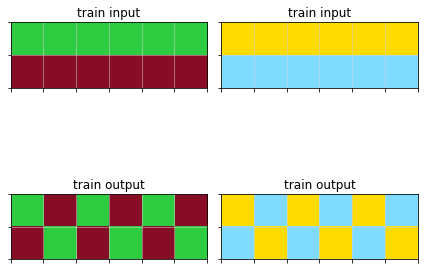

2 objects
[[6 6 6 6 6 6]]
[[2 2 2 2 2 2]]
12 objects
[[6]]
[[2]]
[[6]]
[[2]]
[[6]]
[[2]]
[[2]]
[[6]]
[[2]]
[[6]]
[[2]]
[[6]]


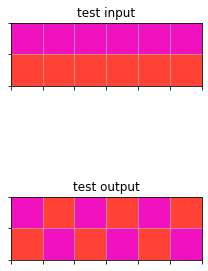

ea32f347.json
Icecuber solved? False
['separate_shapes', 'count_tiles', 'recoloring', 'associate_colors_to_ranks']
3 objects
[[5]
 [5]
 [5]
 [5]
 [5]
 [5]]
[[5]
 [5]
 [5]
 [5]
 [5]]
[[5]
 [5]
 [5]]
3 objects
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[4]
 [4]
 [4]
 [4]
 [4]]
[[2]
 [2]
 [2]]
3 objects
[[5]
 [5]
 [5]
 [5]
 [5]
 [5]]
[[5]
 [5]
 [5]
 [5]]
[[5]
 [5]]
3 objects
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[4]
 [4]
 [4]
 [4]]
[[2]
 [2]]
3 objects
[[5 5 5 5 5 5]]
[[5]
 [5]
 [5]
 [5]
 [5]]
[[5 5 5]]
3 objects
[[1 1 1 1 1 1]]
[[4]
 [4]
 [4]
 [4]
 [4]]
[[2 2 2]]
3 objects
[[5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]]
[[5 5 5 5]]
[[5 5 5 5 5]]
3 objects
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[2 2 2 2]]
[[4 4 4 4 4]]


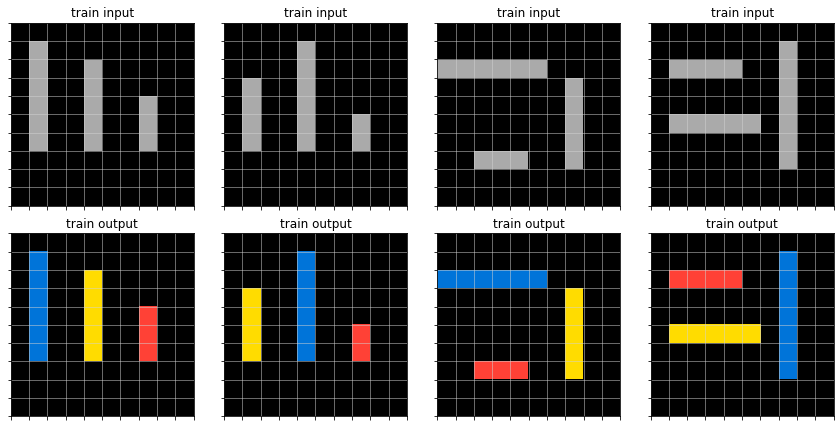

3 objects
[[5]
 [5]
 [5]]
[[5 5 5 5 5 5]]
[[5 5 5 5 5]]
3 objects
[[2]
 [2]
 [2]]
[[1 1 1 1 1 1]]
[[4 4 4 4 4]]


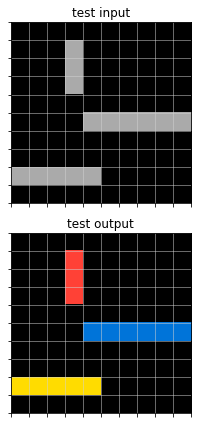

ea786f4a.json
Icecuber solved? True
['pattern_modification', 'draw_line_from_point', 'diagonals']
1 objects
[[1 1 1]
 [1 0 1]
 [1 1 1]]
4 objects
[[1]]
[[1]]
[[1]]
[[1]]
1 objects
[[2 2 2 2 2]
 [2 2 2 2 2]
 [2 2 0 2 2]
 [2 2 2 2 2]
 [2 2 2 2 2]]
4 objects
[[2 2 2]
 [0 2 0]]
[[2 0]
 [2 2]
 [2 0]]
[[0 2]
 [2 2]
 [0 2]]
[[0 2 0]
 [2 2 2]]
1 objects
[[3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3]
 [3 3 3 0 3 3 3]
 [3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3]]
4 objects
[[3 3 3 3 3]
 [0 3 3 3 0]
 [0 0 3 0 0]]
[[3 0 0]
 [3 3 0]
 [3 3 3]
 [3 3 0]
 [3 0 0]]
[[0 0 3]
 [0 3 3]
 [3 3 3]
 [0 3 3]
 [0 0 3]]
[[0 0 3 0 0]
 [0 3 3 3 0]
 [3 3 3 3 3]]


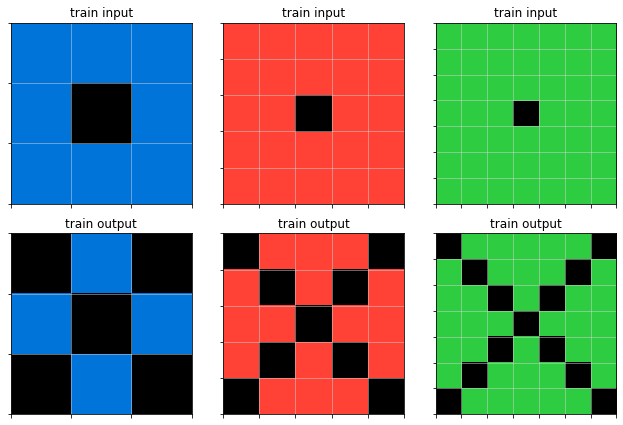

1 objects
[[6 6 6 6 6 6 6 6 6 6 6]
 [6 6 6 6 6 6 6 6 6 6 6]
 [6 6 6 6 6 6 6 6 6 6 6]
 [6 6 6 6 6 6 6 6 6 6 6]
 [6 6 6 6 6 6 6 6 6 6 6]
 [6 6 6 6 6 0 6 6 6 6 6]
 [6 6 6 6 6 6 6 6 6 6 6]
 [6 6 6 6 6 6 6 6 6 6 6]
 [6 6 6 6 6 6 6 6 6 6 6]
 [6 6 6 6 6 6 6 6 6 6 6]
 [6 6 6 6 6 6 6 6 6 6 6]]
4 objects
[[6 6 6 6 6 6 6 6 6]
 [0 6 6 6 6 6 6 6 0]
 [0 0 6 6 6 6 6 0 0]
 [0 0 0 6 6 6 0 0 0]
 [0 0 0 0 6 0 0 0 0]]
[[6 0 0 0 0]
 [6 6 0 0 0]
 [6 6 6 0 0]
 [6 6 6 6 0]
 [6 6 6 6 6]
 [6 6 6 6 0]
 [6 6 6 0 0]
 [6 6 0 0 0]
 [6 0 0 0 0]]
[[0 0 0 0 6]
 [0 0 0 6 6]
 [0 0 6 6 6]
 [0 6 6 6 6]
 [6 6 6 6 6]
 [0 6 6 6 6]
 [0 0 6 6 6]
 [0 0 0 6 6]
 [0 0 0 0 6]]
[[0 0 0 0 6 0 0 0 0]
 [0 0 0 6 6 6 0 0 0]
 [0 0 6 6 6 6 6 0 0]
 [0 6 6 6 6 6 6 6 0]
 [6 6 6 6 6 6 6 6 6]]


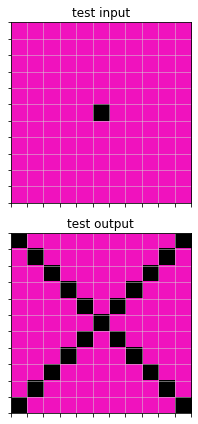

eb281b96.json
Icecuber solved? True
['image_repetition', 'image_reflection']
17 objects
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
54 objects
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
17 objects
[[2]]
[[2]]
[[2]]
[[2]]
[[2]
 [2]]
[[2]
 [2]]
[[2]
 [2]]
[[2]
 [2]]
[[2]
 [2]]
[[2]
 [2]]
[[2]
 [2]]
[[2]
 [2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
54 objects
[[2]]
[[2]]
[[2]]
[[2]]
[[2]
 [2]]
[[2]
 [2]]
[[2]
 [2]]
[[2]
 [2]]
[[2]
 [2]]
[[2]
 [2]]
[[2]
 [2]]
[[2]
 [2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]
 [2]]
[[2]
 [2]]
[[2]
 [2]]
[[2]
 [2]]
[[2]
 [2]]
[[2]
 [2]]
[[2]
 [2]]
[[2]
 [2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]
 [2]]
[[2]
 [2]]
[[2]
 [2]]
[[2]
 [2]]
[[2]
 [2]]
[[

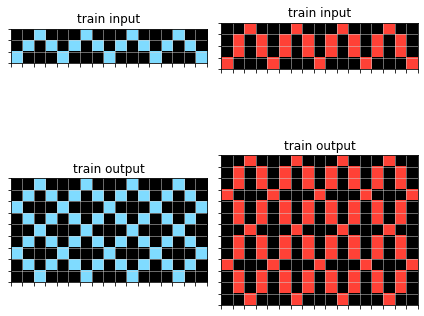

17 objects
[[3]]
[[3]]
[[3]]
[[3]]
[[3]
 [3]
 [3]]
[[3]
 [3]
 [3]]
[[3]
 [3]
 [3]]
[[3]
 [3]
 [3]]
[[3]
 [3]
 [3]]
[[3]
 [3]
 [3]]
[[3]
 [3]
 [3]]
[[3]
 [3]
 [3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
54 objects
[[3]]
[[3]]
[[3]]
[[3]]
[[3]
 [3]
 [3]]
[[3]
 [3]
 [3]]
[[3]
 [3]
 [3]]
[[3]
 [3]
 [3]]
[[3]
 [3]
 [3]]
[[3]
 [3]
 [3]]
[[3]
 [3]
 [3]]
[[3]
 [3]
 [3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]
 [3]
 [3]]
[[3]
 [3]
 [3]]
[[3]
 [3]
 [3]]
[[3]
 [3]
 [3]]
[[3]
 [3]
 [3]]
[[3]
 [3]
 [3]]
[[3]
 [3]
 [3]]
[[3]
 [3]
 [3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]
 [3]
 [3]]
[[3]
 [3]
 [3]]
[[3]
 [3]
 [3]]
[[3]
 [3]
 [3]]
[[3]
 [3]
 [3]]
[[3]
 [3]
 [3]]
[[3]
 [3]
 [3]]
[[3]
 [3]
 [3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]
 [3]
 [3]]
[[3]
 [3]
 [3]]
[[3]
 [3]
 [3]]
[[3]
 [3]
 [3]]
[[3]
 [3]
 [3]]
[[3]
 [3]
 [3]]
[[3]
 [3]
 [3]]
[[3]
 [3]
 [3]]
[[3]]
[[3]]
[[3]]
[[3]]


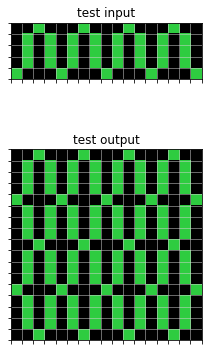

eb5a1d5d.json
Icecuber solved? True
['summarize']
3 objects
[[8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
 [8 8 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 8 8 8 8 8]
 [8 8 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 8 8 8 8 8]
 [8 8 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 8 8 8 8 8]
 [8 8 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 8 8 8 8 8]
 [8 8 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 8 8 8 8 8]
 [8 8 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 8 8 8 8 8]
 [8 8 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 8 8 8 8 8]
 [8 8 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 8 8 8 8 8]
 [8 8 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 8 8 8 8 8]
 [8 8 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 8 8 8 8 8]
 [8 8 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 8 8 8 8 8]
 [8 8 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 8 8 8 8 8]
 [8 8 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 8 8 8 8 8]
 [8 8 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 8 8 8 8 8]
 [8 8 8 0 0 0 0 0 0 0 0 0 0 

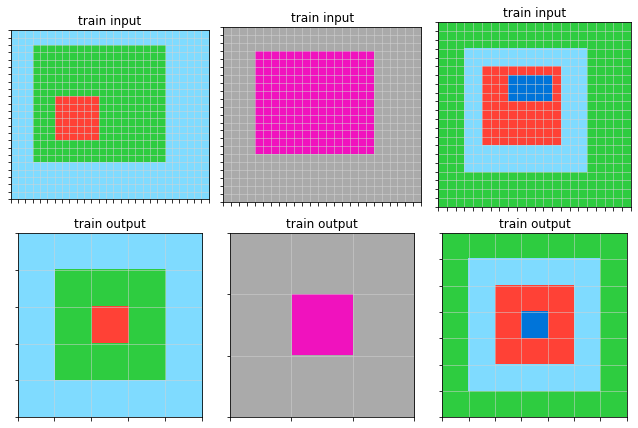

5 objects
[[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
 [2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2]
 [2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2]
 [2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2]
 [2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2]
 [2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2]
 [2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2]
 [2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2]
 [2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2]
 [2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2]
 [2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2]
 [2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2]
 [2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2]
 [2 2 2 0 0 0 0 0 0 0

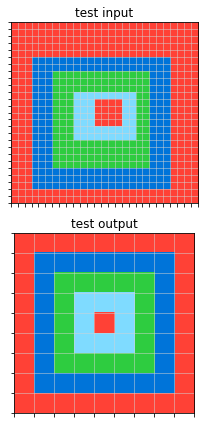

ec883f72.json
Icecuber solved? False
['pattern_expansion', 'draw_line_from_point', 'diagonals']
2 objects
[[3 3]
 [3 3]]
[[0 0 0 9]
 [0 0 0 9]
 [0 0 0 9]
 [9 9 9 9]]
4 objects
[[3 3]
 [3 3]]
[[0 0 0 9]
 [0 0 0 9]
 [0 0 0 9]
 [9 9 9 9]]
[[3]]
[[3]]
2 objects
[[8 0 0 0 8]
 [8 0 0 0 8]
 [8 8 8 8 8]]
[[6]]
5 objects
[[8 0 0 0 8]
 [8 0 0 0 8]
 [8 8 8 8 8]]
[[6]]
[[6]]
[[6]]
[[6]]
2 objects
[[4 4 4 4 4 4]
 [4 0 0 0 0 4]
 [4 0 0 0 0 4]
 [4 0 0 0 0 4]]
[[2 2]
 [2 2]]
5 objects
[[2]]
[[2]]
[[2]]
[[4 4 4 4 4 4]
 [4 0 0 0 0 4]
 [4 0 0 0 0 4]
 [4 0 0 0 0 4]]
[[2 2]
 [2 2]]
2 objects
[[5 5 5 5 5 5]
 [0 0 0 0 0 5]
 [0 0 0 0 0 5]
 [0 0 0 0 0 5]
 [0 0 0 0 0 5]
 [0 0 0 0 0 5]
 [0 0 0 0 0 5]]
[[4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]]
7 objects
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[5 5 5 5 5 5]
 [0 0 0 0 0 5]
 [0 0 0 0 0 5]
 [0 0 0 0 0 5]
 [0 0 0 0 0 5]
 [0 0 0 0 0 5]
 [0 0 0 0 0 5]]
[[4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]]


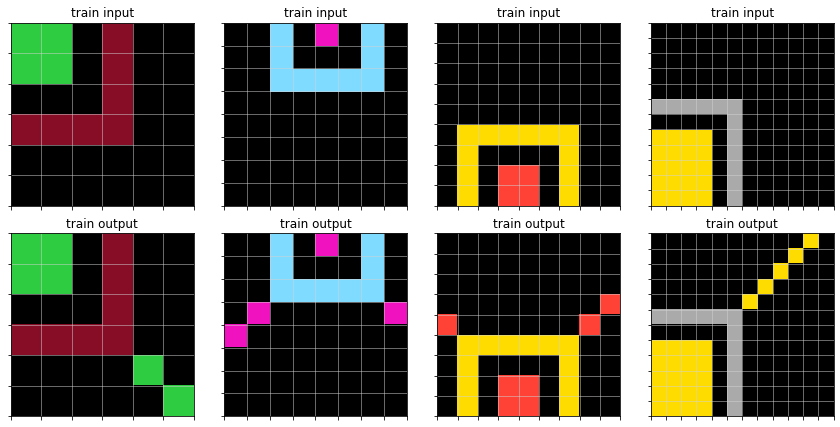

2 objects
[[3 0 0 0 0 3]
 [3 0 0 0 0 3]
 [3 0 0 0 0 3]
 [3 0 0 0 0 3]
 [3 3 3 3 3 3]]
[[4 4]
 [4 4]
 [4 4]]
8 objects
[[3 0 0 0 0 3]
 [3 0 0 0 0 3]
 [3 0 0 0 0 3]
 [3 0 0 0 0 3]
 [3 3 3 3 3 3]]
[[4 4]
 [4 4]
 [4 4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]


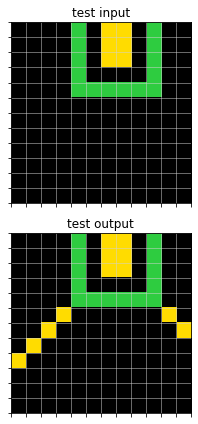

ecdecbb3.json
Icecuber solved? False
['pattern_modification', 'draw_line_from_point']
3 objects
[[2]]
[[8 8 8 8 8 8 8 8 8 8 8 8 8]]
[[2]]
5 objects
[[2]
 [2]
 [2]]
[[0 8 8 8 0 0 0 8 8 8 0 0 0]
 [8 8 0 8 8 8 8 8 0 8 8 8 8]
 [0 8 8 8 0 0 0 8 8 8 0 0 0]]
[[2]]
[[2]]
[[2]
 [2]
 [2]]
3 objects
[[8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]]
[[8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]]
[[2]]
5 objects
[[0 8 0]
 [0 8 0]
 [0 8 0]
 [8 8 8]
 [8 0 8]
 [8 8 8]
 [0 8 0]
 [0 8 0]
 [0 8 0]
 [0 8 0]
 [0 8 0]
 [0 8 0]
 [0 8 0]]
[[0 8 0]
 [0 8 0]
 [0 8 0]
 [8 8 8]
 [8 0 8]
 [8 8 8]
 [0 8 0]
 [0 8 0]
 [0 8 0]
 [0 8 0]
 [0 8 0]
 [0 8 0]
 [0 8 0]]
[[2]]
[[2 2 2 2 2 2 2 2]]
[[2]]
4 objects
[[2]]
[[8 8 8 8 8 8 8 8 8 8 8 8]]
[[2]]
[[8 8 8 8 8 8 8 8 8 8 8 8]]
7 objects
[[2]
 [2]
 [2]
 [2]]
[[0 0 0 8 8 8 0 8 8 8 0 0]
 [8 8 8 8 0 8 8 8 0 8 8 8]
 [0 0 0 8 8 8 0 8 8 8 0 0]]
[[2]]
[[2]]
[[2]
 [2]
 [2]]
[[0 0 0 8 8 8 0 0 0 0 0 0]
 [8 8 8 8 0 8 8 8 8 8 8 8]
 [0 0 0 8 8 8 0 0 0 0

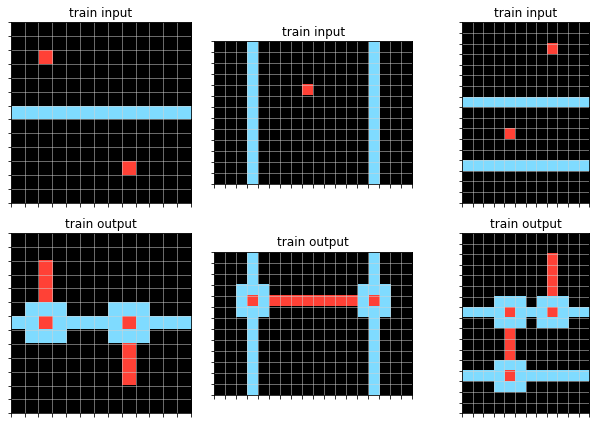

6 objects
[[8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]]
[[8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]]
[[2]]
[[2]]
[[2]]
[[2]]
11 objects
[[0 8 0]
 [8 8 8]
 [8 0 8]
 [8 8 8]
 [0 8 0]
 [0 8 0]
 [0 8 0]
 [8 8 8]
 [8 0 8]
 [8 8 8]
 [0 8 0]
 [0 8 0]
 [0 8 0]
 [0 8 0]
 [0 8 0]
 [0 8 0]
 [0 8 0]]
[[8 8 8]
 [8 0 8]
 [8 8 8]
 [0 8 0]
 [0 8 0]
 [0 8 0]
 [0 8 0]
 [8 8 8]
 [8 0 8]
 [8 8 8]
 [0 8 0]
 [0 8 0]
 [0 8 0]
 [8 8 8]
 [8 0 8]
 [8 8 8]
 [0 8 0]]
[[2]]
[[2 2]]
[[2 2]]
[[2]]
[[2]]
[[2 2 2 2 2]]
[[2]]
[[2]]
[[2 2 2]]


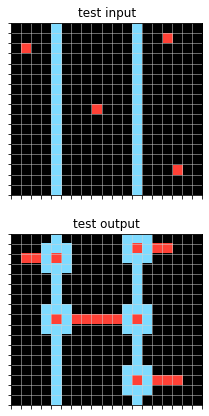

ed36ccf7.json
Icecuber solved? True
['image_rotation']
1 objects
[[9 0 0]
 [9 9 9]
 [9 9 9]]
1 objects
[[0 9 9]
 [0 9 9]
 [9 9 9]]
2 objects
[[6 6 6]]
[[6 6]]
2 objects
[[6]
 [6]
 [6]]
[[6]
 [6]]
1 objects
[[0 0 9]
 [0 0 9]
 [9 9 9]]
1 objects
[[9 9 9]
 [0 0 9]
 [0 0 9]]
2 objects
[[2]]
[[0 2]
 [0 2]
 [2 2]]
2 objects
[[2 2 2]
 [0 0 2]]
[[2]]


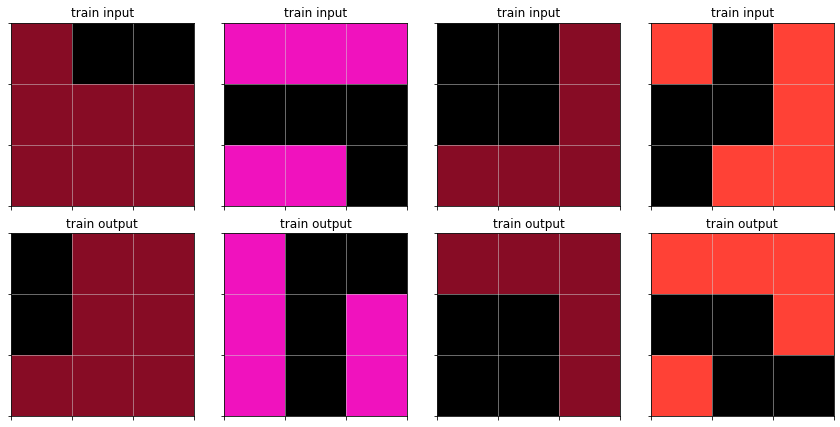

2 objects
[[5]]
[[5 5]]
2 objects
[[5]
 [5]]
[[5]]


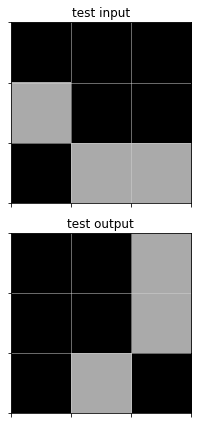

ef135b50.json
Icecuber solved? True
['draw_line_from_point', 'bridges', 'connect_the_dots']
3 objects
[[2 2 2]
 [2 2 2]
 [2 2 2]]
[[2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]]
[[2 2]
 [2 2]
 [2 2]
 [2 2]]
5 objects
[[2 2 2]
 [2 2 2]
 [2 2 2]]
[[9 9 9 9]
 [9 9 9 9]]
[[2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]]
[[2 2]
 [2 2]
 [2 2]
 [2 2]]
[[9 9]
 [9 9]]
4 objects
[[2 2]
 [2 2]
 [2 2]
 [2 2]]
[[2 2 2]
 [2 2 2]
 [2 2 2]
 [2 2 2]]
[[2 2]
 [2 2]
 [2 2]
 [2 2]]
[[2 2 2 2]
 [2 2 2 2]]
7 objects
[[2 2]
 [2 2]
 [2 2]
 [2 2]]
[[9 9 9 9 9]
 [9 9 9 9 9]]
[[2 2 2]
 [2 2 2]
 [2 2 2]
 [2 2 2]]
[[2 2]
 [2 2]
 [2 2]
 [2 2]]
[[9 9]]
[[9]]
[[2 2 2 2]
 [2 2 2 2]]
5 objects
[[2 2 2 2]
 [2 2 2 2]]
[[2 2 2 2]
 [2 2 2 2]
 [2 2 2 2]]
[[2 2 2]
 [2 2 2]
 [2 2 2]
 [2 2 2]
 [2 2 2]
 [2 2 2]]
[[2]
 [2]
 [2]
 [2]]
[[2 2 2 2]
 [2 2 2 2]
 [2 2 2 2]]
9 objects
[[2 2 2 2]
 [2 2 2 2]]
[[2 2 2 2]
 [2 2 2 2]
 [2 2 2 2]]
[[9 9]]
[[9]]
[[2 2 2]
 [2 2 2]
 [2 2 2]
 [2 2 2]
 [2 2 2]
 [2 2 2]]
[[9]
 [9]
 [9]]
[[2]
 [2]
 [2]
 [2]]
[[2 2 2 2]
 [2 2 

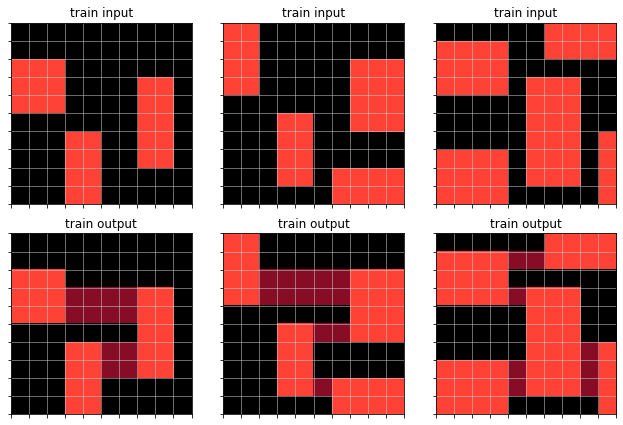

4 objects
[[2 2 2]
 [2 2 2]]
[[2 2 2 2]
 [2 2 2 2]
 [2 2 2 2]]
[[2 2 2]
 [2 2 2]
 [2 2 2]
 [2 2 2]
 [2 2 2]]
[[2 2 2 2]
 [2 2 2 2]]
7 objects
[[2 2 2]
 [2 2 2]]
[[9 9 9]]
[[2 2 2 2]
 [2 2 2 2]
 [2 2 2 2]]
[[2 2 2]
 [2 2 2]
 [2 2 2]
 [2 2 2]
 [2 2 2]]
[[9 9]]
[[9]
 [9]]
[[2 2 2 2]
 [2 2 2 2]]


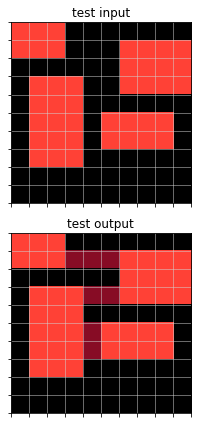

f15e1fac.json
Icecuber solved? False
['draw_line_from_point', 'gravity', 'obstacles', 'direction_guessing']
6 objects
[[8]]
[[8]]
[[8]]
[[8]]
[[2]]
[[2]]
14 objects
[[8]
 [8]
 [8]
 [8]]
[[8]
 [8]
 [8]
 [8]]
[[8]
 [8]
 [8]
 [8]]
[[8]
 [8]
 [8]
 [8]]
[[2]]
[[8]
 [8]
 [8]
 [8]
 [8]
 [8]]
[[8]
 [8]
 [8]
 [8]
 [8]
 [8]]
[[8]
 [8]
 [8]
 [8]
 [8]
 [8]]
[[8]
 [8]
 [8]
 [8]
 [8]
 [8]]
[[2]]
[[8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]]
[[8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]]
[[8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]]
[[8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]]
5 objects
[[8]]
[[8]]
[[2]]
[[2]]
[[2]]
10 objects
[[8]
 [8]
 [8]]
[[8]
 [8]
 [8]]
[[8]
 [8]
 [8]
 [8]]
[[8]
 [8]
 [8]
 [8]]
[[2]]
[[8]
 [8]
 [8]
 [8]]
[[8]
 [8]
 [8]
 [8]]
[[2]]
[[8]
 [8]
 [8]]
[[2]]
5 objects
[[8]]
[[8]]
[[8]]
[[2]]
[[2]]
11 objects
[[8 8 8 8]]
[[8 8 8 8]]
[[8 8 8 8]]
[[8 8 8 8]]
[[8 8 8 8]]
[[8 8 8 8]]
[[8 8 8 8]]
[[8 8 8 8]]
[[8 8 8 8]]
[[2]]
[[2]]


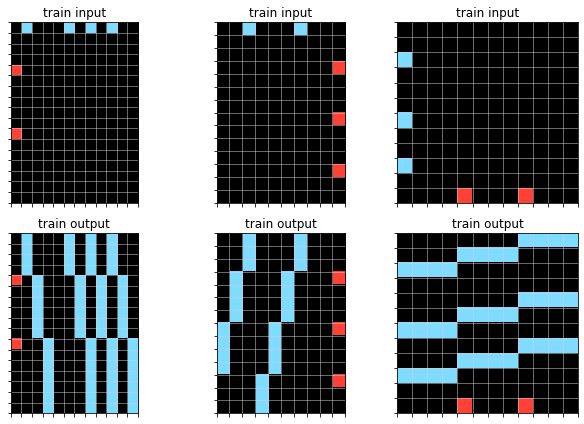

7 objects
[[8]]
[[8]]
[[8]]
[[8]]
[[2]]
[[2]]
[[2]]
18 objects
[[8 8 8 8]]
[[8 8 8 8 8]]
[[8 8 8]]
[[8 8 8 8 8]]
[[8 8 8 8]]
[[8 8 8 8 8]]
[[8 8 8]]
[[8 8 8 8 8]]
[[8 8 8 8]]
[[8 8 8]]
[[8 8 8 8 8]]
[[8 8 8 8]]
[[8 8 8 8 8]]
[[8 8 8 8 8]]
[[8 8 8 8 8]]
[[2]]
[[2]]
[[2]]


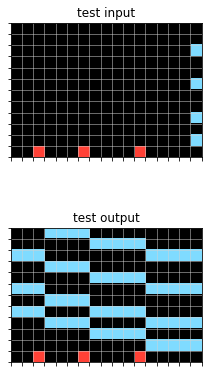

f1cefba8.json
Icecuber solved? False
['draw_line_from_point', 'pattern_modification']
2 objects
[[8 8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 0 8 8 8 8]
 [8 8 0 0 0 0 0 0 0 8 8]
 [8 8 0 0 0 0 0 0 0 8 8]
 [8 8 0 0 0 0 0 0 0 0 8]
 [8 8 0 0 0 0 0 0 0 8 8]
 [8 8 0 0 0 0 0 0 0 8 8]
 [8 8 0 0 0 0 0 0 0 8 8]
 [8 8 0 0 0 0 0 0 0 8 8]
 [8 8 0 0 0 0 0 0 0 8 8]
 [8 8 0 0 0 0 0 0 0 8 8]
 [8 8 8 0 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8 8]]
[[0 0 0 0 2 0 0 0]
 [2 2 2 2 2 2 2 0]
 [2 2 2 2 2 2 2 0]
 [2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 0]
 [2 2 2 2 2 2 2 0]
 [2 2 2 2 2 2 2 0]
 [2 2 2 2 2 2 2 0]
 [2 2 2 2 2 2 2 0]
 [2 2 2 2 2 2 2 0]
 [0 2 0 0 0 0 0 0]]
13 objects
[[2]
 [2]]
[[2]
 [2]]
[[8 8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8 8]
 [8 8 0 8 0 0 8 0 0 8 8]
 [8 8 0 8 0 0 8 0 0 8 8]
 [8 8 8 8 8 8 8 8 8 8 8]
 [8 8 0 8 0 0 8 0 0 8 8]
 [8 8 0 8 0 0 8 0 0 8 8]
 [8 8 0 8 0 0 8 0 0 8 8]
 [8 8 0 8 0 0 8 0 0 8 8]
 [8 8 0 8 0 0 8 0 0 8 8]
 [8 8 0 8 0 0 8 0 0 8 8]
 [8 8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8 8]]
[[2]
 [2]

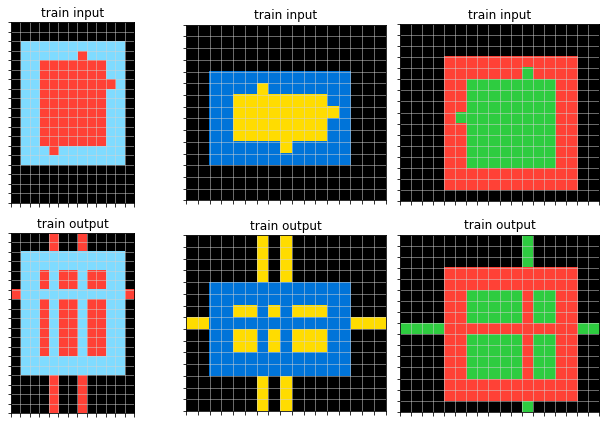

2 objects
[[1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 0 1 1 1 0 1 1 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 0 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1]]
[[0 0 0 0 8 0 0 0 8 0 0]
 [0 8 8 8 8 8 8 8 8 8 8]
 [0 8 8 8 8 8 8 8 8 8 8]
 [0 8 8 8 8 8 8 8 8 8 8]
 [0 8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8 8]
 [0 8 8 8 8 8 8 8 8 8 8]
 [0 8 8 8 8 8 8 8 8 8 8]
 [0 8 8 8 8 8 8 8 8 8 8]
 [0 8 8 8 8 8 8 8 8 8 8]]
13 objects
[[8]
 [8]
 [8]]
[[8]
 [8]
 [8]]
[[1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 0 0 0 1 0 0 0 1 0 0 1 1]
 [1 1 0 0 0 1 0 0 0 1 0 0 1 1]
 [1 1 0 0 0 1 0 0 0 1 0 0 1 1]
 [1 1 0 0 0 1 0 0 0 1 0 0 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 0 0 0 1 0 0 0 1 0 0 1 1]
 [1 1 0 0 0 1 0 0 0 1 0 0 1 1]
 [1 1 0 0 0 1

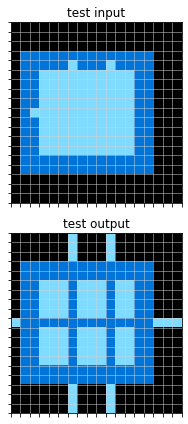

f25fbde4.json
Icecuber solved? True
['crop', 'image_resizing']
1 objects
[[0 4 4 0]
 [4 4 4 4]
 [0 4 4 0]]
1 objects
[[0 0 4 4 4 4 0 0]
 [0 0 4 4 4 4 0 0]
 [4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4]
 [0 0 4 4 4 4 0 0]
 [0 0 4 4 4 4 0 0]]
2 objects
[[0 4]
 [4 4]]
[[4]]
2 objects
[[0 0 4 4]
 [0 0 4 4]
 [4 4 4 4]
 [4 4 4 4]]
[[4 4]
 [4 4]]
1 objects
[[0 4 0]
 [4 4 0]
 [0 4 0]
 [0 4 4]]
1 objects
[[0 0 4 4 0 0]
 [0 0 4 4 0 0]
 [4 4 4 4 0 0]
 [4 4 4 4 0 0]
 [0 0 4 4 0 0]
 [0 0 4 4 0 0]
 [0 0 4 4 4 4]
 [0 0 4 4 4 4]]


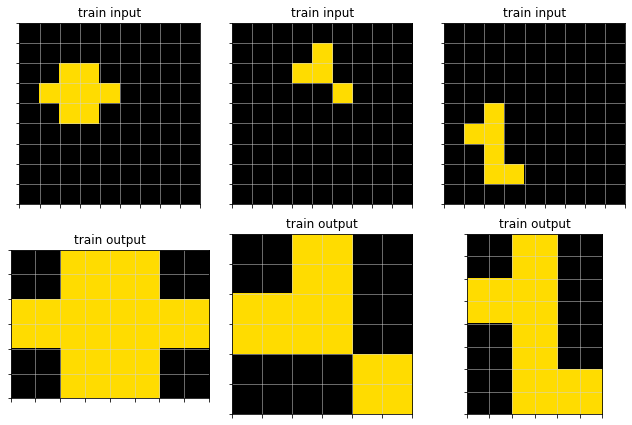

7 objects
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
7 objects
[[4 4]
 [4 4]]
[[4 4]
 [4 4]]
[[4 4]
 [4 4]]
[[4 4]
 [4 4]]
[[4 4]
 [4 4]]
[[4 4]
 [4 4]]
[[4 4]
 [4 4]]


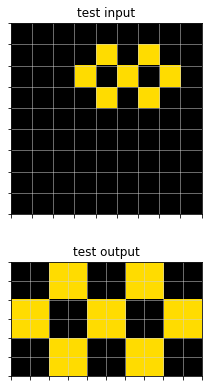

f25ffba3.json
Icecuber solved? True
['pattern_repetition', 'pattern_reflection']
4 objects
[[9]
 [9]
 [9]
 [9]
 [9]]
[[3]
 [3]
 [3]
 [3]]
[[2]
 [2]]
[[4]]
7 objects
[[2]
 [2]]
[[4]]
[[3]
 [3]
 [3]
 [3]]
[[9]
 [9]
 [9]
 [9]
 [9]
 [9]
 [9]
 [9]
 [9]
 [9]]
[[3]
 [3]
 [3]
 [3]]
[[2]
 [2]]
[[4]]
4 objects
[[2]
 [2]
 [2]
 [2]
 [2]]
[[8]]
[[0 3]
 [3 3]]
[[8]
 [8]]
7 objects
[[3 3]
 [0 3]]
[[8]
 [8]]
[[2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]]
[[8]]
[[8]]
[[0 3]
 [3 3]]
[[8]
 [8]]


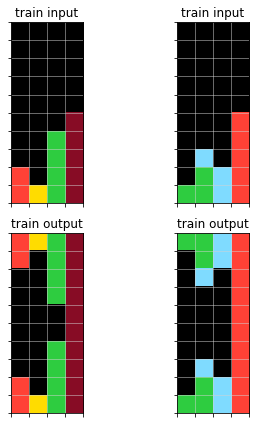

4 objects
[[1]
 [1]
 [1]
 [1]
 [1]]
[[7]
 [7]
 [7]
 [7]]
[[3 0]
 [3 3]]
[[4 4]]
7 objects
[[7]
 [7]
 [7]
 [7]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[4 4]]
[[3 3]
 [3 0]]
[[7]
 [7]
 [7]
 [7]]
[[3 0]
 [3 3]]
[[4 4]]


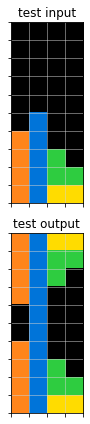

f2829549.json
Icecuber solved? True
['detect_wall', 'separate_images', 'take_complement', 'pattern_intersection']
4 objects
[[7 7]
 [7 0]]
[[1]
 [1]
 [1]
 [1]]
[[5 0]
 [5 0]
 [5 0]
 [5 5]]
[[5]]
2 objects
[[0 3]
 [3 3]
 [3 0]]
[[3]]
5 objects
[[7 7]]
[[1]
 [1]
 [1]
 [1]]
[[5]]
[[7 7 0]
 [0 7 7]]
[[5 0]
 [5 5]]
1 objects
[[0 0 3]
 [3 3 3]
 [0 0 3]]
6 objects
[[7 7]
 [0 7]]
[[1]
 [1]
 [1]
 [1]]
[[5]]
[[0 5 5]
 [5 5 0]]
[[7]]
[[7]]
3 objects
[[3]]
[[3]]
[[3 3]]
6 objects
[[7 0]
 [7 7]
 [0 7]]
[[7]]
[[1]
 [1]
 [1]
 [1]]
[[5 5 0]
 [5 5 5]]
[[5]]
[[5]]
3 objects
[[3]]
[[3]]
[[3]]
6 objects
[[7]]
[[1]
 [1]
 [1]
 [1]]
[[5]]
[[7]]
[[5 0 0]
 [5 5 5]
 [5 5 5]]
[[7 7 7]]
2 objects
[[3]]
[[3]]


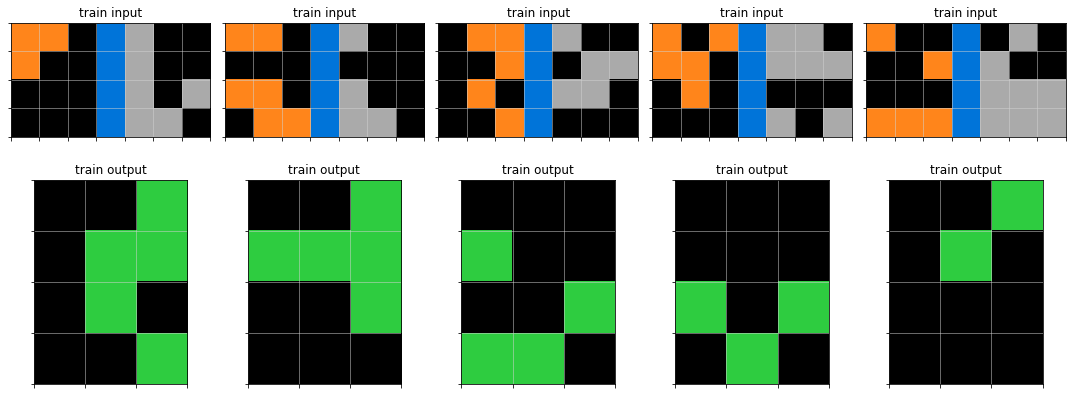

4 objects
[[1]
 [1]
 [1]
 [1]]
[[0 5 0]
 [5 5 0]
 [5 0 0]
 [5 5 5]]
[[7 7 7]]
[[7]]
3 objects
[[3]]
[[3]]
[[3 3]]


f35d900a.json
Icecuber solved? False
['pattern_expansion']
4 objects
[[2]]
[[3]]
[[3]]
[[2]]
14 objects
[[3 3 3]
 [3 0 3]
 [3 3 3]]
[[2 2 2]
 [2 0 2]
 [2 2 2]]
[[2]]
[[5 5]]
[[3]]
[[5]]
[[5]]
[[5]]
[[5]]
[[2 2 2]
 [2 0 2]
 [2 2 2]]
[[3 3 3]
 [3 0 3]
 [3 3 3]]
[[3]]
[[5 5]]
[[2]]
4 objects
[[1]]
[[8]]
[[8]]
[[1]]
22 objects
[[8 8 8]
 [8 0 8]
 [8 8 8]]
[[1 1 1]
 [1 0 1]
 [1 1 1]]
[[1]]
[[5]]
[[5]]
[[5]]
[[8]]
[[5]]
[[5]]
[[5]]
[[5]]
[[5]]
[[5]]
[[5]]
[[5]]
[[1 1 1]
 [1 0 1]
 [1 1 1]]
[[8 8 8]
 [8 0 8]
 [8 8 8]]
[[8]]
[[5]]
[[5]]
[[5]]
[[1]]
4 objects
[[2]]
[[4]]
[[4]]
[[2]]
24 objects
[[4 4 4]
 [4 0 4]
 [4 4 4]]
[[2 2 2]
 [2 0 2]
 [2 2 2]]
[[2]]
[[5]]
[[5]]
[[5]]
[[5]]
[[4]]
[[5]]
[[5]]
[[5]]
[[5]]
[[5]]
[[5]]
[[5]]
[[5]]
[[2 2 2]
 [2 0 2]
 [2 2 2]]
[[4 4 4]
 [4 0 4]
 [4 4 4]]
[[4]]
[[5]]
[[5]]
[[5]]
[[5]]
[[2]]
4 objects
[[3]]
[[8]]
[[8]]
[[3]]
16 objects
[[8 8 8]
 [8 0 8]
 [8 8 8]]
[[3 3 3]
 [3 0 3]
 [3 3 3]]
[[3]]
[[5]]
[[5]]
[[5]]
[[8]]
[[5]
 [5]]
[[5]
 [5]]
[[3 3 3]
 [3 0 3]
 [3 3 3

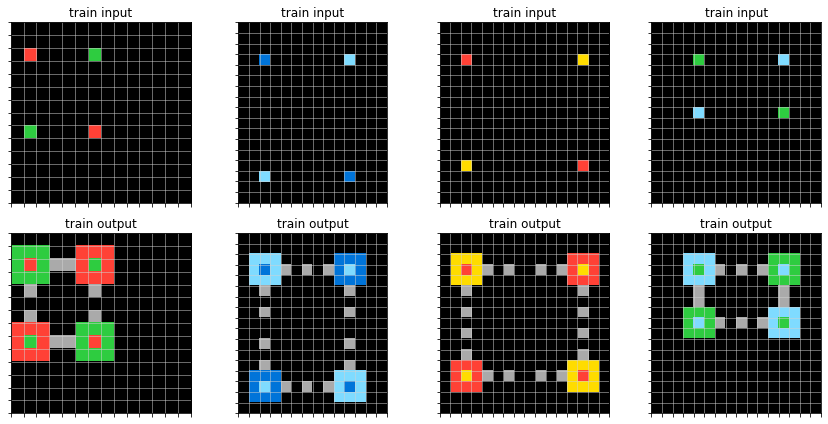

4 objects
[[4]]
[[1]]
[[1]]
[[4]]
24 objects
[[1 1 1]
 [1 0 1]
 [1 1 1]]
[[4 4 4]
 [4 0 4]
 [4 4 4]]
[[4]]
[[5]]
[[5]]
[[5]]
[[5]]
[[1]]
[[5]]
[[5]]
[[5]]
[[5]]
[[5]]
[[5]]
[[5]]
[[5]]
[[4 4 4]
 [4 0 4]
 [4 4 4]]
[[1 1 1]
 [1 0 1]
 [1 1 1]]
[[1]]
[[5]]
[[5]]
[[5]]
[[5]]
[[4]]


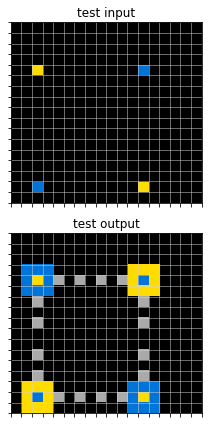

f5b8619d.json
Icecuber solved? True
['pattern_expansion', 'draw_line_from_point', 'image_repetition']
2 objects
[[2]]
[[2]]
14 objects
[[2]]
[[8 0]
 [8 8]
 [0 8]]
[[2]]
[[8]
 [8]]
[[8]
 [8]]
[[2]]
[[2]]
[[2]]
[[8 0]
 [8 8]
 [0 8]]
[[2]]
[[8]
 [8]]
[[8]
 [8]]
[[2]]
[[2]]
3 objects
[[5]]
[[5]]
[[5]]
15 objects
[[8 0]
 [8 8]
 [8 8]
 [8 8]
 [0 8]
 [8 8]
 [8 0]
 [8 8]
 [8 8]
 [8 8]
 [0 8]
 [8 8]]
[[5]]
[[8 8 0]
 [8 8 8]
 [8 8 8]
 [8 8 8]
 [0 0 8]
 [8 8 8]
 [8 8 0]
 [8 8 8]
 [8 8 8]
 [8 8 8]
 [0 0 8]
 [8 8 8]]
[[5]]
[[8]
 [8]
 [8]
 [8]]
[[5]]
[[5 5]]
[[5]]
[[8]
 [8]
 [8]
 [8]
 [8]]
[[5]]
[[5]]
[[5]]
[[5 5]]
[[5]]
[[8]]
1 objects
[[4]]
8 objects
[[4]]
[[4]]
[[8]]
[[8]]
[[4]]
[[4]]
[[8]]
[[8]]


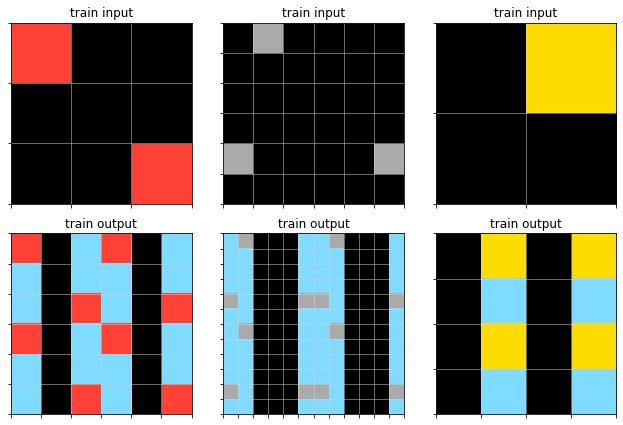

3 objects
[[3]]
[[3]]
[[3]]
16 objects
[[8]
 [8]
 [8]]
[[3]]
[[0 8 8]
 [8 8 8]
 [8 0 8]
 [8 8 0]
 [0 8 8]
 [8 8 8]
 [8 0 8]
 [8 8 0]]
[[3]]
[[0 8]
 [8 8]
 [8 0]
 [8 8]
 [0 8]
 [8 8]
 [8 0]
 [8 8]]
[[3]]
[[3]]
[[3]]
[[3]]
[[8]
 [8]
 [8]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]


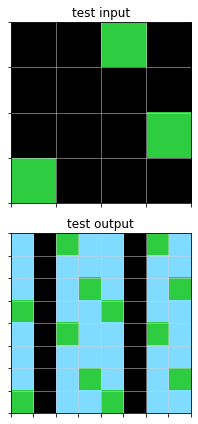

f76d97a5.json
Icecuber solved? True
['take_negative', 'recoloring', 'associate_colors_to_colors']
5 objects
[[4]]
[[0 5 0]
 [5 5 5]
 [0 5 0]]
[[4]]
[[4]]
[[4]]
1 objects
[[0 4 0]
 [4 4 4]
 [0 4 0]]
4 objects
[[5 5 0 0 0]
 [0 5 5 0 0]
 [0 0 5 5 0]
 [0 0 0 5 5]
 [0 0 0 0 5]]
[[6 6 6]
 [0 6 6]
 [0 0 6]]
[[6 0 0 0]
 [6 6 0 0]
 [6 6 6 0]
 [0 6 6 6]]
[[5]]
2 objects
[[6 6 0 0 0]
 [0 6 6 0 0]
 [0 0 6 6 0]
 [0 0 0 6 6]
 [0 0 0 0 6]]
[[6]]
7 objects
[[9 0 0]
 [9 9 0]
 [9 0 0]
 [9 9 0]
 [9 9 9]]
[[5]]
[[9 9 9]
 [0 0 9]
 [9 9 9]
 [0 9 9]]
[[5 5]]
[[5]]
[[5]]
[[5 5]]
5 objects
[[9]]
[[9 9]]
[[9]]
[[9]]
[[9 9]]


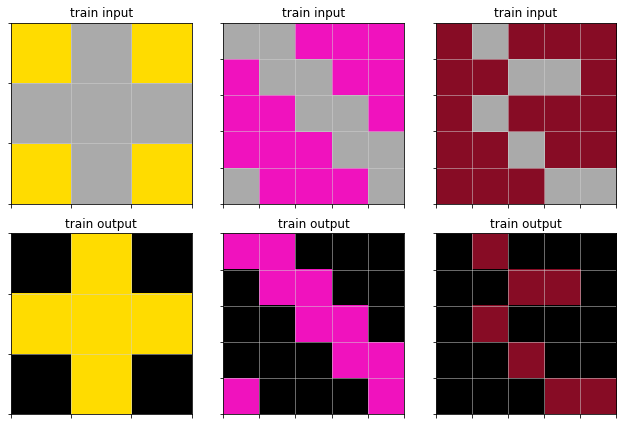

7 objects
[[3 3 3 0 3]
 [3 0 3 3 3]
 [3 0 0 3 0]
 [3 3 3 0 0]]
[[5]]
[[5 0]
 [5 5]]
[[5]]
[[5]]
[[0 3]
 [3 3]]
[[5 5 5]]
5 objects
[[3]]
[[3 0]
 [3 3]]
[[3]]
[[3]]
[[3 3 3]]


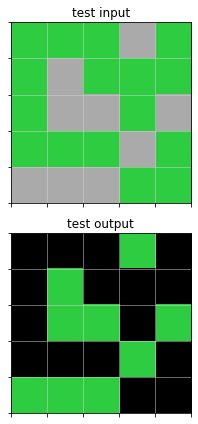

f8a8fe49.json
Icecuber solved? True
['pattern_moving', 'pattern_reflection']
4 objects
[[2 2 2 2 2 2 2]
 [2 0 0 0 0 0 2]]
[[5 5 5]
 [5 0 5]]
[[5]]
[[2 0 0 0 0 0 2]
 [2 2 2 2 2 2 2]]
4 objects
[[5 0 5]
 [5 5 5]]
[[2 2 2 2 2 2 2]
 [2 0 0 0 0 0 2]]
[[2 0 0 0 0 0 2]
 [2 2 2 2 2 2 2]]
[[5]]
6 objects
[[2 2]
 [2 0]
 [2 0]
 [2 0]
 [2 0]
 [2 0]
 [2 0]
 [2 2]]
[[2 2]
 [0 2]
 [0 2]
 [0 2]
 [0 2]
 [0 2]
 [0 2]
 [2 2]]
[[5]]
[[5]
 [5]
 [5]
 [5]]
[[5]
 [5]]
[[5]]
6 objects
[[2 2]
 [2 0]
 [2 0]
 [2 0]
 [2 0]
 [2 0]
 [2 0]
 [2 2]]
[[2 2]
 [0 2]
 [0 2]
 [0 2]
 [0 2]
 [0 2]
 [0 2]
 [2 2]]
[[5]]
[[5]
 [5]
 [5]
 [5]]
[[5]
 [5]]
[[5]]
4 objects
[[2 2]
 [2 0]
 [2 0]
 [2 0]
 [2 2]]
[[2 2]
 [0 2]
 [0 2]
 [0 2]
 [2 2]]
[[5 0]
 [5 5]
 [0 5]]
[[5]
 [5]
 [5]]
4 objects
[[2 2]
 [2 0]
 [2 0]
 [2 0]
 [2 2]]
[[2 2]
 [0 2]
 [0 2]
 [0 2]
 [2 2]]
[[0 5]
 [5 5]
 [5 0]]
[[5]
 [5]
 [5]]


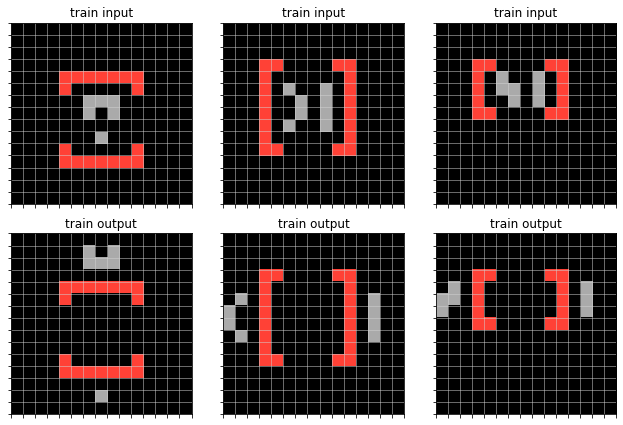

4 objects
[[2 2 2 2 2 2 2]
 [2 0 0 0 0 0 2]]
[[0 5 5 5 5]
 [5 5 5 0 0]]
[[5 5 5]]
[[2 0 0 0 0 0 2]
 [2 2 2 2 2 2 2]]
4 objects
[[5 5 5 0 0]
 [0 5 5 5 5]]
[[2 2 2 2 2 2 2]
 [2 0 0 0 0 0 2]]
[[2 0 0 0 0 0 2]
 [2 2 2 2 2 2 2]]
[[5 5 5]]


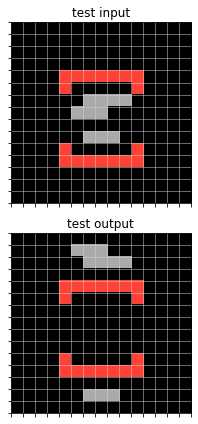

f8b3ba0a.json
Icecuber solved? True
['detect_grid', 'find_the_intruder', 'dominant_color', 'count_tiles', 'summarize', 'order_numbers']
24 objects
[[3 3]]
[[1 1]]
[[1 1]]
[[1 1]]
[[1 1]]
[[1 1]]
[[4 4]]
[[4 4]]
[[1 1]]
[[4 4]]
[[1 1]]
[[1 1]]
[[2 2]]
[[1 1]]
[[1 1]]
[[1 1]]
[[1 1]]
[[2 2]]
[[1 1]]
[[1 1]]
[[1 1]]
[[1 1]]
[[1 1]]
[[1 1]]
3 objects
[[4]]
[[2]]
[[3]]
30 objects
[[6 6]]
[[8 8]]
[[8 8]]
[[8 8]]
[[8 8]]
[[8 8]]
[[8 8]]
[[2 2]]
[[6 6]]
[[8 8]]
[[1 1]]
[[8 8]]
[[1 1]]
[[8 8]]
[[8 8]]
[[8 8]]
[[1 1]]
[[8 8]]
[[8 8]]
[[8 8]]
[[8 8]]
[[8 8]]
[[6 6]]
[[8 8]]
[[6 6]]
[[8 8]]
[[8 8]]
[[8 8]]
[[8 8]]
[[8 8]]
3 objects
[[6]]
[[1]]
[[2]]
18 objects
[[3 3]]
[[3 3]]
[[3 3]]
[[1 1]]
[[3 3]]
[[3 3]]
[[3 3]]
[[8 8]]
[[3 3]]
[[3 3]]
[[8 8]]
[[3 3]]
[[3 3]]
[[2 2]]
[[2 2]]
[[2 2]]
[[3 3]]
[[3 3]]
3 objects
[[2]]
[[8]]
[[1]]
24 objects
[[1 1]]
[[1 1]]
[[8 8]]
[[1 1]]
[[1 1]]
[[2 2]]
[[1 1]]
[[2 2]]
[[2 2]]
[[1 1]]
[[1 1]]
[[1 1]]
[[1 1]]
[[1 1]]
[[8 8]]
[[1 1]]
[[1 1]]
[[8 8]]
[[1 1]]
[[4 4]]


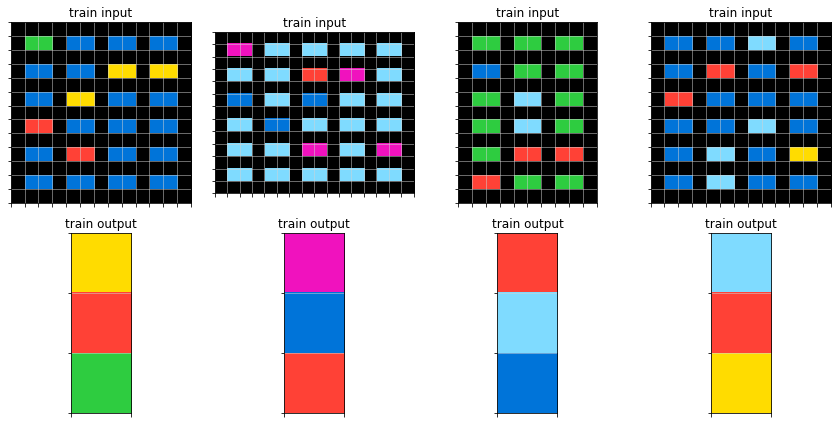

28 objects
[[2 2]]
[[4 4]]
[[2 2]]
[[2 2]]
[[1 1]]
[[2 2]]
[[4 4]]
[[2 2]]
[[8 8]]
[[2 2]]
[[2 2]]
[[8 8]]
[[2 2]]
[[2 2]]
[[1 1]]
[[2 2]]
[[4 4]]
[[2 2]]
[[2 2]]
[[2 2]]
[[2 2]]
[[1 1]]
[[2 2]]
[[4 4]]
[[2 2]]
[[2 2]]
[[4 4]]
[[2 2]]
3 objects
[[4]]
[[1]]
[[8]]


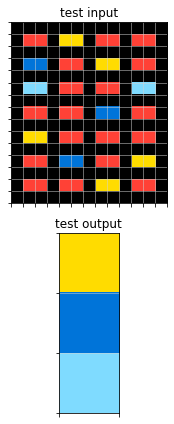

f8c80d96.json
Icecuber solved? True
['pattern_expansion', 'background_filling']
3 objects
[[8 8 8 8 8 8]
 [0 0 0 0 0 8]
 [0 0 0 0 0 8]
 [0 0 0 0 0 8]
 [0 0 0 0 0 8]
 [0 0 0 0 0 8]]
[[8 8 8 8]
 [0 0 0 8]
 [0 0 0 8]
 [0 0 0 8]]
[[8 8]
 [0 8]]
10 objects
[[8 8 8 8 8 8 8 8 8 8]
 [0 0 0 0 0 0 0 0 0 8]
 [0 0 0 0 0 0 0 0 0 8]
 [0 0 0 0 0 0 0 0 0 8]
 [0 0 0 0 0 0 0 0 0 8]
 [0 0 0 0 0 0 0 0 0 8]
 [0 0 0 0 0 0 0 0 0 8]
 [0 0 0 0 0 0 0 0 0 8]
 [0 0 0 0 0 0 0 0 0 8]
 [0 0 0 0 0 0 0 0 0 8]]
[[5 5 5 5 5 5 5 5 5]
 [0 0 0 0 0 0 0 0 5]
 [0 0 0 0 0 0 0 0 5]
 [0 0 0 0 0 0 0 0 5]
 [0 0 0 0 0 0 0 0 5]
 [0 0 0 0 0 0 0 0 5]
 [0 0 0 0 0 0 0 0 5]
 [0 0 0 0 0 0 0 0 5]
 [0 0 0 0 0 0 0 0 5]]
[[8 8 8 8 8 8 8 8]
 [0 0 0 0 0 0 0 8]
 [0 0 0 0 0 0 0 8]
 [0 0 0 0 0 0 0 8]
 [0 0 0 0 0 0 0 8]
 [0 0 0 0 0 0 0 8]
 [0 0 0 0 0 0 0 8]
 [0 0 0 0 0 0 0 8]]
[[5 5 5 5 5 5 5]
 [0 0 0 0 0 0 5]
 [0 0 0 0 0 0 5]
 [0 0 0 0 0 0 5]
 [0 0 0 0 0 0 5]
 [0 0 0 0 0 0 5]
 [0 0 0 0 0 0 5]]
[[8 8 8 8 8 8]
 [0 0 0 0 0 8]
 [0 0 0 0 0 8]
 [0 0 0 0

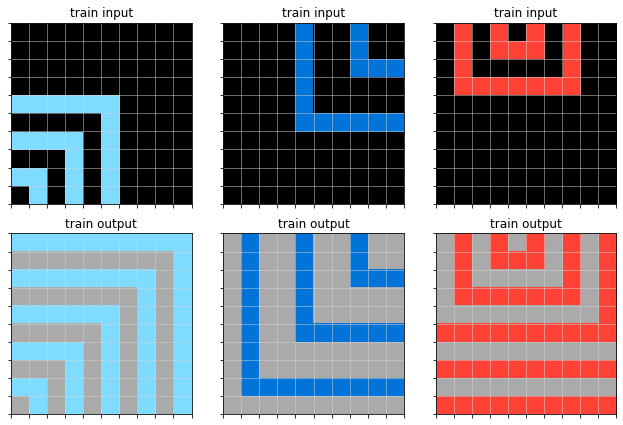

2 objects
[[4 4 4 4 4 4]
 [0 0 0 0 0 4]
 [0 0 0 0 0 4]
 [0 0 0 0 0 4]
 [0 0 0 0 0 4]
 [0 0 0 0 0 4]
 [0 0 0 0 0 4]
 [0 0 0 0 0 4]
 [0 0 0 0 0 4]
 [4 4 4 4 4 4]]
[[4 4 4]
 [0 0 4]
 [0 0 4]
 [4 4 4]]
7 objects
[[4 4 4 4 4 4]
 [0 0 0 0 0 4]
 [0 0 0 0 0 4]
 [0 0 0 0 0 4]
 [0 0 0 0 0 4]
 [0 0 0 0 0 4]
 [0 0 0 0 0 4]
 [0 0 0 0 0 4]
 [0 0 0 0 0 4]
 [4 4 4 4 4 4]]
[[5 5]
 [5 5]
 [5 5]
 [5 5]
 [5 5]
 [5 5]
 [5 5]
 [5 5]
 [5 5]
 [5 5]]
[[4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]]
[[5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]]
[[5 5 5 5 5]
 [5 5 5 5 5]
 [0 0 0 5 5]
 [0 0 0 5 5]
 [0 0 0 5 5]
 [0 0 0 5 5]
 [5 5 5 5 5]
 [5 5 5 5 5]]
[[4 4 4]
 [0 0 4]
 [0 0 4]
 [4 4 4]]
[[5 5]
 [5 5]]


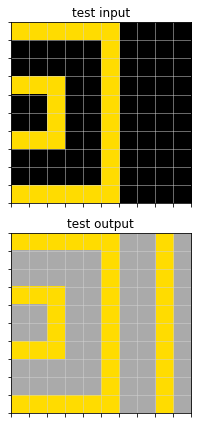

f8ff0b80.json
Icecuber solved? False
['separate_shapes', 'count_tiles', 'summarize', 'order_numbers']
5 objects
[[3 3 0]
 [3 3 0]
 [3 3 3]]
[[0 8]
 [8 8]]
[[3]]
[[8]]
[[0 2 2 0]
 [2 2 2 2]
 [0 2 0 0]]
3 objects
[[3]]
[[2]]
[[8]]
5 objects
[[1 1 0 0]
 [1 1 1 0]
 [0 0 1 1]]
[[1]]
[[1]]
[[0 2]
 [2 2]
 [0 2]]
[[0 0 7]
 [7 7 7]
 [0 7 7]]
3 objects
[[1]]
[[7]]
[[2]]
3 objects
[[0 0 2 0]
 [0 2 2 2]
 [2 2 2 0]]
[[1 0]
 [1 1]
 [1 1]]
[[0 0 4 4 4]
 [4 4 4 4 4]
 [4 4 4 4 4]
 [0 4 0 0 0]]
3 objects
[[4]]
[[2]]
[[1]]


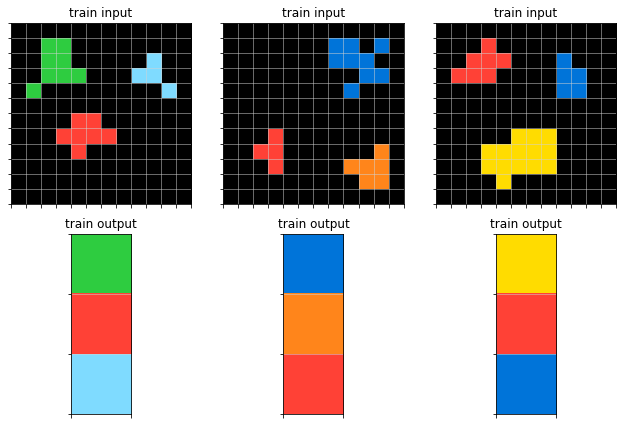

4 objects
[[0 3]
 [3 3]]
[[0 1 1]
 [1 1 1]]
[[0 6 0]
 [6 6 0]
 [0 6 6]
 [0 6 0]]
[[6]]
3 objects
[[6]]
[[1]]
[[3]]


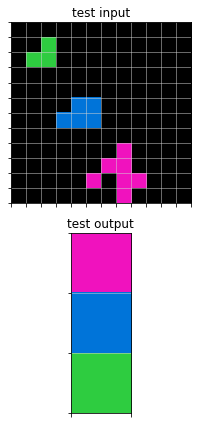

f9012d9b.json
Icecuber solved? False
['pattern_expansion', 'pattern_completion', 'crop']
9 objects
[[2]]
[[0 1 0 1 0]
 [1 1 1 1 1]
 [0 1 0 1 0]
 [0 0 1 1 1]
 [0 0 0 1 0]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
[[2]]
2 objects
[[1 1]
 [0 1]]
[[2]]
15 objects
[[8]]
[[6]]
[[6]]
[[6]]
[[8]]
[[6]]
[[8]]
[[8]]
[[6]]
[[8]]
[[6]]
[[6]]
[[8]]
[[6]]
[[8]]
1 objects
[[8]]
9 objects
[[2 2]
 [2 2]]
[[0 0 5 0 0 5 0]
 [0 0 5 0 0 5 0]
 [5 5 5 5 5 5 5]
 [0 0 5 0 0 5 0]
 [0 0 5 0 0 5 0]
 [5 5 5 5 5 0 0]
 [0 0 5 0 0 0 0]]
[[2 2]
 [2 2]]
[[2]
 [2]]
[[2 2]
 [2 2]]
[[2 2]
 [2 2]]
[[2]
 [2]]
[[2 2]]
[[2 2]]
2 objects
[[5 5]
 [5 0]]
[[2]]


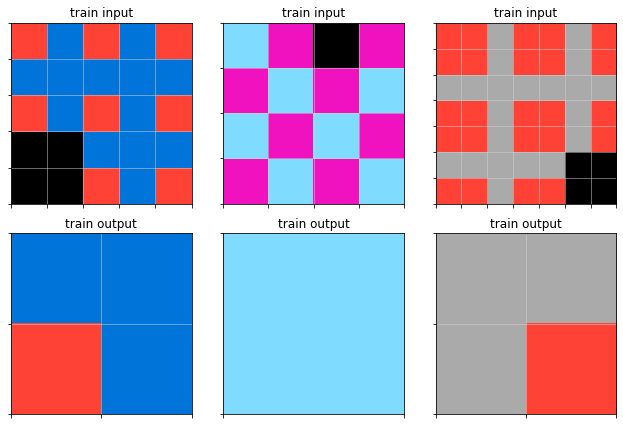

18 objects
[[8]]
[[1]]
[[0 0 8 8]
 [0 8 8 0]
 [8 8 0 0]
 [8 0 0 0]]
[[1]]
[[1]]
[[1]]
[[0 0 0 8]
 [0 0 8 8]
 [0 8 8 0]
 [8 8 0 0]
 [8 0 0 0]]
[[1]]
[[1]]
[[0 0 0 8 8]
 [0 0 8 8 0]
 [0 8 8 0 0]
 [8 8 0 0 0]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[0 8]
 [8 8]]
[[1]]
[[1]]
5 objects
[[1]]
[[0 8 8]
 [8 8 0]
 [8 0 0]]
[[1]]
[[1]]
[[8]]


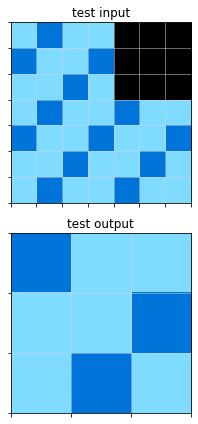

fafffa47.json
Icecuber solved? True
['separate_images', 'take_complement', 'pattern_intersection']
3 objects
[[0 9 9]
 [0 9 9]
 [9 9 9]]
[[1]]
[[0 0 1]
 [1 1 1]]
1 objects
[[2]
 [2]]
4 objects
[[9]]
[[0 9]
 [9 9]
 [0 9]]
[[1]
 [1]
 [1]]
[[1]]
2 objects
[[2]]
[[2]]
5 objects
[[9]]
[[9]
 [9]]
[[9]]
[[1]]
[[1]]
3 objects
[[2]]
[[2]]
[[2 0]
 [2 2]]
3 objects
[[0 0 9]
 [9 9 9]
 [0 9 0]]
[[1]]
[[1 1]
 [0 1]]
2 objects
[[2]]
[[2]]
2 objects
[[9 0]
 [9 9]
 [9 9]]
[[1 1 1]
 [1 0 1]]
2 objects
[[2]]
[[2]]


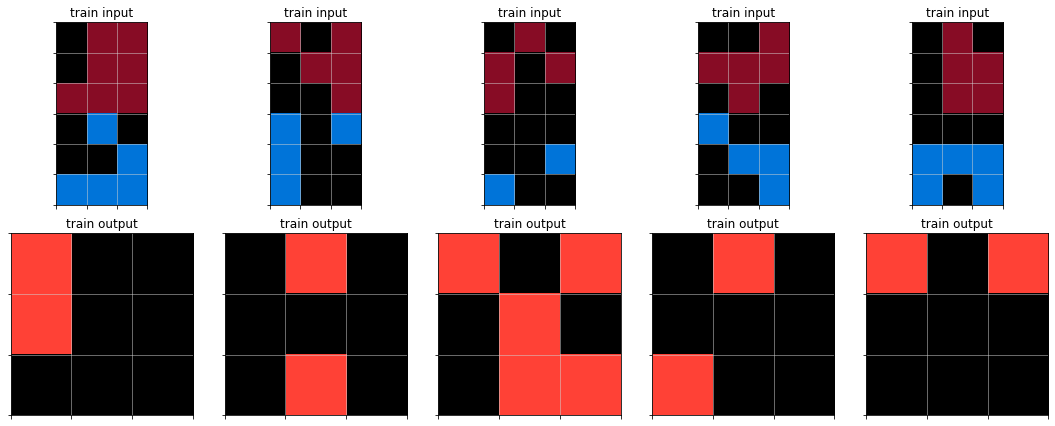

5 objects
[[9]]
[[9]
 [9]
 [9]]
[[9]]
[[1 1]
 [1 0]]
[[1]]
2 objects
[[2]]
[[2]]


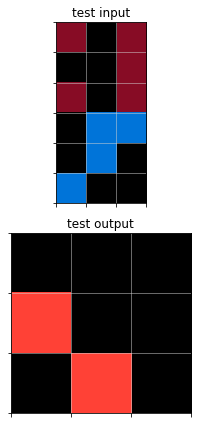

fcb5c309.json
Icecuber solved? True
['rectangle_guessing', 'separate_images', 'count_tiles', 'take_maximum', 'crop', 'recoloring']
11 objects
[[4]]
[[4]]
[[2 2 2 2 2 2 2]
 [2 0 0 0 0 0 2]
 [2 0 0 0 0 0 2]
 [2 0 0 0 0 0 2]
 [2 0 0 0 0 0 2]
 [2 0 0 0 0 0 2]
 [2 2 2 2 2 2 2]]
[[2 2 2]
 [2 0 2]
 [2 0 2]
 [2 2 2]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[4]]
2 objects
[[4 4 4 4 4 4 4]
 [4 0 0 0 0 0 4]
 [4 4 0 0 0 0 4]
 [4 0 0 0 0 0 4]
 [4 0 0 0 0 0 4]
 [4 0 0 0 0 0 4]
 [4 4 4 4 4 4 4]]
[[4]]
15 objects
[[3]]
[[3]]
[[3]]
[[1 1 1 1 1 1 1]
 [1 0 0 0 0 0 1]
 [1 0 0 0 0 0 1]
 [1 0 0 0 0 0 1]
 [1 0 0 0 0 0 1]
 [1 1 1 1 1 1 1]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[1 1 1 1 1 1]
 [1 0 0 0 0 1]
 [1 0 0 0 0 1]
 [1 0 0 0 0 1]
 [1 1 1 1 1 1]]
[[3]]
[[3]
 [3]]
[[0 3]
 [3 3]]
[[3]]
2 objects
[[3 3 3 3 3 3 3]
 [3 0 0 3 0 0 3]
 [3 0 0 0 0 0 3]
 [3 3 0 0 0 0 3]
 [3 0 0 0 0 0 3]
 [3 3 3 3 3 3 3]]
[[3]]
17 objects
[[2]]
[[3 3 3 3 3 3 3]
 [3 0 0 0 0 0 3]
 [3 0 0 0 0 0 3]
 [3 0 0 0 0 0 3]
 [3 0 0 0 0 0 3]
 [3 0 0 

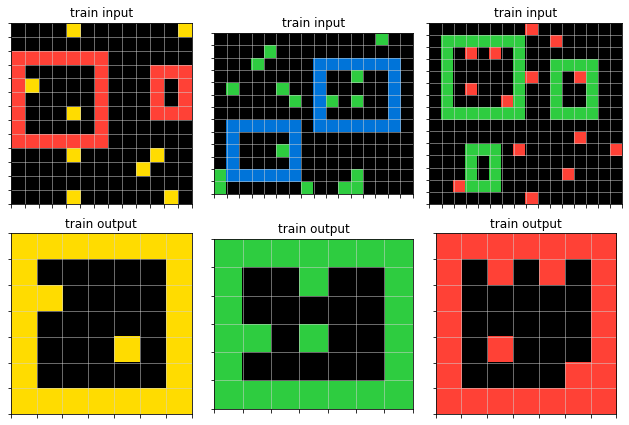

22 objects
[[8]]
[[1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1]]
[[1 1 1]
 [1 0 1]
 [1 1 1]]
[[8]]
[[8]]
[[8]
 [8]]
[[8]
 [8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[8]]
[[1 1 1 1 1 1]
 [1 0 0 0 0 1]
 [1 0 0 0 0 1]
 [1 0 0 0 0 1]
 [1 1 1 1 1 1]]
[[8]]
[[8]]
[[8]]
[[8 8]]
[[8]]
[[8 8]]
[[8]]
2 objects
[[8 8 8 8 8 8 8 8]
 [8 0 8 0 8 0 0 8]
 [8 0 0 0 0 0 0 8]
 [8 0 0 0 0 0 0 8]
 [8 0 0 0 0 0 0 8]
 [8 0 0 0 0 0 0 8]
 [8 0 0 0 0 8 0 8]
 [8 8 8 8 8 8 8 8]]
[[8]]


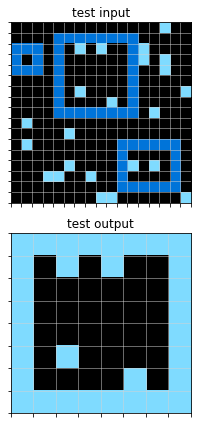

fcc82909.json
Icecuber solved? False
['pattern_expansion', 'separate_images', 'count_different_colors']
5 objects
[[9 9]]
[[6 6]]
[[8]]
[[4]]
[[7 7]]
7 objects
[[9 9]]
[[6 6]]
[[3 3]
 [3 3]]
[[8]]
[[4]]
[[7 7]]
[[3 3]
 [3 3]
 [3 3]]
8 objects
[[4]]
[[8]]
[[9]]
[[4]]
[[2]]
[[1]]
[[1]]
[[2]]
10 objects
[[4]]
[[8]]
[[9]]
[[4]]
[[3 3]
 [3 3]
 [3 3]]
[[2]]
[[1]]
[[1]]
[[2]]
[[3 3]
 [3 3]]
10 objects
[[2]]
[[4]]
[[9]]
[[8]]
[[6]]
[[7]]
[[8]]
[[9]]
[[7]]
[[0 6]
 [6 6]]
13 objects
[[2]]
[[4]]
[[9]]
[[8]]
[[6]]
[[7]]
[[8]]
[[9]]
[[3 3]
 [3 3]
 [3 3]
 [3 3]]
[[3 3]
 [3 3]]
[[7]]
[[0 6]
 [6 6]]
[[3 3]
 [3 3]]


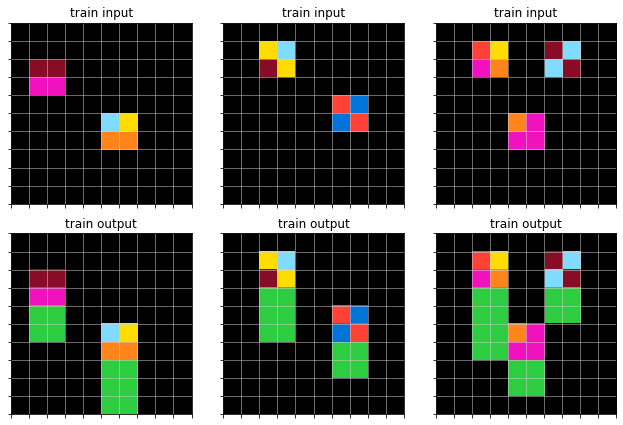

10 objects
[[1 1]
 [0 1]]
[[2]]
[[9]]
[[2]]
[[1]]
[[6]]
[[4]]
[[7]]
[[8]]
[[4]]
13 objects
[[1 1]
 [0 1]]
[[2]]
[[9]]
[[2]]
[[1]]
[[6]]
[[3 3]
 [3 3]]
[[4]]
[[7]]
[[3 3]
 [3 3]
 [3 3]
 [3 3]]
[[8]]
[[4]]
[[3 3]
 [3 3]
 [3 3]]


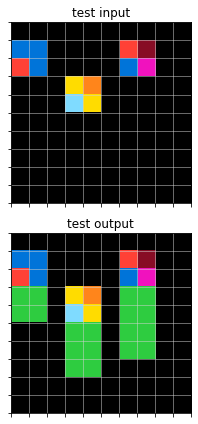

feca6190.json
Icecuber solved? True
['pattern_expansion', 'image_expansion', 'draw_line_from_point', 'diagonals']
2 objects
[[1]]
[[7]]
18 objects
[[1]]
[[1]]
[[1]]
[[7]]
[[1]]
[[7]]
[[1]]
[[7]]
[[1]]
[[7]]
[[1]]
[[7]]
[[1]]
[[7]]
[[1]]
[[7]]
[[1]]
[[7]]
1 objects
[[2]]
3 objects
[[2]]
[[2]]
[[2]]
3 objects
[[4]]
[[6]]
[[8]]
39 objects
[[4]]
[[4]]
[[4]]
[[6]]
[[4]]
[[6]]
[[4]]
[[6]]
[[8]]
[[4]]
[[6]]
[[8]]
[[4]]
[[6]]
[[8]]
[[4]]
[[6]]
[[8]]
[[4]]
[[6]]
[[8]]
[[4]]
[[6]]
[[8]]
[[4]]
[[6]]
[[8]]
[[4]]
[[6]]
[[8]]
[[4]]
[[6]]
[[8]]
[[4]]
[[6]]
[[8]]
[[4]]
[[6]]
[[8]]
3 objects
[[9]]
[[8]]
[[4]]
37 objects
[[9]]
[[9]]
[[9]]
[[8]]
[[9]]
[[8]]
[[4]]
[[9]]
[[8]]
[[4]]
[[9]]
[[8]]
[[4]]
[[9]]
[[8]]
[[4]]
[[9]]
[[8]]
[[4]]
[[9]]
[[8]]
[[4]]
[[9]]
[[8]]
[[4]]
[[9]]
[[8]]
[[4]]
[[9]]
[[8]]
[[4]]
[[9]]
[[8]]
[[4]]
[[9]]
[[8]]
[[4]]
1 objects
[[4]]
4 objects
[[4]]
[[4]]
[[4]]
[[4]]


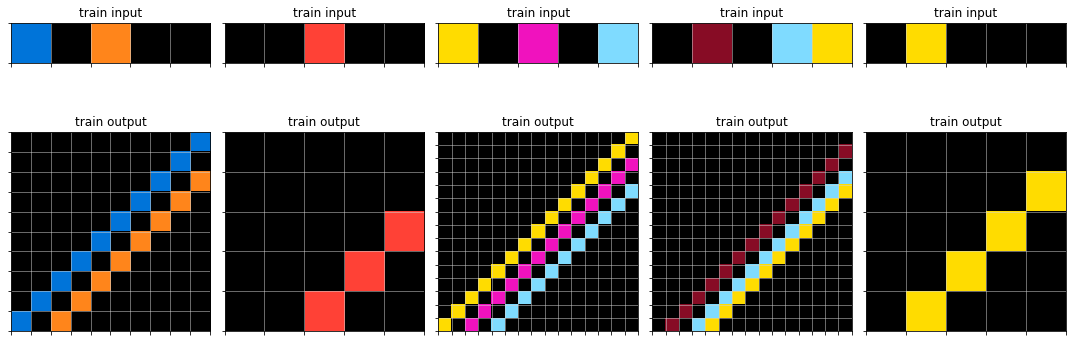

4 objects
[[6]]
[[7]]
[[8]]
[[9]]
70 objects
[[6]]
[[6]]
[[7]]
[[6]]
[[7]]
[[8]]
[[6]]
[[7]]
[[8]]
[[9]]
[[6]]
[[7]]
[[8]]
[[9]]
[[6]]
[[7]]
[[8]]
[[9]]
[[6]]
[[7]]
[[8]]
[[9]]
[[6]]
[[7]]
[[8]]
[[9]]
[[6]]
[[7]]
[[8]]
[[9]]
[[6]]
[[7]]
[[8]]
[[9]]
[[6]]
[[7]]
[[8]]
[[9]]
[[6]]
[[7]]
[[8]]
[[9]]
[[6]]
[[7]]
[[8]]
[[9]]
[[6]]
[[7]]
[[8]]
[[9]]
[[6]]
[[7]]
[[8]]
[[9]]
[[6]]
[[7]]
[[8]]
[[9]]
[[6]]
[[7]]
[[8]]
[[9]]
[[6]]
[[7]]
[[8]]
[[9]]
[[6]]
[[7]]
[[8]]
[[9]]


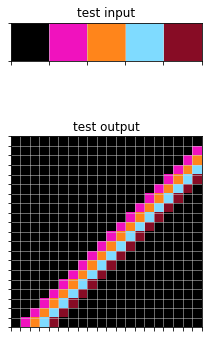

ff28f65a.json
Icecuber solved? False
['count_shapes', 'associate_images_to_numbers']
1 objects
[[2 2]
 [2 2]]
1 objects
[[1]]
2 objects
[[2 2]
 [2 2]]
[[2 2]
 [2 2]]
2 objects
[[1]]
[[1]]
3 objects
[[2 2]
 [2 2]]
[[2 2]
 [2 2]]
[[2 2]
 [2 2]]
3 objects
[[1]]
[[1]]
[[1]]
2 objects
[[2 2]
 [2 2]]
[[2 2]
 [2 2]]
2 objects
[[1]]
[[1]]
1 objects
[[2 2]
 [2 2]]
1 objects
[[1]]
4 objects
[[2 2]
 [2 2]]
[[2 2]
 [2 2]]
[[2 2]
 [2 2]]
[[2 2]
 [2 2]]
4 objects
[[1]]
[[1]]
[[1]]
[[1]]
5 objects
[[2 2]
 [2 2]]
[[2 2]
 [2 2]]
[[2 2]
 [2 2]]
[[2 2]
 [2 2]]
[[2 2]
 [2 2]]
5 objects
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
4 objects
[[2 2]
 [2 2]]
[[2 2]
 [2 2]]
[[2 2]
 [2 2]]
[[2 2]
 [2 2]]
4 objects
[[1]]
[[1]]
[[1]]
[[1]]


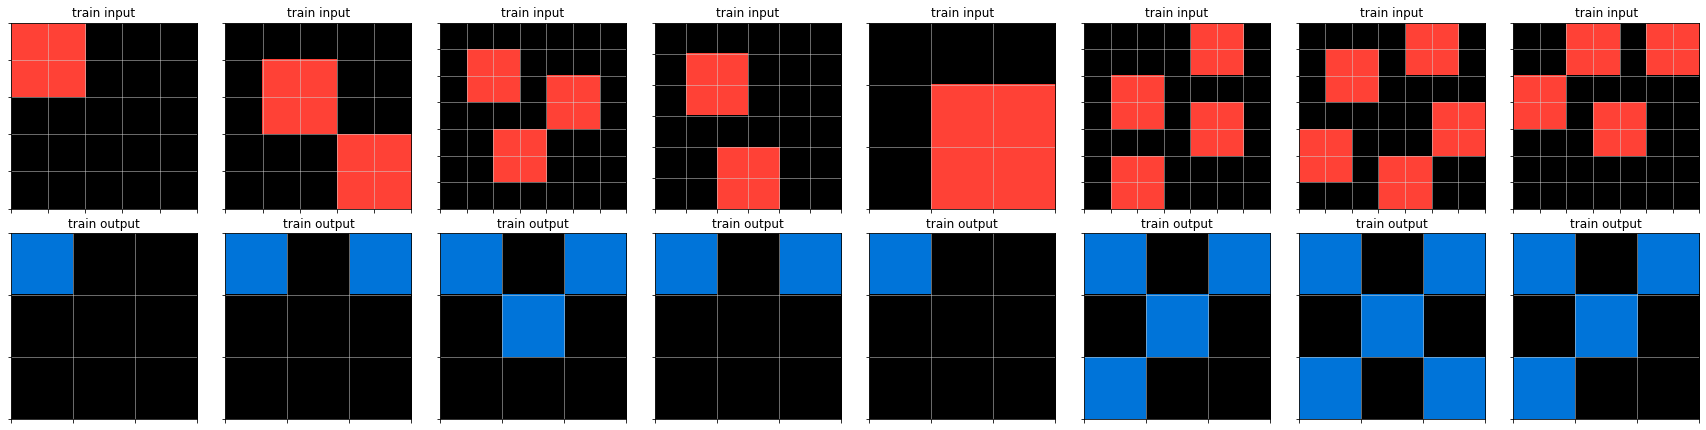

3 objects
[[2 2]
 [2 2]]
[[2 2]
 [2 2]]
[[2 2]
 [2 2]]
3 objects
[[1]]
[[1]]
[[1]]
4 objects
[[2 2]
 [2 2]]
[[2 2]
 [2 2]]
[[2 2]
 [2 2]]
[[2 2]
 [2 2]]
4 objects
[[1]]
[[1]]
[[1]]
[[1]]
5 objects
[[2 2]
 [2 2]]
[[2 2]
 [2 2]]
[[2 2]
 [2 2]]
[[2 2]
 [2 2]]
[[2 2]
 [2 2]]
5 objects
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]


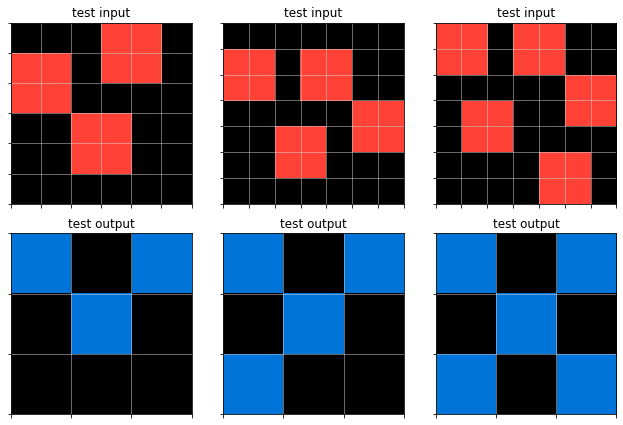

ff805c23.json
Icecuber solved? False
['pattern_expansion', 'pattern_completion', 'crop']
18 objects
[[0 3 3 3 3]
 [3 3 3 3 3]
 [3 3 3 0 0]
 [3 3 0 0 0]
 [3 3 0 0 0]]
[[0 0 0 0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 2 2 0 2 2 0 0 2 2 0 2 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 2 0 0 2 0 0 0 0 2 0 0 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 2 2 2 2 2 2 0 2 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0]
 [0 2 2 2 0 0 0 0 0 2 2 2 2 2 2 0 0 0 0 0 2 2 2 0]
 [2 2 0 2 2 0 0 0 0 0 2 2 2 2 0 0 0 0 0 2 2 0 2 2]
 [2 0 0 2 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 2 0 0 2]
 [2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2]
 [0 2 0 2 2 2 2 2 0 2 0 2 2 0 2 0 2 2 2 2 2 0 2 0]
 [0 0 0 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 0 0 0]
 [0 0 0 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 0 0 0]
 [0 2 0 2 2 2 2 2 0 2 0 2 2 0 2 0 2 2 2 2 2 0 2 0]
 [2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2]
 [2 0 0 2 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 2 0 0 2]
 [2 2 0 2 2 0 0 0 

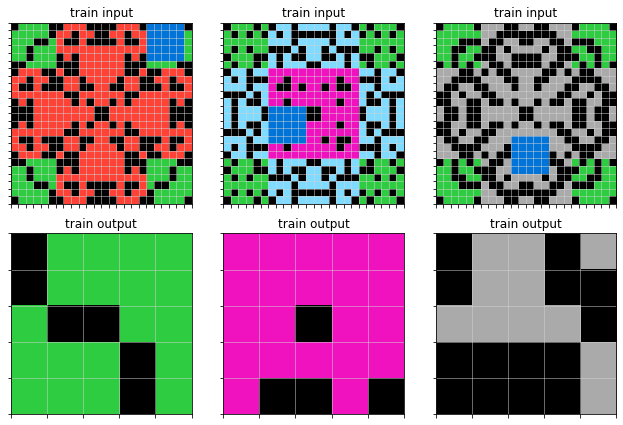

40 objects
[[4 4 4 0]
 [4 4 4 4]
 [4 4 0 4]
 [0 4 4 0]]
[[4]]
[[0 3 3 3]
 [3 3 3 3]
 [3 3 0 0]
 [3 3 0 0]]
[[3 3 3 0]
 [3 3 3 3]
 [0 0 3 3]
 [0 0 3 3]]
[[4]]
[[0 4 4 4]
 [4 4 4 4]
 [4 0 4 4]
 [0 4 4 0]]
[[4]]
[[0 0 0 0 3 3 0 0 0 0]
 [0 0 0 3 3 3 3 0 0 0]
 [0 0 0 3 3 3 3 0 0 0]
 [0 3 3 0 3 3 0 3 3 0]
 [3 3 3 3 3 3 3 3 3 3]]
[[4]]
[[0 4 4]
 [4 4 4]
 [4 4 0]]
[[4 4 0]
 [4 4 4]
 [0 4 4]]
[[4]]
[[4]]
[[4]]
[[4]]
[[0 3 3 3]
 [3 3 3 3]
 [3 3 0 0]
 [3 3 0 0]]
[[8 8 8 0 0 0 0 0 8 8 8 8]
 [8 8 8 0 0 0 0 0 0 8 8 8]
 [8 8 8 0 0 0 0 0 0 8 8 8]
 [8 0 0 0 0 0 0 0 0 0 0 8]
 [8 0 0 0 0 0 0 0 0 0 0 8]
 [8 8 0 0 0 0 0 0 0 0 8 8]
 [8 8 0 0 0 0 0 0 0 0 8 8]
 [8 0 0 0 0 0 0 0 0 0 0 8]
 [8 0 0 0 0 0 0 0 0 0 0 8]
 [8 8 8 0 0 0 0 0 0 8 8 8]
 [8 8 8 0 0 8 8 0 0 8 8 8]
 [8 8 8 8 8 8 8 8 8 8 8 8]]
[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]
[[3 3 3 0]
 [3 3 3 3]
 [0 0 3 3]
 [0 0 3 3]]
[[0 0 0 0 3]
 [0 0 0 3 3]
 [0 0 0 3 3]
 [0 3 3 0 3]
 [3 3 3 3 3]
 [3 3 3 3 3]
 [0 3 3 0 3]
 [0 0 0 3 3]
 [0 

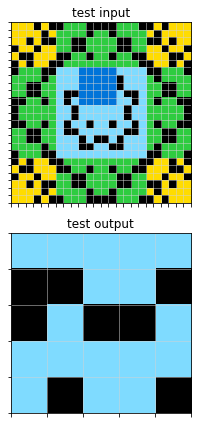

In [19]:
for task, task_name in zip(training_tasks, training_tasks_files):
    print(task_name)
    print(f"Icecuber solved? {icecuber_solved[task_name]}")
    print(skill_series[task_name])
    plot_task(task)

## Visualize all evaluation tasks, with tags + objects